### Estudiante: Samir Cabrera DS_ONLINE_25

# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

## <span style="color:#a64dff"> **Otras propiedades a considerar!**</span>

Buenos indicadores para valorizar la propiedad serían las dimensiones de la propiedad, su ubicación y crecimiento esperado del sector. Lo anterior debido a que si la propedad esta ubicada en un sector comodo de la ciudad y adicional si el sector promete una tasa de credimiento, por ejemplo con instalación de centros comerciales, etc, la propiedad se valorizará. Lo anterior sin quitar importancia a las dimensiones del inmueble, es bien sabido que entre más amplio, más comodo y por ende puedo pedir más por este. En general complementaría el dataset con los siguientes datos para mejorar las prediciones.

* Estratos socioeconomicos por barrios.
* Inflación del pais.
* Número de locaciones importantes en la zona (hospitales, escuelas, universidades, centros comerciales, estaciones de transporte Zonas verdes, etc.)
* Crecimiento proyectado de la Zona, quizas número de proyectos.

### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.


#### 2.1 Desafío
En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.

#### <span style="color:blue">0. Importa las librerías necesarias para trabajar en la consigna.</span>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



#### <span style="color:blue">1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.</span>

In [2]:
df = pd.read_csv('F:\DATA SCIENCE\PROYECTO_1\DS_Proyecto_01_Datos_Properati.csv')


#### <span style="color:blue">2. ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?</span>

In [3]:
#Dimensiones del Dataframe
df.shape

(146660, 19)

In [4]:
#Columnas del Dataframe
df.columns

Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')

In [5]:
#5 primeras instancias del DataFrame
df.head()

start_date    end_date  created_on        lat        lon         l1  \
0  2019-10-17  2019-12-23  2019-10-17 -34.605880 -58.384949  Argentina   
1  2019-10-17  2019-11-21  2019-10-17 -34.624056 -58.412110  Argentina   
2  2019-10-17  2019-11-01  2019-10-17 -34.593569 -58.427474  Argentina   
3  2019-10-17  2019-12-23  2019-10-17 -34.581294 -58.436754  Argentina   
4  2019-10-17  2020-03-11  2019-10-17 -34.914194 -57.938219  Argentina   

                       l2             l3  rooms  bedrooms  bathrooms  \
0         Capital Federal  San Cristobal    7.0       7.0        2.0   
1         Capital Federal          Boedo    2.0       1.0        2.0   
2         Capital Federal        Palermo    2.0       1.0        1.0   
3         Capital Federal        Palermo    2.0       1.0        1.0   
4  Bs.As. G.B.A. Zona Sur       La Plata    2.0       1.0        1.0   

   surface_total  surface_covered     price currency  \
0          140.0            140.0  153000.0      USD   
1           70.0             58.0  159000.0      USD   
2           45.0             45.0  125000.0      USD   
3           85.0             50.0  295000.0      USD   
4           50.0             35.0   40000.0      USD   

                                               title  \
0        ***Venta semipiso centro, ideal hostel*****   
1   Espectacular PH reciclado en Boedo sin expensas.   
2  Depto.tipo casa de 2 ambientes en Venta en Pal...   
3  COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...   
4  58 entre 1 y 2  Venta de departamento en ph.1 ...   

                                         description property_type  \
0  DESCRIPCION DE LA PROPIEDAD: Departamento de 1...  Departamento   
1   PH reciclado en Boedo a una cuadra de la plaz...            PH   
2  2 ambienets amplio , excelente estado , patio ...            PH   
3  HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...            PH   
4  58 entre 1 y 2  Venta de departamento en PH. P...            PH   

  operation_type  
0          Venta  
1          Venta  
2          Venta  
3          Venta  
4          Venta

In [6]:
#Valores promedios por tipo de propiedad
df.groupby('property_type').mean()

lat        lon     rooms  bedrooms  bathrooms  \
property_type                                                          
Casa            -34.639914 -58.525606  4.499652  2.925654   2.137237   
Casa de campo   -34.669577 -58.691893  4.186335  2.760870   2.016611   
Cochera         -34.666807 -58.429020  1.011583  0.023166   1.222222   
Departamento    -34.593853 -58.453715  2.756471  1.757813   1.508841   
Depósito        -34.680052 -58.491154  1.226415  0.090566   1.750000   
Local comercial -34.699634 -58.431119  1.566154  0.418462   1.584416   
Lote            -34.695733 -58.491055  2.323933  1.320122   1.811321   
Oficina         -34.611553 -58.429681  2.369301  1.404255   1.500000   
Otro            -34.693353 -58.518309  3.842246  2.497326   2.191057   
PH              -34.617397 -58.454909  3.533291  2.419569   1.485057   

                 surface_total  surface_covered          price  
property_type                                                   
Casa                660.102807       249.149856  275932.848427  
Casa de campo      4018.581395       315.228682  212242.826087  
Cochera              13.500000        13.500000   24255.984556  
Departamento         99.191757        85.276315  236746.743110  
Depósito            624.375000       347.428571  885932.075472  
Local comercial     258.583333       156.909091  449184.064615  
Lote               2481.002837       215.393939  386830.370427  
Oficina              81.956853        78.763926  183674.572948  
Otro               8249.772727       202.549550  671686.697861  
PH                  172.982074       130.319805  188493.522800

In [7]:
#Agrego una columna hash del title para poder recuperar valores iniciales más adelante desde el dataframe principal df
df['unique_id'] = df.title.map(hash)

In [8]:
#Formatear fechas
df['start_date']= pd.to_datetime(df['start_date'],errors = 'coerce')
df['end_date']= pd.to_datetime(df['end_date'],errors = 'coerce')
df['created_on']= pd.to_datetime(df['created_on'],errors = 'coerce')

In [9]:
#Información general del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   start_date       146660 non-null  datetime64[ns]
 1   end_date         121559 non-null  datetime64[ns]
 2   created_on       146660 non-null  datetime64[ns]
 3   lat              136735 non-null  float64       
 4   lon              136701 non-null  float64       
 5   l1               146660 non-null  object        
 6   l2               146660 non-null  object        
 7   l3               146660 non-null  object        
 8   rooms            146660 non-null  float64       
 9   bedrooms         146660 non-null  float64       
 10  bathrooms        140703 non-null  float64       
 11  surface_total    126133 non-null  float64       
 12  surface_covered  125046 non-null  float64       
 13  price            146660 non-null  float64       
 14  currency         146

In [10]:
#Estadistica de las columnas
df.describe()

lat            lon          rooms       bedrooms  \
count  136735.000000  136701.000000  146660.000000  146660.000000   
mean      -34.604896     -58.465304       3.079817       1.983240   
std         0.468428       0.486190       1.416352       1.151304   
min       -35.318457    -180.000000       1.000000       0.000000   
25%       -34.627667     -58.504012       2.000000       1.000000   
50%       -34.600943     -58.443262       3.000000       2.000000   
75%       -34.574600     -58.407586       4.000000       3.000000   
max        85.051129     -57.805832      35.000000      15.000000   

           bathrooms  surface_total  surface_covered         price  \
count  140703.000000  126133.000000    125046.000000  1.466600e+05   
mean        1.599994     216.872888       112.818011  2.412211e+05   
std         0.889324    2037.606649       916.857584  3.185195e+05   
min         1.000000      10.000000         1.000000  5.500000e+03   
25%         1.000000      52.000000        47.000000  1.110000e+05   
50%         1.000000      78.000000        68.000000  1.660000e+05   
75%         2.000000     140.000000       108.000000  2.650000e+05   
max        14.000000  193549.000000    126062.000000  3.243423e+07   

          unique_id  
count  1.466600e+05  
mean  -1.220495e+17  
std    5.219317e+18  
min   -9.222839e+18  
25%   -4.597705e+18  
50%   -4.044904e+17  
75%    4.251564e+18  
max    9.223358e+18

#### <span style="color:blue">¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.</span>

F:\Anaconda3\envs\datascience\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  from ipykernel import kernelapp as app


Text(0.5, 1.0, 'Histograma Precio por Tipo Propiedad (miles) ')

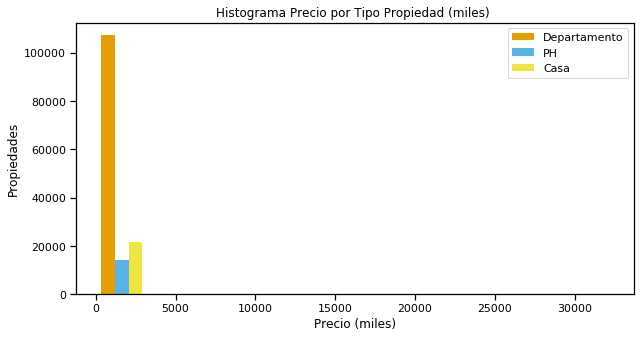

In [11]:
plt.figure(figsize=(10,5))
sns.set_context("notebook", font_scale=1)
# Make a separate list for each property_type
x1 = list(((df[df['property_type'] == 'Departamento']['price'])/1000))
x2 = list(((df[df['property_type'] == 'PH']['price'])/1000))
x3 = list(((df[df['property_type'] == 'Casa']['price'])/1000))


# Assign colors for each property_type and the names
colors = ['#E69F00', '#56B4E9', '#F0E442']
names = ['Departamento', 'PH', 'Casa']
         
# Make the histogram using a list of lists
plt.hist([x1, x2, x3], bins = 10, normed=False,
         color = colors, label=names)

# Plot formatting
plt.legend()
plt.xlabel('Precio (miles)')
plt.ylabel('Propiedades')
plt.title("Histograma Precio por Tipo Propiedad (miles) ")

Mostramos como esta distribuido el precio de acuerdo al tipo de propiedad, se observa que las propiedades que tienen mayor
valor son los Pen House, seguido de las casas y por último los departamentos, aunque estos ultimos representan una cantidad altisima de propiedades.

F:\Anaconda3\envs\datascience\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  from ipykernel import kernelapp as app


Text(0.5, 1.0, 'Histograma rooms por Tipo Propiedad')

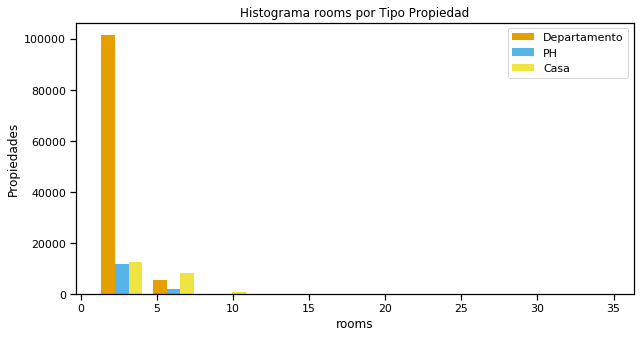

In [12]:
# Make a separate list for each property_type
plt.figure(figsize=(10,5))
sns.set_context("notebook", font_scale=1)
x1 = list(((df[df['property_type'] == 'Departamento']['rooms'])))
x2 = list(((df[df['property_type'] == 'PH']['rooms'])))
x3 = list(((df[df['property_type'] == 'Casa']['rooms'])))


# Assign colors for each property_type and the names
colors = ['#E69F00', '#56B4E9', '#F0E442']
names = ['Departamento', 'PH', 'Casa']
         
# Make the histogram using a list of lists
plt.hist([x1, x2, x3], bins = 10, normed=False,
         color = colors, label=names)

# Plot formatting
plt.legend()
plt.xlabel('rooms')
plt.ylabel('Propiedades')
plt.title("Histograma rooms por Tipo Propiedad")

Se explora la cantidad de habitaciones por tipo de propiedad, se observa que los departamentos en su gran mayoría tienen entre
2 y 3 habitaciones y las casas con un poco más. Sin embargo se observan algunas casas con más de 10 habitaciones lo cual es
un poco extraño, y parece haber algunos outliers en la columna rooms.

F:\Anaconda3\envs\datascience\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  from ipykernel import kernelapp as app


Text(0.5, 1.0, 'Histograma surface_total por Tipo Propiedad ')

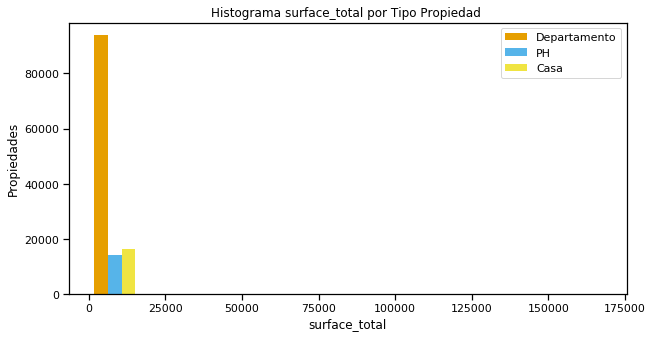

In [13]:
# Make a separate list for each property_type
plt.figure(figsize=(10,5))
sns.set_context("notebook", font_scale=1)
x1 = list(((df[df['property_type'] == 'Departamento']['surface_total'])))
x2 = list(((df[df['property_type'] == 'PH']['surface_total'])))
x3 = list(((df[df['property_type'] == 'Casa']['surface_total'])))


# Assign colors for each property_type and the names
colors = ['#E69F00', '#56B4E9', '#F0E442']
names = ['Departamento', 'PH', 'Casa']
         
# Make the histogram using a list of lists
plt.hist([x1, x2, x3], bins = 10, normed=False,
         color = colors, label=names)

# Plot formatting
plt.legend()
plt.xlabel('surface_total')
plt.ylabel('Propiedades')
plt.title("Histograma surface_total por Tipo Propiedad ")

Visualizamos como están distribuidos los valores de superficie total por tipo de propiedad. Se observa que los valores son
algo esperados, en cuanto a que los departamentos son de área más pequeña en comparación con los PH y sobre todo que las casas.

Text(0, 0.5, 'Monedas')

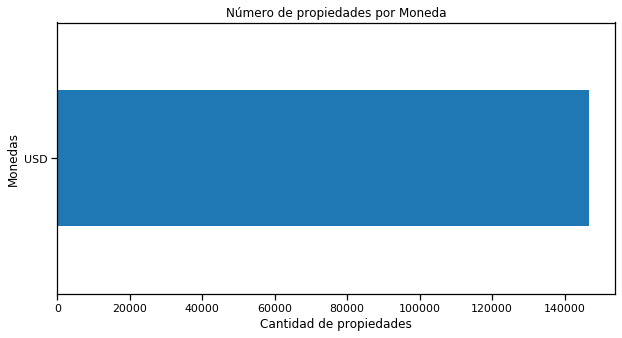

In [14]:
plt.figure(figsize=(10,5))
sns.set_context("notebook", font_scale=1)
CountStatus = pd.value_counts(df['currency'].values, sort=True)
CountStatus.plot.barh()
plt.title("Número de propiedades por Moneda")
plt.xlabel('Cantidad de propiedades')
plt.ylabel('Monedas')


Importante analizar la moneda, lo anterior debido a que si se manejaran varias divisas tubiesemos que cambiar las cuantias
con su tipo de cambio a USD para un mejor analisis. Pero se observa que todas las propiedades tienen su valor en USD.

Text(0, 0.5, 'Tipo')

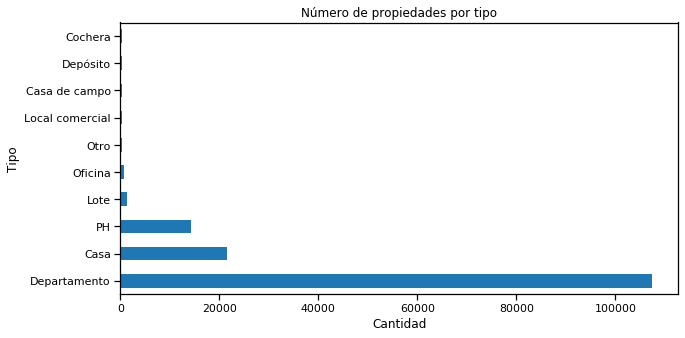

In [15]:
plt.figure(figsize=(10,5))
sns.set_context("notebook", font_scale=1)
CountStatus = pd.value_counts(df['property_type'].values, sort=True)
CountStatus.plot.barh()
plt.title("Número de propiedades por tipo")
plt.xlabel('Cantidad')
plt.ylabel('Tipo')

Revisamos como están distribuidas las propiedades por su tipo, se observa que su gran mayoría son departamentos, seguido por Casa y luego PH, de igual forma se observa que los tipos restantes tienen muy pocas propiedades publicadas.

Text(0, 0.5, 'Tipo de transacción')

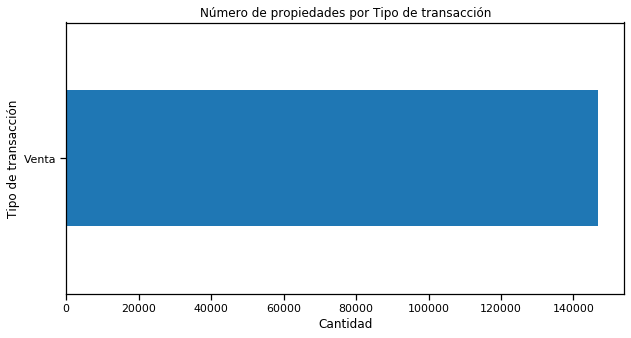

In [16]:
plt.figure(figsize=(10,5))
sns.set_context("notebook", font_scale=1)
CountStatus = pd.value_counts(df['operation_type'].values, sort=True)
CountStatus.plot.barh()
plt.title("Número de propiedades por Tipo de transacción")
plt.xlabel('Cantidad')
plt.ylabel('Tipo de transacción')

Se observa que todas las propiedades están a la venta, que no hay propiedades en renta, lo que nos facilita un poco el trabajo.

### <span style="color:blue">¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?</span>

In [17]:
df_numerico_col = (df.dtypes == float) | (df.dtypes == int ) | (df.dtypes == np.int64 ) 
df_numerico_col.index
df_numerico_col = [c for c in df_numerico_col.index if df_numerico_col[c]]
df_numerico_col

['lat',
 'lon',
 'rooms',
 'bedrooms',
 'bathrooms',
 'surface_total',
 'surface_covered',
 'price',
 'unique_id']

In [18]:

df_categorico_col = (df.dtypes == object)
df_categorico_col = [c for c in df_categorico_col.index if df_categorico_col[c]]
df_categorico_col

['l1',
 'l2',
 'l3',
 'currency',
 'title',
 'description',
 'property_type',
 'operation_type']

2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [19]:
# Tasa de valores faltantes por columnas del DataFrame
df.isna().sum(axis=0)/len(df)


start_date         0.000000
end_date           0.171151
created_on         0.000000
lat                0.067674
lon                0.067905
l1                 0.000000
l2                 0.000000
l3                 0.000000
rooms              0.000000
bedrooms           0.000000
bathrooms          0.040618
surface_total      0.139963
surface_covered    0.147375
price              0.000000
currency           0.000000
title              0.000000
description        0.000000
property_type      0.000000
operation_type     0.000000
unique_id          0.000000
dtype: float64

3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

In [20]:
#Agrupación por tipo de propiedad
df_group = df.groupby('property_type', as_index = False)[['title']].count()
df_group
df_group.columns

Index(['property_type', 'title'], dtype='object')

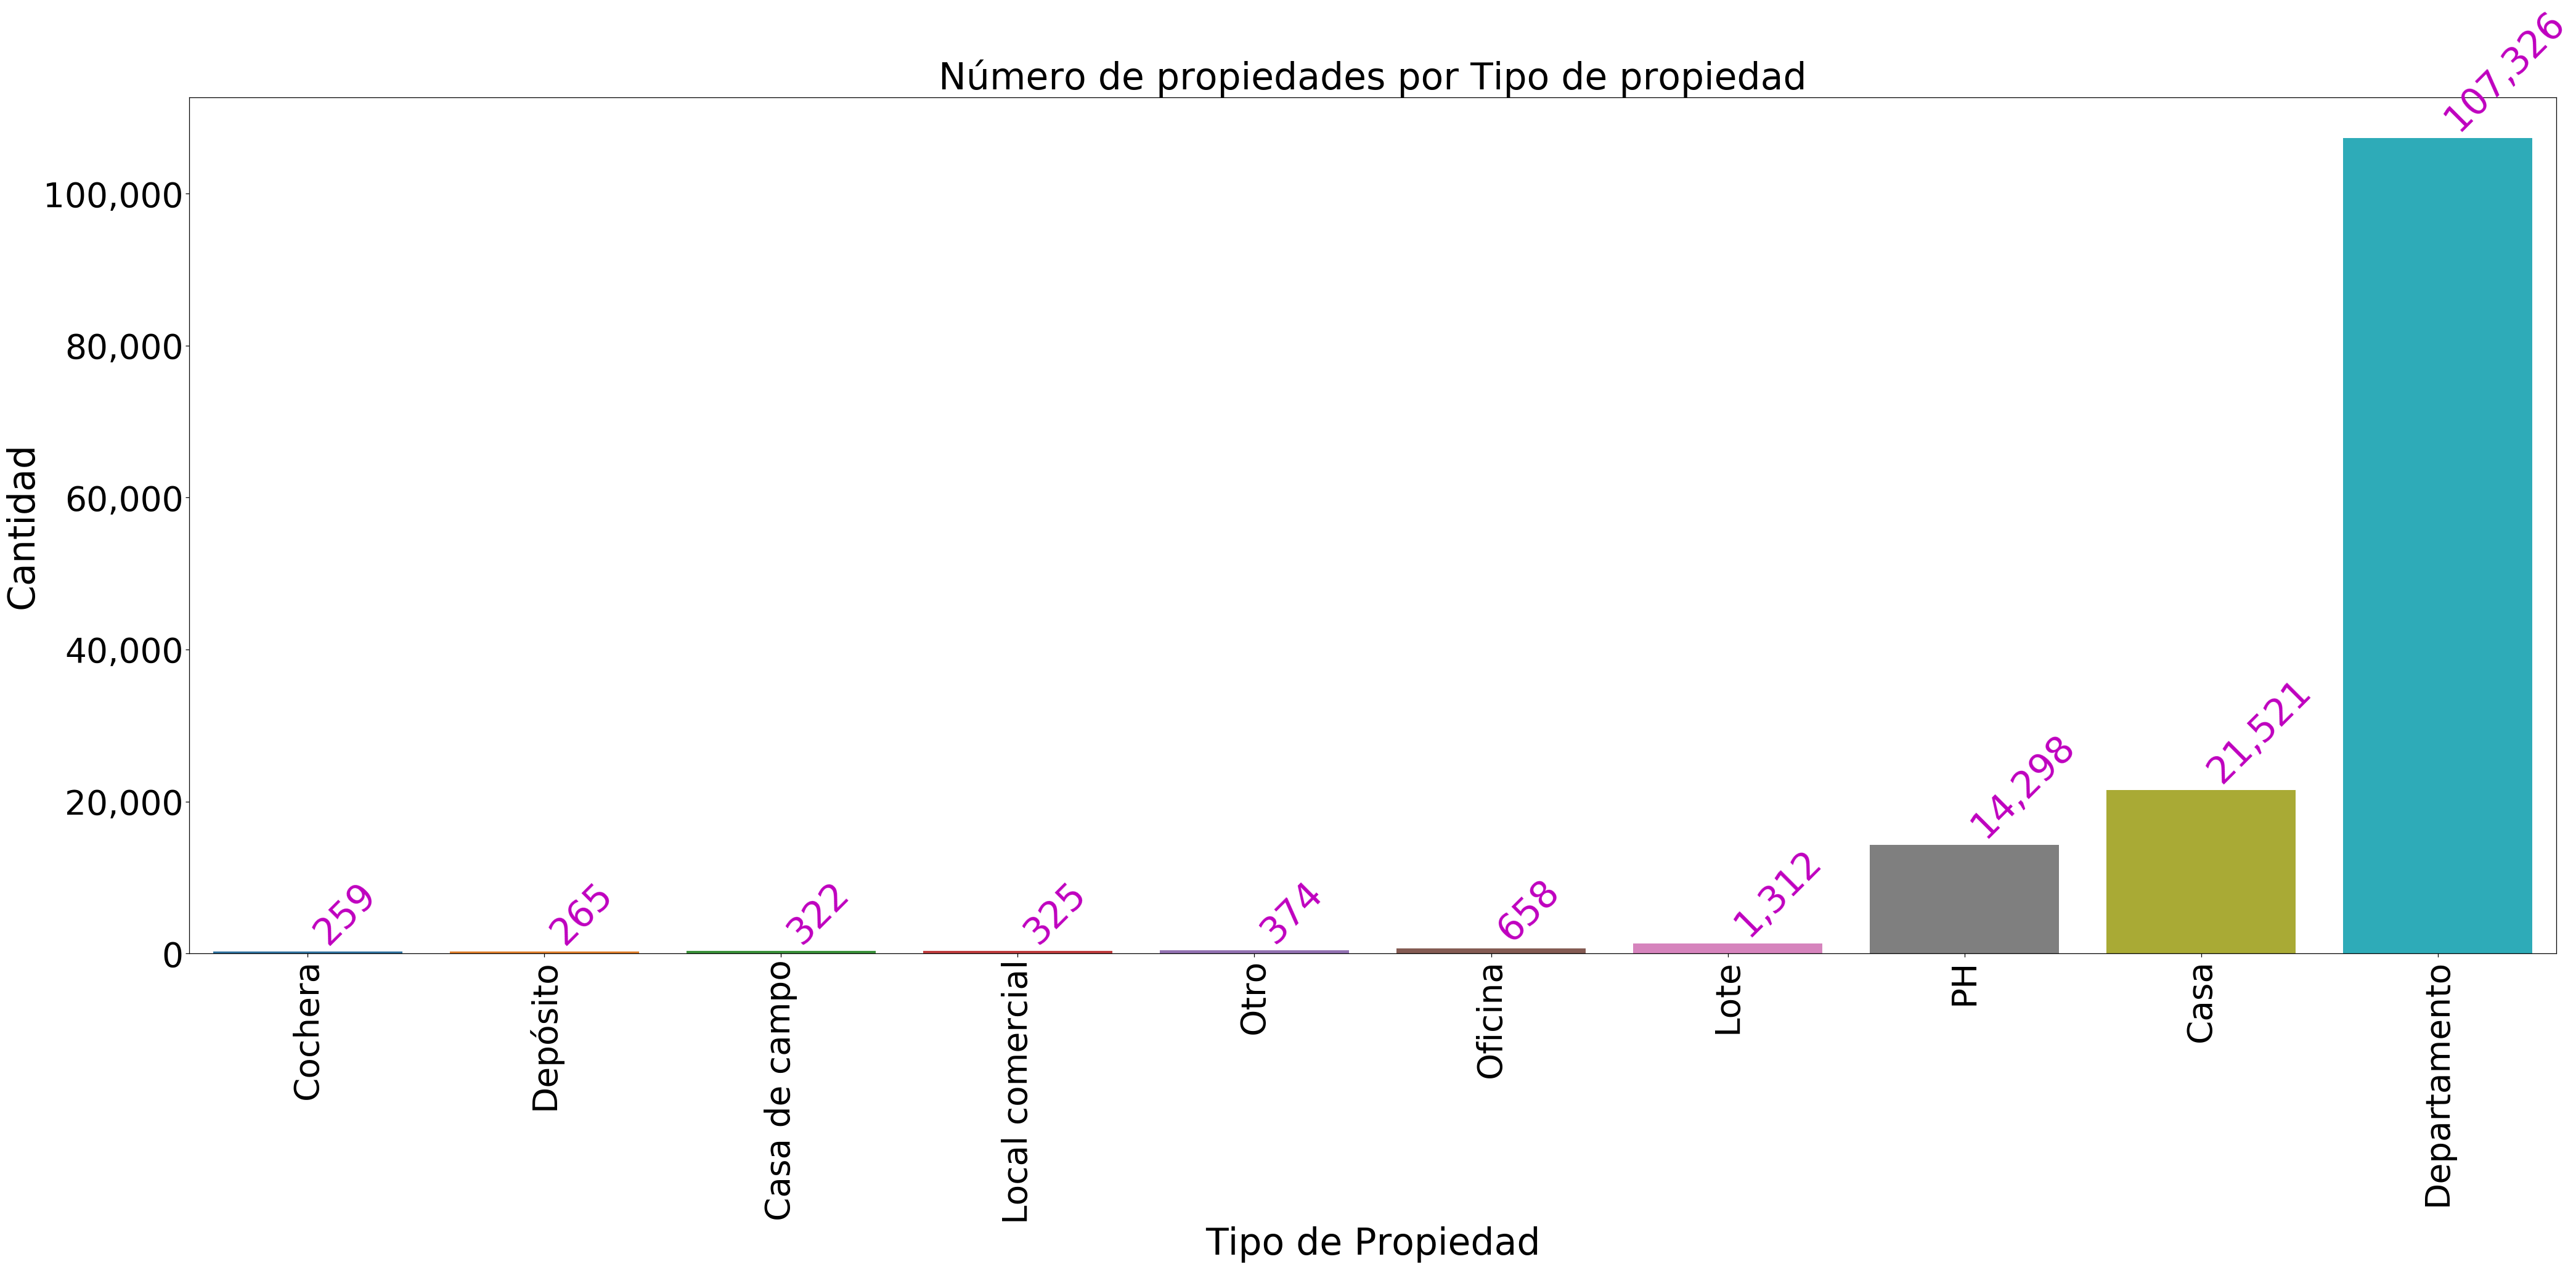

In [21]:
# sort df by Count column
pd_df = df_group.sort_values(['title']).reset_index(drop=True)
sns.set_context("notebook", font_scale=5)

plt.figure(figsize=(60,30))
# plot barh chart with index as x values
ax = sns.barplot(pd_df.index, pd_df.title)
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.set(xlabel="Tipo de Propiedad", ylabel='Cantidad')

ax.set_xticklabels(pd_df.property_type)
for item in ax.get_xticklabels(): item.set_rotation(90)
for i, v in enumerate(pd_df["title"].iteritems()):        
    ax.text(i ,v[1], "{:,}".format(v[1]), color='m', va ='bottom', rotation=45)
plt.tight_layout()
plt.title("Número de propiedades por Tipo de propiedad")
plt.show()

Hacemos una revisión un poco más a detalle del número de propiedades por tipo, claramente se observa que los departamentos
representan un gran porcentaje de estos.

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

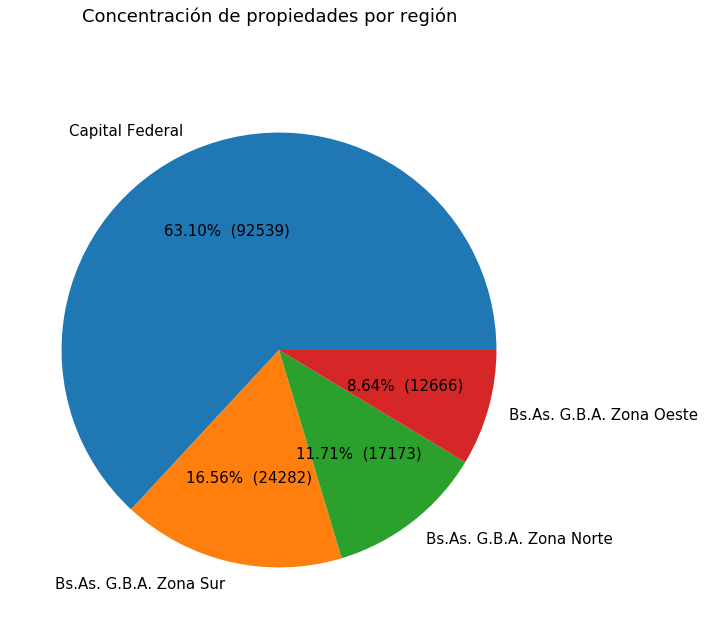

In [22]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct


fig = plt.figure(figsize = (10,10))
sns.set_context("notebook", font_scale=2)
fig.suptitle('Concentración de propiedades por región', fontsize=18)

text_dict = {'fontsize' : 15, 'color' : 'black'}
plt.pie(df['l2'].value_counts(), labels = df['l2'].unique(), autopct=make_autopct(df['l2'].value_counts()), textprops = text_dict)

plt.show()


Analicemos como están distribuidas las propiedades por las diferentes Zonas, se observa que en gran proporción la Capital
Federal tiene una gran proporcion de estas.

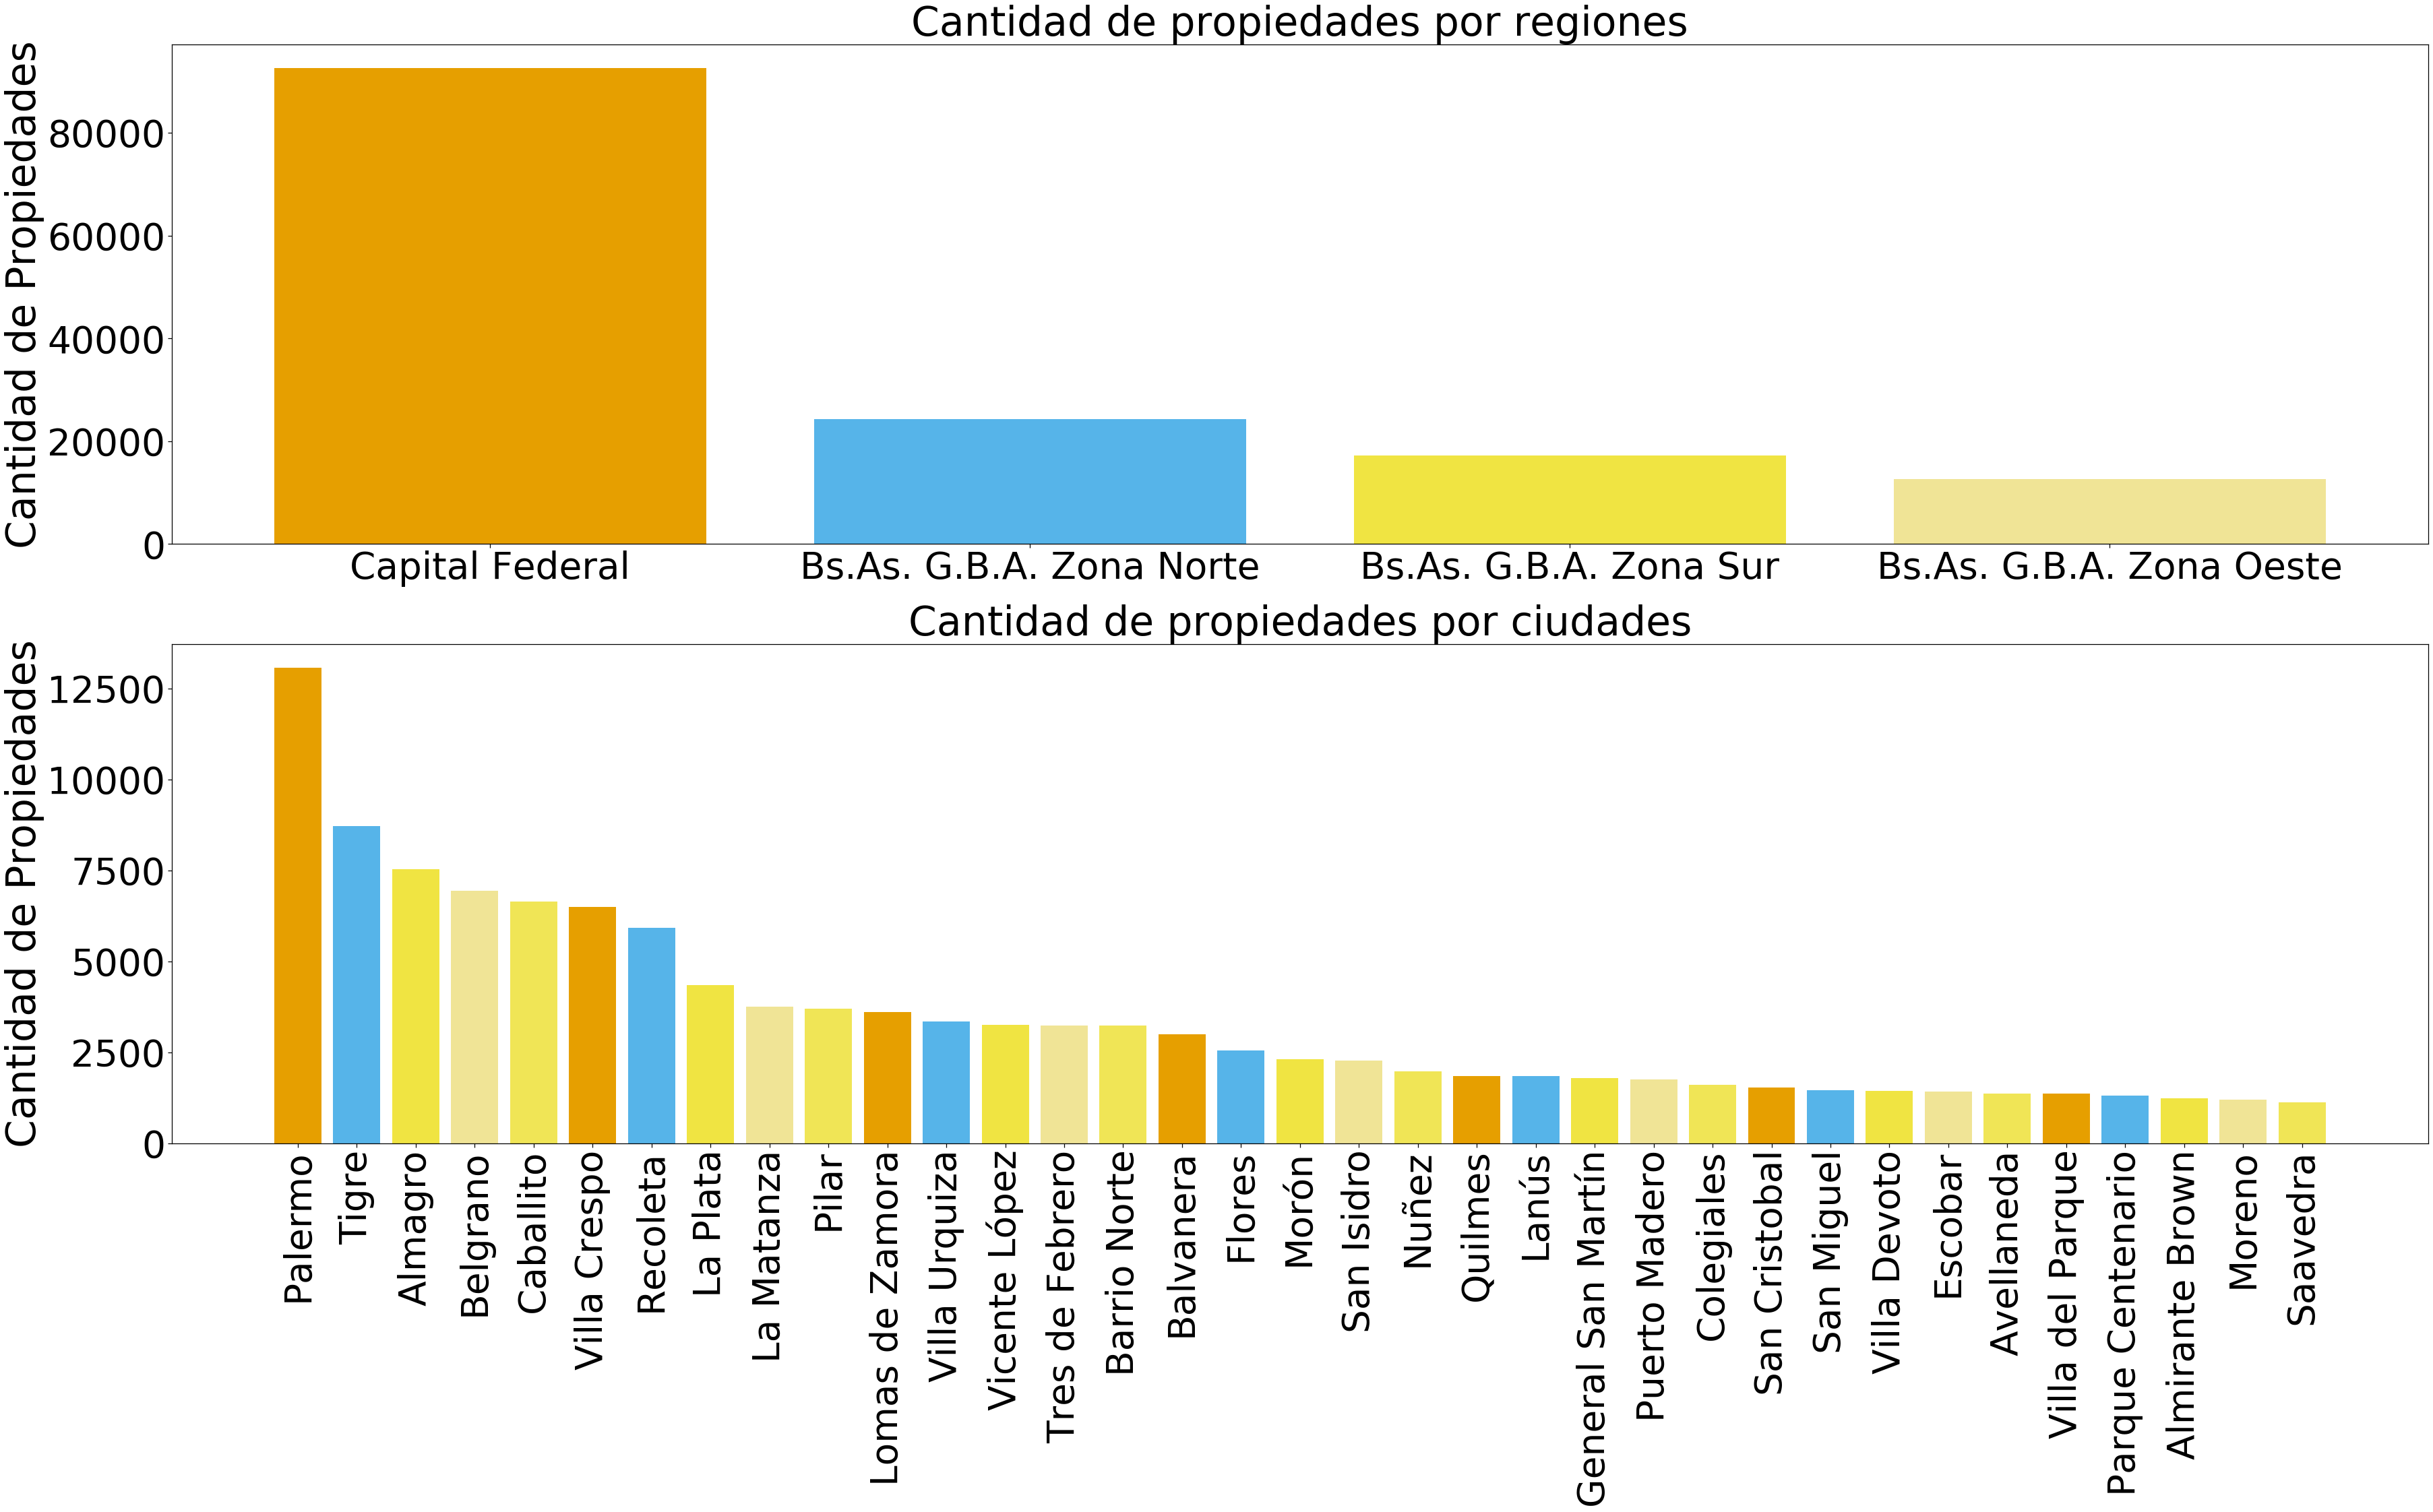

In [23]:
colors = ['#E69F00', '#56B4E9', '#F0E442', '#F0E496', '#F0E556']
names = ['Capital Federal', 'Bs.As. G.B.A. Zona Sur', 'Bs.As. G.B.A. Zona Norte', 'Bs.As. G.B.A. Zona Oeste']

sns.set_context("notebook", font_scale=5)
plt.figure(figsize=(60,30))
df_group_regions = df.groupby('l2', as_index = False)[['title']].count()
df_group_regions = df_group_regions.sort_values(['title'],ascending=False).reset_index(drop=True)
plt.subplot(2,1,1)
#This will create the bar graph for poulation
pop = plt.bar(df_group_regions['l2'], df_group_regions['title'], color=colors, label=names)
plt.ylabel('Cantidad de Propiedades')
plt.title("Cantidad de propiedades por regiones") 
#plt.xticks(x, df_group_regions['l2'], rotation='vertical')
#The below code will create the second plot.
df_group_ciudad = df.groupby('l3', as_index = False)[['title']].count()
df_group_ciudad = df_group_ciudad.sort_values(['title'],ascending=False).reset_index(drop=True)
df_group_ciudad=df_group_ciudad.head(35)
plt.subplot(2,1,2)
#This will create the bar graph for gdp i.e gdppercapita divided by population.
gdp =plt.bar(df_group_ciudad['l3'],df_group_ciudad['title'], color=colors, label=names)
plt.title("Cantidad de propiedades por ciudades") 
plt.ylabel('Cantidad de Propiedades')
plt.xticks(rotation = 90)

plt.show()

Veamos ahora como están distribuidas las propiedades en las ciudades de cada Zona, se observa que Palermo de Capital
Federal lidera en cantidad de propiedades.

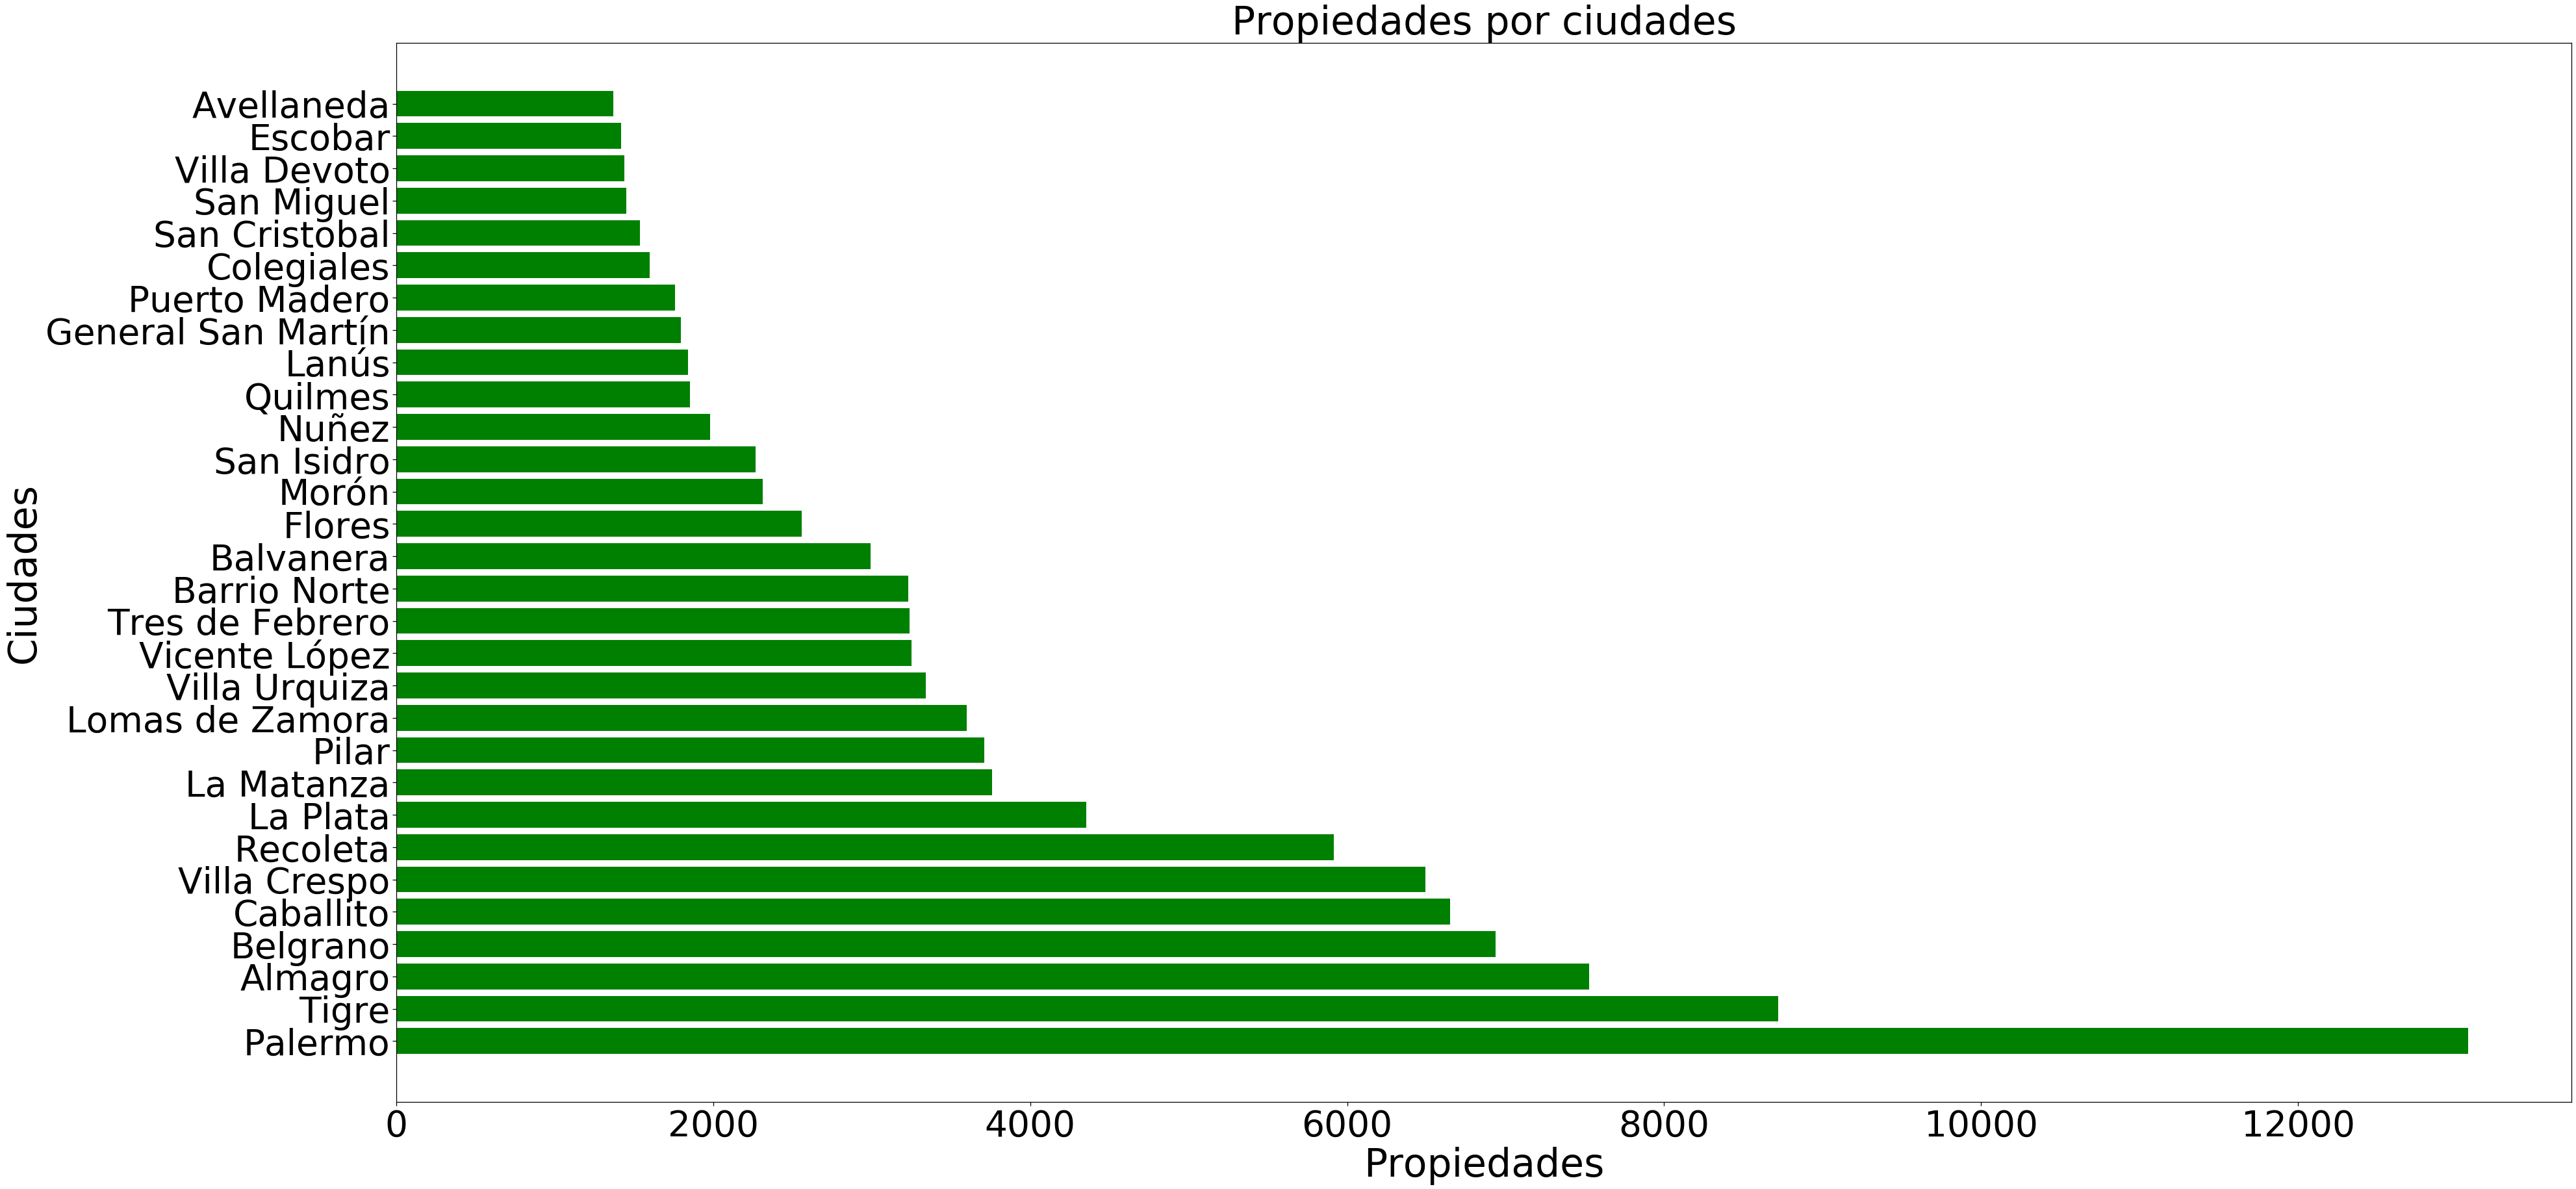

In [24]:
sns.set_context("notebook", font_scale=5)
plt.figure(figsize=(60,30))
df_group_ciudad = df.groupby('l3', as_index = False)[['title']].count()
df_group_ciudad = df_group_ciudad.sort_values(['title'],ascending=False).reset_index(drop=True)
df_group_ciudad=df_group_ciudad.head(30)
x = df_group_ciudad['l3']
ciudades = df_group_ciudad['title']
x_pos = [i for i, _ in enumerate(x)]

plt.barh(x_pos, ciudades, color='green')
plt.ylabel("Ciudades")
plt.xlabel("Propiedades")
plt.title("Propiedades por ciudades")

plt.yticks(x_pos, x)

plt.show()

Veamos nuevamente la proporcion de propiedades distribuidas en las ciudades, observando no solo las que lideran 
la lista con un gran número de propiedades sino aquellas que tienen muy pocas propiedades publicadas.

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

In [25]:
df_group_types = df.groupby('property_type', as_index = False)[['title']].count()
df_group_types = df_group_types.sort_values(['title'],ascending=False).reset_index(drop=True)

df_tops_rank=  df[df.property_type.isin(df_group_types['property_type'].head(3)) & df.l2.isin(df_group_regions['l2'].head(1))]
df_tops_rank.shape
#Adicional esta la columna que he creado para poder hacer merge en cualquier momento de los sub df con datos del df principal

(91485, 20)

**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

### <span style="color:blue">Observo estadisticas y valores atipicos</span>

In [26]:
df_pares = df_tops_rank[['rooms','bedrooms','bathrooms','surface_total','surface_covered','price','unique_id','property_type']]
#Estadistica de las columnas
df_pares.describe()

rooms      bedrooms     bathrooms  surface_total  \
count  91485.000000  91485.000000  89314.000000   82568.000000   
mean       2.964278      1.960278      1.560147     112.626369   
std        1.314704      1.072946      0.860309     980.713664   
min        1.000000      0.000000      1.000000      10.000000   
25%        2.000000      1.000000      1.000000      49.000000   
50%        3.000000      2.000000      1.000000      71.000000   
75%        4.000000      3.000000      2.000000     111.000000   
max       26.000000     15.000000     14.000000  126062.000000   

       surface_covered         price     unique_id  
count     82250.000000  9.148500e+04  9.148500e+04  
mean         94.966310  2.595003e+05 -2.048644e+17  
std         778.515243  3.222654e+05  5.234789e+18  
min           1.000000  6.000000e+03 -9.222819e+18  
25%          44.000000  1.200000e+05 -4.765234e+18  
50%          63.000000  1.750000e+05 -7.338873e+17  
75%          96.000000  2.790000e+05  4.173254e+18  
max      126062.000000  3.243423e+07  9.223358e+18

### <span style="color:blue">Boxplot para observar como están distribuidos mis datos respecto a la media, y sus outliers</span>

Text(0.5, 1.0, 'Outliers en superficie total por tipo de propiedad')

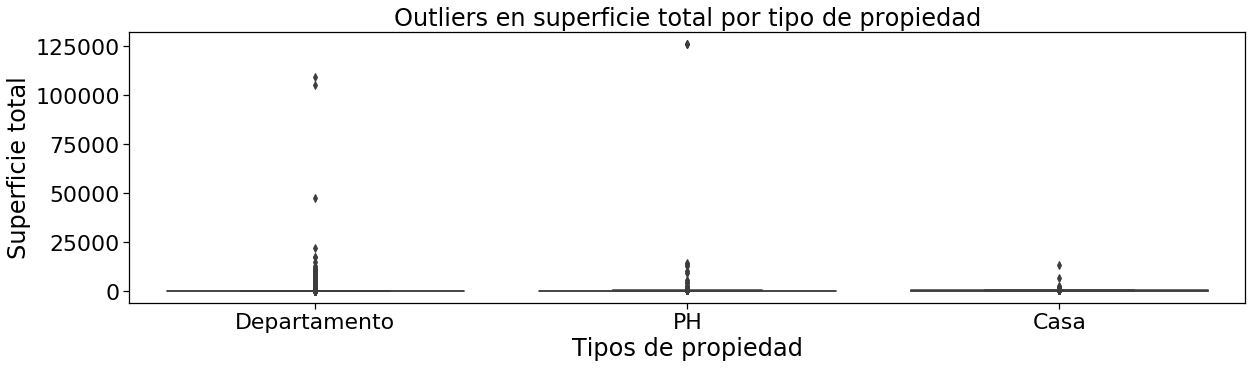

In [27]:
sns.set_context("notebook", font_scale=2)
plt.figure(figsize=(20,5))
sns.boxplot(data = df_pares, y = "surface_total", x="property_type")
plt.ylabel("Superficie total")
plt.xlabel("Tipos de propiedad")
plt.title("Outliers en superficie total por tipo de propiedad")

Cuando hacemos analisis de Outliers hay que saber que estos pueden ser errores en la data o también pueden ser valores nulos
que nos los toma como valores extremos minimos, por esa razón vamos a revisar los valores nulos.

In [28]:
# Tasa de valores faltantes por columnas del DataFrame
df_pares.isna().sum(axis=0) /len(df_tops_rank)

rooms              0.000000
bedrooms           0.000000
bathrooms          0.023731
surface_total      0.097470
surface_covered    0.100946
price              0.000000
unique_id          0.000000
property_type      0.000000
dtype: float64

Observamos que nuestra data tiene una cantidad importante de valores nulos para superficie total y superficie cubierta. En
esta ocasion dada la cantidad de datos que tenemos podemos precindir de estas instancias.

In [29]:
df_pares = df_pares.dropna(axis=0,how='any')

Text(0.5, 1.0, 'Outliers en superficie total por tipo de propiedad')

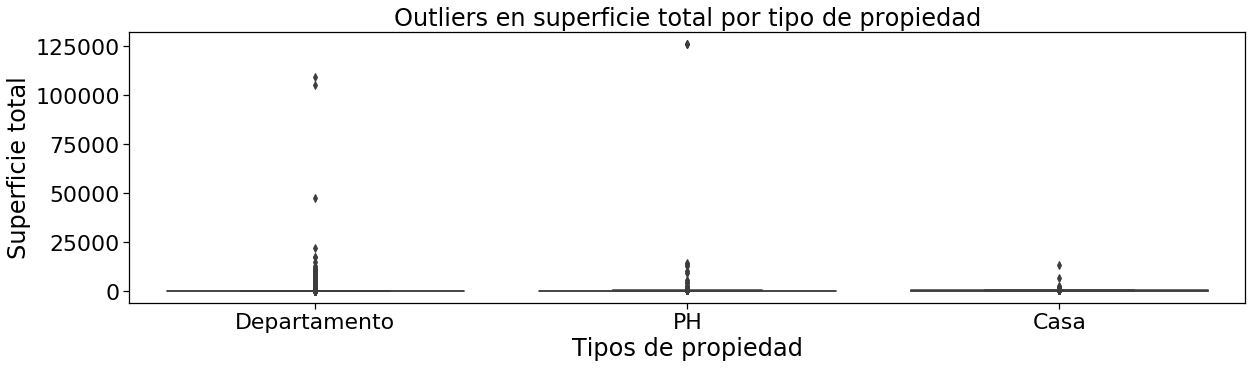

In [30]:
sns.set_context("notebook", font_scale=2)
plt.figure(figsize=(20,5))
sns.boxplot(data = df_pares, y = "surface_total", x="property_type")
plt.ylabel("Superficie total")
plt.xlabel("Tipos de propiedad")
plt.title("Outliers en superficie total por tipo de propiedad")

Revisamos los valores atipicos y observamos que para Departamentos y para Pen House hay valores muy alejados de la media
y que podrian afectar nuestros analisis estadisticos. Debemos hacer algo con estos valores!!!, hagamos una limpieza de
outliers.

In [31]:
#Get relevant percentiles and see their distribution
df_pares['surface_total'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

0.0        10.0
0.1        39.0
0.2        45.0
0.3        53.0
0.4        61.0
0.5        71.0
0.6        83.0
0.7       100.0
0.8       128.0
0.9       180.0
1.0    126062.0
Name: surface_total, dtype: float64

In [32]:
#Funcion para detectar los outliers usando Zscore

def detect_outliersZScore(data,columnName):
    outliers=[]    
    threshold=3
    mean = np.mean(data[columnName])
    std = np.std(data[columnName])
    

    
    for i in data.itertuples():
        z_score = (i[1] - mean)/ std
        if np.abs(z_score) > threshold:
            outliers.append(i[2])
    return outliers





In [33]:
#Funcion para detectar los outliers usando IQR
def detect_outliersIQR(data,columnName):
    
    outliers=[]    

    for n in ["Departamento", "Casa", "PH"]:    
        Q1 = np.percentile(data[data["property_type"]==n][columnName], 25, interpolation = 'midpoint') 
        #Q3 = np.percentile(data[columnName], 75, interpolation = 'midpoint')     
        Q3 = np.percentile(data[data["property_type"]==n][columnName], 75, interpolation = 'midpoint')         
        IQR = Q3 - Q1
        low_lim = Q1 - 1.5 * IQR 
        up_lim = Q3 + 1.5 * IQR     
    

    
        for i in data[data["property_type"]==n].itertuples():
            if ((i[1] > up_lim) or (i[1] < low_lim)):
                outliers.append(i[2])
    return outliers

### <span style="color:blue">Filtrado de outliers</span>

In [34]:
df_pares_filtered= df_pares.copy()

df_outliers = detect_outliersIQR(df_pares_filtered[['rooms','unique_id','property_type']],'rooms')
df_pares_filtered = df_pares_filtered[~df_pares_filtered['unique_id'].isin(df_outliers)]

df_outliers = detect_outliersIQR(df_pares_filtered[['price','unique_id','property_type']],'price')
df_pares_filtered = df_pares_filtered[~df_pares_filtered['unique_id'].isin(df_outliers)]

df_outliers = detect_outliersIQR(df_pares_filtered[['bedrooms','unique_id','property_type']],'bedrooms')
df_pares_filtered = df_pares_filtered[~df_pares_filtered['unique_id'].isin(df_outliers)]

df_outliers = detect_outliersIQR(df_pares_filtered[['bathrooms','unique_id','property_type']],'bathrooms')
df_pares_filtered = df_pares_filtered[~df_pares_filtered['unique_id'].isin(df_outliers)]

df_outliers = detect_outliersIQR(df_pares_filtered[['surface_total','unique_id','property_type']],'surface_total')
df_pares_filtered = df_pares_filtered[~df_pares_filtered['unique_id'].isin(df_outliers)]

df_outliers = detect_outliersIQR(df_pares_filtered[['surface_covered','unique_id','property_type']],'surface_covered')
df_pares_filtered = df_pares_filtered[~df_pares_filtered['unique_id'].isin(df_outliers)]




In [35]:
#Se eliminan inconsistencias de propiedades con superficie cubierta mayor a superficie total
df_pares_filtered = df_pares_filtered[(df_pares_filtered['surface_covered'] <= df_pares_filtered['surface_total'])]

In [36]:
df_pares_filtered.describe()

rooms      bedrooms     bathrooms  surface_total  \
count  55500.000000  55500.000000  55500.000000   55500.000000   
mean       2.584342      1.655153      1.283369      70.337622   
std        0.970345      0.777146      0.518048      42.946874   
min        1.000000      1.000000      1.000000      13.000000   
25%        2.000000      1.000000      1.000000      45.000000   
50%        2.000000      1.000000      1.000000      60.000000   
75%        3.000000      2.000000      2.000000      83.000000   
max        9.000000      5.000000      4.000000     530.000000   

       surface_covered          price     unique_id  
count     55500.000000   55500.000000  5.550000e+04  
mean         60.889982  175356.494252 -1.361036e+17  
std          31.714389   88898.556602  5.393120e+18  
min           1.000000    7500.000000 -9.222244e+18  
25%          41.000000  112000.000000 -4.859427e+18  
50%          53.000000  152000.000000 -3.380154e+17  
75%          73.000000  219764.000000  4.581610e+18  
max         371.000000  820000.000000  9.223358e+18

In [37]:
df_pares_filtered['price'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

0.0      7500.0
0.1     87000.0
0.2    105000.0
0.3    120000.0
0.4    135000.0
0.5    152000.0
0.6    170000.0
0.7    199500.0
0.8    239900.0
0.9    295000.0
1.0    820000.0
Name: price, dtype: float64

In [38]:
df_pares_filtered

rooms  bedrooms  bathrooms  surface_total  surface_covered     price  \
1         2.0       1.0        2.0           70.0             58.0  159000.0   
2         2.0       1.0        1.0           45.0             45.0  125000.0   
3         2.0       1.0        1.0           85.0             50.0  295000.0   
5         2.0       1.0        1.0           56.0             56.0  150000.0   
6         2.0       1.0        1.0           70.0             70.0  159500.0   
...       ...       ...        ...            ...              ...       ...   
146545    3.0       2.0        2.0           88.0             82.0  399000.0   
146546    3.0       2.0        2.0           89.0             82.0  434999.0   
146548    3.0       2.0        2.0           82.0             82.0  475000.0   
146549    3.0       2.0        1.0           84.0             84.0  178000.0   
146550    5.0       2.0        2.0          114.0             95.0  298000.0   

                  unique_id property_type  
1      -6010755885448858639            PH  
2      -5005755319119506845            PH  
3       2704561948429987117            PH  
5      -3011442233951817659            PH  
6      -3011442233951817659            PH  
...                     ...           ...  
146545  8341642787077982747  Departamento  
146546  9049371416299082361  Departamento  
146548  -207062137557966001  Departamento  
146549 -1967982099508055895            PH  
146550  5116196442878560876            PH  

[55500 rows x 8 columns]

### <span style="color:blue">Recupero data inicial categorica de mi dataframe</span>


In [39]:
df_pares_filtered.set_index('unique_id')
df.set_index('unique_id')
df_rebuild =df_pares_filtered.merge(df, left_index=True, right_index=True, how='left')
df_rebuild_clone= df_rebuild.copy()
print(df_rebuild.head())

   rooms_x  bedrooms_x  bathrooms_x  surface_total_x  surface_covered_x  \
1      2.0         1.0          2.0             70.0               58.0   
2      2.0         1.0          1.0             45.0               45.0   
3      2.0         1.0          1.0             85.0               50.0   
5      2.0         1.0          1.0             56.0               56.0   
6      2.0         1.0          1.0             70.0               70.0   

    price_x          unique_id_x property_type_x start_date   end_date  ...  \
1  159000.0 -6010755885448858639              PH 2019-10-17 2019-11-21  ...   
2  125000.0 -5005755319119506845              PH 2019-10-17 2019-11-01  ...   
3  295000.0  2704561948429987117              PH 2019-10-17 2019-12-23  ...   
5  150000.0 -3011442233951817659              PH 2019-10-17 2019-11-01  ...   
6  159500.0 -3011442233951817659              PH 2019-10-17 2019-10-31  ...   

  bathrooms_y  surface_total_y  surface_covered_y   price_y currency  \
1 

In [40]:
df_rebuild['surface_total_x'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

0.0     13.0
0.1     37.0
0.2     42.0
0.3     48.0
0.4     53.0
0.5     60.0
0.6     68.0
0.7     77.0
0.8     90.0
0.9    110.0
1.0    530.0
Name: surface_total_x, dtype: float64

Text(0.5, 1.0, 'Outliers en superficie total por tipo de propiedad')

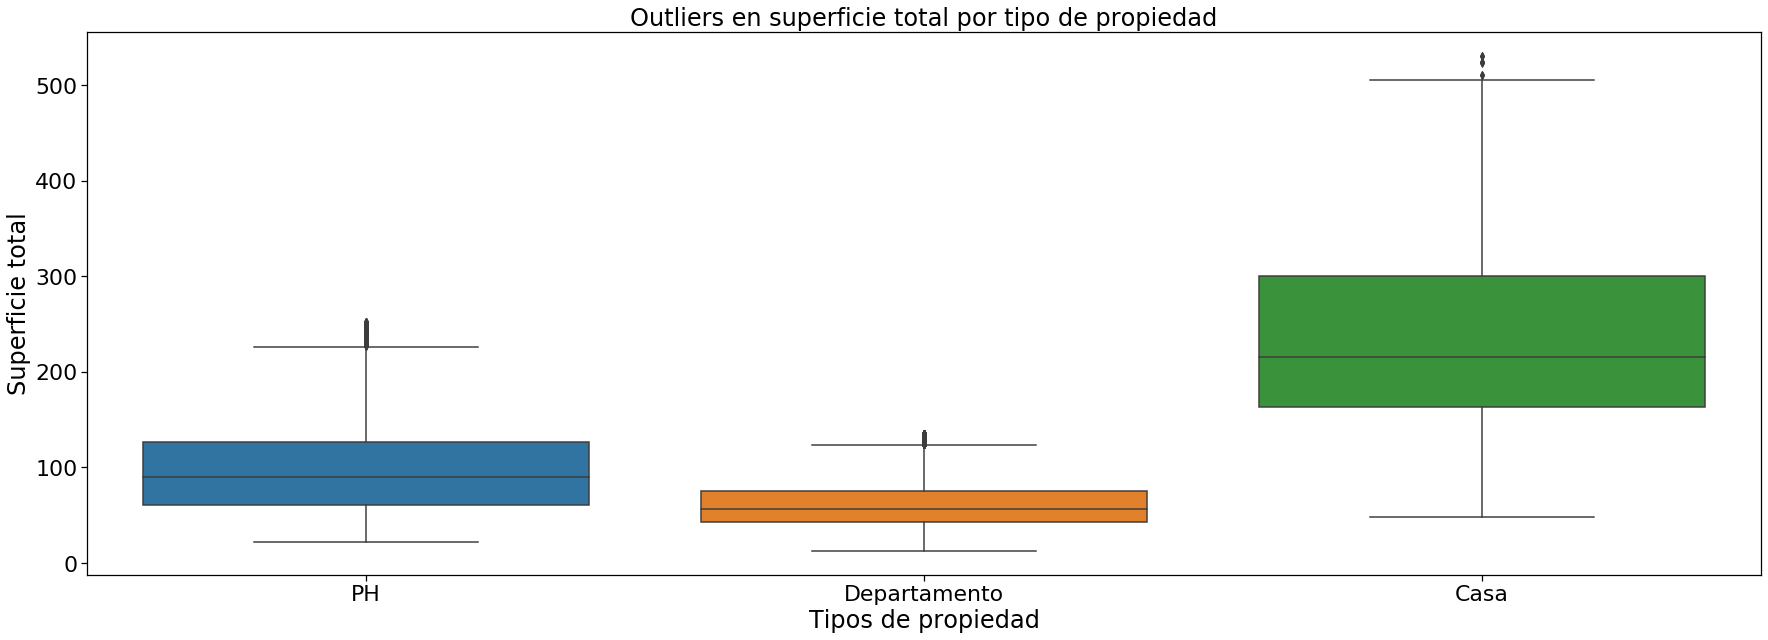

In [41]:
sns.set_context("notebook", font_scale=2)
plt.figure(figsize=(30,10))
sns.boxplot(data = df_rebuild, y = "surface_total_x", x="property_type_x")
plt.ylabel("Superficie total")
plt.xlabel("Tipos de propiedad")
plt.title("Outliers en superficie total por tipo de propiedad")

Ahora nuestro BoxPlot luce mucho mejor!!!, ahora nuestros datos están menos dispersos por tipo de propiedad.

6. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

In [42]:
df_rebuild.columns

Index(['rooms_x', 'bedrooms_x', 'bathrooms_x', 'surface_total_x',
       'surface_covered_x', 'price_x', 'unique_id_x', 'property_type_x',
       'start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms_y', 'bedrooms_y', 'bathrooms_y', 'surface_total_y',
       'surface_covered_y', 'price_y', 'currency', 'title', 'description',
       'property_type_y', 'operation_type', 'unique_id_y'],
      dtype='object')

In [43]:
df_rebuild.rename(columns=lambda x: x.replace('rooms_x', 'rooms'), inplace=True)
df_rebuild.rename(columns=lambda x: x.replace('bedrooms_x', 'bedrooms'), inplace=True)
df_rebuild.rename(columns=lambda x: x.replace('bathrooms_x', 'bathrooms'), inplace=True)
df_rebuild.rename(columns=lambda x: x.replace('surface_total_x', 'surface_total'), inplace=True)
df_rebuild.rename(columns=lambda x: x.replace('property_type_x', 'property_type'), inplace=True)
df_rebuild.rename(columns=lambda x: x.replace('surface_covered_x', 'surface_covered'), inplace=True)
df_rebuild.rename(columns=lambda x: x.replace('unique_id_x', 'unique_id'), inplace=True)
df_rebuild.rename(columns=lambda x: x.replace('price_x', 'price'), inplace=True)

In [44]:
df_clear = df_rebuild[['rooms','bedrooms','bathrooms','surface_total',
                       'surface_covered','price','property_type','l2','l3']]

In [45]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
#Llevo a valores categoricos  las ciudades y zonas
#df_clear['location'] = df_clear['l2'] +'|'+ df_clear['l3']
#df_clear['location_code'] = pd.factorize(df_clear['location'])[0]
#df_clear['property_type_code'] = pd.factorize(df_clear['property_type'])[0]



df_clear["location_code"] = lb_make.fit_transform(df_clear['l2'] +'|'+ df_clear['l3'])
df_clear["property_type_code"] = lb_make.fit_transform(df_clear['property_type'] )

F:\Anaconda3\envs\datascience\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
F:\Anaconda3\envs\datascience\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [46]:
df_clear

rooms  bedrooms  bathrooms  surface_total  surface_covered     price  \
1         2.0       1.0        2.0           70.0             58.0  159000.0   
2         2.0       1.0        1.0           45.0             45.0  125000.0   
3         2.0       1.0        1.0           85.0             50.0  295000.0   
5         2.0       1.0        1.0           56.0             56.0  150000.0   
6         2.0       1.0        1.0           70.0             70.0  159500.0   
...       ...       ...        ...            ...              ...       ...   
146545    3.0       2.0        2.0           88.0             82.0  399000.0   
146546    3.0       2.0        2.0           89.0             82.0  434999.0   
146548    3.0       2.0        2.0           82.0             82.0  475000.0   
146549    3.0       2.0        1.0           84.0             84.0  178000.0   
146550    5.0       2.0        2.0          114.0             95.0  298000.0   

       property_type               l2            l3  location_code  \
1                 PH  Capital Federal         Boedo              8   
2                 PH  Capital Federal       Palermo             26   
3                 PH  Capital Federal       Palermo             26   
5                 PH  Capital Federal  Villa Crespo             44   
6                 PH  Capital Federal  Villa Crespo             44   
...              ...              ...           ...            ...   
146545  Departamento  Capital Federal       Palermo             26   
146546  Departamento  Capital Federal       Palermo             26   
146548  Departamento  Capital Federal       Palermo             26   
146549            PH  Capital Federal       Palermo             26   
146550            PH  Capital Federal       Palermo             26   

        property_type_code  
1                        2  
2                        2  
3                        2  
5                        2  
6                        2  
...                    ...  
146545                   1  
146546                   1  
146548                   1  
146549                   2  
146550                   2  

[55500 rows x 11 columns]

In [47]:
#Llevo valores categoricos a númericos para ver si tienen alguna correlación con los otros datos
#cleanup_nums = {"property_type":     {"PH": 10, "Departamento": 20, "Casa": 30}}
df_clear_num = df_clear


#df_clear_num.replace(cleanup_nums, inplace=True)
df_clear_num = df_clear_num[['rooms','bedrooms','bathrooms','surface_total','surface_covered','price','property_type_code','location_code']]
df_clear_num.head()



rooms  bedrooms  bathrooms  surface_total  surface_covered     price  \
1    2.0       1.0        2.0           70.0             58.0  159000.0   
2    2.0       1.0        1.0           45.0             45.0  125000.0   
3    2.0       1.0        1.0           85.0             50.0  295000.0   
5    2.0       1.0        1.0           56.0             56.0  150000.0   
6    2.0       1.0        1.0           70.0             70.0  159500.0   

   property_type_code  location_code  
1                   2              8  
2                   2             26  
3                   2             26  
5                   2             44  
6                   2             44

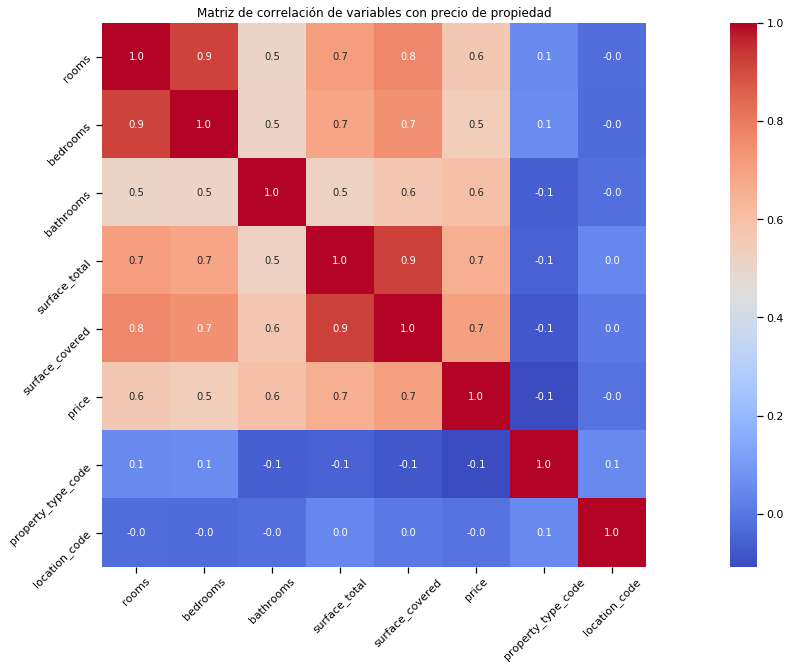

In [48]:
sns.set_context("notebook", font_scale=1)
plt.figure(figsize=(30,10))

df_clear_num_cor = df_clear_num.corr()

sns.heatmap(df_clear_num_cor, cbar = True,  square = True, annot=True, fmt= '.1f',annot_kws={'size': 10},
           xticklabels= df_clear_num_cor.columns, 
           yticklabels= df_clear_num_cor.columns,
           cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.title("Matriz de correlación de variables con precio de propiedad")
plt.show()#fmt: Cantidad de decimales

Esperaba que la ubicación de la propiedad tubiera mucha correlación con el precio. Sin embargo, las variables superficie total,
cubierta, número de cuartos, baños y alcobas tienen buena correlación y pueden ser muy buenos predictores.

Text(0.5, 1.08, 'Pairplot para visualizar relación y proporcionalidad de variables')

<Figure size 2160x720 with 0 Axes>

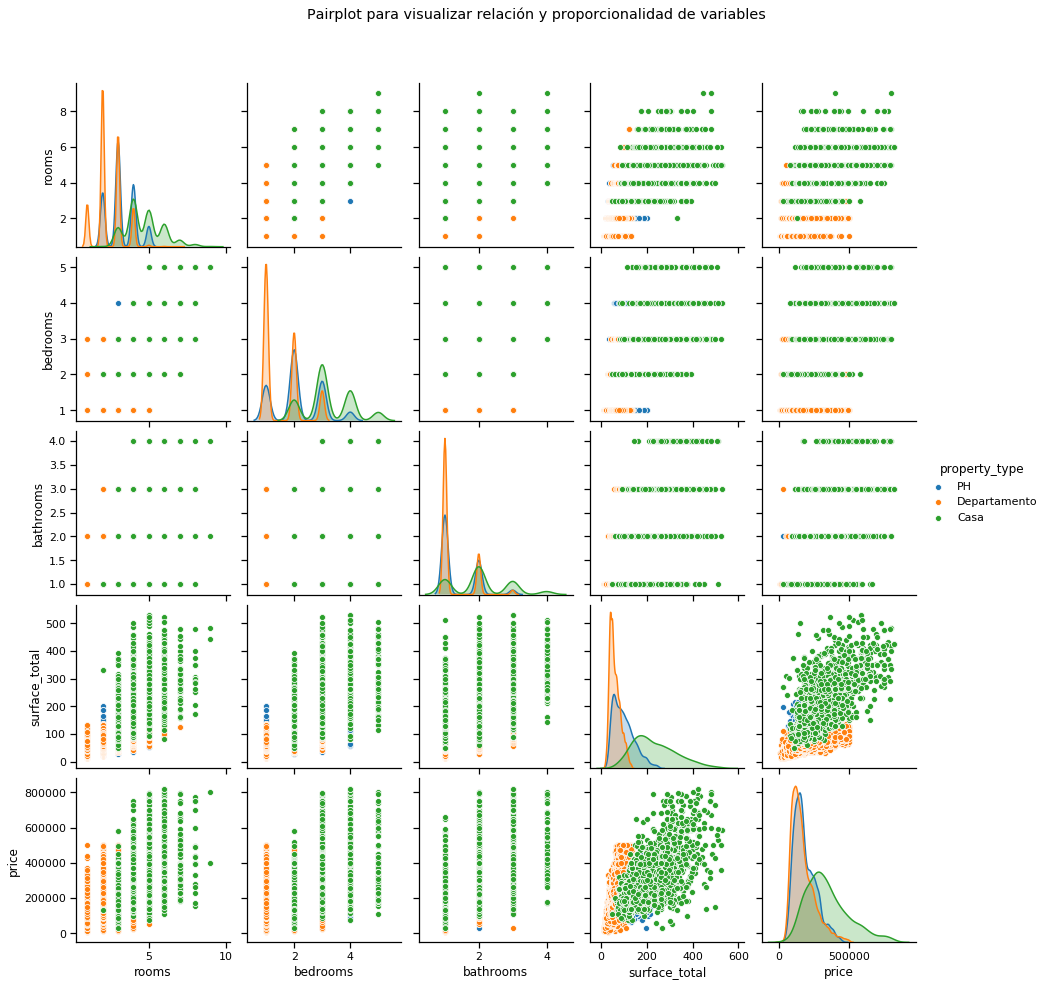

In [49]:
sns.set_context("notebook", font_scale=1)
plt.figure(figsize=(30,10))
df_clear2 = df_rebuild[['rooms','bedrooms','bathrooms','surface_total','price','property_type']]
g = sns.pairplot(df_clear2, hue="property_type")
g.fig.suptitle("Pairplot para visualizar relación y proporcionalidad de variables", y=1.08)

Hagamos un pairplot con las variables que han demostrado ser buenos predictores. Con este confirmamos y nuevamente observamos
la buena relación del precio con la superficie total, incluso con el número de cuartos y de baños, se observa igualmente
la proporcion mayor de instancias de tipo departamento. También algo que no habia notado y es que las casas reflejan mayor 
cantidad de instancias en el ranking de mayor número de cuartos, alcobas y baños, claro por la mayor superficie.

### Ahora hagamos un analisis segmentado por tipo de propiedad###

In [50]:
data = df_clear2.copy()
data = data[data["property_type"] == 'Departamento']
data['price']=data['price']/1000
print(f"Estadisticas de dataset para tipo Departamento")
data.describe()

Estadisticas de dataset para tipo Departamento


rooms      bedrooms     bathrooms  surface_total         price
count  47229.000000  47229.000000  47229.000000   47229.000000  47229.000000
mean       2.429863      1.536556      1.246946      60.986237    168.941534
std        0.857968      0.681989      0.478178      22.918228     82.216007
min        1.000000      1.000000      1.000000      13.000000      7.500000
25%        2.000000      1.000000      1.000000      43.000000    109.900000
50%        2.000000      1.000000      1.000000      56.000000    148.204000
75%        3.000000      2.000000      1.000000      75.000000    210.000000
max        7.000000      3.000000      3.000000     135.000000    500.000000

In [51]:
data = df_clear2.copy()
data = data[data["property_type"] == 'Casa']
data['price']=data['price']/1000
print(f"Estadisticas de dataset para tipo Casa")
data.describe()

Estadisticas de dataset para tipo Casa


rooms     bedrooms    bathrooms  surface_total        price
count  1485.000000  1485.000000  1485.000000    1485.000000  1485.000000
mean      4.677441     3.223569     2.068013     235.276094   344.280390
std       1.164529     0.822434     0.820119      94.249242   151.931197
min       2.000000     2.000000     1.000000      48.000000    30.000000
25%       4.000000     3.000000     1.000000     163.000000   239.000000
50%       5.000000     3.000000     2.000000     216.000000   320.000000
75%       5.000000     4.000000     3.000000     300.000000   430.000000
max       9.000000     5.000000     4.000000     530.000000   820.000000

In [52]:
data = df_clear2.copy()
data = data[data["property_type"] == 'PH']
data['price']=data['price']/1000
print(f"Estadisticas de dataset para tipo PH")
data.describe()

Estadisticas de dataset para tipo PH


rooms     bedrooms    bathrooms  surface_total        price
count  6786.000000  6786.000000  6786.000000    6786.000000  6786.000000
mean      3.201444     2.137342     1.365164      99.327144   183.037037
std       0.880613     0.828206     0.553028      45.656966    77.159987
min       2.000000     1.000000     1.000000      22.000000    27.000000
25%       3.000000     2.000000     1.000000      61.000000   125.000000
50%       3.000000     2.000000     1.000000      90.000000   165.000000
75%       4.000000     3.000000     2.000000     127.000000   230.000000
max       5.000000     4.000000     3.000000     252.000000   450.000000

Corroboramos que no hay outliers en nuestro dataset, ni quizas alguno que haya quedado oculto por el tipo de propiedad,
se observa nuevamente que la superficie o entre mayor superficie aumenta el número de cuartos y baños y adicional aumenta el
precio, también se observa algo que ha pasado en el mercado de inmuebles donde el precio de los departamentos ha ido 
sobrepasando el precio de los PH.

Ahora hagamos una matriz de correlación por tipo de propiedad

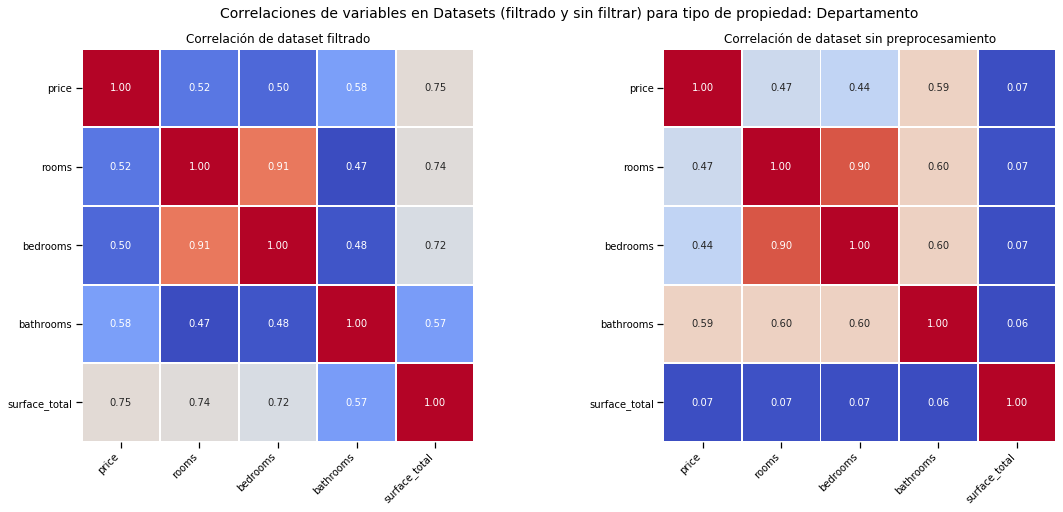

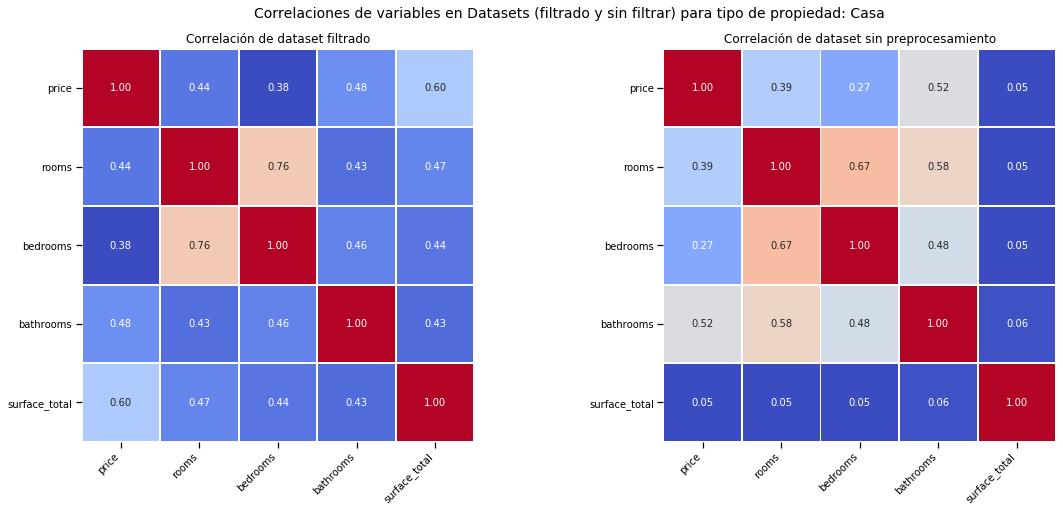

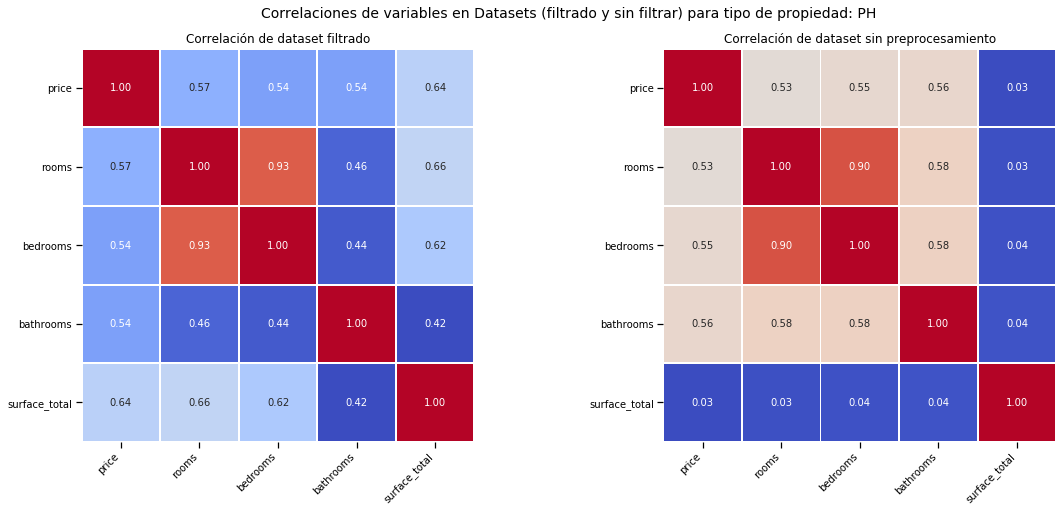

In [53]:
columns = ["price", "rooms", "bedrooms", "bathrooms", "surface_total"]
propiedades = ["Departamento", "Casa", "PH"]

for tipo in propiedades:
    fig, axes = plt.subplots(1,2, figsize=(16,7), constrained_layout=True)
    ax1, ax2 = axes.flatten()

    data = df_clear2[df_clear2["property_type"] == tipo]
    corr = data[columns].corr(method="pearson")
    sns.heatmap(corr, cbar = False,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 10},
               cmap= 'coolwarm', linewidths=1, ax=ax1)
    ax1.set_xticklabels(data[columns].columns,rotation = 45, fontsize = 10,horizontalalignment= 'right')
    ax1.set_title("Correlación de dataset filtrado", fontsize=12)
    ax1.set_yticklabels(data[columns].columns,rotation = 0, fontsize = 10)    

    data = df[df["property_type"] == tipo]
    corr2 = data[columns].corr(method="pearson")
    sns.heatmap(corr2, cbar = False,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 10},
               cmap= 'coolwarm', linewidths=1, ax=ax2)
    ax2.set_title("Correlación de dataset sin preprocesamiento", fontsize=12)
    ax2.set_yticklabels(data[columns].columns,rotation = 0, fontsize = 10)
    plt.xticks(rotation= 45, fontsize= 10, horizontalalignment= 'right')

    plt.suptitle(f"Correlaciones de variables en Datasets (filtrado y sin filtrar) para tipo de propiedad: {tipo}", fontsize=14)

Excelente!!, se observan los frutos del preprocesamiento del data set, se observa claramente que para cada 
uno de los tipos de propiedades mejora sustancialmente la correlación de las variables con el precio, adicionalmente
se observan que mejoran las correlaciones que tienen varias variables entre ellas el numeros de rooms con la superficie total,
cosa que antes no era tan claramente visible.

También se observa que las variables mantienen una muy buena correlación con el precio pero es mucho más evidente para
la propiedades de tipo departamento.

### 2.1 Desafío

### <span style="color:blue">Revisemos que tanta incidencia tiene la fecha de inicio de la publicación</span>

In [54]:
df_time_avg =df.groupby(['property_type', pd.Grouper(key='start_date', freq='1M')]).agg({'price':[np.median]})

In [55]:
df_time_avg.xs('Departamento')['price']

median
start_date          
2019-01-31  158900.0
2019-02-28  163000.0
2019-03-31  165000.0
2019-04-30  165000.0
2019-05-31  165000.0
2019-06-30  160000.0
2019-07-31  180000.0
2019-08-31  170000.0
2019-09-30  160000.0
2019-10-31  168000.0
2019-11-30  137000.0
2019-12-31  151879.0
2020-01-31  150000.0

In [56]:
        lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
        ]
    
        ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)

Text(0.5, 1.0, 'Variación de precio de propiedades en línea de tiempo')

<Figure size 720x360 with 0 Axes>

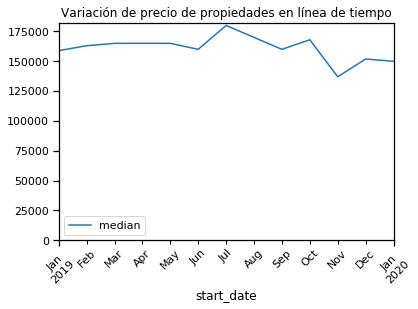

In [57]:
sns.set_context("notebook", font_scale=1)
plt.figure(figsize=(10,5))

scale_factor = 1

df_time_avg.xs('Departamento')['price'].plot(rot=45)
ymin, ymax = plt.ylim()



plt.ylim(0 , ymax * scale_factor)
plt.title("Variación de precio de propiedades en línea de tiempo")

### <span style="color:blue"> Observamos realmente que la fecha ha tenido poca incidencia en el precio de la propiedad</span>

Se realiza analisis de precio de propiedades en la línea del tiempo. Sin embargo, no se observa ningun pico sobresaliente 
que lleve a pensar que hay alguna fecha o segmento de tiempo donde las propiedades hubiesen aumentado, si hubiese sido así, 
se hubiese indagado el fenomeno pero su posible ocurrencia a futuro y así tenerlo en cuenta en la predicción.

In [58]:
import reverse_geocoder as rg 
import pprint 
  
def reverseGeocode(lat, lon):
    coordinates =(lat, lon) 
    result = rg.search(coordinates) 
      
    return pd.DataFrame(result)['name'][0]

df_rebuild['geo_location'] = "None"

for ind in df_rebuild.head(5).index: 
    df_rebuild['geo_location'][ind] = reverseGeocode(df_rebuild['lat'][ind],df_rebuild['lon'][ind]) 
    print(df_rebuild['geo_location'][ind]+" - "+df_rebuild['l3'])
    
    

    

Loading formatted geocoded file...


F:\Anaconda3\envs\datascience\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


1                Buenos Aires - Boedo
2              Buenos Aires - Palermo
3              Buenos Aires - Palermo
5         Buenos Aires - Villa Crespo
6         Buenos Aires - Villa Crespo
                     ...             
146545         Buenos Aires - Palermo
146546         Buenos Aires - Palermo
146548         Buenos Aires - Palermo
146549         Buenos Aires - Palermo
146550         Buenos Aires - Palermo
Name: l3, Length: 55500, dtype: object
1                Colegiales - Boedo
2              Colegiales - Palermo
3              Colegiales - Palermo
5         Colegiales - Villa Crespo
6         Colegiales - Villa Crespo
                    ...            
146545         Colegiales - Palermo
146546         Colegiales - Palermo
146548         Colegiales - Palermo
146549         Colegiales - Palermo
146550         Colegiales - Palermo
Name: l3, Length: 55500, dtype: object
1                Colegiales - Boedo
2              Colegiales - Palermo
3              Colegiales - Palermo


Se intenta obtener la posición exacta de la propiedad pensando en que l3 corresponde a una provincia o área mucho más extensa,
que pudiese incluir diferentes barrios donde cada uno quizas tubiera un rango de precios un poco diferente y así 
tener más precisión en la localización de la propiedad y por ende su precio, pero se observa que muchas posiciones geograficas
no coinciden con l3.

### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento` en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81021 instacias y 6 columnas.

In [59]:
from sklearn.tree import DecisionTreeClassifier # Importar el classificador
from sklearn.model_selection import train_test_split # Importar funciones de particion
from sklearn import metrics #Importar las metricas de scikit-learn
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder

In [60]:

df_ml_wr = df[(df.l2=='Capital Federal')   ]

In [61]:
df_ml_wr.shape

(92539, 20)

In [62]:
df_ml_wr = df_ml_wr[(df_ml_wr.property_type=='Departamento') | ( df_ml_wr.property_type=='PH') | (df_ml_wr.property_type=='Casa')  ]

In [63]:
df_ml_wr.shape

(91485, 20)

In [64]:
df_ml_wr = df_ml_wr[(df_ml_wr.surface_total <= 1000) ]

In [65]:
df_ml_wr = df_ml_wr[(df_ml_wr.surface_total >= 15) ]

In [66]:
df_ml_wr.shape

(82405, 20)

In [67]:
df_ml_wr = df_ml_wr[(df_ml_wr.price <= 4000000) ]

In [68]:
df_ml_wr.shape

(82373, 20)

In [69]:
df_ml_wr.head()

start_date   end_date created_on        lat        lon         l1  \
0 2019-10-17 2019-12-23 2019-10-17 -34.605880 -58.384949  Argentina   
1 2019-10-17 2019-11-21 2019-10-17 -34.624056 -58.412110  Argentina   
2 2019-10-17 2019-11-01 2019-10-17 -34.593569 -58.427474  Argentina   
3 2019-10-17 2019-12-23 2019-10-17 -34.581294 -58.436754  Argentina   
5 2019-10-17 2019-11-01 2019-10-17 -34.593779 -58.441239  Argentina   

                l2             l3  rooms  bedrooms  bathrooms  surface_total  \
0  Capital Federal  San Cristobal    7.0       7.0        2.0          140.0   
1  Capital Federal          Boedo    2.0       1.0        2.0           70.0   
2  Capital Federal        Palermo    2.0       1.0        1.0           45.0   
3  Capital Federal        Palermo    2.0       1.0        1.0           85.0   
5  Capital Federal   Villa Crespo    2.0       1.0        1.0           56.0   

   surface_covered     price currency  \
0            140.0  153000.0      USD   
1             58.0  159000.0      USD   
2             45.0  125000.0      USD   
3             50.0  295000.0      USD   
5             56.0  150000.0      USD   

                                               title  \
0        ***Venta semipiso centro, ideal hostel*****   
1   Espectacular PH reciclado en Boedo sin expensas.   
2  Depto.tipo casa de 2 ambientes en Venta en Pal...   
3  COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...   
5  Depto.tipo casa de 2 ambientes en Venta en Vil...   

                                         description property_type  \
0  DESCRIPCION DE LA PROPIEDAD: Departamento de 1...  Departamento   
1   PH reciclado en Boedo a una cuadra de la plaz...            PH   
2  2 ambienets amplio , excelente estado , patio ...            PH   
3  HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...            PH   
5  Excelente ph solo 2 unidades, no paga expensas...            PH   

  operation_type            unique_id  
0          Venta  1411090956010708755  
1          Venta -6010755885448858639  
2          Venta -5005755319119506845  
3          Venta  2704561948429987117  
5          Venta -3011442233951817659

In [70]:
df_ml_wr.describe()

lat           lon         rooms      bedrooms     bathrooms  \
count  78110.000000  78110.000000  82373.000000  82373.000000  81493.000000   
mean     -34.598459    -58.435010      3.006810      2.000413      1.553495   
std        0.023533      0.035893      1.308269      1.051184      0.852610   
min      -34.696419    -58.530468      1.000000      0.000000      1.000000   
25%      -34.612337    -58.457843      2.000000      1.000000      1.000000   
50%      -34.598771    -58.432867      3.000000      2.000000      1.000000   
75%      -34.584180    -58.409600      4.000000      3.000000      2.000000   
max      -34.535909    -58.353930     26.000000     15.000000     14.000000   

       surface_total  surface_covered         price     unique_id  
count   82373.000000     81856.000000  8.237300e+04  8.237300e+04  
mean       95.239714        84.835736  2.628461e+05 -2.109279e+17  
std        77.258098       155.464754  2.976546e+05  5.222057e+18  
min        15.000000         1.000000  6.000000e+03 -9.222819e+18  
25%        49.000000        44.000000  1.250000e+05 -4.751827e+18  
50%        71.000000        63.000000  1.799000e+05 -8.248384e+17  
75%       110.000000        96.000000  2.800000e+05  4.137557e+18  
max      1000.000000     17220.000000  4.000000e+06  9.223358e+18

In [71]:
#Remplazo variable categorica por numerica para usar en predicción
#df_ml_wr['location_code'] = pd.factorize(df_ml_wr['l2'] +'|'+ df_ml_wr['l3'])[0]
#df_ml_wr['property_type_code'] = pd.factorize(df_ml_wr['property_type'])[0]
lb_make = LabelEncoder()
df_ml_wr["location_code"] = lb_make.fit_transform(df_ml_wr['l2'] +'|'+ df_ml_wr['l3'])
df_ml_wr["property_type_code"] = lb_make.fit_transform(df_ml_wr['property_type'] )

In [72]:
df_ml_wr = df_ml_wr[['rooms','bedrooms','bathrooms','surface_total','surface_covered',
                     'price','location_code','property_type_code','unique_id','property_type']]

In [73]:
df_ml_wr.shape

(82373, 10)

In [74]:
df_ml_wr.isna().sum(axis=0)/len(df_ml_wr)

rooms                 0.000000
bedrooms              0.000000
bathrooms             0.010683
surface_total         0.000000
surface_covered       0.006276
price                 0.000000
location_code         0.000000
property_type_code    0.000000
unique_id             0.000000
property_type         0.000000
dtype: float64

In [75]:
df_ml_wr = df_ml_wr.dropna(axis=0,how='any')

In [76]:
df_ml_wr.isnull().sum()

rooms                 0
bedrooms              0
bathrooms             0
surface_total         0
surface_covered       0
price                 0
location_code         0
property_type_code    0
unique_id             0
property_type         0
dtype: int64

In [77]:
df_ml_wr.shape

(81019, 10)

In [78]:
df_ml_wr.isna().sum(axis=0)/len(df_ml_wr)

rooms                 0.0
bedrooms              0.0
bathrooms             0.0
surface_total         0.0
surface_covered       0.0
price                 0.0
location_code         0.0
property_type_code    0.0
unique_id             0.0
property_type         0.0
dtype: float64

In [79]:
df_ml_wr.describe()

rooms      bedrooms     bathrooms  surface_total  \
count  81019.000000  81019.000000  81019.000000   81019.000000   
mean       3.009652      2.002037      1.553821      95.361779   
std        1.308602      1.049673      0.852672      77.253578   
min        1.000000      0.000000      1.000000      15.000000   
25%        2.000000      1.000000      1.000000      49.000000   
50%        3.000000      2.000000      1.000000      71.000000   
75%        4.000000      3.000000      2.000000     111.000000   
max       26.000000     15.000000     14.000000    1000.000000   

       surface_covered         price  location_code  property_type_code  \
count     81019.000000  8.101900e+04   81019.000000        81019.000000   
mean         84.928535  2.637725e+05      23.652872            1.091608   
std         156.133119  2.989499e+05      16.060080            0.368910   
min           1.000000  6.000000e+03       0.000000            0.000000   
25%          44.000000  1.250000e+05       8.000000            1.000000   
50%          63.000000  1.800000e+05      26.000000            1.000000   
75%          96.000000  2.800000e+05      35.000000            1.000000   
max       17220.000000  4.000000e+06      56.000000            2.000000   

          unique_id  
count  8.101900e+04  
mean  -1.985525e+17  
std    5.234705e+18  
min   -9.222819e+18  
25%   -4.785458e+18  
50%   -7.760215e+17  
75%    4.174184e+18  
max    9.223358e+18

In [80]:
#Eliminamos los valores atipicos
df_outliers = detect_outliersIQR(df_ml_wr[['rooms','unique_id','property_type']],'rooms')
df_ml_wr = df_ml_wr[~df_ml_wr['unique_id'].isin(df_outliers)]

df_outliers = detect_outliersIQR(df_ml_wr[['bedrooms','unique_id','property_type']],'bedrooms')
df_ml_wr = df_ml_wr[~df_ml_wr['unique_id'].isin(df_outliers)]

df_outliers = detect_outliersIQR(df_ml_wr[['bathrooms','unique_id','property_type']],'bathrooms')
df_ml_wr = df_ml_wr[~df_ml_wr['unique_id'].isin(df_outliers)]

df_outliers = detect_outliersIQR(df_ml_wr[['surface_total','unique_id','property_type']],'surface_total')
df_ml_wr = df_ml_wr[~df_ml_wr['unique_id'].isin(df_outliers)]

df_outliers = detect_outliersIQR(df_ml_wr[['surface_covered','unique_id','property_type']],'surface_covered')
df_ml_wr = df_ml_wr[~df_ml_wr['unique_id'].isin(df_outliers)]

df_outliers = detect_outliersIQR(df_ml_wr[['price','unique_id','property_type']],'price')
df_ml_wr = df_ml_wr[~df_ml_wr['unique_id'].isin(df_outliers)]

In [81]:
#Se eliminan inconsistencias de propiedades con superficie cubierta mayor a superficie total
df_ml_wr = df_ml_wr[(df_ml_wr['surface_covered'] <= df_ml_wr['surface_total'])]

In [82]:
df_ml_wr.describe()

rooms      bedrooms     bathrooms  surface_total  \
count  54855.000000  54855.000000  54855.000000   54855.000000   
mean       2.577650      1.649567      1.270568      70.090220   
std        0.967694      0.773917      0.506246      43.064832   
min        1.000000      1.000000      1.000000      15.000000   
25%        2.000000      1.000000      1.000000      45.000000   
50%        2.000000      1.000000      1.000000      59.000000   
75%        3.000000      2.000000      1.000000      82.000000   
max        9.000000      5.000000      4.000000     540.000000   

       surface_covered          price  location_code  property_type_code  \
count     54855.000000   54855.000000   54855.000000        54855.000000   
mean         60.544253  170214.593510      23.992781            1.093847   
std          31.743838   80295.818138      16.561033            0.372635   
min           1.000000    7500.000000       0.000000            0.000000   
25%          41.000000  110000.000000       9.000000            1.000000   
50%          52.000000  150000.000000      26.000000            1.000000   
75%          72.000000  215000.000000      37.000000            1.000000   
max         410.000000  760000.000000      56.000000            2.000000   

          unique_id  
count  5.485500e+04  
mean  -1.064859e+17  
std    5.388352e+18  
min   -9.222244e+18  
25%   -4.817004e+18  
50%   -2.955766e+17  
75%    4.581610e+18  
max    9.223358e+18

In [83]:
df_ml_wr.shape

(54855, 10)

In [84]:
df_ml_wr.head()

rooms  bedrooms  bathrooms  surface_total  surface_covered     price  \
1    2.0       1.0        2.0           70.0             58.0  159000.0   
2    2.0       1.0        1.0           45.0             45.0  125000.0   
3    2.0       1.0        1.0           85.0             50.0  295000.0   
5    2.0       1.0        1.0           56.0             56.0  150000.0   
6    2.0       1.0        1.0           70.0             70.0  159500.0   

   location_code  property_type_code            unique_id property_type  
1              8                   2 -6010755885448858639            PH  
2             26                   2 -5005755319119506845            PH  
3             26                   2  2704561948429987117            PH  
5             44                   2 -3011442233951817659            PH  
6             44                   2 -3011442233951817659            PH

### Benchmark con modelos simples###

### <span style="color:green">Iniciando predición con un atributo en X (X1)</span>

In [85]:
y = df_ml_wr['price']

In [86]:
X1 = df_ml_wr[['surface_covered']]

In [87]:
linear_model1 = LinearRegression()
tree_regressor1 = DecisionTreeRegressor(max_depth=3, random_state=42)
knn_regressor1 = KNeighborsRegressor(n_neighbors=5)

In [88]:
X1_train, X1_test, y_train, y_test = train_test_split(
    X1, y, test_size=0.30, random_state=42)


print(X1_train.shape, y_train.shape, X1_test.shape, y_test.shape)

(38398, 1) (38398,) (16457, 1) (16457,)


Entrenemos nuestros modelos con una Regresion Lineal, Albol de Desición y KNN sin mayor complejidad.

In [89]:
linear_model1.fit(X1_train, y_train)
tree_regressor1.fit(X1_train, y_train)
knn_regressor1.fit(X1_train, y_train)


KNeighborsRegressor()

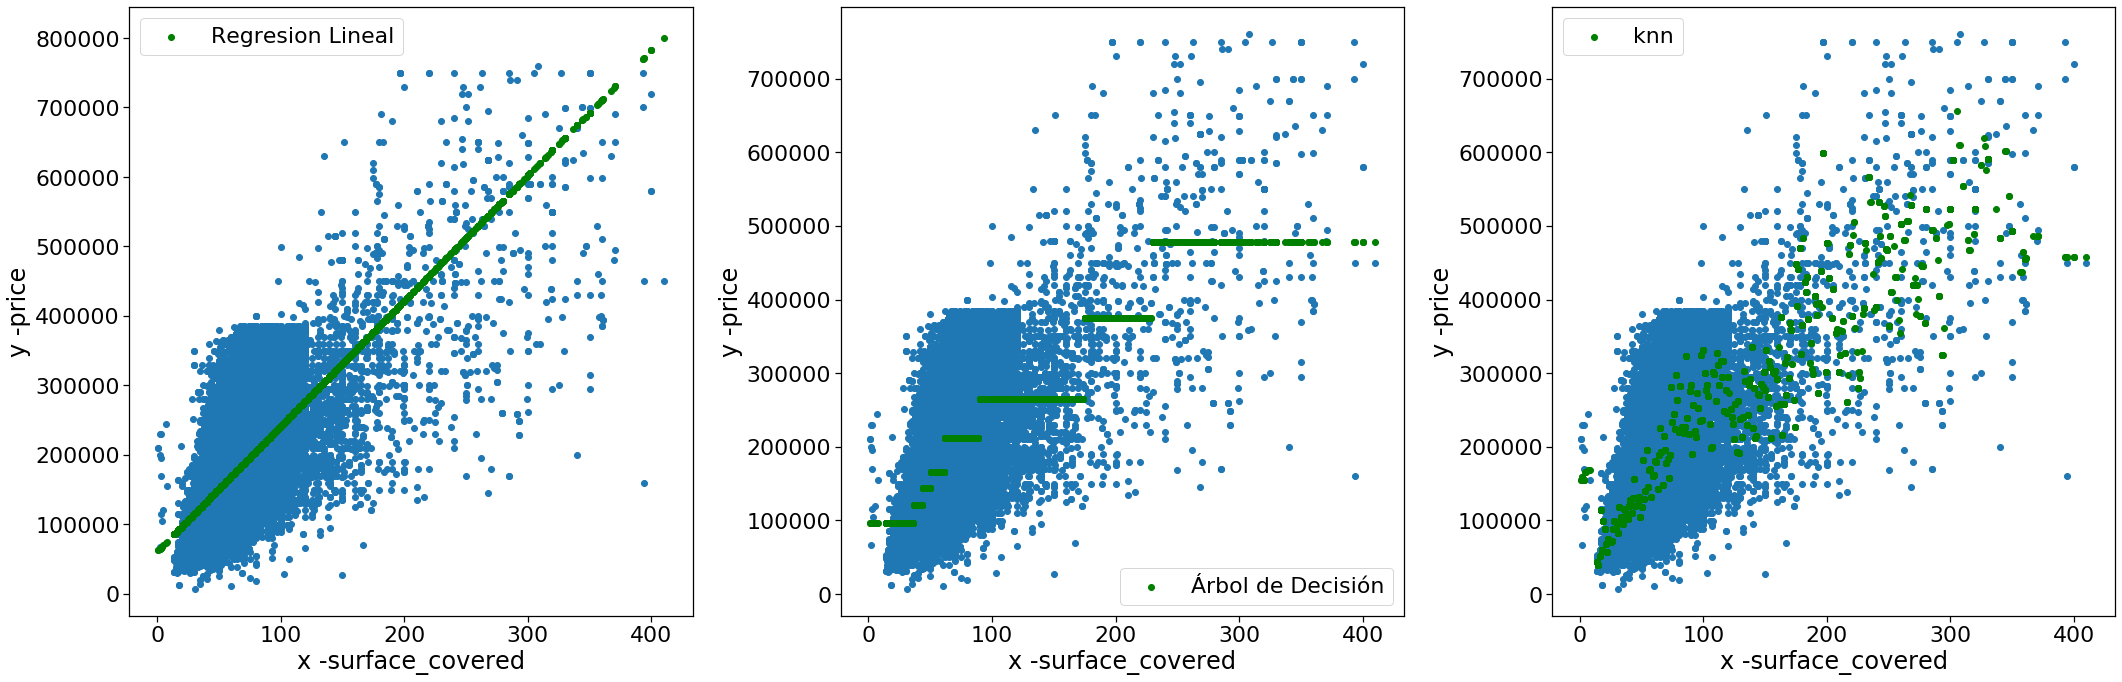

In [90]:
sns.set_context("notebook", font_scale=2)
plt.figure(figsize=(30,10))
#plt.figure(figsize = (12,4))

plt.subplot(1,3,1)
plt.scatter(X1,y)
#plt.plot(X1, y, label ='Curva Teórica', c = 'r')
plt.scatter(X1,linear_model1.predict(X1),label ='Regresion Lineal', c = 'g')
plt.xlabel('x -'+str(X1.columns[0]))
plt.ylabel('y -price')
plt.legend()

plt.subplot(1,3,2)
plt.scatter(X1,y)
#plt.plot(X1, y,label ='Curva Teórica', c = 'r')
plt.scatter(X1,tree_regressor1.predict(X1),label ='Árbol de Decisión', c = 'g')

plt.xlabel('x -'+str(X1.columns[0]))
plt.ylabel('y -price')
plt.legend()

plt.subplot(1,3,3)
plt.scatter(X1,y)
#plt.plot(X1, y,label ='Curva Teórica', c = 'r')
plt.scatter(X1,knn_regressor1.predict(X1),label ='knn', c = 'g')

plt.xlabel('x -'+str(X1.columns[0]))
plt.ylabel('y -price')
plt.legend()

plt.tight_layout()
plt.show()



In [91]:
from sklearn.metrics import mean_squared_error
import seaborn as sns
modelos = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']


def graphSquaredError(linear_model, tree_regressor, knn_regressor, X1_train, X1_test, y_train, y_test):
    sns.set_context("notebook", font_scale=2)
    for i, model in enumerate([linear_model, tree_regressor, knn_regressor]):
        y_train_pred = model.predict(X1_train)
        y_test_pred = model.predict(X1_test)
    
    
        print(f'Modelo: {modelos[i]}')

        rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
        rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
        print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
        print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
        #plt.figure(figsize = (8,4))
        plt.figure(figsize=(30,10))

        plt.subplot(1,2,1)
        sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
        sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
        plt.xlabel('errores')
        plt.legend()


        ax = plt.subplot(1,2,2)
        ax.scatter(y_test,y_test_pred, s =2)
    
        lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
        ]
    
        ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
        plt.xlabel('y (test)')
        plt.ylabel('y_pred (test)')
    
        plt.tight_layout()
        plt.show()

In [92]:
from sklearn.metrics import mean_squared_error
import seaborn as sns



def graphSquaredErrorRFR(forest_regressor, X1_train, X1_test, y_train, y_test):
    sns.set_context("notebook", font_scale=2)
    for i, model in enumerate([forest_regressor]):
        y_train_pred = model.predict(X1_train)
        y_test_pred = model.predict(X1_test)
    
    
        

        rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
        rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
        print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
        print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
        plt.figure(figsize = (30,10))
        

        plt.subplot(1,2,1)
        sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
        sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
        plt.xlabel('errores')
        plt.legend()


        ax = plt.subplot(1,2,2)
        ax.scatter(y_test,y_test_pred, s =2)
    
        lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
        ]
    
        ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
        plt.xlabel('y (test)')
        plt.ylabel('y_pred (test)')
    
        plt.tight_layout()
        plt.show()

#### Evaluamos nuestro modelo de Benchmark ####

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 55847.62540603555
Raíz del error cuadrático medio en Test: 54911.510637822816


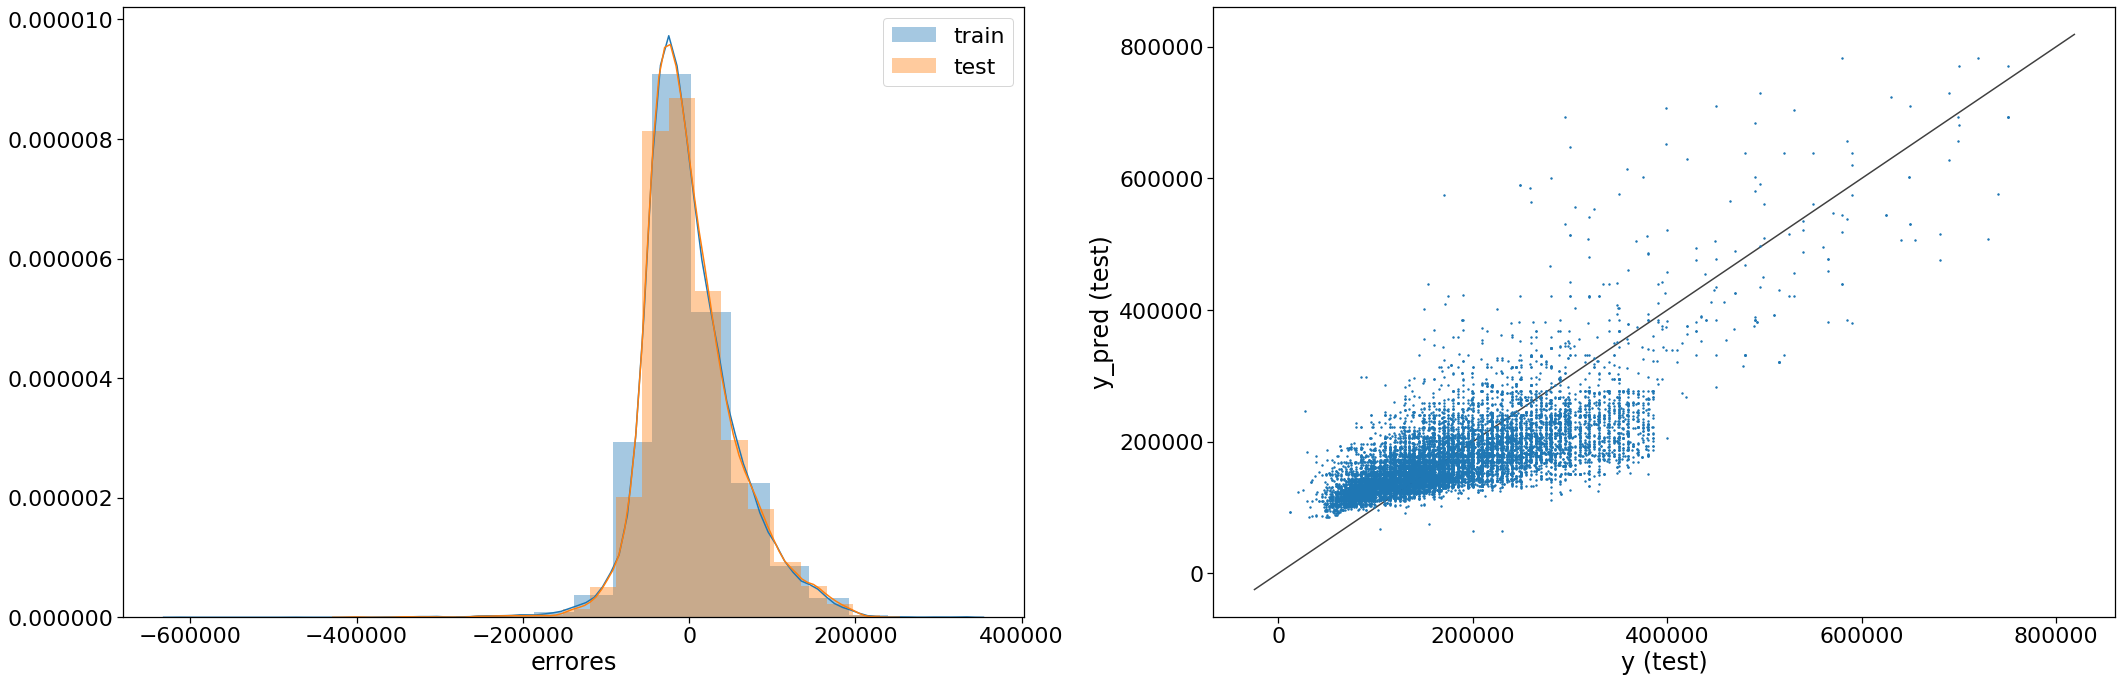

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 53494.71026988979
Raíz del error cuadrático medio en Test: 53398.45975646313


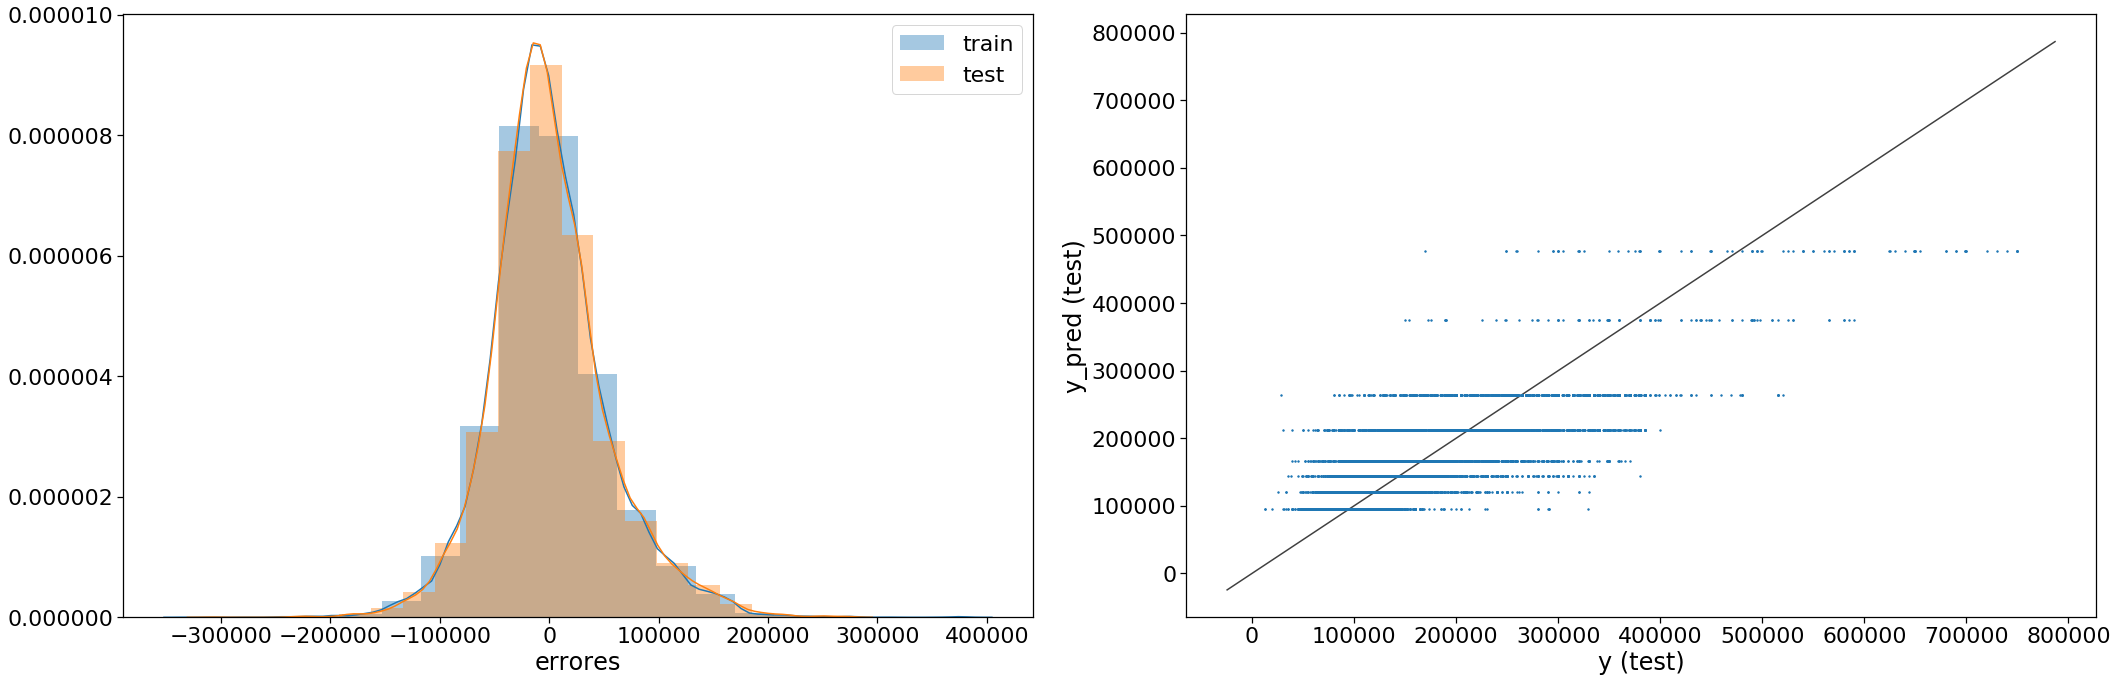

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 57592.439413978485
Raíz del error cuadrático medio en Test: 58103.26522672379


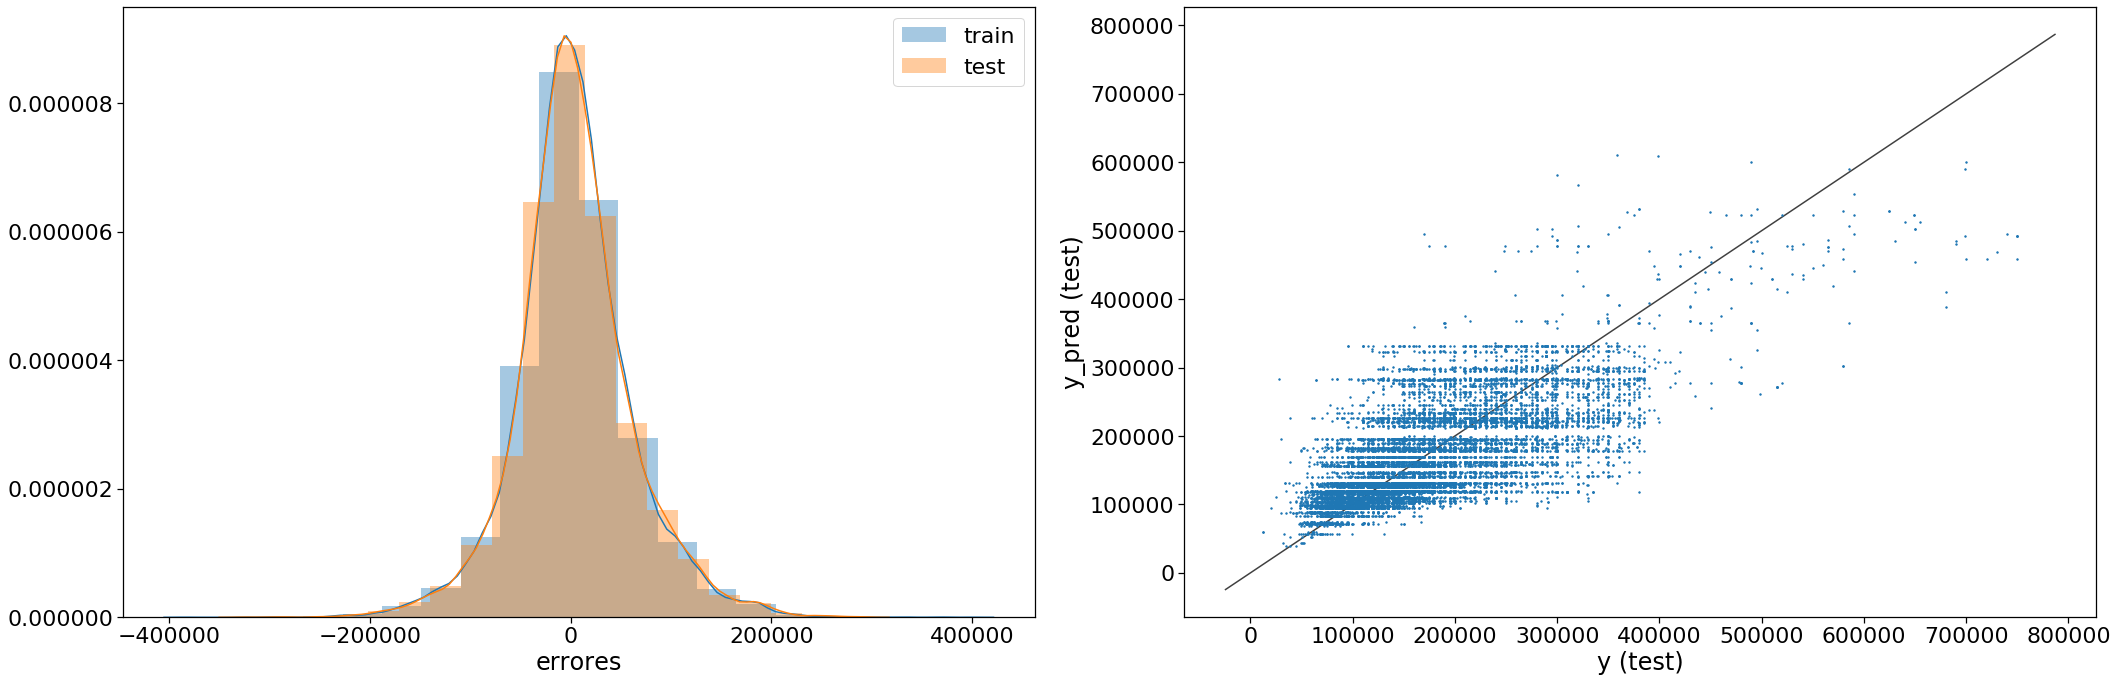

In [93]:
graphSquaredError(linear_model1, tree_regressor1, knn_regressor1, X1_train, X1_test, y_train, y_test)

Para la evalución del modelo usamos RMSE o Raiz de error cuadrático medio, esta es la función de error 
más básica y usada. Se define como el valor medio de los cuadrados de la diferencia entre los valores predichos y los 
valores reales. RMSE cuantifica cuán diferente es un conjunto de valores. Cuanto más pequeño es un valor RMSE, más 
cercanos son los valores predichos y observados. Se toma la raíz cuadrada para que el error tenga las mismas unidades 
de lo que estamos midiendo. Entre otras razones he optado por esta técnica también porque es menos costosa computacionalmente y viene bien para otras técnicas de optimización tales como el gradiente descendiente.

Luego de aplicar nuestra técnica de evaluación (RMSE) observamos que aunque no son los mejores resultados, no son malos, y
debemos tener en cuenta que hasta ahora estamos solo usando un modelo muy simple, adicional también podemos observar que los 
mejores resultados los da con los arboles de decisión, importante para tenerlo en cuenta más adelante. Adicional 
me gustaría anotar, que previo a las correcciones mi modelo simple solo alcanzaba un valor a 70000 en el RMSE y con dar
un mejor trato al pre procesamiento de los datos como por ejemplo mejor tratamiento de outliers (pase de ZScore a IQR) 
teniendo en cuenta el tipo de propiedad los resultados son más satisfactorios.

#### Ahora partiendo de lo aprendido en mi modelo Benchmark mejoresmos lo que tenemos hasta ahora####

### <span style="color:green">Iniciando predición con mas de un atributo en X (X2)</span>

In [94]:
X2 = df_ml_wr[['rooms','surface_covered','bedrooms','location_code']]

In [95]:
X2_train, X2_test, y_train, y_test = train_test_split(
    X2, y, test_size=0.30, random_state=42)

In [96]:
print(X2_train.shape, y_train.shape, X2_test.shape, y_test.shape)

(38398, 4) (38398,) (16457, 4) (16457,)


In [97]:
linear_model = LinearRegression()
#tree_regressor = DecisionTreeRegressor(max_depth=3, random_state=42)
#tree_regressor = DecisionTreeRegressor(max_leaf_nodes=1500,random_state=0) 
#tree_regressor = DecisionTreeRegressor(max_leaf_nodes=4500,max_depth=4,random_state=0) 
tree_regressor = DecisionTreeRegressor(max_leaf_nodes=4505,max_depth=3,random_state=42) 

knn_regressor = KNeighborsRegressor(n_neighbors=2)

In [98]:
linear_model.fit(X2_train, y_train)
tree_regressor.fit(X2_train, y_train)
knn_regressor.fit(X2_train, y_train)

KNeighborsRegressor(n_neighbors=2)

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 55547.87928516247
Raíz del error cuadrático medio en Test: 54763.78154017839


<Figure size 2160x720 with 0 Axes>

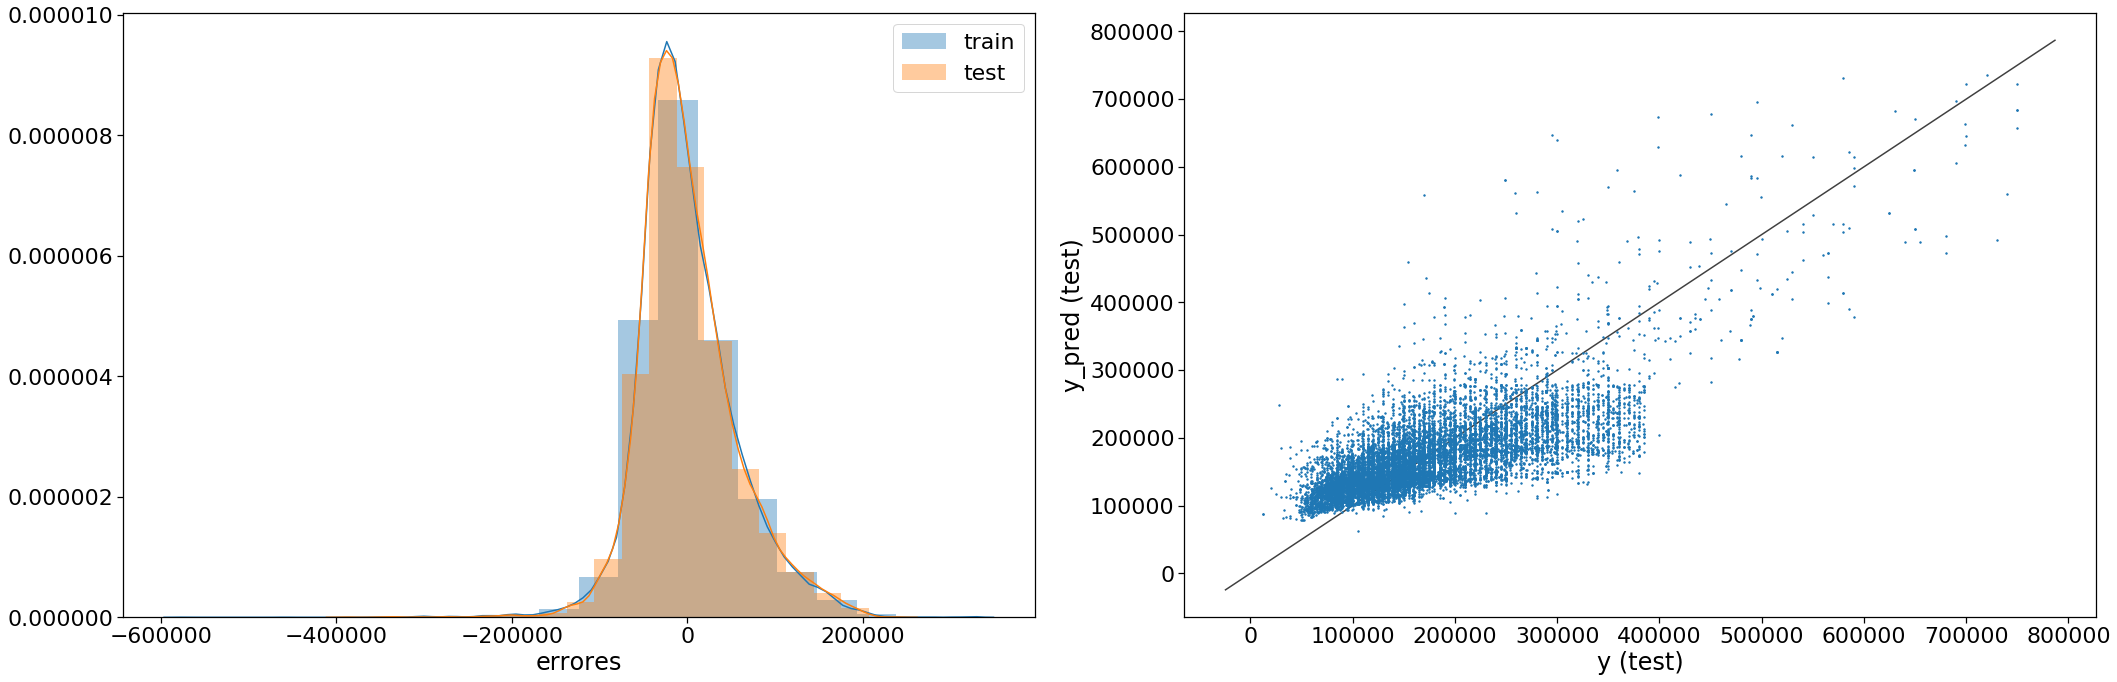

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 53494.71026988979
Raíz del error cuadrático medio en Test: 53398.45975646313


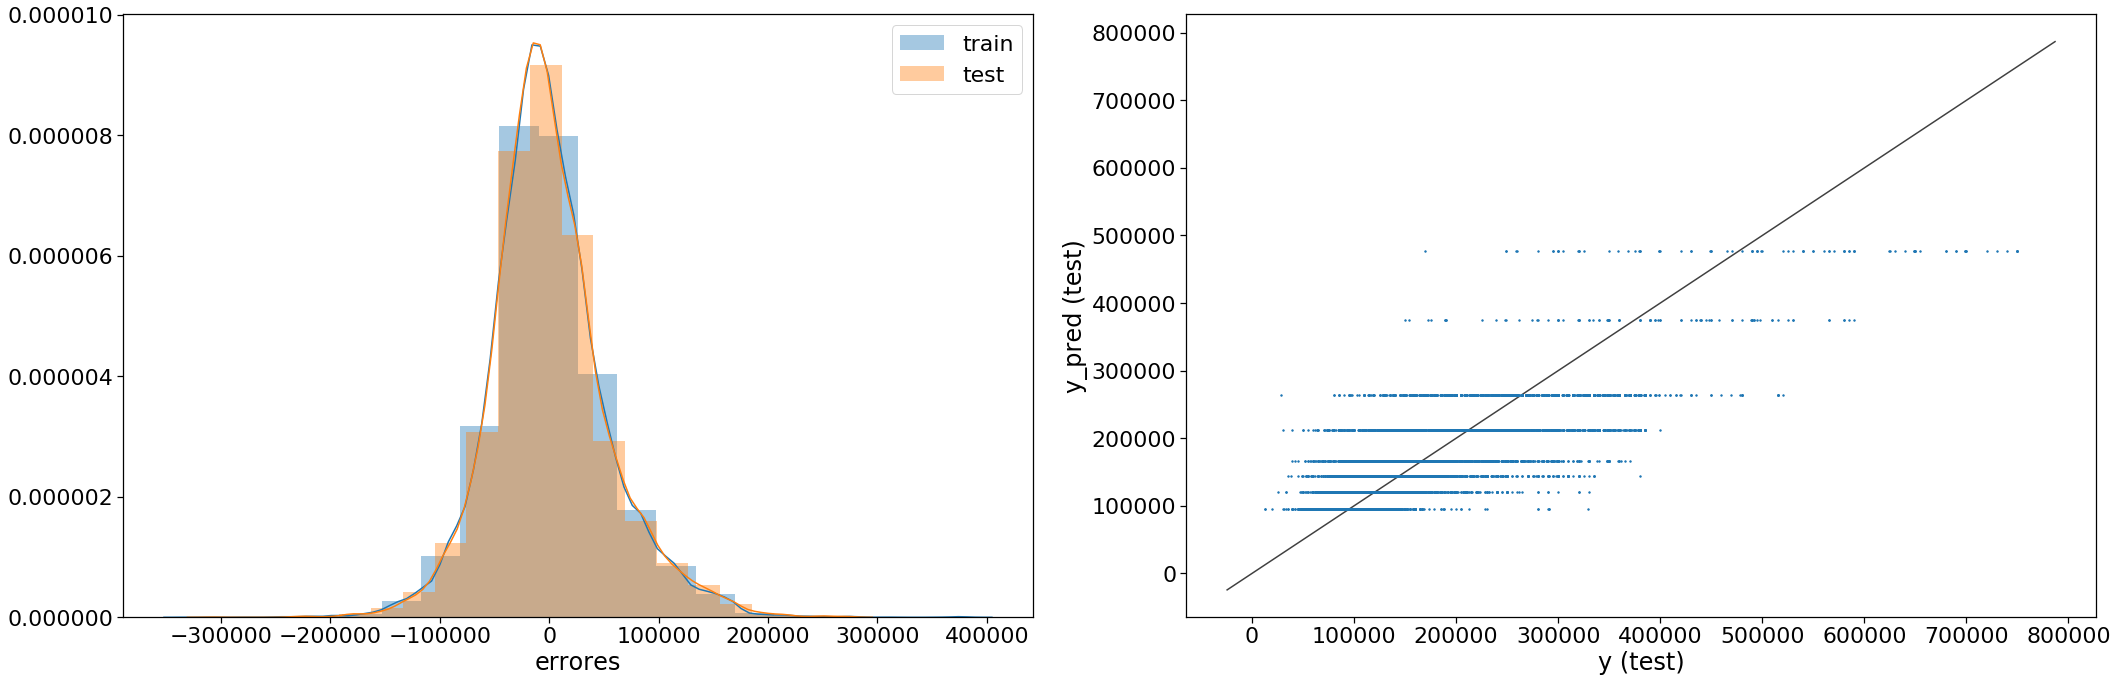

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 37260.15032918982
Raíz del error cuadrático medio en Test: 44647.43391115643


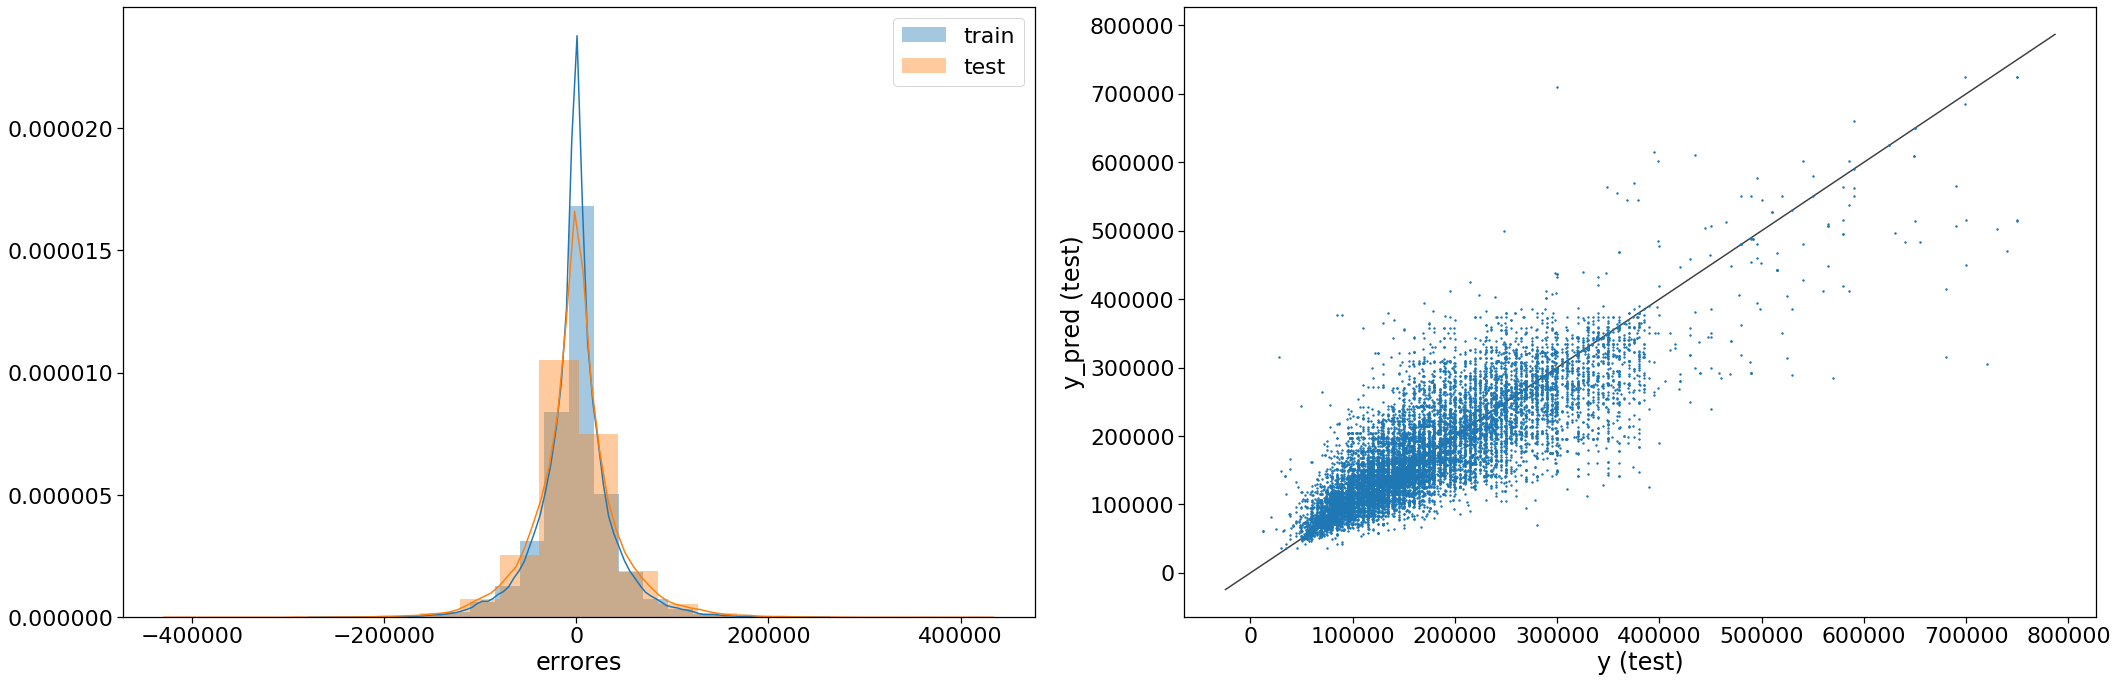

In [99]:
sns.set_context("notebook", font_scale=2)
plt.figure(figsize=(30,10))


graphSquaredError(linear_model, tree_regressor, knn_regressor, X2_train, X2_test, y_train, y_test)

Observamos que nuestro modelo sigue mejorando, no podemos dejarnos engañar por los resultados, observamos en con KNN con los
datos de entrenamiento nos da muy buen resultado pero con el set de test muy pobres, eso nos puede ir llevando a un 
overfitting, por esa razón a mi parecer los mejores resultados los sigue dando los arboles de decisión, mejor RMSE y resultados
más consistentes.

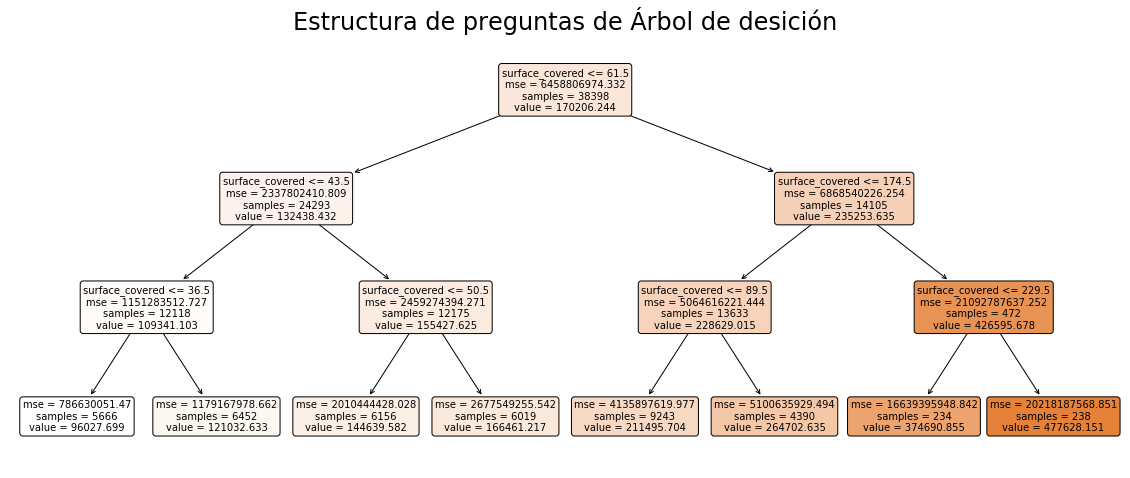

In [100]:
from sklearn import tree

if tree_regressor.max_depth < 4:
    plt.figure(figsize = (20,8))
    tree.plot_tree(tree_regressor, filled = True, feature_names = X2.columns, rounded = True)
    plt.title("Estructura de preguntas de Árbol de desición")    
    plt.show()

In [101]:
def get_mae(leaf_nodes,train_x,test_x,train_y,test_y):
    model = DecisionTreeRegressor(max_leaf_nodes=leaf_nodes,random_state=0)
    model.fit(train_x,train_y)
    a = model.predict(test_x)
    mae = mean_absolute_error(test_y,a)
    return(mae)

In [102]:
for leaf_nodes in np.arange(5,5000,500):
    mae = get_mae(leaf_nodes,X2_train,X2_test,y_train,y_test)    
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(leaf_nodes, mae))    

Max leaf nodes: 5  		 Mean Absolute Error:  40877
Max leaf nodes: 505  		 Mean Absolute Error:  28505
Max leaf nodes: 1005  		 Mean Absolute Error:  27572
Max leaf nodes: 1505  		 Mean Absolute Error:  27138
Max leaf nodes: 2005  		 Mean Absolute Error:  26860
Max leaf nodes: 2505  		 Mean Absolute Error:  26633
Max leaf nodes: 3005  		 Mean Absolute Error:  26553
Max leaf nodes: 3505  		 Mean Absolute Error:  26490
Max leaf nodes: 4005  		 Mean Absolute Error:  26329
Max leaf nodes: 4505  		 Mean Absolute Error:  26198


### <span style="color:blue">Optimización de Modelos de Machine Learning con Hiper-Parametros</span>

### K-Neighbors Regression

In [103]:
# Definimos las listas vacias para almacenar los valores de RMSE
list_rmse_train = []
list_rmse_test = []

# Definimos la lista de valores de k que vamos a explorar
k_nneighbor = np.arange(1,25,1)
#[1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50]

# Iteramos usando distintos valores para el parametro n_neighbors 
for k in k_nneighbor:
    
    # Definir el modelo con el valor de vecinos deseado
    knn_regresor = KNeighborsRegressor(n_neighbors= k)
    
    # Entrenamiento
    knn_regresor.fit(X2_train,y_train)
    
    # Predecir y evaluar con datos de entrenamiento
    y_train_pred = knn_regresor.predict(X2_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    # Predecir y evaluar con datos de test
    y_test_pred = knn_regresor.predict(X2_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    list_rmse_train.append(rmse_train)
    list_rmse_test.append(rmse_test)

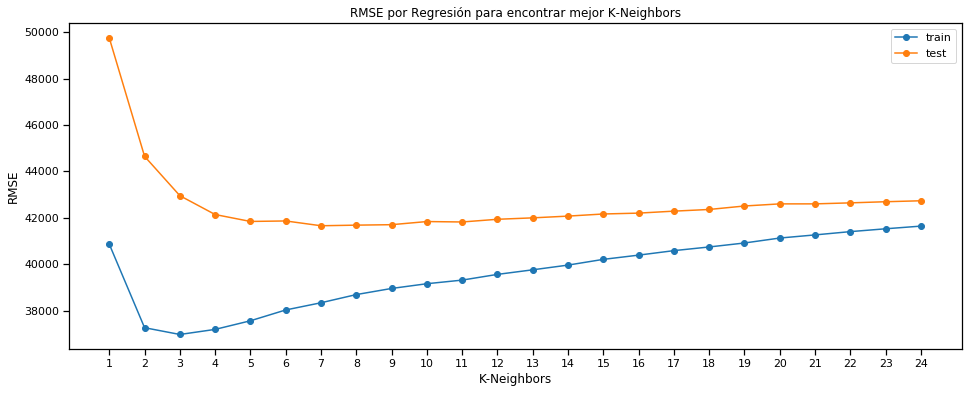

In [104]:
sns.set_context("notebook", font_scale=1)
fig = plt.figure(figsize=(16,6))
plt.plot(k_nneighbor,list_rmse_train,'o-',label='train' )
plt.plot(k_nneighbor,list_rmse_test,'o-',label='test')
plt.title("RMSE por Regresión para encontrar mejor K-Neighbors")
plt.xticks(k_nneighbor)
plt.xlabel("K-Neighbors")
plt.ylabel("RMSE")
plt.legend()

In [105]:
print(f"El valor del n_neighbors seleccionado es {list_rmse_test.index(min(list_rmse_test))+1}")
print("El valor de RMSE para train que minimiza el error en test es",list_rmse_train[list_rmse_test.index(min(list_rmse_test))])
print("El valor mínimo de RMSE para test es",list_rmse_test[list_rmse_test.index(min(list_rmse_test))])

knn_regressor_hyper = KNeighborsRegressor(n_neighbors= list_rmse_test.index(min(list_rmse_test))+1)
knn_regressor_hyper.fit(X2_train, y_train)

El valor del n_neighbors seleccionado es 7
El valor de RMSE para train que minimiza el error en test es 38335.77082645282
El valor mínimo de RMSE para test es 41655.46952176263


KNeighborsRegressor(n_neighbors=7)

Raíz del error cuadrático medio en Train: 38335.77082645282
Raíz del error cuadrático medio en Test: 41655.46952176263


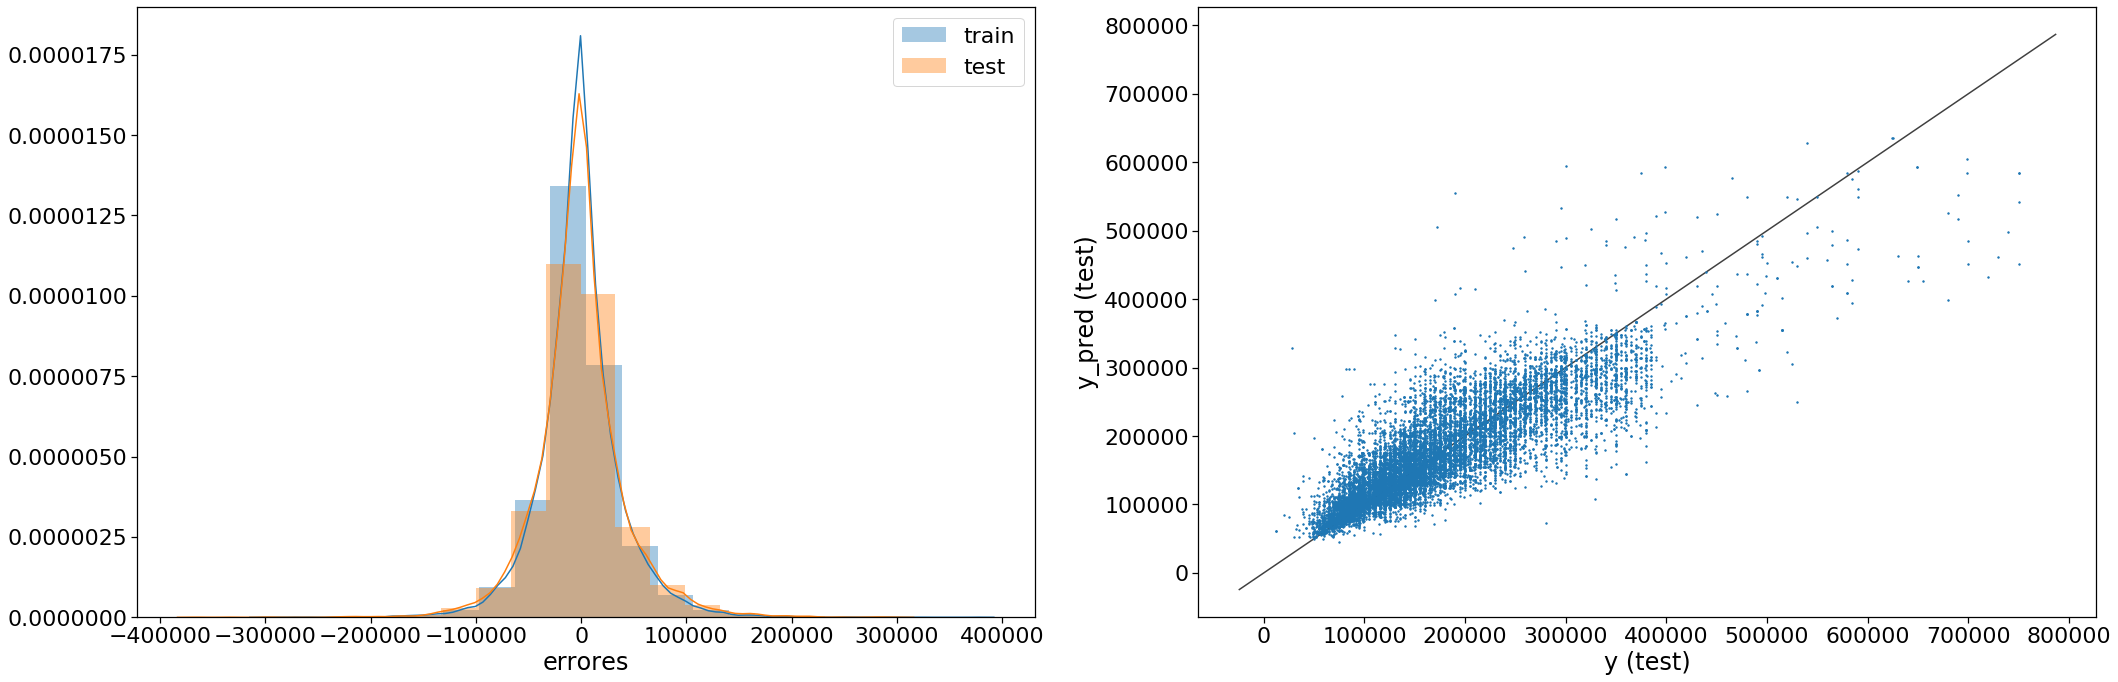

In [106]:
graphSquaredErrorRFR(knn_regressor_hyper,X2_train, X2_test, y_train, y_test)

### Decision Tree Regressor

In [107]:
list_rmse_train = []
list_rmse_test = []

# Lista de posibles max_depth que vamos a testear
max_depths = np.arange(1,25,1)

# Se iteran para encontrar la mejor profundidad
for max_depth in max_depths:
    
    tree = DecisionTreeRegressor(max_depth= max_depth, random_state=42)
    
    tree.fit(X2_train,y_train)
    
    # Predecir y evaluar con datos de entrenamiento
    y_train_pred = tree.predict(X2_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    # Predecir y evaluar con datos de test
    y_test_pred = tree.predict(X2_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    list_rmse_train.append(rmse_train)
    list_rmse_test.append(rmse_test)

Text(0, 0.5, 'RMSE')

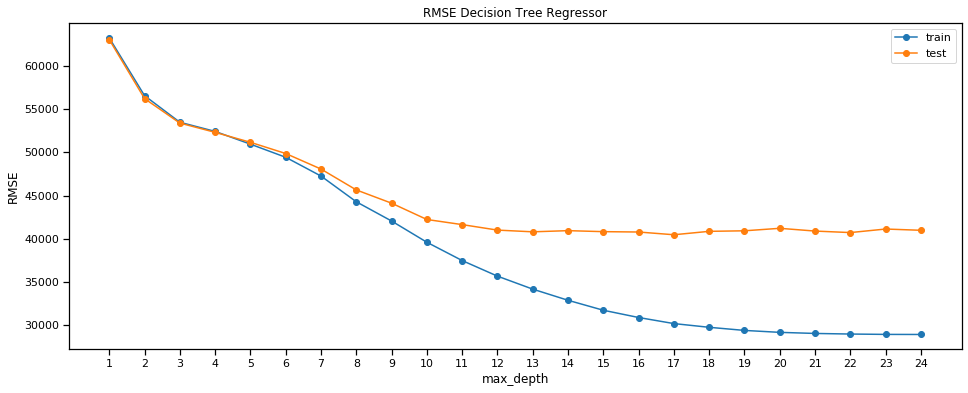

In [108]:
sns.set_context("notebook", font_scale=1)
fig = plt.figure(figsize=(16,6))
plt.plot(max_depths,list_rmse_train,'o-',label='train' )
plt.plot(max_depths,list_rmse_test,'o-',label='test')
plt.legend()
plt.title("RMSE Decision Tree Regressor")
plt.xticks(max_depths)
plt.xlabel("max_depth")
plt.ylabel("RMSE")

In [109]:
print(f"El valor del max_depth seleccionado es {list_rmse_test.index(min(list_rmse_test))+1}")
print("El valor de RMSE para train que minimiza el error en test es",list_rmse_train[list_rmse_test.index(min(list_rmse_test))])
print("El valor mínimo de RMSE para test es",list_rmse_test[list_rmse_test.index(min(list_rmse_test))])

tree_regressor_hyper = DecisionTreeRegressor(max_depth= list_rmse_test.index(min(list_rmse_test))+1)
tree_regressor_hyper.fit(X2_train, y_train)

El valor del max_depth seleccionado es 17
El valor de RMSE para train que minimiza el error en test es 30161.066852305612
El valor mínimo de RMSE para test es 40456.2064307054


DecisionTreeRegressor(max_depth=17)

Raíz del error cuadrático medio en Train: 30161.066852305612
Raíz del error cuadrático medio en Test: 40700.15849045434


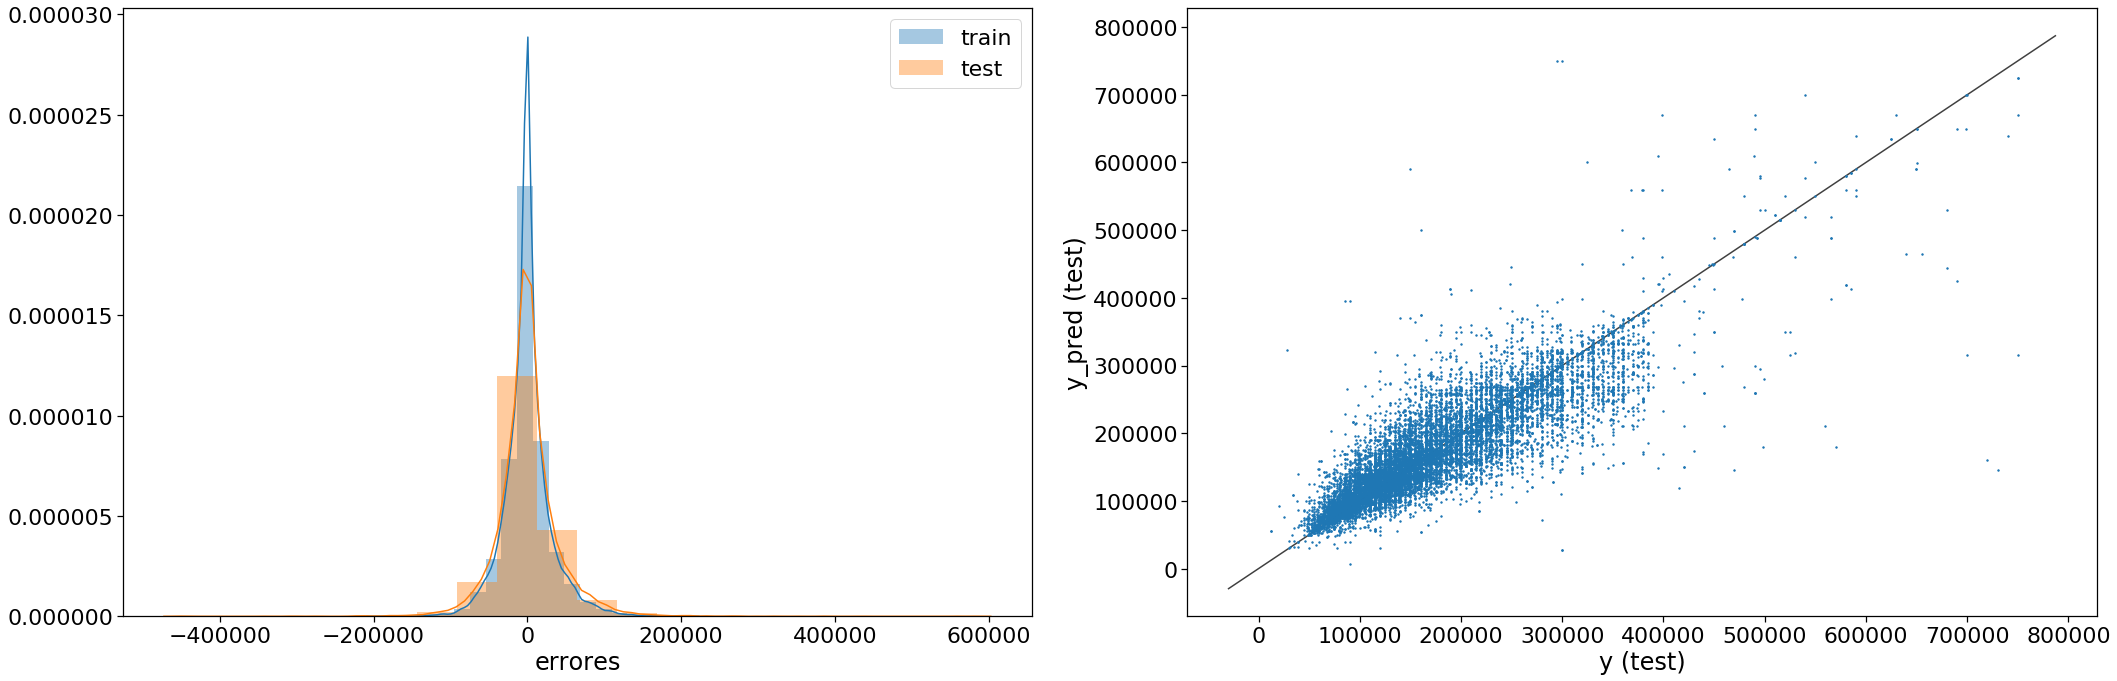

In [110]:
graphSquaredErrorRFR(tree_regressor_hyper,X2_train, X2_test, y_train, y_test)

Al hacer el tuning del arbol se observa que luego de profundidad 13 el error en test es similar, por ende utilizando el principio de parsimonia o navaja de ockham (ante errores similares (no tenga diferencias significativas) selecciono el modelo más simple), selecciono el modelo con max_depth igual a 13, que incluso me ofrece menor diferencia entre el RMSE de train y test. 

In [111]:
tree_regressor_hyper_2 = DecisionTreeRegressor(max_depth= 13)
tree_regressor_hyper_2.fit(X2_train, y_train)

DecisionTreeRegressor(max_depth=13)

Raíz del error cuadrático medio en Train: 34153.25318687905
Raíz del error cuadrático medio en Test: 40805.17967984064


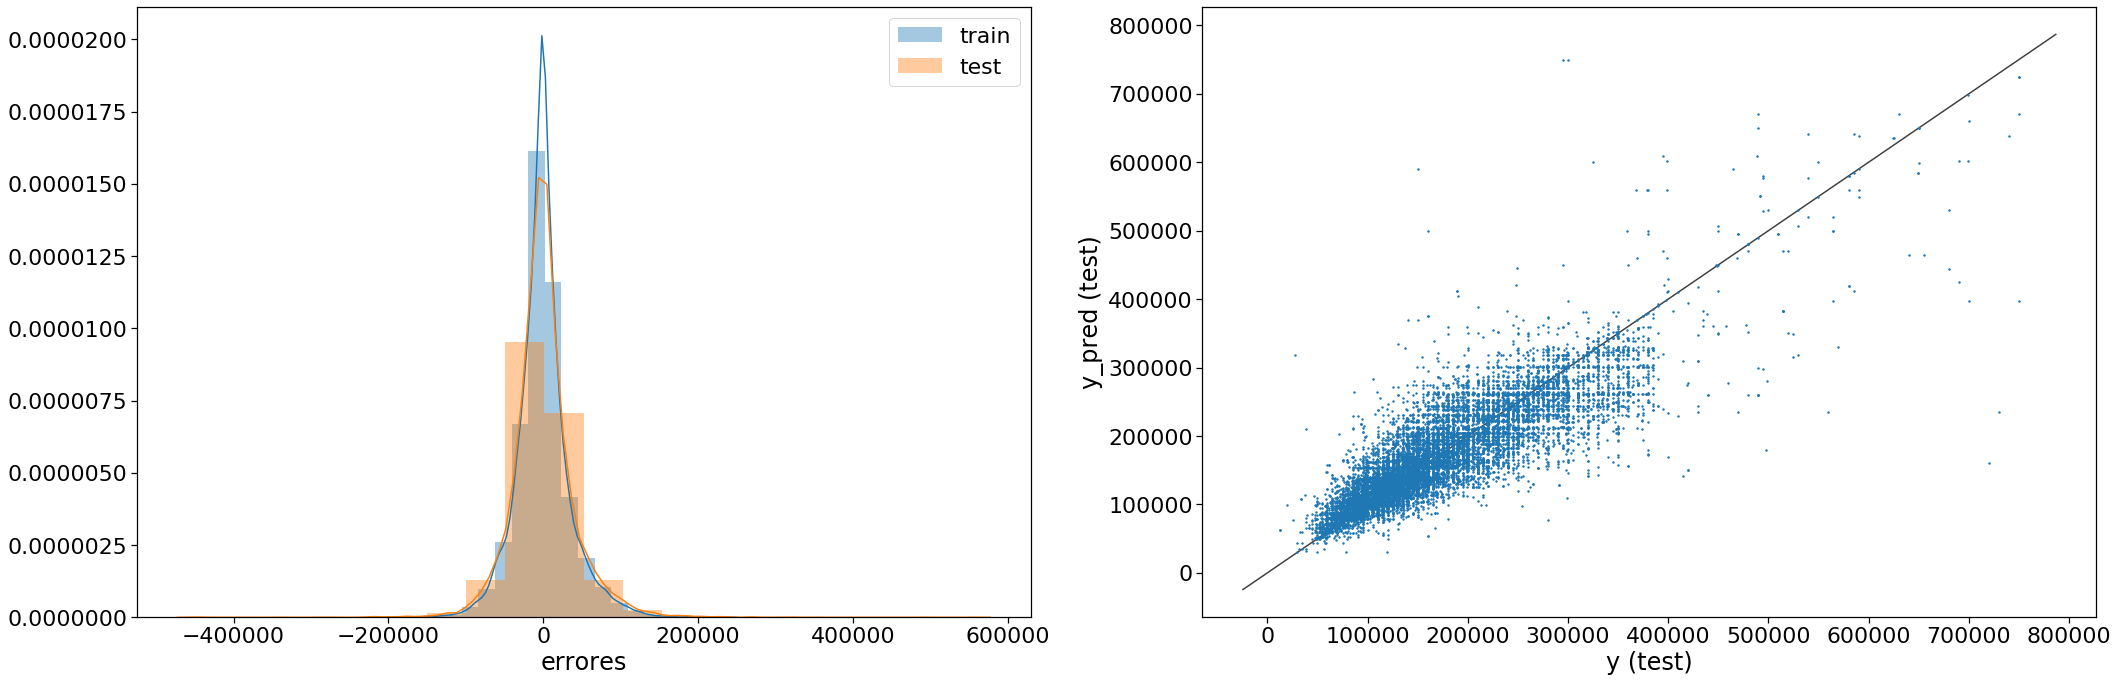

In [112]:
graphSquaredErrorRFR(tree_regressor_hyper_2,X2_train, X2_test, y_train, y_test)

In [113]:
from sklearn.model_selection import GridSearchCV
param_grid = {"min_samples_split": [10, 20, 40],
              "max_depth": np.arange(1,20,1),
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": np.arange(5,5000,500),
              }

## Comment in order to publish in kaggle.

grid_cv_dtm = GridSearchCV(tree_regressor_hyper_2, param_grid, cv=5)

grid_cv_dtm.fit(X2_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(max_depth=13),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'max_leaf_nodes': array([   5,  505, 1005, 1505, 2005, 2505, 3005, 3505, 4005, 4505]),
                         'min_samples_leaf': [20, 40, 100],
                         'min_samples_split': [10, 20, 40]})

In [114]:
print("R-Squared::{}".format(grid_cv_dtm.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_dtm.best_params_))

R-Squared::0.7312499863325982
Best Hyperparameters::
{'max_depth': 19, 'max_leaf_nodes': 2005, 'min_samples_leaf': 20, 'min_samples_split': 40}


In [115]:
tree_regressor_hyper_3 = DecisionTreeRegressor(max_depth= 14, max_leaf_nodes= 2505, min_samples_leaf= 20, min_samples_split= 20)
tree_regressor_hyper_3.fit(X2_train, y_train)

DecisionTreeRegressor(max_depth=14, max_leaf_nodes=2505, min_samples_leaf=20,
                      min_samples_split=20)

Raíz del error cuadrático medio en Train: 38853.691019905425
Raíz del error cuadrático medio en Test: 39948.218081640545


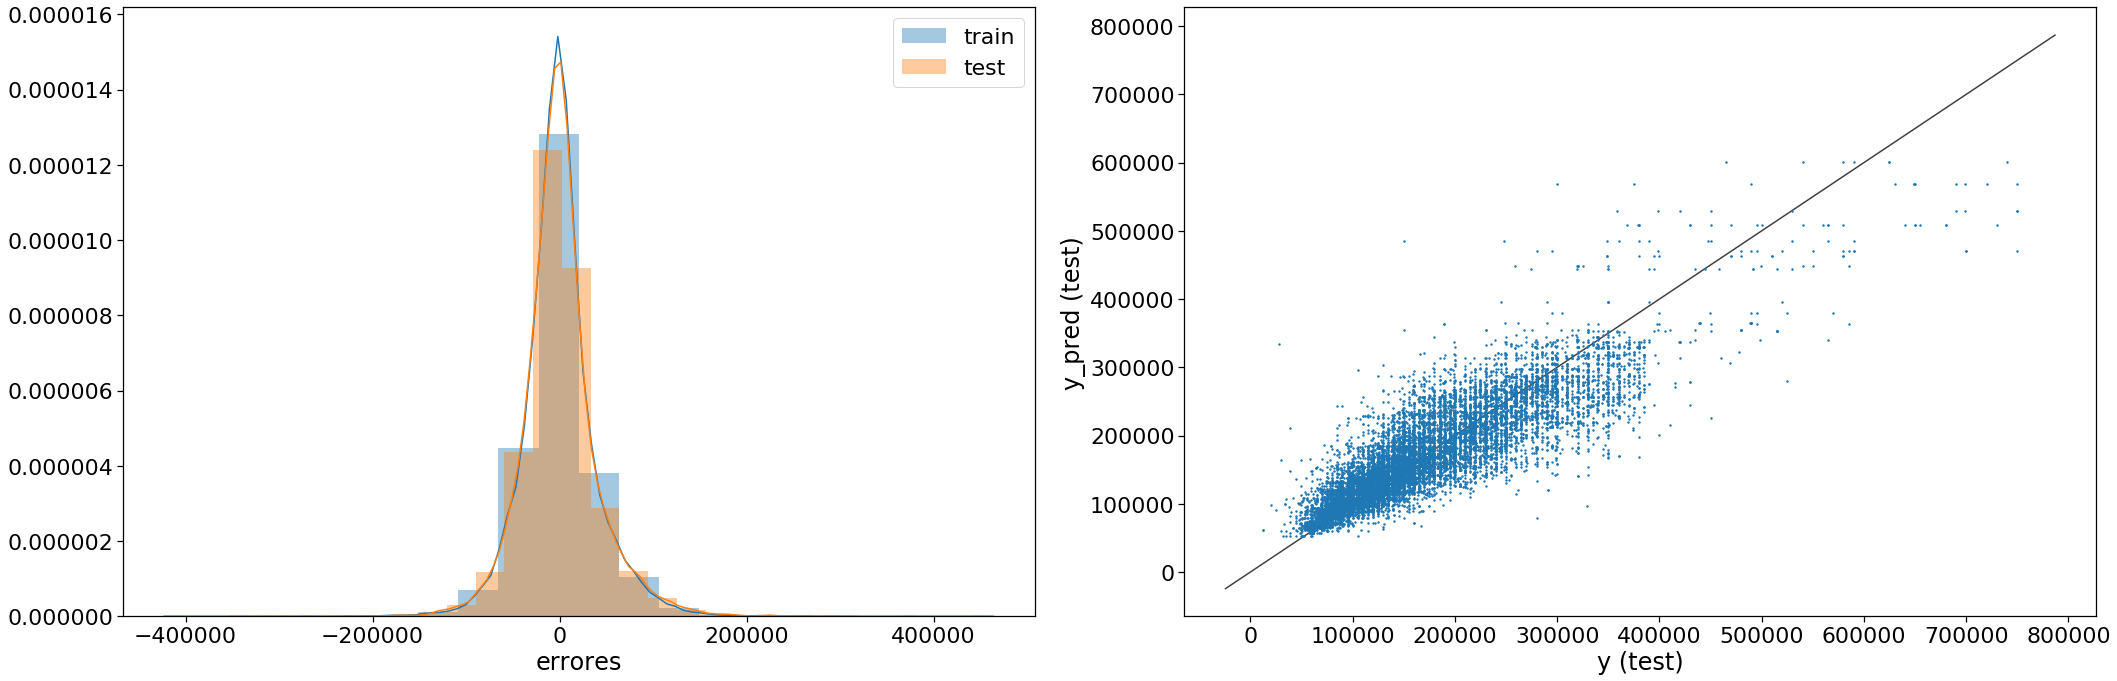

In [116]:
graphSquaredErrorRFR(tree_regressor_hyper_3,X2_train, X2_test, y_train, y_test)

### <span style="color:blue">  RandomForestRegressor</span>

In [117]:
from sklearn.ensemble import RandomForestRegressor

forest_regressor = RandomForestRegressor(random_state = 42)
forest_regressor.fit(X2_train,y_train)
a=forest_regressor.predict(X2_test)
mean_absolute_error(y_test,a)

25338.19878023847

Raíz del error cuadrático medio en Train: 29798.61944521222
Raíz del error cuadrático medio en Test: 37683.26642659323


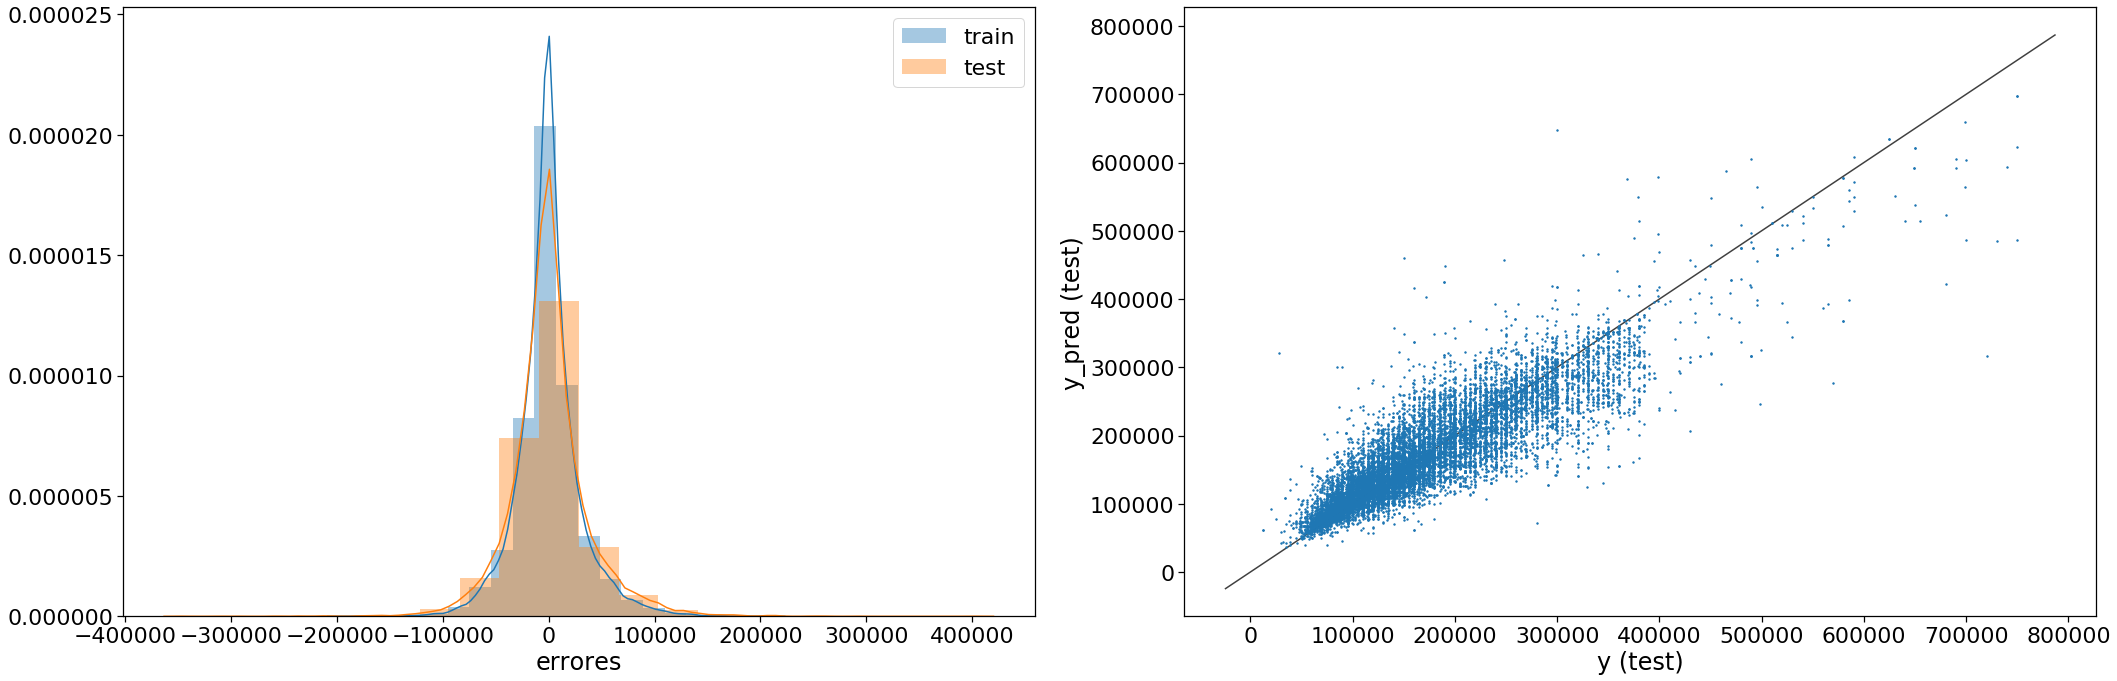

In [118]:
graphSquaredErrorRFR(forest_regressor,X2_train, X2_test, y_train, y_test)

In [119]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(forest_regressor.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [120]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [121]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X2_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 17.5min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 90.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 152.4min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [122]:
rf_random.best_params_

{'n_estimators': 1800,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': True}

In [123]:
rf_hyper = RandomForestRegressor(n_estimators= 1800,
 min_samples_split= 2,
 min_samples_leaf= 2,
 max_features='auto',
 max_depth= 80,
 bootstrap= True)


In [124]:
rf_hyper.fit(X2_train,y_train)


RandomForestRegressor(max_depth=80, min_samples_leaf=2, n_estimators=1800)

Raíz del error cuadrático medio en Train: 31610.571366288597
Raíz del error cuadrático medio en Test: 37497.566268089344


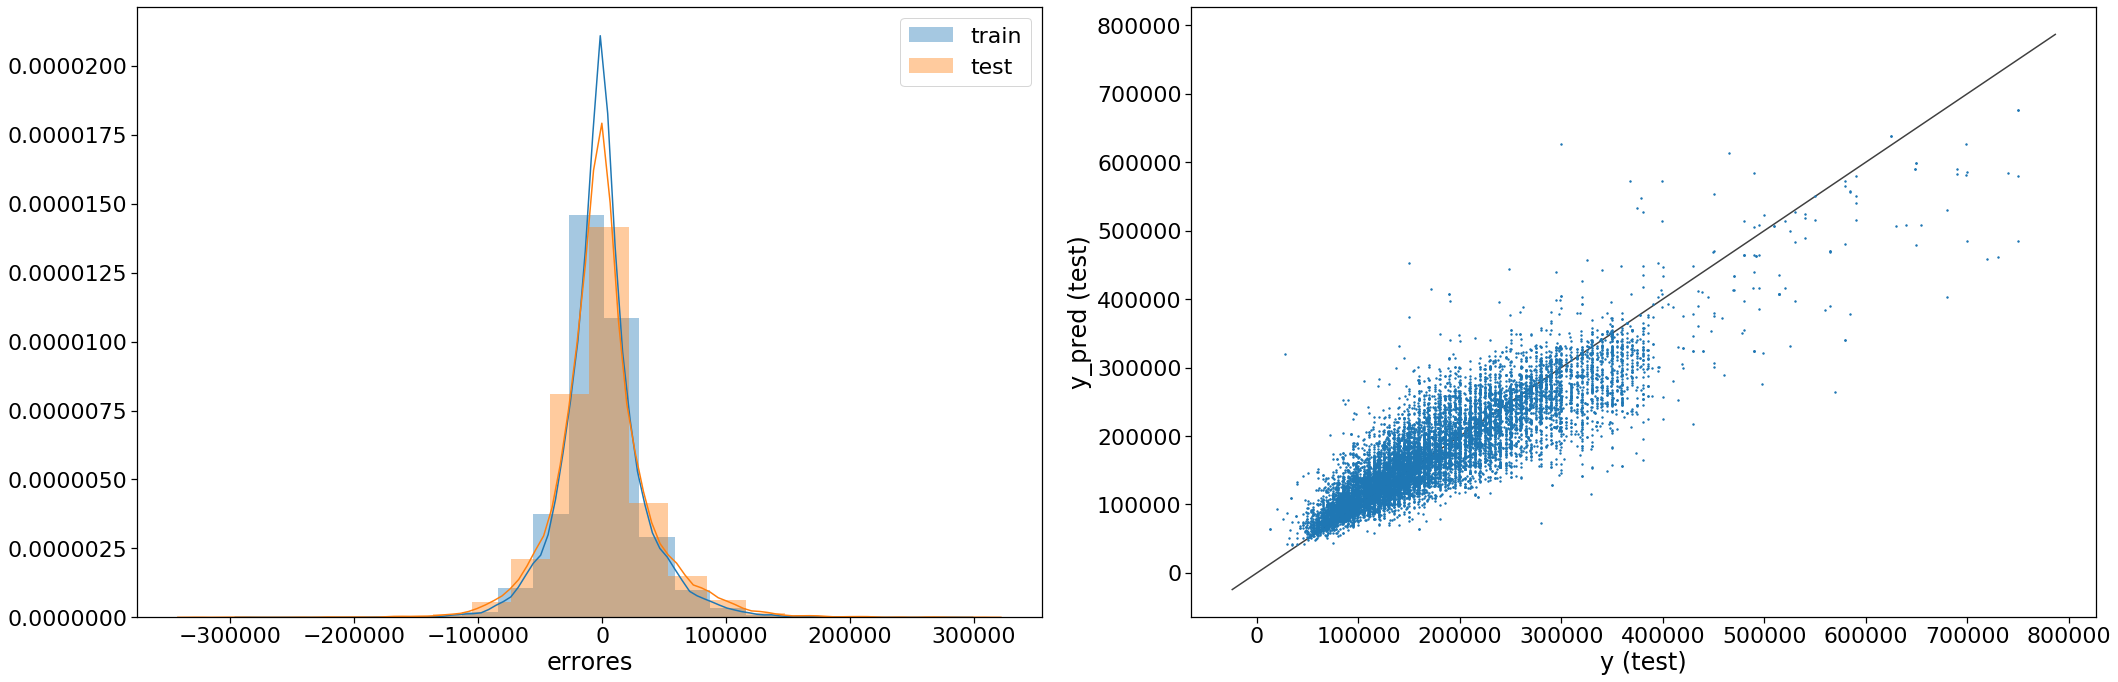

In [125]:
graphSquaredErrorRFR(rf_hyper,X2_train, X2_test, y_train, y_test)

### <span style="color:blue">  Conclusiones</span>

Luego de hacer pruebas con los diferentes algoritmos y jugando con sus diferentes parametros, selecciono el algoritmo K-Neighbors Regression versión optimizada debido a que tiene menor error, mejor predicción y tiene un balance entre prediciones con datos de test y datos de entrenamiento lo que lo aleja de underfitting y overfitting, como si pasa en los otros medelos. Sobre  las variables elegidas opto por ['rooms','surface_covered','bedrooms','location_code'], lo anterior luego de probar con multiples combinaciones de variables con alta correlación. Esta combinación es la que me ofrece mejores prediciones  luego de curar un poco más el data set.

¿Qué información no estás usando que podría ayudar al modelo? 
La variable l3 indica la provincia donde esta localizada la propiedad, pero esta puede llegar a ser muy extensa y podría
haber variedad de precios teniendo en cuenta el barrio exacto o bloque de propiedades. Hice el intento de usar la posición
geografica exacta pero esta también me retorna una referencia extensa que en muchos casos de hecho no conincide con el valor
l3, lo que también habria que revisar en el data set.

¿Qué información puede estar demás o repetida?
Al principio podría pensar que la posición geografica pero esta quizas con un poco más de precisión de la librería dando el
barrio exacto podría ser de suma utilidad. 

In [126]:
stringImage="/9j/4AAQSkZJRgABAQEAYABgAAD/4REKRXhpZgAATU0AKgAAAAgABAE7AAIAAAAVAAAISodpAAQAAAABAAAIYJydAAEAAAAqAAAQ2OocAAcAAAgMAAAAPgAAAAAc6gAAAAgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFNhbW15IENhYnJlcmEgTW9yZW5vAAAABZADAAIAAAAUAAAQrpAEAAIAAAAUAAAQwpKRAAIAAAADNjEAAJKSAAIAAAADNjEAAOocAAcAAAgMAAAIogAAAAAc6gAAAAgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADIwMjA6MDg6MDEgMDY6NTM6MzkAMjAyMDowODowMSAwNjo1MzozOQAAAFMAYQBtAG0AeQAgAEMAYQBiAHIAZQByAGEAIABNAG8AcgBlAG4AbwAAAP/hCydodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvADw/eHBhY2tldCBiZWdpbj0n77u/JyBpZD0nVzVNME1wQ2VoaUh6cmVTek5UY3prYzlkJz8+DQo8eDp4bXBtZXRhIHhtbG5zOng9ImFkb2JlOm5zOm1ldGEvIj48cmRmOlJERiB4bWxuczpyZGY9Imh0dHA6Ly93d3cudzMub3JnLzE5OTkvMDIvMjItcmRmLXN5bnRheC1ucyMiPjxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PSJ1dWlkOmZhZjViZGQ1LWJhM2QtMTFkYS1hZDMxLWQzM2Q3NTE4MmYxYiIgeG1sbnM6ZGM9Imh0dHA6Ly9wdXJsLm9yZy9kYy9lbGVtZW50cy8xLjEvIi8+PHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9InV1aWQ6ZmFmNWJkZDUtYmEzZC0xMWRhLWFkMzEtZDMzZDc1MTgyZjFiIiB4bWxuczp4bXA9Imh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC8iPjx4bXA6Q3JlYXRlRGF0ZT4yMDIwLTA4LTAxVDA2OjUzOjM5LjYwNzwveG1wOkNyZWF0ZURhdGU+PC9yZGY6RGVzY3JpcHRpb24+PHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9InV1aWQ6ZmFmNWJkZDUtYmEzZC0xMWRhLWFkMzEtZDMzZDc1MTgyZjFiIiB4bWxuczpkYz0iaHR0cDovL3B1cmwub3JnL2RjL2VsZW1lbnRzLzEuMS8iPjxkYzpjcmVhdG9yPjxyZGY6U2VxIHhtbG5zOnJkZj0iaHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyI+PHJkZjpsaT5TYW1teSBDYWJyZXJhIE1vcmVubzwvcmRmOmxpPjwvcmRmOlNlcT4NCgkJCTwvZGM6Y3JlYXRvcj48L3JkZjpEZXNjcmlwdGlvbj48L3JkZjpSREY+PC94OnhtcG1ldGE+DQogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgIDw/eHBhY2tldCBlbmQ9J3cnPz7/2wBDAAcFBQYFBAcGBQYIBwcIChELCgkJChUPEAwRGBUaGRgVGBcbHichGx0lHRcYIi4iJSgpKywrGiAvMy8qMicqKyr/2wBDAQcICAoJChQLCxQqHBgcKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKir/wAARCAKVBK4DASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD0uK8uVhRVmIAUADavH6U77dd/892/75X/AAqsn+rX6CnV6fKux4TqzvuT/brv/nu3/fK/4Ufbrv8A57t/3yv+FQUUcq7C9rU7k/267/57t/3yv+FH267/AOe7f98r/hUFFHKuwe1qdyf7dd/892/75X/Cj7dd/wDPdv8Avlf8Kgoo5V2D2tTuT/brv/nu3/fK/wCFH267/wCe7f8AfK/4VBRRyrsHtancn+3Xf/Pdv++V/wAKPt13/wA92/75X/CoKKOVdg9rU7k/267/AOe7f98r/hR9uu/+e7f98r/hUFFHKuwe1qdyf7dd/wDPdv8Avlf8KPt13/z3b/vlf8Kgoo5V2D2tTuT/AG67/wCe7f8AfK/4Vm6Xrd9dalrMLyhVtL1YUKqMsDbwvk++XI4xwB9at1iaD/yGvEv/AGE0/wDSO2pOKKVWdnqdF9uu/wDnu3/fK/4Ufbrv/nu3/fK/4VBRT5V2J9rU7k/267/57t/3yv8AhR9uu/8Anu3/AHyv+FQUUcq7B7Wp3J/t13/z3b/vlf8ACj7dd/8APdv++V/wqCijlXYPa1O5U8Sa3fab4V1a+hlDyWtlNMiyKNrFUJAOMHHHYitL7dd/892/75X/AArnfGn/ACIPiD/sGXP/AKKatulyq5XtZ8t7k/267/57t/3yv+FH267/AOe7f98r/hUFFPlXYn2tTuT/AG67/wCe7f8AfK/4Ufbrv/nu3/fK/wCFQUUcq7B7Wp3J/t13/wA92/75X/Cj7dd/892/75X/AAqCijlXYPa1O5P9uu/+e7f98r/hR9uu/wDnu3/fK/4VBRRyrsHtancn+3Xf/Pdv++V/wo+3Xf8Az3b/AL5X/CoKKOVdg9rU7k/267/57t/3yv8AhR9uu/8Anu3/AHyv+FQUUcq7B7Wp3J/t13/z3b/vlf8ACj7dd/8APdv++V/wqCijlXYPa1O5P9uu/wDnu3/fK/4Ufbrv/nu3/fK/4VBRRyrsHtancqQa3fSeKr6xMoEcNlbTKwUbiXecEHtgeWMcdz7Y0vt13/z3b/vlf8K521/5H7Vf+wZZf+jbqtukooqVWae5P9uu/wDnu3/fK/4Ufbrv/nu3/fK/4VBRT5V2J9rU7k/267/57t/3yv8AhR9uu/8Anu3/AHyv+FQUUcq7B7Wp3J/t13/z3b/vlf8ACj7dd/8APdv++V/wqCijlXYPa1O5P9uu/wDnu3/fK/4Ufbrv/nu3/fK/4VBRRyrsHtancn+3Xf8Az3b/AL5X/Cj7dd/892/75X/CoKKOVdg9rU7k/wBuu/8Anu3/AHyv+FH267/57t/3yv8AhUFFHKuwe1qdyp4k1u+03wrq19DKHktbKaZFkUbWKoSAcYOOOxFaX267/wCe7f8AfK/4VzvjT/kQfEH/AGDLn/0U1bdLlVyvaz5b3J/t13/z3b/vlf8ACj7dd/8APdv++V/wqCinyrsT7Wp3J/t13/z3b/vlf8KPt13/AM92/wC+V/wqCijlXYPa1O5P9uu/+e7f98r/AIUgu7kSFxO24gAnavQZ9vc1DRRyrsHtancn+3Xf/Pdv++V/wqG71prC1e5vr+O2gjGXlmKIq9uSRgUlY/iqC5ufD7x2K5nM8BT92ZAMTIclQQSBjJ5HA6ik4pLRFRqzbSbNKLxRbT2sFzDrNrJBcyeVBKksZWV+flU9CeDwOeKlk10Q3Jt5tSijnWIzGJmQMIwcF8ddoPfpXB3mhXuoBLe7ikF22sPNLcxRFYgRaOI5kHO1ciPOSfnyMnio1srnVro6rr2k3kX23TrqKeGKMmSFA0AVBjudsjgdTk4B6VOnb+rf5mvNK697+tf8jtm8ZacunLqDeILEWTP5a3JuIvLLf3Q3TPB4q7Hqb31mskF4s9vMmVkjKsrqR1BA5HvXnt3Lf3ENnM8mqLbwamGXUINJZbpl+zSLueExHPJVd3lgEHgDGa7mxkE1hBIrzSBkHz3ERjkbjqylV2n2wPoKqKT6ETnOKWpe+3Xf/Pdv++V/wo+3Xf8Az3b/AL5X/CoKKfKuxn7Wp3J/t13/AM92/wC+V/wo+3Xf/Pdv++V/wqCijlXYPa1O5P8Abrv/AJ7t/wB8r/hR9uu/+e7f98r/AIVBRRyrsHtancn+3Xf/AD3b/vlf8KzfEmt32m+FdWvoZQ8lrZTTIsijaxVCQDjBxx2Iq3WJ40/5EHxB/wBgy5/9FNScVYqNWbklc6L7dd/892/75X/Cj7dd/wDPdv8Avlf8Kgop8q7E+1qdyf7dd/8APdv++V/wo+3Xf/Pdv++V/wAKgoo5V2D2tTuT/brv/nu3/fK/4Ufbrv8A57t/3yv+FQUUcq7B7Wp3J/t13/z3b/vlf8KPt13/AM92/wC+V/wqCijlXYPa1O5P9uu/+e7f98r/AIUfbrv/AJ7t/wB8r/hUFFHKuwe1qdyf7dd/892/75X/AAo+3Xf/AD3b/vlf8Kgoo5V2D2tTuT/brv8A57t/3yv+FH267/57t/3yv+FQUUcq7B7Wp3J/t13/AM92/wC+V/wo+3Xf/Pdv++V/wqCijlXYPa1O5P8Abrv/AJ7t/wB8r/hR9uu/+e7f98r/AIVBRRyrsHtancn+3Xf/AD3b/vlf8KPt13/z3b/vlf8ACoKKOVdg9rU7k/267/57t/3yv+FH267/AOe7f98r/hUFFHKuwe1qdyf7dd/892/75X/Cj7dd/wDPdv8Avlf8Kgoo5V2D2tTuT/brv/nu3/fK/wCFH267/wCe7f8AfK/4VBRRyrsHtancn+3Xf/Pdv++V/wAKPt13/wA92/75X/CoKKOVdg9rU7k/267/AOe7f98r/hR9uu/+e7f98r/hUFFHKuwe1qdyf7dd/wDPdv8Avlf8KPt13/z3b/vlf8Kgoo5V2D2tTuT/AG67/wCe7f8AfK/4Ufbrv/nu3/fK/wCFQUUcq7B7Wp3J/t13/wA92/75X/Cj7dd/892/75X/AAqCijlXYPa1O5P9uu/+e7f98r/hR9uu/wDnu3/fK/4VBRRyrsHtancn+3Xf/Pdv++V/wo+3Xf8Az3b/AL5X/CoKKOVdg9rU7k/267/57t/3yv8AhR9uu/8Anu3/AHyv+FQUUcq7B7Wp3J/t13/z3b/vlf8ACj7dd/8APdv++V/wqCijlXYPa1O5P9uu/wDnu3/fK/4Ufbrv/nu3/fK/4VBRRyrsHtancn+3Xf8Az3b/AL5X/Cj7dd/892/75X/CoKKOVdg9rU7k/wBuu/8Anu3/AHyv+FH267/57t/3yv8AhUFFHKuwe1qdyf7dd/8APdv++V/wo+3Xf/Pdv++V/wAKgoo5V2D2tTuZ66nd3Xiy+spJP3cFlbTKwUbiXecEHtj92Mcdz7Yv5l/57v8Akv8AhWLa/wDI/ar/ANgyy/8ARt1W3XFLL8LUk5Sgm2df17EwSjGegmZf+e7/AJL/AIUZl/57v+S/4UtFT/ZmD/59oP7RxX8/5CZl/wCe7/kv+FGZf+e7/kv+FLRR/ZmD/wCfaD+0cV/P+QmZf+e7/kv+FGZf+e7/AJL/AIUtFH9mYP8A59oP7RxX8/5CZl/57v8Akv8AhRmX/nu/5L/hS0Uf2Zg/+faD+0cV/P8AkJmX/nu/5L/hRmX/AJ7v+S/4UtFH9mYP/n2g/tHFfz/kJmX/AJ7v+S/4UZl/57v+S/4UtFH9mYP/AJ9oP7RxX8/5CZl/57v+S/4UZl/57v8Akv8AhS0Uf2Zg/wDn2g/tHFfz/kJmX/nu/wCS/wCFGZf+e7/kv+FLRR/ZmD/59oP7RxX8/wCQmZf+e7/kv+FP0V5bnxzaaY8zrDNp11cM6hdwaOS3UAcYwRK2eOw6c5bS+Hf+Sp6d/wBgW+/9H2dKWAw1Jc8IJNGtHG4ipNQnK6YxP9Wv0FOpqf6tfoKdXonmPcKKKKYgooooAKKKKACiiigAooooAKKKKACiiigArE0H/kNeJf8AsJp/6R21bdYmg/8AIa8S/wDYTT/0jtql7oqOzNuiiiqJMw67ar4nGhskouWthciQqPLILEbc5zu+UnGOg61Xs/FVjeiUxRXAEV+LDLIBucgEMOfuEMOevtVTXfDuoX+o3V9plzDbXRgt1tZXBPlujS7yQOxSUgc9aLfwxLaFo7d4hAuowXEYLHIjjhjjwePvZQ/41CvfX+tV+lzVqFn6fjY6aiiirMjE8af8iD4g/wCwZc/+imrbrE8af8iD4g/7Blz/AOimrbqepX2UFFFFUSFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAGJa/8j9qv/YMsv/Rt1W3WJa/8j9qv/YMsv/Rt1W3UrYqW4UUUVRIUUUUAFFFFABRRRQAUUUUAFFFFAGJ40/5EHxB/2DLn/wBFNR/YOo/9DZrH/fqz/wDjFHjT/kQfEH/YMuf/AEU1bdTa7LvaJif2DqP/AENmsf8Afqz/APjFH9g6j/0Nmsf9+rP/AOMVt0UWQuZmJ/YOo/8AQ2ax/wB+rP8A+MUf2DqP/Q2ax/36s/8A4xW3RRZBzMxP7B1H/obNY/79Wf8A8YrOgsdWk8TXunN4q1Xybezt51YQ2m4tI8ykH9xjGIlxx3P4dZWJa/8AI/ar/wBgyy/9G3VJopSdmH9g6j/0Nmsf9+rP/wCMUf2DqP8A0Nmsf9+rP/4xW3RTsieZmJ/YOo/9DZrH/fqz/wDjFH9g6j/0Nmsf9+rP/wCMVt0UWQczMT+wdR/6GzWP+/Vn/wDGKzvENjq2k+GdU1G28Vaq01nZyzxrJDaFSyIWAOIAcZHrXWVieNP+RB8Qf9gy5/8ARTUmtCoybkg/sHUf+hs1j/v1Z/8Axij+wdR/6GzWP+/Vn/8AGK26KdkTzMxP7B1H/obNY/79Wf8A8Yo/sHUf+hs1j/v1Z/8AxituiiyDmZif2DqP/Q2ax/36s/8A4xR/YOo/9DZrH/fqz/8AjFbdFFkHMzE/sHUf+hs1j/v1Z/8Axisfxdot/F4J1ySTxNqsypp1wzRSRWoVwI2+U7YQcHpwQfcV2dYnjT/kQfEH/YMuf/RTUpLQqMnzI26KKKszCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigDEtf+R+1X/sGWX/AKNuq26xLX/kftV/7Bll/wCjbqtupWxUtwoooqiQooooAKKKKACiiigAooooAKKKKACiiigAooooAKTQVL/FLTgrsh/sa+5XH/Paz9QaWl8O/wDJU9O/7At9/wCj7Osq3wM6ML/GX9dBif6tfoKztU1k6ddW1tDp13qE9wrssdsYhhU25JMjqP4h3rRT/Vr9BWRq9pqZ1axv9JgtLg28csbx3Ny0P39hBBWN/wC50wOtW9jJW5tSI+K4ZRZjTtNvr+W6SV/JhESPD5bKrhxI64IZgMDPerMOvJPqk1pHZXflwP5ct3hPKR9gcqfm3dCOdu3tmsC68JXbzWFzPp+k6zJH9pknivnKRrJM6ODH+7f7u0ryAcc+tXbvQb6/14XElrY2sZOJby2uHWeaPYR5TpsAYZPBLHGMgA9JvK3n/X9f1Yu0P6/r+vxU/wDwlkZsJL0aVqJt8I1vJsjxdB3CKU+fjJZTh9hwc9jizb+IoJoQZbW5tphdrZyW8oQvFIwBGSrFSNpByCeDWa+ja3e+Hxo+ofYkihEKJPb3EgeYJIp3HCjyjtU8AtyeoxzND4cuLeJYI5Y3ij1JLtJJHZpWjAGQ7HJZgcgEkkqFyeKevN5f8FfoS1G3n/wP8x8fjCy86cXdtdWdvCZwt1MEMcvksVk27WLcEHAYDOOKsw+IN0cZvNMv7FpJ0hRLhUy2/o2Vdhjg5GcjuORWbF4Mi/s7UVlkIvrqW5aKZpZJUhEkrOu1GO1f4dwUDOOp61ce01nUorY6nFY2z293FLst53lDKudx3FF5OeFxxjqc8C5rq/l+eo5KGtvP/gf1+RBN4mX+1IZFivV0pJjbPdpDGYXlLbBklvMChvlyExu/iwDU1v4u0+5jvGSO4VrO+WykRkAYs0vlBxzym7PPX5TxxiqkehaslqNG/wBC/ssXXnC681/O2eb5uzy9u3Ofl3b+nOM8VBdeEb54rVra4gjmj1Np5wclZbc3fnhen3xgY7ZLDoc0o82l/wCv6/rzdof121N2/wBdtdO1rTtNuEl83UPM8p1UbE2Y+8c5GSwA4PNVZPFthFe6latHcF9P8pWIQETvISFSPnk7gV5wAe/XDfEGg3GrXkU9tLFG0NpNHEz5ykxeJ424HQGLms4eEb5EMq3Nu92sVrKrtu2yXEc0ssm7jhWMmAeSM9DjBev9f1/Wgkoct+v/AATRbxZFFb3RutMv7e6tvLJs5BF5kgkbYjKwcoQWyPvcY5xxkfxZDDa3LXGm30N3bvCjWLiLzW81wkZUh9hBY4zu4wc4xVW80bWdSju7u5jsYr1xAkFulw7RhY5RId0hjBy3ThOMDrmotU8ParrVreT6hBpzXE32ZEsTMzwGOKYSMHkMeSW5H3MDA680ryGlC+v9bf8AB/zN221fzru1tbmxubO4uYZZhFMYyVWNkU5KMwyd4IwT3ziqbeK7Zbj/AI8r02P2j7MdRCp5Ak3bcfe343/Lu27c98c1UXS9XtLjTLnTNI0e2+ywTwNZR3jxxIJHjYFGEHP3DkbR16mkj0LVktBo3+hf2WLrzvtPmv52zzfN8vy9uM5+Xdv6c4zxTu9P6/rT+ugrRsdTWJoP/Ia8S/8AYTT/ANI7atusTQf+Q14l/wCwmn/pHbU3uiI7MYPFKG11C7bSr9LKwE5e5Jh2yGFirBQJN2cqcZUDjtVnUtbNheWtpBpt5qE9zG8qpbGIbVQqCSZHUdXXpmsBPCl4lnrtsml6PFLqSXgXUUmPnSea7MiyDyug3AH5j93gGpdT0XVdXvNPvNR0LQrw2kc0f2W5vHdBuMZWQMbc/MNjDG3v17VKbsjVxhzaba/8A2Tr8f8Aab2kVjdzRwsI7i6jCGKByM7W+bdwCpJVSBnkjnEEXimGSylvW06/itFQSQ3Dom24QsAGXDEjqDhwpIPTg4Ymm6rDeXlvHHZPp1/IZZXaZxLDuUB1VQuHzjhiy43dDjmEaVrtx4ek0m9GnqscKRRTxSuTNtIwzKVHl8L0Bfk9Rjlq/X+v+G6dyLR/r+v+GH6v4j+zXTi3hvpLSwkDahc20MbrGMbip3MGOAQzbFY444NSyeMNOjudXhKTltKg+0SEKMTJ5Yc+Wc84DLnOOWHrVe60bWI21W0077E1lqsjO880rrJbF0CPhApEnTIyy9cdsmprPg68vdL1eLT7iCC6uZM2ryZIEZt44XR8DuFPTPRT2xSXN/Xfr934lxVNtJ/1t/wTV8ZnPgDXyO+mXP8A6KatysPxkMfD/Xge2l3H/opq3KvqY/YV/wCtgooopiCiiqer29zeaPdW1lKsM80ZjWRjjZngt0PIBJHvSd0tBrV6lC08V2F7pJ1CFJ/KF1HbbSoDZkZFRuv3SJEYH+6emeKnv9cFpffYrSwu9SuxGJZIbXyx5aEkBmaR1UZIOBnJweMA1gy+EdTs45006/F9G/2SREvmSLa8EqsFzFEAAUGM4JyB1HS1eaVrk80t0lvZ772FIrq1TU5oPLMbMUaOdIw/IbBG0fXrmW3b+v63/rqacsf6+Xp+hduPEqxskdppeo30/kLPLBBGivApzjeJHXk4PyjJ4PFQ3HjKziVJrezvLu0Nqt5JdQqgSGFiRuYMyvxtJICkjHTtVay0fXtGKTWTWd/PPZww3RvLqRSskYI3htjFwd3IO0/LnPPEE/giVogI7rdJDp8VvCWkdY5ZFZmbzYgdrI24DB3YBOPWleV/68/+B/WzSh/XyNu915bT7YIbC7vHswjSpAYwdrKW3De6ggAc9/QGqsHi2B7rS7e606+s5NUDmDzvKICqFOWKO2M7wB3z1xVk6VcNPq8haIfboUSMAn5SEKnPHTJrP1Dw1dXkFiI5oUls9OkgRyT8s+YWjccdA0WT36U9U3f+t/8AgfeSuV2T/rT/ADLUni2wivdStWjuC+n+UrEICJ3kJCpHzydwK84APfri1pmtLqF1PaTWV1p93Aqu1vdBNxRs4cFGZSMgjg5BHIHGcIeEb5EMq3Nu92sVrKrtu2yXEc0ssm7jhWMmAeSM9DjB2dMs9QbVJ9S1dLaCZ4kgjgtpWlVVUliS7KuSS3TaMY6nNCvfX+v6f4BJRs+Xy/Q16KKKszCiiigDEtf+R+1X/sGWX/o26rbrEtf+R+1X/sGWX/o26rbqVsVLcKKKKokyxr9s+tXWlxRTSXVtF5mFCgSEBSUUkgbgHTOcD51564oJ4uJtLu4l0LU4VtZBCwdrcl5CyqEXEp5yw5OB71Ba+F9SttUttTOqvJOLySee2YJ5OyQEMFYRhyQNmNzY+QdOMWLvw9PdaPqNk0iA3d+twGWRkIQSIxG4chsKenfHNZrma+X46f5/ga2gnb0/r+u5bt/EUE0IMtrc20wu1s5LeUIXikYAjJVipG0g5BPBqO28TxXOqiyOn3sSPNLBFdOIzHI8edwADlh91uSoHH0qvD4cuLeJYI5Y3ij1JLtJJHZpWjAGQ7HJZgcgEkkqFyeKpWXhW6t/EX2z7DpluPt01y9/BIxuZ4334iYeWOPmGcuw+UcdCC8v69F/wQtCz/rv/wAA2l8QW8mm6XeQ29xINUANvGAobJiaUA5YAHCEdepHbmqkHi1HguprrSNRs0t5PJ/e+SxklyAI1CSMSxLD0HvUOl6HqtudJs777J9i0ZiYJ4pWaSfEbRoGQqAnyuScM2SO1S3Ph+6ksLoQywi5/tIX9tuJ2EqykK3GRnBBIzjOecYp6302/wCCv0v9wNQ2X9b/APAHt4thijnS702/tryJolWykEZkl8xtqFWVyhBbI5YYxzjjOxZ3LXdokz201qzZDQzgB0IOMHBIP1BIPY1gzaVq179su9QsdJmmmijtxp8kzyQNGrFm3SGPOSW/uEDaOucjS8P2FzpulCC8Yb/MZljWZplhUnhFdwGYAeoHoAABTjfr/X9f1brMlG2n9f1/VzToooqiDE8af8iD4g/7Blz/AOimp2oa/LYarDYromoXRnz5UsLQBHwMn70qkY9x9M03xp/yIPiD/sGXP/opquXljLcaxp12jII7UybwScncuBiod76Fq3Lr5jJ/EeiWqyNdaxYQrE4jkMl0i7GOcKcng/KePY+lTrqVvK1p9nkSeK7UtFNHKhVgBnI5ywI/ug++Kw5tA1GPQY7Szkj3i9muJoo7uS1EyO7sB5sal1I3KTgc7cdDTtH8O3lhb6Ss8kRazkuXkxK758wsRhmGWI3ck8/WleVmNxitmbFlrGmajNJDp+o2l3LEAZEgnV2QHoSAeM1drntF8Pz6X/YYYwBdP017SYRk/NIxiORwMjKNycHn3NdDWhMkk9ArnvPkt/GmsSw20t266XZYhhKBn/e3XTeyr+ZFdDWJa/8AI/ar/wBgyy/9G3VSwjsxbDxPbXWlSalf28uj2aEATahLCityV6rI2ORjnHXjNWZ/EOi2tnBd3Or2ENtcf6maS5RUl/3WJwfwrFvPC93N4f022Rke4sLlp9i3ctssm4OMebGN6nEmcgHOMdDmoZfDepw2Nr/ZFpBZX0YlJuRrM8jRM7ZJ+eJhMDgEhwMHpj71SnLqXyw7nRWeuaXqGoXVhZX9vPd2hxPCkgLR9Oo/HGfXjrV+srT7K8tNa1GWbyHtrspKJFchw4RUIKYxj5c53d8Y71q1a21M3a+gVieNP+RB8Qf9gy5/9FNW3WJ40/5EHxB/2DLn/wBFNSlsxw+JD9S8QGw1BrSHSr+/eOATytaiIhEJYDhnViflPCgmnyeI9NisjevcILP7J9rFwXUKY+3BO707Y5xnPFV7+01qLX5L7SILCZJrRICbq5eMxsrOc7VjbcPn6ZXpVdPDE9vaG3hnSRRpLWIkk+UtITncQBwKhudtPP8AW36f1taUL6+X6X/Ut2nizSJ9Nsry6vbewF8CbeO6uoQ0mDjgq5Vu3QnrzzxV6TVtOhmmil1C1SS3jMsyNMoMaDqzDPA5HJ9a5rVvCd3dXqzxwpeRyWUdpNC2q3FkBs3f88gRIDvPDAYx7nFm98LS3Gl6rbxNGjXV7FdQ4ldMiMRYVnX5lJMZG4ZIyDz0q23d/wBf13Eow01NceINGbTxfrq1ibMsVFyLlPLJAyRuzjOAfyp02u6Tb2tvdXGqWUVvdECCZ7hFSXPTaScN+FYlh4YmSSxmntYYJIdQ+1TBtRmvTIBA8akPKoO4Fl46ALnOeKW20PVtMv4ruzjsrpg90rxzTvHsSW481SrBG5xgFcAHA545Lu/9f1/kDjG2j/rX+vmbE2u6dZ28k+pXlvYQxzmDzLm4jRSw5xndjOOcHB9qo+LbiG6+HOuT2sqTQyaVcMkkbBlcGJsEEcEVBe6FqbWdwlpKp83UHuXhW8ktvNjK4CmVFLoQcN8o5xjOCaq3+mT6P8I9as7tlaVdPvXYpI0g+YSMPmb5m4bqeTU3fLr2/QaUU1budhRRRWhkFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAQ3l3BYWU13dyCOCFC8jkZwAMmsceK4oxN/aGmahYNHavdRpcLHmeNBltu12AIyPlbaeenXGhrWm/2xol3p/m+SbiIosm3dsPY474OOKxrvSNa1qKc6pHYWrrYz28CW87yh3lUAszFF2gY6AN1PPFZyctbf1/X9eWkFF25idfFsIt52uNMv7e4iaFVtZPKLymU4j2lZCnJyOWGMc4qWfxG8L2cKaJqU11dRySfZl8lXiEbKrbi0gXq4xtJz1rIsfDF7aWt4I9F0KCKeKKJtLjkY20+0ks7nygAxBA+433RknjEUvhO/Y6dLcabpWqC2FwPsd/dO8cHmPGUCO0TltoQjkLjOBgcU7u/wDX9f10KSj/AF6evf8Apm5N4mig1V7OTT7wRRzRwSXf7sxJJIFKqRv38l1GQpGT171LF4htJrW0lSObN1dtaLFtG5ZFLBg3OABsYnnoKzpvDFxLrU+qLKoma7gmWFp3aFkVEVgyfd3DBKtjIIXkdKki0C8t/E13fxSQtakPNawMxG24dVVieOBhDyMn943FK8lv/W3/AAV/VxWg1oW4fE+nS/2mWd4k0wnz3kXhlBYFlxnI3I6+uVPHTKw+IN0cZvNMv7FpJ0hRLhUy2/o2Vdhjg5GcjuORWEnge+hgSJNaluBJZyW832hI8I5IdXUIilsSAkhiThjznrrvaazqUVsdTisbZ7e7il2W87yhlXO47ii8nPC44x1OeGua6v5fnr+Amo62/rQG8V2y3H/Hlemx+0fZjqIVPIEm7bj72/G/5d23bnvjmkt/F2n3Md4yR3CtZ3y2UiMgDFml8oOOeU3Z56/KeOMVUj0LVktRo3+hf2WLrzhdea/nbPN83Z5e3bnPy7t/TnGeKguvCN88Vq1tcQRzR6m084OSstubvzwvT74wMdslh0OaSctL/wBf1/XnVof121NJfFUf2e+updNvorGyMwa7fyikhiYowVRIX6qcZUdO1aen3sl9bs81jc2Lq20xXOzd0ByCjMpHPY1zum+Hr3TptTaPRtDMt1JcOL0yMZJxJIXWOQeUPlwQp+ZsY6HpWn4b0u50uG5FxFBaRySBobK2naWK3UADCFlXAJ52hQB2704t9SZqKvbubVFFFWZhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAGJa/8j9qv/YMsv/Rt1W3WJa/8j9qv/YMsv/Rt1W3UrYqW4UUUVRIVS1bU00jTmu3gmuP3kcaxQbd7s7hFA3EDqw6kVdrL8Q6U+s6R9iR9m64gkZhI0Z2pKjthl5BwpwRjnHI60nfoVG3Mr7FWfxbY2ujjULuC6hH2g28kDKpkiZcl84YjCqpYkE/KMjNSar4mi0m8eF7C8uI4YBc3FxB5ZSCMkjcwZwxxtJ+UE4FVL3wiLma2htL2awsreKX/AFRWWWWSThi5mR8/Lnn7x3Hn1ov4Ov7m2Vru7R7uDT4raNhNJ5czxux/epwrqwK5BBxlsetReX9en+f5l2h/Xr/kdDNrlpBr1vpDiTz7iPerhRsH3iFJzwSEcjj+A/jWt/FVjc2OqXKR3AGmTSQyxsg3SMhIygB5BIIHTJHas+98L6ndX9xqceqNFcm6imhtV2GDbHgBWYxmQZG/OCB8598th8J3kepW832mFLc3U815GuSZh57zQAHjlS/P5Um5W/r5BaFr37frcv2nipL+a0Sw0q/uBcWsN2zqYVEMcpbbv3SA5+VshQ3TvTR4rZZr5LjQtTt1sIjLPI7W5VQFLDG2UkkgccfXFZdj4TvLG/0ueXS9H1FrTT7W1864lKvbvEX3PH+6bOdwxyp+Wti90W4uV14I8Q/tK2EUWSflPlsvzccDJ7ZqpXs7ef8AwCrQUrdNP+CJH4rt/s9w95Y3llNAIyLaZUaSUSEiPZsdlO5gQOeCOcDmmt4thijnS702/tryJolWykEZkl8xtqFWVyhBbI5YYxzjjNJvCVxbxzLYzq5V7a5t2upXlfzYiSY2dssYz25O0sxA7VPNpWrXv2y71Cx0maaaKO3GnyTPJA0asWbdIY85Jb+4QNo65yB3v/X9b/52JSjb+v6/rc3rO5a7tEme2mtWbIaGcAOhBxg4JB+oJB7Gp6zPD9hc6bpQgvGG/wAxmWNZmmWFSeEV3AZgB6gegAAFadUZPcKKKKYBS+Hf+Sp6d/2Bb7/0fZ0lL4d/5Knp3/YFvv8A0fZ1jW+BnRhf4y/rob9l4B8H3lhb3V54T0Oe4miWSWWXTYWeRiMlmJXJJJySan/4Vx4I/wChN8P/APgrg/8Aia2dK/5A1l/17x/+girdcL3PZWxzf/CuPBH/AEJvh/8A8FcH/wATR/wrjwR/0Jvh/wD8FcH/AMTXSUUhnN/8K48Ef9Cb4f8A/BXB/wDE0f8ACuPBH/Qm+H//AAVwf/E10lFAHN/8K48Ef9Cb4f8A/BXB/wDE0f8ACuPBH/Qm+H//AAVwf/E10lFAHN/8K48Ef9Cb4f8A/BXB/wDE0f8ACuPBH/Qm+H//AAVwf/E10lFAHN/8K48Ef9Cb4f8A/BXB/wDE0f8ACuPBH/Qm+H//AAVwf/E10lFAHN/8K48Ef9Cb4f8A/BXB/wDE0f8ACuPBH/Qm+H//AAVwf/E10lFAHN/8K48Ef9Cb4f8A/BXB/wDE0f8ACuPBH/Qm+H//AAVwf/E10lFAHN/8K48Ef9Cb4f8A/BXB/wDE1z/hzwD4Pn17xZHP4T0ORLfVo44VfTYSI1+w2rbVBXgbmY4Hdie9eiVzfhf/AJGLxn/2Go//AE32dAB/wrjwR/0Jvh//AMFcH/xNH/CuPBH/AEJvh/8A8FcH/wATXSUUAc3/AMK48Ef9Cb4f/wDBXB/8TR/wrjwR/wBCb4f/APBXB/8AE10lFAHN/wDCuPBH/Qm+H/8AwVwf/E0f8K48Ef8AQm+H/wDwVwf/ABNdJRQB534+8A+D7P4beJbqz8J6HBcQ6TdSRSxabCrxsIWIZSFyCCMgiug/4Vx4I/6E3w//AOCuD/4mj4j/APJLPFf/AGBbz/0Q9dJQBzf/AArjwR/0Jvh//wAFcH/xNH/CuPBH/Qm+H/8AwVwf/E10lFAHN/8ACuPBH/Qm+H//AAVwf/E0f8K48Ef9Cb4f/wDBXB/8TXSUUAc3/wAK48Ef9Cb4f/8ABXB/8TR/wrjwR/0Jvh//AMFcH/xNdJRQBzf/AArjwR/0Jvh//wAFcH/xNH/CuPBH/Qm+H/8AwVwf/E10lFAHN/8ACuPBH/Qm+H//AAVwf/E0f8K48Ef9Cb4f/wDBXB/8TXSUUAc3/wAK48Ef9Cb4f/8ABXB/8TR/wrjwR/0Jvh//AMFcH/xNdJRQBzf/AArjwR/0Jvh//wAFcH/xNH/CuPBH/Qm+H/8AwVwf/E10lFAHN/8ACuPBH/Qm+H//AAVwf/E0f8K48Ef9Cb4f/wDBXB/8TXSUUAed2fgHwe3xJ1m1bwnoZt49JsJEiOmw7FZprwMwG3AJCKCe+0egroP+FceCP+hN8P8A/grg/wDiaLH/AJKnrv8A2BdN/wDR99XSUAc3/wAK48Ef9Cb4f/8ABXB/8TR/wrjwR/0Jvh//AMFcH/xNdJRQBzf/AArjwR/0Jvh//wAFcH/xNH/CuPBH/Qm+H/8AwVwf/E10lFAHN/8ACuPBH/Qm+H//AAVwf/E0f8K48Ef9Cb4f/wDBXB/8TXSUUAc3/wAK48Ef9Cb4f/8ABXB/8TR/wrjwR/0Jvh//AMFcH/xNdJRQBzf/AArjwR/0Jvh//wAFcH/xNH/CuPBH/Qm+H/8AwVwf/E10lFAHN/8ACuPBH/Qm+H//AAVwf/E0f8K48Ef9Cb4f/wDBXB/8TXSUUAed+PvAPg+z+G3iW6s/CehwXEOk3UkUsWmwq8bCFiGUhcggjIIroP8AhXHgj/oTfD//AIK4P/iaPiP/AMks8V/9gW8/9EPXSUAc3/wrjwR/0Jvh/wD8FcH/AMTR/wAK48Ef9Cb4f/8ABXB/8TXSUUAc3/wrjwR/0Jvh/wD8FcH/AMTR/wAK48Ef9Cb4f/8ABXB/8TXSUUAc3/wrjwR/0Jvh/wD8FcH/AMTXP2fgHwe3xJ1m1bwnoZt49JsJEiOmw7FZprwMwG3AJCKCe+0egr0Subsf+Sp67/2BdN/9H31AB/wrjwR/0Jvh/wD8FcH/AMTR/wAK48Ef9Cb4f/8ABXB/8TXSUUAc3/wrjwR/0Jvh/wD8FcH/AMTR/wAK48Ef9Cb4f/8ABXB/8TXSUUAc3/wrjwR/0Jvh/wD8FcH/AMTXP+PvAPg+z+G3iW6s/CehwXEOk3UkUsWmwq8bCFiGUhcggjIIr0Sub+I//JLPFf8A2Bbz/wBEPQAf8K48Ef8AQm+H/wDwVwf/ABNH/CuPBH/Qm+H/APwVwf8AxNdJRQBzf/CuPBH/AEJvh/8A8FcH/wATR/wrjwR/0Jvh/wD8FcH/AMTXSUUAc3/wrjwR/wBCb4f/APBXB/8AE0f8K48Ef9Cb4f8A/BXB/wDE10lFAHN/8K48Ef8AQm+H/wDwVwf/ABNc/wCPvAPg+z+G3iW6s/CehwXEOk3UkUsWmwq8bCFiGUhcggjIIr0Sub+I/wDySzxX/wBgW8/9EPQByV/oXhbT/iJHpMvgbwwdHa0hL3H9lReZFPM8qx5OMbD5W3pnc6881XsYfBDeHtPvLj4caXezvpkOoag2n6Ra+XZo6k7iJCGI+VyFTe2F6cjPoOo+F9P1WfUpL3zXGpWcdnMgfAVEaRlZSBkNmQnOey4xisofDyyjsLWys9X1W0t47CLTrhIZIv8ATYIwQokJjJBwzDdGUb5jzwMHT+vP/gFaX8tP0v8AqZniDQ/h34fsLK5l8EaJdfb51gtY4dOtIzK7KWADSlEBIBwCwJ6AE8VX1HSvAmnNtf4Z2c7w2q3d8kGlWTGwjbP+sywDH5X+WPeflPHK57PWdEbVdNWxt9SutMgClHW1igcSJjGxlmjkXbjsAKyH+H1itrDa2Op6lYWy2SWFxDbSRgXcKZ2q+5CV4ZhmMoQGwCMLg72JXS5gPZfDtdWktI/h5p8tvDcw202oLpNoII5JlQxg5Ic581B8qnBPOBzWjqXg7wZY65pVoPBnhsQXhm8130qHKhI9wwduB75rek8J6fJHeRh5kS7vre9dUZQEeDytirxwv7hMjk8nBHGL95pVvfahZ3c5cvZ+ZsQEbW3rtO4Y54ofw6b/APAX63BdLnnkcPw5+yyXd58O7GytDZyXttcT6Pa7buGMAsyBSWX5WU4kCHB6cHGxoHhPwRr2krqC/D7R7OGTmLzrGxl81MAh1aFpFKnPrnjp0rRsPBKacB5Ou6s5t7drawMpgb7BGcZEf7rDHCqMybzgdeTm94e8NweHor3y7qe7nvrg3FxcTpEjSOVC5KxIiZwBztye5ND62A88N18PBa/aW+FiCD7GNQEh0WyANr/FL9/gLxlThznKqwyRNqd18JtK8UjQrjwl4fM4lihkk+x2K+W8m0qPLZhK3DryiMBnrw2O0k8FadLpZsGmuvKOktpGQ67vJIxu+79/jr09qkbww8OsyahputajYrNIktxZw+Q0Nw6qFy3mRMy5VVU7GXpnrk09L/13/wAvxG+tv62/W5x8el+CPLEdv8PdM1e9kubuNLay0a0iZY4JjEzMZXC4B2jO4Fs5CjkBVg+GTq8yeBtLNlDp66jc3h0a3WO3hIcjcCA2792w2qpOfzrcsPBV0dPgludTuNI1Zbi8labSpEkAS4naUxZmiIYD5fm2A5XjGTnTg8GaRb2d3aKkrWt3YR6fJE0h/wBUm/Hzfe3HzGy2c9D1pdPP+v8AgBpzeV/wuee2msfCW70rUL1fBuhL9gETSRLbabLkSPsU+ZHI0aDdwd7rjqcCull8MeBbTwrPrupfD7SrKO3geeS2k0y0klCrk/8ALMspyBkYY9RW7D4d1GGwmtj4v1qR5Cuyd4rPfCBnIXFvtOe+4MeOMc0lp4O0+z8G3HhuOWc2lwkqySARo5MhJYgIoReWPCqB7UxdVc4PXb74W+G5oINZ8C6PaXMkH2iS3ntNOikhjLMAxDyDfnax2x72GBkAkA61lpPw91LxNcaNp3gDSLk2oQ3F0mn2QSHcm9SyFhLggjBEZBJ68HHU6l4aa81T+0NP1rUdIuWhWCZ7IQMJkUkqGEsbgEFm5UA/NznAwyfwml54ltdYv9Vvbr7FI0lrayR24jgZk2na6xCXBBOQXIPfI4pA/wCv6/rQ5caT8PbnTLK4svA+ih9R0qXU7YS6Tb4VEWM4fA6/vV4Geh56Zq2Gl+E7jUVspPhdpUuNJi1B7qGwsljYurHYFdgRypUE9+uB8x6jT/AVnp86udU1K5iispbC1gmeLy7WCQrlECoCcbFALFjgck1Nc+CrC6URyXV2LdtN/syeAFNtxCAQu4ldwYbmOVK9eQRxR3/r+b/gDdtP66r9LnF6Vc/C3WNLvruz8D6NJJZyRRm1gsrC4eV5W2xqrQu8eWbIwXGMZOBzS2Nn4OlbUVu/hlpq3UWpLY2mmppNp9pkP2dJm3Et5XGXO7eF2gcknnrR4EheO8a81vVbu7ufs5F5K0KyQtA5eIoEiVBhmPBUg9wecqPAsCwyMms6ouoPeC9/tLfEZll8oQkgGPy9pQYK7Mc8AYGHpr/Xb/g/hYS/r+v66nLTRfDtGsLeD4c6fPqF9JNEtgNOsIpUeEgSKTI6oxBPRGbI5GRzWxrnhfwHocdnv8AaVeTXs/2eC3tdJti7yeW74+baoGEPJIA7kDmr194BgvtD/sh9Z1FbOXe15GY7aT7a7tuZ5PMhbBz02bQOMAYGLXiXw5ca0NFjsb+WwGn3v2hp4nHmqogljG3erBjl1yGBBGc5pdP6/r0/EOr+f/A/4Jw+qXnws0jT7We+8D6NBc3Ek0X2K4stPt5I2iYLIGeV1jOCV+65znIyASLcEXwxuYvtFv4H0qWyXT01Ga8XSLYxwwuHK5/iZiY2GEDHOO3NdQPBEMVvamx1jU7O+tzMW1GIwtNP5rBpN4eNozllU8IMbQFwOKuP4WtLiO+XUJ7m9bULGOyuXlKqZFTf83yKoDHzGJIwOmAKOnn/AFt/wR6X/rv/AJHOaN4b8D6reTWVz8OdO0q8iiWb7Pe6VaFnjYkBwYy69VIwSGHccjNOz0/4eXeqi0Pw80+3t3up7OO/m0m0WCSaHfvQcl+kbkNt28dc8V2Gi+HRpN1Nd3OqX2rXk0axG5vjHuWNSSEAjRFAyxJOMnPJOBhsfhSwjS0XfOy2uoT6ggZlO6Sbzd6njlf374HXgcnnI/L+v6/MXT+u3+f4HK6PpHgDWL6CD/hXen2Ud5C09jcXWkWoS7jXGWUKWZeGU4kCEg9ODhYdG+H9z4qvNDtvAGkStYY+2XQsLER2+U3jchYS4IwAwQgnvwcdHonhCDRbuGb+0tQvktITb2MN28ZSzjOMqm1FLcKo3OWbA68nK3XhKK/8SW2rajqd5di0dntrOSO3EUJZCh2ssQlwQTkFyD3yOKH5B6nHrF8OhZy3l38ObK0tBZS39tPNo9pi8hjUMzRhSWU7SpCyBCQenBxp6J4b8C6zdXNtJ8PNN065t445fJvNKtQzxPuCONm7AJRhhsMMcgVox/D2y+wT2V1quqXls1jLYW0c8keLKGQbWWMrGCTtCgNJvIC9eTneg0mC31qfVEeQzz20VsykjaFjaRlIGM5zK2eewp6B08/+G/4J5rs8EQaBfatqfwt0yyt7O+e0Jmg0xA212TfveRVHKgEE5ywxuHNTxxfDq8sdMuNI+HVhqr6nDNNDBZ6XZMQIWVZMuzCPgsBkMQexORnq5vBMMjSNBq+o20gvmv7Z4xAxtJXDCTZviYEMJGzv3YzxirGk+EbPSJbKWK5u55LOO5jV53UmT7RKssjNhRzuQYxjgnrU62/rt/mPS/lr+en4WM/TfBHgDVtLtdQsvB+gNb3cKzRMdKhBKsAR/D6Gublh8BrffZbf4VxXTSTTwW7xaPZBbiSFysiqWYYwFZtz7VIGAS2FPo2j6XDomiWWl2rSPBZQJBG0hBYqqgAkgAZ49KqQ+G7OC4tZkknLWtxc3CAsMFp2ZnB46AucfhnNOW75RdDz7Vrr4W6Na6VeXfgfRRZapbJcw3DWenxYRsH/AFcjrIxAIJCI3UAZPFaNzoXgew1DV0u/A+gyw2f2ZLeO30iEyzyTZAQZAGS2AM4AzkkDJGvP8N7CTTY7G31XU7O3/s+LTrhYGhzdQxghA7NGSCNzfcK5yc5rV1DwpZ6h9vZ57mGW8MD+bE6hoHhOY3TKkZBwecg9CMZFN26d/wAA6nE3Ufw7sbQG8+HOn298bxLL+z5tOsEk8103oN7OITuXkYkyTx97itTWvDvw/wDD/hg61qvgTRreNVj3wPp1oHRnIUKzkiNeWALF9o/vVrt4MY6dcW6+IdUE15IXvbto7WSS6GwIEdXgMYUKAMKi++STm/HoAs/DNtouk6jeabHaxpFFcW4iaQKoxjEiMnP+7x2xS6B1OG1u18AeHdFstS1f4b6TapdMy+XPBpUTRkdAWeZUYsMkBGbgc4qvPD4Hh1OV7b4c6XqWlDSbfUxNZ6Pbb445DLud95XICxqQqgufmwD26uH4eWVnY2cGm6pqFjLarOhubdbdXkSZw8ilTEUQFlB+RVIxxjJyTfDyyeKKK21fVrOJdOi0yZIJY8XFvHuwr7kJBO9ssu1ueCKO/wDXf/gee41br/Wq/S5hahpvw40eHVr3UPCvh77HYpbspGkW8efO4Ub2O05JHLbFXPJxkijYXPwx1TTY7nTPAOl3s8l79hW0tLCwncy+U0o+dHMWCqnnfx3xzXeXnhOwvEvh5lxAbvyCGhZQYGhOY2TjGQQDg5BxggjIpYPDbZsX1LWdQ1Oawuzdwy3KwK2TE8W0iKNAVxIx6Zz3xxT0u/6/piW2u5xxsfAD2to1l8NrK9urjzi9lBpNn5tuIX2Sl8sE+V8LhWYk/dB5qlYReCJPDunXtx8ONMvZ5NLh1HUG0/R7UR2aOudxEhDH7rkKm9sL05Ge0fwRbLJHLYapqVhOkty7TW7x7pEuJfNkjO5GG3djBADDHDdcwN8PbFbO3tLLVNUsrZLGPT7iKCSP/TIIwQqyFkLA4ZhuQo2GPPAwunn/AMP+G3nuPS/l/X4/hsUdW8M+AdLtLSWHwHpGpTX0gjtbaz0q28yY7S5IL7VACqSSzAcepANbSNI+HWszWkMPgTS4JbpLpgk+j26mM28qxSK2AcHcwxjIODz69brHh+LVYLNYbu502exk8y1uLPZviOwoQA6shBViMFT6jBANYen+A5YNMgil1i9tL23ur10vLN0aSSG4naQo5kjYZI2EkAEFeDih9bC6K/8AW/8AwDkdU1j4SaTb6fNc+DtDH22yjv8AY9nYQvFC+dpKyupc8N8se88dOVzu+JtK+GXhXRYNS1Dwj4eaK6kWO3UWFpF5rFS335diL8qk5Zh0wOSAduPwPFZQ2aaJreqaS1rZxWRe2MEhniiz5e8SxOMjc3KgE7jnPGNXWtETWYLcfbLmyubWXzre7tSnmRPtKkgOrIcqzAhlI59QCG7dO/4D0v8A1/W551DP8Mr210t9K8A6TqM+qNMsFtb2WnBiYiA4DvIsbkZ6Ru2Rz05rpr7wb4B0+606CfwVoZfULg28W3SrchWEbyfN8vTEbDjPOPrVzVvBsmt6Kml6n4j1Se2KMlyrwWbfagWyN4NvgY6AoF6A9ea0tY0GPVrO1hS8urGazlWa2urYo0kTBSuR5iupyrMp3A8E9+aBf8H/AIBw89l8P1kghsPhtZajczyXaJBbaRZhv9GlEUjEuVUDcQRk8j34re03wR4A1bS7XULLwfoDW93Cs0THSoQSrAEfw+hq/pHhCy0aa0mhubyeW1S6UPPIrGQ3EqyyM2FGTuUYxgDJ49NPR9Lh0TRLLS7VpHgsoEgjaQgsVVQASQAM8elGlv68/wDgDduhw9n4B8Ht8SdZtW8J6GbePSbCRIjpsOxWaa8DMBtwCQignvtHoK6D/hXHgj/oTfD/AP4K4P8A4mix/wCSp67/ANgXTf8A0ffV0lIRzf8AwrjwR/0Jvh//AMFcH/xNH/CuPBH/AEJvh/8A8FcH/wATXSUUAc3/AMK48Ef9Cb4f/wDBXB/8TR/wrjwR/wBCb4f/APBXB/8AE10lFAHN/wDCuPBH/Qm+H/8AwVwf/E0f8K48Ef8AQm+H/wDwVwf/ABNdJRQBzf8AwrjwR/0Jvh//AMFcH/xNH/CuPBH/AEJvh/8A8FcH/wATXSUUAc3/AMK48Ef9Cb4f/wDBXB/8TR/wrjwR/wBCb4f/APBXB/8AE10lFAHN/wDCuPBH/Qm+H/8AwVwf/E0f8K48Ef8AQm+H/wDwVwf/ABNdJRQBzf8AwrjwR/0Jvh//AMFcH/xNH/CuPBH/AEJvh/8A8FcH/wATXSUUAc3/AMK48Ef9Cb4f/wDBXB/8TR/wrjwR/wBCb4f/APBXB/8AE10lFAHN/wDCuPBH/Qm+H/8AwVwf/E1lQ+GNA0T4paQNF0PTdOE+jagZRaWkcXmbZrLbu2gZxuOM9Mn1rua5u+/5KnoX/YF1L/0fY0AbOlf8gay/694//QRVuqmlf8gay/694/8A0EVbpvcS2CiiikMKKKKACiiigAooooAKKKKACiiigAooooAK5vwv/wAjF4z/AOw1H/6b7Oukrm/C/wDyMXjP/sNR/wDpvs6AOkooooAKKKKACiiigDm/iP8A8ks8V/8AYFvP/RD10lc38R/+SWeK/wDsC3n/AKIetOHVvN8T3mkeTj7NaQXPm7/veY8q7cY4x5Wc553e3IHS5o0Vzj+N9JtbCym1CVxNerK0MNlbT3TOI2CuVVI95AyM/KPyGamvfGeh2CQPLczSpPAtyHtbSa4VIm+7JIY0YRocHDPgfK3ocG4G7RWPP4p0u21aPTpzeRyyMiJM1hP9nZmA2gT7PKycgD5upx14rOv/ABqjrFF4atk1K5kv/sJ+0tLawq4Ehb975TBsGJgQoODjOKAOpormbTxxYnRba81GGeG5mkmhNpZQS3r74ZDHIVESFmjDD7+0D5lzgkCpbjx14ft57SI3U8pvFiaJreynmTErbY9zIhVCxBADEHijrYDoaKwW8aaGIJ5VnuZUhnNsfKsZ5DJKCwZIwqEysNj5CbtoUk4FJJ420RLa2mWS9m+079kNvptxNMuxtr74kjLphiAdyjB4oA36Kyk8SadLrjaTD9rluVO12jsZ2hjbbu2tME8tWwRwWB5HqKqHxjptvpdndXrSNJdmQRwWFtPdu2xsMQiR7yo4yxUAEgZ5GQDoKK5668eeHLR4Ve/eQTW6XSvb20syrC5IWVmRSETKnLMQBjkiuh60AFFFFABRRRQBzdj/AMlT13/sC6b/AOj76ukrlBeW+nfEbxHeXsqw28GhafJJI3RVE18Sa1bTxNpt4tsV+2QG6uDawpeWE9szyCNpCAsiKcbVY7sY4xnPFAGtRWJJ4w0WOaKEXE00s0k0ccUFpNK5MMnlyfKiE4VuCenvisnRviHb3+gpq2oaZqNrBcTSLbrbadeXLGNcfNIFgGwnPuvBwxwcAdbHY0VjnxVpB1C0soZ5rma7iSaP7Layzosb52O7opWNTg4LkA4PoaNL8V6RrN99lsJp2kKGSNpbSaKOdAQC0UjqFlXkcoWGCD0IoA2KKx9e8TWXh2XT0v4b6U39x9ni+yWck+1tpbLbAcDj6+2ASIj4z0QalJYi4uGmjd49y2UzRSSICWjSQJseQbW+RSWyrDGQaAN2iuZtPH+kXeg2mrJa60tvdglFGi3UjrgAncEjbA5GG6HnBODWjb67Dd63BZWoWaCex+2x3KPkMpYAADHQg5zmjrb+u/6B0v8A12NWiiigAooooA5v4j/8ks8V/wDYFvP/AEQ9dJXN/Ef/AJJZ4r/7At5/6Iemal4uay8dW3h1BpKGaGKXN7qnkTyB3dSIYfLbzCBHn7y9R9aOtg6XOnori7Lx8922vlLbTJho4uP9FtNU868YxOyjzIPKHlhtpIO5uo60af4/kvPDl5qAsbO4mjnFvaDTtQ+02965QN8k3lrwvzbztO3Yx5xSurX+Y7O9jtKK5PUPFGuW1ppl9ZaLp9xZ3/2dVEmpvHOHlIyAggYMFBJzuHCk8Yp/i/xtb+F7uxsjLpcd1eK8itqupCxhCJtB/eFXJbLLhQvPJyMc0007edvmJaq69Tqa5ux/5Knrv/YF03/0ffV0aEsik4yRk4OR+dcbf6n/AGL4y8W6p5ay/YvDllceWz7A2yS/bBbBx064OKT03Ba7HZ0Vydv40abwi2rrHpV9PJKYbWHSdTN3FO+Pu+b5a7cYYt8p2qpPPSoLjx5PG6Sw6TE9jDBaTX8r3m2SD7QcLsTYQ+3qSWTjpk8Uf194ro7OisK18QXVxrWsWEmjyo2nwxzQqs6NJdBjIBgZCrkxHGW6MM7TkCx4d1iXW9EW+uLRbSUTTQvCsvmBTHI0Zw2BnO3PTvQ9FcZq1zfxH/5JZ4r/AOwLef8Aoh6Z4H8XN4w0x70jSVQBCE07VPtjxlhnbKPLTy2HHHPf0p/xH/5JZ4r/AOwLef8Aoh6bTQHSUVyus+MZ9L1i4gh02K4sbAW5v7h7vy5IvOcqpSPYQ+MZOWXjpk8VXb4gpa6prUWoW1p9j0m2muZprO/W4khEZACTptAidwSVG5shWzjFTdf15AdlRWD4S8RnxNpUl7v0hwsmwf2VqYvkHyg4ZwiANz93nsc81HYeJb+907Vpv7Dkju9PufIWzNyhZ8ojgs33VwJPmCl8bTt3HALel79NQWux0VFUdD1L+2fD+n6mYvIN5bRz+Vu3bNyhsZwM4z1wKvU2mnZiTurhXN/Ef/klniv/ALAt5/6Ieukrm/iP/wAks8V/9gW8/wDRD0hhr/jW28PXssE+maldpbwxXFzPaRIyQRyOyBjlwzcoflQM2OgNMTxxA9q//Em1Qait59iGllYfPaTyxLwfM8vHlndkuB268Vo6l4ctNUa+a4knU31vFbybGAwsbu6kZB5y5z17VVvvB9rd3FzdQX99Y3k16t6l1btHvhkEKwkKHRlKlFwQwbqT6YF5/wBa/wCQyu3jmB4bcWej6pd3spmEtjCkXm23lMFkL7pAmAxA+Vm3Z+XcOaw3+MGkaVoejTa9sF7fabDf3EcU8EKxK69Qs0qs/Ib5U3txyORnd/4Qe3jW1ez1bU7S7hEomvInjMt0JWDyCTchX5mUHKBSuMKVHFJH4HisobNNE1vVNJa1s4rIvbGCQzxRZ8veJYnGRublQCdxznjAttf63/Dbz3DTX+v6f4bD5fFyWt3qpmjM9tbC1FqlsmZbh5uFQZIGS20DOAM5JAyRoaPryatHdCSyu9PubNwlxaXSoZIyVDA5jZ1YFSCNrH06giodQ8K2eom/eS4uopr0wP50TKGgkhOY3TKkZB55BB6EYyKm0jQl0m3uv9Pu7y7vH8ye+ufL8122hV4VFQBQAAAoHGSCSSTv/X9dfwEulzGtfHcWreFLvXNPs7i2sogphupvInScFsHasU5II6EOUIJ6ZBFS6n46g03VJrIaLq135Nylm09vFGYzO8auiDdICd24DdjaD94qOaIfAdqBqj3+qX+oXOqRxxXF1MlvHIVjJKj91EinGerAkDgECtObw5aT3EkzyThpL+O/IDDHmIioB0+7hBnvnPNHVdv+Cv0v8w7mYvjuCaGyFlouq3V5eC522USwiSM28ixyq7NIEBDN13EHHBPGRfG1oZFvXYRaP/Y7am8skbCRArAEEewzkYzkVXu/AszazYz6XrN7psNuL93mt2jM3mXMySkAPGyFOHHIyPlxzzWkvgzSVtBaFZmthpp0wxGQ/NETkkt97cf72ffrR5+v6/8AAHp/Xqv0K3hHx/pHjK4urfTPkntVV3j+1W8+VYkA7oJZFHIPBIPtzU/i7xjZ+DrW3udRtnkhnYoJBd2sCqwGcZnmjySM4C5PB6UsWh6zZWwit/E19eM80JaS/jt8xRK2XVBHCuS4+XLZxnIII5m1vw2ms3lvdx6je6bdQRyQiaz8rc8TlS6HzEcAEopyAG44NEttP6/r/MS8zE8Q/EOOx8P3V7oOm3eqPHpX9oiaONfJt0ZWMRlDOrEHaSQgZgASccVp3XiqPT59QW4jluWt2tkhtraECSWSbhUVmfDEnudgUdTgE1Tuvh1YT6eLGHVNUtLV9OTTbmKCSP8A0qFFZU3lkJDAM3KFc55yOK0dQ8JWeoG7f7Vd289y9vIs8DKHgeE5RkypGfUMCCOMYNOVunf8P+GDXT+u363I38UraTu+rQTabDFpz3s1vPEryRBXwctHIyk46KoP1zxVaTx5Ba2ty+p6Lq1hcQeQRZypE8sqzSiJGTy5GU/OcEFgw7jkZuyeFLW7iddVvLvUXlsXsJpZjGjSRs24k+WigN6FQOnrzVaPwTA0ch1LVtS1O5eS2b7VdNEHVYJRKiARxqu3eMk7dxzyeBhLpf8ArV7fKwf8D9P+CR3fj21sdButTvdLvLY2V0LW7tri5tIXt2KhlLO84iwQ6Yw5PzDjriTT/GEOtNoFxpIVrLVTOHLkMymNTwGRip+ZSMgsD2JHNS33g61u7me7gvryyvJb0XyXMHlM0MggEB2h0ZcFBg7gepIxxiXTPCdnpiacI7m7nbT5Z5UkmdS0jTFi5bCjPLHGMU+n3flqD6WIp/FFxD4ru9HXQb2aO2sRd/bI5oAj534UBpARkpgE8Z64HzHN0v4oaNq+lXt5Z29xK1nLBE9vbzW9y7GZwkeGhldOWPQsCMZIxjOvq/hS01m+nnurm5WO6smsbq2jKeXPGd2N2VLAguxG0jrzmq9r4LhhkuJr3V9S1G4uHtmea5MKkC3kMkagRxqoGSc8cj35pLz/AK1/yB76f1ov1uQ6d48g1DU4bKXRdWsXluJLMyXSRbI7hEZzESkjZOxSwZQU7bs5AqeH/Hsuq6DZzahpl1p91d6Yb2K4eFTBOyopfy1EhcAFhgPs3DoT1rbHheyF3Fcebcb4tRfUVG5cGR4miI6fd2uTjrnHPaqGk+ArPSoY4Tqmp3sFvZtZWkV1JGVtY2ADbNqAkkKOXLYAwMAkUnfldt7fjZ/qUrX8v+D/AJWMjxH8T9K0GTSFvL7ymkt4766RWtomaFlYAYmmU8sCdsfmN8uONwJ2n8c2a6tJaR6dqEtvDcw202oKsYgjkmVDGDlw5z5qD5VOCecDmpJvCAWW3m0rW9T0maK1jtJJLXyH8+OPOzeJYnGRublQp+Y5zgYsT+FrK4F95ktx/p1/b38pDLxJD5W0Dj7p8hcjrycEcYvTm8r/AK/5fiQttewuteI10i/tbCHTL7U7y7illigsxHkrGUDEtI6KP9YOp5+uAc6X4gWP2WO5sNN1LUIPsa3ty9vHGPscLZwZA7qSfkf5UDN8p45GZvEHhm81nxJpl/aatc6Wlna3MTS2hTzS0jREACRHQriNs5GQduPUQz+ALFoY4LHUdS0+3+xpZXMNtImLyFc4EjOjMD8zjehVjuPPTE62/rz/AOAVoQa148NtMItH0y6u41vrS0l1DYpto2mkjBU/OHLbJAchSoJAJ6iktfih4evPF3/CPQy5uDcPbLJ9otyGlTO5fKEvnDlWG5owpxwcEE27nwLZ3F+8qajqFvaSXMN2+nwvGIGmiKFH5QuP9UgKhtpxnGeat2PhltN1R57LWtRjsnlkmbTMQNBukJZiGMZlALMWwHwDwOOKOmn9bfrf8Li6ef8AX/A/HyMM/FC0Fr9pbw9rog+xjUBIYYQDa/xS/wCt4C8ZU4c5yqsMkat34ztbTUpYBp1/NaW80cFzqMSx+RbyPt2qwLiQ/fTJVGA3ckYbCyeCtOl0s2DTXXlHSW0jIdd3kkY3fd+/x16e1JceC7W41SS5Oo6hHaTzR3FzpqNH9nnlQKFdspvH3EyFcKdvIOTl6X/rv/l+PkD8v60X63+RLofiuDxBql9a2FhdeRYzSQS3jSQGPzUbBTYshlVu+HReBnuMx3vjK2stUmtzp1/Na200dvdajEsfkW8r7dqsC4c/fTJVGA3ckYOJLLwolt4mOu3eqXuoXYheCL7RHboIY2YMUBiiRmGQMBy3r15qO78G213q8122o38drcTx3NzpsbR/Z55U27XbKFx9xMhXCnbyDk5S6X/r+v8AIH1KWkeOXuLowanpV3DG+pXVjFfRxr9nZopZAqY3mTcUj+9t2luAc8UW/wASNLm8KXPiSa0ubXSYdoiuZZ7Yrclm2AKUmYId2AfM2bc/NjDYs23ge3tdS+0pq2pvAt1NexWTvEYYp5S5Mg+TcceY2FLFQecZ5qKPwDaE6hNe6rqF7e3wh3X0i28UsZhbdEw8qJFYq2CC6t0x0yCvX+v66f5jdubT+tf8vxK+m/E7SdYsopdLs7u8nlvDZi1tZbaZhJ5Zl/1iSmLGwE538dDg8VcuPHmnw6ebmO0upSkM80sW+GIwCGURSb2kkVFwxPVsYVufW7beHGWSyl1HWdQ1SaxuWuIZblYFOWjaPaRFGgK4YnpnPfHFUp/AWlzXOrXCzXcU+pzQzl1dT9mkiYOjRBlIHzjeQwYFicjtTe/9f1/VvMSK+n/EjTNW0u2u9Msry8kubxrJLa2kt5WEqxmQjzFlMRGwZyHI7HByK1ta8RLpF1bWsOm32p3U6PL5FksZZI0wGdt7qMAsowCWJPAODivp3g62sLiK5l1C/vblL5r5p7lo90kjQ+SchEUAbewA59uKsaz4dXVr63vYdSvtNuoI3h82zaPMkTlSyNvRhglFORhhjgjJoltp/Wn+f4Av6+//AC/EpxeOtLm0e51KOG7MFtpEesMDGoZoZBIVAG77+ImyDgcjn0pal8UvD2leKF0O5k/fiWKGV/tFuvlPJtKjy2lErcOvKIw568NiGD4cJN4XsNNvtVvbSRdIi0u/XT5E2XcaKRgs8ZYAFnwVKk7jnNbf/CMNFrT6hp2talYJPIktzaQiBorhlVVy3mRMy5VVU7GXpng5NU7c2m39foD8v62/W5Y1LVZLHXNKtAIxBeGbzXcHKhI9wwc4HvmsmP4g2H2WS7vNN1KytDZyXttcTxx7buGMAsyBXLL8rKcSBDg9ODjevNKt77ULO7nLl7PzNiAja29dp3DHPFYth4JTTgPJ13VnNvbtbWBlMDfYIzjIj/dYY4VRmTecDrycx3/r+un4jNPQNa/t7SV1BbC4s4ZOYvOmgl81MAh1aGSRSpz6546dK5s/FC0Fr9pbw9rog+xjUBIYYQDa/wAUv+t4C8ZU4c5yqsMkb/h7w3B4eivfLup7ue+uDcXFxOkSNI5ULkrEiJnAHO3J7k1Wk8FadLpZsGmuvKOktpGQ67vJIxu+79/jr09qrr5f8B/rb8QVra/1r/kZ+p/FHw9pXikaFcS5nEsUMkn2i3Xy3k2lR5bSCVuHXlEYDPXhsWY/GX7sR2+n3mr3slzdxpbWUUcTLHBMYmZjLKFwDtGdwLZyFHIFtvDDw6zJqGm61qNis0iS3FnD5DQ3DqoXLeZEzLlVVTsZemeuTWZYeCro6fBLc6ncaRqy3F5K02lSJIAlxO0pizNEQwHy/NsByvGMnK6f1/W/4eYun3frcsr4/wBKdXmSC8NlDp66jc3hjVY7eEhyNwLBt37thtVSc/nWXafF7w7d6VqF6odfsAiaSJby0lyJH2KfMjmaNBu4O91x1OBW9B4M0i3s7u0VJWtbuwj0+SJpD/qk34+b724+Y2WznoetEPh3UYbCa2Pi/WpHkK7J3is98IGchcW+0577gx44xzQ92HT+v67/AIGppt5JqGnxXM1jPYPICfs9w0bOozxkxu68jnhjwatVl+HdAtfDWjR6bYu7xq7yF3VFLM7FmO1FVF5J4VQPatSm9xIKKKKQzm7H/kqeu/8AYF03/wBH31dJXN2P/JU9d/7Aum/+j76ukoAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigArm77/kqehf9gXUv/R9jXSVzd9/yVPQv+wLqX/o+xoA2dK/5A1l/wBe8f8A6CKt1U0r/kDWX/XvH/6CKt03uJbBRRRSGFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFc34X/5GLxn/wBhqP8A9N9nXSVwmmW3iObxb4wbQ9V0uzt/7WiDR3mmSXDlvsFpkhlnjAGMcYPQ884AB3dFc39h8b/9DD4f/wDBDP8A/JlH2Hxv/wBDD4f/APBDP/8AJlAHSUVzf2Hxv/0MPh//AMEM/wD8mUfYfG//AEMPh/8A8EM//wAmUAdJRXN/YfG//Qw+H/8AwQz/APyZR9h8b/8AQw+H/wDwQz//ACZQAfEf/klniv8A7At5/wCiHqW50TVR4wOs6ZqdnBBPbQW1zbXFi0rOsbyNlHEqhSRKRyrYwD7VzXj6z8Yr8NvErXmu6HLbjSboyxxaLMjsvktkKxumCkjoSDj0PSug+w+N/wDoYfD/AP4IZ/8A5MoDpYdpfhT+zLzTJ/tvm/YLa6g2+VjzPPlSTPXjb5eMc5z2rnrj4UwPFpm06HfTWemw6fI2taIL1WWLO1ox5qmMnccjLA/L0xk7/wBh8b/9DD4f/wDBDP8A/JlH2Hxv/wBDD4f/APBDP/8AJlG39ev+bHd2sZWpfDdNQ8VR6t5+nBY7q3uUaXTBJdQ+UU/dRTl/3cR2fdC8FmOecVoT+BbK+0iz03UzBfWtvqc1/JDcWwdJt7StsKkkcGUc8/d6DPEv2Hxv/wBDD4f/APBDP/8AJlH2Hxv/ANDD4f8A/BDP/wDJlHS39f1oIydS+GkV9ZaZEZtNvX0sTQ266zpYvYVgdgVTYXU7kCKocN0ByDnjIuvCmu2PjrTZ9O0i2msIEtIybZDBaIIydx8oXShNu5mQGGYg4w3p1v2Hxv8A9DD4f/8ABDP/APJlH2Hxv/0MPh//AMEM/wD8mULRp/MHqrFLVPh/Dqfh6306WWzuJLXUJr+L7fYC5t2MjyEq8JYbgBKQCGByAfaq158PrifRbGwspPD2mvaiTE9jokkDws55a3KXCtAxGATltx68fLWt9h8b/wDQw+H/APwQz/8AyZR9h8b/APQw+H//AAQz/wDyZQBCvhG8HjKPWv7Qs4Y0YGT7LYvDc3YEexVnlEuyUDqMx8fw7etMXwhqNhFp8mhaxb217aRzwNLdWJnjljlkEhGwSIQwZRg7sdcg5GLP2Hxv/wBDD4f/APBDP/8AJlH2Hxv/ANDD4f8A/BDP/wDJlAFQeAY49I1LT4NQcJfaKmlB5IgzIV87MpwQCSZidowOPfjrkXZGq9doAzXOfYfG/wD0MPh//wAEM/8A8mUfYfG//Qw+H/8AwQz/APyZTuD1/r0/yR0lFc39h8b/APQw+H//AAQz/wDyZR9h8b/9DD4f/wDBDP8A/JlIDpKK5v7D43/6GHw//wCCGf8A+TKPsPjf/oYfD/8A4IZ//kygCpNavfePvE1pF9m3T6Dp8eLu38+IgzXwIePcu5cdRkZqG08DajZaXClvrFrHe2t+LyzC2Un2O2HlGIxpAZyyptZvlWQKCQQByDQs7Pxj/wALJ1lV13QxcDSbAvIdFmKMvnXm0BftWQQQ2Tk5yOBgk9B9h8b/APQw+H//AAQz/wDyZQA3QPCMujXlrdXGpfbJokvBI3kCPzGuJ1mJADHaAQRjnr1rM1P4cDUNF0qwa6sLldPikiKanpv2qB95B8xYjIoWRcYViWwGYY5rV+w+N/8AoYfD/wD4IZ//AJMo+w+N/wDoYfD/AP4IZ/8A5MpNX3Dq2V9J8IX+hT2i6dq1ubQWVvaXsM9kWaYQqVDxssi+WSpwQQ44GB1zn+H/AAOvgbfd2GlaTqP2eDyYF07R4rbUJRkD57h5gjnAy3Cbjz7HY+w+N/8AoYfD/wD4IZ//AJMo+w+N/wDoYfD/AP4IZ/8A5Mqru7fcNLWI7hNU8TpbuNMvPD1zp12lzC+ppBcJN8rqy7YJyejHkleSOvIptp4QvLfUYEm1aKTR7S9kvrazW0KzLI5c4ebeQyAyMQAin7uWODmb7D43/wChh8P/APghn/8Akyj7D43/AOhh8P8A/ghn/wDkyl/X9fcG/wDX9dzFvPhtPe6Lpun3d/pd7HpyyQxR3+km4h8ttu1vKMuPOUKQJOmGb5Bmt/RPC40aXTXF35wsdKTTseVt37Sp39ePu9P1qL7D43/6GHw//wCCGf8A+TKPsPjf/oYfD/8A4IZ//kyhabf1uv1YPXf+up0lFc39h8b/APQw+H//AAQz/wDyZR9h8b/9DD4f/wDBDP8A/JlAHSUVzf2Hxv8A9DD4f/8ABDP/APJlH2Hxv/0MPh//AMEM/wD8mUAHxH/5JZ4r/wCwLef+iHqTX9C1PXbiO3fU7SDSPNilltxYlrhmjcOMTGTaoLKv/LMkDOCDgjm/H1n4xX4beJWvNd0OW3Gk3Rlji0WZHZfJbIVjdMFJHQkHHoeldB9h8b/9DD4f/wDBDP8A/JlHW4FXUvB+q65dTzavrluCtrPbWf2GwMJiEpXJkLSuZOEUYGwHnI6YrW3w0tZIZ21i5X7Q7l4f7G87TIYMxiMkRxzEkkDkljkADAxWn9h8b/8AQw+H/wDwQz//ACZR9h8b/wDQw+H/APwQz/8AyZSsrWHd3uP0/wAKLYNoSfbZJrbRrd0jil3SNJMVCiUuzE8L5gA5wJDzwKo6h4d13XY0vXvrTSr14Lmzlja0+0L9mlcFRjzBiUKi/Nkrkt8pGKt/YfG//Qw+H/8AwQz/APyZR9h8b/8AQw+H/wDwQz//ACZTl7zu/wCriWisv6sb1nax2NjBaQZ8uCNYk3HJwowM/lXNKt0/xH8QrYTQwXJ0TTvKkniMqKfPvuSoZSR7bh9an+w+N/8AoYfD/wD4IZ//AJMrn7Oz8Y/8LJ1lV13QxcDSbAvIdFmKMvnXm0BftWQQQ2Tk5yOBgkj13BaaI0v+Few6h9quvEV/Lc6nczNL9o06SawSMmJYgFWOXcflUZ3O2eeg4EU/w2trltEhuW064tNKjiUS3Onme+Yxtu+W5kkYohYD5dpIGQCMjGn9h8b/APQw+H//AAQz/wDyZR9h8b/9DD4f/wDBDP8A/JlC028vwB67/wBXC30LXoPE+qat/bGnMl5brBDB/ZkgMWwuYyzef8+PMO4ALuwMbah0TSPEmhWsFgb3T75Jbue4nuVsnhESPvfaEMzFmMjjBzjaCDzgmb7D43/6GHw//wCCGf8A+TKPsPjf/oYfD/8A4IZ//kygCbRtC1G11q61fXNStr29ngjtl+x2Zto0jRmYZVpJGZsueS2MdAOSYfiP/wAks8V/9gW8/wDRD0fYfG//AEMPh/8A8EM//wAmVz/j6z8Yr8NvErXmu6HLbjSboyxxaLMjsvktkKxumCkjoSDj0PSgDb8ReC4fEmv2N5fJpTW9q0b5k0sSXmUfeAlwz/IpIGQEzjdgjORDqXgq9125un1zWIpYza3FrZm2sRFLEkxGTI5dhIV2LjCoOCSDxi39h8b/APQw+H//AAQz/wDyZR9h8b/9DD4f/wDBDP8A/JlH9feHW4zTNI1zTNWN1PdWd9cajOGv7iO1MEccMcRVFRDIzbyxB3EkY3dPlpmneHvEdjHrTPrmly3GpzCZHGkyKkLbEQ5X7QSwKoMDK4OTkjipvsPjf/oYfD//AIIZ/wD5Mo+w+N/+hh8P/wDghn/+TKVrgtC/4Y0q70Pw1Y6Xf3kN7JZwrCs0NuYQyKMLlS784HJzz6CtWub+w+N/+hh8P/8Aghn/APkyj7D43/6GHw//AOCGf/5Mqm23diSsdJXN/Ef/AJJZ4r/7At5/6Iej7D43/wChh8P/APghn/8Akyuf8fWfjFfht4la813Q5bcaTdGWOLRZkdl8lshWN0wUkdCQceh6UhnTal4ustK1K8tbq2uvKsLP7beXaqvlQREOQTltxJ8thhVJ6Vg2nxe8O3elaheqHX7AImkiW8tJciR9inzI5mjQbuDvdcdTgV0934csb641OS7Eki6paJZ3Ee/C+Wu/pjBB/eNzn0xiq0Ph3UYbCa2Pi/WpHkK7J3is98IGchcW+0577gx44xzQPT+v69fwJrPxCtxd2Fpc6fd2Nze281ykM5iYokTIp3GN2XJ8xSME8Zzg8Vi3Pjx1sP7UsNOku7NtCOrR2+VSZuRhSS20Dacnr04z0M8Hw/s7PTrK203VNQsJbQzYurYQK8izMGkUr5XlqCwU/Iq4IGMc5tweC9Mt9OisVe4aCPSv7JAaQEmHAGScZ3cdf0of9fc/+ACt18vzX6GXq/xLsfD0OnSa9pt1p4vohLia8slaMZwRsM++QgYOI1fhgBzxUuveOJLC7Nrpml3VyIr+0s574oht4mlljDIfnDlgkgOQpUEgE9RTr34fw39u0U2vaspns1sryRPs6teRKWKhz5Py43sPk2ZzzmrF34ItbvUpbg6nqMVvNdQ3stjE8YheeIoVckoX/wCWSZUNtOM4zzVac3lf9f8AK/zJV7f1/W/4DovGlrLqSQf2dqCWctw9rDqRRDBNMm7cigOZOqOAxQKSvBORmbwt4ph8WWLX1jY3MNkceTcyywOk/JB2+VK5BGOQ4UjOMZBAgg8F28GpC4XVNRNtHPJdW9gzReRbzPuzIvybzy7kKzMoLcDgYn0PwtHo2qXupS6jd6lfXqRxy3F1HAjFUztBEMcYbG48sCR0BA4qV5/1/X5Dfl/X9L8SqPFzwJdiaylvLkanJY2dpZKvmTbUD9XdVGFDEkso49SAYZviFZI1hbwaXfz6hfSTRLYB7eKVHhIEikySqjEE9EZsjkZHNXrvwhbXEbm3v72yuvtzX8V3btH5kMjLsYKHRlKlSRhlPX1AIp33gGC+0P8Ash9Z1FbOXe15GY7aT7a7tuZ5PMhbBz02bQOMAYGBbK/l99l+tw6v5/dd/wDANfW9cTRobbFldX9zdy+Tb2lqE8yRtpY8uyqAFViSWA49SAeXPxMj0/wxDrGt6dJEk99d2wU3NrbeV5Uzoqt9onQFyq8hS3IboMV02seH49Vgs1ivbvT7ixk8y2urVkMkZ2FD/rFdWBViDuB9eoBrLHgG1it7dbHVtUs54TcZuo3ieWVZ5PMlVi8bDBYA5UBhgYND62Dor/1v/wAA0rnxNZQeG7bWYI57uG8ERtYYEHmTmXGxVDEAE5HUgDkkgAmqF541FiCJdA1ZpILcXV9FGIGaxiJbDSES4YkIx2xl2wOnIBuTeFrSTwtZ6HFc3VvHYrCLa6iZfOiaLGxwSpUn5ecqQckEYNU7zwQt8d03iDVw81uLW+eMwIb+MFiBJiL5SA7DdHsbB68Ahu13bv8Ah/W/yt1BdL/1/XQV/HNmurSWkenahLbw3MNtNqCrGII5JlQxg5cOc+ag+VTgnnA5rR1LVZLHXNKtAIxBeGbzXcHKhI9wwc4HvmoJPCenyR3kYeZEu763vXVGUBHg8rYq8cL+4TI5PJwRxi/eaVb32oWd3OXL2fmbEBG1t67TuGOeKT+HTf8A4C/W4LpcwY/iDYfZZLu803UrK0NnJe21xPHHtu4YwCzIFcsvyspxIEOD04ONjQNa/t/Skv1sLizik5i86aCXzUIBDq0MkilTn1zx06Vl2HglNOA8nXdWc29u1tYGUwN9gjOMiP8AdYY4VRmTecDryc3tA8M2+gQXyrcz3kt/OZ7medIkaRyoUkrEiJnAGTtye5ND62Aw7P4p6LdSatFJbzwT6VbSXM8AuLW4fZGcOMQTSbWBIG19pOeM4OFufHl3ZaxdRXPh3UmtbfTor2RIkiMtupeZXaT97tI2xKQqbn5PB6CWH4c2MdrJbTatqdxb/wBnyabBDI0IW2t32/Km2MZI2KAW3HjkmrmteDINZ1Ga8/tXUrE3Nolncx2kkYSeFS52HcjEZ8xhuUqwHQih7K39b/8AAv8AOw9Nb/1t/wAH8BLjxtZw3zpHYX9xYwyxQ3GpRLH5EDyBSqkFxIfvpkqjAbuSMNinf/ECz0HTr6813y1WLVHsLZEkji8whQwy8rqgOAxyzKOMDkgG5P4Js5tSedL++gsppo559LiaMW80kYUKxyhcfcTKq4U7RkHJzLdeEbW4ifyL28s7k3zX8V1AyeZDKy7G2hkZSCpIwyt19cEH9fiv+CLpr/Wj/Wxlw/E7Sb210t9Ks7rUZ9UaZYLa3uLUMTEQHAd5ljcjPSN2yOenNb+t64mjQ22LK6v7m7l8m3tLUJ5kjbSx5dlUAKrEksBx6kA5ureDZNb0VNL1PxHqk9sUZLlXgs2+1AtkbwbfAx0BQL0B681oax4fj1WCzWK9u9PuLGTzLa6tWQyRnYUP+sV1YFWIO4H16gGgDlT8VrDTdDtrzXoDBdXd3eRQ2hmgtmWOCdo8s08qJuA2AgOSSSQMA46VvFmnnwnb+ILVZru2u0jNtFAoMkzSEKiKCQMlmA5IA6kgc1STwNb21tbLpusapY3Vu9w4vYnieVxPJ5kisJI2Qgvg/dyMDBHOdTUdCXVNDj067vroyRmORL1SizCWNgyycLs3blBxt2nptxxR/X/DfLv1Drp5/wDAOYf4m2+m2eqXfiGyl04W+prYW9pPJDDKzG3SUh3eUQg/M5DbwpAAGSQDe0/4h2Gs2llLoWn3uqy3YkJgtHt2MCxuEdncyiMjcQBtds9RkA4lXwNbrbyldY1T+0JLwX39pF4jMswiEJIBj8vBQY2lCOTgDjE8vhSaWWyuf+Ej1ZL+1R4mvUW233EbMG2SL5Pl4BUYKqCOeeTlrz8vy/z+dge2n9f0vxK1944ttJt5Xu4pbqRtUbTreGERQF327gu6WUITjuWUseAuauXHiaOxunbU1ksoI9MN/NDJCGkiAbDAsjsCRnG1Qcnox6Ul54VFxZ3dtaavfWCXtw89x5MdvJ5m9QpQiWJxtwOmM+9Nj8E6THp6WJ857ZNMOl+WXAzCcc8AYbjjGAOwHFStl/X2f8w6v+uv+RnweNv7Ps719d0/VobuOWOSO0lgh8xoppvKiCCKRlOGIB3NuzkkAECt7RNbXWobnNlc2FxaTeRcWt15ZkibarjJjZlOVdTwx6+vFZkfgmBo5DqWralqdy8ls32q6aIOqwSiVEAjjVdu8ZJ27jnk8DF1dFuLXW3u9Ou2hhvLz7Xfq4VjJiBYljUbeF+RWJznK46Hilbr/W1v1uH9f189hmq+Io9Hv7sXW94LXTJL944oMuQh5w2/k46Lt/4F2rNT4hQfbza3WgazaGO4hgmkmjh2Q+cwWF2KyEkOzYwoLLj5gvGdjVPDtpq011JcyTK1zYSWD+WwGI3OSRkH5v09qjvPC9lezXUsstwGuprWZ9rLgNbuHTHHQlRn26YpR6X/AK1/yB7/ANdl+tynb+OLSfUUgbTdQhtXu5rJdQlSMQGeMuGT7+//AJZthtu3oM54qAfEOxSzkvLvS9UtLT7HJe2s8scZF5CgBZo1VywOGUhZAhIPTg4bo3gZrW8a41XU7q5jXUbu9h08OhtkaWSQq33A5YJJypYqGJIGcGnx/D2yFjLZ3Wq6peW32OSytY55I8WULgArGVjBJwqgNIXIC9eTkXn/AF/T28t9Ru3Npt/wf8vxH2/jK8m16fTn8LapCsNiLzzZJ7UZyXAXHm8Z2YBJ6n5toGap6d8U9E1PR76/toLiQ2UsEUlvbzW9y7GZwke1oZXTljjG4EYzjkZ2dV8J2esXs81zc3Kx3Vi1jc2yFPLnjO7G7KlgQXYjaR15zVSHwPADcPf6vqeoz3Elq7zXBhVh9nl82NQI41UDdweOR780Lz/rX/IX9fgv1uV5/HksZtI4PDWpyXMuo/YLi1aW2WS2fyvNBJ80o2VII2seM5IOAW2nxQ8PXnjD/hHoJc3BuHtVk+025DSpncvlCTzhyrDcYwpxwcEE6V54Rtrq4uLiK9vLS5mv01ATQmMmORYVhwodGG0ouCCCeSQRxh9h4abTNUe4sta1GOyeaSY6YRA0G9yWbkx+aAWYtgPgHgccULz/AK0X63B7af1v/wAAh1vxjDouoXFoNK1K/e0tVvLl7RIysMLFxvO91zjy2+VcsewPOKt98RNJ07xTaaHdxukl4Yhbz/arXEnmfcIi83ziCflz5eM5PQZo1jwZPrXii9vpNXvLGxutPhspIbKRQ06q8pdX3I2ARIoDIVYfNyKmuPA1nNqhuYtRv7a2e6hvJLCAxCGSaLYEYkxl+kaDAcLx0zzRHdX/AK/pfj5BLrb+tF+t7kN54/tbPRrvVpNKvRY2t01qZ5Z7W3R2V2RiGmmQYDLjnBO4YB5xZ/4TK2ufh/P4q0m0lv4Y7eSZbdJIwzFCQy79xQ4Kn5lZgQMru4y+fwfayadb21rfXlnNa3kt7b3cPlNJFJIXL4DoyEYldeVPB9easWXhm0s/C82hGa5uLadZlllmcGR/NZmckgAZy57Unfldtxq3Mr7HPax8V9G8Pi0TWraazup7YXUtrLdWiPbxkkAnfMBJnaxxHvPHIBIB038c2a6tJaR6dqEtvDcw202oKsYgjkmVDGDlw5z5qD5VOCecDmlPg+VXhntPEusWl2luttNdRLalrlELFN6tCUBXewBRVJB5zxVufwtZXAvvMluP9Ov7e/lIZeJIfK2gcfdPkLkdeTgjjF6c3l/wf8iVtr2MaD4p+HbnxY2gxSFpxPJbrILi3O6VA25fKEvnDlWG5owpxwcEE27Lxg2pyaJPBYzWdjqYlcNeqodo1i8xXUK52g5/i54PA61atPC5sNQlls9a1KOxlkklbTMQNBukJLEMYjKMsxbG/APHTiprbwzZW1vo8KvM6aRCYIA5U71Mfl/Pxzx6Y5qNeXzG/i8ito/i+DWL6CD+zdQso7yFp7G4ukjCXca4yyhXZl4ZTiQISD04OM/Vfih4e0jxX/YN1L/pCyxwyv8AabdfLeTbtHltIJW4deURhz14bGhonhCDRbuGb+0tQvktITb2MN28ZSzjOMqm1FLcKo3OWbA68nMr+GmTXZdS0/WtRsFuJUmubSAQNDcOoC5bzI2ZcqqqdjL0zwcmq0uu39fp2DoyvY+Nba+1hLJdN1CGGS7nsor6VYxDJPEX3ouHL9I3IO3bx1zxXSViw+FrKD7HsluD9j1GfUY8svMk3m7gePujz2wOvA5POdql0B76bf1+ljm7H/kqeu/9gXTf/R99XSVxNzBrk3xT1f8AsHUdPssaLp/m/bbB7nf+/vcbds0e3HOc5zkdMc6X2Hxv/wBDD4f/APBDP/8AJlAHSUVzf2Hxv/0MPh//AMEM/wD8mUfYfG//AEMPh/8A8EM//wAmUAdJRXN/YfG//Qw+H/8AwQz/APyZR9h8b/8AQw+H/wDwQz//ACZQB0lFc39h8b/9DD4f/wDBDP8A/JlH2Hxv/wBDD4f/APBDP/8AJlAHSUVzf2Hxv/0MPh//AMEM/wD8mUfYfG//AEMPh/8A8EM//wAmUAdJRXN/YfG//Qw+H/8AwQz/APyZR9h8b/8AQw+H/wDwQz//ACZQB0lFc39h8b/9DD4f/wDBDP8A/JlH2Hxv/wBDD4f/APBDP/8AJlAHSUVzf2Hxv/0MPh//AMEM/wD8mUfYfG//AEMPh/8A8EM//wAmUAdJRXN/YfG//Qw+H/8AwQz/APyZR9h8b/8AQw+H/wDwQz//ACZQB0lc3ff8lT0L/sC6l/6PsaPsPjf/AKGHw/8A+CGf/wCTKyobfX4vilpH9tanpt2To2oeUbTTpLfZ++st27dPJuzxjGMYPXPAB12lf8gay/694/8A0EVbqppX/IGsv+veP/0EVbpvcS2CiiikMKKKKACiiigAooooAKKKKACiiigAooooAK5vwv8A8jF4z/7DUf8A6b7Oukrm/C//ACMXjP8A7DUf/pvs6AOkooooAKKKKACiiigDm/iP/wAks8V/9gW8/wDRD10lc38R/wDklniv/sC3n/oh66SgAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAObsf+Sp67/wBgXTf/AEffV0lc3Y/8lT13/sC6b/6Pvq6SgAooooAKKKKACiiigAooooAKKKKACiiigDm/iP8A8ks8V/8AYFvP/RD10lc38R/+SWeK/wDsC3n/AKIeukoAKKKKACiiigArm7H/AJKnrv8A2BdN/wDR99XSVzdj/wAlT13/ALAum/8Ao++oA6SiiigAooooAK5v4j/8ks8V/wDYFvP/AEQ9dJXN/Ef/AJJZ4r/7At5/6IegDpKKKKACiiigAooooAK5v4j/APJLPFf/AGBbz/0Q9dJXN/Ef/klniv8A7At5/wCiHoAuz+IAniAaTaaZe3roqPczweUIrVXJ27y7qSTtJwgYgdRyM0x450ldLstQuPPgtbzS5dVEkiD93DGIy24Ak7sSrwM9Dz0zbm8Pb/EY1e11S+sndES5tofKMV0EJ27w6MwPzEZQqSMc8Csu1+HmnQ5jutQ1G+tVsZdPgtZ5EWO3t5NuY02IrcbFAZiWwOtHT+vP/gfiNWvqUtO+LOg6nYXtxbRTyPZtAGt7ee2uXfzpBGm0wSuv3jjBYH2q1P48ljNpHB4a1OS5l1H7BcWrS2yyWz+V5oJPmlGypBG1jxnJBwDfTwrJJYNaap4g1TVIvPt54/tK26mNoZFkUAxxJkEqAd2TgcY60t54Rtrq4uLiK9vLS5mv01ATQmMmORYVhwodGG0ouCCCeSQRxhq1/wCvL/gi6Pvr+X+ZVtviBpk/jZvC8sMlvfh3RN11aybyq7v9XHM0qAqNwLooxjOCQDs69qg0XQL3Udnmtbws6RjrI+PlQe5bA/Gsq28E21prEN7HqmoeTb3M11b2JMXkxSSh97DEe9smRj8zHBPHHFX9S8O2utaLBpmtSSahbo8bzC4SMi6KHIEihQpBIBIAAOPTip3SQ9pXMmz8YXEOhQHVNPku9b+2PYSWOmhcyTJliy+Y4CoY18z5m4BAyTjLdE8Yy6jb2M9/GLIXN3fxNE8GGRYJHA3Hf8rBU5wGBOcYFOHw60e0d30GSfQW+0LdRDTEhjSCQRmJmSNo2T5kOGBUjgEYPNXbHwdp9jDaR+bdXAtZbmXM7hjK05Yyb+OeXOMYpvVO2/8AX4C7L+ra/wDAIIfFkl5ZWV4umX2nW93dwxQveRRt9pSTOGVUl3IOhy4BGfuntJB4ytp9US2GnX6Wc1y9pBqTLH9nmmTduQAP5g5RxuKBSV4JyMlj4QSzsLWyn1jUr63s54prVbkw5hEf3UDLGpYdMlizcdetFt4NtrbVVuf7Rv5bSK4kuoNNdo/s8Ez7tzrhA55dyFZyoLcAYXA+tv6Wn47+Qv6+ev4bediDSPHdvrMSSQ6PqcC3Fi19Z/aBCn2yNdu7Z+8+Ugug/ebB8wOcc1QtviZY614b1a+0JF+06aIy8UtxBcLhzgHdbyuvZuNwIxyMEZ1D4G0p9KstOme4lt7PS5dKVWcZeGQRhi2B9790vIwOTx6Ni8EQeRqK6hq+pajLqMUUM09wYVZUjZioURxqo+8e1PT+vX/IcvI0tc1xdEjtf9Bu7+a8n8iCC0VC7PsZ+rsqgYQ8kgdKxbH4j6XdQPcXdhqWm2q2U16J7yJArpCVEwAV2bKMwHIAbqpYc10l3p8V7c2M8rOGspzPGFIwWMbx4PHTDn05xWP/AMITpT20NvM1xLDHaXVmUaQDfHcOrPkgA5ygwQRjn60v6/D/ADGrXVyHwj4/0jxlcXVvpnyT2qq7x/arefKsSAd0EsijkHgkH25qA/EWzWW+36Rqi21naXV39rIg8uaO3bZJsHm787uAGVc/StzRtJutLWRbvXdQ1YMFCC9SAeVjPQxRJnPfdnp9c8Z4Y+H2padqutJq/wDZ7aZqsU8dz5Ai8253sdpYrbxuuFZ/vyyn5uvejr8mJefdf8H+v6fSa54203QFvTfRzf6Fb29w5BjRSJpHjQb3ZVX5kOSxVRkc1GPF14db0fT28M6jGNTillaR57Y/ZwjKPmCykMMMG+UngjAJyAlr4MltGu54/E+tNf3UUMLXzi2aRY4i5VVXyfLA+ds/Jk+ueaXT/AtjpcOmpZXt5EbB5m3IsKicTNukRlEYVVJAP7sIRjgjJyC/r8P8yhZ/FPRbqTVopLeeCfSraS5ngFxa3D7IzhxiCaTawJA2vtJzxnBxZm8WPbXV/d3VtewxWGnRXUmny/ZoiBJLIvmNK0oQYEROCygAnO4kBWQ/DmxjtZLabVtTuLf+z5NNghkaELbW77flTbGMkbFALbjxyTWlqvhKy1a4uriWe5hnuIraMSRFP3JglaWN1DKRuDOT8wIOBx1y9LL+v60/Hr1K7/12/wCCO8K+K9P8X6TJf6XkJFMYZEMsUu1wAcb4ndG4YH5WPXBwQQMWy+KOi3cmrxSQTwT6Tay3dxALm1uH2RffGIJpNrA4GH2k54zg439E8Px6Lb3iNe3eoS305nuJ7spvdiip/AqqBhBwAKxofhzYx2k1pNq2p3Fs2my6XBFI0IW1t5AoKptjGSAq4Ztx45Jo6/L8bf5/gCt17/h/wxYTxxbC3u2u9K1KzuLcQmOzmSIzXImYpFsCuQNzKRhipGDu2jmq1x49kimtIIvDOqPdy3ws7i1eS3WS2JjMisT5pRwVGRtY9DkgjadPU/CVlqk91PJcXUM9xBbxLLC6hoTBI8kciZU/MGcnnIOACMZzXHguH7MN+r6k9/8AbFvW1JjCZmkVNgG3y/LC7CVwEHUn7xzRpf8ArbT/AIP6E9Pl+Nv8yGL4haW/jGTw1PDJBfIXChrq1kL7VL/6uOZpEBUFgXRR0zgkA7Oga0viHR4dShsrq0guFDwi6CBpEKghwFZsA56HB46VlweB7WDVortdT1A28FxNcwWBMQhiklDiQjEYc5Mjn5mOCeOOKv6dpNzpcmnWdpdkaTYWP2cROA0kzjaFZjtGNqqenUucjgUltr/W/wDwBvfQo3/ja1sNVktDpmoz28N1DZzX8KRmGKeUoFQ5cOf9YmSFKjdjOeKtReKrGVbQiOdRd6jPpyFlX5ZIfN3Mefu/uHwevI4HOMzXPBEl9dSXOm6pdQCbULW+nsWdBbu8UsRZ/uGTcUiwFDBSQCR1NWY/BNrHrkV+dS1B4ILuW8h08tGLeOWVXEjcIHOfMc4ZiAWOMdKPs+f/AA363+Q3az/rv/wPxKnhj4neH/FmtHTdLkzK0TTQt9ot5PNRSATsjkZ4/vA4kVD7ZBAuXnja1s9VubRtM1GSGyuYra7vY0j8mB5FQpnLh2H71c7VbHU4HNWdC8OPoLLFBrepXNhFF5VvYXAgMcCjG0KyxiQ4AwNztx1yeazP+EIkuvEeq31/ql0tjeX0N0NPgdPKmEcUSr5mU3A74ycIwBGA2elPS6/rr/l2F3G6h8StK0zSpdQvbS6gtheNZQPPJbwrcyqzhwjSSqqgeWxy5QHgDJIFPsfiTod/pJ1CDzjF9lmuQFMcm/ynCPGrI7KzBmXoSp3DBNXpvCNq+lw2tte3tnLb3kt7b3cLIZYZJGctgMhQjEjrhlPB9QDSXnhC31S30pdX1G+vptMuhcpcSGJHmIOdkgjRVKZ2nAUZ2L75S8wfkRHxasEE260ub66OoPZW9nawoksjKu8jLybPlUEliyjjpnAOjYa9HqOhzajBaXKvAZEls5NiypJGSGjJLbM5GM7tp4O7HNVLvwhbXEbm3v72yuvtzX8V3btH5kMjLsYKHRlKlSRhlPX1AImi8L2K+GLnQ52muYLxZRdSzOPMnaTJd2IAGSSeAAB0AAAFL7Py/Gy/4I+vz/DX/gfiVPCPjnS/GYuxpgKSWhTzU+0W8+A2dp3wSSJ/CeN2RjkYIJr3fjUaTpOp6jqdqJILLUms8xTwQBVwMMzTyonU44bOSMCtLRPDY0a+u72bVb/U7q6jjiklvPKGFjLbQFjjRR989qhvPB9rcqWt768srkX7X8V1B5TPDKyFG2h0ZcFSRyp69c03v8v1X6XEttf60f62M9fiRplxaaPLplldahNrAlNtbwTWys3lnDgNJKqOQf7jNkDIyvNbmta6ujpaqtjd6hdXchjgtLQJ5jkKWY5dlQAAEklh2HJIBxrr4fwXXh5dDbW9TGnsZTcQslrL9qMkhkYuZIW53E427cfUZrW1jw/HqsNmIb+8064sX3291ashkT5ShB8xXVgQedwPY9QDQwKM/jWC3vGik0nUvs8MkUN3eBYjFaSyBcRv+83MRvTJRXUbuvBxH/wnUD7Ps+i6rP517JY2+xIR9okj8zft3SDCjym5baDxjNSS+CoJtQaeXVtSa3mlinurLdEIbqaMKBI+I9wJ2ISqMqnbyvJBuW/hiytvsOyWc/Ybye9jyy8vL5m4HjoPNbHQ8Dk93/X9fjYDEh+KnhufxU2hicLKs0lv5xubcjzIw29TGJTMMbGG4xhTjg4IJtp4382xtriPw7rDNeuFsYMW4ku1KF96gy4RQoyfMKHkDGTirdr4WFlfyvb6xqA0+aSWSTSmEDW5MmS/JjMoBZi2N+ATgccVTj8DGKwtbaPxLrQewcNY3BNsZLZQhQoCYcOpU4PmBzwDnIzSW2v9d/6/Ub30/rt/wSxN4qSyfUTeQTlrYWwjs0hXzjJNwsQYSFWYtxn5VHckfNUEnjuCKFEk0XVV1FrwWX9m7YTMJDE0q/MJPL2lFJ3b8DvjBxbu/CVrew3nn3l59ouhbsbpWRZI5IeUkXC7Q2eSCCp6YxxTbPwfa289vc3F/e317De/bXurho98z+S0IDBEVQoR8AKq8jPUnJ3/AK/rr+AlsZmq/FHRNH0yxur2OWKa8eZFtJri2geNoX2ShnllSPKtxgOSeoyASLNp8QdO1PU9OstHtLrUHv7SO9DRSQJ5ULsRvKySqzAEHJjD4+pAM0nguBfKk03VdR026imuZVurYxM5FxL5skZEkbIV3Yx8uRtHPXK6l4P/ALYmsTqeuajcwWbwyi2eK12ySxnIkLCHerE8koy+2BTXmD8ifxD4oj8PyxRf2ZqGozSQS3AjsljJWOLZvJLuoH3xgZyecc8VnDx5Bd6XqFxBaXti9rBDdIby3VvOglYhJFRZAcHa3ysUYd17Vu32jW+oXa3Ezyq62s1qAhAGyUoWPTr8gx+PWs+Twbp8tvPE01yFnsLewYhlyI4WdlI+X7xLnPbpwKS21/rf/gfiD20/rb/g/gdBRRRQAUUUUAc3Y/8AJU9d/wCwLpv/AKPvq6SuG1kXR8TeMxpxmW7Phiz8g2+fMD77/btxzuzjHvVC50DVNP1a7msL3xDKttfae9skl9PKhEkqLckgkh12ZypyqclQvNC1aQHpFFeV251pPiE0rjWYrOS4ukvLRItRkRIfLkKOszymEliqMohRWUsFzwc9H8Oxrq2V6vir7ab8PH5ZuCSnkeWPLAx8vmdfMxzvz/DsoWq+QPR2OtuLiG0tpLi6ljhgiQvJLIwVUUDJJJ4AA71IDkZHIrzP4kW15fyazaSxa/L5ukFNKj0sTmGSYiTzBL5fyE/6sYl4wfl5zUepW+vyfEEmfV9SsIluLf7CkGl39xC0O1NwZoZRAuX8wHzkLDOc424a1B6L+vL/ADPUKja4gS6S2aaNZ5EZ0iLDcyqQGIHUgFlye2R615jo8l1quvbIpvET3f8AbN9DdSNLcrZizWSZQqsCIgQdgUr+9BHZRUfhvwt9pj8NWUqa/axWenXsV2zXF3A6Tb7bCCUkMEO0lQjBTtOMjNTfr/W1/wDgeug2rSt/X9afdqerVRtdb0q+1K50+y1OzuL20/4+LaG4R5If99Qcr+NcXZ2nj6+stDu4r6S2RrG2N5DNeRQP5m0eZujexlbPr+8H/AadBeRWXjS51aRdSGn2Fpd/a2v9MMEdgu9GIgZY1EwcoWOPNPyghlzhqtaVvX8Ba/kegUUisHQMucMMjIxS0gCiiigAooooAKKKKACubvv+Sp6F/wBgXUv/AEfY10lc3ff8lT0L/sC6l/6PsaANnSv+QNZf9e8f/oIq3VTSv+QNZf8AXvH/AOgirdN7iWwUUUUhhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABXN+F/8AkYvGf/Yaj/8ATfZ10lc34X/5GLxn/wBhqP8A9N9nQB0lFFFABRRRQAUUUUAc38R/+SWeK/8AsC3n/oh60NT8T6Dot3Fa6zrem6fcTDMUN3dxxO4zjIDEE88Vn/Ef/klniv8A7At5/wCiHqhrN9BpnjW9k1HTNRvbW80mKBVtdMmuklYSS7o2KIVXIYffIHPpSb1/rsPo3/W52dNlljgheWZ1jjjUs7ucBQOSSewrx/UtJ8TWNvpFjeanqOlQW2lQpCbGwv77y5wW3hjaSpkqPKA80Opxx/FnpovtP9va0uovrz6sqSCxeJLpbJovIXaVCfud+7d9/wCfd0420S0Tfa/4f19wJapen9f11O6jlSaJJYXWSN1DI6nIYHoQe4pkFzBc+Z9mnjm8pzHJ5bhtjjqpx0I9K86vH1GPXNAllOtX0otrRJLBE1CBEcnLytPH+5c8/NHMOdv3lzg3NVOpi3m/tD+2v7MOuSC5+wCf7R9n8r93s8r975fmbc+Xz/wHdVNWk16/ml+pKd0n/Wzf6HfVjah4x8M6TqBsdV8RaTZXi4zb3N9FHIM9PlZgea5Kw0rVNXudKtb+41+DSTFqEif6XPbzFPNi+zCaRSJA2wsQGO8gfNk7hWppaapdx+CLvU4Lg3SWrNetJEQY5GtwDv4+UluOe9FtL/11/wAhnZdaK8w1aw19fC4njvNXhe51if7e5W7uHjtlkmEWyGGRJAufK5iIJGCdy5qnqVr4g/4R/Q4/7c1WTTv9JM1ymj6mJt+9fKR4o51ugAvmAM7sDgFskqaQ7HpN/wCI9E0vUILHU9Y0+zvLnHkW9xdJHJLk4G1SQTk8cd60q8s1XR/EN1aTiOWTUraTw7BDevJpskVxervk3rFvb91NtOdrq5yVBA61JqkGuzfENnk1fUrCAXNv9gSHSr+4iaHam4M0MogXL+YD50ZZc5zjbhpa2/rewn/X3L/M9PorxfT73VNQl8QXEN9qy372F8bGNLi/YXTeb8skaOiwAou1QIS4O7OfXV8X6ZrFtrMFtbaxrFjpsdmv2WeGz1HUXM5dzIXNvMpyMx4EwZMcKAAwpLVJ9x9Wu3/A/wA/wZ6nRXngkvYPiNueXWdSVztYrBf20NkBDywHNtcAtyBgMC3BcgAZelvq8Xh/VIYRr92Fa2NzqRXUIZ7iIyfvhFb3JLRuEzzCTnPy7WCqD+v68vP7ri/r+v6/A9Xorzeysr+/urS3tJfEUWgSaqfL+0zXUVx5ItWLb3kImVDMBjeQc9PlK16RTA5ux/5Knrv/AGBdN/8AR99XSVxWpb/+Ew8WCG5uLSRvD1gEntrd55IiZb4BljT5mI9F59MdaydIvNQsdJsLo2ut/Y7LV83UpGoTyXcJtnXeLecNOq+Yyfu/nUEbgzYJCW4dPv8AyPS6q2GqafqizNpl9bXgt5WgmNvMsnlyL1RsE4YZ5B5rh9EtdV1rUrBtWOuW1mx1KcxtPNbnm7UwBypBH7snapPTtxWFcaNqGmeCdAsLZdas/wB3M8k6vqdy6S5XbEY7eZGAYZIZ22LtPHz5pN2V2PS7R6/RXnmky6hNq+kv4oGvC6bTbRrUW6XS2/2gq3neeIfkDbtuRL8oGMfxVW+Hdvri64JNb1fUpLo2zfbrO50u+jiMuVyVmlleDg5wIQqsCcDAGKtq1/X9d+xPS/oemUVyXjzTY7w6FdTx6k8NnqSvL/Z0lwHVDG67isB3H5iozg4BPQE1i2kWoXXiNIZT4hXVHv7hdQZnuY7EWf7wJ5ZyIQdpi2mP94G5JHz1P9fl/mN6f16/5Ho9R/aIftP2bzY/P2eZ5W4btucbsdcZ4zXjx0+9tPA+hadZR6/ZNAkqXEzJqszrOAg8oRwyxsUbkrIWMS7SB97Ndt4cj1ObV9HvdWhnE7eH0W5kkiK4mLIWU9g2c8VS1f8AXZv9PxXcHov67pHX0UUUgCiiigDm/iP/AMks8V/9gW8/9EPWnd+IdF0/VINMv9XsLW/uceRaTXKJLLk4G1CcnJBHA61mfEf/AJJZ4r/7At5/6Ies3xLJc2vi2G40G41r+1JRbQSWkWml7KaISsSZJ2iwhCvIeJVPTgngnVIOjOotdb0q+1K50+y1OzuL20/4+LaG4R5If99Qcr+NRXHiXQrPT5L671rT4LOKYwSXEt0ixpKDgoWJwGB4x1rip4dXu/FF4/heO8NylpdQKdXsjaQWDNIhxDKsQEgcqWzib7qnK5IalDp+raPYG5ubNNIm07U2NjHa2V1rKSBrcRnKIkb9OkmQMkg+6Wq+X62G9H8/0uemSalYwratNe28a3jhLYtKo89iMgJz8xIBOB2FVNW8T6DoEkceu63pumPKC0a3l3HCXA6kBiM155b+HPGGnWfh/fpmn3iWQtI4lN5JE9sfMDy5jWJ1AyFXO84VB1yc9hr16PEGjR6fpCzTw6jetYXM6RMFhjRmE5JIGARG8Yb+8wxmq9O9vy/zF1+V/wA/8jpY5UmiSWF1kjdQyOpyGB6EHuK5mG4htPiV4hubuaOCCHQ9PeSWRgqoomviWJPAAHeunVVRAqAKqjAA7CuL1KG3ufF/i23vjcrbTeHbGKU2kLSyhWlvgSiKrFm54AU/Q0n5BHW1zdHjDw02kNqq+ItJOnLJ5TXgvo/JD/3d+7bn2zmrEviDRoL20s59WsY7q+UNawPcoHuAe6KTlh9M1xUd/fS6FcnUbzxN9lW92afqa6GrXu3yvm3QC3JVd29Q3lKcY55DGpLa3a6T4c08abqFvfwxWLHTYtOLWUgjkBHmT4YxmMKWAMwwQOHzhmt/u/H+v63Dp956BF4g0ae8vLSDVrGS5sVLXcKXKF7cDqXUHKj64p+l6zpeuWhutF1Kz1G3VihmtJ1lQMOo3KSM8jj3ry+70bUXuL+1soZ9S07TbPUEEbaPNaSs07glBK7AXHO5sxKAdgycsM73gm+Omre/21cX95NqF4scOoXelSWk166wbivkbAVCLGQG2gHpyeTOtvl/X9fiD3sddpPiHRde87+w9XsNS8ggS/Y7lJvLJ6btpOOh6+lZnxH/AOSWeK/+wLef+iHrP8CNdQ3E9hbXGsXeh2ttCltNrGn/AGSVJBuBjUGKJmUKE5Knn+I8gaHxH/5JZ4r/AOwLef8Aoh6ph1Na61vSrLUrbTr3U7O3vrr/AI97WW4RJZv91Cct+FEet6VLrMmkRanZvqcSb5LJbhDMi8HcUzuA5HOO4riPGWlXtz4la20iaQyaqbP7RG+jTTKiwylg63QZYosDLbW3HIGBlgDX8O3Wo+HNWu21G61ZbCCTULvVI7vT1W2hXzS8ckMyxBpWYEHAeQ4JBAIApLXfzB/5Hf8A9t6V/bX9kf2nZ/2ns8z7F9oTztvXdszux74ostb0rUry6s9O1Ozu7mzbZcwQXCO8DZIw6g5U5BHPoa5LUr6HVPG1vYx6bqVqNPka4huhpdwI7m5eEop80R7Aio5BLMMtgdF5h+GS6taQxadcS6tJZWunQpKmqWCW/wBnuQSGjiZY08xcA5b5x90hjk0R1/r1/r5ruD02/r+v8+x6DRRRQAVzfxH/AOSWeK/+wLef+iHrpK5v4j/8ks8V/wDYFvP/AEQ9ABr/AI1tvD17LBPpmpXaW8MVxcz2kSMkEcjsgY5cM3KH5UDNjoDTE8cQPav/AMSbVBqK3n2IaWVh89pPLEvB8zy8eWd2S4HbrxWjqXhy01Rr5riSdTfW8VvJsYDCxu7qRkHnLnPXtVW+8H2t3cXN1Bf31jeTXq3qXVu0e+GQQrCQodGUqUXBDBupPpgXn/Wv+Qyu3jmB4bcWej6pd3spmEtjCkXm23lMFkL7pAmAxA+Vm3Z+XcOaw3+MGkaVoejTa9sF7fabDf3EcU8EKxK69Qs0qs/Ib5U3txyORnd/4Qe3jW1ez1bU7S7hEomvInjMt0JWDyCTchX5mUHKBSuMKVHFJH4HisobNNE1vVNJa1s4rIvbGCQzxRZ8veJYnGRublQCdxznjAttf63/AA289w01/r+n+Gw+Xxclrd6qZozPbWwtRapbJmW4ebhUGSBkttAzgDOSQMkaGj68mrR3QksrvT7mzcJcWl0qGSMlQwOY2dWBUgjax9OoIqHUPCtnqJv3kuLqKa9MD+dEyhoJITmN0ypGQeeQQehGMiptI0JdJt7r/T7u8u7x/Mnvrny/NdtoVeFRUAUAAAKBxkgkkk7/ANf11/AS6XMa18dxat4Uu9c0+zuLayiCmG6m8idJwWwdqxTkgjoQ5QgnpkEVLqfjqDTdUmshourXfk3KWbT28UZjM7xq6IN0gJ3bgN2NoP3io5oh8B2oGqPf6pf6hc6pHHFcXUyW8chWMkqP3USKcZ6sCQOAQK05vDlpPcSTPJOGkv478gMMeYiKgHT7uEGe+c80dV2/4K/S/wAw7mYvjuCaGyFlouq3V5eC522USwiSM28ixyq7NIEBDN13EHHBPGRfG1oZFvXYRaP/AGO2pvLJGwkQKwBBHsM5GM5FV7vwLM2s2M+l6ze6bDbi/d5rdozN5lzMkpADxshThxyMj5cc81pL4M0lbQWhWZrYaadMMRkPzRE5JLfe3H+9n360efr+v/AHp/Xqv0K3hHx/pHjK4urfTPkntVV3j+1W8+VYkA7oJZFHIPBIPtzS2njuwuzq8otLqOw0gyrc3xeFkDxnDJ5ayGUN1IDIMj6jOpo2k3WlrIt3ruoasGChBepAPKxnoYokznvuz0+ucqXwJaXup3V7rOpX2pvcWktmFnSCPyoZDkqrRRI5AwMbmbB5680PfQS8yK88azR6TqL/ANkXemajaQRzrbaksZ3xu+0ODFIwxkEY3Bh3GCM273xlbWWqTW506/mtbaaO3utRiWPyLeV9u1WBcOfvpkqjAbuSMHDI/BUD2l7Hqeralqc95EkD3V00QkSNG3KiiONVAySSdpJzyTgYfd+Dba71ea7bUb+O1uJ47m502No/s88qbdrtlC4+4mQrhTt5Bycvr/X9bfj5C7/1/Wv4C+LvGNn4Otbe51G2eSGdigkF3awKrAZxmeaPJIzgLk8HpUMvjO2jnS7yG0ltH/tNZFjYyMCwCgDvkHpjOcVd1vw2ms3lvdx6je6bdQRyQiaz8rc8TlS6HzEcAEopyAG44NVz4J0xtNSxeS6aFNLGlqfMAYRDGGyB98YBz69qlef9aP8AWxT/AK+9fpcp6z4/j8PaRb6hreh31gk8jRiO6vbCFlIAIyXuQpyM4Ckn5TkDjLrz4hafbKsltp+o31sNPi1Ka5t44wkFtJuxI291PARiVUFsdAeamn8GyXIt5JvEusNewJJEL7baiVoZNpaI4h2gZRTkKG4+9T18D6amlXWnia68m60iLSHO9dwhjEgDA7fv/vWyTxwOPWlbr/X9afj6iVuv9ar9L/gSN4qK6/daV/YmpF7e0a7ScNb+VMgwAAfNypY5A3hAdrc4BNYCfFOx1Pw/d32hwGSeyu7OGaDzoLklJp1jyrW8rqWwWwN2QQMjBGdmTwVBPdau11quoT2mrxGK4sZPJ8sAoEG1hGJBgDgbyMknHNQt4Ct57e9TUNb1a9nvPs2+6keFJI/IkMkezy41VcMf7vNJdL+X5/5Av6/r7xLvx/bWGjXd/f6TfWj2NwkF1a3NxaQtDvUMrGR5xEVIIAw5OTjGQcXrbxhpt54Hl8VW4kksIraW4ZUKO+I929QVYoxypGQxU9iRzVU+BoTAHbWdTbUxd/axqreQZw/lmLhTF5QHlkrjZ3J6nNaFl4YsrTwvNoMkk93a3CzLM9w4MknmszPkgAclz0FHRjVuZX2INW8YWOjyXUc9vdzPbRWspWCMMX+0StFGqjIydynPsR1qxpfiBdTsb2b+zry1ubGQxT2M3lmZXCBwuUdkOVZSMN35xzWbB4EtlaeS/wBY1TUbidrQtPcvEGAtpfNjUBI1UDcTnjJB655rcsdLgsL3UbqFpGfULhbiUORhWESR4XjpiMdc85p9H/Xb/giXn/X9M5/UPiLpVlpn9oRW891arBb3Dyie3gREnDbMvPLGoPyjIzn5l65qax8ZwauNButM2Gw1Tz/MaQhmTylOQGVipwykZBZSOQSOaji+HunWlq0enX1/Zzi/e/huo2jeSB2UpsQOjJsCMVAKnA755q7p/hGx0+GwjFxdXH2GS4kVp2VjK0xYvvwozyx6YpPZ2DqigPiHYpZyXl3peqWlp9jkvbWeWOMi8hQAs0aq5YHDKQsgQkHpwca93r32HwxLrV3pt1CsKGR7aWWCORVBwSWaURqMfNy449+KyY/h7ZCxls7rVdUvLb7HJZWsc8keLKFwAVjKxgk4VQGkLkBevJzuazo8Gt6UbKeWWEB45Y5otu+KRGDo43AqSGUHBBHHINDt0Bb6lLwx4qsvGGiy32jts8uRoGDyRTBHAB+9E7IwwwPyueuMgggc/J4g8VWeoX1jLeaPeuk1rZw3EWnywpFcTHLB1M7lwsZVsArkuBkckdRoOgpoUV2Pt13fzXlx9onuLspvd9ip0RVUDCDgAVWl8I2kmizWC3d5G8t6b4XiOvnRzGTzAwJUrxwoBUjaMEEUaXT9L/r+v4B0/r5foc43izxPP9q0+zOkJqOmR3Ut3PLbSmG4ETAIqIJN0e4MCSWfaRwGzmnjxxqjldZWKzGhfa1tGtTExujmEP5gk37B85A2begJ3Z4rRl+H1pJboses6tBcMsyXd3FJEJbxZmDOJMxkDkDBQIVHClRU48C6cuqeeLm8+w+aJ/7K3J9l80R+WHxt3/dH3d23PzYzzS1t5/rfX8NF5/ePS/3/AHdPx/DuR+F9c1q81GO2177A4vNPj1C3+xROnkhjho3LM28jK4cbc8/KOKr2vxQ8PXni7/hHoZc3BuHtlk+0W5DSpncvlCXzhyrDc0YU44OCCdTw/wCFIPD8plGo3+oSLAlrC166MYIVJIjXaq5HPLNljgZJwKdY+GW03VHnsta1GOyeWSZtMxA0G6QlmIYxmUAsxbAfAPA44py8vP8A4H4fiTrZ/wBdNfx/Ag8PeNLbxFPbJFpuoWSXlqbuzlvFjVbmIFQxUK7MMb1+8FzkEZFUdV+KHh7SPFf9g3Uv+kLLHDK/2m3Xy3k27R5bSCVuHXlEYc9eGxsaZ4XstKOkG3luG/siwawg3sp3Rt5eS2AMt+6Xpgcnj0Y/hpk12XUtP1rUbBbiVJrm0gEDQ3DqAuW8yNmXKqqnYy9M8HJp6XXb/g/5fiU9nYn0TU5tSbUxOsa/ZL6S2TYCMqoUgnJ681wul/EXV7rw/qOopdaNqhg0e4viLGB1WwnjAKwTnzXyWyePkP7tuPT0PT9Mh003ZgaRvtdw1y+8g4ZgAQMDpxWK/gPS20sWImu0T+y5NKd1dQ0kLjq3y4LLyVOONzcc0l0v2/G3+Y1a+vf8L/5GPd+O9Sj0fQjbwWf9pXF5HBqcTq22FROkEpQbsg75F25J4OeabL411i0tvEct6+nW91p9pd3Ftpk1rLHMBFnZJvL4uI2ABLRhQpIXOem5J4F0mTUtQvt1ys9/NazSkSDCtburqFBGFDFF3evtxUd34Gh1EXkep61qt7BPbz28MMzxYtFmBVijCMMSFOAZC+BR089f0/r/ACFCytzeRY8Natf3ugz32oSG9kQsUSLR59OYgKDtEdw5ZiT0bIB6djVnTfE+narua0ZzCllDetOwAQJKGKjOfvYXJHYEetT6Rptzplu8V1rF7qpLZWS8SBWQYxgeVGgx9QT71meFPCqeH9L1C2uNkpv7yed1BLKsbMQkYz2WMKuPrRLrb+v6/QmOyv8A1/X6kcfjYSadBdr4f1cG8kVLC3IgEl6Cpfcg83CAIpY+aUI6YzxTH8eQEWkdpourXl7cC4zYwpCJIWgZVlVy0gQYLjkMQexORlY/A/laZbWi+ItYLWMivYXDG3MtmAhTap8nDgoxU+YHJ65zzV3TfCllpl1aXUc91NcW8VwjSzOpadp3R5HfCj5i0YxjCgEgDGAB9bf1pp/wfwGvP+v60t+JJP4msYvC9vrsSTXNvdJE1tFCoMk7SkCNFBIGSWA5IA6kgAmsBfiG9pp2tahq+kXFrDp2oJaeRLPbQSRBoY3zI8s6xH5nIBVzkFcA8mttvClmfCVn4fjuLqKGxSFba5Rl86NoipR8ldpIKg8qQehGOKpDwJbrEzrrOqDUGvRff2iTC0yy+SISQpjMYBjGMbMDJxjim7Xdvl+H/B/Af9f1+H4j9N8dWGsDSf7Ks7y7/tSOSVDF5RWFI3VJGd9+0hWYcoWz1XdV3UvE9lpT6stxFOx0rT11CfYoO6M+ZwuSMt+5bg4HI59I9H8J2eizWssNzdzy20dxGHndSX86USuzYUc7l4xgYNQ+IvBlt4jmneTUtQsVu7T7HeR2bRqLmLLEKxZGYY3vypU/Mc5o0/P/AIARt18v+D+o2bxvaw61NY/2ZqLQ291DaXF8FjEEMkqoYwcuHOfNQfKpwTzgc10tYk3hSxmS9VpbgC9vre+kwy8SQ+VtA4+6fITPfk8jjG3Rpb+uy/W4ugUUUUgObsf+Sp67/wBgXTf/AEffV0lcH4g+2/8ACQ+NP7KM4vf+Easvs5tgTIH8y+27cc5z0rF8dWesWFzHFoL61HJbWYe1ljOo3pupd7MVby5liQrxzMHDBgAMLtJ1sHS56tWTrmi+HdZe0j8Sabpl+29ktVv4I5TuK7iEDg8kISQOy+1ctfWGrtrWqarHNrBmt9ZsY7OFJ5hAbdlthMREDsdfmlySCFKkjBBrNhtdQuvF+lzyw68+q2+r3T3X2gT/AGGKLyrhYSm791jBjGY+fmO7k0dLv+tE/wBR9L/1sekafptjpFjHZaVZW9jaR52QW0Sxxpk5OFUADJJP41Zrym0GsyaVcnTT4mTUv7Guf7UN79oC/bNg2fZxJ8m7fvx5A2Yx/sVeudA1TT9Wu5rC98QyrbX2nvbJJfTyoRJKi3JIJIddmcqcqnJULzTtqk/61EeiQW8FrGUtoY4UZ2kKxqFBZiWZuO5JJJ7kk1JWd4g3/wDCOagIbm4tJGt3CT21u88kRIwGWNPmYj0Xn0x1rzeKwa90fS5r6z8Q+Rp+tAtcR3GqeZOhhKmUQynz0XeVG35lX5sMQWNJau3p+dgeiv6/lc9Zpk0EVxH5dxEkqEglXUMMg5BwfQgGvMbKLWpviPhjq0FpcXVzDeWu3UDFHCUk2OLh5TB8xCMPJRSm4LkYOcoadqlp4R8PWNpPrmnWMCTR3+601O5lFyNgUAQyxzeXjzMFSYvbO00ui/r+v89B9Wj2aqr6nYRXUttLe26Tww+fLE0qho4uRvYZyF4PJ44NcWumeOJBpT6frck9mttD50ksyWbzEfeZoJbKWRSR1BlB/wB081WtLXxBpPiS91HxHoVreW8llcy3MlhPLdPP8ylI1iMKgttVVCbugJyTnLe9vX8ELpf0/FneaZq2na1Zi80bULXULYsVE9rMsqEjqNykjNW65bwNMl7b6lqT295bXmoXX2i5hubKe2EZ2Kiqvmou7CIuWAwWz7V1NNiCiiikMKKKKACubvv+Sp6F/wBgXUv/AEfY10lc3ff8lT0L/sC6l/6PsaANnSv+QNZf9e8f/oIq3VTSv+QNZf8AXvH/AOgirdN7iWwUUUUhhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABXCaZ4lsdG8W+MLe8g1SR21aJwbPSbq6TH2C0HLxRsoPHQnPQ45Fd3XN+F/+Ri8Z/wDYaj/9N9nQAf8ACeaR/wA+fiD/AMJzUP8A4xR/wnmkf8+fiD/wnNQ/+MV0lFAHN/8ACeaR/wA+fiD/AMJzUP8A4xR/wnmkf8+fiD/wnNQ/+MV0lFAHN/8ACeaR/wA+fiD/AMJzUP8A4xR/wnmkf8+fiD/wnNQ/+MV0lFAHnfj7xppd18NvEtvFa64rzaTdIpl0C+jQEwsBudoQqj1JIA6k10H/AAnmkf8APn4g/wDCc1D/AOMUfEf/AJJZ4r/7At5/6IeukoA5v/hPNI/58/EH/hOah/8AGKP+E80j/nz8Qf8AhOah/wDGK6SigDm/+E80j/nz8Qf+E5qH/wAYo/4TzSP+fPxB/wCE5qH/AMYrpKKAOb/4TzSP+fPxB/4Tmof/ABij/hPNI/58/EH/AITmof8AxiukooA5v/hPNI/58/EH/hOah/8AGKP+E80j/nz8Qf8AhOah/wDGK6SigDm/+E80j/nz8Qf+E5qH/wAYo/4TzSP+fPxB/wCE5qH/AMYrpKKAOKsdb8HaZqFxf6b4c1GzvLrPn3Nv4SvY5JcnJ3MLfLZPPPetH/hPNI/58/EH/hOah/8AGK6SigDm/wDhPNI/58/EH/hOah/8Yo/4TzSP+fPxB/4Tmof/ABiukooA5v8A4TzSP+fPxB/4Tmof/GKP+E80j/nz8Qf+E5qH/wAYrpKKAPO7Pxppa/EnWbg2uubJNJsEAGgXxcFZrwnKeTuA+YYJGDyATtOOg/4TzSP+fPxB/wCE5qH/AMYosf8Akqeu/wDYF03/ANH31dJQBzf/AAnmkf8APn4g/wDCc1D/AOMUf8J5pH/Pn4g/8JzUP/jFdJRQBzf/AAnmkf8APn4g/wDCc1D/AOMVW1DxX4b1axkstU0fWL20lx5kFz4XvpI3wcjKtAQeQD+FdbRQBxGkax4M8P8Am/2D4a1DTPOx5v2Lwjew+ZjON223GcZPX1Naf/CeaR/z5+IP/Cc1D/4xXSUUAc3/AMJ5pH/Pn4g/8JzUP/jFH/CeaR/z5+IP/Cc1D/4xXSUUAc3/AMJ5pH/Pn4g/8JzUP/jFH/CeaR/z5+IP/Cc1D/4xXSUUAc3/AMJ5pH/Pn4g/8JzUP/jFH/CeaR/z5+IP/Cc1D/4xXSUUAed+PvGml3Xw28S28VrrivNpN0imXQL6NATCwG52hCqPUkgDqTXQf8J5pH/Pn4g/8JzUP/jFHxH/AOSWeK/+wLef+iHrpKAOb/4TzSP+fPxB/wCE5qH/AMYo/wCE80j/AJ8/EH/hOah/8YrpKKAOb/4TzSP+fPxB/wCE5qH/AMYqOHxrodtCkNvp+uxRIMKieGr9VUegAg4rqKKAOb/4TzSP+fPxB/4Tmof/ABiufs/Gmlr8SdZuDa65sk0mwQAaBfFwVmvCcp5O4D5hgkYPIBO049Erm7H/AJKnrv8A2BdN/wDR99QAf8J5pH/Pn4g/8JzUP/jFH/CeaR/z5+IP/Cc1D/4xXSUUAc3/AMJ5pH/Pn4g/8JzUP/jFRt410N5kmfT9daWMEI58NX5ZQcZAPkcZwPyrqKKAOb/4TzSP+fPxB/4Tmof/ABiuf8feNNLuvht4lt4rXXFebSbpFMugX0aAmFgNztCFUepJAHUmvRK5v4j/APJLPFf/AGBbz/0Q9AB/wnmkf8+fiD/wnNQ/+MVHN410O4j8u40/XZUJBKv4av2GQcg4MHYgGuoooA5v/hPNI/58/EH/AITmof8Axij/AITzSP8Anz8Qf+E5qH/xiukooA5v/hPNI/58/EH/AITmof8Axij/AITzSP8Anz8Qf+E5qH/xiukooA5v/hPNI/58/EH/AITmof8Axiuf8feNNLuvht4lt4rXXFebSbpFMugX0aAmFgNztCFUepJAHUmvRK5v4j/8ks8V/wDYFvP/AEQ9ABr/AI1tvD17LBPpmpXaW8MVxcz2kSMkEcjsgY5cM3KH5UDNjoDVO9+JWlaXo817q1pdafNDeixazu5beKTzTGJQPMaXygDGd2TIPT72BW1qXhy01Rr5riSdTfW8VvJsYDCxu7qRkHnLnPXtVa98IWt3Pc3MN9e2d5NerfJdW7JvgkEKw/KHRlIKLghg33ifTB/X4/5D0v8A12/zM6z+Iuk6hb2uowXGzT3s7y5m+RZiv2d41YCSORlJBfgKHDZ4YY+ad/HcNvDN/aOiatY3cZg2WcqQtLKJpPLRlKSMn3+CCwI6kAYNMuPCV1qGqwx6xdtqOnR6ZdWclxPIq3M7TvGTlY40RQqx8MvJz0GMmeHwVB80mpatqWqXRkt3F1dNEHVYZPMRAI41XbuySdu455PAw9NPx+9/16C6ef8AX9epLrfia60ddH8vQL28fU7gQNFHLAr25KM3zbnCk/KehI4PPQGneeP7Wz0a71aTSr0WNrdNameWe1t0dldkYhppkGAy45wTuGAecbWtaMmsw2wN3cWctrcLcQz22zcrAFejqykEMwOR34weaoz+D7WTTre2tb68s5rW8lvbe7h8ppIpJC5fAdGQjErryp4PrzS6f15f8EP8v8/+AULL4gw6neaKNL0m6urLVYZpTeLPBst/KcK4b958wBPLIWHQruzxe0fxfBrF9BB/ZuoWUd5C09jcXSRhLuNcZZQrsy8MpxIEJB6cHDbTwXa2SaaINQvt9hJO5kcxublZn3yJJlMYLY+6FIxwetO0TwhBot3DN/aWoXyWkJt7GG7eMpZxnGVTailuFUbnLNgdeTl6X/r+u1vnfoLp/X9ev4FfU/iBpmkeL7fw9qEMkU9y8aRSm6tcOX4UiLzvOI3fLny8ZBPQZrU0XVJtRbU/PVFFpfSW6bARlVCkE5PXmqF54KtrvWJL0anqEEM13DezWURiEMs8Wza7Exl+kaAgOBx0zzWvYaXDp32zyGkY3dw1w+8g4ZgAQMDpxU6qL72f6f8ABG99P63/AOAc5D8SNPk03+0J9K1W1s5LB7+2mmijxcxoqs4RVcsGAYcMFz1GRzUGu/FXRfDc0EGs29xaXMkH2iS3nubSKSGMswDEPMN+drHbHvYYGQCQC3RPhstv4Zt9O1zV769kTSzYBPMQxWodVEnlHywxztGC+4gDAwCRW7qXhprzVP7Q0/WtR0i5aFYJnshAwmRSSoYSxuAQWblQD83OcDFO19B6a/12/wCCS6x4jg0m2sZUtbq/fUJhDaw2iqWkYxtIPvMoAwh5JAHfA5qjbeN7W7ubO2i0zURc3Bm82JliU2nkuqSGQl9uFLA/KWyORmpvFHh+615tH+yX8tgbG++0vcQsolUeTKg2blZSdzrkMMEZ+lO0zwlY6ZPBOJ7m5njinjkkuGUmczOryO+FAySg6YAHAGMYXX+vl+O/4C6L+u9/0sUYviDYeQ1zeadqVjaPavd2lxPEhW8iXBJjVHZgSGUhXVGO7gcHEOs/Emw8O2dpJr2m3enXV4z+VZ3d3ZQuUTbufe04ixllGN+4/wB3AJEsPw9sBaPaXmpanfWy2j2dpFcSRgWUTYyIyiKxICqAzl2G0c8nNiXwjPKttK3ibWBqFt5iJqIW180xvt3RlfJ8srlFOdm4EdeTQ99P6/rS/wCAENp8QdO1PU9OstHtLrUHv7SO9DRSQJ5ULsRvKySqzAEHJjD4+pAJb/EDTJvGj+GJYZLe/DOqbrq1k3lV3f6uOZpUBUbgXRRjGcEgGfUvB/8AbE1idT1zUbmCzeGUWzxWu2SWM5EhYQ71YnklGX2wKba+Cba01mG9TU9QaC3uZrqCwJiEEUkofzCMRh2yZGPzMcE8YHFD8vP/AIH9feHT7jMPxQtBa/aW8Pa6IPsY1ASGGEA2v8Uv+t4C8ZU4c5yqsMkamp+MbHQ11m51SYLa6cICPkWPJl4Vd7PtOWxy2xVzycZIdJ4K06XSzYNNdeUdJbSMh13eSRjd937/AB16e1T33hSyvhfl5rmOS88hvMjcBoXhOY3TjGQQDzkHHIxkUO1tP61/y/EenN5f8N+tzGsPihpGqabHc6ZZ3d7PJe/YVtLSW3ncy+U0o+dJTFgqp538d8c1Yh8dfadV0q1t9DvmhvkuDNO8sC/Y2hkCSK48zna2clcjpt3c40YPDbZsX1LWdQ1Oawuzdwy3KwK2TE8W0iKNAVxIx6Zz3xxUSeD7SG4tZre8u4mt7m5nIBjYSi4kMkkbBkPyE46YYAD5uuR+QtLf15/8ATR/F8GsX0EH9m6hZR3kLT2NxdJGEu41xllCuzLwynEgQkHpwcUtf8byafeNa6Zpd1ciLULSyuL4oht4nlljDIfnDlgkgOQpUEgE9RV3RPCEGi3cM39pahfJaQm3sYbt4ylnGcZVNqKW4VRucs2B15OY73wTa3uqTXJ1PUYree7hvZbGJ4xC88RQq5yhf/lmmVDbTjOM809OZdv+D/l+PkH9f1/WxTtPih4evPGH/CPQS5uDcParJ9ptyGlTO5fKEnnDlWG4xhTjg4IJ1NS8RrpOuTxXxSOwt9Me+lkCkuNrgcY68dgMk0th4abTNUe4sta1GOyeaSY6YRA0G9yWbkx+aAWYtgPgHgccVPqXhyx1a4uJb7zHFxZPYyRhsKY2OSRjkN6EHip7fP8AJ/qN2u/66/5GPdfEKz03T7y41rStR0uW1SKQ292YFaRJH2KwcSmNRu4O91x3wCM7Q1yOHw3JrOqWlxpsUMTzSwzmN5EVc/8APJnU5AyAGPUd+Kz7fwjNbx3Eg8S6xJqE6JF/aMgtjNHGhJEar5Pl4JYkkoWOeTwMS2Pg/TbLwhN4cBlls7hZVlY7Y2YyEliBGqqnLE/KoA9KfRi6r+v68vIyovHdyt5rLahoN5Y2+mWFvdG3unt45j5jyhmLmbyQgWMHlwRhs84FR2/xMttSsNOutD0e71JbvUDYSrBdWreQ4jL53rKY3yMH5WI65II2m8fAdvKl299rOqXt5dLbj7ZO0PmRGCRpImVVjEYKsxPKkHHIPNPj8EQx2rL/AGzqb3bX41A3zmEy+aIxH08vZtKDGNnfjHGHpf8Aruv0v+gPbT+tP8x8XjS1l1JIP7O1BLOW4e1h1IohgmmTduRQHMnVHAYoFJXgnIzN4W8Uw+LLFr6xsbmGyOPJuZZYHSfkg7fKlcgjHIcKRnGMggQQeC7eDUhcLqmom2jnkurewZovIt5n3ZkX5N55dyFZmUFuBwMT6H4Wj0bVL3UpdRu9Svr1I45bi6jgRiqZ2giGOMNjceWBI6AgcUl5/wBf1+QPy/r+l+JX/wCE1g+zXV2uk6k1nFL5FvchYtt7L5nlCOJfM35L8AuqrgZzjmmnxxEsQRtE1UagbsWh03bCZlcxNKuWEnl7Sik7t+B0ODnB/wAIRD9kurNdZ1NbOWXz7e3BhxZS+b5oeJvL3cPyA7MuOMY4q1YeFLezmiuJ769vrxLs3cl1ctHvmfymiAYIiqFCNgBVXkZ5JORba/1/wd/LYOpnWHxG0y7iaa5sNS063FnLeJNdwoBIkRVZVCozNuVmC8gBuqlhg1q6N4iGq3k1lc6Xf6VeRRLN9nvREWeNiQHBjd16qRgkMO45GazeCNKktYraZriWGK0urPazgbkuHV3JIAOQUGCMY9+tWdF8OjSbqa7udUvtWvJo1iNzfGPcsakkIBGiKBliScZOeScDAvP+t/8AgA9tP6/rX5lK38cWk+opA2m6hDavdzWS6hKkYgM8ZcMn39//ACzbDbdvQZzxUA+IdilnJeXel6paWn2OS9tZ5Y4yLyFACzRqrlgcMpCyBCQenBw3RvAzWt41xqup3VzGuo3d7Dp4dDbI0skhVvuBywSTlSxUMSQM4NPj+HtkLGWzutV1S8tvscllaxzyR4soXABWMrGCThVAaQuQF68nIvP+v6e3lvqN25tNv+D/AJfiaOpeKbXRfCsmu61bz6fCmAYbhog4LOFQE79g3EjksAAcsVwcZOkfEXTPEK2L6XII/N1E2UyM0NxtIgeb/WQzMgyEzkF/QqCcjo9X0iDWdLaxuJJYgWR45oWAeJ0YMjqSCMhlB5BBxggjIrFl8N6o2o6KJ9Vl1S2sryS7muL8xLMMwPEsaJDCikZkJJJBGO+eDuLpr5/kZmm/F/w1qrXotGkcWtnLer5c9vK08UYyxEccrOhwRhZFQ84xkEC6nxCg+3m1utA1m0MdxDBNJNHDsh85gsLsVkJIdmxhQWXHzBeM2bXwYttpdzpR13VJ9LmtHtI7KXyClvGw2jY4iEhKrwC7N75PNW7zwvZXs11LLLcBrqa1mfay4DW7h0xx0JUZ9umKel1/X9aAVbXxta3WqR2o0zUY7eW8lsUv5EjELTxs4KcPv58tsNt29BnPFV7TxnK+lWDf2VdalqV4JnFppwjUrHHJsLkyyKoHKj72STwODhuh+CJLK+N3qWqXU6pqV1fQWCuht42llkKv9wPuCSfdLFQxJAzg1ak8FQLb2S6bq2paZcWayol1amIyPHI29kYSRspG4Ag7cjHB5OZ6L+v61/DzG/idtv8Ag/5fj5FqbxTZR+F4Nehiubm2uDEIo4Yv3rGR1RRtJGDuYZz05rP07x7b3+pQ2U+i6rp5luJLRpbpItkdwiM5iJSRsnYpYMoKdt2cgaw8PWKaFaaRCJIrW0eF4wr5bMTq65JznJUZJ5OTznmof+EWsftUU5knLR6i+ohSy4MjxNEVPH3drnjrnHPan1f9drfr+Aun9dn+tjmbf4v6Bqttqf8AZUuJbWwnvYZDJbz+aka5LeVHNvXqDtk8snpwQcblz4zt7S+eBtPv57a3ljgu9RiSPyLeV9uFIL+YfvpkqrAbuTw2KF/4Lv4PCepaPo2s3V1Bc2L2NtY6g8SwWqONoIdIfNbYucBmbPQn+IaFx4LtrjU5LhtSv0tZ5o7i506Noxb3EsYUK7ZQuPuJkK4U7eQcnL0/r+u3bqN+Xn+hf0TXU10XT29ldwQQTPAs84QLMyOyPtAYtgMp5IGcjGa1Kp6VpkOkWRtbZpGQzSzZkIJ3SSNI3QDjLHHtVykIKKKKAOJudetNE+Ker/bYdQl87RdP2/YtNuLvGJ73O7yUbb14zjPOOhrS/wCE80j/AJ8/EH/hOah/8Yosf+Sp67/2BdN/9H31dJQBzf8Awnmkf8+fiD/wnNQ/+MUf8J5pH/Pn4g/8JzUP/jFdJRQBzf8Awnmkf8+fiD/wnNQ/+MUf8J5pH/Pn4g/8JvUP/jFdJRQBwFhcfD/Sr9L7TPB1xZXcZJS4t/Bt3HIuRg4YW4IyCR+Nbf8Awnmkf8+fiD/wnNQ/+MV0lFAHN/8ACeaR/wA+fiD/AMJzUP8A4xR/wnmkf8+fiD/wnNQ/+MV0lFAHN/8ACeaR/wA+fiD/AMJzUP8A4xR/wnmkf8+fiD/wnNQ/+MV0lFAHN/8ACeaR/wA+fiD/AMJzUP8A4xR/wnmkf8+fiD/wnNQ/+MV0lFAHN/8ACeaR/wA+fiD/AMJzUP8A4xR/wnmkf8+fiD/wnNQ/+MV0lFAHN/8ACeaR/wA+fiD/AMJzUP8A4xR/wnmkf8+fiD/wnNQ/+MV0lFAHN/8ACeaR/wA+fiD/AMJzUP8A4xWVD4istX+KWkG0h1KMQ6NqAb7XpdzbZzNZY2+bGu7oc4zjjOMiu5rm77/kqehf9gXUv/R9jQBnaj4ovNC1LwpZxxQNp15bM17I6tviUGGNGUg4A3zLnIPHpSW3jyYa9ryXcCS6dZi3XTltUJnuZHllgK8ttJMsRC9AByTjkacvhmx17S7N75phnSpLErGwA2TLHuPTIYeWuD2561H/AMIFpa2Rt4J7yEi0tbaKVJAXiNu7SRyglTl9zkktkHuOTl+v9a/5fmGnLp/X9foB8cQiAodF1Qap9pFqNKxD55cx+Znd5nlbdgLbvMxxj73FYx+K1hpuh215r0Bguru7vIobQzQWzLHBO0eWaeVE3AbAQHJJJIGAcbJ8DwmFX/trVBqguvtX9q5h88v5Zjxt8vytuw7dvl47/e5pE8DW9tbWy6brGqWN1bvcOL2J4nlcTyeZIrCSNkIL4P3cjAwRzlf1/XzHp/Xz/wCANh8cWU7x3ySJ/Yz6OdT87YS4AYDGATng9ACSelaOjeIhqt5NZXOl3+lXkUSzfZ70RFnjYkBwY3deqkYJDDuORlLnwvaX6v8A2lPcXjS6e2nzPIVUyoTkudiqA5IzlcAdgKXRfDo0m6mu7nVL7VryaNYjc3xj3LGpJCARoigZYknGTnknAw/+D+bt+hP/AAPyX/BOY0vxvqtz41/s+7e2Fi1/dWgU6ZcQeWIt5Ui6dzFKx2cooB5J/hNSad8YPDOpm+Ns8jJaWct6pSe3laaKMZYhI5WdDgg7ZFQ9sZBA17fwTBDqwu5dW1G4tlvJL2PT5fJECTPuy2VjEhxvbAZyOenAw2HwSkWj3ejvruqzaTcWb2UdlJ5G23jYbRscRCQlV4Bdm98nmlHZX7f1+JenN5X/AAv/AJCDx1brBc/adI1S2u4TD5VlKkXnXImYrEUCyFRuKsPnKldpLbRzVO78eXOnaxdR3/h/UEtLfTob2dVEJktFZ5ldpWEuwqBEpAQs3Xg9tbVPCNnqlzPctdXdtcyxW0aTQMoaEwSPIjpuUjdmRgcggjjHXLZPCFvdWmoxahqN9eS6lpw064uJPKV2jBlIYBEVQ375u2OBx1y9P6/r7/wErbPy/NX/AFt+JW1Lx3b6dqctmui6teCK5S0M9tFGYzM8auiDdICd25RuxtBPzFRzVfUviTp2l6Ba6tdWF1HDPNLbuk91Z27QSxsVZGM06KxyrfcLZ2k+mdmTw1ZyTPI0k+Xvor44Yf6yNEQDp93CDPfOeaoTeBrVjG9lqeoWE6SXTGe3MRdkuJfNkj+eNgF3YwQAwwPm65nW3n/wP87/AC/FLz/rf/gFXVvH0Uej39xollcXT2+jHVUuHRRAiNHI0e/LqxyYyMKCfp1re0nXbbV9Lk1GFJI7JSTHcygBJ0AyZU5JKdcEgZxkZUgnPTwRpsej3mmrNdeTd6VHpTkuu4RIrqGB2/exIck5HTitHTdCtNLtbq1tzI1pcyM/2ZyDHFuHzKgxwpOWxzyxxgcVUra8vyBbK/z/AA/4JlR+NhJp0F2vh/VwbyRUsLciASXoKl9yDzcIAilj5pQjpjPFMfx5ARaR2mi6teXtwLjNjCkIkhaBlWVXLSBBguOQxB7E5GVj8D+VpltaL4i1gtYyK9hcMbcy2YCFNqnycOCjFT5gcnrnPNXdN8KWWmXVpdRz3U1xbxXCNLM6lp2ndHkd8KPmLRjGMKASAMYAT62/rTT/AIP4AvP+v60t+Jp6bqFvq2l2uoWTFre7hWaJiMEqwBH6GsTwv/yMXjP/ALDUf/pvs62NH0uHRNEstLtWkeCygSCNpCCxVVABJAAzx6Vj+F/+Ri8Z/wDYaj/9N9nTla+gHSUUUUgCiiigAooooA5v4j/8ks8V/wDYFvP/AEQ9dJXN/Ef/AJJZ4r/7At5/6IeukoAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigDm7H/kqeu/9gXTf/R99XSVzdj/yVPXf+wLpv/o++rpKACiiigAooooAKKKKACiiigAooooAKKKKAOb+I/8AySzxX/2Bbz/0Q9dJXN/Ef/klniv/ALAt5/6IeukoAKKKKACiiigArm7H/kqeu/8AYF03/wBH31dJXN2P/JU9d/7Aum/+j76gDpKKKKACiiigArm/iP8A8ks8V/8AYFvP/RD10lc38R/+SWeK/wDsC3n/AKIegDpKKKKACiiigAooooAK5v4j/wDJLPFf/YFvP/RD10lc38R/+SWeK/8AsC3n/oh6AI9U8a/2Pruo2d3ot81np+ni/lv4niZSvz8BN4f+AgcdewGCa2ufEmw8NfYjrum3dit2hcGe6s0ZAGwfkM+9yBhsRqxwwH3vlrU1nwnba1d3E817eW63Vi1jcRQGPbLGd2CdyEgqXYggjryDUGveCrbXri4lbU9QsVvLVbS8jtDEBcxqWKhi8bMMb2+6VznnNC6X/rf/AIAPrb+tv+CQv43khuPEAudAvY7bRGXdcm5tUSYFVbILyqEwG3fMQNo6g/LUVh8R9N1XRYL/AEuxvL5571rFLW1e3lbzRGZMeYspixtXOQ5Azg4OcXb/AMG21/c38p1C9hF60Mpjj8orFPEVMcy7kJ3DYvDEpx92n6b4Rt9PkSaXUL6+uBfG/ee5aPdJKYTDyERVC7T0AHPtxQttf6/rX8A/r8P8/wBSjp3j621aNxDpuo2BeymureW8gTbJ5RCyAKsmcozAHO0N1ViPmqprXxV0Hw4tjHqkhee4so7yQCa3g8uNgcNtlmUtnDfLHvYY91ztQ+D7CBbdUmuSLe1ubVMsvKTuruT8vUFBj8c5qObwgFlt5tK1vU9JmitY7SSS18h/Pjjzs3iWJxkbm5UKfmOc4GBf1+P/AAB6f18v+CRv45s11aS0j07UJbeG5htptQVYxBHJMqGMHLhznzUHyqcE84HNV7Px49xZyyT+HNTiuft8lja2iSW7yXTIX3FT5gVcKjE7yoHQFuM6k/hayuBfeZLcf6df29/KQy8SQ+VtA4+6fIXI68nBHGKk3gqF/Na31fUrWQ3rX1tJCYd1pI4YSbN0ZDK29siTf14xgYNP6+X/AARdP67P9bF2DxPYy+G7nWbhJ7SGzEouoZkHmQtGSHQhSQSCP4SQeME5Fc+3xGWxudYm1/S7rR7PTrO1mEV55Syu80kiAb1lMYUlUAJYBTu3EAcb8fhexXwxc6HM9xcQXayfaZpX/ezNISXcsoADEkngADgAAACqA8C28i3j3+sapfXd3HAhvJniWSIwyNJEyBI1QFWYn7pBxyDzk/r/ADt+lx6W/rv/AJFjwr4z0vxfp1zd6a2xbWTy51M8Muw7Q2d8LuhGD2Y474NUx8QrJbKa8utK1O1tRZS39rNNHHi9hjUMxjAkJU7SpAkCEg9ODjd0zTZ7Gzkt77VbvVy7E+bepCrAEY24ijRcfUZ5PNYtp4BsIYHtrzUNQ1K0FpJY21vdvHstYHADIhRFY/KFXc5ZgB15OTr/AF/Xb8QjbS47xF40XQ/PjtdJu9SuYEtZGiheNBsuJWjUhnYcgoePdecZIS78UXNuNaaWJbZdPitpFVovMdTIMsrASBSR04bHuaangKAwXwvNb1a9ub2KCI3c7Q+ZEIXLxlFWMICGYnlTnvmr9x4VtbqDUI7m6upG1COGOeQlAx8scMMKACe/GPQCmTr/AF/XcydV+KHh7SPFf9g3Uv8ApCyxwyv9pt18t5Nu0eW0glbh15RGHPXhsPuviHZWtqLhtL1Bkkvzp9sWa3iFzMrOrKhklUDBjONxXdkbdxrSfw0ya7LqWn61qNgtxKk1zaQCBobh1AXLeZGzLlVVTsZemeDk0y48KB9EbS7LV76xgkmmllMUdvIZRK7OyMJYnXblzxjOOpNT9nzK0uTazrNxp/htb6O2aC7maGGKC4AYxyyuqKH2MQcF+drY4OD3qnd+Nraz1W5tG0zUZYbK5itru+jjj8mB5FQpnLh2B81c7VbHfA5qW98MKnguDQ9IYI1iIGtGnbjdC6um4gcAlADgcA8DHFUR4IkuvEeq39/ql0tleX0N0NPgdPKmEcUSr5m5NwO+MnCMAw2hs9KrTm/ry/4IlsPg+IWlyeM5PDM8MlvfKzqoNzbSF9qlv9XHK0q5UFhvRew4JAMdv8SNLm8KXPiSa0ubXSYdoiuZZ7Yrclm2AKUmYId2AfM2bc/NjDYsweCLe21aK8h1bUVit7ia6t7PMPkwyyhw7D93vbJkY/MzYJ9OKij8A2hOoTXuq6he3t8Id19ItvFLGYW3RMPKiRWKtggurdMdMgrp/X9foPqW/CvjPS/F+nXN3prbFtZPLnUzwy7DtDZ3wu6EYPZjjvg1kx/EWN9TikudNu9O0Y6Xc6kbu8iXM0UZi2vGEdiAVdiVdQ33eBXT6bps9nYyW9/qt5q5kYky3iQqwUjG391Ggx9Rnk81h2vw90+FBFeajqWo26WEunQwXMqBYbeTZlFKIpOBGoDMS3qTR1/rs/1t+PkEbdf6/r/If4R8f6R4yuLq30z5J7VVd4/tVvPlWJAO6CWRRyDwSD7c1Rk1vxXDqmuRWjabrEWm2busVtYSQuLggNFDvMzhzs5YBV+8mPvcdHo2k3WlrIt3ruoasGChBepAPKxnoYokznvuz0+ucvT/AAZLp0V3DF4o1t4bppXMbG2BjkkbcZFdYQ5IJ43MRjggjih76dv6/ruJef8AX9fkVdN8aONKjM7Jr2ozXRt47bSbU2soITeyyQ3En7llAJIdxxt7sBVyfxrBb3jRSaTqX2eGSKG7vAsRitJZAuI3/ebmI3pkorqN3Xg4jbwMjYuG17VjqonEw1QfZxOMIY9m0ReUU2k8FOvPUA1JL4Kgm1Bp5dW1JreaWKe6st0QhupowoEj4j3AnYhKoyqdvK8kF9df6/rX52F0KmofErStM0qXUL20uoLYXjWUDzyW8K3Mqs4cI0kqqoHlscuUB4AySBWroniqy8Q+Fzrmko9xCBJ+5SWJmLoSCgcOYycjgh9vfdjmo5vCNq+lw2tte3tnLb3kt7b3cLIZYZJGctgMhQjEjrhlPB9QDVt9DS78Nz6Nq97c6nHcRPDNPcCNZJFbOc+WiqMA44UdOc1PRlaXRn+EfHOl+MxdjTAUktCnmp9ot58Bs7TvgkkT+E8bsjHIwQTTn8U6nNdf2Zp6Wkd9carNZW800bNHFHHH5jO6hgXOOMBlySORitbRPDY0a+u72bVb/U7q6jjiklvPKGFjLbQFjjRR989qiu/B9ncxuYru8tLr7c1/DdwMnmQSsuxtoZSpUqSMMrDk98EPS/lb9V+lydbfP9H+tjn9W8Zaro9o1rqWo6Jp95BqcdnPqdzC4tfLeFpVfyzKpQ8BcGQ885OQK1NG8TahcrobajFAq6i9zbmSKNlErxljHKgLEiN443cA54ZfmPUrpfgf+z797i61m71LdfDUfMuo4xM0/lmIhnRVUx7CAFCAjHUjgWLfwsllfaSlo5/s7TZbi4jjd8skkmQqKAPuKskgAzx8o57Nba/1p/w435f1v/wBl/4yXS/EV/Y3+l3UVhYaeL+bU/MjMap8+fk3b/4COFJJzwBgnL074s6Dqdhe3FtFPI9m0Aa3t57a5d/OkEabTBK6/eOMFgfat/U/C9pq2pTXVzcXIjubJrG6tkZRHPGd2MnbvUjexBVl6854qFPCsklg1pqniDVNUi8+3nj+0rbqY2hkWRQDHEmQSoB3ZOBxjrSXS/8AWv8AkN2vp/Wi/W5HH4sFzBE32S4064TUo7C5tbuJJJI2dQwGY5SoyrKdwZsA9M8Cja/FDw9eeLv+EehlzcG4e2WT7RbkNKmdy+UJfOHKsNzRhTjg4IJ2X8MWUl5cXLSz759Qi1BgGXAkjjSNQOPu4jGR1znmmWPhltN1R57LWtRjsnlkmbTMQNBukJZiGMZlALMWwHwDwOOKXT+uy/W4n5f1v/wDO0/4iadeWRvbnT9R0+0ewfUIJ7qOPFxCm3cUVHZsjevDAE7hjNQwePZhqmpx6lol/YR2ttaPDaTJGbmeWeSVFVSkjIQSiAfMMHduIA4vt4F0p9KstOle5kt7LS5NLQGQAtE4jBJIA+b90uCMd+OmIv8AhBIJFvHvtZ1W8vbpIF+2zPEssJhdpImQJGqAqzk/dIPcHnNaf16/nb5Ddraf1t/wTV0bXY9XS6WSzutOubNwlxa3ezfHlQwOUZkIKkHIY+hwQRXL6d8YPDOpm+Ns8jJaWct6pSe3laaKMZYhI5WdDgg7ZFQ9sZBA6jRtCj0iK58y7udQubuTzLi6uynmSkKFAIRVUAKAAFUDv1JJzIfBKRaPd6O+u6rNpNxZvZR2UnkbbeNhtGxxEJCVXgF2b3yeaXUFbr3L+ieI01m6ubaTTr3Tbi3SOXyb0RhnifcEcbHbAJRhg4YY5AqmvjSBo5bn+ytRGnrdJaxXxEXlzu06wfIvmb8B26lQCASM8Z1oNJgt9an1RHkM89tFbMpI2hY2kZSBjOcytnnsKx/+EJhFneWQ1jUhZXEnnQW37krZyeb5oeImPdkOMgOWUdMY4p6XF018v+D+P4DNd+IOjeHobx9Q8xWtb1LHa0kMQllaFZvleR1QDY3V2XkEDJIzBbfEjT9RsrCbRdN1DVZb5Z2SCyaBynksqyZcyiPguMEOQexPGbCeBYEt5SNZ1U6hJei+GpF4jMkvlCIkDy/LwYxt2lCOeADgjRtdAEN7ZXt5qN5qF3Z289us9wIlMiysjEsI0Vcjy1AwBxnOTzS6f12/zHpoZlp44+36sbew0O+uLM6ZHqUV6ksCrIrhiq7WkBBO3AJ4znOB8xm8I+OdL8Zi7GmApJaFPNT7Rbz4DZ2nfBJIn8J43ZGORggmNfAOmrZQ2Qu737IulDSpoC0ZFxCAQpc7MhhuJypUHPII4q9onhsaNfXd7Nqt/qd1dRxxSS3nlDCxltoCxxoo++e1PS7/AK6/5Cfl/Wi/W5kWnxQ8PXnjD/hHoJc3BuHtVk+025DSpncvlCTzhyrDcYwpxwcEE3I/FFzH8PbjxFLY/a57eKaU21swTeEZhwXOBwuTz64B4FWbDw02mao9xZa1qMdk80kx0wiBoN7ks3Jj80AsxbAfAPA44qxD4fs4fDUuh7pXtJY5YnLMN5WQsW5A/wBo9ql35dNylbn12Mx/GAtoZLzUrS4s4odJfUpbR40eVFQ8/OkhUnHRQP8AgQ6Uf8JzbRpci90rU7O4iWJ4LaaOMyXYlcpH5e1yAWYYw5UrnLBRzTNV8Gtd+Hb61i1Ce6v5tHm0yOe8KKGDg4Z/LQAEHAyo6DoTSp4Ft3tbhb7V9TvLuZYVivJpI/NtRE2+Py9sYXhucsGLdGLDiq0v/Xd/pb8SFey7/wDAX/BNXRdcTWVuUeyutPurSQRz2l2E3xkqGU5jZkIKkHKsfQ4IIrUrM0XRE0aO4Zry6v7q6k8y4u7sp5kpChRwiqoAUAAKoHfqSTp0hnN2P/JU9d/7Aum/+j76ukrm7H/kqeu/9gXTf/R99XSUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAVzd9/wAlT0L/ALAupf8Ao+xrpK5u+/5KnoX/AGBdS/8AR9jQBcsNVggbSNLdZDPdae1wjADaFj8sMCc5z+9XHHY1jyfEewW1huYNK1S4gbTYtUnkjSILa28m7DPukHI2MSq7jxwDV2bw8us6dpNzHqN7pt1bWvlrPZGPc0bqu9DvRhglFOQAwKjBFNi8C6XDo9zpsc12ILnSI9HYmRSywxiQKQdv38StknI4HHrXV3/rf/gfiONra/1/SLviXxHb+GNF/tO6gaa3Dqrlbi3hCA9GLTyRpjOB97OSOKx7T4gw6ndaL/ZWkXl5ZarBNKbuOaDbB5TBXB/efPgnkoWB427s8betaDHrENoFvLmxuLKXzra6thGZIm2MhwJEZDlWYcqevGDVC28FW1nHpwt9S1BXsXnbzS0bNOJn3yK+UIwWwcqFIxwetQ72dhLpcNO8WDVjo88Fpc2dvqYkaFbqFN0qCMOrgrIdg56EEn0HU5Wj/EhZvDNvqOuaRfWjPpLaiJVjTyrkRxq0oiHmFhjdwJAuRyCRzXRWvhuztIdGjjknI0eEw2+5h8w8vZ83HJx6Y5rK0/4eadZWYs7nUNR1GzjsXsLe3u5IytvC4AcKVRSSQoGWLEDgYBIqna7tt/w//AHG2nMS+IvGi6H58drpN3qVzAlrI0ULxoNlxK0akM7DkFDx7rzjJDp/GsFveNFJpOpfZ4ZIobu8CxGK0lkC4jf95uYjemSiuo3deDiJPAUBgvhea3q17c3sUERu52h8yIQuXjKKsYQEMxPKnPfNSy+CoJtQaeXVtSa3mlinurLdEIbqaMKBI+I9wJ2ISqMqnbyvJBNL/wBf13+dien9dv8AP8DpaKKKQwooooAKKKKACiiigArm/C//ACMXjP8A7DUf/pvs66Sub8L/APIxeM/+w1H/AOm+zoA6SiiigAooooAKKKKAOb+I/wDySzxX/wBgW8/9EPWXrPiLVI/iTH4ctbn7JbXVrbSrdNGpWFvMnLquQcySLGqqDwArHqMNqfEf/klniv8A7At5/wCiHrSvvD2l6lNPNe2vmSXEcUcj+YynETs8ZBBG0qzEhhg578Chbh9lo4KLxhrtqLyLUL5WN1rgi02XykBEK6itvLBjGCQmCD94h2/u5ra034gXGp+K/wCzYNAuzp5upbUXoguTtaMspdj5AhCFkIBExPIyAcgblz4S0O7tYLe509JI7a//ALShDO2Y7jzDJ5gOcj5mJx05xjHFLb+FtMtNZbU7UXkMzyNK0Ud/OtuztncxgD+Vkkkk7eSc9eaa7P8Arb/g/mOVne3f/P8A4ByWpfEqbRtH0wx2tteXd5HO6JqOorbPOY5RGI49kJ8yQlhhQo4HU1eXxXrNl4h1ZLuxgn0u31S1s2m+07Xg86K3AVEEf7wCSUklmUgNxnGAviD4ey6hNaNoGsS6KlvC8JWNrjPzPv3Bop48nJPD71/2RznpH8PabKlwJoDIbq5hu5yZGBkmi8vY/B4x5ScDAOORyaUNk5f1r/kLr5HMaR4v1eOTdrFjFJpsur3ljHercDzV2SzBMwhMbAsYXdv3Z5K96V/iBfWml/2lqOhRxWtzp8uoWAhvvMklRFD7ZVKARsVYH5WcZyCeBnctfBuh2Wsf2nbWki3PnSTgNdStEssmd8giLFA53MNwXOCRnHFRW/gTw9aw3MUdlK0VzA9sY5buaRYom5aOIM5ESnA+WPaPlX0GBef9f1/SG7c11t/wf8v6RSufF+qWWuafp2oaTYWQuRGZLm5v5UhLO5URxSeQUklwAfLZkJJwMj5qx9G8R6nceNmtzq19cKNQvIriyubJIreK2iLhXhl8tTI4YRggO+A5yBjI6+/8Mabqeox3l79tkaMoRCNQnW3O05G6AOI2555U5wKmXQNMR4XW1AaC6kvI23tlZZNwduvfe3HTnp0o/wCD/wAAXS3p+pxdh8VJ7rT7zUZvDd3BYRWEl9BO0dyisqgELI8lukakg5yjyDg8kYJt6Z4+1LVLS3e10jTLiS71F7G2ltNXMttKFhMjSCXyRlflK8KeQfStG78A6adIv7LSri9sDdQGJFN9cSQQAkEbITJsQAgY2bCBwpXrUnhvwjJpNtH/AGzqUmrXMF01zbyPJPtgJj8shfNmlcjBb7zkZY4Apq1/67/5A/L+tP8AMzdP+IVzqPig6fB4evHsPtMtqLxIbkkNGWUsSYBCELIQCJieVyAcgNtPH2o3Og6hfHQ4jd2vlY0yG4ne6jEjYzPD9nEkYA5yqyZAJXIGT0EXhTS4NVk1C3+3QSys7vFDqNxHAWcEM3kq4jyck5253Hd15qCLwTo8ME8aPqpacKHnbWbtpgFJIVZTLvVcknaGAPcGp6Ddr6FGHxfqOoW+nxaNYaTqGoXkU07+VqzG1jjjcIcTCEszbmA2+WMEMCRgZn0LxdP4h1SGGz0sRWv2KK7nmnucPH5hkARUCkMQ0ZydwGDkZ6VPL4H0Kayt7Yw3aC2aRo54tQuI5yXOX3TK4kfcQMhmOcDPQY0rHRtP0yYyafapbkwRW2I8hRHHu2KF6ADc3Qd6rQX9f1/X+ZeooopAchPeSad488UXsNrLeSW+gWEi28Iy8pEt8doAyST7An0B6U/SfGkt/Fpv2m1sRLe6i1i8dnevKbYiB5f3gkhjdH+TBjZQRkEntSrax33xH8Q20zTLHLomnKxgmeJwPPvujoQyn3BBq6PBWif2c9mY7xleYTmdtRuDceYBgMJzJ5owOOG6EjoTQtw6ff8Alp+JRg8YX+oalBY6ZpEMkssl6Gae9MaIttcCEnIjYktkEDHHTPeud0/xt4j0vwpY32pwW2q3+pSTTi2E8ztFEuANiW9kzbATglxwSuXO4AdzpfhnSNFNudNtPJNukqRnzXbAlcSSZ3E5JYA5OTUFz4N0S6srS1e3niitFZIfs95NCwRjlkLI4ZlJAyrEg4HHFJ36D0uynp3i261u7tjpGmRNY/ZILu7nuroxPCsqlgqIqNvYKMnJUcjBPOKfhHx9c+KNSSJtAu7OyuIDPb3TQ3IG3jAkMkCRhiGyNjyDg84wTsxeENGgvLK6tYLi2lsoI7eL7PezRK0UediOquBIBk4Dhup9aih8Jw6PHNJ4Ynksblk2RJd3FzdWkILAkLbGZUUYGBt247ccGtLvt/X9f5k62+7/AIP9fkHijWNY0q50aPRbKxuvt179nm+13DxbR5bN8u1G5+U8n0xjnIor4w1GW5jlh0a3OmXV3LY2lw18RK8ybwC8flkJGWjYbgzNgqdvJAvLoGoanAYfFt9Z3yxypNbNplvPYPC6553id2OQccEcZByDU1v4S0a11ptVhtpRcmR5lVrqVoY5HBDSJCW8tHOWyyqCdzc/Mcq39fd/wf8Agjfl/W//AADll+IOuW/hPSNRu9H02a+1CJpTa2tzdyN5YC/OqRWsjYy2DkbVJUbjurf0nxBLrGu6e8BaOxvdGW+WF1G5WZ1xk9c4OMZxT28C6C1nFbCG8SKFnMfl6jcIyq+N0YZZAfLOB+7zs4HFaVloenac9s1lb+UbW1FnDh2OyEYwvJ56Dk8+9Nb3f9aP9bA9rL+tV+hfooopAFFFFAHN/Ef/AJJZ4r/7At5/6IeqXiG/1bTfF1vczTavBoAS3RpLJLNoBK0rKwmEgM205iGY+gJORyau/Ef/AJJZ4r/7At5/6Iert/4Y0zVNUiv79bqeSJkZYWvZvs+5TlWMG/yyQcHJUnIB6gUdUHRo5y+i8Rx67qttoniHUr54NLmmFvPDaBUuJMi3RGEK8jax+diPuZyDVF9b1ddNitXvvE9tJDfGPUp3062ur22Uw74wqW0TxlGJX5gjkcgkHp3B0Ow8vUVRJojqT+ZdSQ3EkcjtsVAQ6sGXCqoG0jGKoDwVoq6ZJYxjUI45ZvOmkj1S5WaZ9u3Mkwk8xxjAwzEYA44FLpb+tx6N/wBdjnbfWNe1DQ/DOqQavLHfXzQIdNFrGiXSh/38jhlLp+7yw2ldpwDkkCrHxF8bQeHUisIdbstJvXiN0ZLmWNWManARFfhmZuOnChzwcVtT+CNDn1SDUFhu7W4t4EtovsWoXFsixIcqmyN1UqD2Iq5b6Kn9iy6dqdxLqAuHkeZ5XYbt7ltq85VRnAAPAAFV/n/X+f4E9P6/r+rmhDNFcQRzW8iSxSKHSRGDK6kZBBHUEd64+/8At/8AwmXi3+xt39o/8I5ZfZdu3Pm+Zf7Mb/l64+9x612dcotrHffEfxDbTNMscuiacrGCZ4nA8++6OhDKfcEGk/IpaPU52+8R6ta6ClrFd+Jm1KPUBFd25trCTUdhh3gRKiGBl5VixzgbhkHArW0/Vdbl/wCENuJ9WimhvwYbuOK2CmZxBK5ZieVIZF+VVTBDZzkBdX/hBNA+xi3EF2rCc3H2pdRuBcmQrsLG4Enmn5flwWxgAdAKdJ4H0OSTTXEV5F/ZYAtEg1K5iSPGeSqyAMx3MCzAlgSCTTXn5fkSc/Yarr9xc2l3/a00qawt6kdmLeHbatGT5RjOFLHCkHzGIJbPygYrY8E32pXVtqdtq9xdyXVrdbFTUIoluIkMasokMAETEksQUyNpAJ3AgWU8E6BHc3k62cu+8WVJAbuYqglbdJ5a7sRFmAJMYUkgHrTrfwnaWMluthNcxQJO1xcrJcyzSXjmMxgSyuxZ1AP3WJ+6nQLipW3y/X+tSjN8I32rnX9U0/XLq+do4opoItQhgSQAs4Z0MHyGIkKFDMZBg7uq5t/Ef/klniv/ALAt5/6Ier+jeGtM0BpX06OfzJVVGlubuW5fYudqBpWYhRk4UEAZPHNUPiP/AMks8V/9gW8/9EPVC6lLxDf6tpvi63uZptXg0AJbo0lklm0AlaVlYTCQGbacxDMfQEnI5NQ6pret6VdeKg1/HObaygnsl+zhUtzI8qDjOXwFQnLckHG0HA6C/wDDGmapqkV/frdTyRMjLC17N9n3Kcqxg3+WSDg5Kk5APUCq7eCtEfUNQvJoryeTUoWgukn1C4kjkjbPy+WzlABubAAG3JxjNLpb1/r+th9b+n9f1uQ6Bc39nfa3pup6q+oixMcsV5dpHGwV48lX8tVXAKk5wODg9MnlfDGueJtWstSjmvdZNx9khlijks7SOd23kO9puCxtERgKZcsOCRyM9hbeELKxaBLCW5it1nae6SW5lne8Yx+WBLJIxZ0Cn7pyPlXoFwY4PAPh+3tpYIobwCREQOdSuTJEqNuVYpDJuiUHshUUdRdCXwXf3eoeGo31O4knvIppoZmljVJFKyMAsgUBd4XAYoNhOSuQQa3qqaZpdpo9glnp8RjhUs3zOzszMcszMxLMxJJLEkknJNW6bAK5v4j/APJLPFf/AGBbz/0Q9dJXN/Ef/klniv8A7At5/wCiHpAV/GXjV/Dtlqa6bpd3qN3Y2DXckkSI0Ntw3lmXLqxBKNwgYgAk44NQaj8UvD+leJl0O7k/0kSRQyuLi3URSSBSo8tpRK3315RGHPXhsaGveC7bX7i7kfU9Rso7+1+yXsNo8YW5jG7aGLIzKRvblCuc4ORU3/CMNFrT6hp2talYJPIktzaQiBorhlVVy3mRMy5VVU7GXpng5NNeYPbT+tv+CSa14jXSL+1sIdMvtTvLuKWWKCzEeSsZQMS0joo/1g6nn64BoR+P9LmUyx218bWOwXULi6MShLeJg+AwLbi2Y2G1VY5x9ak8QeGbzWfEmmX9pq1zpaWdrcxNLaFPNLSNEQAJEdCuI2zkZB249RJB4L0i3sbqyVZmtrqwj0+SNpM/u034O7724+YxLZ64PWl9n+vP/gD0Kz+O7e2t7htU0bVdPuIfIItJo4nllWaURIy+XIyn5zggkMPTkZkTxcLhUVrO60y6j1CKzuLW8iSR18xQy8xylMEEHcGbHIIzwKOp+AprvSJ4hrd/fahcTWmb69eNZIoYZ1l2p5UaqDwxB25LEZOAMadr4QtoY83WoX19ctex3st3cNGJJXQAKCERVCgADCqPXqSS159/wuv0uJ7P+un+Zm2/xS8O3Pi06BHMBN58lsJjc2+DIm7cvliXzlwVYbmjCnHXBBJZ+O59R1y2httEvobGfTbm/hkuFiVrtUaIIYj5mFDCQ8SbDyucDNatn4X+wajLLa6zqKWEsskr6WRA1uWkJL8mPzQCzFsB8AnA44rPg+HenrCYL3UtS1C3Wwl02GG5kj2wW8mzKLsRScCNQGYs3qTSW2v9aP8AWw9Oby/r+vUh0r4n6LrGl313ZwzySWckUZtYJ7a4eV5W2xqrQyvHlmyMFxjGTgc1qeF/EF1r1xrK3mny6ebC9W3SCdVEqjyInO8qzKTlzgqcYxVUeBIXjvGvNb1W7u7n7OReStCskLQOXiKBIlQYZjwVIPcHnOpoWgx6GLxhe3d9PfTi4uJ7tlLO4jVM4VVUDCLwAB6U9Nf67f8AB/AnUyLTxnK+lWDf2VdalqV4JnFppwjUrHHJsLkyyKoHKj72STwODh8Hj2wvtXsNO0uyvL6a8tku/kaGIwwsxXeySyI5AIOditjGOpAMsngqBbeyXTdW1LTLizWVEurUxGR45G3sjCSNlI3AEHbkY4PJzHc+BLS5TTrY6lfJpunNC8OnhYGj3xnKv5jRGUNnqwkB6+ppLpf+v60+Y3saeoa/HYa1ZaWLO6uZ7uN5d0ITZFGjKrO5ZhgDevAyTzgGuZ034weGNUe8+zyOUtrSS8V1nt5TLFHgsdkcrPGcEHEqofXGDjrpdKgm1qHU3L+dDbyWypkbCrsjHIxnP7sd/WsvTvCs+lWr2ll4l1dLQQ+Ra27LbMLReNuxjCWYqBgby/HXJ5pdP68/+B+Nx6C6d4uhv7XTJ5NOu7RNVufs9qXlt5RIPKaUSboZXXYQjAEHOe2OaibxW095YLp1q8sU1xe28kbACRnt964Q7goyyHBY9CM4qGHwDawWcqxatqCX0l9/aB1JEt1mE2zyy20RCLlCVJKEnPJzgi7pfhGy0pLAR3N3O1jNcTrJPIrNI85YuXIAzyxIxim9VoLt/Xf/AIBiP8T4bPwjpuvavod1YRX+QqTX9jHt4BGGknQNkZwB83ynIHGZPEPxDjsfD91e6Dpt3qjx6V/aImjjXybdGVjEZQzqxB2kkIGYAEnHFWl8BQw2tpFa65qtu9mkkEM8f2cutvIVJg5iI2/IuGxv4+9TLr4dWE+nixh1TVLS1fTk025igkj/ANKhRWVN5ZCQwDNyhXOecjimrf1/Xp+PqNWTX9dS1c+NLe1v3hbTr+a1t5Y4LrUIlj8i3lfbhWBcSH76ZKowG7kjBxNofiuDxBql9a2FhdeRYzSQS3jSQGPzUbBTYshlVu+HReBnuMxXHgu1uNUkuTqOoR2k80dxc6ajR/Z55UChXbKbx9xMhXCnbyDk5lsvCiW3iY67d6pe6hdiF4IvtEdughjZgxQGKJGYZAwHLevXmhf1/X5fiSr2/r+v60Eh8XW1z4qvNDtrK5lawx9suhLAI7fKbxuQyCXBGAGCEE9+DikvxCsRZy3l3pep2loLKW/tp5o48XkMahmaMK5ZTtKkLIEJB6cHFy68JRX/AIkttW1HU7y7Fo7PbWckduIoSyFDtZYhLggnILkHvkcVTj+Htl9gnsrrVdUvLZrGWwto55I8WUMg2ssZWMEnaFAaTeQF68nKW2pWnNrsamieI01m6ubaTTr3Tbi3SOXyb0RhnifcEcbHbAJRhg4YY5ArJl+IES332W38O63dNJNPBbvFHCFuJIXKyKpaUYwFZtz7VIGAS2FPQQaTBb61PqiPIZ57aK2ZSRtCxtIykDGc5lbPPYVWh8N2cFxazJJOWtbi5uEBYYLTszODx0Bc4/DOaJeQl5/1pr+P4HNa/wDErTdMj0G9klnttO1CJbwS+baIZY2X7myWVZDjcrERox6AcnFb1t4sgvfFl1oNlY3U8lmVF1crJAEgLJvXchkEuCCACEIJ78HGbP8ADewk02Oxt9V1Ozt/7Pi064WBoc3UMYIQOzRkgjc33CucnOa0ZvCaXfiW01i+1S9ufsUjSWlq8duI4GZNp2usQlwQeQXIPfI4p6X021B+Qt54rgtvFkPh6Cwury9khWd/JkgQRRMxXeVkkV2UEHJRWx9SAaC/EPTm8XTeG2tJl1FPMEcQu7R2mKqXwEWYum5RkGRUHTJBIFX9b8KJr+oW019ql79kt5o50sFjt/K8xDlX3GIyqc91ce2OahtfBVtaa1BfJqeoNBbXM13BYExCCKSUPvPEYdsmRj8zHBPGBxS6ff8A8D+vvB+RDonjGXWLPRLu406fSxqayt9nmVJmYKm4MrpJwOvVST6L1rPuviJPeeB7vXvDuh3UyAolpLJLayRyl32bsJcZwpxlWKNkgcc429P8I2+nQWEUeoXso04y/ZDIYsxK67dnCDIUdM5PqTVWHwHahtQlv9Uv9QutREKz3MyW8blYm3IP3USK3PGWBOOARQ9bhsV5PiDa6Vr2naBr8DQ6jdLCpkE9qgaSQADEAuHmA35XhWAIPzEDdS6j4+lttNuL/T/DOqX9rFcrbx3CyW8cc5MwiJTdKHwGzglQDxg4O6rl54KtrvWJL0anqEEM13DezWURiEMs8Wza7Exl+kaAgOBx0zzTT4Ji+w3tiutamtjcyGWG2HkFbOTzfNDRkxbuH5AcsuOMY4o3Wv8AW3/B/wCAH/AFn8awW940Umk6l9nhkihu7wLEYrSWQLiN/wB5uYjemSiuo3deDgTxct2scttaXVvbnUhYCa4hRlnYSNGwQCQMAGT7zD6BuxL4Kgm1Bp5dW1JreaWKe6st0QhupowoEj4j3AnYhKoyqdvK8kG5H4Ys47C3tFln8u3v2v1JYZMhlaQg8fdy598Y5p9vVfpf9bfiLo/67/8AAKsXjS1l1JIP7O1BLOW4e1h1IohgmmTduRQHMnVHAYoFJXgnIzN4W8Uw+LLFr6xsbmGyOPJuZZYHSfkg7fKlcgjHIcKRnGMggQQeC7eDUhcLqmom2jnkurewZovIt5n3ZkX5N55dyFZmUFuBwMO0zwgNNvry/wD7b1C51C88lZryWK2V2SMkhCI4VVgQSMsCwBwCKS8/6/r8u7G/L+v6X4nRUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAHF6hqg0Pxj4u1VoTOLHw5ZXBiDbd+yS/bGe2cda19C12+1DUrvT9X02GwuoIIrlVgujOrRSFwuSUXDAxtkDI6YY1QNjb6p8QvEthfR+bbXWgWEM0e4ruRpb4EZHI4PatXUNJuvPe90CezstRljjglnvLaS5RokLlV2LLHggyMd2e/OeMA9Lf15f8H8Cvr2valYaxY6XoulwX91eQTz5uLw28caxGMHJCOTnzBjA/xHPah8UJI1sW0bQLvUftGnw6hKqRXLlElztRfJglBf5W4cxjpgnnb1OnaVd/aI77xBcWd7qMCyRQz2drJbKkT7CylGlkySY1Oc9uAOc1pfBGhyQ2cccV5aCzt1tYmstRuLZvKX7qM0cilwOcbicZPqci/r8f8AgBpYztX8af2IurXMiDZbtZqgv7lbeGIzHGXfyyY1HVid/sBVC28Y+I9UuNDm03S7FjqFnfSm1OoHyHEUsKpKJ/J3EFWYrtTB3gnjkbvibwhHrljOLC6bT72aWGVrkNKd3lZ2g+XIjjgnlHU+pIyDNoHhoaVaWR1G8k1LULSOaJbuR5CQkrh2Qb3diPkQAszNhetHf8Pu/wAxbWOcPjjV57ybUNI02O90waFa6o0E9yIGiDmcttIRi7lUUBTtX5fvDPOlP42uRNPdWekxzaNaTw29zdPdlJg8gQ5SHYQyr5qZJdT97AOBm1P8P/DdzHbpJYyhLe1jslWO8mQPAmdsThXHmJ8xyr5BzzmrVx4R0W61oapNbSG43pIyLcyrDI6Y2O8Iby3ZcLhmUkbV5+UYenN5f8H+v8wl5f1ov6/QxLnxzqkWkvqEWgxG3N/JZxyPdyFEEbyK8sxjhcxJmPhsMPm+YqBmkvPifpem31hZXiW8txeQxSh7XV7ExHzOmzzZo5HX0YR/MOg7VvXHhfTLiwSzBvraBJpJwLPUbi2Yu7FmJaN1JBLE4JwOwrRsbK302xhs7KIRW8CBI0BJwB7nkn3PJpLzB+RyugX+rQ+Lrqy8QzaujXL3L2MVwlmbR4kl+UxtEPNDBGTiUjOTwccdjWRYeGNM07VpNThW6lvHVlEt3ezXPlqxyyoJHYRgkDIXAOB6Ctejoge7YUUUUAFFFFABRRRQAVzd9/yVPQv+wLqX/o+xrpK5u+/5KnoX/YF1L/0fY0AQWXgrS7qwt7iW61xXmiV2EWv30aAkZO1FmCqPQAADoBU//CB6R/z+eIP/AAo9Q/8Aj9bOlf8AIGsv+veP/wBBFW6b3Etjm/8AhA9I/wCfzxB/4Ueof/H6P+ED0j/n88Qf+FHqH/x+ukopDOb/AOED0j/n88Qf+FHqH/x+j/hA9I/5/PEH/hR6h/8AH66SigDm/wDhA9I/5/PEH/hR6h/8fo/4QPSP+fzxB/4Ueof/AB+ukooA5v8A4QPSP+fzxB/4Ueof/H6P+ED0j/n88Qf+FHqH/wAfrpKKAOb/AOED0j/n88Qf+FHqH/x+j/hA9I/5/PEH/hR6h/8AH66SigDm/wDhA9I/5/PEH/hR6h/8fo/4QPSP+fzxB/4Ueof/AB+ukooA5v8A4QPSP+fzxB/4Ueof/H6P+ED0j/n88Qf+FHqH/wAfrpKKAOb/AOED0j/n88Qf+FHqH/x+uf8ADngrS5te8WI91rgEOrRopTX75SR9htW+YiYFjljy2TjAzgAD0Sub8L/8jF4z/wCw1H/6b7OgA/4QPSP+fzxB/wCFHqH/AMfo/wCED0j/AJ/PEH/hR6h/8frpKKAOb/4QPSP+fzxB/wCFHqH/AMfo/wCED0j/AJ/PEH/hR6h/8frpKKAOb/4QPSP+fzxB/wCFHqH/AMfo/wCED0j/AJ/PEH/hR6h/8frpKKAPO/H3grS7X4beJbiK61xnh0m6dRLr99IhIhYjcjTFWHqCCD0IroP+ED0j/n88Qf8AhR6h/wDH6PiP/wAks8V/9gW8/wDRD10lAHN/8IHpH/P54g/8KPUP/j9H/CB6R/z+eIP/AAo9Q/8Aj9dJRQBzf/CB6R/z+eIP/Cj1D/4/R/wgekf8/niD/wAKPUP/AI/XSUUAc3/wgekf8/niD/wo9Q/+P0f8IHpH/P54g/8ACj1D/wCP10lFAHN/8IHpH/P54g/8KPUP/j9H/CB6R/z+eIP/AAo9Q/8Aj9dJRQBzf/CB6R/z+eIP/Cj1D/4/R/wgekf8/niD/wAKPUP/AI/XSUUAc3/wgekf8/niD/wo9Q/+P0f8IHpH/P54g/8ACj1D/wCP10lFAHN/8IHpH/P54g/8KPUP/j9H/CB6R/z+eIP/AAo9Q/8Aj9dJRQBzf/CB6R/z+eIP/Cj1D/4/R/wgekf8/niD/wAKPUP/AI/XSUUAebR+E9FtfH+vG8v9ZgtbXRrGd5n8Q3qlQZbzcWfzslQEBwTgfMRjJzIqeCjaT3EupeKrdYGjV0utT1iCQ+Y21CsbuGYM3AKgjPFad5pUOueNvFWlXTMsN74esYJGTGQGlvgSM5Gee9Q6V8O1sLV4inh+1Y3NrOJdH0MWTOIZRJtf9627OMDpjJOD0oW+oPbQrPa+Do76K1k1HxUskhjBY6rq/lws4BVJZPM2xOdy/K5VvmXjkVVuB4WXxDZ6NYXPiW6ubi8ktGf+3tUSJWSKR22ymTZIQY9pVWyCTnoRWve/Dy3uPGUuuJBoM/2ieOeb+0tFFzcIyKq4im8xdgwgIyrYbJ74qez8G31tqliz6zG+m6dfzX1taiz2ybpVlBV5d5DAGZsYVeAM560boHpf+un9f8EpjwvanQbC++zeJBc3JtxNZ/8ACTahut/MZQ+T5vOwMSeB909KztHXwrqd+1hLd+Jba7+23FmgbXdUMTtFI64E3mCPeVjL7N24D16130L6g+sXSzRRJp6RxiBuskknzFz1wFA2ADAOQ3bFc7aeC72HUEW61mOfSotQn1GO0Wz2S+bK0jbTLvIKKZCcbQSQPmxxQ32Dp5/8B/8AAMu1g8FXbTeXq/iSOOGF7gz3Gs6rDDJEv3pI5HkCSKAQdyEjBB6EVQtrrwfPeX6vd+Kbe1s4bZ2muNY1eKRnnkdFTyXcPyUXBAO7fx0q/pfwptNO0+809V0OOCayeziu7PRFgvlBwA0k/mESHA5+Rdx546VpjwbqV3fTX2ta1BcXUrWWfs1iYY1W2naUAKZGOW3kEljjr7U9L/13/wAgez/rt/wTMe28GxX8dnJqfihJX8sMzatq4jhaQAoksnmbYnO5fkcq3zLxyMyRWPg+bWTpceq+JTcea0Kuda1UQvIoJaNZjJ5bOMNlQxI2txwcal74QvLnUrsRatFFo9/dR3l1aG0LTNIgThJt4Cq3lpkFGP3sEZGEtPB95BqECS6tFJo9pey31taLaFZlkcucPNvIZAZGIART93LHBzOtv6/r/PyD+v6/rTzOZGpfDwpvGt+KNnlCcN/aesYMR/5ag7+Yx0aQfKpIDEZFaw0jwxJrL6Vb3fiqe6TIYxavqzQq23dtacSGNTgjgsDyPUVem8C+bobaf/aOM6C2jeZ5HqAPNxu9vu/rT18JXf8Awmceti+sbeJWBkWysXhuLoBNirPL5xWVRnI3R8fw7etU0tvX/gf5g9Nv62/4P3FAeF7U6DYX32bxILm5NuJrP/hJtQ3W/mMofJ83nYGJPA+6elVTY+Gre2vJ9RufEkC29+1jGkOv6ncSTuAD8kaSlmOMnABwFJ6A128L6g+sXSzRRJp6RxiBuskknzFz1wFA2ADAOQ3bFYdz4SutxudM1OO3v01KS/glmtTLGu+Py2jZA6lhtJ5DKc49wV1/ruv0uHT+uz/WxzHivw94fvvhP4j1TSr/AF2ZE0q8KifXNQO10icFJIpJeoIwyOvqCO1dX/wgekf8/niD/wAKPUP/AI/WZ4o0l9H+DXi2Ge5+1XM2l39xcTiPy1eR4nZtq5O1ecAZJwBkk5J7egDm/wDhA9I/5/PEH/hR6h/8fo/4QPSP+fzxB/4Ueof/AB+ukooA5v8A4QPSP+fzxB/4Ueof/H6P+ED0j/n88Qf+FHqH/wAfrpKKAOb/AOED0j/n88Qf+FHqH/x+ufs/BWlt8SdZtzda5sj0mwcEa/fByWmvAcv524j5RgE4HJAG459Erm7H/kqeu/8AYF03/wBH31AB/wAIHpH/AD+eIP8Awo9Q/wDj9H/CB6R/z+eIP/Cj1D/4/XSUUAc3/wAIHpH/AD+eIP8Awo9Q/wDj9H/CB6R/z+eIP/Cj1D/4/XSUUAc3/wAIHpH/AD+eIP8Awo9Q/wDj9c/4+8FaXa/DbxLcRXWuM8Ok3TqJdfvpEJELEbkaYqw9QQQehFeiVzfxH/5JZ4r/AOwLef8Aoh6AD/hA9I/5/PEH/hR6h/8AH6P+ED0j/n88Qf8AhR6h/wDH66SigDm/+ED0j/n88Qf+FHqH/wAfo/4QPSP+fzxB/wCFHqH/AMfrpKKAOb/4QPSP+fzxB/4Ueof/AB+j/hA9I/5/PEH/AIUeof8Ax+ukooA5v/hA9I/5/PEH/hR6h/8AH65/x94K0u1+G3iW4iutcZ4dJunUS6/fSISIWI3I0xVh6ggg9CK9Erm/iP8A8ks8V/8AYFvP/RD0AH/CB6R/z+eIP/Cj1D/4/R/wgekf8/niD/wo9Q/+P1Q1CBdf8aarpuq6lfWVrp9hBNbpZX8toT5hk3zM0bKWxsAAYlRg8c1zdj4m8SCKW/j1axJtvDVtqEy6hGxW4w9xllVHQRlwq5fBA+X5TxhXVtf63/yHZvb+tv8AM7P/AIQPSP8An88Qf+FHqH/x+j/hA9I/5/PEH/hR6h/8fqmviLW4/FcMWpwx6fpVztW0VrFpWumMW8r56y4iYNkbZIhnbhSxPGFp3jrxjceHbzXrrQoo9ObTJL61kdIlVGChkQslzI0gIJBby4+mcDOBVhLXY6n/AIQPSP8An88Qf+FHqH/x+j/hA9I/5/PEH/hR6h/8frPufFGr6VrEOi6ibGa/vDA9pLFA8aPGWbz/AJS7EmNEznPJZeO1Y9h4/wDEPlag95a28sf9jT6pps7WYtlmWPbtJQXMzlW3qfmEbDHQknalr/Xb+n9zD/gfidR/wgekf8/niD/wo9Q/+P0f8IHpH/P54g/8KPUP/j9YkviXxZp+qXEd9Jo01vZ3llFL5NrKjypcyKgCkykKUJJ3Hdv6bUxk2rbxTrM2oWl0Tpr6ffanPp0VisTrcxtH5g3tLvIJzESUEY2hvvHbyf1+X+YdLmj/AMIHpH/P54g/8KPUP/j9H/CB6R/z+eIP/Cj1D/4/UXhDWtY1C5urTxN5VrqMcaSmwWwaFoVYsM+b50iTA46oRjHzAE4GfaeLNam1rTJHk0v+zdU1O6sYrUROLmIQrN8xfftYkw8gINu4DJ60PQO/9eZq/wDCB6R/z+eIP/Cj1D/4/R/wgekf8/niD/wo9Q/+P1it8Qbu30HTL+a2tppp/Dlxq9xbxkofMjEJCjJO1SZHBznp14OdXwfqniq/luV8UaWLWEIj29wIoot5OcrsS5nzgYO7K9cY4zTs7/15r9BtWJf+ED0j/n88Qf8AhR6h/wDH6P8AhA9I/wCfzxB/4Ueof/H6zdO8T67Nq1rJef2f/Zt5q13pkUEUDiZDD522RpC+058ggqE75z2qu3xBu7fQdMv5ra2mmn8OXGr3FvGSh8yMQkKMk7VJkcHOenXg5X9fg3+g+V35f63t+Ztf8IHpH/P54g/8KPUP/j9H/CB6R/z+eIP/AAo9Q/8Aj9Y1lrnxAl0e/ebw+jXKrE1m5hgjD7mw48sXjh9q/MMyR56cdy18Qa/faxogttYsZLaSG7N9E2jywM7wugK7XlLRkBsc5HU8gjA9NyVrsbP/AAgekf8AP54g/wDCj1D/AOP0f8IHpH/P54g/8KPUP/j9ZGn+IvE2qWmiQpdaPZ3mq2LakZpbOWSOOMCP90E85S7ZkyX3AAD7pzmtJvEuoXPw/wBP1qxgtY729a1VUlLPEPNlRCwIwSuGJHrxTaa0/re35gtSX/hA9I/5/PEH/hR6h/8AH6P+ED0j/n88Qf8AhR6h/wDH6xrDxP4mh1e3i1c6XcWx1ObTHFnayRySMkLzCVd0jBeEC+X83PO/naIB471ix0iHVtQ/su8t7/SZ9Ttre1R42tgiowWSQuwkX94FLhUwR0OcBdLr+r6r7x21t/W9vzOg/wCED0j/AJ/PEH/hR6h/8fo/4QPSP+fzxB/4Ueof/H65e78S+JNB1XXje3Fnq15DZ6alvDZRtFCjz3Ese4xSTY3cjrIu4KoyvUaMWreJ5dNsT4is3024/tm3iVowkX2iI9cpHPMAM5GC5zjOB0p21t5pfe1/mJ6Jv+trmv8A8IHpH/P54g/8KPUP/j9H/CB6R/z+eIP/AAo9Q/8Aj9Z9n4o1ibUrO5kfTjpt9qc2nR2SQuLmIxmQbzJvKsf3RJTYMBvvHbza1/W9a0vxJariGz0JvKWS9exa63yM+0xkpKrQ8Yw7I6c8kYwUtbA9Cb/hA9I/5/PEH/hR6h/8fo/4QPSP+fzxB/4Ueof/AB+sLVfFmp6ZBcJpijzpNYntw5srnUSqJFvyIY338thflIVc9KsXXi7WdK0TVpdXisYr3TvD0OpEeWyJ9pbztyEFz8oMaDAOeTzyMC1V/T8Vcdru39b2NX/hA9I/5/PEH/hR6h/8fo/4QPSP+fzxB/4Ueof/AB+sefxX4sufF9zZ6JogudOsbmG3uG2RZbciOzeY1yjJhZOB5L529ecLq+K9W1uyvIbXQH0+Jmsbq7kkvYHlH7ox4UKrp13nJzxwcHpSbsrv+tL/AJCj7zsh/wDwgekf8/niD/wo9Q/+P0f8IHpH/P54g/8ACj1D/wCP1z0njnxDZaXeyXVpY3N21rYXNnHaoVEf2uVogj+ZIBIUK53bow3T5OtWbXXfEoOkL4m0prWaTVWiUpiIzRi1mkz5cVxKM7k24Z2B64BximuW9+gLVaf1pc2P+ED0j/n88Qf+FHqH/wAfo/4QPSP+fzxB/wCFHqH/AMfrnX8ca9aaImqTnSbtdQ0ifU7S3t4pFNt5aowWRy7eaPnClgqYI6c4DvFPi/xN4dJNv9k1E2Not1qKw6dsRFZ22/vJLtduQpHypKQVJI5C0WadmHS/9f1qdB/wgekf8/niD/wo9Q/+P0f8IHpH/P54g/8ACj1D/wCP1m3nifXIda1CSP8As8aVp+qWlg8LQO083nrB8wfeFTaZ8/dbIGOOtUJPEet3mvaDdvd2cel3GsXduljbo63DLDDcLh23lZMtHuK7BtO3k4zS6Xf9bP8AUdtDof8AhA9I/wCfzxB/4Ueof/H6P+ED0j/n88Qf+FHqH/x+qPhzxLrF/f6QdSl02e21uye9gis4nWS0Vdh2sxdhKP3gUsFTBHTnjU8Uanqdi+kWuim0S41K++ymW7jaRIl8mWQttVlLH930yM56jrTaa0EtSH/hA9I/5/PEH/hR6h/8fo/4QPSP+fzxB/4Ueof/AB+su18T69qjWWnWc+l2eoN9t+0XdxaySQv9mnEJ8uISqRuJDcudo4+bORauvF12vw3svEUENpFcXTWq7ZnJhXzZkjLbhg7cOSD6Ypf1+gdbFr/hA9I/5/PEH/hR6h/8fo/4QPSP+fzxB/4Ueof/AB+sr/hJvEC3jaG1xpTakdSWyXURayC3UG38/Bh80tvwNu3zO4bP8NMh8V69qMkOnWc+kW15GL1ri8nhkeCZbeVYz5aCQFclsklm2YI+brSbt/XzA2P+ED0j/n88Qf8AhR6h/wDH6P8AhA9I/wCfzxB/4Ueof/H643TfGHi+TRNCs/D2mnVbhdCtL25llEczTtIGABaS5hK8xn58SZ3dBj5tzUvEfildUmXTxpMFumpQaeIrmCSSQGWGN95ZZAPkZ/ugfMBjcvWqaaly/wBb2/MP+H/X8jW/4QPSP+fzxB/4Ueof/H6P+ED0j/n88Qf+FHqH/wAfrJs/E/iDVfsWm28+lWeos19593PaySQuLafyTsiEqkFshjlztAx82chkXjDXbhdF1GWG307RbyCB5br7G92ryO+0oGSVGiBGCsjRsmGBJHQr+v6+4HpfyNn/AIQPSP8An88Qf+FHqH/x+j/hA9I/5/PEH/hR6h/8fo8Q6tqkWtWulaLPp9pJJaTXks9/E0i7Iyi7VCumCTICWJIUDoc8cbpvjDxfJomhWfh7TTqtwuhWl7cyyiOZp2kDAAtJcwleYz8+JM7ugx8wtVf+uv8Akx2/r+vVHZf8IHpH/P54g/8ACj1D/wCP0f8ACB6R/wA/niD/AMKPUP8A4/WLf+JdXt59Vi0qMLqTarFa29s0DXZk/wBDjlZQGuIo0IyxyHVTt6FmyZdB8W63r0mixLHZWrXEN1LemSIuSYJ1iKoFlKqWyT95wvq3Um39eVxPQ1f+ED0j/n88Qf8AhR6h/wDH6P8AhA9I/wCfzxB/4Ueof/H652y8da7baHb6trUWn3Ed9oc2rQW9pE8RhMYiJR3Z23A+aDkKu3B+91q/Nrni22a/06BNM1nU4rWC6heytzEqrJIyEGOSfDEBSwPmpuwRxjltNf16/wCQ7W/r+u5p/wDCB6R/z+eIP/Cj1D/4/R/wgekf8/niD/wo9Q/+P1e8M6m+q6HHcT3Ud1OrvHM8dlJabXViCpikZmUjGOSc9RwRWtSEed2fgrS2+JOs25utc2R6TYOCNfvg5LTXgOX87cR8owCcDkgDcc9B/wAIHpH/AD+eIP8Awo9Q/wDj9Fj/AMlT13/sC6b/AOj76ukoA5v/AIQPSP8An88Qf+FHqH/x+j/hA9I/5/PEH/hR6h/8frpKKAOb/wCED0j/AJ/PEH/hR6h/8fo/4QPSP+fzxB/4Ueof/H66SigDm/8AhA9I/wCfzxB/4Ueof/H6P+ED0j/n88Qf+FHqH/x+ukooA5v/AIQPSP8An88Qf+FHqH/x+j/hA9I/5/PEH/hR6h/8frpKKAOb/wCED0j/AJ/PEH/hR6h/8fo/4QPSP+fzxB/4Ueof/H66SigDm/8AhA9I/wCfzxB/4Ueof/H6P+ED0j/n88Qf+FHqH/x+ukooA5v/AIQPSP8An88Qf+FHqH/x+j/hA9I/5/PEH/hR6h/8frpKKAOb/wCED0j/AJ/PEH/hR6h/8fo/4QPSP+fzxB/4Ueof/H66SigDm/8AhA9I/wCfzxB/4Ueof/H6yofDtlpHxS0gWk2pSCbRtQLfa9UubnGJrLG3zZG29TnGM8ZzgV3Nc3ff8lT0L/sC6l/6PsaANnSv+QNZf9e8f/oIq3VTSv8AkDWX/XvH/wCgirdN7iWwUUUUhhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABXN+F/+Ri8Z/wDYaj/9N9nXSVzfhf8A5GLxn/2Go/8A032dAHSUUUUAFFFFABRRRQBzfxH/AOSWeK/+wLef+iHrTh1bzfE95pHk4+zWkFz5u/73mPKu3GOMeVnOed3tzmfEf/klniv/ALAt5/6IepbnRNVHjA6zpmp2cEE9tBbXNtcWLSs6xvI2UcSqFJEpHKtjAPtR1H0f9df8iN/G+k2thZTahK4mvVlaGGytp7pnEbBXKqke8gZGflH5DNTXvjPQ7BIHluZpUngW5D2tpNcKkTfdkkMaMI0ODhnwPlb0OItL8Kf2ZeaZP9t837BbXUG3yseZ58qSZ68bfLxjnOe1c9cfCmB4tM2nQ76az02HT5G1rRBeqyxZ2tGPNUxk7jkZYH5emMkW2v8AW/8AwPvDSx1c/inS7bVo9OnN5HLIyIkzWE/2dmYDaBPs8rJyAPm6nHXis6/8ao6xReGrZNSuZL/7CftLS2sKuBIW/e+UwbBiYEKDg4zis/UvhumoeKo9W8/Tgsd1b3KNLpgkuofKKfuopy/7uI7PuheCzHPOK0J/AtlfaRZ6bqZgvrW31Oa/khuLYOk29pW2FSSODKOefu9Bng6L1/DT/gi/y/Gz/Ww+08cWJ0W2vNRhnhuZpJoTaWUEt6++GQxyFREhZoww+/tA+Zc4JAqW48deH7ee0iN1PKbxYmia3sp5kxK22PcyIVQsQQAxB4rG1L4aRX1lpkRm029fSxNDbrrOli9hWB2BVNhdTuQIqhw3QHIOeMi68Ka7Y+OtNn07SLaawgS0jJtkMFogjJ3HyhdKE27mZAYZiDjDejVm1fv+Anonbsdm3jTQxBPKs9zKkM5tj5VjPIZJQWDJGFQmVhsfITdtCknApJPG2iJbW0yyXs32nfsht9NuJpl2NtffEkZdMMQDuUYPFZuqfD+HU/D1vp0stncSWuoTX8X2+wFzbsZHkJV4Sw3ACUgEMDkA+1Vrz4fXE+i2NhZSeHtNe1EmJ7HRJIHhZzy1uUuFaBiMAnLbj14+WkvMp26HSp4k06XXG0mH7XLcqdrtHYztDG23dtaYJ5atgjgsDyPUVUPjHTbfS7O6vWkaS7MgjgsLae7dtjYYhEj3lRxlioAJAzyM1V8I3g8ZR61/aFnDGjAyfZbF4bm7Aj2Ks8ol2SgdRmPj+Hb1pi+ENRsItPk0LWLe2vbSOeBpbqxM8cscsgkI2CRCGDKMHdjrkHIwdhdS5dePPDlo8KvfvIJrdLpXt7aWZVhckLKzIpCJlTlmIAxyRXQ9a5AeAY49I1LT4NQcJfaKmlB5IgzIV87MpwQCSZidowOPfjrkXZGq9doAzTdgfl/W3/B+4WiiikAUUUUAcot5b6f8RvEd5ezLBbW+hafJLK5wEUTXxJP4VcfxnpcdhFeNb6z5MrMq40K9LjbjJZBFuUcjBIAPOM4NZV9pS63428U6a0rQfadB09FlUAmNvOvsNg8HBwcHrik1zwRqXiW2tP7c1DRb6e38xSlxorS2xV9uHELTnEq7SA5YgBmG3mlqPQ0z420yTVptOtFuZpksBfJcfZZfsrxsGK/vgpUcL1/AZIIp91400bT4bVr+4kVp7Zbpvs9tNOkMbf8ALSRlT92nX5pNo+VvQ4p2XgyewS2ht9TjMCaMmlTh7UlpAisEkUhwE5Ykghs8AEdaiuvBd/5Zh0vWorSG606LT78SWXmtIkYZQ8R8wCN8Ow+YOPu8cHNPd2/rf/gCW6v/AFt/wTUk8ZaHHrR0o3UjXSypC5S1laKN3UMitKFKKWDLjLDOcDmta8vLfT7Ge8vZlgtreNpJZXOAigZJP4Vz8ng1Db38MV5sS71G0vlHlZ8sW4gAT73Ofs/XjG7occx31zf+J7G50W78M61pMV3Gyfb5pLN0gbGVbak7MeQONp9+M0ntpv8A8D/O410bLUnjbRorOC4cakPtDMsUH9k3X2h9oBZhD5fmbRuGX27eQM81U8QfETQ9D0WS+jma+b7A19ClvDI6OmDsLyIjLErEEBnwMg9cGnTeH/Ektxa6iuvaamrQRy27TDSXMEkLlGx5X2jcHDIDu345IK9MZ918O7oaZc6bpGuC1tL7TF0+8M9mJpHChwJEYOoRj5jZBVh0wFp/1/X9f5hG19f6/r1/yN+48W6Ra6kthcTTicsiO6WkzwxO+NqSTKpjRjuXhmB+ZfUZv6bdz3tm0t1aNZyCaWPynbJKrIyq3QcMAGHse/WuUuvh1by+Ln1pINBuPPmimm/tLRRc3Csiqv7qbzF2DCAjKthsn2rtqOhKuFFFFIYUUUUAc38R/wDklniv/sC3n/oh6ZqXi5rLx1beHUGkoZoYpc3uqeRPIHd1Ihh8tvMIEefvL1H1p/xH/wCSWeK/+wLef+iHqTX9C1PXbiO3fU7SDSPNilltxYlrhmjcOMTGTaoLKv8AyzJAzgg4IOqDozJg+ILTR+I5hFo7rocd0xt4dX33JMLMo82Lyh5QbYTnc2Mjg1at/GjTeEW1dY9Kvp5JTDaw6TqZu4p3x93zfLXbjDFvlO1VJ56VM3h/XZ9b/tW61nT2uLaCaHT1j0x1SLzCpJlzMWk4ReFKDqfTFP8A4V7DqH2q68RX8tzqdzM0v2jTpJrBIyYliAVY5dx+VRnc7Z56DgS78um9vxv/AF5Fac3lf+v63JtQ8Ua5bWmmX1loun3Fnf8A2dVEmpvHOHlIyAggYMFBJzuHCk8YqfxL4ou9FvPs2m6ZFfyRWUt/cCW78jbDGQDs+RtznPAO0ccsOKk0/wAKLYNoSfbZJrbRrd0jil3SNJMVCiUuzE8L5gA5wJDzwKzdd8J3vjTSreHX4dFiHmTb0uNLF1LFEzYXynaTbHLsAy21xu5AwOblv7vd/d0/z9NNyIbLm8v+D/l6nXW1xHd2kNzCcxzIsiH1BGRXI3+p/wBi+MvFuqeWsv2Lw5ZXHls+wNskv2wWwcdOuDiuwiiSCFIohtSNQqj0A4Fcuq3T/EfxCthNDBcnRNO8qSeIyop8++5KhlJHtuH1pS68o49OYS38aNN4RbV1j0q+nklMNrDpOpm7infH3fN8tduMMW+U7VUnnpRqHijXLa00y+stF0+4s7/7OqiTU3jnDykZAQQMGCgk53DhSeMVD/wr2HUPtV14iv5bnU7mZpftGnSTWCRkxLEAqxy7j8qjO52zz0HA0dP8KLYNoSfbZJrbRrd0jil3SNJMVCiUuzE8L5gA5wJDzwKa318v1v8A1/wRa/n/AMD+v+AZ2nfECHVtU1a3086PLHpyz/ujq6i7Zom2sXh2Yjj3Z+cv0wcc4rT8KeJZPEmk3F7Jb2yrDO0SS2F39qt7kBQd8Uu1d4ySp+UYZWHas628F6ja33mw63CsNqbp9NX7Dl4JJ2LEyMXxIoJIChU4PJJGamstC1iwupi11b3E+rXBl1O7t7c26RIsPlqIk8xmDkhDuYt0bp8oqdbfL8f6+RXX5/gN8GeNJfFc9yj2VrCkMSSb7S++0+WzFswy/IvlzLgZT5sZ6+tj4j/8ks8V/wDYFvP/AEQ9Q+EvB0/hy8kuLm9s5ibZLZVsrD7KHCknfL87+ZJz975Ry3HNTfEf/klniv8A7At5/wCiHqtCdRfEWua5o11bmy0jT7yznnigVpNReKdndtpxGIGBAGW++OAemKo6Z49+2+JL7T7m1tILazWdppUvvMmthE2M3EOweUHGWU7myBmt+80g3uv6dfy3H7iwWVktvLzulcBRJuz/AAqXUDH8Z5rl4vhrHNqEx1e+hubF/O+W3tntrqYSOGxNcJJmQDAxgJ0BPSpV/wA/+AN/5f8ABN7QvEbaro95f3ti9gLWV1MbMWbYFDhiMDa21hlecHIyawl8f6ikUaXegwwXd9Hby6bF/aG5ZlmfYBK/l/u2XKkhQ45+UsavWHhSTQ5JrPTJJ7qy1S6eS+kvryadoovK2hEMkjHeWx83pnPRaqw+BtQOmzQalqemapILKKwtxeaRvgEKNuPmxeb+8c4GSGVRtBCjnL6r5flr+Nvx8g1t9/56fhf8PM6Dw9rEmtadJLc2y2t1b3EltcQpL5qpIjYO18Dcp4IJAODyBWrWP4W8O2/hfQYtNtRCAHeWT7PbrBGXdizbI14RcnAXnAAySeTsU2IK5v4j/wDJLPFf/YFvP/RD10lc38R/+SWeK/8AsC3n/oh6QzT1Xw9ouumE65pFhqRtyTCby2SbyycZK7gcZwOnoKL/AMPaLqt1Fc6npFhezwFTFLcWySNGVJKlSQSMEkjHTJrmPFPifxRbeJ30nwno4vmtrOO6l3RxP5m9nULl7mHyx+7PzASdegx8xc+KNfi1a+l2afFpthqdnYSWzQu88hnWDJEgcKu1p/7rZA7daI66L+tbfmNrodNF4b0OHWm1iHRtPj1R87r5LVBO2Rg5kxuPHHWoovCfh2C7urqDQNLjuLxWS5mSyjDzqxywdgMsCeSD1rk9P8Z69dXGr3l01va6PY211IZW0a5/dMkhWPEhkC3AKqXPlgemRkGqM/ibXdS0HWtJ8R6TaNdJLYRCG6gEUciXM4jxJHFcTZAwT98ZBwVx94V7K39a2F1s+/8AX5npUllay3cN1LbQvcW4ZYZmjBeMNjcFbqM4GcdcCqNt4X0CykuXs9D023e7DLcNFaRqZg33g+B82e+etcVaahqfhvRrrRdIW2k1aDVvssYhspJlu91us5wst0uzajYy02AI8Acqo0vD/izW9fm0SIR2Vo1xDdSXpkiLnME6xFUCylVLbifvOF9W6lpaq39aXB6b/wBdDsJNOspmdpbO3dpGRnLRKSzIcoTxyVIBHoRxVZfDuipqs+ppo9guoXKGOe7FqgllUgAqz4ywwBwT2Fc54m8TaxYazqltpc+k28Wl6Smpyfbo3dpgWlDINrrsH7tfn+bGfunPEVz4u1nzru+txYQ2FjeW1nLYTwubmZpREciQOAh/fDClG3beo3cJa/18v+AN6af13/U6jSPD2jaAkqaFpFhpizEGRbK2SEOR0J2gZ61Wm8I6JJrtvrMWn29tqENx9oe5t4USSdvLePEjbcsMSHv1ApnhbUtS1e1urzUWtBD9rngt4oImDKsUzx5ZixDE7QcADHPXtz+la3rdxYaRpunXtpDd3MN3cyXmpxPcArFMF2KokQk/ODnd8oXoc8F9f6/rYXdHWWXh3RdNu57rTtHsLS4uCxmmgtUR5SxyxYgZOT1z1pNJ8OaJoBmOhaNp+mGfHmmztUh8zGcbtoGcZPX1NcpF4w124XRdRlht9O0W8ggeW6+xvdq8jvtKBklRogRgrI0bJhgSR0O/qmqalF4r07TNPNqkEttNdXDzRNI5WN4xsQBlAJEh5OcYHBo2/rsBqrp1knl7LO3XypmnjxEo2SNu3OOOGO9snqdx9TVey8O6Lpt3Pdado9haXFwWM00FqiPKWOWLEDJyeuetcZ4d8WeONasJNR/4R2NrS6sHubHIhjAkwDHHvFy5kzkjcUi6c4zgX9K8Vao0mnWuoyW8l5Nqhs72I6dJaNbD7NJKFwZZAx3IvzqzIQcDPWnZ3sw8/wCu5sR+B/CcNnPaReF9GS2uSrTwrp8QSUrkqWXbg4ycZ6Zq2vh3REtrO2TR9PWCwffaRC1QLbN/ejGMIeTyMda5m21++1q90iW2uYovMvtTtlMe5onELSJGzKG+f7gJ5HOcYrKj8VeLovCGiSxXVrqWrXlrJdyrFpIx5KhMsS93Ei4LAEhiTuGFABNS3bf+v+GHa7t6o7u/8OaHqmnwWOp6Np95Z22PIt7i1SSOLAwNqkEDA447VektoJYVilhjeNWVlRkBAKkFSB6ggEehArzTxF4x1vVPBupXej3FjpSQeHY9RnMwdpWaeOQqIpFdfLK7DhiGyxAwMZOxe+KdYhu725tn09dP029t7GWzmic3Nw0gi+ZZA4Cf64bVKNu29Ru4tpp2e/8ASJurJ/10Z140+yEiyC0g3rMZ1bylyJCpUuDj7xUkZ64JFVrPw7ounTXcun6PYWsl8Sbp4LVEa4zkneQPm6nrnqaxtG1vWpPFlzp2viGyR/OaytRYtmaNHAEguRKyNwclCiOM9MDJveJNUvrJ9MstJe1hutSujAlxeRtJFFiN5DlFZSxIQgDcvXOeMGeiH1LFp4Z0GwsJrGx0TTra0nQxzW8NpGkcinOVZQMEfMeD6n1p2n+HNE0m1FtpejafZW4mE4itrVI0Egxh8KAN3A568VxS6/4g1PxFpFvaajp1pdeVqdvLLJFI9tO0E0K+YsIkUk43cFzsy/LY5sw+MNeuE0TUZ4rbT9GvLeB5rsWb3aPK77SgZZVaJTwVkZHTDAkjoWtbPv8A0vyBq39fJnXw6Do9vrMurwaVYxanMu2W9S2RZpBxwzgbiOB1PYUy48N6Hd6xFq13o2nz6lDjy7yW1Rpkx0w5G4Y7c1ymmeLPFmp+IZnh0QHQ47u4tml2RAxiJnTeZPtJdssg+TyFxu6nGTEvjbXLLQtMvdTTT5JdbsfMsEghdFW6by/LhYlyXzvJyNvCNSWtrf12B6Npm74o8CaT4rtYYbtRb+VO1xmO2t5Q7su0lkmjdCcfxFdw7EZObUfg7QP7P020vNKtNQGmQCC1lvbdJnjUADgkcZwM4wK5zT/GOuSeNLayuIYrjR726uLWC6WyFv8APErlsE3Lu+DGynMSA9QcYDZ8njLxlFo51B20LZ/Yn9tFBazZCqMtDnzeS2QRJxtxjY2cgj2X9aP9Ex2bf9dX/md3eeGtC1DU4NSv9F066vrfb5N1NaI8sW05Xa5GRg8jB4NXpbW3nkDzQRSOEaMM6AnY2Ny/Q4GR3wK46/8AFWsRX19dWracmn6dfW9lJZSxO1xcNL5XzLIHAT/XDauxt23qN3FzRtb1qTxZc6dr4hskfzmsrUWLZmjRwBILkSsjcHJQojjPTAyTf+v63FfqjffSdOlhlik0+1eOaAW0qNCpDxDOIyMcqNzYU8cn1rMg8GaNZXmnyaVaRaXb2M73K2djBFDDJM0Zj8xwqZJCsQMEDnnOBjDu/FPiubxpd2Oh6ILrTdPuore4bZFlgyI7P5jXKMmFk4Hkvnb1+bCy6b4m1yfWLR706f8A2be6td6ZFBFA4mTyTNtkaQvtORAQVCd857U1d69wasv67f5I6K38M6DZtem00TToDqGfthitI1+05yT5mB8/U9c9TTtR8O6JrFxDPq2j2F9NACsMl1apI0YPUKWBIz7VnTarqtx4uubGwls4LPToIprmOW3eWe5D7+IyJFCD5MBiHyc8DHPON441200MarctpV0l9otzqtpb28Tq1t5aK4WRi580fOFLAR4I6c8Jfl/wf8mOzbt3/r/I7xtOsn83fZ27edKk0mYlO+RNu1zxyw2Lg9RtHoKgi8P6NBqsmpw6RYx6hK26S7S2QSucEZL4yTgkdehrN0DVNXk1u90rXZLKaaG1gu45LKB4lVZWkXYQzsWIMR+bjOfuiuE/trVZ9J8YG+1K7tZdPt9WfS1juGBnVZpVMu7PWMhEVP4Bhudy7TW/9f1/XYIrmXzS+89Cl8H6C1nqVva6XaWP9qqVvpLO3SJ7hSTuDsBk5ywJPPzHBB5rWe0t5DAZII3Nu2+EsgPlNtK5X0O1iMjsSO9eT6rrmp6fHfaDNqt19v0rw3qcvnCZledMQm3uCQeXALLu67lfpmtzw9qt7D4603w1qF/PPc6fpt00hkc/6VEXt/ImYfxNtLqW/vK/rTSva3X9L/5bf5C3Sfe/6fmddf8AhrQtUtFtdT0XTry3WVp1huLVJEEjEln2kEbiWYk9Tk+tP1nRLPXNKGnXqn7N5sMhRQMN5ciyBSCCNpKAEY6ZrnrzxNq1uPEWqIbE6bofmRmyML+fK6RK+5pd+2NSWHHlt8oznnAqX3ijxHpAurK4l0fUL4LZPDPBbyQxILi5EO10Mjk92DBhnn5eOUtbedv+APW9/wCv6udOPC3h8aIdGGhab/ZZbcbH7HH5BOc58vG3OeenWnXHhvQ7qztLS60XT5raxINrBJaoyW5HAKKRhce2KreGtS1C8fVLLWHtprvTbsW7T2sLQxygxRyghGdyuBJj7x6Z74rntK1vW7iw0jTdOvbSG7uYbu5kvNTie4BWKYLsVRIhJ+cHO75QvQ54H+ev4X/IR0+oeFfD2rQ20Wq6Dpl7HaLtt0ubOORYRxwgYHaOB09BV42FmzFmtICTKsxJjHMigAP/ALwAAB6gAVxUXjDXbhdF1GWG307RbyCB5br7G92ryO+0oGSVGiBGCsjRsmGBJHQ7PiHVtUi1q10rRZ9PtJJLSa8lnv4mkXZGUXaoV0wSZASxJCgdDnhN2X3/AIa/pcN/67mjf+GtC1S0W11PRdOvLdZWnWG4tUkQSMSWfaQRuJZiT1OT60TeGdBudWh1S40TTpdQgCiK7e0jaWPb93a5GRjtg8V5wvjnxBpngzRbvT9upLb6Ha3upebbCRhvU/M073Mf39rfdjkYEEkHIB3p/EPiKw1DxA0l7p81vHf2tlYxyWjILYziIB5HEnzqvmcjALHoyg4FtNSt5/jsD/r8zr9S0XS9ZWEavptnfi3k8yEXUCy+W/8AeXcDg+4qtqHhXw9q0NtFqug6Zex2i7bdLmzjkWEccIGB2jgdPQVzlx4g8WJb3tpaQ2N9eaffJDc3trZM6JE0IkLfZjOGLLuUFVkZsEEKc7a1L7xHNH4KsdS064tbm5vmtoIbmSB4od8zqm9oi29QC2dhbd/CSDzUry8vxAsp4R0p7fUYNVgTV4tRu/tU8eoQxyJuCqiqF2hcKqKBwTxkknmtG10rT7ERCysLW2EKMkQhhVNisQzKMDgEgEgdSK87/wCEp8TaY+rWsRg1fVZteWwha3jBhiAso5TtiknQD7rZTzRgsxyeh7nw1d6veaHHL4isPsN/uZXj+QbgGO1tqySBcjB272x6mn0+S/L/ACB6bl2PTLCFYFisrdFt4TBCFiUeVGcZReOFO1eBx8o9Kz08HeGItKk0uPw5pKafNIJZLRbGIRO46MU24J4HOO1bNFICvY2FnpllHZ6bawWdrCMRwW8YjRBnOAo4HJqxRRQBzdj/AMlT13/sC6b/AOj76ukrm7H/AJKnrv8A2BdN/wDR99XSUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAVzd9/yVPQv+wLqX/o+xrpK5u+/5KnoX/YF1L/0fY0AbOlf8gay/694//QRVuqmlf8gay/694/8A0EVbpvcS2CiiikMKKKKACiiigAooooAKKKKACiiigAooooAK4TTLbxHN4t8YNoeq6XZ2/wDa0QaO80yS4ct9gtMkMs8YAxjjB6HnnA7uub8L/wDIxeM/+w1H/wCm+zoAPsPjf/oYfD//AIIZ/wD5Mo+w+N/+hh8P/wDghn/+TK6SigDm/sPjf/oYfD//AIIZ/wD5Mo+w+N/+hh8P/wDghn/+TK6SigDm/sPjf/oYfD//AIIZ/wD5Mo+w+N/+hh8P/wDghn/+TK6SigDzvx9Z+MV+G3iVrzXdDltxpN0ZY4tFmR2XyWyFY3TBSR0JBx6HpXQfYfG//Qw+H/8AwQz/APyZR8R/+SWeK/8AsC3n/oh66SgDm/sPjf8A6GHw/wD+CGf/AOTKPsPjf/oYfD//AIIZ/wD5MrpKKAOb+w+N/wDoYfD/AP4IZ/8A5Mo+w+N/+hh8P/8Aghn/APkyukooA5v7D43/AOhh8P8A/ghn/wDkyj7D43/6GHw//wCCGf8A+TK6SigDm/sPjf8A6GHw/wD+CGf/AOTKPsPjf/oYfD//AIIZ/wD5MrpKKAOb+w+N/wDoYfD/AP4IZ/8A5Mo+w+N/+hh8P/8Aghn/APkyukooA5v7D43/AOhh8P8A/ghn/wDkyj7D43/6GHw//wCCGf8A+TK6SigDm/sPjf8A6GHw/wD+CGf/AOTKPsPjf/oYfD//AIIZ/wD5MrpKKAOb+w+N/wDoYfD/AP4IZ/8A5Mo+w+N/+hh8P/8Aghn/APkyukooA87s7Pxj/wALJ1lV13QxcDSbAvIdFmKMvnXm0BftWQQQ2Tk5yOBgk9B9h8b/APQw+H//AAQz/wDyZWbqlneaj4s8YWWlzm3vbjw3ZRQTBymx2kvgp3DJHPcdK53SPALxaVdW0OjataJcXVibi1vl02GGVEnDSMq2eATtyCXGWGAM9KFq7A9Fc7T7D43/AOhh8P8A/ghn/wDkyqt5J4t0+S1ju/E/h+NruUwwj/hH7g73CM5HF3x8qMefT6VzmoeBJW8f/bH0/VHtluLdrC40xNOEdlCiovl7plE8ahlYlYjgqxxyzCp7DwpeJ4x069m8NiO9ttWubm81wyw/6VC6TrGBhvMbAeNdrKAu3C5HNG6B6X/rp/X/AADWF94nOk2mp/8ACU+H/sd4YRBJ/wAI9c/P5pAj4+15GSw6jjPOKnsW8XalA81l4m8PyRpNJAx/4R+4GHjco45u+zKRnpxxW3Bc2U+oTaPFZ/u7COFyfLXyUJJKIvoy7FbGOAUPeuG0rwnfQeJo5R4cFleJq95dvrvmwt5ltI8xWIYbzOfMX5CoQY3Z3cUO3QOn9dn/AMA6f7D43/6GHw//AOCGf/5MqsjeLpNUm05PE3h83UMKTyR/8I/cfKjlgpz9rxyY2468fSuN0HwDq9hY6ksdtq9trUumTW73sjafHb3kzADd5kCi4ckjKvKNwySfmPNyHwS889//AGf4QXQtNuzpimwMkC7xDcu0xZYnZANjDoSWHXnIp21t/W4PRP8Arsdf9h8b/wDQw+H/APwQz/8AyZR9h8b/APQw+H//AAQz/wDyZXN6h4SnPiKdbbw0jzG7tn07XEaFV062QR5hUbhImNkgCIpVvM5I3Nh+n+GL2PxTDO/h/wAi/i1Ge4ufERkhzd27b9kQIYynho12MoRfL4J2rmel/wCv6/pXD+v6/r1sdD9h8b/9DD4f/wDBDP8A/JlI1n42RCzeIvD4CjJP9gz/APyZXFS/C5BoJWHQLf7d/wAI4Ys7kydQVfkcnPMikkLIfugkBgDW3FoF1H8T11aDw/JJ5j/6RqOow2kgiUQ7f9GlV/PTJ4KurKctjZkk010Xn/X9dAen9en+f4Mti+8TnSbTU/8AhKfD/wBjvDCIJP8AhHrn5/NIEfH2vIyWHUcZ5xVi0Pi++M4tfE3h+Q28xgl/4p+4G1xgkc3fPUcjitqC5sp9Qm0eKz/d2EcLk+WvkoSSURfRl2K2McAoe9cnqvh2+lt5jd6KdYsTrkl1PpYeI/a4Wi2ocSMEba+1trkfdz1AytL/ANd1/wAEOn9dm/8AIh8fWfjFfht4la813Q5bcaTdGWOLRZkdl8lshWN0wUkdCQceh6V0H2Hxv/0MPh//AMEM/wD8mVg6rps+lfAvxVBcWosVbTdRlhsQ4YWkTRyFIvlJUbQRwpKjoCQAa9CoA5v7D43/AOhh8P8A/ghn/wDkyj7D43/6GHw//wCCGf8A+TK6SigDm/sPjf8A6GHw/wD+CGf/AOTKPsPjf/oYfD//AIIZ/wD5MrpKKAOb+w+N/wDoYfD/AP4IZ/8A5Mrn7Oz8Y/8ACydZVdd0MXA0mwLyHRZijL515tAX7VkEENk5OcjgYJPolc3Y/wDJU9d/7Aum/wDo++oAPsPjf/oYfD//AIIZ/wD5Mo+w+N/+hh8P/wDghn/+TK6SigDm/sPjf/oYfD//AIIZ/wD5Mo+w+N/+hh8P/wDghn/+TK6SigDm/sPjf/oYfD//AIIZ/wD5Mrn/AB9Z+MV+G3iVrzXdDltxpN0ZY4tFmR2XyWyFY3TBSR0JBx6HpXolc38R/wDklniv/sC3n/oh6AD7D43/AOhh8P8A/ghn/wDkyj7D43/6GHw//wCCGf8A+TK6SigDm/sPjf8A6GHw/wD+CGf/AOTKPsPjf/oYfD//AIIZ/wD5MrpKKAOb+w+N/wDoYfD/AP4IZ/8A5Mo+w+N/+hh8P/8Aghn/APkyukooA5v7D43/AOhh8P8A/ghn/wDkyuf8fWfjFfht4la813Q5bcaTdGWOLRZkdl8lshWN0wUkdCQceh6V6JXN/Ef/AJJZ4r/7At5/6IegDS1bw3oevmI67o2n6mYc+Uby1Sby84zt3A4zgdPSrLabYuJA1nbsJZUmkzEvzyJt2ueOWGxMHqNo9BXIeKfE/ii28TvpPhPRxfNbWcd1LujifzN7OoXL3MPlj92fmAk69Bj5i58Ua/Fq19Ls0+LTbDU7Owktmhd55DOsGSJA4VdrT/3WyB260Ru9F/WtvzG73LWg/DfRvD2vXWq2rSSy3SSxvHJBbqCsjBmDMkavLyOsjOevc5rasfDGg6Zbtb6bomm2cLOjtHb2kcalkbcpIAxkNyD2PNcnp+ueLCIbebUNLuJr3W7qyjlbT3UQRxCZvuiX5z+7AHIwOpJ5qXR/FPivVvEz+XogOhLez2ry7IgYxEzpv8z7SWJLIPk8gY3dTjJV7Jen/B/UT3d+/wDn/kdZfaDpGp209vqWlWV5DcyCWeK4t0kWVwAAzAjBICqAT2A9KktdK0+xEQsbC2thCjJEIYVTy1YhmAwOASASB1IriNM8a60NJtdQ16fTYYdR0ObVITbWUrfZPLEeQ48wmUHzQcLsPBGTnNMsPGXihrXU7TUbG2g1S1msViM8CxLtuJvL+ZI7iboASDvBOR8oxk1ZrT+t7DfmdXeeEdE1LxAdY1TT7e+uRFFHGLqFJVh8tnZXTcuVbMh5z2FW5dB0efWYtXn0qxk1OFdsV69shmQc8ByNwHJ6Hua5TS/EniYa5aW2rvpM1tJqk2lv9ltpI3dlheYTDdIwUYQKU+b+9u52ilL4s8Qx6Zoll4d0/wC03l6l1M7MoudqRShMYmuYic7wc+YcYxtIPyrtbr/l/kG7af8AVtP0sehwW8NrH5dtDHChZn2xqFG5iSxwO5JJPqTVC+8N6HqljFZanoun3lrC5kjguLVJI0Y5ywUggHk8+5rktR8WeKreG7lNrp2ntpeixapfW1xG00juTNviVkkCrxDw3zYz0anzeIvENlf+IHkvdPmt4761s7GOS0ZBbGcRAPI4k+dV8zkYBY9GUHALa2/r+ri2/r5/kzqpvDOg3OrQ6pcaJp0uoQBRFdvaRtLHt+7tcjIx2weKvm3ha5W4aGMzohRZSo3KpIJAPXBKjj2HpWL4d1TULqfVbHVpLS4udNnWJrmziaKOTdGsmNjO5VhuwRuPY8ZwOXsvHWu22h2+ra1Fp9xHfaHNq0FvaRPEYTGIiUd2dtwPmg5CrtwfvdaPT+tG/wBGFjrR4O8MrcXc48O6SJr5WS6kFjFuuFY5YOdvzAkAkHOTT18KeHU0V9ITQNLXTHfzHshZxiFmyDuKY2k8DnHYVz02ueLbZr/ToE0zWdTitYLqF7K3MSqskjIQY5J8MQFLA+am7BHGOb8fiiS3+Ht7rs0sV/cWMU7ShbSSyXfGT8rRyMzJjGCST6jgijp/X9bh1/rqv8jet9K0+zjgS0sLaBLcsYVihVRFu+9twOM55x1qlL4R8Nz2y28/h/SpIFna5WJ7KMqJT1kwVxuPdutcdJrviHSta15NQ1Wxur2Gx08WqWdnI0XmyzTKF8hpxh2O1dxkUY2kkAV0fgrXtT1vTb8a5bLb31heNbSqqKmcIjglVllCnD4wJG6Z4zgD6vt/wP8AgBtp/WquaVz4Z0G9a2a80TTrhrSMxWxltI2MKEYKpkfKMcYFPl0DR5tYi1abSbGTUoF2RXr2yGaNeeFfG4Dk9D3NcDJ4y8ZRaOdQdtC2f2J/bRQWs2QqjLQ583ktkEScbcY2NnI373xddWi6nlLZDbaxY2EAcH50n+z7ieeW/eyYxx8o4ODmknf+u9vzG1rb+uj/AFRoy+CfDht7+K10eysG1KNoryazto4pJ0Y5dWYLkhuc9+ex5rTv9J07VdPNhqlha3tm2M29zCskZxyPlYEcYrA8P+J7zV9el0uWKBZdPWZdR2KflfzdsO3ngOis+Dk4K1jaD4g1uG7j8+9sryxudfvtPFuyu1ym2WdgfML4woQDy9nC87u1RpZA9Lvt/ld/gjr7rwvoF9p8Fhe6HptzZ26eXDbzWkbxxLx8qqRgD5RwPQelEvhjQJ9Ug1OfQ9Nkv7cKIbt7SMyxBfu7XIyMdsHiuVb4g3dvoOmX81tbTTT+HLjV7i3jJQ+ZGISFGSdqkyODnPTrwcxxeKPG1tot1carpFvBI01pFZzzwxxRsZp1iYFIrqYkAMG3blz0xxVWd/63u0DVjrz4a0I60dZOi6cdUPW+Nonn/d2/6zG77vHXpxVk6ZYNDaxNY2xjs2V7ZDCu2BlBClBj5SASAR0BrK0DVdRuI9YtdWe1mvNLufIaa1gaGOUGGOUEIzuV4kwfmPTPfFctL4w8XyaXoC2FlaXWoazaPf4trVXWCNVi/d7ZbqLecy5LhxjAGw5yF6eX+f8Amw9Tt4/DuiQ6vJqsOj2EeoyHL3i2qCZzjGS+Nx4JHXpUx0nTmg8lrC1MX2c23lmFdvk/888Y+5/s9K5O48ReKLW70qTVrKHRrCaKD7XK9obwCd32tEWjmBi7Ycq6Ddywxg2rbxZdSTaTFKtssl9rl5p7pgg+VCLgqyjP3v3UeTyPmPAyMO3YXS/9bX/Q3ZdA0ebWItWm0mxk1KBdkV69shmjXnhXxuA5PQ9zTdP8N6HpF9PeaTo2n2N1cZ86e2tUjeXJydzKATzzz3rj9F1TX5L3w5HHqsIsriG9ku0ubZppJfLmA4k3gj5WwODjByDxipY/ETXII76fVrSKe1GkS6pYzi1W0EyIVAO37RM21g4OWWMqB90nICWu3n+v52YW/T+vkd1eeG9D1HVIdS1DRdPur+32+TdT2qPLHtOV2uRkYPIweDVpdOsk8vZZ26+VM08eIlGyRt25xxwx3tk9TuPqa4Ftf8RaT4h1iHUdQ028uha6bDAYY5IraB555k3vEZGIIyCcMN4CjK9R1Ph3VNQup9VsdWktLi502dYmubOJoo5N0ayY2M7lWG7BG49jxnAHor9g62/rYv3ehaTf6lbahfaXZXN7ac29zNbo8kPOfkYjK8+lR2/hnQbM3ptNE06A6gCLwxWka/aQc58zA+fO49c9T61xNp8QNah8P2utaiul3sN7os+pxWlkrxvC0SISrOzsGUlsE7V2nA+brU8HifxtDpk0mq6Tb2zyXFpDaXM8EcaEyzCNgY4rqYttDBgdy56Y707NO39b2G9NX/VjvVtoEuWuEhjWd0WNpQgDMqklVJ64BZsDtk+tV5dF0ueHyptNs5I8yNseBSMyZ8w4x/Fubd65OetcpdeJ9etbi8m87S2tdLvbewuLY2zrNdSSCLLo3mYjB84bUKuTt+983Gxq+paq3iay0bRp7G0aS2kupZry3ebequi7ERZE5+fJYk4+Xg54N7ef+V/y1Ft8v+G/4Bq3GlafdyGS7sLWd2ga2LSwqxMTY3R5I+6cDK9DipDZWpvkvDbQm6jjMST+WN6oSCVDdQCQDjpwK5G18U6xLqNpdSPpx02+1ObTo7JYXFzEYzIN7SbyrH90SU2DAb7x28r4R8Ta5qdxo51s6eYta0tr+GOzgdGt9piyrMztvyJgeFXGCOetKOu39aX/ACBq39f12OkfQNHk1j+1pNJsW1LZ5f2xrZDNtxjbvxuxjjGaZY+GtC0uyaz0zRdPs7ZpVmaC3tUjQyKQVcqABuBVSD1GB6VzF34p8VzeNLux0PRBdabp91Fb3DbIssGRHZ/Ma5RkwsnA8l87evzYXc8N3NxOdb8yR5mi1OZIhI5IVQq4UdcDmhd/K/4r/O4PT7/0f+RtRW8EMk0kMMcbzuHlZFAMjBQuWPc4UDJ7ADtVC+8N6HqljFZanoun3lrC5kjguLVJI0Y5ywUggHk8+5rjT418RafoWoPq1tD/AG3GbZYtMFgYTD50vlhvNNw0U65I+66dMNsLfK7+2PHciaTHepa6NPNqot3a4sUcXMRhZ/uR3UmzBUj/AFhJ4PAyCb/16fkD0v8AP8rnYTeGdBudWh1S40TTpdQgCiK7e0jaWPb93a5GRjtg8VNqWi6XrKwjV9Ns78W8nmQi6gWXy3/vLuBwfcVkeIdW1SLWrXStFn0+0kktJryWe/iaRdkZRdqhXTBJkBLEkKB0OeON03xh4vk0TQrPw9pp1W4XQrS9uZZRHM07SBgAWkuYSvMZ+fEmd3QY+YWqv/XX/Idv6/r1R6Fd+F9AvzbG+0PTbk2ieXbma0jfyV/upkfKPYVLcaDpF3PcT3WlWU0t1B9nuJJLdGaaL/nmxI+Zf9k8Vj+KL3XYZfD66Pd22ntd3whuUubX7RkGJ228OuMFeo745wCDlaR4p8W6t4lk8jQ1bRFvbi1MhWJfLETOm8y/aS5yyD5fIGN3U4yx5ev9fiLz9P1/yOjl8HeGJ9Lh02bw5pMlhbuXhtXsYjFGx6lU24BOTyB3rQm02xuNMOmz2VvLYtGIjavEpiKAY27CMYx2xivPrjxN4uOh3aXF5ZaVrcU1oxtJdIc+THJMEPz/AGhkmBz95CCACCFZht6zXb3WLOLSLXTZbEXt9c/Z5Z7iB2jTEMjlhGHB6xj5S3Q9e9HQOvoWv+EZ0H+yH0r+xNO/s6QqXs/skfktjGMpjBxtGOOw9Kt6fptjpFjHZaVZW9jaR52QW0Sxxpk5OFUADJJP415/D438TQaTLeX8elyvJo99e28VvBKNktqyL8xLncrlt20BSvTLferZ1XxjcWGsXkcYtHstPt7G5umOSyRzSypIxO7ACqivyOgbrkYfS/f/AIYGrK/9dP8AM7Cisvw5qU+saHDqNwiIt0zyQBAR+5LHyycnqU2k+5rUpAFFFFAHE3MGuTfFPV/7B1HT7LGi6f5v22we53/v73G3bNHtxznOc5HTHOl9h8b/APQw+H//AAQz/wDyZWVrNlNqXibxnY2iGSe58MWcMaBtu5me/AGcjHJ65qhc/Dq3tdWu7vR9DtoXS+0+ezeLYpj2yp9pdOflZkHznguAAd3FC3SA6T7D43/6GHw//wCCGf8A+TKPsPjf/oYfD/8A4IZ//kyuPt/COpw/EJtXbQGCvcXRvGghsIre6heOQIoKjz5GYmPcJW27snGAMaPhJ4Ph/Y3EPjrVNP0+4unRre7vL+NfNiWNQIFLkMfJ+7n+LO7qzAC1Wv8AXl/X+Vx72Rr58XjUhp//AAk3h/7UYTOI/wDhH7j7mduc/a8dT061Y+w+N/8AoYfD/wD4IZ//AJMrP1O2n8UNe6h4V1CCa3vNDntLXUbW6VkExfjDqSRgg/MAcEevFc1pvgee08MazbWWg6jE12sCy2Wo22k+XMqvl2ijgAiMoGcNMMZ2ZyAQBXtr/WrX5D6/12X/AAfuOn1a68V6HZrc6h4k0QI0ixIsHhq6mkdj0CpHdMzH6A8AntV0WXjcjP8AwkPh/wD8EM//AMmVyOjeAJW0e0tNU0JXtbbXhdwW+oRWZaC3MIDHZCBEvz5JVByeeTzXQ694n8P+J/Der6H4c8RaRqGrXthcQ21pbajC0kjmNsAAN+vbrR08/wDgJ/ndfIFq0un/AAX+mpe+w+N/+hh8P/8Aghn/APkyj7D43/6GHw//AOCGf/5Mrn9Q8Fy2I1W30DR4k0y4t7F5bGBkiF86TSG4Q5Iyzx7FLPgPwCcZxVbwpcfYgw8IY0NtTE7eF1a2/wBWICm7Zv8AI/1uH2b8cbvvcUC/r8P6/wCCzobFvF2pQPNZeJvD8kaTSQMf+EfuBh43KOObvsykZ6ccVZ+w+N/+hh8P/wDghn/+TK4S88A6lLoOlW11pF09jb3N+7aVZGxuGj824LwttuwYmCpkZBDLuwOC1aM/hS5i1jQLiz0C+1Gezt7aHz9bjsLiK3RW3FtwkEscyg/eiDJkD5WwCH1B6Xt5/mdV9h8b/wDQw+H/APwQz/8AyZWA/ifW108XqeKdIuIWu2s0Ft4TvpneVVLEKiXJYjapO4DaRyDU7+A9f+0ahJD4pWL7WkiR7lv5fKDn+7JetHwMjhFx1G2qqeHNUstKubfWtKuNYC6j51knh2T+zGgAhCbtxu1IUjK7Q3HOQQRib9+36r9B/wCf6f5/1qTXXiPXbK8tbW68U6NFNdLEyqfCt7iISNtj80/acQ7m4HmbckEdjU+m6r4n1bULmzsfEOltJbO6SSSeEr2OEsjbGCytchHIYEfKx6Gs7+wvFK2UunXti9/Nq1pZx3GoLcx7LZ4yRJ5m4qzHbggop3HIO3rVyAXOg69faxDo+s6bpUMVxLdw3WoLcLezO4ZPs8ImcIxbf/zzyXAwc/LWl7ev9f1v0F0+7+v626m19h8b/wDQw+H/APwQz/8AyZR9h8b/APQw+H//AAQz/wDyZWHq/gSHWdaudRvNGinmm1i3lEsrKX+yiCNJFznhDh1ZOjDOQQax9Y8C3s+g2OmPoAubO1ur8wRW1vYSy26vOTAF+1BkSHy+oQbxhAAMEVP2b/1tf/gfePT+vn/l+KO0+w+N/wDoYfD/AP4IZ/8A5MrKht9fi+KWkf21qem3ZOjah5RtNOkt9n76y3bt08m7PGMYxg9c8Z1h4V19Ne8PX97Zl4LO1tItRga4Vjc3CxsBcHnBMRbHq2cj/Vpnpr7/AJKnoX/YF1L/ANH2NU1Yk2dK/wCQNZf9e8f/AKCKt1U0r/kDWX/XvH/6CKt0PcFsFFFFIYUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAVzfhf/AJGLxn/2Go//AE32ddJXN+F/+Ri8Z/8AYaj/APTfZ0AdJRRRQAUUUUAFFFFAHN/Ef/klniv/ALAt5/6IerOseL9H0G9NrqMl2JVh+0P9nsJ51ijyRvdo0ZUHynliOhqt8R/+SWeK/wDsC3n/AKIeoNUfV9M8Zz6hYeH7zVobjTooFa3nt0VJFkkbD+ZIpAw45UN347Unv/XYfR/11OohmiuII5reRJYpFDpIjBldSMggjqCO9LLIIYXkcMVRSxCIWJA9AOSfYc15FrHw5vyNLgv7XUNTt7XTIraMaQlgfssys5kZPtgzHncm1oyG+QZxtWuji8PTRa9rTXfhx72+uUkFnr0jW7MsZgVRESXEiHIYYVdpzuz8xolom15/gCSul6HdRyCWJJFDBXUMAylTg+oPIPsaZBcJceZ5YkHluY28yJkyR6bgMj3GQexrzq88MX39uaBdxeHXvryztrSB5r6GzntLcIcuyFpBPHIOfmQFTgfK3UXNV8O30tvMbvRTrFidckup9LDxH7XC0W1DiRgjbX2ttcj7ueoGaaXM16/ml+tyU20n/WzZ31YWp+MdJ0jVk029XUvtMn+rEGk3U6vxk7XjjKnA64PHfFctYeBBfXOlR69odu2lQxagy6dcFJY7PzZYmhiKZKnaqvgLlVIwDwpOxpGj6tHa+DDqETGfTrQpfM0isUcwBeTn5vm4yM0dL/11/wAhnXUV5hq3gO6m8LiNNOkaaXWJ7nUYbUWrzXkBkm8oH7QGicL5iMFk4AHGGAFU9S8BXU3h/Q7Yadrdzptr9p8zTJI9Kknid3Uo3lyKbXYAHA2YZQ4A4LAIdj0DV/F+jaHqC2epTXEcpjWZ2js5pY4kLFQ8kiIVjXIPLEDgnpW31rzS98F6xNaMthNqAt00KC0NneS25a+KtIXt5nQEqdrbd0bKAW6kCo9U8F3d78RH1S9stYmV7m3ltLuxGnFbONVQFGeYeegDK5IiJBDHHLMKaWtv63E+v9dF/X9O3p9FeDaDaWmvar4otrO0t5demsL+KJoIbdJjvm5E8iztJvyVVTIkOACMZ6dN4v8Ah/8AatZg+zaTfzaVHZrFbQaPFp2bSXe7SOBdr8jNuU74iGJXnoppLVJ9/wDgj6tdv+B/n+B6nRXng8PXUHxG/tS28P3NzuOJ9R1GOzdkUQ7P9GmWQTozHAKupU5bGzJJy9L8I6laeH9UsrPwyYLV2tneO7is4b3U0STdLFLJbyGOQFMgF9mdxDbgzNQI9Xorzey8FtdXVp5vhuLTtEOqm4/saQwlIIxasmWjRjH80uDtUsOQx5Jx6R0pgc3Y/wDJU9d/7Aum/wDo++rpK4XW7K81HxR4vtNMJF1N4dsEiAk8vcfOvvl3fw56bu2c1i+IPCC6ro+n2+neA/7MsommJsoLLSmnjlYJtf8AemSJYyAdxX94SqcYHM3GenSXlvFJLGZQ0sUXmvCnzSBOcHYMsc4IGByRgVJHIJYkkUMFdQwDKVOD6g8g+xrzrT/CN3b39veXugpcalN4cjs5dQ/ctJDcqjhg7lg5LBlXcu4HHJAxUOs+Fb64ihju/DP9tSto8FpYzGWEDSrlQwd8uwKcsjeZEGb9304XNPRv+u/+S+8S1a/rt/m/uPTaK88uPBVw2pahqr2EVxqy6tYSWl+5TzBAi2yzMhJygIWYEcFh65FaWteKNC8S6Hf6L4Z8TaReatdW8iW9tbanH5kp2klRtbIyARkdOvak9v67f19w1rY7Gq9/fW+l6bc399J5VtaxNNNJtLbUUZJwOTwO1efXXh23eLTnT4b79IhWdX0DZYgJO2zbcbPN8luFdc7t4zwME1ma34H1a60OSx1Hw+NfvH0NLSxuzcxldOnAk3/NIwcZ3RjegJbZhsACn/X9f1+OgRs3r/X9f1pqetqQygjoRkVBY39tqVsZ7KTzIhI8RbaR8yOUYc+jKR+Fecan4KvLv4hNqd9aavcBrm3ktLywGnFbSNVQFC8w89BuVyRESCGOOWYV6ZFFHChWGNY1LFiEXAySST9SSSfc0dLkq4+iiikMKKKKAOb+I/8AySzxX/2Bbz/0Q9aF14j0+z1yLSJRePeSIjhYLCeZEVmKqXkRCiAlW+8R0rP+I/8AySzxX/2Bbz/0Q9UPE2mX114mtrjRdK1WO/BgU6rHqKxWgiWQsyyQiXMnys4wYjy/BHUHVB0ZvWXibS9Q1mXSraab7XErttktpY1kCsFYxuyhZAGIBKE4JGarP420FdPF4l1NNE1y1qi29nNLJJIoJISNELOMAtuUEY5zjmudutA1zVvEF/Jp8F7oJmtp7ea9vrlb2OTc67TboJS8akKxIHldV4YgFaw8M6/p1hNJKlxPdwagX09vDkFtbNFGYQhyt1K8ewgBcYLDGR7JbfL8b2/L/Mb307/p/mdo3ibR1h0yYXqvHqzKtk0aM4l3DIPAO0cjk4AJA6kU3XfE+neHED6ot+I9jSNJbabcXKIq9SzRIwX8SK4qLwF4n0+30k2ur6fO9t9lR47ixaV4Qj75CsgljBBY5ICAnao4wAOl1GWbxZo9rBp9pKNPu74xXksrKubaNmLMBk7lkKBR6rJniqt+f4aCvr5W/wAzpIZkuLeOaIkpIodSVKnBGRweR9DXLfbbfTfiH4lvr1zHb22g2E0rhS21VlviTgAk8DoBmus6Vxt5DHc+NvFVvNZTX8U3h+wje1gkVJJlaW+BVWZlAJB67h9aT8gj0uazeL9KTSRqMiakkLS+Usb6TdCZmxk4hMfmEY53BccHnih/GWhJJYL9rkddQWJ7eaO2leIiU4j3SBSibjwAxGT0rmYNO1aPQbyC60TxFPYz3gNtYpro+3W8YjAJaY3AypcE7PObAYf7qtn0TXXstAsZNLumv7KO2P26C8jWxiKuC6yW+5VZgq/KVhPJUqUxlWt/u/r+tg1t950yeNtAkuLuEXzKbOOWSR5LeVI2WI4kMblQsm08HYWweDVzRvEGn69FO+nPPm3fy5o7m1lt5IyVDDKSKrDIIIOMGuCufCOszXl+NPttSFjaWt3HaWeqTWjQyvM3Ih8vL7cbj++bglOOuNLwgt14aElleadrDf2jdf6Kuo3MNzesFhy7yyLIV2ZVVUliQWA4BAE62+X4g97HU6H4i0/xFbtPpYvDCArCS4sJ7dXDDIKGVF3j3XI6etZ/xH/5JZ4r/wCwLef+iHql4K0u906/uxHpuqaRo4gijt7LVNQF24kUtuZMSyhE2lF27+33R1N34j/8ks8V/wDYFvP/AEQ9U7dA6lzUPFWj6Xq0em3tzIlzJ5edtvI8ce9tqeZIqlI9zDA3kZPSpbTxDp99rE+m2jXEs9uSJJFtJfIDDGV87b5ZYZwVDZByMcGuX8WeG7/VfEKx6WurwRXxtzfTxS2os2WKTd84fdMH2ggeWFBJXJHJGdpWn6l4S1S51C5s9WjtLVr2e6f+0vPgv/MlLwpBAZTtkJYfwR85GW3ZpLz8/wCv63B9l5HbN4m0pPECaM80q3jsVTNtKImcJvKCXb5ZfaCdu7OB0p+k+IdP1ySddMa4lSE4MzWkscUnJGY5GUJIODyhI/MVz+of2xq/jCKG88O3y6ZZ5NndpLbGPznjKmZx5okAUOyhQhzkn0xW+Heg6tojiG7tNSsbSDT4baSK91M3aTTqSDJCDI/lx47fJnI+UYojrv8A1v8A18/UH5f1/X6eh3lFFFABXN/Ef/klniv/ALAt5/6Ieukrm/iP/wAks8V/9gW8/wDRD0AaWreG9D18xHXdG0/UzDnyjeWqTeXnGdu4HGcDp6VZbTbFxIGs7dhLKk0mYl+eRNu1zxyw2Jg9RtHoK5TxN4m1iw1nVLbS59Jt4tL0lNTk+3Ru7TAtKGQbXXYP3a/P82M/dOeIrnxdrPnXd9biwhsLG8trOWwnhc3MzSiI5EgcBD++GFKNu29Ru4I67f1rb8xvR6/11/JnWRaLpUF9Jew6ZZx3csnmyTpbqJHfaV3FsZJ2kjPXBIqH/hGtC/tz+2v7F0/+1f8An++yp5/3dv8ArMbvu8denFcbo3iLXLWZXmvbG8srjXb+wW3ZXa5TbLOynzN+MKEA8vZwvO7tTJfGHi+TS9AWwsrS61DWbR7/ABbWqusEarF+72y3UW85lyXDjGANhzkC12/rS/5A1ZuPr+f+Z3yaXp8ccKR2NsqQQm3iVYVAjiOMooxwp2rkDj5R6VWsPDWhaVA0Gl6Lp1lEzK7R21okallbcpIUDkNyD2PNc3ceIvFFrd6VJq1lDo1hNFB9rle0N4BO77WiLRzAxdsOVdBu5YYwem8Q6qdC8M6lqqwfaGsbWS4EW7bv2KWxnt069qHpqCvJpFkafZCRZBaQb1mM6t5S5EhUqXBx94qSM9cEiqt94c0TU9PjsdS0bT7yzjfzEt7i1SSNG5+YKRgHk8+5rlLLXPiBLo9+83h9GuVWJrNzDBGH3Nhx5YvHD7V+YZkjz047zW3ibWNU/s7T9M1LTUvZormW4vLvS5okXyZFQxC2aYOGBcZJcjC5AIYYPL+tP8v+GFfr/X9M6pNG0uO1a2j020WB7dbVolgUK0KghYiMY2AM2F6DJ9abPoOkXU9xNdaVYzS3UH2a4kktkZpov+ebEj5l/wBk8VhXHiq/k+HVhrtjb2y3t61oiJKWaEGaZI85GCVw+Qe4xVP/AISXXhMdFabTP7V/tX7AL82ki24H2YXG7yfN3Ftp2bfMHOWzxtp2bb/rt/mHS512naXYaPYpZaTY21jaoSVgtoVjjXJycKoAGTSx6ZYQrAsVlbotvCYIQsSjyozjKLxwp2rwOPlHpXEXXizxKNJjuoY7NLa1nuodR1OKwe7iXyX2h1gWZJArYbO0yFSCDwN1b3iXW72xj0WPR5rFZNVvRarcXas8aAwyOGCqyljlBgZGc4yM5pbq/cNn9/4bllPB3hiLSpNLj8OaSmnzSCWS0WxiETuOjFNuCeBzjtWhaabY2Gmrp9jZW9tZIpRbaGJUjVT1AUDGOTx71y+i+LL+61K1s9S+xbdmoLcXUKskbvbTRoGTLHaCHclSWwVxng5wx478Xapb6WPDmjQ3k8uj22pXISKNldpt2EXzLmIxrlD82JevTj5jdX6P/g/5Ds9+3+f+Z3Fv4W8P2mnTWFpoWmwWU6bJraKzjWORck4ZQMEZJOD6mrWnaTp2j2v2XSLC1sLfOfKtYViTOAM4UAdAB+FcL4g8Ra7cSStbXVlp9jZ61p9hLbkP9qkZ5IHfEquFAIk27Np3KGO7nFW9G8U+K9X8UN5eiD+wlvZ7R5dkQMYiZ03+Z9pLMSyD5PIGN3U4yXa/z/4D/UWyv/X9afgdedJ05oPJawtTF9nNt5ZhXb5P/PPGPuf7PSoZ/D2i3WqR6nc6RYTX8ShUu5LZGlQA5ADkZAB5HNYfifXrrRNQ1Ge0jSR7XQ5btFlkk2M6PwCobbj3xu98cVY8ST6lZ+ALua5u0+3KgJms0aEDLj7oLMRwcdefbOKS1V/63aB72/rZP/I1dP0a103UdSvoNxuNTmWad3I6rGsagYHQBR+JNJB4f0a21ZtUttIsIdQcMrXcdsiysGOSC4GeTyeeTXMa54j1DQ7vxJPZxveSxtYQ2sDsCiPM2zIDOq9WBxuXdgDcM5ESeMfEWiaWl/4z0yOytUuXillMaRsyGIsjhEnmC/Ovl4Lkksp46Ur6en9WHa51ll4d0XTbue607R7C0uLgsZpoLVEeUscsWIGTk9c9aisPCfh3SklTS9A0uyWZ0eVbezjjDsjbkJ2gZKtyCeh5Fcc3jXxNbazZJcWtvNZm5tbO/EdkI1t55lTKCV7ncxHmBvlhYYOM5yRfs/FeuHUre4vhYNpl1ql5p0dvBA/nr5PnlZDIX2nIgI27O4O7tT2V/wCtP6Vhb7f1v/kzs0tYInmeOCNGuG3zMqAGRtoXLep2qBz2AHaqd94d0TVNOh0/U9HsLyyt8eTbXFqkkceBgbVIIGBxx2rgB4w1y3u7LW9SubC5tpvDl3qkNhZb4gozAyiQl2D4DEeYFX+P5a63QtU1c69c6Rrdxp97JHaRXa3FhA8KqHZ12MrSP/cyGyM88DGS+V7P+rX/AMmF9L/1/WqLg8JeHBfWt4PD+li6s0RLaf7FHvgVPuhGxlQOwHSpk8P6NFrD6tHpFgmpSHL3i2yCZjjHL43Hjjr0rlLDxjrUvji3spYY59Fvbu4tbe5FmsGGiDkgMbl3fBjZTmFAeoOMA6PiPxXdaIfEhVbYJpeipf27TA4eUmcbW5GVzGnAwfmPPIo8xqN21/W9jek0XS5RaiXTbNxZy+dbboFPkP8A304+VuTyOeahs/DWhadPPNp+i6day3O4TyQWiI0u7ltxA+bOOc9a5u68Ua7FrF9Kn9nDS7DU7SweEwO083nrBlg+8Km0z5+62QMcda1td1PVV1yy0fRLixspri3munub+Bp12xlF2KiyISf3gJO7gDoc8Lpf+tr/AJCWupdtvC+gWWnzWFnoem29ncJ5c1vFaRrHIvPysoGCOTwfU1a0/S7DSLBbLSbG2sLVM7YLWFYkXJycKoAGTzXF2nj7ULn+zYWtLZLrVobaeyVdzK6Et9owcjdtVNwPHEifjQ07x14xuPDt5r11oUUenNpkl9ayOkSqjBQyIWS5kaQEEgt5cfTOBnALXuFv69Ts/D3hDRPC9kkGk6dbxSCBIJboQIs1wqDAMjqo3H61Jp/hTw7pKyLpWg6XZCV0eQW1nHHvZDlGO0DJU8g9j0rlLyPX28ZPJqerwyQWOiyXItrNLi2RnYuuTtuMMRgcsDjGV2nmq97rfioQX82m6tY21vB4aiv4opbBpnSQq+TvMuScp/ED24JBLLmuub+t5f8AyI7Xdv61t/8AJI7qXQdHn1mLV59KsZNThXbFevbIZkHPAcjcByeh7mjVNC0nWxCNZ0uy1AQNviF3bpL5beq7gcH3Fcrf6/qujWtzdXT295e2vhya/LoskUUkiHIHleYwA9T973A4qHUPFviHR4760vmsJ75FspYZbTT55FjSeV0YGFZC8xQRsflKlh2GKq1v687fmid1f+tl/mjr4tA0e31ibV4NJsYtSnXbLepbIJpBxwzgbiOB1PYVYh06ytvs/wBns7eL7LEYYNkSr5UZxlFwPlX5V4HHyj0rP8KXerX/AIct7rX1iS8lZztjtXt/k3EITG7MykrgkE5GcEDFc/qPizWbfWNWNtJpYsdJ1G1tHtXidri4Eywnhg4CHMpx8rbsY460dbf1/Wo1qrnS3nhvQ9R1SHUtQ0XT7q/t9vk3U9qjyx7TldrkZGDyMHg1dW0tkjmRLeJUnYtKoQASEjBLepI9a46HxXrLXlteO2nNp15qM+nxWKwuLmIx+aN7Sb8Mf3RJQIMBvvHbzcs/EmpwfDGXxRqsdrcXH9nnUEtrVGiUL5W8RlmZsnOfm4+nHM/Zb7fqOz5kuv8ASNay8K+HtNsbmz07QdMtLW8XbcwQWcaJOMEYdQMMMEjn1psPhLw5b6W2m2/h/S4rB5RM1qllGsTSDGHKAY3DA5xngVzNlrnxAl0e/ebw+jXKrE1m5hgjD7mw48sXjh9q/MMyR56cd4b/AMY65/Y9j/YdxBqGpMtw91GuitFhYmCsSk93F5W0sAQXYtkEDFNu2v8AX9IS12/r/hzttS0XS9ZWEavptnfi3k8yEXUCy+W/95dwOD7iq2oeFfD2rQ20Wq6Dpl7HaLtt0ubOORYRxwgYHaOB09BWZdeJr6TwJpWtadDbx3WpGzCpPl44/PdFPQgnG/1GcVkah4v8Qab4ohtlS3vtNjvbawvJo7AQqk0oQECRrosfvhgFhYYIXdkFg+V83L52+en+aFfTm8jtr/TLDVLQWup2VteW4ZWENxEsibgcg4IIyD0qq/hfQJNYbVpND019SYENetaRmYgrtIL43fd469OK5p/EniG2g1aeSfSrm0F7DYafcraSQqsjyiN2kzK29ULKMgpuZWHy8Gq1trGt6Utv4a046R9qi1RdPF2LaXyQrWr3BYxGUtvGBkGQ7s5JG7hLVX/rp/miv6+7+mdXaeEvDlhp91Y2Ph/S7a0vBi5t4bKNI5x6OoGG/GtFbK1SO3jS2hVLXH2dRGAIcKVG0fw/KSOOxIrAsvEc7eBr7VdSlgguLE3cU08du7x7oJHjLiINuIJTOzdnnG7vVbwX4i1zVdR1PTfEtmttdWaQyqRCkJKyb8AolxOP4M53gnP3RjJfVi2/r7zpU02xiMZjsrdDGjxptiUbFcguo44DEAkdyBmsx/BugroN/o+naZa6Xa6hA0E40+3jhJRgQei4/iPbvXPHxB4vutUghs5tEhgvbu9tofNtJnaEQSMA7YlUPuCY2jbgnO442nR8N+IJ9b1DSbmaJYjf6FHeuiSuVVmZeAudv8R5xu98cUlrp/Wzf6Dd1r2/zsdTDDHb28cECBIo1CIo6KAMAU+iijcWwUUUUAc3Y/8AJU9d/wCwLpv/AKPvq6SuSbUbLSfiL4hvdUvLeytItF03zJ7mVY40zPegZZiAOSB+NUvEF/pHjO3shoZ0/wAYWNjdiTUdMsru3m8xTG4TcrOEOHw21yB8uRkqBQB2NjqFtqUDzWUnmRpNJAx2kYeNyjjn0ZSM9OOKs15BeeAdSl0HSra60i6ext7m/dtKsjY3DR+bcF4W23YMTBUyMghl3YHBajUvDzT6rLpI8N3euTR+HLSK2e+nt/NsJi9wFkc7goZf78W5ht+UHNA7b/11sepXWsafZRu9xdRgRzxW8gX5ikkjKqKQMkEl169jnpzV2vM73wNI17rUUegRySahd6fO+pRiGPz40lgMysdwk3ZjdyMYPYljirr+BL0w6lp+izQ6BYLqQnso4PPjj8o28QYKttcQlR5gkOCSM5OOc0+n9eX+b+4S1R1WoeJtL0vVLewvppo57hkVWW2leNS7bUDyKpRCzcAMRk9K1a4HUtB1fdpFhDaX15c2ZgZdVW/b7GNsu5/Ngmnd3YKDtJWRgSpDqRlb/wBki8U+J9M1r+zfNsbO3u0he7VSvnCaMRyquTkERsytjpzxml/wQ/4B19FeN6Z4G1y1t9dW10WSwkvtDuraWOOOwtoJrptuzyhb4Yp9/a0xLAHnBJzv6l4KlshqltoWiQjSriGweaxt2jjF8yTSG4U5IBdo9gJcgPwC2M4dtF/XX+mP+vy/z/A7y21C2vLm7gt5N8tlKIZ12kbHKK4HPX5XU8etWa8th8I3MNldEeDx/ZEusrdt4dWS3PmwfZUjAKl/J+WUbvLLbeMgkgZsL4CbUNOt4NV0SFrRLXUTb6fMyOlmZZI2gixkrlVU425VCMKcAEp6L5fpf+vzBJNpHpVFcDoVjp/gC7mvdYlsdDsLrTrKOWe6uo41nvQZjKWZm+aQgqSxyWx1ODir4wSw8bJZ33hm0g8V/Y/MjQxfYb3T1kbbxMksqsCBggxkMAecg7S2rOyEttT0SO4hllliimjeSFgsqKwJjJAIBHY4IPPY0S3EMDRLPNHG0z+XGHYAu2Cdoz1OATj2Nedan4Pm+0eKDa+FbKSXVTbym5S3tZBKgEYljUSkZkyrOvmL5e7aSeorP07wJPDolot/4Ya+gstc+1W9hdR2PmpbtCFbCx7YF/efMVXGcZ5PVLXf+tUJ7X/ra/8AwD1mmTTR28Ek07rHFGpd3Y4CgDJJrzHTPBF7D48n1C/t9X+1td3Eq6pCLD7O0b79iPINt2VCsq7M4BUYO0AjQi+H2vxWU9ufE9vKJmjLLcwX1zG6q24oyTXz8NgA7dpIyDkHFLdFPR2Ohn8caBbaTa6nLc3H2S6RnSRbKdtiKcM8gCExqD1ZwoHrUV6c/FLQiOR/Yupf+j7GudmsvFdp4SttBvtGk1eG8luP7Ql00QQlIGkJ8sJNccmQMfmDfKp6Z5rfn/5KX4e/dGH/AIkeo/u2xlP31jxwSOPYkVRPY3dK/wCQNZf9e8f/AKCKt15z4k1G90vU/Ct9b3k8VnY6bPeXsCSEJNEpt1csvRtqSOwz0IqpY+KNSTWNa1W3u2li1OLTzp8d3IzW1ss1zNAku0EfKyqkhAILEgZHUPd/13t+I7Wjc9Rorhj4m8QC+/sEXGlNqh1EWY1D7LJ9nx9nNwcw+bu3gDbt8zuGz/DWJZeLvFKaXYWOkwpqmpXd3qcklwiLOgSG6KbUSS4h+X5xj94doUDBzkSO39ff/keqUVwt14k1XTZH1LVLN4Li38Ovdz6d542LMrjOSpZf+BDOB61r6FqmrnXrnSNbuNPvZI7SK7W4sIHhVQ7OuxlaR/7mQ2RnngYyT/g/g3/kL/gfjb/M6OivLdLn1W08Zx6ldS3JsbjWryyBGrzzGbHm7I/srgRxquzO5CW+UcYLYm03x14wn8O32v3mhRR6b/ZM1/ayMkSqjKm9ELJcyNKCMgny4jx0GcAWqv8A13Hyvm5fO342PTKK4W48UeIdOmudNvpNLkv3+xG3uUt5I4IBcyvHh1MhL7TGcEFNxZRhetVdX1bxTo2s6xcrqOnzrpehwXt1G1rKI5iJLksIo/N/dsyoAXLP90cHs7f1/X9dgSvt5fja35nolFcNqniPxOurzrpbaSlompQ6eiXNvK8h82FH8wsrgfKz/dx8wGNy9ap3fjLxIdItRpyWs2qrLepcxQ6f5iOltMYjKPMuoRGuQPlLu3z8ZAJqel/62v8Alr/TBK/9ev8Akz0WivN9U8Wa1q/hbV7qye3sLePwwupEoHM4kmhmICSBgF2lAd2CT7da6jw5rtzqfh241S8jQMjybbOJT5sAQY8uTJ5kyCTgAfMANwAdqkuW9+glqlbr/wAD/M6CiuIg1/xJLo+jSm90X7Rr8ifZZVtJDDaqYWlIb99mZiF2ggx55OOMVFB4n8Sand2WmafLpMN0329Z7yS2klic20sce5IxIpG4ucgudpB5OOU9HZ/1bcFqr/1/Wh3lcJpms32neLfGEVn4a1TVUbVomM1nJaqin7BaDafNmRs8Z4GORz1x1Ph3VDrnhjTNVaMRNe2kVwUByFLKGx+tZvhf/kYvGf8A2Go//TfZ02mnZgH/AAlGr/8AQieIP+/+n/8AyVR/wlGr/wDQieIP+/8Ap/8A8lV0lFIDm/8AhKNX/wChE8Qf9/8AT/8A5Ko/4SjV/wDoRPEH/f8A0/8A+Sq6SigDm/8AhKNX/wChE8Qf9/8AT/8A5Ko/4SjV/wDoRPEH/f8A0/8A+Sq6SigDzvx94j1Sf4beJYpfBeuWySaTdK00s1iUjBhYFm23JbA6nAJ9Aa6D/hKNX/6ETxB/3/0//wCSqPiP/wAks8V/9gW8/wDRD10lAHN/8JRq/wD0IniD/v8A6f8A/JVH/CUav/0IniD/AL/6f/8AJVdJRQBzf/CUav8A9CJ4g/7/AOn/APyVR/wlGr/9CJ4g/wC/+n//ACVXSUUAc3/wlGr/APQieIP+/wDp/wD8lUf8JRq//QieIP8Av/p//wAlV0lFAHN/8JRq/wD0IniD/v8A6f8A/JVH/CUav/0IniD/AL/6f/8AJVdJRQBzf/CUav8A9CJ4g/7/AOn/APyVR/wlGr/9CJ4g/wC/+n//ACVXSUUAc3/wlGr/APQieIP+/wDp/wD8lUf8JRq//QieIP8Av/p//wAlV0lFAHN/8JRq/wD0IniD/v8A6f8A/JVH/CUav/0IniD/AL/6f/8AJVdJRQBzf/CUav8A9CJ4g/7/AOn/APyVR/wlGr/9CJ4g/wC/+n//ACVXSUUAed2fiPVB8SdZlHgvXGdtJsFMImsd6ATXhDH/AEnbg7iBgk/KcgcZ6D/hKNX/AOhE8Qf9/wDT/wD5KrN1S8vdP8WeMLzSoBcXtv4bspLeIqW3yCS+KjA5PPYcmud0jxL4gutKujF4t0nUd91YwrNY38F9NbebOEfcEtoVUFTwGVjkHntQtXZf1cHornaf8JRq/wD0IniD/v8A6f8A/JVH/CUav/0IniD/AL/6f/8AJVclqHiHxFbeP/7KHiPS7JLe4t4YLbU9Qht5NQjKoWfyvsxaRmZnUGORF3KBtGDliatJrPjXREu/EBnuk1u6jn0MRxD7DGsFykbHaokXcoBy7ENvyoAxRuroHpe/9aHYf8JRq/8A0IniD/v/AKf/APJVH/CUav8A9CJ4g/7/AOn/APyVVpdH0o6ZZ+Hln3DTVtpUi80eaFicGNmHoTHjOOcHFcL4c1qa118WNhr5uLqTXdQSfQfLi+SDzp384/L5g52/OW2HO3GaHZBbS/8AWzf6HYf8JRq//QieIP8Av/p//wAlUf8ACUav/wBCJ4g/7/6f/wDJVcJoPjPxRPY6leza1pF7dxaZNcSaRHepNcWkwAwPs6W8ciBSSGV3c9BnPJfbarcf23qk+h+Lm1rzo9JtV1URQPtD3UyOqmNBGxAY9sgnBzinbW39b2B6Jvt/wP8AM7j/AISjV/8AoRPEH/f/AE//AOSqP+Eo1f8A6ETxB/3/ANP/APkqub1DxFf2XiKex/4SZ11O1u7a3s9FeKDdqMLCPfMw2B2zulJaMqieXyPlbL9P8T3tx4phgHiDztQfUZ7e78PCOHFpbpv2ykBfNXhY23sxRt+APmXE30v/AF/Wvy62Db+v6/4PS50P/CUav/0IniD/AL/6f/8AJVH/AAlGr/8AQieIP+/+n/8AyVXEy6r4si0E6gfFdwzjw4dZKfYrYDzUXPlj93/q2z8wOWyBtZeQdpfEcr/Ez+y7rxBHcwzv5cOmadc2rmIeTlvtMTJ56c5IZHI+7uCjrTT/AD/DT8wem/8AWz/VG5/wlGr/APQieIP+/wDp/wD8lUf8JRq//QieIP8Av/p//wAlVaXR9KOmWfh5Z9w01baVIvNHmhYnBjZh6Ex4zjnBxXJ3WrSaVDfbtVGiWVx4hmiu9UIj/wBGTyty8yBkXc6qu5gR82OpBpaXt/W6X6/gHT+uzf6DvH3iPVJ/ht4lil8F65bJJpN0rTSzWJSMGFgWbbclsDqcAn0BroP+Eo1f/oRPEH/f/T//AJKrB1XULnU/gX4quLm6N8n9m6ilvelFU3UKxyBJcKAp3AA5UBW6gAEV6FQBzf8AwlGr/wDQieIP+/8Ap/8A8lUf8JRq/wD0IniD/v8A6f8A/JVdJRQBzf8AwlGr/wDQieIP+/8Ap/8A8lUf8JRq/wD0IniD/v8A6f8A/JVdJRQBzf8AwlGr/wDQieIP+/8Ap/8A8lVz9n4j1QfEnWZR4L1xnbSbBTCJrHegE14Qx/0nbg7iBgk/KcgcZ9Erm7H/AJKnrv8A2BdN/wDR99QAf8JRq/8A0IniD/v/AKf/APJVH/CUav8A9CJ4g/7/AOn/APyVXSUUAc3/AMJRq/8A0IniD/v/AKf/APJVH/CUav8A9CJ4g/7/AOn/APyVXSUUAc3/AMJRq/8A0IniD/v/AKf/APJVc/4+8R6pP8NvEsUvgvXLZJNJulaaWaxKRgwsCzbbktgdTgE+gNeiVzfxH/5JZ4r/AOwLef8Aoh6AD/hKNX/6ETxB/wB/9P8A/kqj/hKNX/6ETxB/3/0//wCSq6SigDm/+Eo1f/oRPEH/AH/0/wD+SqP+Eo1f/oRPEH/f/T//AJKrpKKAOb/4SjV/+hE8Qf8Af/T/AP5Ko/4SjV/+hE8Qf9/9P/8AkqukooA5v/hKNX/6ETxB/wB/9P8A/kquf8feI9Un+G3iWKXwXrlskmk3StNLNYlIwYWBZttyWwOpwCfQGvRK5v4j/wDJLPFf/YFvP/RD0AWrzwjompeIDrGqafb31yIoo4xdQpKsPls7K6blyrZkPOewq3LoOjz6zFq8+lWMmpwrtivXtkMyDngORuA5PQ9zXNeJvE2sWGs6pbaXPpNvFpekpqcn26N3aYFpQyDa67B+7X5/mxn7pzxSvvG2t2/iaAWtqk2kG8trO43Wao0EswT5DK1yGZh5it8sBHO3OQSCOrSX9dP+B/SHLS7f9aL9LHYReHdFt9UfU4NHsIr+RWV7tLVBKwY5YFwMkEnJ55ovvDuiapp0On6no9heWVvjyba4tUkjjwMDapBAwOOO1cfeeMPE0ekxT2draXNxqGrTafZww24YxLE02WbzJ41kLCH7oZMZJy2MG3Y654tvrrTtLubex0bUZIZri4a8t/O8yNJFQbI45yFJDAn94+3gc5yBa6f13E9Nf67G+PCXhwX1reDw/pYurNES2n+xR74FT7oRsZUDsB0q1pelW2k2BtLYMyNJJLI0mC0juxd2OBjJZiemK4/TPFnizU/EMzw6IDocd3cWzS7IgYxEzpvMn2ku2WQfJ5C43dTjJ19K1LVNR+HZ1bU5bdbm7sDdRizjaMQhotwXJYkkHPzcduOOVKVoOXb9RqPvKJZj8D+E4bOe0i8L6MltclWnhXT4gkpXJUsu3Bxk4z0zU9x4U8O3elW+mXWgaXNp9s26C0ks42iiPPKoRhTyeg7muVl8T61DpWbC50+JdK0SDUbptRjeR7vcjnCsHXyx+6ILkPy33eOdGLxBrY8X28GpxRabpV0ypaB7FpWuWMW8jz1lxEwbI2yRDO3ClieLatJx/ry/4BKd0pf1/Wp1UtrbzwrDPBFJErKyo6AqCpDKQD3BAI9CBVa90PSdStri21HS7K7gunWS4int0dZmAADMCMMQFUAn+6PSua8WeIvEGl31/wD2MNNNvp1pb3Ukd3HIzzmSWRCgZWAThAd21sH+E1QvvGHiawt59OS1tL/WF1ddOjltbfbGym1Fxu8qW4TJwSuPOH97/ZM7/wBeaRVrf15HVXPhHw3ex2iXnh7SrhLJAlqstlGwt1HQICvyjgcDHSpNc8O6d4iWzj1eBbmC1nM4glRXjlJjePDqwIIxITj1Arkp/FeuaZDbXniDSvs95BpWo3Ulv53lh/KeEIxVJZEUEPk5LlecHrmW78T+I9Lmm064n0e+vW+xNFcQW0kUUYuJ/Kw6GVicYLAhhu5GBjJe9l3/AM/+ALZX/rsdTceGdBu9OtbC60TTprKzIa2tpLSNo4CBgFFIwuPamah4V8PatDbRaroOmXsdou23S5s45FhHHCBgdo4HT0FcvJ4n8YyeK59P0zR4760064htryWOGJRIWRHdwz3StEAJMhfLk+7945+XU0bW9ak8WXOna+IbJH85rK1Fi2Zo0cASC5ErI3ByUKI4z0wMk31+YbGzN4e0W41RdTn0iwlv1VVW7e2QygKcgbyM4BAI54pv/CN6H/bn9tf2Lp/9q/8AP/8AZU8/7u3/AFmN33eOvTiua1jxZrlhHr9zbQWk8Vjew6fa26xHzHkl8nEjM0qrgGY/J8ucD5160xdb8ejQDJcaGkF2t2EeY2kcmLfZkyC2ju2Jw3y4EpY9Qp+7SW1/61/4e4W6f1/XQ7O40+zuy5urSCYyRGFzJGG3RnqhyOVPp0qSe3hurdoLmGOaFhho5FDKfqDXFXPjm4t9F1e+ims7iOy8PxalBcNA8KzTN5wIKM25VzGnyE7huIJzUOv6rrlvPrj6NqMdrNHNpqp9ohM8aLI+1wqblxncMn0HrggasHX+uy/zR202nWVylylxZ28qXaeXcLJErCZcY2vkfMMEjB9aqWvhjQLHTJNOstD023sZJBK9rDaRpE7gghigGCQVXnGeB6Vymo+MNf07xVFbIkF7pkd7bWF3KlgIRHNKEBAka63E/OGAWFhghd2QWEMniPW7zXtBu3u7OPS7jWLu3Sxt0dbhlhhuFw7bysmWj3Fdg2nbycZo2XN0/p/rcPL+uv8AkdpP4d0S61ZNUudHsJtRQKEvJLVGmUKcjDkZGDyOasLp1knl7LO3XypmnjxEo2SNu3OOOGO9snqdx9TXGWPirxJcW9nMiaXqEmsaZNf2Fpao0bQMqoVR3aQiQHzApbEYBH+1xu+EtWvdTsrlNXnjfULaby54V097QwEqCFKtLIH653o5Q9icZp2a0Au2Xh3RNNmmm07R9PtJZyxleC1RGkLY3FiBznAznripNJ0PSdBt3t9D0uy02GRt7x2dukKs2MZIUAE4A5rkNK1vW7iw0jTdOvbSG7uYbu5kvNTie4BWKYLsVRIhJ+cHO75QvQ54IvGGu3C6LqMsNvp2i3kEDy3X2N7tXkd9pQMkqNECMFZGjZMMCSOhS1/r+uwM6yLw7okOrvqsOj2EeoyHc94lqgmY4xkvjceDjr0pdR8P6NrE8M+r6TY38tuCIZLq2SVo89dpYHGfasfxjq+uaR9nm0uOKLT1SSS9vnsWvfs4XGMwpLG5ByfmXfjHKgcjP1nxRd6bNrEmnbZHElikMnkz3QAl4ZxAjZfC5O2PaTjJzSvog6nXtpti4kDWduwllSaTMS/PIm3a545YbEweo2j0FRatoek69bpBrml2WpQxvvSO8t0mVWxjIDAgHBPNc7oXiPW3l0mLxClrE17Z3t1K4tZLbYIpIxF8juxTKOWIbke2DWEPHfi7VLfSx4c0aG8nl0e21K5CRRsrtNuwi+ZcxGNcofmxL16cfNX9fn/kNbXPRmsbR7qC5e1hae2VkglMYLRK2AwU9VBwM464FZ8XhPw7Bd3V1BoGlx3F4rJczJZRh51Y5YOwGWBPJB61X1/VdSthpFnpf2W0vtUuPJEl5GZo4NsTyN8qspc4QgAMOuc8YPGWvivxJD4btxptxDqOpyXepSTKtp9pQxRXTLuV5LqFURcqACzHBGBhSaT01f8AXcErpW/rf/I9MeztpJXkkt4mkePymcoCWT+6T3HJ46c1A+i6XLcQTy6bZvNbRNDBI0ClooyMFFOMhSOCBxXEXXjfXp9Pl1LTE063tbTQLfWp4riF5Xl3iUmJWV1C8RcMQ2D/AAnseIvEOt3E87WN7ZWWnWet2Fg8O1xcyl5YHYiQOAARJt2bDlQxzzgPlfNy/wBb2/Ni6X/rZP8AKx2kOg6PbWX2O30qxitRC1v5CWyKnlMctHtAxtJJyOhqn4l8I6Z4p02S0voxEZDHumjhidiI2LKrLIjI6gs3yspAySADzWPZ+KNYm1KzuZH046bfanNp0dkkLi5iMZkG8ybyrH90SU2DAb7x28z+Itdn0PXr68XfNDZ6FLdfZjIVRnWQcnqBx1bHAzU72/rZXHt/Xd2/r0Lnh/wXpnhxbMWjSymyhlhgMixqEEsm+QhY1VVyQowoAAUYA5zPF4R0SPxBc63Lp9vc6jNOJ0uZ4UeSAiJI8Rtt3KMIO/UmsKbXPFts1/p0CaZrOpxWsF1C9lbmJVWSRkIMck+GIClgfNTdgjjHOnZ+ISfAt1q91qELzWsc5muBps0KxOhbINuzl/lxyu75sZBAIqrvf+t9fxEl07mpFoGjQ6xNq0Ok2MeozrsmvEtkE0i8DDPjcRwOp7CrkNvDb2yW8EMcUEaBEiRQFVQMAADgDHavPLPxr4oFvqFnqVjbW+pwXFikRnt1jUJcy+Xlo47mbpgn/WAnOMDqV/t7xDpmta9K2o6fc29lqdnBNayRSeZJ5sNupEP7zEQ3MzBSH3EkZHWhK+n9dP8AMN9TqY/A/hOGzntIvC+jJbXJVp4V0+IJKVyVLLtwcZOM9M1PN4V8PXGnWthPoOmS2Vm262tns4zHAfVFIwp5PSsGz8UaxNqVncyPpx02+1ObTo7JIXFzEYzIN5k3lWP7okpsGA33jt5yR4p8SW+j6HYaFavqF/erdzSTSok7BIpguNslxBn7453nAAG05yF/X4X/ACC2tj0P7DafZYrX7LD9nhKGKLyxsj2EFcDoMEAjHTAqrP4d0S61ZNUudHsJtRQKEvJLVGmUKcjDkZGDyOa5m48ReKLW70qTVrKHRrCaKD7XK9obwCd32tEWjmBi7Ycq6Ddywxg6fiHVtUi1q10rRZ9PtJJLSa8lnv4mkXZGUXaoV0wSZASxJCgdDngbtr6/h/wA3/r+upeh8J+HbZb0W+gaXENQUreCOyjX7SDkkSYHzg5PXPWrFnoek6da29tp+l2drb2shkt4oLdESFyCCygDCkhmGR/ePrXm+m+MPF8miaFZ+HtNOq3C6FaXtzLKI5mnaQMAC0lzCV5jPz4kzu6DHzdvr+q6lbDSLPS/stpfapceSJLyMzRwbYnkb5VZS5whAAYdc54waacXb5A9/wCu3+Rsx2dtFbyQRW8SQyM7PGqAKxcksSOhJJJPqSaq6VoOj6FG8eh6VY6aj43rZ2yQhsZxkKBnqfzNed2Xi7xSml2FjpMKapqV3d6nJJcIizoEhuim1EkuIfl+cY/eHaFAwc5HT6TrPiPVtajtJ47HSWtLW3m1C0niM8ztJuyEZJQqKNhAb58nI/h5XmD0vf8ArWx0q2Fmjo6WsCtG7uhEYBVnJLkehYk5PfJzRb6fZ2nlfZbSCDyYhBH5cQXZGOiDA4XgcdK4aXxHr9t4X02+sI44bHFw19fSWsuofZwkhC5j89ZSCM/MpfGPugci9qPiS4srvWDY+SzGSwht5ppJGhRpzsDsu7AUZBwu3d0JycifQDs6K89ttY1vSlt/DWnHSPtUWqLp4uxbS+SFa1e4LGIylt4wMgyHdnJI3cdX4Y1S51bRPOvxF9qhuZ7WVoUKI7RTPGWVSSVB2ZwScZxk1QPTf+t/8ma9FFFIDibnVLvTfinq/wBj0LUNX8zRdP3fYpLdfKxPe43edKnXPGM9DnHGdL/hKNX/AOhE8Qf9/wDT/wD5Kosf+Sp67/2BdN/9H31dJQBzf/CUav8A9CJ4g/7/AOn/APyVR/wlGr/9CJ4g/wC/+n//ACVXSUUAc3/wlGr/APQieIP+/wDp/wD8lUf8JRq//QieIP8Av/p//wAlV0lFAHN/8JRq/wD0IniD/v8A6f8A/JVH/CUav/0IniD/AL/6f/8AJVdJRQBzf/CUav8A9CJ4g/7/AOn/APyVR/wlGr/9CJ4g/wC/+n//ACVXSUUAc3/wlGr/APQieIP+/wDp/wD8lUf8JRq//QieIP8Av/p//wAlV0lFAHN/8JRq/wD0IniD/v8A6f8A/JVH/CUav/0IniD/AL/6f/8AJVdJRQBzf/CUav8A9CJ4g/7/AOn/APyVR/wlGr/9CJ4g/wC/+n//ACVXSUUAc3/wlGr/APQieIP+/wDp/wD8lUf8JRq//QieIP8Av/p//wAlV0lFAHN/8JRq/wD0IniD/v8A6f8A/JVZUOrXuofFLSDd+HtS0sx6NqG0Xcls3mZmss7fKmfpgZzjqMZ5x3Nc3ff8lT0L/sC6l/6PsaANKwsrW50mye5toZn+xiLdJGGOx1XcvPY7RkdDgelTS6Ppk0EsM2nWkkU0C20sbwKVkiXOI2GOVG5sKeOT61zGreKLvw7Y6bFHFDIL6wEdlvB+a8+QJGeeQwcnjnCNzVK08aa6fF0NpPDDcaRd3FzbW90tkLf54lcnBNy7vgxspzEgPUHGNxJrV+v4f1+IK9l/X9f8A6s+F/D50QaMdC006WG3CxNnH5AOc58vG3OeenWlu/DOg6hp0en3+iadc2UbmRLaa0jeNGOfmCkYB5PPua57Std1W6h8MX2q/Z3k1OGW48qzWWMRqYA4TBkIkbPdh34APJgsfFXiS4t7OZE0vUJNY0ya/sLS1Ro2gZVQqju0hEgPmBS2IwCP9rgaabT6f1+gLWx2UGmWFtHGltZW0KRQi3jWOJVCRDpGMDheOnSo9J0PSdBt3t9D0uy02GRt7x2dukKs2MZIUAE4A5rO8Jate6nZXKavPG+oW03lzwrp72hgJUEKVaWQP1zvRyh7E4zWH448Ya14fv5m0WGO7trC1W6voms1PlqWYAmZrmPbu2MAFjkI25IOQC+vqHT+vQ6i38NaFaaxJq1rounQalKWMl7HaIsz565cDcc9+aZF4T8OwXd3dQaBpcdxeo6XUyWUYedXOXVyBlgx6g5z3rl7nX/E9nqWulb3Tp4ItStLOzhksmXyRN5IyzCT58CQ8YGT3A4DPEuralZWurot3HFdWt1pINwJJYoiXnQPlS7BEIyCB1BOS3Wktlb0+/8A4cOp2t3pGm38c8d9p9rcpcxLDOs0CuJUUkqjAjlQWJAPAyfWo7fQNHtLN7S10mxgtnh+zvBHbIqNFlj5ZUDBXLvx0+Y+prnLPxPrEOtQ6TqTWF1IurCxnurWB4kZGtHnGELtscMFByzZBB4zxUs/E2u6r4g0x7S9sU055NSWaBLMytOtvceWpV/MGGK45wRnJwcgAbtr/Xcdmv69f8jtjYWbMWa0gJMqzEmMcyKAA/8AvAAAHqABVW98N6HqMEcOoaNp93FHM06Rz2qOqSMSWcAjhiSST1JJrlbHxV4kuLezmRNL1CTWNMmv7C0tUaNoGVUKo7tIRID5gUtiMAj/AGuN3wlq17qdlcpq88b6hbTeXPCunvaGAlQQpVpZA/XO9HKHsTjNOz2f9dBdDUGk6cLeSAafaiGWAW8kfkrteIAgRkY5UBiNvTk+tTQ2tvbyzSQQRRSTsGldEAMhChQWI6kAAc9gBUtFIDGHg/wyLO6tB4d0kW144kuYRYx7J2ByGdduGIPOTV+30ywtFt1tLG2gW1iMNuIoVXyYzjKLgfKp2rwOPlHpVqigCO3t4bS2jt7WGOCCJQkcUahVRQMAADgAelc/4X/5GLxn/wBhqP8A9N9nXSVzfhf/AJGLxn/2Go//AE32dAHSUUUUAFFFFABRRRQBzfxH/wCSWeK/+wLef+iHrpK5v4j/APJLPFf/AGBbz/0Q9cz4nyvxQkk1E50FLGwOoKvXPn3PlM5/55B+WH+6SdoYEW9g+y32PSqK8YkR9FtJJUWV7LXPFe2TaCyw3Meq8MfQPGuCemY1/vVtaL4m8QXvxEazu9d0iBBfTwtos2oRrceShcIyW/2cSbioV9xmZSCSBggBpX/r0/zHJct/J/5/5HptFeOax4s1HTtH0SysdZj0RruG5MckTWFtH5gnCpvFwMFACxIiBfODjnnbeXUtL8Qa/qVpq06wxa9YW0lp5URS4EsVpEzOxQtnD5GwqARzkHFKPvW/rql+outj0iivKvD2tT2mu/YtO103N3JrmoJNoHlxDZB507+cTt8wfNt+ctsOduM1HF4z1RtFubvTfEw1S9/si4ur+1MEO3SLhVUqm1VDJ8xddkpZjs6/K2Ra7DatK39b2PWaK861fXbvQ/F2l2F54taeJhCpsreeyW9mkeQ8vA0WWiwQMxMrgA/Kx+YZuh2ItvHMeoHSrKzabWtQRNTtjme9Yebi3m+Rdq/xKdzgmIDCkij/AIP4C6X9Pxu/0PV6K8a0vxv4lfSdVv7rxFo0lxFpks8unLqELz2Mwxj9z9njaIKSVYSu+OMngk62ga3rGr2WnfZvFVxNDqOsSQCcNYXE0MKWzPsLQK0Icuuf4vlI6U7a/wBd7A9P68rnp9FeX6X4o1+58ezW154g0W0SO7uIn0i51GNZlhTfscW/2cSZKqr7jMVIJIABAFfT/GF9N4b1fPjOwkv4PILajJqNmdOi3OcrFOkGUcqD8s0bkHbjcMsZ6XG1Z2PWKK8xHi9Z9K0Zrvxbd6JptwlyX1m7NlvuJY5AqxiQI1uVKl2BVcsEGCCGrZ8Kanrms6zEdVvZLdINLtbiSzS3SMSySmYFn3KXXhFIUEEHg+lVYR2tFFFIDm7H/kqeu/8AYF03/wBH31dJXC63f3Wl+KPF99p4Bubfw7YSIShfaRNffNtHLYHOO+MVi+IPFDWuj6f/AGD49+2iZpmOqT39hDBIVCfud62kgaT5sqioCRvyeAKV7DseqUV5jZ6veX2pJd6nrssZ1DwxHdR6S/k+RNIUkMm1GTc2OCcHuA2RgUmqeJ7qytbaOXxEuhSR6LBc6dbRwQ/8TOdlbMYVkJYArGvlxbW+fryuKas2u3/B/wAhLVr+u3+Z6RFY28N7PeRxAXFwFWWQkksFztHPQDJ4HGST1JqevPZ9Y19dS1DUJNVlghsNWsLIaYkMXlssy2wk3uVLkgzsRtYYI5yOK6zxTf3Wl+FNTvtPANzb2zyIShfaQPvbRy2BzjvjFJ6K/wDWyf6jSvbzNaivNrrxLaRRadGPiRt0mdZ3fXvMsSXmXZtt9/leSvyszY27zjg8GsTxV4k1K/8ACV7ba3rp0W4l8PCaGxFvGrapJIsgcbJFL8BV+SMhl35Y9MO39f1/XyCOr/r+v6tueyUV5fqPibxAnxAOnRa7pGlwxXFvFbWN/qEcDXkTKhZhE1uzyElnUFJVGVAxkHPoum6bBpVm1ta7vLaaWb5zk7pJGdvwyxx7UdLkp3LdFFFIZBFY28N7PeRxAXFwFWWQkksFztHPQDJ4HGST1JqeiigDm/iP/wAks8V/9gW8/wDRD10lc38R/wDklniv/sC3n/oh653x4NJPi7SpGn0uTV4JrZorJ4iNQlXzuDbybjtT7xcKh3KrBmUcg6pdw6Nno1FeeNo3hK38U69rL6XpunWGkWckF9dQWyxNLJKokmLsgBbEezvnMjjrXKvLoNz4dhbRtU8O2Ph6+1ozXNrMkdxYWSfZyI45o45EVd7xq+0sAHYDk9Uv6+//AC1Q/wCvw/q/Y9torxRrjTLy3hk1K0sLTXDZ2B8PwQxeWVxKfmtEPKqSAWA6KRvJUCun+JepeD7zT4LDV73Sft12Zreyubu4jVLJ1IWWYMxwrxnHTDbhtHfDf6/1/XQS1PRK5ux/5Knrv/YF03/0ffV0Fu6SW0TxSiZGQFZAQQ4xwcjg5rj7+41C18beKJtFs2vb9dB07yIFZF3MZ70A5dlXjrgkZxjND0COp2lFeQ266mPC+qaRbeE9YexbUJDfh57LzZF8pWYN+/2ne/LkHkM2OvFK5vmOqaLdalb6V5sGm6f/AGbpOs2YnnndpCJDbMsu1ZOEJZVcgbM4FC1/D8VcTdvx/B2Pa6K810qO41Dx7djxV4YuY/7QsJ1uTetay24gWRfLTCyMSgHqv3nY4APGn4Lt9K0Xw7c6tpGnWVl/bk7XFjY26x2wmUIfJRRwNzRpvI7Fm7ChfDzf1va34D+01/W17nb1zfxH/wCSWeK/+wLef+iHrF+H7X6eItbXVNGvrG8nit7i7muXt2Ekp35A8qR+MYC+ioAecZ2viP8A8ks8V/8AYFvP/RD07WEnc6SiuK8XeH9C1vxTo9pcaPp8+pTyi5lvJLVGmjt4CGOJCMjLtGuM9Gb0rk9TfR4vEHiKfS57G7abTb2O9OkRmO5tTuXP2slnLtnO1m2FQr4Vgflm+n3/AIf18rFW1+78T2GivGtCttAPgrWzd6V4Y1l0vI1tE021SXTGupUSONYlIIVtxUPgnrnPOB2mojwl4P8Ah+NH1+W0bTdNtYRNaylf3iltqbk4GHcEc/KTnPANN6IS1OxorwXX00VvC2kQQah4bltRBfSoL2ZJbSESSBvs9q65AuI8hUIzgdFOcD3KwcSabbOFmQNEhCz/AOsXgcN/tevvTFfWxYrm/iP/AMks8V/9gW8/9EPXSVzfxH/5JZ4r/wCwLef+iHpDLV54R0TUvEB1jVNPt765EUUcYuoUlWHy2dldNy5VsyHnPYVZn8O6JdasmqXOj2E2ooFCXklqjTKFORhyMjB5HNc74s8ReINLvr/+xhppt9OtLe6kju45GecySyIUDKwCcIDu2tg/wmqF94w8TWFvPpyWtpf6wurrp0ctrb7Y2U2ouN3lS3CZOCVx5w/vf7JF/X5Dau/67Ha3Wi6Ve6bJp17plncWMrF5LWW3V4nYtuJKkYJ3c59eaqP4Q8NSafa2Mnh7Sns7Ny9tbtZRmOBickou3CknnIrlp/FeuaZDbXniDSvs95BpWo3Ulv53lh/KeEIxVJZEUEPk5LlecHrmW78T+I9Lmm064n0e+vW+xNFcQW0kUUYuJ/Kw6GVicYLAhhu5GBjJfa3X+v0F0uzqT4a0I60dZOi6cdUPW+Nonn/d2/6zG77vHXpxV5LW3is1tI4IktlTy1hVAECYxtC9MY4xXJ+OmvE0rQ4HF/eSzagkdxFo9ybOS4/cyEhW81NoyAcGToOp78r/AGxqVmnhjUl1W7ktLKDULu5ha4di9ulxEmybPLyRRO2S2TvQ8nqUrPT5fhcet/O1/wA/8j0m78OaJfzWct/o2n3Mljj7I81qjm3xjGwkfL0HTHQUReG9Dh1ptYh0bT49UfO6+S1QTtkYOZMbjxx1rzyC51bxHqWuSWOsywx6nBY3VjBNfPBG0XnzqEjdMtEZY4gSyAt83tSzm+1nUtC0vTYtSxbxX6XVpeeIrm1ZXjlgGTcQb2m27yF3HkNyQwIpq7duv9X/AK+/pdNJO39bXR6bNYWlwZTcWsEpmRUk3xht6qSVBz1AJJA7ZNQXmiaVqNrc22oaZZ3UF24e4int1dZmAADOCMMQFUAn+6PSs3xP4h/4RW3s725Cf2bvaO6dslo/3bFCDnuyhOckl1qC+1bXobHw7BGLG31LVJRHctLC7xwkQPI21Q4J5THLUtw2Lln4T0vT9UgurCFbW3trWS1g0+CKOO3iWR1eRgqqDlii5ySOOgJJNiw8N6HpVobXS9F0+yt2lWYw29qkaGRSCH2qANwIGD1GBXLaR4p8W6t4lk8jQ1bRFvJ7RpCsS7BEzpvMn2kucsg+XyBjd1OMs208Xa/b2M/9upbQamlxZBtPbT3i8iKa4WNm80TSJMME4ZCMEfMoztDWtv66/wBMGraf12OrvPDeh6jqkOpahoun3V/b7fJup7VHlj2nK7XIyMHkYPBpdP8ADeh6RfT3mk6Np9jdXGfOntrVI3lycncygE8889652+8QXV5qNxbwzLHHY+IrWyDQMQXRoY3ZX55+aRgRxwBxWcniHxXb6LOTfWd/qU+sT2dlDDpGSyxtJlcNdRrwqZDM64CkfMxFJbXX9bf5obWuv9b/AOR3kmnWM0F1BNZ28kV5n7TG0SlZ8qFO8Y+b5QBz2AFZZ8DeEjp4sD4X0U2aymYW/wDZ8XliQjBfbtxuwAM9cCuc0/xjrut2GmRWZ03Tr2a3u57qW9iMkeLeURFVVJcKSTkne4UcfPnNUdJ8Wa7/AMIbZTWt5p6nTfDtrqV5JqSvM94XRiQHDrsH7s5kIflvu8cnRv8Arr/kCu9P6/rU7u78M6DqH2X7fomnXX2NNlt51pG/kLgDamR8owAMD0qxcaVp93Dcw3dhbTxXSBLhJYVZZlHADgj5gPQ1zcXiDWx4vt4NTii03SrplS0D2LStcsYt5HnrLiJg2RtkiGduFLE8R+LPEXiDS76//sYaabfTrS3upI7uORnnMksiFAysAnCA7trYP8Jod+olbdG+fC+gNfw3x0PTTd26JHDcG0j8yNV+6qtjIAwMAdKki8P6NBqsmpw6RYx6hK26S7S2QSucEZL4yTgkdehritW13XbjR9S0S6Fnean/AGj/AGcqWunsUvEa2WZlCNcxhCFY5LS4IU4GWAoTxf4il8JaZqdrZ29jaqLhNRuRYG7W2MMhjH7iKcMFO1j8jS7cY5HzUef9a6hbodfH4U8PQrfLFoOmRrqOftoWzjH2rkn95x8/JJ5z1NWtL0fTNEs/smi6daadbbi/k2kCxJuPU7VAGeOtZmv6tfRSaRZ6JPZRT6pMyJdXcTSxKqxtJwiupZiF4G4cZPOMHHvPE+uW11ezrNphtNLvbewuLVrdxPdPIIsujeZiPPnDahVydv3vm4Fvb+v61FurnSX3hvQ9UsYrLU9F0+8tYXMkcFxapJGjHOWCkEA8nn3NE3hnQbnVodUuNE06XUIAoiu3tI2lj2/d2uRkY7YPFc5p/ifXptVtZLoac2n3mq3mmQ28cLrMph87bI0hcjnyCCoTvnPaqY8Ta2fDurjxCIrbU7aGKYaelpLbNCrPjPnpO6zA46oy4xhgM7QIctNH/WtvzOw1Tw3oetzwz61o2n6hLB/qZLu1SVo+c/KWBxyO1VfEvhLTfFGlzWV6gi8+SOSSWOGJ2cocruWRGRwPR1YenODWbd61r8HjFrG5a207Tp28mwll097gXT+UW5lSYCMhs/K6LuC4ViTkc/b+LfGa+H/DsFtHb6tq2qWst288NigCxp5Y2+U91EC2ZMlg/GB8nOQt1/Xr+lx9f6/ryOt0/wAC6BZeHbTRbnT7bUrWzlaaEXtrE4R2YsWVAgRPvHARVAHQVb1Dwr4e1aG2i1XQdMvY7RdtulzZxyLCOOEDA7RwOnoK5XUfFniq3hu5Ta6dp7aXosWqX1tcRtNI7kzb4lZJAq8Q8N82M9GpL/xP4k0qTxNdeba38NveW1rYWiWgR42mEQBZ2lCuB5nQlNx/iQHine/9egkraf13/U7bUtJ07WLE2Wr2Frf2pIJguoVljJHQ7WBHFVrrwxoN7aQWt7omnXFvbyGSGGW0jdInPVlUjAPJ5Fcwut+PRoBkuNDSC7W7CPMbSOTFvsyZBbR3bE4b5cCUseoU/drrtFvl1PQ7K9S4juhPCr+dHC0KuSOSI2JZOf4SSR0PNIQ7+yNN8mSH+z7XypIBbOnkrteEZxGRjlBubC9OT61DN4e0W41RdTn0iwlv1VVW7e2QygKcgbyM4BAI54rRooGUIdB0e31mXV4NKsYtTmXbLepbIs0g44ZwNxHA6nsKtNa27zmZ4I2lMZiMhQFihOSufTPapaKAMZPB3hiLSpNLj8OaSmnzSCWS0WxiETuOjFNuCeBzjtWhaabY2Gmrp9jZW9tZIpRbaGJUjVT1AUDGOTx71ZooAy7HwxoOlwGHTNE06ziZ1cx29pHGpZTuU4AHIPIPY80+Xw/o02rR6pNpFhJqMTbo7x7ZDMhwBkPjIOAB16CtGigChDoOj2+sy6vBpVjFqcy7Zb1LZFmkHHDOBuI4HU9hTL7w5omp6fHY6lo2n3lnG/mJb3FqkkaNz8wUjAPJ59zWlRQBkDwl4cF9a3g8P6WLqzREtp/sUe+BU+6EbGVA7AdKtaloul6ysI1fTbO/FvJ5kIuoFl8t/wC8u4HB9xV2igDJ1Dwr4e1aG2i1XQdMvY7RdtulzZxyLCOOEDA7RwOnoKt6lpOnaxYmy1ewtb+1JBMF1CssZI6HawI4q3RQBl3fhnQdQ06PT7/RNOubKNzIltNaRvGjHPzBSMA8nn3NK3hnQXnsZ20TTml05QllIbSPdbKOgjOPkA7AYrTooAybzwn4d1E251DQNLujbZ8gz2cb+Vk5O3I+XJ5471cuNMsLuO5jurK3nS7Ty7lZIlYTLjG1wR8wwSMGrVFHSwdblGz0PSdOtbe20/S7O1t7WQyW8UFuiJC5BBZQBhSQzDI/vH1pkehWEWsR6jFCqSxRyxxqihUTzXDyNgD7zMAST6e5zo0UdbgFFFFAHN2P/JU9d/7Aum/+j76ukrhNfv7jS9f8b6hYuI7m18LWk0LlQ211e/IODweRWp4dn1K38SahpOparNqix2VteJLPFFGyNI0ysgEaqNv7oEZyeTkmgbVlf+un+aOnorl/ET6pdeKtK0nTdYn0qG4srq4mkt4YnkYxtCFAMiMB/rDng5/UcPqvjfxHPb6LMmuaToKXWj294suoX8VnHczvu3r+8t5d6rhMqjRsA/X5gQLVf15/5MLO1z2CivOPE/iG70NdeuVuIrJ1k05JLi3FvG6h+HIkmxGTgEKZTgdO9VNLXVddvfDE3/CUTm5n07UpTqFsLSZ9nn2+1MojQ5A2hiFYZDAHvR38v8riWtvM9Sorxu48UTG4XWbjxH/Yl/eeF7G5hjSGJhfXGbhhEA6tuyW+4mHOeCMVuX3inUU8QTQya59h1aK6torXw6I4W+2ROIy8hBUysPml+ZGCr5fP3Wy7e9y/1vb+uoS0/ryT/roekUV5lqOvatbeGjqV14ut9P8AO1W4hK3M9raFYYpZUCQNLEytIQqZD8HH3k5NaC674vuv7Km0GyubrTLi2hkee70+2eU5HzF2F7EAcc/JEV7ruGKS1B6He0V554du/Cd98Ub2Xw5d6bBd28U9tdxxTJ9ov5jIrOzrnewj2EBj/fIHA59DoWyfcOrQUUUUAFFFFABRRRQAVzd9/wAlT0L/ALAupf8Ao+xrpK5u+/5KnoX/AGBdS/8AR9jQBSj8Y+BRZWNvq3iPw79psdhEd1fQb7eZV2k4Zsq4yR2I5FRJ4k+FkWrSapFrPg9NQlOZLtbq1EznGOXzk8Ejr0rq9K/5A1l/17x/+girdN7sS2OTj8cfDyJbcReJ/DKC1XbbhdQtx5IxjC/N8oxxx2qjHrnwmhW+WLVPBka6jn7aFuLQfauSf3nPz8knnPU13VFIZx+l+L/hroln9k0XxD4V0623F/JtL22iTcep2qwGeOtQ6l4l+FusXENxq+teEL+aAERSXV3aytGD1CliSM+1dtRR5gcbJ4s+GcuoNfS6/wCE3vGVFa4a8tjIQjBkBbOcBgCPQjNSXHjP4cXazLdeJPC0y3G3zhJf27eZt5Xdlucds9K66ijyA4Ya98KBoh0Yar4N/sstuNj9ptfIJznPl525zz061KPFHwvEdpGNc8IhLKTzbVftdti3f+8gz8p5PIwa7SigDhY9c+E0K3yxap4MjXUc/bQtxaD7VyT+85+fkk856mrWl+L/AIa6JZ/ZNF8Q+FdOttxfybS9tok3HqdqsBnjrXYUUAc3/wALH8Ef9Dl4f/8ABpB/8VR/wsfwR/0OXh//AMGkH/xVdJRQBzf/AAsfwR/0OXh//wAGkH/xVH/Cx/BH/Q5eH/8AwaQf/FV0lFAHN/8ACx/BH/Q5eH//AAaQf/FVz/hzx94Pg17xZJP4s0ONLjVo5IWfUoQJF+w2q7lJbkblYZHdSO1eiVzfhf8A5GLxn/2Go/8A032dAB/wsfwR/wBDl4f/APBpB/8AFUf8LH8Ef9Dl4f8A/BpB/wDFV0lFAHN/8LH8Ef8AQ5eH/wDwaQf/ABVH/Cx/BH/Q5eH/APwaQf8AxVdJRQBzf/Cx/BH/AEOXh/8A8GkH/wAVR/wsfwR/0OXh/wD8GkH/AMVXSUUAed+PvH3g+8+G3iW1s/Fmhz3E2k3UcUUWpQs8jGFgFUBskknAAroP+Fj+CP8AocvD/wD4NIP/AIqj4j/8ks8V/wDYFvP/AEQ9dJQBzf8AwsfwR/0OXh//AMGkH/xVH/Cx/BH/AEOXh/8A8GkH/wAVXSUUAcFrWu/DLX5ll1LxbpBdYzETb+Ifs/mRk5KOI5V3r7Nkcn1NbC/EXwMihV8Y+HlUDAA1SDAH/fVdLRR0sBzf/Cx/BH/Q5eH/APwaQf8AxVH/AAsfwR/0OXh//wAGkH/xVdJRQBzf/Cx/BH/Q5eH/APwaQf8AxVH/AAsfwR/0OXh//wAGkH/xVdJRQByWoeN/h9qunzWN94u0CS3mXa6jV4lP1DK4IIPIIIIIyKr6P4r+HWhQSx6f4w0Y+dJ5kslzry3EjtgLkySSMxwAABnjFdrRQBzf/Cx/BH/Q5eH/APwaQf8AxVH/AAsfwR/0OXh//wAGkH/xVdJRQBzf/Cx/BH/Q5eH/APwaQf8AxVH/AAsfwR/0OXh//wAGkH/xVdJRQBzf/Cx/BH/Q5eH/APwaQf8AxVH/AAsfwR/0OXh//wAGkH/xVdJRQB53Z+PvB6/EnWbpvFmhi3k0mwjSU6lDsZlmvCyg7sEgOpI7bh6iug/4WP4I/wChy8P/APg0g/8AiqLH/kqeu/8AYF03/wBH31dJQBzf/Cx/BH/Q5eH/APwaQf8AxVH/AAsfwR/0OXh//wAGkH/xVdJRQBzf/Cx/A/8A0OXh/wD8GkH/AMVWJYa18N9Nv0vLfx3bvKhJC3Hi6WeM5GOY5Jyp69xxXf0UB5HN/wDCx/BH/Q5eH/8AwaQf/FUf8LH8Ef8AQ5eH/wDwaQf/ABVdJRQBzf8AwsfwR/0OXh//AMGkH/xVH/Cx/BH/AEOXh/8A8GkH/wAVXSUUAc3/AMLH8Ef9Dl4f/wDBpB/8VR/wsfwR/wBDl4f/APBpB/8AFV0lFAHN/wDCx/BH/Q5eH/8AwaQf/FUf8LH8Ef8AQ5eH/wDwaQf/ABVdJRQB534+8feD7z4beJbWz8WaHPcTaTdRxRRalCzyMYWAVQGySScACug/4WP4I/6HLw//AODSD/4qj4j/APJLPFf/AGBbz/0Q9dJQBzf/AAsfwR/0OXh//wAGkH/xVH/Cx/BH/Q5eH/8AwaQf/FV0lFAHN/8ACx/BH/Q5eH//AAaQf/FVXsvHPw/060W2s/Fvh+KJSWC/2rCckkkkkvkkkkknkk11lFAHN/8ACx/BH/Q5eH//AAaQf/FVz9n4+8Hr8SdZum8WaGLeTSbCNJTqUOxmWa8LKDuwSA6kjtuHqK9Erm7H/kqeu/8AYF03/wBH31AB/wALH8Ef9Dl4f/8ABpB/8VR/wsfwR/0OXh//AMGkH/xVdJRQBzf/AAsfwR/0OXh//wAGkH/xVV5vHPw/uLu3uZ/Fvh95bUs0LHVYfkLDBIG/GcZGeoBPqa6yigDm/wDhY/gj/ocvD/8A4NIP/iq5/wAfePvB958NvEtrZ+LNDnuJtJuo4ootShZ5GMLAKoDZJJOABXolc38R/wDklniv/sC3n/oh6AD/AIWP4I/6HLw//wCDSD/4qj/hY/gj/ocvD/8A4NIP/iq6SigDm/8AhY/gj/ocvD//AINIP/iqrxeOfh/Dez3kfi3w+Li4CrLIdVhJYLnaOX4AyeBxkk9Sa6yigDm/+Fj+CP8AocvD/wD4NIP/AIqj/hY/gj/ocvD/AP4NIP8A4qukooA5v/hY/gj/AKHLw/8A+DSD/wCKrn/H3j7wfefDbxLa2fizQ57ibSbqOKKLUoWeRjCwCqA2SSTgAV6JXN/Ef/klniv/ALAt5/6IegCvN44+HlwZTceKPDMpmRUk36hbtvVSSoOW5AJJA7ZNQ3niz4Z6ja3NtqGv+E7qC7cPcRT3ts6zMAAGcE4YgKoBP90elU/HvjuPwxr+nW39sWNgkMf2y8huZY1a5iMix+WgbknaZX+XnMajocV0um39xceKdZtJJd1vbJbmFdo+XcrFuepzgdaN1cNnY5mz1r4Z6fqkF1YeLPDtrb21rJawafBf2kdvEsjq8jBVwcsUXOSRx0BJJsWHiL4V6VaG10vWPB9lbtKsxht7q1jQyKQQ+1SBuBAweowKXQvFmrNfRw6tZwtZXWrX1jb3v2gCTdFJMVBiCYCBIiu7fuyORzmqth8T3lN99v0gKsFm93bSWbzvHdKrKuFkmghVgS6YZC64OSQMZev9feNqzs/66GxL4/8AAM7RNP4s8NyNC/mRl9SgJRsEbhluDgkZ9zUH/CY/DcsxPiPwrllkVj9utuRIQZB97oxALeuBmoNb8bazoKWVtd+H4ZdUuxLIILOe6uYkiTYCS8Vqz7iXHHl7eD82cA6OjeKb3WtWhtY9Ge0iFjDd3LXcrRSwmXzAEERTJIMfOSvBz7UrXQrlC68U/DC9tZLa913wlcQSxJDJFLeWzq8aElEIJwVUkkDoCeKq3Oq/CG8sbWyvL/wTPaWYYW0Es1o0cAbk7FJwue+Ks6h8QLi28XS6RZaBd3tvbXEVvcXEUFyzKzhWJXZA0RVQ6k75UPDcdC2zouoX15FrRYpPLbX80Nukh8tcKqlVLAEgZPXBP1pXur/P8v8AMNvy/r7jF1fxV8O9a0tNOvPF+gC0WWGXyo9UtwG8t1dVPzfdyoyB2q9J4/8AAM0kUk3izw3I8LF4mbUoCY2IIJB3cHBI47E1D4V8W6nqsGiprWn2lvc6nYzXm60uGdFWMxADDICCfN6ZONvU54ot8Rb6TTUv7PQYZLeLRoNZvGlvyhiik8wlEAjO9wI2IztB9RVWf9f15DSbWg99f+FEmsNq0mreDX1JgQ161zamYgrtIL53fd469OKbZ638JdOsLqx0/U/BdraXg23NvBcWiRzjGMOoOG4J6+taGp+KptLm1d4baW+a3lsoobdpkRS1w4QYOzI5YE7i3tis7VfiNPounyf2nY6XaX8N+bKVbnVjHaKfIE4InMWSSpUAbB8xx71PR/1/W4K8rNFmz8U/DDT7VLaw13wla28cglSKC8tkRXHRgAcAjA5qG51/4U3qXaXmreDbhb2RZLpZbm1YXDr91nyfmI7E5xWzN4ku7fwbZatNpgXUL1YFjsPPICyzFVVGkKAgAtyduRg4BPB5tvHmsaVHqv8Aaulie/GrrY2tlbNJPHGPskcxO+KBpGX75z5ROWAIAGRTWrT6f8D/AIAo6pNf0v6uXJvEHwpuLO2tLjV/B0ttaSeZbwvc2rJC+c7kUnCnJ6ilufEXwrvZLJ7zWPB9w9hj7G0t1asbbGMeXk/J0HTHQVZ03xPf6rdeH3ks59MF5Lcx3NrPC6lvLQ7SPNjR9pIyCVUkHkVH4w8dzeFdQEUenRX8EcAnufKe4aaFMkZKx27ooIU4MkiAkNyACaNb26gtmRReI/hXDrTaxDrHg+PVHzuvkurUTtkYOZM7jxx1q3N44+HlwZTceKPDMpmRUk36hbtvVSSoOW5AJJA7ZNVNe8W6wkOp/wBlWEcaafqVnZiY3AL3DSS2+5AhTCqUmK7i2Qeg7ix/wmOqCVtMfRLYa79rFsluuoMbZgYfO3mbygwG0EY8vO4Yxj5qS2v/AF0/zAjvvFPww1O2nt9S13wleQ3MglniuLy2kWVwAAzAnBICqAT2A9Kq3GrfCG7S2S6v/BM62mfs6yTWjCHJydmT8uTzx3rRs/Et5qGqaPE0Qs2e5u7a9t1cSqXiU/dcqCVyMg4UkHkDpU2seKrnTPFVppQsbaO2nEeb6/uZLeN2dyvlxMInR5OOEZ0Y5GMjJAt1bqHe/Qq6n4w+G2t2ZtNZ8ReFdQtiwYw3d9bSpkdDtZiM1APEXwrGpW2ojWPB4vbWMRW9z9qtfMhQAgKrZyoAJGBxzTtN+IFxqfiv+zYNAuzp5upbUXoguTtaMspdj5AhCFkIBExPIyAcgX9d8UX+n315DpWkw30em2q3d8814YCqNvIWIbG3viNjhig+783JwrpLmHa75SsfGXw4aNY28SeFiiyPMqm+t8B33b2A3febe+T1O5s9TVWw174UaVaz22l6r4Nsre4IM0Vvc2saS46bgpAOPemx+MtWh1TWLj7BHd6LbX9tF5zXAjlhjlhgOEjCHzMNKWO5lODgZxirC+P5IbjWzqenQ2kGlQTziBriQXs6RHG9YGiVWRuzpI65IGc5w9v6+Yt/67kcXiP4Vw602sQ6x4Pj1R87r5Lq1E7ZGDmTO48cdain1n4SXVgbG51LwXNaNObg28k9o0ZlPWTaTjcc/e60ln8RNTnsbiS48MTQzpNbRQBhcwxSmaURgb57aIgqSCQFYYPXPFXp/HElo01pd2NrBqFvJIs6SXpEEUaQCbzjJ5ednzIudnBJ44xR0/ryBavQani34aR2rW0fiDwosD262rRLe2wVoVBCxEZxsAZsL0GT602bxV8Mbi4uJ7jXvCUs11B9mnke8tmaWL/nmxJyy/7J4q14O8YT+Jp762vdMbT7mzWNyu24Cuj7tpHnwwvnKN/CR0wTyBFbeMr6fV7JDo0S6VqF9NY214L3MpaJZSWeLZhVJhYDDk4wSB0ol5gnpdf1/VjLN98Gzp4sDdeBTZrKZhb+ZZ+WJCMF9vTdgAZ64Fatv42+HVpL5tr4m8LwSeUkG+O/t1PlpnamQ33Rk4HQZNNPxAhi0PTtUudPkWG80SbV3SKTe0YjER8sDA3E+b14+7054n8I+LL7xFPdQ6hoc+mtCiukhiuVjkBJGMzwQncMcgAjBHNOzvb+u36A1ZXZJ/wsfwR/0OXh/wD8GkH/AMVR/wALH8Ef9Dl4f/8ABpB/8VUNl4luY9R+zXS/aBc67Np8TZC+SiwNKOg+b7hHPPzdeMVn6n8R5rSOCOw0SS7u5rm8iEYFxIqpbTeUWJgglcFjtIGzA5BbIG5dE+/+Vx2f9fP/ACZrf8LH8Ef9Dl4f/wDBpB/8VR/wsfwR/wBDl4f/APBpB/8AFVizfEq4/trS9NttIt47q+jtne01C+a2ul85mB2Q+UzOECksTtwO1alt4vvJ9Rt3fSYk0e7vZLG3uxdkzGRC43NDsAVC0bAEOTypKjJw7f5fMm6/Um/4WP4I/wChy8P/APg0g/8AiqP+Fj+CP+hy8P8A/g0g/wDiqz/G/irWNMsdbh8OWEUsum6Y13PdS3IjMBZX2GNCjCQjyyxDFRjAyc4Ed38QrmDxQ2lWeg3d9BbzRW9zcxQXLMHdUYldkDRFVDgndKh4bjoWS1G9Ff8Arp/man/Cx/BH/Q5eH/8AwaQf/FUf8LH8Ef8AQ5eH/wDwaQf/ABVT65rmo2Os2OlaNpkF9dXkE04Nzdm3jjWJowcsEc8+bxhTyPQ5GPD8Qnntpb1dIK2VrpkeoXTNcjzF3+YBEiBcM26IjJZRznPajpcDR/4WP4I/6HLw/wD+DSD/AOKo/wCFj+CP+hy8P/8Ag0g/+KrE8Q+K/E9rouo2i6ZZafrCQwywvFqBmjWOSXyywZoOJFP8JQryDk8itWLxRcWGm3cd7bm4uNNv7PTZZGnBMzzCDMmVjUcGfoFAO3oucAWrsv61t+YdbE3/AAsfwR/0OXh//wAGkH/xVH/Cx/BH/Q5eH/8AwaQf/FVUs/Gt3NqcYu9JittMmv7rT4roXheVpIPNJYxCPAQiF+d+c8Y71Qt/F2u32qWklzYpp2m3mi3d/biG6WaSQKYTGX3Rjy3CuflG9fm5JxSvpf8ArZv9B8r5uXqbX/Cx/BH/AEOXh/8A8GkH/wAVR/wsfwR/0OXh/wD8GkH/AMVWH4h8Z61D4XvpPD9gk01noi39xd3F0qPAXjYoUTyysrDYzEHYvTGc4Fu/8fTad4rh0ttOjubRp4LeS6t3uHaKSXaAHxb+ShywO0zA7SDjkA24tS5euxN1y83T/hv8zR/4WP4I/wChy8P/APg0g/8AiqP+Fj+CP+hy8P8A/g0g/wDiqzD4s1m98QaKLawittGu9VntBc/aQ8s4iinyGiKfIC8WQQ5OFGQMkVra1dala+LNAWC+VLC7neCW1EAzIRDK+S5ycAomAoX+LJbIAkb0/r+uwz/hY/gj/ocvD/8A4NIP/iqP+Fj+CP8AocvD/wD4NIP/AIqqmnX2sQfEKWx1K6vvsVxDM8EV3BAI5GV0wYGiywVVYhhM24kgqMBsQ6h8QLi28XS6RZaBd3tvbXEVvcXEUFyzKzhWJXZA0RVQ6k75UPDcdCwtbeYPS/kaP/Cx/BH/AEOXh/8A8GkH/wAVR/wsfwR/0OXh/wD8GkH/AMVVrQdRnu/7Ya8l3ra6hLDH8oG2NVUgcDnqfeuVsPinc3lheag/hm8jsorCS+t5THcoHVQGCO0kCRqzA8bHkHB5xgkWv3J/erh/nb9DoP8AhY/gj/ocvD//AINIP/iqP+Fj+CP+hy8P/wDg0g/+KqrceMdQsJ71dS0aGOPTbBb28eG+MhAbzNiRgxruY+WM5KgbupxzHc+M9W03zbXVdBtk1HNsYIbbUTJFIs03lDdI0SlSrckbSMYwT0B1sHS5m2fj7wevxJ1m6bxZoYt5NJsI0lOpQ7GZZrwsoO7BIDqSO24eorS1Xxj8P9ZtVt7vxtpcaK4cGz8Qi1fOCPvxSqxHPTOPyq1pLTN8S9YN0iRzHQ9MMiRuXVW869yAxAJGe+B9BXUUMDjdK8YfD/RrVrez8baXIjPvJvPEQumzgDhpZWYDjoDj86vf8LH8Ef8AQ5eH/wDwaQf/ABVdJRQBxureL/h3rdkLXUPF+iGMOsitDraQyIw6MrpIGU+4I4JHQ07S/GXw80bT1s9P8X6EkKszZk1mOV2ZiWZmd3LMSSTkkmuwoo2A5v8A4WP4I/6HLw//AODSD/4qj/hY/gj/AKHLw/8A+DSD/wCKrpKKAOb/AOFj+CP+hy8P/wDg0g/+Ko/4WP4I/wChy8P/APg0g/8Aiq6SigDm/wDhY/gj/ocvD/8A4NIP/iqP+Fj+CP8AocvD/wD4NIP/AIqukooA5v8A4WP4I/6HLw//AODSD/4qj/hY/gj/AKHLw/8A+DSD/wCKrpKKAOb/AOFj+CP+hy8P/wDg0g/+Ko/4WP4I/wChy8P/APg0g/8Aiq6SigDm/wDhY/gj/ocvD/8A4NIP/iqP+Fj+CP8AocvD/wD4NIP/AIqukooA5v8A4WP4I/6HLw//AODSD/4qsqHxRoGt/FLSDouuabqIg0bUBKbS7jl8vdNZbd20nGdpxnrg+ldzXN33/JU9C/7Aupf+j7GgDZ0r/kDWX/XvH/6CKt1U0r/kDWX/AF7x/wDoIq3Te4lsFFFFIYUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAVzfhf/AJGLxn/2Go//AE32ddJXN+F/+Ri8Z/8AYaj/APTfZ0AdJRRRQAUUUUAFFFFAHN/Ef/klniv/ALAt5/6Ieukrm/iP/wAks8V/9gW8/wDRD10lABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAc3Y/8lT13/sC6b/6Pvq6SuL1HVf7D8ZeLNV8g3H2Pw9YT+UG2l9st8cZ7ZxU174s1q1NwkWg2k0mn2gvNRX+0iojRi5VYj5X7x9sbEhtigkDceSFdLcdrnXUVyM/ja5E091Z6THNo1pPDb3N092UmDyBDlIdhDKvmpkl1P3sA4GYH8aa9JqMdtY+G7WVLm4ura1kl1Ty9zQOwZnAibapCkgjcc4BAHzBvTcS11R2tFcVF4/nubnQ/K0yC1s9Vtbe4+1ajdPAmZT/AKqNliZHlH9wuhbIwMZI32tda/4R28gXUIhqj+f9mufLG2PLsYsjGDtUqDweh602mgNaiuYXxXdf8Js2hy2VtawKdsc93cyRS3R8veTAhi2SgdDtkyuCSBxmpN8QPJ8P6fqn9mFvtmiTav5Qn5TyxEfLzt5z5v3uPu9OeEtdv63/AMmOzvY7KiuDutd8TReLc3w0/TtNsdKe9nhGogxyMSwXzHa2LBRtHKlccn5+lGm/Ea7vbW7jk0IxanFLbxQW7PcRRzGdiqEtPbxOoGxiSI2GBxuPygWq/rvb8xbf15X/AFO8orhdc+IGqaJfR6efDbXt9HbLc3cdkbq4RAzOFWN4rVtzHYf9YIhyME8kdm93HFYNeSh441iMrBlwygDJyPX2oeiuHWxPRXIx+K9ck06wlOg2a3WrSKNOtzqTYKGNpC0z+T+7IVeiCTJOM45qJviA1vbyfbtK8q5SK4VYkuN6yXMMixmFW2jIYuhViASCcqMEUdbdf6/r8Nw3V/6/r9Ndi/8AEf8A5JZ4r/7At5/6IeukrmviIWPwp8UlwA39i3eQDnB8h66WgAooooAKKKKACubsf+Sp67/2BdN/9H31dJXN2P8AyVPXf+wLpv8A6PvqAOkooooAKKKKACub+I//ACSzxX/2Bbz/ANEPXSVzfxH/AOSWeK/+wLef+iHoA6SiiigAooooAKKKKACub+I//JLPFf8A2Bbz/wBEPXSVzfxH/wCSWeK/+wLef+iHoA15NHsJnvmltw51CMRXW5ifMQKVC9eBhjwMdSeposNIstMd3soijSRxxMzSM5ZY12p94noO/U981zPirx7c6Brn9m6boVzqssVutzP5UVy2FZmCqnkwSgt8jcOYx05PO2Sbxrex6tcoujINMtL62sp7qW7KTB51iK7YfLOcGZQ2WXHUZ6UR12/rp+oNG6nh/S41gC2vFvdy3sQLsds0nmb268582Tg8fNwOBjPt/Afh2288LZyyrPbPaMlxeTTKsD43RIruQicD5VAAxxil1bWtWsvGGlabZ2dlLp91BNLcTTXDpKnllM7VCEHh+hIz6rjnB0b4lXurxXFxH4V1D7N9ikvLVo7e63ShQCqNvt0QMwPAjeXODjPBK31Hre50D+CdGks4LdzqR+zszRT/ANrXX2hNwG5RN5nmbTtHybtvAOOK0rLSLPT52nt0kMzQR27SyzPK7pHu2AsxJJG9vmPJzyTXIr42127tdLk07T9DllutS+xXEI1OYmAeUX2tut1aOTg5RkyOOPm+XS8X+MZvDd1ZWdhpcmo3d2kkoUJcMqIhUEnyIZnzl1x8mOuWBwC9v68r/kK3T+t/80aM/hbTLjWv7VxeQXZZHc2t/PBHKy4AMkaOEkOAB8wOQADwMVoWlhbWJnNrHs+0TNPL8xO5zgE89Og4HFcr/wAJ1dtqOkwPo66fDfwwyPNq80trteRivkp+5ZWlGP8AVsyMcjAxki74s8U3PhyW0WCxtnhnDtLe39zJbWtuFxgPKkUgQndxv2g4wDninbp8g3JH8DaE9jDZ+TdpDA7vEI9RuEZA+NyBhICIzgfu87OB8vFWE8J6JHp81jHYhbaewTTZIxI4BtkDhY+vGBI/I5568CqF/wCJbjTrvVhBbPevby2UUUDToiEzsE4bZkAE5OS2e2Kq6Z401a41i2s9U0G3tIpb+XTnmh1AzYnSN5cqpjXdGUT7xKsG424+Ypa6L+v6uF9Ob+u/6XOhn8P6ZcvM89tuaeSCSQ+Yw3NCwaI8HsQD7981h+J/A/8AbMi3GkX50u7a5NxPIGuMSsYli6wzROPlRRgOF45UnkJp2v3dy/hw+fIIrx7pZxNsLOIw2MlVUDkZ4A981l2fxQmki1J7vRkxa6fLf28lrLcNFdJGQDtkmt4lYHcuGTepBzkcZW+n9f1p+A1otDrB4fgufC9vo2szS6iscUaSXDyMkjumCJA4O5W3AMGDbgec55qsvgjQV0+SzW2nVZLgXTTC9nE/nBAnmCbf5gbaNpIbJGQc5Na9hLdzWMcmo28VtcMCWihmMqrzx8xVc8Y7dfXrXMQeNbx7yOS50eOHSZNQn04XQvN0vmRNIu7ytmNh8o879wJ+7jmm3rqJbaG9a6DYWi2WwXErWJcwSXN3LPIu/IbLyMWbg4+YnHbFVda8IaN4gnMuqW87s8XlSLFeTQrMgJIWRUcCQDJxuBxk461hP8QL600v+0tR0KOK1udPl1CwEN95kkqIofbKpQCNirA/KzjOQTwM7OseI7nQPCTatqWnA3e5I1tLWR5wXeQIg3LHuI+YE7UJHOA3GR6PUFrt1LV54Z0i/sr20u7TzIL6dLi4TzHG+RNm1sg5GPLTpjp9aq/8ITof9lmx8i62G4+1Gc38/wBp83G3f5+/zd235c7vu/L04rGtfHuq3Vha7PDLx6hdah9hihuZJ7aFv3Ly+YHmgRyoCEH931zjPexH4y1K+jtLfStFt59SkFybmCW+McUIt5fKfbJ5ZLkv93KqCMklelD0X9ev6B0/r0/H8Tes/D2l2EdktrbbPsJdoCZGZgz53sxJJdmySWbJJJOc81Hf+GNN1TUo72++2yOhUiEahOtuxU5G6AOI2555U5wK4iD4malbaHoqro1zrN9LpFtfXrxwXBJMinhRBbyLuJRuGMa8jB67e5v9a+xXGjRi3Zv7Uuvs/wA52NF+5klyRjk/u8Y46+2Kpp39GFraf13I7fwtplprLanai8hmeRpWijv51t2ds7mMAfyskkknbyTnrzSav4T0fXbxbrUreV5BH5TiO6liWaPOdkqowWVMk/K4YfM3HJzj2/i7WL/xNp1pY6ZYixnlvop5JrtxKv2afyiygRkHI5wTznGRjLSabr15dyeG8TSeXeyXSziXYzP5YbbkqqgcjsB75qezB6NpmjN4M0K41ptVltJDdPMk8gW6lWKSRAoRniDbGK7VxuU4IyOeaWLwho6XVxcSxXV41xHJE6319PdIEf76qkrsqA9CFA446VkQ+KtWFhob2enQ6gNRuWgkNxfeXOgEjBnCpDtYKiljynQDkkZSz8eyz+NBosunRm2lnmggvrZ7iRGeNWYhma3SLOEYEJK5DDGDgkLS33/8ENtfT/gGxaeENJs4DCv2+eIyxShLvU7m4CNE25CvmSNtwQDgYBwM5qa58M6Peapc6jdWMct1dWf2GaRifnhyTsxnHU9cZ6c8CubsfiJctpcepavoqWdtdaVJqlosF550kiJs3K6lFCE+amMMwOeduKavi7X7LW9Th1rS7eOZLaxWzsbe8EsbzTzSxgmYxqyjKqGypwFJAbPNWfX+un/AHtd9jptG8NaZoM1xNp6XJmuVRZprq8muZHC52gtKzHA3Hv3rOk8C6YviCx1axMttLa3r3bRGaSSJi8ciMEjL7IyTJuJVRkjnrmruia3c3zX9vq1lFZXunyKsyQXBniIZA6srlEJ4OCCowQeowTzOjfES91+G5aPQruxt3sJbq0vGgucDC5USGSBIwxByNjyA4PJGCZcrXfZAlfTvp+hv2ngbw9ZXEs0Vi0hlgktilxcyzIsMhBeJUdiqIcD5VAHHSruj+H7LQhKLCS/cSBQRd6jcXQUDONoldtvX+HGePQVQuPENxpvgew1aS3N/czpaIYw4j8x5njTOcYHL5qh/wmWrJdppkuhWo1dr4WhiTUSbcAwGYP5piDEYUgjZnPqOatpptdtP6+8lPmipfM27zwxpV9ay280EqLLc/a2eC5lhkWXGN6yIwZTjj5SOCR3NVT4H0H+zrayhtri2jtXkeGS1vp4JVMjbpP3qOHIZuSC2CQCegqhN4qvrYmGysf7Qu7jWZNOhS4uliRMRNLksseQoCEYwze56Utp4w1LU3tLXS9HtZL9vP+2JPftHFB5M3kttcRMXJcHb8i5AydvAMrVK3W35f5Demr/rVr87kN54Cu38UW2p6d4gurS2iEAkgMty8jiI9CwnCPuHBMscjcnnpjat/CWjWutHVYbaUXJkeZVa6laGORwQ0iQlvLRzlssqgnc3PzHOXL4qvbZmgs7I391cazLp0CXFysSJiFpclljyEGwjozc9W6U+08VTXV1pwvIHspDPd293BFMskavCDkhigZ14yCNh55Hai9lf5/fb/gA1rb5fddfozQ1nwfomv3Lz6rayStJD5Eyx3UsSTx84WRUYLIBubG4HGTjFPm8K6XNrA1MC8gutyM/2XUJ4I5SuApkjRwkhwAPmByAAeBis/Q/Fd9qV9YJqGkRWdrqtu1zYSx3nnOUAVsSpsUIxVwcKzjgjPTNDxD4s1mO5lj0awiWxtdVs7G4vmuR5m6SWHeFhKEFdsgXduBySQOAaaT5lHr/wbfmF76mvr3hC08Ra1YX1/NcIllBPEqW08sDkyGM7hJG6sMCMjHfd7c3YvDekQQTQRWESwT2iWUkPJRoEDBY9vTADsPfNc7pvxAuNT8V/2bBoF2dPN1Lai9EFydrRllLsfIEIQshAImJ5GQDkC5r3ivUdM1S+tNM0aK+XT7BL+5klvfJ/dsZQVQbG3P8AujgHaDnlh3nTl8itb26r/P8AzLlp4N0Szs7i2jt7iZLny/Ne6vZriRhGdyL5kjswVTyFBwMnjk5dfeD9E1LVxqV5bSvcCSOUqLqVYmkjIKOYgwRmGBhipOABnArDvPiG1r4mt7GPTo7mwmmghN1A9w7wtMF2hwLfyUOXU7WmB2kHGSAXXPjnVItJfUItBiNub+Szjke7kKII3kV5ZjHC5iTMfDYYfN8xUDNU7/EyV2R0aeH9LjWALa8W93LexAux2zSeZvbrznzZODx83A4GKVh4I0DTJTJaWkobyHtl827mlEUL43RoHchE+VcKuAMcAVSuvFklrHJehUukj0J9SEVpdLJBIV5wknlgsD0D5AxztqofG+tW2pSW+o+HLaGK3urWG4li1PzCq3DqkZRfKG5gzfOpKgDG1nzgK19O+n42Hd3v/Xf9TX1DwN4f1RUW8s5GRbYWjRx3c0aSwqCFSRVcCQDJxvBxkkdakufB2iXeqrqM9vOZ1ljm2LeTLEZExskMQcIWG1fmK5wAM1Qt/F95NqFvI+kxJo93eyWNvdi7JmMiFxuaHYAqFo2AIcnlSVGTippXje/1SwimvdJTTo9Q0mXUbF4b3zpCqBNwcGMKh/eIR98HuB0pc2nN2/4f7+oKN3y/12NqDwbodtrC6nFayC5jne4jBupWjikcMHZIi2xC29s7VGSSTzUuqeF9M1jVLTUb77b9osyGg8nUbiFEIzzsRwpOGIJIOQcHjiuZ1r4iT6Fa2Eq6cl/C9hFeXRWSd54VYcllitmjXIBwzvGrEN0AJrptd1m400WUGm2cd7f38xit4ppzDGMIzszuFYgBVPRWJJAx1Ippx+RN7/P/AIcWw8MaVpuqSajawzG5k3gGa6llWIO25hGjsVjBIGQgUHA9BTZ/C2mXGtf2ri8guyyO5tb+eCOVlwAZI0cJIcAD5gcgAHgYqoPFbp4M1TW7qw8u40pLj7RapNuUvDu3BZMDKnbwSoODyAeKoy+NNQs7TUxqelWVpfWcNvcRQm/kkSZJnZEUskBbzMow2Ij5O0AnPC2sVqdTaWFtYm4+yx7PtEzTy/MTuc4BPPToOBxWRB4J0O2gureKK8+y3ULQPaNqNw0Cxt1VIjJsjHYbAMDgYFZOl/EVbmxjudV01tPRbuW0umYyqIXWHzlOJYo3wy8ZZF5wBkEGq4+I93HrNha3WixrBcvbxzPBNcSvayTBcJIRb+SrAuuQZQdpBxyAWk72Xl+Owr6X+Z18ujafPLeST2qSm+t1trkOSyyxLuwpU8Y+dvrmqFn4M0SxhaOK3uJS8kMhkur2a4kJibdGN8js21W5C528njk55+98d3um6astrZpqM8l9fReRNLM0oSGdo9ypbWshKDAGWA25UFmJzXY6RqUesaLZalAjRx3luk6I/wB5QyhgD780K+6B6Plfn/kY9j/yVPXf+wLpv/o++rpK5ux/5Knrv/YF03/0ffV0lIAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACubvv8Akqehf9gXUv8A0fY10lc3ff8AJU9C/wCwLqX/AKPsaANnSv8AkDWX/XvH/wCgirdcfenUbq88N6XYazd6TFcWMssslpHAzuUWIKP3sbgD5z0ArKf4halpmn21k9h/bOq+fdQPNDFceXIlvIIzIRBDMysdy8bdoO75hgAtvUEnZHotFcvpfinUtav7eGw0QQxLbwzX5v7h7eW3MmTsWPyyXYBSTuKdR74zZ/HN5p+h6XcLZxypded519ql00FvAEk2jzJooGVCe25UBxjJPVdbAtdjuqK5e+8Ty6dfaqiQyXcsUlpDbQNKqxtJP8qjcEyq5wSx3cZwP4TWl8Z6rDImnvoVu2stfrZGBNQP2cboGmV/NMQbbtQgjy8g5wDxkA7GiuC1LUtW1jTdLv7LWb7Q5ZNS/s26tbQW80YdZnjkKvLAWPKnB4GMZWrV74zu9GtdWaXTnvINJmisVnMpaa7uHEW0mKKI4X96NxUE8Hah4FC1/r0/zQdbf11/yZ2dFcA3xKvItBW5uPDd3Hfy3v2SG3MF4I5f3ZkLgm2ExUBWBxCfmHplhS1nxnfXNro9xc3Gs+GI54rxrlbTTWmfdEUCsRNblliwSdzInBGSKT0GtT0yivPr74h6rpMdhZvoEuo6l/Z0N3frax3EiqzgjbGYIZlJyjfeZF+7hjyRaj+IUtz43Og2en2brG5WYSagVu4VEIl8xrcRnCZYIGLjLHtTejfl+hPY7eiuAufiPqMGk6RcJ4d8y61aBruC3jkuJwkACcuYLaRlcmQDGwrwfnzgG7/wnV22o6TA+jrp8N/DDI82rzS2u15GK+Sn7llaUY/1bMjHIwMZIdnew/M7KiuMTx9JFdayNT0+Gzh0yKaVYHuXF7Osbbd6wvEqmNu0iyMuSBnrhbnxnq2m+ba6roNsmo5tjBDbaiZIpFmm8obpGiUqVbkjaRjGCegW9vMO/kdlXN+F/wDkYvGf/Yaj/wDTfZ10EDTNbxm6RI5ioMiRuXVWxyAxAJGe+B9BXP8Ahf8A5GLxn/2Go/8A032dAHSUUUUAFFFFABRRRQBzfxH/AOSWeK/+wLef+iHrpK5v4j/8ks8V/wDYFvP/AEQ9dJQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAHJmxt9T+IfiSxvo/NtrjQtPjlTcV3KZr4EZHI/CtLVvCWja5dpc6lbyvIIxC4jupYlmjByElVGCypkn5XDD5m45Oce81SHQ/G3irVLlJJIbLw9YTukQyzBZb44A9Tiqln8RNTnsbiS48MTQzpNbRQBhcwxSmaURgb57aIgqSCQFYYPXPFC303Hsjo7jwjot1rQ1Sa2kNxvSRkW5lWGR0xsd4Q3luy4XDMpI2rz8oxbj0PT4poJY7fD28s00R3t8rykmQ9eclj9M8Yrlbj4hX0HiU6Unh24uVt5obe8lto7qURyOqM2xltzGyqHGS8kZ4PyjjKyeK9bvte0dbOyhtNHvNUns1uvtAeWYRwz53RFPkBeLIIcnCjIGSKN15CNkeCdEH2NRHeiCyjjjhtRqVx9nCx42BofM2PjA+8pzgZzWm9jLJrcN8buURQwPEtqpIRmZlJducMQFAHHGW9eKwttZ/sGwhN/F/aUZt/tdx5Y2yhWXzsDHG4BgOBjI6Vzmj+LtYWcf2tYxSadNq95YR3q3IEqlJpgmYQmNgWMLu37s8le9N6PV/1/wbh0v/XV/odCfDGmtrY1WX7bNcq/mIk2oTyQo2MblhZzGpwTghRjNU4vAPhyFrgrZSt59vJasJLyZwkMhBaNAzkRqSB8qYAxxisDS/ilLfW1zfXXh2+t9OSye9gnEFyN6qAVRzJBHGGYHjZJIMg84wTI3jDxHYa1qMWr6RbLJHBp629lb33mRl7ieWMv5piVh0XIKnG3jOaEmv6+Qd3/AF/Wp2Fzoun3s08l1bLK1xbfZJdxJDxZJ24zjueetZkfgTQEtLu3MF1KLzyvOln1C4lmJjYtGRKzl1Kk5BBBFUp/GGpW888jaNbtYWFxFa3863x8xJXCZ8pDHiRF81fmZkJw2F4GX2/i+8m1C3kfSYk0e7vZLG3uxdkzGRC43NDsAVC0bAEOTypKjJxOiX9f1rf5h/X9elvkXJ/BWj3AgLnUklgj8pZ4tXuo5nTJYLJIsgeQAkkbycZOMZNPNn4oOpbv7Y0c6f5ufs7aTKZTFn7vmfacbscbtmM87e1cw3xG1tNON8/ha3EH9l/2v/yFeRbgZcEeV/rOm1RlSM5ZSMHaXxXdS+Mm0M2VtZwn5Ybi8uZIpbk+XvzBGYtkoHQgSZXBJA4y3f8AP/gg9N/6/rQnj8CaDFpg0+OK+W2SRZIVGp3ObZlBC+S3mboRgkYQqMHHTirP/CI6GbPTrZrANFplyLu13SOzLNyfMZicuxLEksTknJyeakFtrP8AYNhCb+L+0ozb/a7jyxtlCsvnYGONwDAcDGR0rFTxPqMT3Ntb28eoX82sS2dnFNL5EaokfmHe6oxAADfwsSSB05D62/rS3+f4A9rv+t/+D95b+I//ACSzxX/2Bbz/ANEPXSVw/ijV5NY+Dfi6W4tha3MGmahbTwrJ5irIkTqdrYG5TjIJAODyAeK7ikAUUUUAFFFFABXN2P8AyVPXf+wLpv8A6Pvq6Subsf8Akqeu/wDYF03/ANH31AHSUUUUAFFFFABXN/Ef/klniv8A7At5/wCiHrpK5v4j/wDJLPFf/YFvP/RD0AdJRRRQAUUUUAFFFFABXN/Ef/klniv/ALAt5/6Ieukrm/iP/wAks8V/9gW8/wDRD0AXdV8L6ZrN4l3dC8iuVTy/Osr+e0Z0zkKxhdSwBJIDZxk46mpZPD+mTC5Eltu+1XUV3N+8b55YvL2N14x5UfA4O3nOTnnfG/irWNMsdbh8OWEUsum6Y13PdS3IjMBZX2GNCjCQjyyxDFRjAyc4Ed38QrmDxQ2lWeg3d9BbzRW9zcxQXLMHdUYldkDRFVDgndKh4bjoWa8v6/pjemv9dDqr3R7PUL2zu7lJPPsnLQPFO8ZGcZB2kblOBlWyDgccVn2vgzSLFZ0sjqUEU0Zi8mPVrpY4lJziJBJtixjjYFwOBgU/Wtav7XVLXS9D063vr6eGS4YXV2beKONCqklljcliXXAC+uSOM5+k+L73xBdQLo+lRfZhbxTXst3dmN4DJu+REVGEjDac5ZRyME84m6SuIup4L0VLL7N5d4w+0Lc+e+o3DT+Yo2g+cX8zgcY3YwSMYJq3rHh7T9dMDX63Cy2+7yprW7ltpUDY3KJImVtpwMrnBwMjgVw+l+OtY1X4Z2usWkYe4SXTrdp2ZFe5meWJZ1MZXEakPgMcE5LABdrNr3njjULLSrlp9Lshqtrfiyks0vJ5VkJiEoMRjtmkkOxgSBEMAMScLk01a/8AXb/NDs0bM3hHSrm4tpbltRm+zLGqRS6pctE2zlS8Zk2SHIBJcEk8nNTaz4csNeZP7Ra+2opXy7fUbi3RweodI3VXH+8DxxXODx9qF3o1jd6ToKTT3Ftd3E0NzdtbrD9ndUdctEXOSxxlFPA3BecavhnxPda5eT299pa6ey2kF7BtufOLwzFwu/5QFceWcqCw5GGNFr/1/XmLpc0n0HTHklc2oBmaB32swBMLBo8AHA2kDgde+aBoOmi4jnFt+8ju2vVbzG4mZDGW6/3WIx056ZrL8WeKbnw5LaLBY2zwzh2lvb+5ktrW3C4wHlSKQITu437QcYBzxWdffEG4t/Fkmk2WgXV7b288VvcXMMNy5DOqsSuyBoiqh1J3yoeG46bktXp/W3/ADZHSwaDptstoIbbaLIyGAF2OzzM7+p5zk9c1nQeAvD0AnC2k7rPbPaMst9PIqQvjMaBnIjX5RgLgDHGKyb7xtd6NZ3jvayalcvrMljaQpHIQqrHv+byYpHwArchGOSM4GSJ9P8Zatqy2MGn+HhHfzJJLcRahPLapDGjhNyl4PMbcTlQY14BzjgEjrZrr+qv+QPTf+rOx0kFhJFrFzeyXcsiSxRxR22SI4gu4k4zgsSxy3HAUducbRfAumaTqMmoSGW5vGvLm7RmmkEUbTO7ZEJcxhwr7N4UMRnpnFVZ/FOpz+H9R1ZbCO102IsLWeK8BuJdsuwkxtCUQHBI+ZjjHAPSa/wDF95a3948GkxTaTp91HaXd012UmEj7OY4thDKvmpkl1P3sA4GRA9rFm38CeHrWG5ijspWiuYHtjHLdzSLFE3LRxBnIiU4Hyx7R8q+gxr6jptpq2nSWN/F5tvIBldxUgggghgQVYEAhgQQQCCCK5qz8a3c2pxi70mK20ya/utPiuheF5Wkg80ljEI8BCIX535zxjvU+h+K77Ur6wTUNIis7XVbdrmwljvPOcoArYlTYoRirg4VnHBGemTdDd09dzStPDOm2S2wX7ZObW4N1C95fz3LJIY2jJDSOxxtZhtzjnOM81Bc+DNDuljElrNGYpZpVaC7miYmZ98qlkYFkZuShyvA44FY+ofEC4tvF0ukWWgXd7b21xFb3FxFBcsys4ViV2QNEVUOpO+VDw3HQtueH7+5vW1f7VJ5gttRlhi+UDagVSBx16nk80Xur+V/y/wAxPTT+uv8AwSGbwRockVpHFDdWYs7dbWE2GoXFq3lL91GaJ1Lgc4DZxk46mtDVtGstbs1ttQWYojiRHguJIZI2HQrJGyspwSOCMgkdDXFt8RtbTTjfP4WtxB/Zf9r/APIV5FuBlwR5X+s6bVGVIzllIwdi88Y3kF7dS2+kxzaRY3MVrdXTXeyYO+zlIthDKvmpkl1P3sA4GXq/68/8wem/9af5fgaNr4Q0WyjsEs7aWAafLJLbmO6lUhpG3PuIbLhm5KtkE9RVq30LTrX7H5Fvs+wtI1v87HYXzu6nnOT1zXLyeLtYute0cwWMVrol1qk9r9pFyHlnWKGfIaIp8gLxZBVycKMgZxUGjfES91+G5aPQruxt3sJbq0vGgucDC5USGSBIwxByNjyA4PJGCZbsm/mPl1S/rc6J/BmivcWUyR3cEliHWA22oXEOAzh2DBHAcFgCQ2Rx6U6HwfosGtLqkdvP9pSV5ow15M0UTuCHZIi+xS25s4UZJJ61jN4w1SLTo2stMh1FrPS4b/UpZrv7OcOrHESiNg7kI5wSi/dG7k42dX165tLXS20iwS+n1OYRQpNceQqZieTczBWIGExwCeaprlbj2/r8SU+ZJ9/6/Ak/4RTRPsVtZtYK9va2T6fFG7swFu4QMhyeciNOTk8deTVaLwNoEVrdwfZbiUXiRxzy3F7PLMwjYtH+9dy4KsxKkEFTjBGBWRpvj69uohLqWj2umxS6fc3cEkuo7lBgZUkEhEfyLucEMNxK8lVPy1DY/Ea/u9J1SVvDk/2+w8hhbRJd4kSViobD2yS4G1idsT8DjPIC8/63/wAytTrtI0Wx0O1eDT45AJZDJLJPO88krEAbnkkLMxwAOScAAdAKp2HhDSNMaYWS3iQzRNCbZtQuHgRG6qkLOUjHYbVGBwMCm2niGW58GSa3Hb219MkUkgt9JujdJIUJGxH2KWPGCNuQcjBI5zLPxbcajpVndSrawSvqkVpJDp94ZTHuAykolgR42GeYyqsOORnFFrvlfkvv0Feyv/Wmpra74Ytda8Mpoe7yLRJLc45b5IpUfZnIPITbnORnPNOsPCukab5JtreVpIbhrpZp7mWaRpShjLM7sWc7Dt+YnAxjoKwn8aa9JqMdtY+G7WVLm4ura1kl1Ty9zQOwZnAibapCkgjcc4BAHzBh8f311ZLd6RoMdxEmjwavP5995RSOQSHYoCNuceWcZ2qe7L3L6N/f/XyHyv4e3/DHTjQdNFxHOLb95Hdteq3mNxMyGMt1/usRjpz0zVSfwbotw0L+RcQSQSzSpJa3s8Dhpn8yQFo3BKs/JUkrwOOBWRfeNJNL/tu9aOW8t4FshZ2yRksXn+UA7FZyMlScBiADgE8HQ8NeKZ9Y0e8vdV0q40trNiHDxTqsihQ25POiicjqD8g5B69aNr+X4C+JLz/r9WGs+C9P1g2ikyW8UWotqEwilkR5ZDE8eVdWDRnLhsqf4ffNaFl4c0vT4rJLS2KixMjQFpXdg0md7MzEl2bJJLZJJJ61iR+K9ck06wlOg2a3WrSKNOtzqTYKGNpC0z+T+7IVeiCTJOM45qMeNNVuZ7Sw07QbeXU5ftYnim1AxwwtbuiNiQRMWDeYNp2A9Mgc4Hp7r/q3+QfFZ/11f+Zs6R4S0bQrs3Om28qSbDHGJbqWVYEJyUiV2KxKSB8qBR8q8cDDLvwbod7qzajc2sjTtLHOyi6lWJpYypSQxBthcbF+YrnAAzio5vFJbwXZa/p9i1yb5bUw2zSiM/v3RRlsHGN+enaszTfGuqz6tb2mq6Db2cUl9Lp0k8Wo+btnSJ5cqDGuYyifeJVg2Rtx8xeqdu39fqHS5t2/hbTLTWW1O1F5DM8jStFHfzrbs7Z3MYA/lZJJJO3knPXmqWqeBtM1vxJPquqmaZJbOK0+zxzywqVR5GIfY4EiN5gBRgV+XvmsbTPiReX8l9EdEjeSGykvbZree48q6jRlDbZZreJWyGBUpvU9yoIJ6bwv4gj8U6DHrFrD5dncsxtGLZaWIHAcjA25wTt5IGM85AP6/r8QbtdPr/w4y68HaLeasNRuLeYziWOfYt3MkJkTGxzEHEZYbV+YrnAA6U+48L6ZcWCWYN9bQJNJOBZ6jcWzF3YsxLRupIJYnBOB2FYHiHxZrMdzLHo1hEtja6rZ2NxfNcjzN0ksO8LCUIK7ZAu7cDkkgcA0un/EG41LxUdOg0C7On/apbUXoguThoyylmPkCEIWQgETE8jIByAvs+X/AAz/AMg21OgHhjRxa/ZhZgRfYjYFRI3MB6rnPU/3uvvUtxoGm3Uk0k9tvaeSCWQ+Yw3NCwaM8HjDAH375rj5PiDrTeG11OPQLSD7bpUuoaf5l+z52IrlZQIxt4bI2ls4wdhNLc+MPEenaheT3OmWc1tZ6Nb6heQJekLAC8+8xt5W6Risa4Vgo+U8jqXre3b/AII7P+vkv1R01v4R0a21ptUhtpRcmR5grXUrQxyOCHkSEt5aOctllUE7m5+Y5mh8NaTBb2kMVptjsrN7GAeY52QMEDJ15z5acnnjryabrmotZR6a8TSAXF9DCdhUZDkjncrcfTB9xXJw/E+ae41w2+mWM9tpFpd3Mnk6mXnQwMVEcsYixEz7SR8x4BPNJa6fL7l/kwTd7rrb8XZfidHqPgjQdUSNLy1n8tLdbYxxXs0SyRL91ZFRwJAMnG/OMnHWtDV9Esdcs47bUY5CsUglieGeSGSJwCNyyRsrKcEjgjIJHQmsjWfFzaXNqMMdrA0lnZ21yhnndFmaaSRBGAkbtu/d8BVYsWAArNsvGl5rGk2s6Wr6bcprMVhdQskmCrAMcedFG4BVl6opznGRgl6t28/zaX5snRK/l+l/yOmTw9pcfh2XQ1tv+JfNE8UsRkYtIHzvLOTuLNuJLE7iSTnNNvvDml6i1w93bMz3MMUMjpM6MFiZnj2spBVlZ2IZcHPfgVmeMfFdz4a+yrYWMGoTTh2MBkuPNCrj5lSC3mYrzgsQoBKjPNaC382t+EIdR0ib7C95apPFJLEJGjVgGPy5xuwSBnIBwSGAwZb91y7FLdR7/wBf5Fc+B/D7aJc6TNZPPZ3U63M6z3UsryyLtwzOzFifkXvzjnqafeeD9GvdV/tGeCY3AlSfat3MsJlTGyQwq4QsNq/MVzgAZrmdV1XxE/w50bWbC9v1uG05bi5ntbe2dA5jVt8yuN3lj5iVhUue3YV38MqzQRyxsGV1DKw6EEZzVNNNrt/X6fh5E6WXmc1a+BbJtJit9ZmkurpZ7id7izlms9xnlaR0xHJny8kfIzMDtGc10NjZW+m6fb2NlH5VtbRLFFGCTtRRgDJ56Cp6KQ+tzm7H/kqeu/8AYF03/wBH31dJXN2P/JU9d/7Aum/+j76ukoAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigArm77/kqehf9gXUv/R9jXSVzd9/yVPQv+wLqX/o+xoAkfw3p2vaXpUt/wDa0ltrcCKW0vp7V1DKu4bonUkHaOD6VJceDtEuLCztFtpraOxDLbvZXc1tIgb7w8yNlchiAWBPzEAnJGazJpdS1C70jRNO1SbSYzpv2uW5t44nlcrsRUUSo67fmJY4z93BGTSz+LdRsp586bDd6fp08NnfXv2kxStKwTLRwbGBUeYucyKfvYBwNz3f9d7fmLb+vn+Rrf8ACK6WNStb9RerdWsSQrKuoXAMqISVEuH/AH2Czf6zd1PqaiuvBuj3dpDayLfR20IdVht9SuYUYMSzB1SQBwST97PBx0rP0/xje3esQRXGkRW+nXOo3OnQXIvC8rSwmXJMWwAIRC/O/OeMY5p2p+ItU0/xpNY2mkX+r2w06KYRWbWy+U5kkBYmWRCchRwCenbvLel3/XUq1r+X+djXuvDWk3sF5DcWgKXixrMEkZP9X/qypUgoV6grgggHORUdl4V0jT1txb28jPb3Ju0lmuZZpGmMZj3u7sWc7GK/MTgYA6DGDpXjef8AsvTYL61M2o3VrYSRkyBftHng724XC7NkjEDPAHTNR23xFuU0mDVtY0MWthd6ZJqNqbe78+VljRXZGTYoUkN8uGbOOdp4qno35bgl0/rU6ldB01LdIFtsRx3bXqr5jcTM5kLdf7zE46c9MUlx4e0u6tb+3ntd0eoSia4HmMC0gChXBByjDYhBXBBUEc81yln8RNTnsbiS48MTQzpNbRQBhcwxSmaURgb57aIgqSCQFYYPXPFXfG2rX+nafoQ+2XmlveXwhu30m2+2yqPs8rlUUwuWG9F58vOATxzS6X/rp/wPwBau/wA/zf8Amah8H6S+l/2fKdQmiE3npLNqlzJPE+MZSZpDInGR8rDgsO5zZtfD+n2n2Xak8zWsckcUl1dS3DhZCC4LSMxbO0feJwBgYFcbe/EHV/Dml6f/AGtpcd5Otktxf7DP9oiXJG5o4oJI48hcjfIi7gwyApNbN94xvLYa3LFp1oLfS5kt0kub2RWuJWWNgqpHC7ciXAADMWAAXnIH/X5C7F2bwTocsdqiRXlr9kgW2iay1G4tm8pfuozRyKXAycBicZOOprNtvA97b+NJdYXXpvsMszzPYqZxv3Jt2kef5OM85EIbgfNnJMWn+Pb/AFPTIGtNBX+0pNRbT2tp55YI0YQGbeWlhWTbtAHMQOTwCMExWfxGuRZte6zoX2O2/s65vo/Iu/Pkb7OyrKhXYoGWf5Dk5HJCHijrr/V9WPfT+ux0N14S0e7sLG0aG4hj0+PyrV7W8mt5YkwBtEkbq5UhVyCcHaCckCkm8I6Vc3FtLctqM32ZY1SKXVLlom2cqXjMmyQ5AJLgknk5rlW+IfiGfRrqa28Mpb3UE1sqG8N5DBIksoQgNLbRtvGRwFIAbOTjadeXxjqML6iraLATZ3MNgm2+P766lERVR+74jHm8uefl4Q5xT1b/AK/rqTpY0o/B+jLc3E80V1eNcRyROt9fz3KBH++qpK7KgPQ7QOOOlJZ+DNEsYWjit7iUvJDIZLq9muJCYm3RjfI7NtVuQudvJ45Oci98capp9nOlzoMI1C1u0t7gJdyyWsKNH5glaZIC6pjglogFPUgfNXV6bd/b9Ltbvdbv58KybrWfzojkZykmBvX0bAyOcCku6/rqN+ZZrm/C/wDyMXjP/sNR/wDpvs66Sub8L/8AIxeM/wDsNR/+m+zoA6SiiigCrqOqWGj2bXerX1tY2ynDTXMyxoP+BMQKZpes6Zrdr9p0XUbTULcHb5tpOsqZ9MqSK5z4h6MmoafZ3sXgq28Y3tnKRDY3VzHCiK4wz/vAUPQcEE+lecfAhILD4ieMrS/s/wCwNanZJG0COLbDbxKThkYEh/8AWL0AHORweCOra/r+vyCWkbnu9FFFAHN/Ef8A5JZ4r/7At5/6Ieukrm/iP/ySzxX/ANgW8/8ARD1X1WPWNT8Y3Gn6d4hu9Iit9NjnRYIIJFeRpJFy/mRsxHyDhWXvz3pXDpf+ux1lFebv8Ur1bHTvsvh+XUrqXT4ry6FrHdOg3lgBF5UEoJJjYjzCgwV+Y8kdCPEeo3z6o9npyRabYpJG93JdFLjzViDkLCYmXALAZZhyD8pGMjaSb7foOzul3Onorjj4zu4dQ0a0NlBHBfW1vI19qN08Cu0hx5cbLCY3l77C0ZORgYyRK3ii7iaa1sbT7dfzarLZW0V1cLFGAkfmMWdYyVUKDgbXYnHPORTTTa/rRpfqSmmk/wCtr/odZRXGjxpqtzPaWGnaDby6nL9rE8U2oGOGFrd0RsSCJiwbzBtOwHpkDnFaa71LXdR8N32l+I9U02x1uAzG0ihtWEYEIcAF4WbJPXJPtiktVfoPY7uiuGvfiDe2elfbBoXmmfUJLCyjjlmlaVo2lDu6xQOyLiIkbVc8jIUZNQ3XxKvIdN00xeGrv+0b0TM1rLBeBY0iZVLfJbPLhi6lS0SgjOSDgEHY7+ivL/EHjDVXvYZbO81XR5pNKhubbTm09TG9y8jqI7l5IiYlJCrkvH1ODmtq++INzbeLJNJtNAu7yC2nit7m4ihuXKu6qxK7IGiKqHBO+VDw3HQs0r/120FsdtRXnsXxQlnuta8jTLG4ttJtrmeTyNT3zoYXKCOWPysRM+CQC54BNT638QdT0a+jsB4bkvL1LZbm5itDdTqiszhFRorZwXIQkh/LGSAGPJC6J9w7+X9fqd3RXKxeL7mTxh/ZD6bDaQEfunvbiSGe6Plbz5EZi2S46ECXK4JYDjNLT/H91d6VdXE+l2sN4ssEMGmi9kFwskz7EFwkkKGEZwdwDggMV3YG4A7eiuPPjLVUuo9Mk0O2/tdr0WjRLqBNuAYGmDiXygxG1SCNgOfUc12FAHLRW0N58SfEVtdxJNBNoWnxyRSLlXUzXwII7gir1p4Q0mzgMK/b54jLFKEu9TubgI0TbkK+ZI23BAOBgHAzmse91RNE8ceKNSkiaYW2g6c4iQgGQ+de4UE8DJwMnjmjXPGGuaBZWhvNF06S/nMjGztr66uGEa7fnAis3YjJwSVVVJX5jupXtqOzehtz+FtMuNa/tXF5Bdlkdza388EcrLgAyRo4SQ4AHzA5AAPAxUcHg3Q7bWF1OK1kFzHO9xGDdStHFI4YOyRFtiFt7Z2qMkknmsa38X6rqWoSm2sbaLSH0SPUo5/tJF0hkVyBsMZTOVxyeOvOdokm8Y6hHZh9M0qO/Wz0yK/v3uL3yXVXVmCxhYyJHwjHny1+7yMnD+G/S3/B/wAhb6d/8l/mdLDYyx6xdX0l3LIk0ccUdvkiOILuJOM4LEsctxwFHbnPtfBuh2Wsf2nbWki3PnSTgNdStEssmd8giLFA53MNwXOCRnHFZT+OLs6lP5OkRtpNte2tnNdveFZS1wsRQrEEIIBmUHLL6jPSuj1vVE0TQ7vUpImmFtGXESEAyHsoJ4GTgZPHNDVlcN/mZ9r4L0SzjuYYYbprW5haCSzlv55LYRt1VYWcxoOw2qMDgYFFp4K0KzLtHbTyySNCzy3N5NPI5hcvFl3csQrEkDOO3Tiqsuv+Io57XTl0LTW1eeOSdof7VcW8cKFVyZfI3FizgBQmOCd3TOJrnj/VbnwrqF54X0td9to5vria4uQj2rMr7QibGWVlMbEglVwBgnOA1/X9f1qNe87HU3PhLRrvW/7VntpWuS6SMoupVhkdMbHeEN5bsuFwzKSNq8/KMFv4R0a21ptUhtpRcmR5grXUrQxyOCHkSEt5aOctllUE7m5+Y5wbv4hXMHihtKs9Bu76C3mit7m5iguWYO6oxK7IGiKqHBO6VDw3HQt1umxXsNmyancLcT+dKwdFCjyzIxjGAByEKg+479aXQm9ym/hbR5LE2b2eYDYHTinmv/x7kYKZzn8evvQPC+mf20uqP9tluEfeiS6hPJCjY25WFnManBOCF4zWvRQPcpw2MsesXV9JdyyJNHHFHb5IjiC7iTjOCxLHLccBR25qXvhbSL+1kgnt5FEl19sMkNzLFIs2MF1kRgyHHHykcEjoTWvRQByHjTTLTR/g54nstPi8qCPRr0gFy7EmJyzMzElmJJJYkkkkk5rr65v4j/8AJLPFf/YFvP8A0Q9VPF19rGmaxp91aXV9b6cJoUuGSCB7VVaUKwlzmfcQQFMYCqcFjjJBu15h0Ovorz/Q/HUXiPxnd2eleI9MZJrWZbKyEkcrRvGwXzHQEOSfmOzcPkVehzTjeeJ73wbZSWN1qd3dR6pcw3c2nJZpcPDG8yLgTgRdVjzxnGfej7Kl3/zsHVrt/lc76iuB1HXNT8nQdW0vUdU/sqYW3nTy21t5JDSBX+0DHnB2BwPKVUVuWwucaXj+51ux0kXmh3F/B5CO8j2kNvIiYAIaYSZcxjBysKlz27Am2/cFq7HWVzdj/wAlT13/ALAum/8Ao++roYZVmgjljYMrqGVh0IIzmuOv9atPDvjbxRq2ouqW9roOnOxZguf396AMngZJA545oem4R97Y7SivMtE8U33iTyNKsvFltNcTajKs99pZt5jDGsIkEceVZdu4kBmUkqp78io/i/xHHb2d5dXeoKY1to4ktdK8221B/PMcxlkEbeUSAMDfGASD8w4o7X62/FXFda2/rWx6xRXmF54n8QWGnx6wNVMy6ml4kVnLbx+VZsj4iZCqh2wAdwZjuJyNvSup0OfVbW613TLm/l1iaxEcltNcxxRyNvjzsby1VfvKcHA4bB6ZKvpcfWx01c38R/8Aklniv/sC3n/oh6yPAuu6pe6zNYand6ndsLCG5m/tHTDZm3nLMHjT92m9OOD8/Q/Oc1r/ABH/AOSWeK/+wLef+iHqhXOkorg/EniTUbTxk1uv9rW+kadFby3M+nR2jKTLIy/vvOJfYAg/1S7uWOelLf6rc+GfEN/e3/iW+u9J02xa5vILqO1WNXkbEMaukSsD8r/ebumeuam+mvn+H9aFeh3dFecaX4jfWvCOrXzeNC8ml3DyTTaIbSbKmMMIl3ROCu4sqnAZsDJJzWvq2oa9oPw5szLJNfa7Mbe1kliSHzPMldVZlDbI9w3HGcLkDIxkU9fy/HYWn5/hudhRXk+s+K9ai0m1i0y+8RfaoRdJdKbOzluoZUK7WnVEMfkAE5MQ3HK4yc16nayedZwymSOXfGrb4j8jZHVfY9qOlw62Ja5v4j/8ks8V/wDYFvP/AEQ9dJXN/Ef/AJJZ4r/7At5/6IegCzrPg/RNfuXn1W1klaSHyJljupYknj5wsiowWQDc2NwOMnGKfN4V0ubWBqYF5BdbkZ/suoTwRylcBTJGjhJDgAfMDkAA8DFZfibxhfaLNqP9m6PFqEOk2Ivb55LzyGVTvIWNdjb2xGxOSoHGCTwLE/i7yI9Sb7Fu+w6naWGPNxv8/wAj5/u8bfP6c529Rnhxv0/rW35j1f8AXp/wDQ1nw5puvmBtRS4ElvuEU1rdy20ihsbl3xMrbTgZXODgccCoh4S0ZNQtLy3t5rWW0hSCMWl1LBGY0zsR40YK6jJwGBAyfWsPTfiBcan4r/s2DQLs6ebqW1F6ILk7WjLKXY+QIQhZCARMTyMgHIGjr3iNtDvtQlaOWeOy0aW/MIdVVzGen3dwJ6Z3Y9u9T28/8r/kFm3b+t7fmWYPB+hW1ukEFjsiVLZAgmfBFuwaEn5uSpA5PJAAJIGKfe+FdJ1D7QZ4JkkuLgXTzW91LDIJRGIwyujBk+RQp2kAjOeprGbxpqVubi0vtEgj1T/Rja20V+XjkFw7om+QxjYQY3LYV8AcFicUupeJtU0ee7uNStoB9j0Oa/lsrefehkRuAJTGrcgYztHXoarVu3r+V/0/IFd7eX42Rs2fhbR7C1itrW0KRRRTQqDM7HZMwaQEkkncwByefSmT+GbUtE2nyS2LqttDJJDI+94IHLpEDu4GWIJ5JUkHqMUta8XXGmTahBZ6RLfTWlpa3KrEXYv50sicqiO+F8vcSqscH7vFQQ+L9R1C30+LRrDSdQ1C8imnfytWY2sccbhDiYQlmbcwG3yxghgSMDJrf+vN/wCYun9dbf8AA/A2dZ8OWGvMn9otfbUUr5dvqNxbo4PUOkbqrj/eB44qOTwnpL6supRpd21wCjMLS/nt45CgAUvFG6o+AAPmByAAeABVeXxUzeDLXXbHT3mkumgRLSSUIQ0sqx4Lcjgt15zis3TvG2qS6rBa6toNvZwvfS6fJNDqBmxOkTy5VTGu6Mon3jtbdxtx8xS026f1+odL/wBf1obt54X0m+tZYJ7eRRLcm7MkNxJFIkxGC6SIwZDjj5SOCR0JqCXwdpE0dksh1EvY7xBcDVboTgOQzK0ok3upKj5WYjgccCsjwj4+ufFGpJE2gXdnZXEBnt7pobkDbxgSGSBIwxDZGx5BwecYJtX/AIvvLW/vHg0mKbSdPuo7S7umuykwkfZzHFsIZV81Mkup+9gHAy7W0/rsD8y8ng7RYzfBYbjyr5mae3N7OYSzPvYrFv2IS3JKgE5Pqadc+EtGu9b/ALVntpWuS6SMoupVhkdMbHeEN5bsuFwzKSNq8/KMcvpfiXxPHqV19ttbe8e+1eTT7K1+3BYbdYkkZmLC3D8hO5fJPAUcVYtfiPLc+IZbUaDef2ZHPNA18sFydpi3Bnb9wIdm5CARMTyvAOQJTVk/K/6js7v+v62Opj0DTIvs+y2x9mu5b2L943yzSb97dec+a/B4G7gcDFfSPCWjaFdm5023lSTYY4xLdSyrAhOSkSuxWJSQPlQKPlXjgYwbzx1qun+H7PUbzw/H5upyomn21vczXDMrRtITKIrdmQhV6IsgyeuMtWpa+Kp5fAl34gudIuLae0gmlaymWSIuYwT8plRG2tjgsinnpVapvyFvbzLc/hbTLjWv7VxeQXZZHc2t/PBHKy4AMkaOEkOAB8wOQADwMVoWthbWX2j7LHs+0zNNL8xO5yACeenQcCuQPjfWrbUpLfUfDltDFb3VrDcSxan5hVbh1SMovlDcwZvnUlQBjaz5wF0/4g3GpeKjp0GgXZ0/7VLai9EFycNGWUsx8gQhCyEAiYnkZAOQF0/ry/4AdLm+/hbR5LE2b2eYDYHTinmv/wAe5GCmc5/Hr70yfwhotzrI1Sa2lNxvSRkF1KIZHQAI7whvLdlwuGZSRtXn5RjAsPiJcNpcepazoq2drdaVJqloILzz5ZETZuVlKKqMfNTGGYHPO3FT3PjPVtN8211XQbZNRzbGCG21EyRSLNN5Q3SNEpUq3JG0jGME9A9U13/4L/W431v/AFt/wDWg8G6Hb6wupxWkguEne4jDXUrRRSOGDskRbYhbe2dqjJJJ5pbDwhpGmNMLJbxIZomhNs2oXDwIjdVSFnKRjsNqjA4GBRrGtX+nW+mwW2nW9zquoS+Ulu12Y4UYIzuTL5ZO0BTghMk44HJGHoHiPVryHTvt6kXlzfalCYPNQRr5MkgRGYRkkAKAGGD3IPSlbRhfr/XU2b7wVoWotAbq0lxBAtsEju5o1lhXpHKqsBKg5+Vww5b1Odeeyt7mW2kmj3PaSebCckbG2MmeOvyuw59a8207x5r+meHtOk1OyfVtV1Zp7pI4/Okit4EKrtBtrRnHLDAZG75kzgVvf8J7OsNxdS6HNBaWWlJqV4J5GSePcshESxFMlsxEfMV6/hRe6uK2tv67G5/wi2jGGOJrFWjjgmtlRnYjy5mVpF5POSqnnkY4xVWHwRotvBcxw/2kjXXliaf+17vz3CElR5vmbwBuPAbHNYVr8RdSk0u8uLrwxcRTQyW0cCEXMUc5mmEQG+4t4iGBYEgKwwRzV5fGOqO505NFtG1xb1rRrb+0G+zLiFZi/neVuxsdRjy87jjplqLf1/XqG6N230CwtNFfSrYXMVtJu3ut3KJmLHJYzbvM3E/xbs+9Q2fhTSLKARxQzy4uUuvMubuaeRpFGFJkkYsQAOATj2rMvfE91pg1qSaOFp7JLUrBNcsIi8gwUQxwNISTwBtYsSAAucVb8JeKG8SaTdXN1YvYT2c7QTxMsoAIVXyPNjjfG1h95F5zjIwSd32/QOi8zRj0PT4poJY7fD28s00R3t8rykmQ9eclj9M8YrAk+G+hz6kss6TGyi06DT4bOO4mjURxNIdrlXHmowcAo4I+XnOaytP+KVxe6ffahJ4avIrGHTptQt5TFcoHVF3BHaS3SNWYdNjyDg8kYJs6n408Q2lleRpoenQ6nbtZyLDJqDvG0NxKYwSwiBDgqwKgEDqGboXqh62f9dv+AdRd+HtLvkvVurXeL4Rich2UnZ9wqQcoynkMuCCAc5AqTS9HtdItHtrWS8ljdizfbL2a6bJAGN0rMQOOmcdfWubvvHN7p1tq1xc6KjR6bNFZ/uLl5XmuZBFhVRYi2wGXlgC3y8IScVpeFfElzr+nXM+o6TPpklvJsKyRTqkg2g7kM0UTkc4PyDkHr1pdGxdkNj8CaDFpg0+OK+W2SRZIVGp3ObZlBC+S3mboRgkYQqMHHTir9j4c0rTWtGs7Xy3tIpYomMjs22VlaQsSSWZmRSWbLE5OeTnk9G+Il7r8Ny0ehXdjbvYS3VpeNBc4GFyokMkCRhiDkbHkBweSME6OvazfW3wwg1SK7mgu5IrQvcW8CySDzHjDlU2sC2GOBtPPQUdH8vxuv0Dql6/1+JvxaJp8OjWulR2+2ysxEIIt7fJ5RVo+c5OCq9TzjnNN/sDTPPSY2uXS7a9Ul24mZDGzYz3ViMdOema8+uvE3iOLQrSfStSuL1RrjxRy3VrHHcXdtHbPLJFJHsXy33xun3EbCqcc5N658T65rHiq5j8KXsUllJpNyLGN412S3MfkMJd5Gcfv9uM4ypzT1b/H8L/pb1Q/Lv8A8Ff5/I6GHwD4ch80CznkWWA2zJNezyqsJKkxKrOQiZUfIuBgYxjinT6Jq9lNIPCl/pem2s0jTzRXenS3JaZjlmUi4QKD12gdcnvXJ32v60mmafYWOo+IJdSfVhb3ULWtjHfxobaWTYC6i3YZQHevBAIBJFdjfarc6H4Wtp3huL2+kMNvHFdyRxySTSMqASNGCi8t8xUEDBwDwCf8N9/9feL/AIf9CJvBelXd4l/qsPn35eKacwzTRW8k8e3bL5HmFAwKLgnLYAG4gVZg8LaZa6w+pWovIJndpGijv51ty7A7mMAfyiSSSTt5Jz15rk28eaxpUeq/2rpYnvxq62NrZWzSTxxj7JHMTvigaRl++c+UTlgCABkbTeKdSn+HN9r9vpP2XULaCZxaXwmiQmPPPzxq5UgZGUUnp8vUS/hv5fmh2baXcPDnw90bQNIitGSS8lFj9illmmlZGQgBwkbOyxByASExnjOcVox+E9HSxubQwTSxXVkLCcz3UsryQDfhC7MW/wCWr85zz14GMqPxbqqyTxXumabbmz01L68nk1Jlhj3iTaoPk5I/d/MxAwDwGxg59p4/utS0LWZLnTZtNu9OSGXEXnLvSRiAR9pt4zn5WB/dkY6HOcW73a/r+txc2il3/wCA/wDI7W60+1vUgW5i3i3lWaIbiNrr908HnHvXK+H/AAFc6Rqd499rUl/ptxFNF9gbz9jLI2fmV5njGBkfu44xyeMcVNd+Mb221y8gXSIm02xv7ewuLtrwiQvMItpSIIQQDMoOWXjkZ6Vd8Q+Kl8P3BimtDL5lnJPbESY86VWVRD04JMiYPPfjip8+/wDl/lYdraeglv4E8P21tdQpbXL/AGtY1lmmv55ZiIyWjxKzl1KkkqQQR2qxZeE9H0+28i3t5Sv2tbwtNcyyu0ygAOzuxZjhR1J6VW1TW9Ys/F2kadbWVjJY3dvNNdSy3LrJH5ZTOwBCGwH7kZ/2cc4WjfEq91eK4uI/CuofZvsUl5atHb3W6UKAVRt9uiBmB4Eby5wcZ4JL9f60/wCGFb+vU6vWPDmm680TajHPvhDKr293LbsVbG5C0bKWU4GVOQcDipH0OxbQE0VFngsY4khRLa5khdEXGAJEYOOgHXkdetcovjbXbu10uTTtP0OWW61L7FcQjU5iYB5Rfa263Vo5ODlGTI44+b5e7otpb+v61C+v9f10Ob/4QHw//Ztrp5hvTa2iNFHEdTuSGjOMxv8AvP3kfAGx8qBxjBNa+nae9jLeSSXUk/2mfzFRiQkCBVVURcnAwuTjqSTxnFXaKLsAooooA5ux/wCSp67/ANgXTf8A0ffV0lcbe6kdH8aeLNTEJnNn4csZ/KDbfM2SXzbc9s4xmoj431q21KS31Hw5bQxW91aw3EsWp+YVW4dUjKL5Q3MGb51JUAY2s+cAWrsHQ7eiuKt/HtzN4vOijS4JIpZpoLW8gluGjeSNWbaztbrEPuMGCSSFWBGDgkang/xYvi+xuL2Cza2ggl+znfIGYzKP3q4AxhWO3OfmIJHGCRag9HZnQ0VxfjfxVrGmWOtw+HLCKWXTdMa7nupbkRmAsr7DGhRhIR5ZYhioxgZOcCO7+IVzB4obSrPQbu+gt5ore5uYoLlmDuqMSuyBoiqhwTulQ8Nx0LC1B6K/9dP8zuKK4+Lxnqc1yrJocC2M1/cabDO9+d7TRtIoLIIyBGxixu3FgT90gZrL07xb4u1D/hHZU0zTXuNR066uZLRL1khOxoNrmQxF1OHcbQGGWGT3Cv8A18rjtrY9EorhZPivo8MumRSW7B9StoLiMNqNjEVEoBAKSzpIcZ7Ic9s1owXOtN4j8RWD6h53l2cM9msVsi+QXMwAUMfmOETlmwWyflBwG7q/9bCOporl/BF/qNzb6lbazcXktza3e1Y7+OFbmKMxowEhhAiYkliCmRtIBO4EDqKYBRRRSAKKKKACiiigArm77/kqehf9gXUv/R9jXSVzd9/yVPQv+wLqX/o+xoAlfw7puvaPpb6hHOJbaBfJntbqW2lQMgDASRMrbTgZXODgZHApzeC9BbU474WciyRmMiJLmVYGaMARs0Iby3ZQq4ZlJG1eflGKNl4K0u6sLe4lutcV5oldhFr99GgJGTtRZgqj0AAA6AVP/wAIHpH/AD+eIP8Awo9Q/wDj9N6PQS2NOPQNMi+z+XbY+zXct7F+8b5ZpN+9uvOfNfg8DdwOBiyLC2XUpL8R/wClSQrA8m48opYgY6dWbnrzWH/wgekf8/niD/wo9Q/+P0f8IHpH/P54g/8ACj1D/wCP0tx7/wBfP8yU+ELAa9ouoRARx6LZy2trDtJ27wi5LE5OFQgD/aJzVTw58PdF8P6TDaPE19Itj9ile4lkkjdCBvCxO7LGrkAsq4B4znFTf8IHpH/P54g/8KPUP/j9H/CB6R/z+eIP/Cj1D/4/R/X5/wCbHcs2nhDSbOAwr9vniMsUoS71O5uAjRNuQr5kjbcEA4GAcDOa0rrT7a9ntJrmPfJZzGeA7iNj7GTPHX5XYYPHNYn/AAgekf8AP54g/wDCj1D/AOP0f8IHpH/P54g/8KPUP/j9O7EWda8IaN4gnMuqW87s8XlSLFeTQrMgJIWRUcCQDJxuBxk461YuPDul3Vre28tu2y+mWecpM6MZFChXVgQUYBFwVIwRnrWd/wAIHpH/AD+eIP8Awo9Q/wDj9H/CB6R/z+eIP/Cj1D/4/SAuad4V0jSlT7Hby7kuTdiSa5lmdpjH5ZdmdiWOw45J9etPXwxoyxxxmxR44oJrZUkZnXy5mDSKQSQQxUdc+1UP+ED0j/n88Qf+FHqH/wAfo/4QPSP+fzxB/wCFHqH/AMfo3BabE8Xg3SItNurAnUZra6Ch1udVupiu05UozyExkHnKEHgegqeTwxpMum3dhLbu8F46yT7riQuzqqKr7924MBGhDAg5XOc81R/4QPSP+fzxB/4Ueof/AB+j/hA9I/5/PEH/AIUeof8Ax+gCYeC9HXT/ALHEdShQzGZ5YdWuo5pXIAzJKsgeTgADcxwAAOgrXsbK302xhs7KIRW8CBI0BJwB7nkn3PJrC/4QPSP+fzxB/wCFHqH/AMfo/wCED0j/AJ/PEH/hR6h/8foA6Sub8L/8jF4z/wCw1H/6b7Oj/hA9I/5/PEH/AIUeof8Ax+uf8OeCtLm17xYj3WuAQ6tGilNfvlJH2G1b5iJgWOWPLZOMDOAAAD0Siub/AOED0j/n88Qf+FHqH/x+j/hA9I/5/PEH/hR6h/8AH6ADxb4d1rWxazeHPFV14dvLfcN8cCXEUqtj78T8EjHBzxk+tZXgn4aL4X8Qaj4k1nWrjX/EOpII576aFYVVBj5UjXIUfKvc/dGMc51f+ED0j/n88Qf+FHqH/wAfo/4QPSP+fzxB/wCFHqH/AMfoWmwPXQ6Siub/AOED0j/n88Qf+FHqH/x+j/hA9I/5/PEH/hR6h/8AH6AD4j/8ks8V/wDYFvP/AEQ9WdX8I6Rrl99s1BLzzjCIHNvqFxbrJGCTtdY3UOMseGB6muW8feCtLtfht4luIrrXGeHSbp1Euv30iEiFiNyNMVYeoIIPQiug/wCED0j/AJ/PEH/hR6h/8foAtX/hHR9QlgleK5tHghECNp97PZnyx91D5LpuUZOAcgZOMZNOPhbSjqtzqIjuVnu1K3CJezLFNlAmWiD7C20AbiueBzwKp/8ACB6R/wA/niD/AMKPUP8A4/R/wgekf8/niD/wo9Q/+P0b7gWZvCGkXE9tJMt6yWqxpHbjUbgW+Ext3Qh/LbGB95TnAzmpL3wtpF/ayQT28iiS6+2GSG5likWbGC6yIwZDjj5SOCR0Jql/wgekf8/niD/wo9Q/+P0f8IHpH/P54g/8KPUP/j9HmGxo2PhzStNa0aztfLe0iliiYyOzbZWVpCxJJZmZFJZssTk55OX2ug6bZw6bFbW2xNLj8qzHmMfKXbsxyefl45zWX/wgekf8/niD/wAKPUP/AI/R/wAIHpH/AD+eIP8Awo9Q/wDj9FwLtz4X0m60sWElvIkC3DXKNDcSRSRyszMzpIrB1JLt0I4YjocVFP4P0m5srW2mOoH7IX8m4GqXK3Chjll88SeYVPHyliPlXjgYr/8ACB6R/wA/niD/AMKPUP8A4/R/wgekf8/niD/wo9Q/+P0AX5PDWlT280NxbvOk9mtjKZ55JGkhG7CszMST8zfMTuOetRy+FNLl1ddTAvYLkMjObbULiFJSgAUyRo4WQ4AGWByAAcgYqp/wgekf8/niD/wo9Q/+P0f8IHpH/P54g/8ACj1D/wCP0dbgZmjfDyaxvL5NT1qbUNLu4ZoTY7rhVKyNn5t07ICBkDykj6ntxW/qnhbS9YvEu7oXkNwkfledZX89ozIDkKxidSwBJIDZxk46mqf/AAgekf8AP54g/wDCj1D/AOP0f8IHpH/P54g/8KPUP/j9GyS7AW5PCumS6t/aUxvpZ9xZVk1K4aJG27dyxGTYpAJwQoIzkc1DH4I0NLS6t5Iry5W7VVkku9RuLiUBW3LskkcumG+YbSMEA9Rmov8AhA9I/wCfzxB/4Ueof/H6P+ED0j/n88Qf+FHqH/x+gC7Y+FtI04QfZreQvBcNcrNNcyzSNKUMZZ3diznYdvzE4AAHQY165v8A4QPSP+fzxB/4Ueof/H6P+ED0j/n88Qf+FHqH/wAfoAg+xW2pfETxJZX0SzW1zoOnxSxt0dWmvgR+Rq1J4H0WW0ht5f7ScQltkjatdGXa2NyGTzN7Ido+Qkrx0rnLPwVpbfEnWbc3WubI9JsHBGv3wclprwHL+duI+UYBOByQBuOeg/4QPSP+fzxB/wCFHqH/AMfoAuJ4U0eJ7dobaSMW1n9hRY7mVVMGCAjKGw+ATgsCRkkEGob7wVoWotAbq0lxBAtsEju5o1lhXpHKqsBKg5+Vww5b1OYf+ED0j/n88Qf+FHqH/wAfo/4QPSP+fzxB/wCFHqH/AMfovrf+v61f3h/X9fcvuNKXw/pkwuQ9tn7VdRXc3zsN0sXl+W3XjHlR8Dg7eRyc540fxBfeZaeItT0W/wBKuI3iuLWHSZYXkRlIxvNywHX+6fw603/hA9I/5/PEH/hR6h/8fo/4QPSP+fzxB/4Ueof/AB+gd2Pl8D6LNZwW8v8AaTfZ2cxTnV7vz1DABl87zfM2HaPk3beAccUX/gTw5qKJHc6eywrbC0MMFxLDHJCAQsbojBXVcnAYHGTjFM/4QPSP+fzxB/4Ueof/AB+j/hA9I/5/PEH/AIUeof8Ax+gWxcm8K6XNrA1MC8gutyM/2XUJ4I5SuApkjRwkhwAPmByAAeBitiub/wCED0j/AJ/PEH/hR6h/8fo/4QPSP+fzxB/4Ueof/H6AOkorm/8AhA9I/wCfzxB/4Ueof/H6P+ED0j/n88Qf+FHqH/x+gDpKK5v/AIQPSP8An88Qf+FHqH/x+j/hA9I/5/PEH/hR6h/8foAPiP8A8ks8V/8AYFvP/RD1evvDGlalq0eo3sM0k0ew7BdSrC5Q7kLwhhG5B5BZSQQPQVyPj7wVpdr8NvEtxFda4zw6TdOol1++kQkQsRuRpirD1BBB6EV0H/CB6R/z+eIP/Cj1D/4/R5gbNzplrdzPNKsgleBrcyRzPGwRiCQCpBU5A+YYI7GseHwHolvph0+B9XitzM0xCa3eqxds7vmEu7BJJIzgkk4zzSf8IHpH/P54g/8ACj1D/wCP0f8ACB6R/wA/niD/AMKPUP8A4/R0sBO3gvQTcWkgs3RLNI0it47mVLfEZzHuhDCNyp5BZSQQPQVFJ4LsL+0jj1ue8v5VaVpH+2TRLKsj7mjZFcBoh90RtuUKMeuW/wDCB6R/z+eIP/Cj1D/4/R/wgekf8/niD/wo9Q/+P0AdGqhFCqAqgYAA4ArnLH/kqeu/9gXTf/R99R/wgekf8/niD/wo9Q/+P1z9n4K0tviTrNubrXNkek2DgjX74OS014Dl/O3EfKMAnA5IA3HIB1uoeFtJ1OFkuoJlJuftYkt7qWCRZdmwsrowZcrwQCAQT60weEdGWawdbeYR6eiJbWwu5Rbps+4fJ3eWzDqGKkggHOQKq/8ACB6R/wA/niD/AMKPUP8A4/R/wgekf8/niD/wo9Q/+P0LTYNyVfA/h5Z72U2DSfbo5o5o5biV4wspzKERmKx7zy2wLk8mltPCdppstt/Zlxd28Mc7XFwGupZZLt/L8tRJK7lmUD+Ek/dTGNtQ/wDCB6R/z+eIP/Cj1D/4/R/wgekf8/niD/wo9Q/+P0AaWkeH9P0MztYrcNLcEGWa6upbmVwOg8yVmbaMnC5wMnA5NZvxH/5JZ4r/AOwLef8Aoh6P+ED0j/n88Qf+FHqH/wAfrn/H3grS7X4beJbiK61xnh0m6dRLr99IhIhYjcjTFWHqCCD0IoA6zUvCuj6tqkWoX1tI9xGEB2XEkaShG3IJEVgsgViSA4OCTjrV60020sbm8uLWLZLeyia4csSXcIqA8nj5VUYHHFYv/CB6R/z+eIP/AAo9Q/8Aj9H/AAgekf8AP54g/wDCj1D/AOP0bAac+g6bdQywz22+OW6S8kXe2GlQqyseexRTjpx0qC+8OwarcXp1Waa4trlIkjtlleNYDGxYOpVgRJuOd64I2rjpmqf/AAgekf8AP54g/wDCj1D/AOP0f8IHpH/P54g/8KPUP/j9HSwBL4A8OzWsVuba6RYhIpki1C4jklEjbnEkiyB5Qx5IctXRRRRwQpFCixxxqFRFGAoHAAHpXO/8IHpH/P54g/8ACj1D/wCP0f8ACB6R/wA/niD/AMKPUP8A4/QB0lc38R/+SWeK/wDsC3n/AKIej/hA9I/5/PEH/hR6h/8AH65/x94K0u1+G3iW4iutcZ4dJunUS6/fSISIWI3I0xVh6ggg9CKAOg8VeB9M8VWl4Ljzbe7ubN7Xz4p5FUghtvmRq6rKFLEgPnGTjGanu/BuiX+ppqF5bSyXCPFIQLqVYmkjIKOYgwQsMDDFScADOBWNF4a0iXxNeaQZfEC/ZbOC687/AISbUPm8x5V2487jHlZznnd7cxx6V4PktbW5Gta6sF3ZPfwySeIdSRTAgQs5JmG0ASL1wefY0bbDabdv61t/wDorfwtplprLanai8hmeRpWijv51t2ds7mMAfyskkknbyTnrzVjUNC07VDcG+t/NNzaPZS/Oy7oX+8vBGM+o5964tI/BjWlxcNqHi2IW5jDQz6jrMUzb22psiZw75bgbVPINNA8FNpttex6j4tkjunkSGKPUdZedjGdrnyQ/mBVPBYrgEgZ5FH6CvqdjqPhnSdVNwb21Z2uIoYpHSZ0YLE7PGVZWBVlZiQy4Oe/ApYvDmmRR7GhluP8ARWtGa6uZJ2eJjkqzOxLZPcknt0rnp9C8KW+gDWn1fXm09kWRJovEWoyeYGIChQsxLEkgAAEkkADNY9i/hO7g1G4e58UxQWl8tlGv9s6s087mFJSBb7/MDDc2V2k4Qt06FtWv67fqC8v6/qx1dv4F0O1guI7ddRja6WNZp11a689ljJKL53mbwBuPAbHOKdL4H0Kayt7Yw3aC2aRo54tQuI5yXOX3TK4kfcQMhmOcDPQYzLTw74bvtHbU7S+8TSW6q5ZRreqeapXIZTF5u/cCCNu3dnjFZ6QeC20+5vJdU8UWsVq8aTLeatq9vInmMFQ+XJIrEMxwGAxkHng0PzBeR250iwOmwaetsiWlsYjDDHlVTy2DJjHYFV49qiGg6aLhJxbfvI7tr1T5jcTMhjLdf7rEY6c9M1xYtPDNxbQTadc+Jpt9/HYyxXGvapbSwM+Dlo5JAw4IIBAyCCDUk2n+GLK3nl1C/wDEI2XrWccdpr2rXMkjgbsCNX3FtuSQoYAAnPBo31/rp/mvwDy/rr/kzqtJ8L6Zod002mC8iBUotu2oTyQRqTnCQs5jQDHG1RgcDAplz4S0a71v+1Z7aVrkukjKLqVYZHTGx3hDeW7LhcMykjavPyjHNtp/hSPUobKa68XwyTFAkk2o6zHDlwCqmVnCBjkDBYHd8vXirOmaB4Z1l7ldN1DxJMLWRopHOuamib1YqyqzShWIKkHaTjv1FG2vYP1OlTQdNjnimS2xJFdSXiHzG4ldWVm69wzcdOelV4PCul22sPqVst5FLI7SPDHfzrbszA7mMAfyiTkknbyTnrzXn+man4K1SHShb61qUt7ebjcWUHjC+mmtAsTyMSizbjgptxgct+B1ry38E2PkifWfELNcRxyQrDrmqStKJFdkChJSSWEbkKOTjpyKP6/r7gf9f1/W50MXgXQYdM/s+OK9W2V1khX+0rndbFQQPJbzN0IwSMRlRg46cVox6JZJoUmkP9ons5I3icXN1LNI6tncDI7Fz1Pfjt0rjHg8Grp9vdpqXiqdbhnWOG31TV5Z8odr7oUcyLtbAbcowSAcEilkh8ExZzrXiJlWz+3O8et6o6RwbWYOzLKQoIRupBJGOvFAHY3GgabdSTST229p5IJZD5jDc0LBozweMMAffvmoIPC2l2usPqVqLyGZ5GkaKPUJ1t2ds7mMAfysnJJO3knPXmuVgtvB91Bdy29/4tl+yKjyRLqWsGVkckK6R798iEg4ZAy8HnijyPBgsYro6n4pUTXBtkhbVdXE/mhS+wwmTzAdo3YK9OehoDodYvhfRktLW1+wo0FpZPYRRuzMot3CBkIJ+YERrycnj3NQWfgzRLGFo4re4lLyQyGS6vZriQmJt0Y3yOzbVbkLnbyeOTnAh0vwtPrJ0v7X4thudzIv2nU9XhjkZckhJHcI5wCflY5AJHAzWUNS+HhTeNb8UbPKE4b+09YwYj/y1B38xjo0g+VSQGIyKd23/X9bjd2tT0HWNDsddt4odRSU+TJ5sUkFxJBJE2CMrJGysvBIOCMgkdDUdh4a0nTEtEsbQRLZySyQASMdrSkmQ8nnJYnnPWuWutP8IWeqjT59T8TedvSN5I9Y1V4YnfG1XmWQxox3LgMwPzL6jNC1m8F3Vu8puvGMG28eyRJtR1gPNKu7IRRIS/CMeORjkA8Ul5Cfn/X9anY3PhDRrmxs7UwXECWQYW8lrezW8sat95RJG6vtOBkZwcD0FWY/D+mok6NbmcXNqlnP9pleYzRIGAVy5O777ZJ5OeSa5KOz8Gy6udNXVvEgmEjRCR9a1VYGkUEtGsxk8tnGGyoYkbW44OJ9G0Twzr6yPpt34sMcYU+ZPqurQJIGzgo0kiiQcdVJHT1FHSwXszctfCGk2tq9sPt88LyQy7LvU7m4CtE4dCvmSNtwwBwMA4AORT7/AMJ6PqRma5t5lkmuRdtNb3UsEglEYiDK6MGX5AFwpAIznqa52DSvC0+tHSvtfi2G63MifaNU1eGOVlySEleQI5wCflY5AJHAzUOs23gvw/eG21bWPEcEixpLIRrequkSOxVXkdZSqLlSNzEAY5NF/wCv69PwHrsjq5/DOlXNvcQzQSuLlYllk+0yeYfK/wBWwfduDDruBDZ5zmpdH0HT9Bt5odNjlVZ5fOlaa4kmeR9oXczyMzE4UdT2rjoLDwvfWsU+n3/iFla+SylS617VreSN2AIBRn3A4KkBgoIIOcVb1jQfDmhrE19P4vcS5wbPU9XusYxnd5Ttt698Z5x0NHn/AF3/AMheRsQeCdDt7e7toorz7JdwPbSWjajcNAsb9VSIybIxjgbAMDgYFW77w5pepfajd2zM13BFBKyTOjFI2Z0wVIKlWdiGXBz34FcVrCeEtN0+8ltb/wARX1xb6a2opFD4g1Mo8QR3UtKJCqBtjAE/r0qWCLwVPZ3Vx/a3iWJbREeVZtZ1aN2VztQorSBpAzAqpQMGPAyaH2Y9fv8A+B/wDr28M6S+nXdjJbO8N46yT755GdnVVVX3ltwYCNCGBBBUHOean0rSLbRrVre0kvJEZ95N5ezXTZwBw0rswHHQHH51xP2Pw1Pa282n3PiWbzL+Oylin17VLaWBn5y0ckgYcEEAgZBBHBq7rGieF9C8lb++8UNJPu8qG11nVbmVwuNzCOKRm2jIy2MDIyeRR0v8vwX6WF5G5YeENI0xphZLeJDNE0Jtm1C4eBEbqqQs5SMdhtUYHAwKvS6RYz6VFpssG60h8vZHvYY8shk5zngqO/OOa89uLjwdaao0E+oeI2szYQ38d5ba9qk6tHI0gLMI5DsRRGCXYhfm5xjnVj0jwtNrR0uC+8VTXCnDSRatqzwIdu7DTiQxqcEHBYHkeop6/wBeX+QPfX+rnUf8I/pf2/7Z9lAn+1fbNwdgPO8ow78ZxnYSPTv15qnD4J8PW2nQ2NtpqQW0EE1vFHFI6bElZXkwQcgllU7uoI4IrmI18ESR3En9r+Jo4beB7kzzavq0cUkSfeeN2kCyqAQcoWGCD0IqxDp/hCeCSUap4ljEbxIyza1qsTgyttj+RpAxDHgHGKX9foPVM238C6E9kts6X523Auhcf2pdfaPMCFAfP8zzPusVxuxg9K0bjQbC80NdIu0mntFCgGS5laUFSCreaW8zcCAQ27cCM5rktKsPB+tXv2XT9U8SvIUaSMya1qsSToCAXid5AsqjI+ZCw5B7irEuheFYPtXm6r4gX7JdRWc3/FQakdksuzYv+u5z5qcjgbuSMHBv/XyF1NdfBGgrp8lmttOqyXAummF7OJ/OCBPME2/zA20bSQ2SMg5ya0YNHs4NGbSiJ7i0dGjcXdzJcO6tnILyMzHqep4HFcbZ2fg2/wBYOmWuq+JXuBLJBk6zqqxGWMnfGJTJsLjaTtDZwM4xSazbeC/D94bbVtY8RwSLGkshGt6q6RI7FVeR1lKouVI3MQBjk0br1Hrf0OqtvC+k21rPbrbyTR3FstpN9puJJ2kiXdhSzsSceY3Oc8+wxBa+C9EtLe8hSC5mF8qJcPdX088kioSVBeR2bAJPeuaSDwZJpj3yal4pKJcfZjB/aur/AGjzdu7YIPM80nad3C/d+bpzSx2PhWaS3ePVNbS1ltri4kkufEeqQvEsLIr7kaQbdpf5g5Ujjg84et7/ANdxW2R2MugaZP8AavNtt32u6ivJv3jDfLFs2N14x5ScDg7eQcnMGu+HYNevdHmumATS70XqpsyXYIyqM54ALBu+dorkY18EvZzXL6r4pgWAxh47nVdXhlPmNtjKxu4dgzcAgEEgjtV/UNE8MaXpkF/e33ihIrllWGNdZ1V5pGYZCiFZDIWwCSNuQAScYNLb+v68g30OpvdHs9QvbO7uUk8+yctA8U7xkZxkHaRuU4GVbIOBxxWfa+DNIsVnSyOpQRTRmLyY9WuljiUnOIkEm2LGONgXA4GBXIWD+E7rRYtRmufFKi4uLmGCC11nVrqWRYZWjMnlxuXA4UnK4UsATkjN4WXhB7q0t7fUfFN093HHJGbTVtXnVVc4VnZJCsYOD98r0PoaLdA/r7joU8F6Kll9m8u8YfaFufPfUbhp/MUbQfOL+ZwOMbsYJGME1sW1tHaRskTSsGdnJlmaQ5Y5OCxJA54HQDgACuIi0/wjNrH9mR6l4nM/mNEsh1jVRA8i53Is5k8tmG1gVDEgqwxkGssal8PCm8a34o2eUJw39p6xgxH/AJag7+Yx0aQfKpIDEZFC12Cx6jRXn1xa+C7XVm02bV/EguI5kglK61qrRxO4UoHkEhRN29cbiMk4HNSRaf4Rm1j+zI9S8TmfzGiWQ6xqogeRc7kWcyeWzDawKhiQVYYyDR0uB3tFeSeF49K1W4upNR1q++wRWrXcVzFreswK8QPLBppAjKgwGZWOSeQnQ9Fo2j+FteeWPT7/AMULLCqu8V1rGq20m1s7XCSyKxU4IDAYJBGeKAeheFnBqHxF8SWd4nmW9xoOnxSpkjcrTXwIyORwe1bVxoGm3Uk0k9tvaeSCWQ+Yw3NCwaM8HjDAH375rhG8MaHp3jjxDNf3+tw2dlollcyS/wBvX+5V8283EsJdzABMheQOcAFjl0E3gS4vVtE1fxQszTJCVl1TWIwjPgRlyzgIrkgIzYVzkKTg0LfQOlzrP+EK0Mamb8W9wJ98jqBfT+XE0isrske/YhYM2SoByc9eajfw3c6Xj/hDJdN0gSKiTrc2MlwrhECR7VWaMKQowTySAvoKwxp3hQ6pJp73fi+K4QuB52o6xGkpQEsI3ZwshwCQEJJAJGRVnStB8La4sjaTq2vXSRrGzOniLUdo3qHUbvOwTtIOOoBGcZFC20DqaFz4LstbiEnioR3168JguXsmntIbiPLbVeISsHA3HG8tgkkYzV2bwrpc2sDUwLyC63Iz/ZdQngjlK4CmSNHCSHAA+YHIAB4GK47xZH4V8JWd01zd+JZ7uC0e6FvFruqONoB2+ZIkjLEGZSAz4BIOM4NWriw8I2upLYXGo+JxOWRHdNZ1V4YnfG1JJlkMaMdy8MwPzL6jLXdA/P8Arb/gGzovgXTNJ1GTUXMtzeNeXN2jNNIIo2md2yIS5jDhX2bwoYjPTOK0NN8MaTpMsMljBKrW6SpD5lzLIIkkKF1UMxAXMaYUcDHGMmuRWLwU9+1nHqvid5VklhymrasUaWPdviVxJtaQbG+QEsQMgGsuHUvCU66VOp8ZJa6lbTzIX1TVzMDGYhtEKuWcESk7lyoCnk9loPVvzPUNPsLbStNtrCwj8q1tYlhhj3FtqKMAZOSeB3rJPgvRm1G/vnW/efUIjFcF9TuWVkJJwEMm1MFjt2gbcnbiudlg8AW81vDc+L7uCa6jSSCKbxheRvIr/cIVrgEg9uKS10bSn1rWLPUR4g0+DTIUnE8viq+bzI2MgLkCbCj90SOScEZCnIA923/XcS12/rsdjpGiWOh28kWnpKPOfzJZZ7iSeWVsAZaSRmZsAADJOAABwK0K4Pw14f03XrGe4uE8RWLRXDRCJ/E2oM23CspYeaNrEMMrzg5GTWx/wgekf8/niD/wo9Q/+P09RadDpKK5v/hA9I/5/PEH/hR6h/8AH6P+ED0j/n88Qf8AhR6h/wDH6QzpKK5v/hA9I/5/PEH/AIUeof8Ax+j/AIQPSP8An88Qf+FHqH/x+gDpKK5v/hA9I/5/PEH/AIUeof8Ax+j/AIQPSP8An88Qf+FHqH/x+gDpK5u+/wCSp6F/2BdS/wDR9jR/wgekf8/niD/wo9Q/+P1lQ+HbLSPilpAtJtSkE2jagW+16pc3OMTWWNvmyNt6nOMZ4znAoA67Sv8AkDWX/XvH/wCgirdcvca1qljHoWnaJptpfXF5aNITd3rWyIsax55WKQkneOw6U+38caf/AGTBc6hBeW128ksMlhBay3c0ckTbZPlhViUBx8+MYZem4Cm92JbI6WisZPFmjy3tnaW081zLeRJNH9mtJZlVHJCtIyKRGDg4Lleh9DVf/hM9NhsLSa7855boSFIdOtLi8OEbazYSLcFBwMlQMnFIZ0NFZFx4js7KTUjfyxww2AiLMu93PmD5Rs2csTwqqWJJAwCQKqt450BLBbuS5uEDXH2UQPYzi487YXCeQU8wMVG4DbyMYzkUAdDRXJ6r4u1BbXTr3w3ptjqVlfTLbB7u9ltJI5SxXa0fkMRggg5wwORt4q+PF2mQ/aob6Ux3Vgqi8SGGaWOKRguI1fYA7kuu1QNzZGF7UB1sbtFYQ8Z6KdNa9827CrMIDbtp9wLkybd20W5TzSdvzcL90E9ATVK/8Y3EraevhewttQN5HcSN9vuZLLyhCVDKwMTMGy2NrKuMc0m7bjSudVRXNr480VdLsL24a6jF7Zx3myOzlnMETjIaUxqwjXr8zEA7W54OJ38Z6ImuppHn3D3bv5amOyneLcE8wr5wQx5CfMRu4FU9HZiN2iueHjrQX0+C9glvbiK5J8gW+m3MskygAl1RYyzINy/OBtywGcnFTDxfo73Vpb28tzdPdxxyRm0sZ51VXOFZ2RCsYOD98r0PoaVmBt0VjQeLNIuJ7tEmuFjskkee6ls5o7ZQhw+J2QRtg5zhj0Poarx+OtAezmuXubmBYDGHjubCeGU+Y22MrG6B2DNwCAQSCO1AHQ1zfhf/AJGLxn/2Go//AE32ddBBMtzbxzxhwkih1EkbIwBGeVYAqfYgEVz/AIX/AORi8Z/9hqP/ANN9nQB0lFFFABRRRQAUUUUAc38R/wDklniv/sC3n/oh66Sub+I//JLPFf8A2Bbz/wBEPXSUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQBzdj/AMlT13/sC6b/AOj76ukrkmv7bS/iF4lv7+UQ2ttoOnyzSEEhFE18SePartz450KzSJria7QSRmY/8S+4Jhj3FfMlAT90mVbDPtUhSQcAmgDoKKxbnxfolpqo0+a6k87ciNIltK8MbPjYrzKpjRmyuAzAncv94Zpz/EPw3b3j2r3d08yvJGFi064k8x422yIhWMiRlIJKrkgAtjAJoA6aisRfF+jSXNnBbTXN215FHNE1pZTzoEk+4zuiFYweeXI4BPapW1W+Hh281AaTKbu38/y7Lf8ANN5bsq4OP4woI4P3h1p2YGtRWUniTT5NbbSY/tcl0h2yNHZTPDG23dtaYJ5anBHBYHkeoqN/F2hx6fb30l8FtrixfUIpDG4Bt0CFn6cYEicHnnpwaQGzRXJf8J7DN4ng0yx069ltzZveXFzLZXUbIg3YCJ5B3klTwSueNu4nFX4/GmiPp91ePNdQJalFliubCeGbLnCbYXQSNuPC7VOSCBkijpf+t7fmHWxvUVgXPjbRbOKF7hr5PNi84r/ZlyXhjyRvlUR5hXKtgyBQdrHsa3g6mPeGBTGd2eMetAC0VzyeOdCk0430ct41uZFjiYabcZuWYEjyV8vMwIBOYwwwM9Oani8YaHNZyXK322OK2kuZN8LoyJG218qVBDKwwUI3A4BHNAFX4j/8ks8V/wDYFvP/AEQ9dJXNfERg/wAKfFLLnDaLdkZGP+WD10tABRRRQAUUUUAFc3Y/8lT13/sC6b/6Pvq6Subsf+Sp67/2BdN/9H31AHSUUUUAFFFFABXN/Ef/AJJZ4r/7At5/6Ieukrm/iP8A8ks8V/8AYFvP/RD0AdJRRRQAUUUUAFFFFABXN/Ef/klniv8A7At5/wCiHrpK5v4j/wDJLPFf/YFvP/RD0AS3Oh6qPGDazpup2cEE9tDbXVtcWLSs6xvI2UcSqFJEpHKtjAPtWJB8Op5LVbDVdZS406DSp9JtYYLPynSGXYNzuzuHcCNRnAB/u11Vxr2m2s08U9zskt3hjkTYxIaVtseOOdxOMjI4Poag1bxNpuiXKQ6kL2MMoczR6fPLDGucZeVEKIBjncwwOTgc0eX9f1qO7vf+tDhtU+Ht/p3he5h0fT9Ce7kuLdx/Yekf2dKVjfcSSLlS5BwRiSLGDyfunW0Xw1r6aLpN3bzWmh6taQz2zxT2rXKPE8gYFlFwSJCUVifNflmyWzx1MviDTIftPmXOPsl1FaTfu2O2WXy9i9Oc+bHyOBu5IwcVbPxhol/rB0y1uZXuBLJBuNrKsRkjJ3xiUrsLjaTtDZwM4xzR/wAP+H+X5ia6kM/hQDwjZ6NYXrQy2LQywXU0YkzJE4cM6ArkEjkArwTgjisa/wDhzJqtncHVr7T9QvptRXUf9L0sSWm8QLBsMBkyy7RkfPkHBycc60HxA8N3AuDHfShbe1lvGeSzmRXgjxvljLIBIgyPmTcDnjNaN54h0uwe5S6udj20MU8iCN2bbIzJHtABLMzIVCrlicDHIyfr/X6fgPX9P6+/8SnZeGBbeC5tBRrOwM0UsZk0az+xRxl8/MkYdtp567uTzxXKN8Nr3S9H1BdHbS4ry+udPITS9LWzhhEFyHMmwyNuO0knLZO3A7Cu60nW7HW7eSWwaYeU/lyR3FtJbyRtgHDRyKrDIIIyOQcis+HxppF4tyLB55ZIbd7iPzbWaGO5RBy0UjoFkXkfMhYYIPQihys+Z+v3agleyRXg8JXbk3OqapFcX8mow3s0sFoYoyIlCrGqF2KjA6lmOSe2AEufCV4s/wBs0nVIba+TUZb2OS4tDNHtkj2NGyCRSexyGByB2yDqP4hs7Xwzb61qbfZbeaOFzw0m1pCoVflGT8zAdKp6b478P6tqEVlZ3Vx9old4gk1jPDtkUEtExdAFkCqW2NhtvzYwQadrNr+un+SJumlLp/w/+bMbUPhy+p+J4dZurzTZJVube6aaTS99yjRbMxxTNIfKiYoTsAJBdvmOTXU6JpX9jaa1p53nbrieffs2/wCslaTGMnpuxnvisx/HejPZX01pO7G1tJbtHubWeCGdEGS0cpjIkTp80YfgggHIzZn8X6Paaoun3VxItxujSRktpXhid8bUeYJsRjlcBiCdy8fMMrpyja6v+rf8OMsPDP2LS9As/tfmf2M+7f5WPO/cvHjGfl/1me/THeuRsvA+u2Nrp5sJUtrqLXJJ0knRZltbNIZooEKhl3LtKDCsCN55GCa7zTNd0/WXuRp0skotZGilcwSIm9WKsqsygMQVIO0nHfqKwx8TvCZTeL+42eUJw39n3ODEf+WoPl8xjo0g+VSQGIyKN2PWz/ruv1M7UPhmmoW9nLdTaVf6jDJcSTPqukC6tpGncO5WHzFKEFVCnecDIO4nNWtS8HTReFteg05bZri+0IafDaWduLaIOiSgbFLEKpMvCk/Ljqa3LjxRplrrCabc/bIpndUWVtPnFuWbG0efs8rJyAPm6nHXipNO8RaXq101tp9150yIzugjcGMB2jIbI+U7lYbTgna3HBoW1lsCdnzf1uc9ceCNR1Syvf7b1m3ubu4ght4ylgUhEcb79ksfmHzQ5OHG5Qy8ALk5d4e+H66E1sy3Nmnk6k+oGGw08WsALW5h2JGHO0c7s5P9a3ta8SaboHkjUpZg8+4xxwW0s7kLjcxWNWIUZGWIAGRk8isq1+IGkvoWmahf+fA9/Yx3rRW9tNdC2jdchpHjQhF+98z7Qdrehw11t/XX9CeXT+vQo2fw6Fr40i15rmwdorma4Eo03F5L5iuuyS5Lksq78KAowFUds1am8C+bobaf/aOM6C2jeZ5HqAPNxu9vu/rWhP400K21RtPlvJPPSVIZGS2leKJ3ClA8oUom7euNzDJOBzWW3xK0oxwTRWmoiF9SfTpTNYzxurKkrZRNhMpJi27V5+YZAPFJdLf10/X8Sru/N8/1/S5FdfDq3l8XPrSQaDcefNFNN/aWii5uFZFVf3U3mLsGEBGVbDZPtWhaeE7i31WK4k1GJ7a31ObUIIltirjzUkDIz7yDzLkEKOBjB61qw69ps+gtrK3O2wRGd5JI2QoFJDBkYBgwIIKkZBGMZqr/AMJfpQ0v7fINQiiM3kJFLpdyk8r43YSFoxI/GTlVIwrHscG2n9f1oK11/XYzrfwffwXsSHV4X0q1vJb20tfsREqyuXIDy+Zh0VpGIAVT90Fjg5m8J+Fbnw5cXck15Z+VOqrHZabZvaWsRBJLLE0sgVm3cldoPUgnmnXnj/w7YafDe3FzdeVKsj7Y9PuJJIxGwVzJGsZaPaSAd4GDxVmfxFAl4WS4hSytZ0tbwyRSeas8vleSgGOM+cpJ5xkDA5IF5A9TDsvh0LTxrFr7XNg7Q3U1wJBpuLyXzFddklyXJZV34UBRgKo7ZrZ1jwz/AGs+pt9r8n7fawW3+q3eX5cjvu6jOd+McYxT7Pxhol/rB0y1uZXuRLJBk2sqxGWMnfGJSuwuNpO0NnAzjFT3OuJa649hJBIyR2LXjSRq0jYVgu0RqCWP0yT0Aovol/XcHu2/n9/+ZSl8KeZqF1c/bMfaNVg1Lb5X3fLijj2Zzzny857Z6cVB4x8GjxXJaM0lgy26yIYNTsPtkB34+dYy6gSDbhXOcBmGOa1dI8QWGuecLE3KSQY8yG7s5raRQc4OyVVbacHBxg4IzwaytM8e6VfXFxbXAntriG4uoNv2eV428h3UgSBNhcqm/wAsEsB2PWk0rWf9aJfkPV6/L8/+CQw+AxF4fvtL/tElbzRIdI8wQYKCNJF8zGec+Znb2x15pkngvUr0T3Gp65DNqSrbrZXEVj5aQeTJ5il4zIfMJb72GUEcKF61qXnjTQLHyRPfMzXEcckKw28krSiRXZAoRSSWEbkKOTjpyKR/GuiLp9vdpNdTrcM6xw29hPLPlDtfdCiGRdrYDblGCQDgkVTb5uZ7/qLpbp/X+RWg8JXL/wCk6nqcdxfyahDezSw2pijIiAVY0QuxUYHUsxyT2wBb1vRNRu9UtdT0LUrewvYIZLdjdWhuY5I3KsflEiEMGQEHdjrkHjDZPG2gRZzfMyrZ/bneO3ldI4NrMHZlUhQQjdSCSMdeKWDxno11Bdy273sv2RUeSJdOuDKyOSFdI/L3yISDhkDLweeKW39fIP6/X9TFl8AXsEbQaNry2tvPpkWmXQuLITO6K0hMisHUK581uoZR/dPa0ngudPFceqRXlja20eFaOzspIbi5QR7FSeXzisoA6bo8jHylTzV//hNdDFjFcme5UTXBtkhaxnE/mhS+wwlPMB2jdgr056Gp4fFGmz6ydL/02G53Mi/adPuIY5GXJISR0COcAn5WOQCRwM0Bv/X9dvwOT034VQabpt9p8A0GKKexksoru20JYbwBhgNJMJMSHH3sKu488dK6HVfCEWq+KLDVpLpkit4ilxahMi6wG8ols8bC8hHXJbtiqo+J3hMpvF/cbPKE4b+z7nBiP/LUHy+Yx0aQfKpIDEZFad14s0ez1UafPPN529I3kjtJnhid8bVeZVMaMdy4DMD8y+oyPW1x7XKGg+FL7TLyxfU9XivrfSrZrXT44rPyWVDtGZW3tvbaijKhByxxyMRan4Ovb7V7iW21eK20+7vra/ubc2ZeV5YDHgCTzAFUiFMjYTnJzzipbX4haFdW7ykalBtvHskSbTLgPNKu7IRQhL8Ix45GOQDxU974z03SbC7vdWMqW9rcvA8lpa3FyI9oBy+yL5ODyeV/2jTu7367/l/wPwFtp8v6+4bb+E/s/wDZ/wDpu77Fq9zqf+qxv87z/k68Y8/rznb0GeJdY8M/2s+pt9r8n7fawW3+q3eX5cjvu6jOd+McYxU03inTLbVo9OuPtsUsjIiyvp1wsBZgNo88p5eTkDG7qcdeKrz+MdN8m/ayaSU2BKyyy208dvkOEYCYRlWIOQQu45BBxg4NQbvq/wCtbmbr3w+h1tr2SWWzmkn1JNQiiv7AXNupFusBR4yw3jClgQVIJHpzSHgeWS5t9Jeys7PT00m9t5rrSrRLSDzJ5Iiojh8x2DARkkngnHJyQN6/8W2Nl4mg0x7lURTsunNrM6xyPt8qMyqvlRlt2cOwJygA+YGprPxhol/rB0y1uZXuRLJBk2sqxGWMnfGJSuwuNpO0NnAzjFJeX9aW/Ibb6mb/AMIfqN9ObvXtZt7q9Elrse1sTBGscEwl27DI5LMcgtuwOMLwc6uv6Nd6m1hc6XfRWV9YTmaGSe3M8bbkZGVkDoTw5xhhggdRkE1fxTpOh3Ag1CW48zy/NcW9nNOIUyRvkMasI14b5nwPlbng4fH4l02fWzpVu11NcKcM8VlM8CHbuw04QxqcEHBYHkeoo6WQttzlr34YJeWdl59xpeoXlrNdyFtX0hbqB/tEvmt+63rtYHADBumcg54tz+BrmW+0ua1udH01bCOGMyadpT29xtRtzRxyLPhYmP8AyyZXXnnd1rb1fxTpOh3Ag1CW48zy/NcW9nNOIUyRvkMasI14b5nwPlbng4jk8ZaHHrR0o3UjXSypC5S1laKN3UMitKFKKWDLjLDOcDmheQPrcxtM+HdvpXip9Uhg0GSJ7mW5Esuig3ytIWY4uhIOjMcfJnbxnvVibwL5uhtp/wDaOM6C2jeZ5HqAPNxu9vu/rWr4g1y40T7C0OnNdRXN1Fbyy+cqLCHkWMHHJY5fIAGMKcsOM5v/AAmM/wDwkX2U6bF/Zn9of2Z9s+1/vRP5e/8A1WzGz+HO/Of4cc0R6W/rp/7d+I22nzfP9f0uUR4S1m817WhPfxW2jXmoW9w0Btg8twsUMAysgceWC0ZUhlJwvGM5p+mfDu30rxU+qQwaDJE9zLciWXRQb5WkLMcXQkHRmOPkzt4z3rqdU1Wz0XT3vtTm8m3RkQvsZvmZgqjCgk5ZgPxrK03x34f1bUIrKzurj7RK7xBJrGeHbIoJaJi6ALIFUtsbDbfmxgg0bi6eRRPgCKTRdM02fUHaOx0WbSmdItrPvEQ8wZJCkeTnBz19uZoNH8Q2V42pXF9Z6nqk5gtd8dmbeCC3Vy0jFDKzM5BbndjOz5QAxOjpfivSNZvvsthNO0hQyRtLaTRRzoCAWikdQsq8jlCwwQehFbFO7vd/1/WoPXRnHXenf2v428V6b5vk/bPDtjB5m3ds3S3y5xkZxnpmr+oeE/t1xey/bfL+1XFjPjys7fs0qvjrzu24z2z3qr9tt9M+IfiW+vpRDbW2g2E00hBOxFlviTxzwBU8HxC8N3F6tol3crM0yQlZbC4jCM+BGXLIAiuSAjNhXOQpODSW6sHmZUHw5e28XLrsV7pwniuJ545zpebtzIjqFluDJl0XeNqgLhVUdgan0fR7j4fWclppOnalr9tdymdltvsyNDKQPNdmllQESN8wCj5TuHA2gbQ8V6WdUk09xfxXCFwPO024jSUoCWEbtGFkOASAhJIBIyKs6Vr2m64sjaTdLdJGsbM6Kdo3qHUbsYJ2kHHUAjOMihbaf0ge+pzWp+GtU8TQahPBcyaAmtWP2K+s721jnmRV8wKyPHMUUkSHOd+Rj7pzSXXw6t5fFz60kGg3HnzRTTf2looubhWRVX91N5i7BhARlWw2T7V0N1rsNlrb2V2EhgisWvZLqSTaqKrYORjgY5zntVe38Y6Tc2t1PEuo5tVVpIG0q6WcqxwrLCYw7rkHlVI4PoaE/tL+tf8ANA+z/q9v+AYuheE9ZW7D6vfxJp9vq95fwWK2w80l5pTGTMHIKYk37dgbJAJwCK0NC8JXGkz6W9zqUVyumWlxZwrHamMtHI0RXcS7ZZfKwSMA7ui45r6z8QbWz0e2utIs7m/uLq8FmlvNaXMJjkxk+aohaSP5eQCmTkEcc1099fW+m6bcX1/IIba2iaaaQgkIijLHjngA0dP67f5Pcd25eb/zf63MDTvAtjaaZpdvcXuqSS6faw24e31O6to5PLUAEwxyhOcc5Bz3zUU3g+81LXNWn1zUbW60vUoEt2s7e1lt5VSN2aP98s+c/OckKM4GMcg3oPGmhXFhd3i3U0cNoEMnnWk0TkOcIURkDSBjwpQHceBk0n/CbaGNNN6Z7oKJxbG3NhOLnzSu4J9n2ebnb82Nv3fm6c027vX+ri31/rQr6R4buPDN8Y9Hlnuba+vWnvJL+7muDFGI8BUMkjHeW2/N0wDnotdPXLWHj/SrrRYtRmS5UXFxcwwQWtrNdSyLDK0Zk8uNC4HCk5XClgCckZvDxfo73Vpb28tzdPdxxyRm0sZ51VXOFZ2RCsYOD98r0PoaNdvkG34/nr+Jt0ViJ4v0O9uLix0TWNM1PVIlcrYW9/EZWZeqkAkrzwTjiufv/iHd6XYyf2nYaTY3kOpjT5TeauYrNSbfzw4uDDk8YXBQfMcfVf1+g7Hd0VyN/wCNLy0nzDpVtc2lrFbS6jcR35xEJmx+5Hl/vQo+YklMjGMngT+G/FzeINd1OxA0lFsZpYjHb6p510pSUoDJB5Y8sHaSPmPUU7a2/rQXS/8AWp09FFFIArm77/kqehf9gXUv/R9jXSVzd9/yVPQv+wLqX/o+xoAjuNF1O+j0LUdE1K0sriztGjIu7JrlHWRY88LLGQRsHc9azNS+GUF9bWDPLp19fWzTvNJrWlrewzPOweRvK3psO5Rtw3C5HPUasut31pb6Vpmh6dDqGoTWQnZbm5NvFHEoUElwjncWYADbz8xyMc2X8Y6Tb38VhfPNb3beWsy/Z5JIreRwNsckyqYkY7gACwzuXH3hl2u9AV7FXTvC9/o+qQ3GlXum2tq9vDDeWUemFY2Me4ZgxKPJBDYwd4GB75oaj4BurrR7GwtdQ0+JrTzdl7Lp8jXUJkcsWglSdDEcHBxnOOeOK27Pxhol/rB0y1uZXuRLJBk2sqxGWMnfGJSuwuNpO0NnAzjFQap430XQvET6Xruo2GmD7IlzFNeXiQ+aS7qVAbGcbQcg/wAVS31YWtf+vIZqHhF7xr+aHUjFc3D2ssErwh/KltzlWYZG8E9QNvGcEcEMtfCNz/aNtqWp6nHc36ah9tmeG1MUbgW7wLGiF2KgB92SzEnPQEAWdN8YaZfaNBfTy/Z3kitZJIcM5Q3GPLAIHzZJxkDHB6YNJYeOvDupbmtr9liFs10s09vLDFJEoBZ0kdQrhdw3bSduecVWqbX9f1oC209BIvCnl6fBa/bM+Vq8mp7vK67p3l2Yz234z7Zx2qDVvBMOr6VrVlcTxuup3sd6omthJGjRrEFV0JxIpMQyOMhiOOtWF8c6CbSe4lnu7dYGjV0utPuIJD5jbUKxugZgzcAqCM8U7XPEF3Y22knRtPjvLjVbkQRR3sz2gQeTJLlv3bspxGRtK5yecUun9eX+SHu7/wBdX+rMCX4Y28/h+OxktvDMU0N79rjS28PhLOQ+WUxLbmU7zhmwwdSDt9DmyfhrpV5ZabbavZaO8NjHcL9nsdMFtDvlK4kjQu3luoX7wJOTnI6VdtvHultpNhe38N9ai7hErMljPPBDyVO6dEMagEH5mI4wxwDV6bxXpUVzfW6teXEun4+0ra6fPPsJ2kL8iHLYdTtGTg5xgEgYuxzmrfDY6pd2l9dS6Jqd7HZR2lxLreiC9EnlliHQeYhjY7m3ckHjgY5oWHhvXrX4nXN0dLX+zJp5CtwzHyokMIQNGoucB/lVf+PcHGRvI5PWt410NNNjvXnuVSS4NqsLWE4n80KX2eTs8wNtBYAryMEdRTNN8eeHNV8w2eonZHbNdGWa3khjMSY3sHdQp2EgMAcoeGAPFHV/P8dQ3X3f5GRqnw3h1DStBgLaXdz6PafZFOraULyCRSqAt5W9SrZjGCG4BYEHORLP4GuZb7S5rW50fTVsI4YzJp2lPb3G1G3NHHIs+FiY/wDLJldeed3WrV38Q9DtNNmvGj1VhDJEjwf2TcpN+8barCN0DFc5+YDGRgZOAbjeM9DT7XvuZ1+xKpuN1nMPLLBSsZ+T/WHzExH987sAZp3d7/P+vvDpb5GN/wAIBNcXuqveahaW9tqUE0UkGlWL2okeQg+bKDK6SSDH39ise5x8tWf+EP1G+nN3r2s291eiS12Pa2JgjWOCYS7dhkclmOQW3YHGF4Ob3/Cb6H9h+1CW8P777ObYadcG5Em3ftNvs80fL833fu89Oa2ra4S7tYriISKkqB1EsTRuARnlWAZT7EAjvSWlmugPW/mS1zfhf/kYvGf/AGGo/wD032ddJXN+F/8AkYvGf/Yaj/8ATfZ0AdJRRRQAUUUUAFFFFAHN/Ef/AJJZ4r/7At5/6Ieukrm/iP8A8ks8V/8AYFvP/RD10lABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAcXqGl/234y8WaX53kfbPD1hD5u3ds3S3wzjIz+dXdb8K39/f3c2l6vFYw6jaLZ36SWfnMyLuw0Tb1CPiRhlg4+6dvBy2K5hs/iT4iubuVIYIdC0+SSSRsKiia+JJPYAVZXxzoJtJ7iWe7t1gaNXS60+4gkPmNtQrG6BmDNwCoIzxS0eg9VqUZvBVybqe3tdVjh0S6uIbm4s2tC8xeMIMJNvAVW8pMgox+9gjIxftvDH2e7sZ/te77JdXlxt8rG/wA9nbb1427+vfHanv4y0WO+itZJbpZJDGCxsJ/LhZwCqSybNsTncvyuVb5l45FVLjx3pq+IbPRrBZrq5uLyS0Z/JkjiVkikdtspTZIQY9pVWyCTnoRTlqrMVrL+v6/zM2P4fXcP9hpBqdjCNKtre2N3Fp7peyJFglBMswAjYjmNkdeTkGutd9QOtwxxRRDThA7TSNy7Sbl2KuDwAA5OR3XHeqw1S9Og2F9/ZUoubk24ms9/zW/mMofJxzsDEngfdPSs7R/HWmanftYSiW2u/ttxZoGhkMTtFI64E2wR7ysZfZu3AevWqd76+f8AX4g/5v6/rQa3hO7fxsNcF7Y20W/dIllYvDcXKhCqpPL5xWVRnjdHxj5dvWstPh1fPY/YbrXYntLfSp9KskjsChiik8vDOxkO9gIlHG0H0Fb1r410G7aby7uSOOGF7gz3FrLDDJEv3pI5HUJIoBB3ISMEHoRVC2+I2jT3l+r/AGm3tbOG2dpri0nikZ55HRU8l4w/JRcEA7t/HSpWm39dB67/ANf1qaGp+GjqN3fTi+ltjd6abDMI2vH8zHeGz1+bp7da5zTfhk+mQ3klneaTYXc0lrLB/Zuji2t4ngdmBaISkvuDEH5gcdCOMdG/jPRIr+OzknuElfywzNZTiOFpACiSybNsTncvyOVb5l45GXxeLtGm1k6XHcym481oVc2soheRQS0azFfLZxhsqGJG1uODgWn9ed/zYun9drfkjn9a+HkuualDqmoN4cvtQNstvcNqWgfaYiFZmUxIZg0Z+cg5dgcDpjnZl1S8kmfSW8I6t9jcm2N0ktmsPln5d4Hn7wuOcbd2O2eKqD4neEym8X9xs8oThv7PucGI/wDLUHy+Yx0aQfKpIDEZFaw8S6fJrL6Vbi6nukyGMVlM0Ktt3bWnCGNTgjgsDyPUUntZ7D1T8zGi8Ka9HpmnxNr9i93pMimwuDpbAbBG0bLMnnfOSrdVMeCM4xxTLj4f/arbTvtGpk3MN7Jc30qQALdrI4eSELu+RCyR92OEAJJJNbo1S9Og2F9/ZUoubk24ms9/zW/mMofJxzsDEngfdPSqp8XWVvbXk+orJAtvftYxpDG9xJO4APyRopZjjJwAcBSegNVrzPv/AMN/wPUm2n9ef6X9CL4j/wDJLPFf/YFvP/RD10lch401S01j4O+KLzT5TJC2j3q/MjIyssThlZWAZWBBBUgEEYIrr6QwooooAKKKKACubsf+Sp67/wBgXTf/AEffV0lc3Y/8lT13/sC6b/6PvqAOkooooAKKKKACub+I/wDySzxX/wBgW8/9EPXSVzfxH/5JZ4r/AOwLef8Aoh6AOkooooAKKKKACiiigArm/iP/AMks8V/9gW8/9EPXSVzfxH/5JZ4r/wCwLef+iHoAi1Xw5Pf/ABC0jVIwVsreB2u+RiaRD/o646/KZJWz06VS8afDseL7553ubALJbC3/ANO077W9tgsd9uxdREx3fMcNnavTFbet+MdE8OzmLV7qWJlh8+Qx2ssqwx5I3yMikRqSCAWIzg4zg1Zk8Q6ZEtyXucC1uYrSb923yyy+X5a9Oc+bHyOBu5IwcC2Vv61/pDd7u/UxNS8G3t5qs8ltrEVvp93e2t/c25sy8rywGPAEnmAKpEKZGwnOTnnFWE8HKIbKJ73ctrqt1qJxFjeJ/P8Ak68Y8/73OdvQZ4uReLNIm1n+zI5pzOZGhWQ2kwgeRc7kWcr5bMNrAqGJBVhjINZ1t8QtFvdbSztZG+zfYri9lvZ4pII1jiaMblLoBIh3k71JX5e+aN1bp/wP8kCutP67GSngbVmvLTTtU1GO90mPQ7vSllgthA8SP5Cpvy7F3Ko2WUKvy/dGasXXw/vNYttS/wCEi1azv572C1iQJpmyBPs8jSJuiaR96sz/ADAsMjIBXt0ejeJNN155U097hZYVV3iurSW2k2tna4SVVYqcEBgMEgjPFVz4z0QC+Y3Fx5ViSs0/2KbymcPs2JJs2yPv+XYhZt3GM8U23s/61v8AqC2sv6/qwnhbw0nh7S57Q22jQmaQs39j6X9hjYYA+ZPMfLdfmz0wMcVh+HfhrB4eWeGCPQRE1o9rFc22iLBeYIwDJOJCJDj72EXceeOlbLeOdASwW7kubhA1x9lED2M4uPO2FwnkFPMDFRuA28jGM5Fadrq8Go6L/aWlpLdxlGZIlTy5HZcgptk27WyCuG24PXFJ63uC0tYrS6F5nh2x0r7Rj7I1q3m7Pv8Akuj9M8Z2Y68Z71T/AOESBvYZ2vMiPVpdSKeV97fA8Xl5z2353e2Md6jTxhKfB/8Aa0mmhb5p5bWKwSfcJJUkdMb9vT5CxO3hQTg4rTOv2lv4Zh1vUW+zW8kEcrABpCC4GFAUZZiWAAAySQAMmm3dtv5/P/hiVolFf10/U4ST4aSaD4X1a10fTtFvZZ9NlsLVrPR47W9beuwNLcGXa4A5bCqTjIGflPR3Pg69nvrlI9Wii0i+uYru7tDaFpmkQJkJNvAVW8pMgox+9gjIw+x8f6VdwajcOlzFBaXy2Ua/ZZmnncwpIQLfZ5gYbmyu0nCFunQufiBpVveacqpdTW9/DcSK0VpO8yPC8amM26xmTP7w5yAV2HI9C7/r7/8AglPX+v67Gxomk/2Ppj2nneduuJ5t+zbjzJWkxjJ6b8Z74rDm8C+bobaf/aOM6C2jeZ5HqAPNxu9vu/rWonifTpHWVLu2Ng2n/wBoC5MjD90DyxG3aFxzndn271nWfxC0i7vNSGLiC00+1t53muLWaGRmleRVQQugck7F24B3FwAM9Vs7/wBdV/mgTa/r0f8AkUdT+HA1HxXHrD3Vg2y6t7lZJ9N827j8or+7jnMn7uM7M7QvVmOeSKnstAuvB+oX+r2UN5rk+rSb762tUhjZpstiVTLKiqoTCbcknCnruJ6HSNcsdct5JdPeU+S/lyxT28kEsTYBw0ciq65BBGQMggjg1BpfifTdYvHtLX7bFcInmeXe6fPas6g4JXzUXcASMlc4yM9RRrsv6/qxOljMkstY1y+t9Yso5vDd5BHJaPDqdvFc+bE5Riy+TOQrAoMEse+VPFY1x8Kbdo9N8s6JfS2enQ6e7a3oi3oZYs7XQeYhjJ3HPJB+XgY56e98ZaHp+sf2Zd3UqXHmxwsVtZWiSSQgJG0oUorncuFLA4IOMGrcev6ZL9n2XOftN3LZRfu2+aaPfvXpxjyn5PB28HkZOmn9f1f8Stdf6/rb7kcwPCGr3Wu60kl7BZ6Jd6hbzm2FqGkmSKGAfI4ceWC0ZUgqTheMZzWjb+EriHUoZpNRie2ttWl1KCJbYq48yOVWRn3kHmbIIUYC4wc5q/pfivSNZvvsthNO0hQyRtLaTRRzoCAWikdQsq8jlCwwQehFVtR8deH9K1KSxvbuZZ4pBC4js5pFWRkDrHuVCu9lI2rnLE4AJ4ova39dv8g8v62t+TJbfw89p4bv9Mimtpmu57qXN3a+bFieV5Cjx7hvUB9pG4Z9ulc7J8Mzc6AljfXmnXTwXwu7a3m01pbCEeWY/LFtJKxCYJIVZFAbBAAyD0DeNdEGm217HNdTpdFxFFb2E8052NtfMKIZF2t8rZUYJAOCRV2fX9Nt9Dj1d7gvZSqhieKJ5Gk3kBQqKCzMSQNoBPtQF3f7/wDgnm/iTwTrlo2lR6Ho2n3MdvbypJFplr9jtWdpFba8IvIvkO1c5MwJBOwdD1eo+Dr++1SeWHV4bWxvL21v7q2+xmSRpoTHgLKXACEQoMbCepzzitePxFbTyacYleKG+83H2yGa2lGwZP7t4wR0P3tvHIzmqlj488P6iJTb3N0FiMAZptPuIQfPfZEVLoAwZjwRkd+nNNXTt1X+dyetxLfwn9n/ALP/ANN3fYtXudT/ANVjf53n/J14x5/XnO3oM8T6v4cOq3t1OL6W1NxpslhmEYePc2d4bPBHp+tTXnifSbFbnz55Ge2uFtZIobaSWQymMSBERFLOdjBvlBwMk9Dia213TrrRX1aO52WUau0sk6NEYgmd+9XAZCMHIYAjFJ93/V1/kXrfzf8Anf8AMxPBvglfCl5f3KnS0N7HEhg0rTBZQr5e/wCbbvcljv5JParFv4T8j+z/APTd32LV7nU/9Vjf53n/ACdeMef15zt6DPENj4/03UL7UY4LbUDb2FtBO7f2fc+exleRQotzH5hA2A5AIIb0BNWn8baFHpsd9JcXKJJcfZViaxnE5m2lvL8nZ5gYqMgFeRjGcim79SVorL+tP8mclZeB9dsbXTzYSpbXUWuSTpJOizLa2aQzRQIVDLuXaUGFYEbzyME1f1D4ZpqFvZy3U2lX+owyXEkz6rpAuraRp3DuVh8xShBVQp3nAyDuJzW9P420K30+0vGuLh47zf5SRWU8kvyHDlo1QugU8MWACkgHBqpa/ELR20PS7/UGltnv7GO+eKGCW5W2jcZ3SPGhCJ1+d9oO1j2OFb8P6/Qd29f66/5lbUvB00XhbXoNOW2a4vtCGnw2lnbi2iDokoGxSxCqTLwpPy46mkuPBGo6pZXv9t6zb3N3cQQ28ZSwKQiON9+yWPzD5ocnDjcoZeAFyc7PiHxNbeHV0yS4jeaC/uvs++FWkZf3UkgKoiszkmMKFAyd34GbT/Euk6o1sllcs73KTSRxvC6MBEypIGVgCjKzqCrYOT04ND1d2HRL+v60MLw98P10JrZlubNPJ1J9QMNhp4tYAWtzDsSMOdo53Zyf61FZ/DoWvjSLXmubB2iuZrgSjTcXkvmK67JLkuSyrvwoCjAVR2zWvP440CC1tbg3NxLDdW63SPb2U8wSFvuySbEPlKcHl9o+VvQ4kk8ZaHHrR0o3UjXSypC5S1laKN3UMitKFKKWDLjLDOcDmm7t2+X6CasrP+v6uZ03gXzdDbT/AO0cZ0FtG8zyPUAebjd7fd/Wq118OreXxc+tJBoNx580U039paKLm4VkVV/dTeYuwYQEZVsNk+1dFrXiTTdA8kalLMHn3GOOC2lnchcbmKxqxCjIyxAAyMnkVlWvxA0l9C0zUL/z4Hv7GO9aK3tproW0brkNI8aEIv3vmfaDtb0OBN7rp+rb/O43d7/1sv0Q+08J3FvqsVxJqMT21vqc2oQRLbFXHmpIGRn3kHmXIIUcDGD1qHUfCOozQummatawCTVDqEiXdi08cnA2oVWVD8rANnPJA4rWj8S6bNrR0uBrqa4U4aSKymeBDt3YacIY1OCDgsDyPUVVh8caBMlzILuZIre3e6aaazmjjkiQZaSJ2QLKoBByhbgg9xS/y/y/yFv/AF3v/mzH1P4dHU/Fcesz3enu63VvdebLpnmXUZiK/u4pzJ+7iO0naFOCzHJyauJ4Q1EaLf6LJq9u2lzM5tVFiwmg3S+Zhn83DgZIHyqemSe88HxC8N3F6tol3crM0yQlZbC4jCM+BGXLIAiuSAjNhXOQpODVm38ZaHdasNNgu5GnaaS3DG1lERlQtuj80rs3jYx27s4GcY5o6W/rp/wBPuyje+ELy51K7EWrRRaPf3Ud5dWhtC0zSIE4SbeAqt5aZBRj97BGRie38J/Z/wCz/wDTd32LV7nU/wDVY3+d5/ydeMef15zt6DPAfHOiy2l7Ja3Tr9mtZLpZbm0nihljQZLpIUxKgyDmPdwQRnIqj4e8aefpeoXfiC7tFWy8v57eyuYWlV+FcRyruO9vlQJvBI4ZicAWmhTvt3/r9RPFHw/g8QeIBqyxaHPM1utvImtaML9QqszKY/3iFD85zyQcLwMc2F8IXK+Mo9Zju9PtIEYFo7CweCa4UR7FSaQTFZVHYNHxgbdvWtrSNcsNct5JdPkl/cv5csc9vJBLE2AcNHIqsuQQRkDIII4NZ8PjjQJkuZBdzJFb273TTTWc0cckSDLSROyBZVAIOULcEHuKFoL4jN8UfD+DxB4gGrLFoc8zW628ia1owv1CqzMpj/eIUPznPJBwvAxzdn8ILLHqKJdrEt7qdpfhVh4iEHkfuwM858jrxjd0OOdHRvEem68ZhpskzNDtLrPaywMVbO1wJFUspwcMMg4ODxVQ+LrK3tryfUVkgW3v2sY0hje4kncAH5I0Usxxk4AOApPQGhaOy9fxX62He+v9f1oL4r0XVdctbWDStTs7BYbiO4c3Ni1wXaN1dANsqYGV565B4xWfd+DRceL4/Ed5DpVxNZjzYBbaWsV3LII9oD3DSHK8nCgL/DliAc338baGlrbTpLd3H2nfsitdPuJ5l2NtffEiF49rHadwGDwea0NX1ux0OzjudReVVlkEUSQ28k0kjkE7VjRS7HAJwAcAE9AaNl/W4t9CvLp17qvh6yg1aWGG+WS2uLg26Ex745EkZVBOcErjJPfPtVP/AIRIG9hna8yI9Wl1Ip5X3t8DxeXnPbfnd7Yx3qCx+IGk3OjQ6hOtwoubm5ht4La1muZpFhlaMv5caFwOATlflLAE5xm+PF+jSXVpb209xeNdxxyRtZ2c1wgRzhGd40Kxg4PLkdCe1Pq/P9bf5fgGyt/XVfqzH8H/AA+g8JXwkgg0FoooTDFPbaKtveEZGDJOJCHOB82EXJ546V2dFFF2wOOu9O/tfxt4r03zfJ+2eHbGDzNu7ZulvlzjIzjPTNX9Q8J/bri9l+2+X9quLGfHlZ2/ZpVfHXndtxntnvVX7bb6Z8Q/Et9fSiG2ttBsJppCCdiLLfEnjngCp4PiF4buL1bRLu5WZpkhKy2FxGEZ8CMuWQBFckBGbCuchScGkt1YPMyoPhy9t4uXXYr3ThPFcTzxznS83bmRHULLcGTLou8bVAXCqo7A1Po+j3Hw+s5LTSdO1LX7a7lM7LbfZkaGUgea7NLKgIkb5gFHyncOBtA1bjxdpthBLLqcojC3zWMS28cs7ySBSwUIse4sQCcKGHoTWppupWur6fHe2EjSQSZwXjZGBBIIZWAZSCCCCAQRg0LbTt+G4PfUwrrQP+EqhubnU4LrTFvtMl06WzmETSxhm+/uR3TOBwOevPcVlWvw2WDQtQ0/b4dtXuxEBJpmg/ZVkCNuKTqJj50bYwVyuQWHfjp18R6dJrjaRF9rlukba7RWMzwxtt3bWmCeWpwRwWB5HqKrQ+NNFlju3kkvLQWdu9zN9u064tT5SfedRKilwOM7c4yPUUaW0/rd/wCY9b/16foZeh+AF0azjhW5s49uqrqRisNPFtCpEQj8tIw52jjOcnr361PqF1qPifS77QrjwzrGkxahazWxvrh7OSOHcjDcVjuGY9egH5damg+IXhu4vVtEu7lZmmSErLYXEYRnwIy5ZAEVyQEZsK5yFJwas23jLQ7vVxpsF1I1w00luGNrKIjKhbdGJSuzeNjHbuzgZximr/16JflYSdtV/W7/AMyrq/hB9Svrq9g1D7PcSQWaW7GDeIpLeWSVXI3DcpL4K8cA4IJyKzeDtUMq6n/bdt/bovPtJuDp5+zY8kw+X5Pm7sbDnPmZ3c5x8tXIfGlgujWl9fR3Ecl20gjtrS2lu5SEcqzbIkLbRxlsYBYDPIzYHi/R3urS3t5bm6e7jjkjNpYzzqqucKzsiFYwcH75XofQ0t/6/rsH9fp/X+Zzl78MEvLOy8+40vULy1mu5C2r6Qt1A/2iXzW/db12sDgBg3TOQc8W5/A1zLfaXNa3Oj6athHDGZNO0p7e42o25o45FnwsTH/lkyuvPO7rXWX1z9j0+4utm/yImk25xuwCcZ/CsWXxrpNnZ2c2oNcRyXNql08dvazXIt0YZ3SNGhCLw3zPtB2t6HAn26f8H/gg9d+t/wDg/mOk8Kpb/a7nRtS1K11GaORYprrULm7hhdh97yJJdhweQMD8Kp6b4f8AFGlaGtja67o/nCQu1w+jzNv3ZLMwN1kuWOS2cdsVpz+KdLttWj06c3kcsjIiTNYT/Z2ZgNoE+zysnIA+bqcdeKxtO+I+lTT6m+szWuh2Fpdm0t7jUpntmuHXO75Zo0XjHRWc467elKy2/r+tUHn/AF/WhBH8O5rS3isLHWRHpklvbQXsMloGkmELEgo4ZRHuB2kbWAA+Xaeau3mi+IhqMmsvfWF9e2lvNDpltDZG3RGlK8zM0rFwNi527Oh4JxiXU/Fk1stjf6ZZ2mp6JcywRNfw3wLEyyiMGJFRhIASCSWXjpnFN0nxddajrUEM+lpb6dfG4Wxulut8khhbB3x7BsDAMy4ZuBztJxVbu/r/AMH/AIH4Bt+H9f5/idOu7YN5BbHJAwM0tFFIArm77/kqehf9gXUv/R9jXSVzd9/yVPQv+wLqX/o+xoAZJomoXUWk6poWpQWF7DZCB/tNobiKWJgpwVDoQwZQQQ3dsg54gm8G38t1PF/bcZ0u9uIbq8geyzPLKgQHbKHCorGJSRsJ5bBGRt1INc07TdJhS+uRC0Gmi7kyjcRKAGYYHOOOBzyOORSReL9Gm1T7BHPceaXaNZGs5hCzqCWQTFPLLjawKhsgqwxkEU9np/Wv+Yt1r/Wn+X4Fe38J/Z/7P/03d9i1e51P/VY3+d5/ydeMef15zt6DPGkuk7fElxq3nZ86zjtfK2dNru27Oe+/GMdqzV8e6DJaW9xbyX1zHcgtCLbS7qZpEAXLhUjLFPmUb8bcnGc1cuPEdnZSakb+WOGGwERZl3u58wfKNmzlieFVSxJIGASBSa01Kvd+v+d/zOfTwVcQeI/DTRyGSy0zT/Ku5MBRcSRALb/LkngySt6DjmqeheANSuvCdjp/i3UUaOHR2sI7WC2VHtzIiq++TeyyFQu0YVR1yG610TeOdASwW7kubhA1x9lED2M4uPO2FwnkFPMDFRuA28jGM5FaVvq0WpaIdR0dGuwyMYo2BhZnUkbGDgFDuBBDDIIORQ9nf+t/8/yC7vf+tDltK+Ha2Fq8RTw/asbm1nEuj6GLJnEMok2v+9bdnGB0xknB6VveI/DFl4o/s2PVYbe5tLK7+0yW1zbrNHP+6kQKQ3HBkDZwfu/iF8O61d6t/aEGp2MVleafc/Z5UguDPExMaSAq5RCeHAIKjBB+tbNPp+P5CWn5HD+MPhvF4pudyTadFCbQWqJd6YLlrUAnDW5LqIWOQCdpztXpgVpah4P+3aXrVoL1R/al2l1iSAvGNqRL5cibh5iN5WGXK5DEe9dNRS/r9Q63OP8ADngNdASELcWaeXqbagYbCwFrAC1uYdiRh22jndnJ/rSyeAIbnT4bK6vmeFdPvbGTZEAWFy6MWGSQCuzGCDnP4Hr6KHrv/WlvyBaO6OFsfh0bPRr60hHh2yuLgwtFcaVoP2TDROHHmgTHzBlRwCvfnnjTn8JTz6fqKnUkS+u76HUI7hbb5IZo1iA+Qv8AMpMWSNwOGxnI3V09FO+t/wCu/wCgHGXngnUL+xnN5f6Rd6hdXS3E091pLvFGUTZGYUWdWiZRzv3s2ScEcAdPpFlJpujWllPdy3slvCsbXExJeUgY3Ekkn8ST6knmrlFIArm/C/8AyMXjP/sNR/8Apvs66Sub8L/8jF4z/wCw1H/6b7OgDpKKKKACisPxbp+p6lorRaTrcujbcvPNbwq8roFPyIzcIScfNgnjjHWuQ+AGq6hrPwjsrzWL+5v7pricNPdTNK5AcgAsxJ4ojq2uwPRLzPS6KKKAOb+I/wDySzxX/wBgW8/9EPXSVzfxH/5JZ4r/AOwLef8Aoh6NX1/WrfX5NM0LRbTUTBZrdSmfUGt2IZnUIgETgn5D95lHI570B0udJRXN/wDCe6Eun2d3JJdqt1brc7UsZpmt4zn5pvLVhEMhhliB8rc/KatTeKtNF9dWNs8s9zaxGSRltpjAhCb9rzqjIp2kHGd2CODkZHpuG+htUViL4s037RZWrG5lubuKKULaWU9wkYk+6XdY8Rg84L7eATxg0S+KrCztbme/k2iG9azSO1jluJJHAztWNU3M2MkhQwABOSAcGzt/XYFqro26K56bx14fgtbWZrq4k+1iQwww2M8sx8sgSAxKhdSpIDAgEc5HBqtqHibWl1bTYNE0rS7+x1RC9rdS6pJCWUJvJKC3YAY6YY59qAOqorBPjTQxbzzLPcSLDObY+TYzyGSUFgyRhUJlYbHyEDYCknApZPGeix2FvdiW7lFyXEcMGn3Es+UOH3QohkXaSAdyjBIBwSKAN2iuN1nx3NYvJcaTp9rqGmW2nJqVxcvetC/kszD92nlsHbCE4Zk5wK2bnxZo9pqg0+eacTb0R3S0meGJ3xtWSVVMcbHcvDMD8y+oyAbNFc4fH3h0XV3A13cIbOKWeaV7GdYRHE22RllKbGCnj5Seafc+N9DtI4nnkvQJI/NIXTbljFHkjfKBGTEhKthn2ghSQSATQB0FFZK+J9Lk1htNie5lmT78sdlM8EZ278NOE8tTtIOCwPI9RUEHjPRbjTbnUFkvI7S3CEzT6fcRLLvOE8oug83ccABN2crjqMgG7RXPjxvoJtUnNxcqXuPswt2sJxcebs37DCU8wHYNwyvI5HFdBQBxt5pUOueNvFWlXTMsN74esYJGTGQGlvgSM5Gee9Q6V8O1sLV4inh+1Y3NrOJdH0MWTOIZRJtf9627OMDpjJOD0q6t5b6f8RvEd5ezLBbW+hafJLK5wEUTXxJP4VcfxnpcdhFeNb6z5MrMq40K9LjbjJZBFuUcjBIAPOM4NC0d0D1VjKvfh5b3HjKXXEg0Gf7RPHPN/aWii5uEZFVcRTeYuwYQEZVsNk98VPZ+Db621SxZ9ZjfTdOv5r62tRZ7ZN0qygq8u8hgDM2MKvAGc9atnxtpkmrTadaLczTJYC+S4+yy/ZXjYMV/fBSo4Xr+AyQRT7rxpo2nw2rX9xIrT2y3TfZ7aadIY2/5aSMqfu06/NJtHyt6HAtNF0/r9PwB6/P+v1/E04X1B9YulmiiTT0jjEDdZJJPmLnrgKBsAGAchu2K5208F3sOoIt1rMc+lRahPqMdotnsl82VpG2mXeQUUyE42gkgfNjitKTxlocetHSjdSNdLKkLlLWVoo3dQyK0oUopYMuMsM5wOa1ry8t9PsZ7y9mWC2t42kllc4CKBkk/hS0tdj1en9djg9L+FNpp2n3mnquhxwTWT2cV3Z6IsF8oOAGkn8wiQ4HPyLuPPHStMeDdSu76a+1rWoLi6layz9msTDGq207SgBTIxy28gkscdfar8njbRorOC4cakPtDMsUH9k3X2h9oBZhD5fmbRuGX27eQM81U8QfETQ9D0WS+jma+b7A19ClvDI6OmDsLyIjLErEEBnwMg9cGqu7/ANeorc23UW98IXlzqV2ItWii0e/uo7y6tDaFpmkQJwk28BVby0yCjH72CMjCWng+8g1CBJdWik0e0vZb62tFtCsyyOXOHm3kMgMjEAIp+7ljg50bjxbpFrqS2FxNOJyyI7paTPDE742pJMqmNGO5eGYH5l9Rm/pt3Pe2bS3Vo1nIJpY/KdskqsjKrdBwwAYex79aVtP6/rTp2Fe/z/X/AD/E52bwL5uhtp/9o4zoLaN5nkeoA83G72+7+tPXwld/8JnHrYvrG3iVgZFsrF4bi6ATYqzy+cVlUZyN0fH8O3rXVUU7u9/611G9d/62/wAkU4X1B9YulmiiTT0jjEDdZJJPmLnrgKBsAGAchu2Kw7nwldbjc6ZqcdvfpqUl/BLNamWNd8fltGyB1LDaTyGU5x7g9RRS63/rv+gb/wBfI4jxRpL6P8GvFsM9z9quZtLv7i4nEflq8jxOzbVydq84AyTgDJJyT29c38R/+SWeK/8AsC3n/oh6TXfFkuj+JNO0uO1s7j7Y8a+Wb8JdMGfaWig2kyKg+ZiWXABPOKOqQd2dLRXDR/EWZ9U1a2XSYZl0+G5kMdte+ZcoYWwomh8seV5nJQ7myOcVWb4nyJoaX7waCivqAs0vG13GnuDC0m5bnyeSCpQjZ97jNK91f+uw7a2/rQ9Cork9R8ZXGn6to9kLTTbhtRERMcWqAztvbDNBFszLGg+ZnJT5QTjjFXfFetaxoOnSX+maZYX1vBEzyi51B7dy38KoqwybiTwMkckCnsriWpv1zdj/AMlT13/sC6b/AOj76uhgaR7eNp4xHIygugbcFOORnjP1rljctZ/ELxLcoiyNDoOnuFeQRqcTXx5Y8KPc9KHpuC12OsoriLHx7f6nZWw07StPur27vJLa3aHVS1lOqReY0iXAiywHK4Ef3gw6AmmR/EeS5hjvLTSEawhitn1CSW8Cy25mcphECkSbSCSSy8dMnigVzuqK5e68ZmHUNWht9NkuYNOs5Z0mSQ5uJIyA8art6AsBuyfmDDHy8z+EfE8niawurh7ezCwTeWk+nXv2u3uBtBykuxMkElSMcEEZoWquv66DejsdDXN/Ef8A5JZ4r/7At5/6IeptD17UL7Wr7S9Y0uKwubaCK4XyLo3CtHIXADHYu1wYzlRkcjBNQ/Ef/klniv8A7At5/wCiHoA6SisfUdcuLDxHpWmjTme3v3aM3hmVQjCN3CheSxxGc52gblwW5A5+4+Ik9nDLe3ejKumyR3JsZkvMyTtC23a6FAIw3JB3NwPm2nigDuKK5L/hMru2sNSTUdKhj1iymSBLK3uzLHOzoHQrIY1IGNxYlPlCMeQObms+Kv7K8Dx+IfJtl8xLdtl3d+RFH5rouXl2ttVd+Sdvaj/gfiHVLudDRXJ3/izVLXwhHr9ppmmajAlvJdXT2mrF4hGnP7mTyv3rEZwCqDIxurq0YPGrgEBgCARg07ALXN/Ef/klniv/ALAt5/6Ieukrm/iP/wAks8V/9gW8/wDRD0gM/wAa+FdY1Gz12bw/fxRvqeltaTWktsHaVlWTYI5C6iMnzCCWDDpjHWpb/wAGX15qUrwavFbWF1eWt9c2xsy8rSwGLAEvmAKpEKZGwnOTnnFW/FnjjTPCdndNc+bPdwWj3Qt4oJXG0A7fMkRGWIMwIDPgEg4zg1cm8U6bbarHp10L2GaRkRZH0+cW5ZgNq+fs8rJyB97qcdeKa6NDfn/W3/AMCw+G9rp/iWbUEg0KWCW4mnMkmig36mXcSBdCQdCxwdmdvGT1pIvh9dzWsdprGuLc21tpc2lWy29l5LrG/l4dmLsGceUvICqf7orTs/Hmk3thc3cdrrIjtrprR1GjXTuXUsMhVjJK/KecccA4JxU83jPRYrW0nWS7nF2rNFFa6fcTygKdrbo0QumGO07gMHg88Ultp/Wn+TB73f8AXcXRdE1G11OfU9e1O31C9kgS3Q2tobaNI1Jb7pkcliWOTuxwMAc5zR4O1RdMm01NathaRXIutO/0AmW2kE3mqJG83EqA/LgKhI/izzWtdeLNIs9VGnzzTibekbulnM8MTvjaskqoUjY7l4ZgfmX1GaNr8QdEubOa48vVIxFdvaCJ9KuDJLIpbOxFQs4whJwDtH3sUef9b/5i/r8P8hLXwjc/2jbalqepx3N+mofbZnhtTFG4Fu8CxohdioAfdksxJz0BAGnpejzaRo91a2l1G081zdXMcskJKo00ryAFQwLBS+PvDOO2eI9Z8U2Oh+H4tYu4b97aV4lVIbGV5R5hAG6PbuXryCAe2MkAsl8YaNDfx2ckt0sjmNWb7DP5cLOAVSWTZsiY7l+Vyp+ZeORT30C/9ff/AJsx7T4fGfRxaeI9RN5NFPcT21xppuNPMRmZmcEJOS3LHqenHqTpS+FNvg6x0Syv5IptPMElvdThp/3kTBwWDPuZSVwV3Dg4BGBRdeOdHtbXUrhU1K4j02KSSZ4NMuGjfYcMEk2bHIPHyscYJOACRoQ69YS6ZZX7NPBDfOkcIuLeSJ97HChlZQVyeOQOo9RSXl5f8AH5+f8AwTl7/wCHMmq2dwdWvtP1C+m1FdR/0vSxJabxAsGwwGTLLtGR8+QcHJxzPF4J1CwTS5tDvtH0q7sIbmEpaaLstJBM6MSIRMCpHlj+Pk89OK1tV8YaXpOhvq0gu7q1S6+yH7JaSTN5nmeWflUZwGBGehxgZJAK/wDCYaQWu0iN/M9mqtcJBplzI0ZYKQpVYyd+HU7PvAZJGAcHp/WlvyHqZzeAYG0v7B9vlEX9kNppfyxvJLBjL6Zzztxio5fBeqXst5e6nrtvJqcyWoglt9PMcMD28ryIfLMjFgS+GBcZGcFeMa0fimxurO3ubFiUlvFtHS7imt5I3bsY2j3BuQQGCggg5wRks/GGiX+sHTLW5le5EskGTayrEZYyd8YlK7C42k7Q2cDOMU15f11/W4u9/wCun6D9E0W50/7dcanfJeX9/IHmmt4DBGoVAiqiFnIAAzyzEkntgDB8J/DweGfEA1M3GnyOtq9qWtdN8ia43MjeZPLvYyyfJy3GSxOBXTXGvabazTxT3OyS3eGORNjEhpW2x4453E4yMjg+hqO78R6dZaxFpcn2uW7k2nbbWM06xhiQpkeNCsYJB5cjoT0FJb3XoD2sc5r3hPWXuJ30m/iksrvVrO/msmth5oZJYd5ExcAJti3bdhbIOG5AqzF4LvE1q2lfV4jpVrqE+oQ2a2ZEpkmWUOHl8wggGZyMIuOAc9a1E8W6O+rHTlnn84O0QlNpMIGdQSyLNt8tmG1gVDE5VhjINNsfFen6rJp7aZJ5ttfFxHLLFLEZNqB8xho8OpB+9kD0JPFH2bdP+GX6Dfb+uv8AmzI8H/D6DwlfCSCDQWiihMMU9toq294RkYMk4kIc4HzYRcnnjpWrceGfPu5p/te3zNUh1Db5WceXGibOvfZnPv0qfS/E+m6xePaWv22K4RPM8u90+e1Z1BwSvmou4AkZK5xkZ6iquo+OvD+lalJY3t3Ms8UghcR2c0irIyB1j3KhXeykbVzlicAE8U7u6f8AW9/zFbf8TF1T4Zw6hHbuX0u7nt7m8lVdW0oXkG25mMpHl71IZTgBg3Tdkc8bt74cNx4Oj0OCHRVVY0Rop9K82zIUgkC3Ei4GRkDeccdaG8a6INNtr2Oa6nS6LiKK3sJ5pzsba+YUQyLtb5WyowSAcEimXXjvw7aPCst9I/nW6XQMNpNKqQuSBI5RCETKnLNgDHOKXSw7u/MVLfwhe2ul2KPqjXt3YrdMpkD7XMqsAoLu7Kq5GNxfgY6YFc14O8H65/wjt/pmrWn9mP8A6JJa3VwGlfzYX3qCv2ufdEpRcKHj+8wCjOa7e68W6NZav/ZtxcyicOkbutrK0MTvjYjzBTGjHK4VmBO5f7wzNp/iPTtU1Gaysftcjw7g0xsZlgJVtrBZigjYg8YVj0PoaFu2uv6C7eX6nMXvw5l1WyuDrF/p+o382pLqObrShJabhAINhgMhLLtGR8+Q2Dk4wdiDwlEvgW48OOLCzW4ikjZtJsRaRIWz8yxFmweRnJOSPfFW5fFWkQ6nc2MlxKJLNC9zN9mlMFuAm8h5tvlodpBwWBwRxyKrR+OdAexuLp7m4t0tzH5iXVjPBJiRtkbCN0DsrNwGAIJyM8Gjp/XoPXT+v63M268Ealqkepyazrdtc3V/b20BEenmO32wyO4V4jKS6PvIdS4yMjIBxRoPw+XRFtdtzZx+RqrakYbDTxbQAm2aDy0jDnaPm3Zyf1zWlpvjvw/quoRWVndXH2iV3iCTWM8O2RQS0TF0AWQKpbY2G2/NjBBptp460PUoZW0u4kuGW0e7h320sKXCKASY3dAr4yAdpO0nnFHNy3f9f1oFm3b+uxUTwbf2N1HdaPrMNvciW88xp7Iyq0VxcecVAEi4dTgBiSOuVPasngG+stMisNK12OCCTS4dMvmmsfNeVI1ZQ8ZDgRuQ7dQ6/d44OdaXxrpNnZ2c2oNcRyXNql08dvazXIt0YZ3SNGhCLw3zPtB2t6HEk/i3TrNr43ko2W10lrGtrHLcSyu0SyhRGqZZtrZwm/5RkkYIDateL/r+mxJ3fMuuv/BDXPD1xf22lDSL5NPn0q4E8Dy2/no2Ini2su5SRiTsQeOo61mr4N1K1FpdafrVvHqsbXJubqawMkcouHV32RiRdmCibcs2AOdxOa6TTNUtNYsEvNPlMkLFl+ZGRlZThlZWAZWBBBUgEEYIq3Se+odEu39fqzzy4+FNu0em+WdEvpbPTodPdtb0Rb0MsWdroPMQxk7jnkg/LwMc70/hBZY9RRLtYlvdTtL8KsPEQg8j92BnnPkdeMbuhxz0tFO7vf8Are/5h1uYWs6Hf3msWup6PqcNjcwwSW0nn2pnV4nZGOAHXa4KDBJI5OVNczcfCm3aPTfLOiX0tnp0Onu2t6It6GWLO10HmIYydxzyQfl4GOfQ6KS0/r1/zY7nKf8ACHXB8Xrq63en2lup+eKwsHgnuEEexUmkExWVRngNH8uBt29aytI+FsGk2N7YwLoMcU1hLZRXdtoaw3gDDaGkmEmJDj72FXceeOlegUULQRzuoeE/t1xey/bfL+1XFjPjys7fs0qvjrzu24z2z3rJ0TwjrBuM6zfRJp0Or3l9DYrbDzSXllKEzByNm2Tft2hskAnAIruKKPL+v60D7PL/AF1/zPPNO+FUGm6VqGnQDQYornTpbCK8ttCWG8UOu0NJMJMSHH3sKu488dK3dX8IPqV9dXsGofZ7iSCzS3YwbxFJbyySq5G4blJfBXjgHBBOR01FO7DdW/rp/kjH0TRbiw+3T6reR319qEgeeSCAwRgBAiqiFmIAA7sSSTzjAHKad8KoNN0rUNOgGgxRXOnS2EV5baEsN4oddoaSYSYkOPvYVdx546V6HRS2dxptGZbaP9n8R3Wq+fu+0WcFr5WzG3ymlbdnPOfNxjHG3vnjKufCV1uNzpmpx29+mpSX8Es1qZY13x+W0bIHUsNpPIZTnHuD1FFHW/8AXf8AQXS39bW/I4bUPAF7eafBCmp6et2JJp5dQk06T7RHLK2Xa3kSdGgGOMZbIA3Fuc7+t6Jd6gunT6bqCWt/p0pkimubfz0fMbRsHRWQnIYnhhggduK2qKOlg63OOt/BeqaattcaRrsCalG935093p5ljlW4m85h5ayIVKtjB3YxnIORiJ/AE8d1pRsdRtLePTo4o/tS2Li/kVG3Mv2hJVXYxyShjZOTweMdtRQG9/MKKKKAOOu9O/tfxt4r03zfJ+2eHbGDzNu7ZulvlzjIzjPTNX9Q8J/bri9l+2+X9quLGfHlZ2/ZpVfHXndtxntnvVX7bb6Z8Q/Et9fSiG2ttBsJppCCdiLLfEnjngCp4PiF4buL1bRLu5WZpkhKy2FxGEZ8CMuWQBFckBGbCuchScGhbqweZIvhTbqEF19sz5Oryant8rrvgeLZnPbfnPtjHeoIXvvCsT2VnoOqa4k1zcXZuLNrWNUM07yeWRLOhyN2MgYP6C1ceLtNsIJZdTlEYW+axiW3jlneSQKWChFj3FiAThQw9Ca1NN1K11fT472wkaSCTOC8bIwIJBDKwDKQQQQQCCMGhbK22n5afgN+f9av9Wzm4vC99eeKovEEk9tpYkw81vbWZhu5B5e0R3EyTtHLtzxlDjHykdTlab8KxYNfMb3T1e60yfTzNa6X5U0vmbf308nmMZpPlyT8uSScDNdcviPTpNcbSIvtct0jbXaKxmeGNtu7a0wTy1OCOCwPI9RVaHxpossd28kl5aCzt3uZvt2nXFqfKT7zqJUUuBxnbnGR6ihaaoNSPUPCf264vZftvl/arixnx5Wdv2aVXx153bcZ7Z71laF4U1lbwPq9/Emn2+sXl/BYrbDzSXmlMZMwcgpiTft2BskAnAIrSg+IXhu4vVtEu7lZmmSErLYXEYRnwIy5ZAEVyQEZsK5yFJwas23jLQ7vVxpsF1I1w00luGNrKIjKhbdGJSuzeNjHbuzgZximv6/D/gC+zy9P+H/4Jg6n8NYb+x0tC+l3c+nCdF/tbSheQOsrhz+73qQwIADBum7IOeJ7jwNcyX2lzWtzpGnLYRwxl9O0p7e42o25o45FnwsTH/lkyuvPO7rWhD40sF0a0vr6O4jku2kEdtaW0t3KQjlWbZEhbaOMtjALAZ5GbA8X6O91aW9vLc3T3ccckZtLGedVVzhWdkQrGDg/fK9D6GkvIH5kA1XUdYEum3HhbWNNiuY3jN5cSWbRx5U8kR3DMfwXv261i6t8M4NQurO6VdDu5oLGKyk/trRRfKVjztaMeYhjJ3HPLA/L0xz2t7eW+nWM15eyrDbwIZJJG6KoGSayH8Z6NFp0d7cG/t45Z/s0SXGmXMUssmwvtSJow7ZAOMKckYHPFGn9fP8AzH/X9fcYmpfDdNQ8VR6t5+nBY7q3uUaXTBJdQ+UU/dRTl/3cR2fdC8FmOecVsr4RtZbW4gvLu+KzX0t4DZ3s9mylznaTFIpYD3OPapLfxVZ31zpS6cGnh1F5o/MdWiaFogdytGyhg2QQVOCDVWLx1pwu9MtLqO4E2oxyyJLbW00tvGI32tul2Db7kgAdyAQSbaf10/yQv6/r7yK78K6v/benXGma3Aun6fGBFZ6jazXjh+Q0vmmdWZyp2gvuxzjrVdPCusaSWuLG/gvvsIuDpNm9t5flyTNnM0nmfvFTJHyhDtz95sVqxeLtM1i2nXwfqOk69fRBT9ng1KPaoJxudk3FV99pPHANYv8Awnupz6eraf4finvoY7qW8ge/Mcca28piby5PLPmFmB25VRgclaNvx/r+th/8D+v63O3XdsG8gtjkgYGaWorS5jvbKC6gJMU8ayISMEqwyP51LTd07MlWa0Cubvv+Sp6F/wBgXUv/AEfY10lc3ff8lT0L/sC6l/6PsaQyHUPCqeI9P0CY3bW32MRmYLHu+0QEKzQnkYDMkZJ5+7jHNUtP+HFvpviabUYYdBeKS4muBLLooN8rSFicXQkHRmOPkzt+XPerllZ+MWsLdrPXdDitzEpijl0WZ3VccBmF0oYgdSAM+g6VP9h8b/8AQw+H/wDwQz//ACZRJK7BPQz9T8CXV5oOj6Za6hp8LaZaC3S+l0+RrqMhVUvBKk6GEkLzjdnocjg39Q8IveNfzQ6kYrm4e1lgleEP5UtucqzDI3gnqBt4zgjghfsPjf8A6GHw/wD+CGf/AOTKPsPjf/oYfD//AIIZ/wD5Mpttu/zAjtfCNz/aNtqWp6nHc36ah9tmeG1MUbgW7wLGiF2KgB92SzEnPQEAXrTQ7vTvD1/Y6dqKw3dxPdTw3bW+8QvNK8gOzd820vjqM47ZxVX7D43/AOhh8P8A/ghn/wDkyj7D43/6GHw//wCCGf8A+TKT1Vh3/r7/APNlnwro2oaFpZs9TvrS9IcusttaPAzEnLM++WQsxYk5yPpW3XN/YfG//Qw+H/8AwQz/APyZR9h8b/8AQw+H/wDwQz//ACZQI6Siub+w+N/+hh8P/wDghn/+TKPsPjf/AKGHw/8A+CGf/wCTKAOkorm/sPjf/oYfD/8A4IZ//kyj7D43/wChh8P/APghn/8AkygDpKK5v7D43/6GHw//AOCGf/5Mo+w+N/8AoYfD/wD4IZ//AJMoA6Siub+w+N/+hh8P/wDghn/+TKPsPjf/AKGHw/8A+CGf/wCTKAOkrm/C/wDyMXjP/sNR/wDpvs6PsPjf/oYfD/8A4IZ//kyuf8OWfjE694sEGu6Gjrq0YmZ9FmYO32G15UC6G0bdowSeQTnnAAPRKK5v7D43/wChh8P/APghn/8Akyj7D43/AOhh8P8A/ghn/wDkygCTxnf69YaHnwx4d/t+6mYxPb/bo7Xy0Kn59z8HBwMe9cR8DNK8YeFPDa+GfFHhf+zra38yZNQ/tCGXzXZ87PLQkjgnnPauz+w+N/8AoYfD/wD4IZ//AJMo+w+N/wDoYfD/AP4IZ/8A5Moj7rb7hLVJdjpKK5v7D43/AOhh8P8A/ghn/wDkyj7D43/6GHw//wCCGf8A+TKAD4j/APJLPFf/AGBbz/0Q9Lqug61N4gfU9D1mzsDNaJayrcae1wwCs7BkIlQA/OeoYcD6Vz3j6z8Yr8NvErXmu6HLbjSboyxxaLMjsvktkKxumCkjoSDj0PSug+w+N/8AoYfD/wD4IZ//AJMoDpYxdR+FdjNPZyWMejXH2eyjsyNe0gajlULEMp8xCrEu27qDxwMc7MPhm/tbrU4rTUrWPSdQ3u1obEmSJ2jCHZIJANuV3bShPJGcYwv2Hxv/ANDD4f8A/BDP/wDJlH2Hxv8A9DD4f/8ABDP/APJlJq6a7/qO7umUrrwRdz6hpU0GoWNsNPhghNzFYOt66RkEoJ1mA8tiOUZGXk5Bqzc+ErrcbnTNTjt79NSkv4JZrUyxrvj8to2QOpYbSeQynOPcGT7D43/6GHw//wCCGf8A+TKPsPjf/oYfD/8A4IZ//kyqu27/ANau/wChNla39dg0nwk+nalaahPf/aLmOO7FwRDsWWS4kjdmUbjsVfLwF+Y4IySQSX6Z4V/s6z8NwfbPM/sO38jd5WPP/dCPPX5emcc0z7D43/6GHw//AOCGf/5Mo+w+N/8AoYfD/wD4IZ//AJMpdLf1/Woylqnw/h1Pw9b6dLLZ3ElrqE1/F9vsBc27GR5CVeEsNwAlIBDA5APtVO9+GNvd6fpaC28MrcWAmTyX8Ph7FlkZWJW383KP8i/MHPVsjkY2fsPjf/oYfD//AIIZ/wD5Mo+w+N/+hh8P/wDghn/+TKB3KF38OLC9aOeQWNveW2nxWtlNaWCxCxljZnEsI3EoMsPkB6DBJzTLr4dwT+L5Nb8nQLk3E8U851HRBcXCsiqp8qbzFMYwgIBDYYk89K0vsPjf/oYfD/8A4IZ//kyj7D43/wChh8P/APghn/8AkynezuI43QPBviCW713T9VsvsdrqFtdQi+kYyeWZJNw8ofanG07ixAigyQvHYdH4m+H0Gva8uqrFoc8xtkt5E1rRhfqFRmKmP94hQ/Oc8kHC8DHN/wCw+N/+hh8P/wDghn/+TKPsPjf/AKGHw/8A+CGf/wCTKXRLsHVvv/X6Fc+D7weLl1i3vdOso1PKWWnvDLOBGURJ3E22VF7Apxj5SvWqVl8Pru2sbuIapZWrvJBNaQ6dp7wWltLFJ5gf7O0zj5j97YU3DOfmww1fsPjf/oYfD/8A4IZ//kyj7D43/wChh8P/APghn/8AkygPIjsvCVyuqW+qanqcdzfrem7maG1MUbjyGhVEQuxUANnJZiTnoCAOorm/sPjf/oYfD/8A4IZ//kyj7D43/wChh8P/APghn/8AkygDPvtKXW/G3inTWlaD7ToOnosqgExt519hsHg4ODg9cUmueCNS8S21p/bmoaLfT2/mKUuNFaW2Kvtw4hac4lXaQHLEAMw281Qs7Pxj/wALJ1lV13QxcDSbAvIdFmKMvnXm0BftWQQQ2Tk5yOBgk9B9h8b/APQw+H//AAQz/wDyZSsmFyCy8GT2CW0NvqcZgTRk0qcPaktIEVgkikOAnLEkENngAjrUV14Lv/LMOl61FaQ3WnRaffiSy81pEjDKHiPmARvh2HzBx93jg5ufYfG//Qw+H/8AwQz/APyZR9h8b/8AQw+H/wDwQz//ACZTet79f+D/AJsFpt/W3+SGyeDUNvfwxXmxLvUbS+UeVnyxbiABPvc5+z9eMbuhxzHfXN/4nsbnRbvwzrWkxXcbJ9vmks3SBsZVtqTsx5A42n34zU32Hxv/ANDD4f8A/BDP/wDJlH2Hxv8A9DD4f/8ABDP/APJlO7e/9dAWisiKbw/4kluLXUV17TU1aCOW3aYaS5gkhco2PK+0bg4ZAd2/HJBXpjPuvh3dDTLnTdI1wWtpfaYun3hnsxNI4UOBIjB1CMfMbIKsOmAtav2Hxv8A9DD4f/8ABDP/APJlH2Hxv/0MPh//AMEM/wD8mUgWjujNuvh1by+Ln1pINBuPPmimm/tLRRc3Csiqv7qbzF2DCAjKthsn2rtq5v7D43/6GHw//wCCGf8A+TKPsPjf/oYfD/8A4IZ//kyjpYVjpKK5v7D43/6GHw//AOCGf/5Mo+w+N/8AoYfD/wD4IZ//AJMoGdJRXN/YfG//AEMPh/8A8EM//wAmUfYfG/8A0MPh/wD8EM//AMmUAHxH/wCSWeK/+wLef+iHqTX/AA/qGu3UcL6nbx6R5kMsts1lvm3xyBwUl3gJkqucox4OCCRjm/H1n4xX4beJWvNd0OW3Gk3Rlji0WZHZfJbIVjdMFJHQkHHoeldB9h8b/wDQw+H/APwQz/8AyZR1uBjH4b3Lz3ZfWYY1ljuUjmt7DZcv5zZ/fy+YfOUYAxtXOBnpV7TfCuu6Pa3X9lavo1rc3cyvIseiutsiqgUbIRcAhjgZYsc4AwMVb+w+N/8AoYfD/wD4IZ//AJMo+w+N/wDoYfD/AP4IZ/8A5MpWVrB1uU28EXg0rTtEj1iI6LaJb+ZDJYhp2eJw4ZJA4VASq8bGxg7SOMaL6ZqWt2tg2tPFbCC/N1JaRR7hLGjMYUY7iAwPluSMgsnHFRfYfG//AEMPh/8A8EM//wAmUfYfG/8A0MPh/wD8EM//AMmVV9b/ADA6SuUEVxN8RfEcdlcC2uG0LThFM0fmBG86+wSuRuGe2Rn1HWp/sPjf/oYfD/8A4IZ//kyufs7Pxj/wsnWVXXdDFwNJsC8h0WYoy+debQF+1ZBBDZOTnI4GCSgL934Fu77TL5L650O+vdRu1ublr3RPOtgVjEa7IDNkNgD5mdu/GMANufhrYzvotv5elHT9JjiRDLpSPefu23AJPuAjUkDIWP8AvYIzxp/YfG//AEMPh/8A8EM//wAmUfYfG/8A0MPh/wD8EM//AMmUbA9TOm+GOmpJO+lX+pWXm2ctsqNf3E6I0jBi2x5Cu3rlMYOex5qxonh7WPD91ttpNNdb648y7NrYm2t4I0i2qI4vNY+YzbMsSQVUjjAqz9h8b/8AQw+H/wDwQz//ACZR9h8b/wDQw+H/APwQz/8AyZRsrf1vcOt/62sL4U0HWdEN1/bWsWeqPcv5sk8WnvbyySdMsTM4ICgAKqqABSfEf/klniv/ALAt5/6Iej7D43/6GHw//wCCGf8A+TK5/wAfWfjFfht4la813Q5bcaTdGWOLRZkdl8lshWN0wUkdCQceh6UAdJrmiavqeu6Ve2GqWVrbadN5xgmsHmeRijo3ziZQBtc4+U4IzyOKz7fwTeQyskuqWtzZW6XQ0+1m0/cIzOTnzj5n75VBKgAJkE5JPNXPsPjf/oYfD/8A4IZ//kyj7D43/wChh8P/APghn/8Akyiw+tzKsPhXo8GmyR3Sxw3UkrzCTRRJpkUbMgTCxwyA42qM7mbJLc4OBp2Gla7pemjSNIurW3trK2gitrq/iku3lcZ8xiPOVtuNoUFsg7uoxTvsPjf/AKGHw/8A+CGf/wCTKPsPjf8A6GHw/wD+CGf/AOTKP6+4X9feZk3gjWhZWcFn4gs1CXct9eR3Gls8N1O8nmAhEmQqqtkhSzZOCxYjNdrGHESCZleQKN7Ku0E9yBk4Htk1zv2Hxv8A9DD4f/8ABDP/APJlH2Hxv/0MPh//AMEM/wD8mUdLB1udJXN/Ef8A5JZ4r/7At5/6Iej7D43/AOhh8P8A/ghn/wDkyuf8fWfjFfht4la813Q5bcaTdGWOLRZkdl8lshWN0wUkdCQceh6UAbPiTwffazcan/Z+sR2Fvq9iLK9SSz859oDgNG29QpxIQchs4GMHmqWp/Dgaj4rj1h7qwbZdW9ysk+m+bdx+UV/dxzmT93GdmdoXqzHPJFMvdZ8S2Gtx6RN4h0yS9dEk2W3hG+nVFdmVWd47kqgJVuWI6E9K1/sPjf8A6GHw/wD+CGf/AOTKFpZoHro/6uZ+o+A7m/sbmze/sJrZtRe/htr3TjPCd+4sk6eaBMAz7l+7tKqcMRVR/htcp4d0/SbK/wBLg+xmdkuxpTrPbmWQufs7xzoYMA7cDOQBnjitv7D43/6GHw//AOCGf/5Mo+w+N/8AoYfD/wD4IZ//AJMo20/rsG7uZtz8ObeTxa+tLHod1500U0zapoq3NyGRVX93MHXZkICMq2GJPQ4El94Kv7myurOO90eW3k1B76AX+kvM9uzlmJVlnQhwzHa67So9+avfYfG//Qw+H/8AwQz/APyZR9h8b/8AQw+H/wDwQz//ACZR0t/X9aB/X9feTXXhy4ufBcOiHU3kuoUh231whlLSRsrhmUsCwJUZBbJH8Weaxp/h1HN4qOtyx+HruWeWKe5a+0MTzB0VVPky+aDGpCAgEPtJJyelaRsfG4HPiHw//wCCGf8A+TKr6efF2q6bbX9h4m8Py2t1Es0Mn/CP3C7kYZBwbsEcHvT68wdLEKeBLl9Q1aa41Cyt4NSt54ZINMsXtlkaX/lrKDM6SSAfx7VY9zjir+uaPqd18PLnThJFeatHbZtpYIvIU3CHdEwV3bbhlQ8sen4VXhPi+e+ubOLxN4fae1CGZP8AhH7gbdwJXn7Xg5welWPsPjf/AKGHw/8A+CGf/wCTKm2lh31v/X9aDpfCzN4Gg0G3u1imhSErcvH5gMsbq+9lypYFlyRkE5PIqC88HS32i6vaT38TS6pdR3UhNsTCSqRKY3j35eNvK+ZdwyrFc9yXMPjS1t2ml8QaGyrjIi8OXMjcnHCrdkn8ql+w+N/+hh8P/wDghn/+TKe7b7iWlijongBdH037MtzZxZ1WPUjHYaeLaBSqqvlpGHO0HbnOT171ft/Cf2f+z/8ATd32LV7nU/8AVY3+d5/ydeMef15zt6DPCfYfG/8A0MPh/wD8EM//AMmVXz4vGpDT/wDhJvD/ANqMJnEf/CP3H3M7c5+146np1p3e39bf5IOn9ef+b+8fqvhye/8AiFpGqRgrZW8Dtd8jE0iH/R1x1+UyStnp0pdc8KXer+JLXU4L2xshbmMGaKxcXpRX3GMXCzAeWx6oyMvXIPaT7D43/wChh8P/APghn/8Akyj7D43/AOhh8P8A/ghn/wDkyktLeQPW/mZmn/Di303xNNqMMOgvFJcTXAll0UG+VpCxOLoSDozHHyZ2/LnvWvZ+F/slt4fh+2Fv7FtzBuEeDNmLy89fl9e9R/YfG/8A0MPh/wD8EM//AMmUfYfG/wD0MPh//wAEM/8A8mUdLA9XczfCfw8HhnxANTNxp8jravalrXTfImuNzI3mTy72MsnyctxksTgVsXHhnz7uaf7Xt8zVIdQ2+VnHlxomzr32Zz79Kh+w+N/+hh8P/wDghn/+TKPsPjf/AKGHw/8A+CGf/wCTKd9vL/O/5h38/wDhjI1T4Zw6hHbuX0u7nt7m8lVdW0oXkG25mMpHl71IZTgBg3Tdkc8X5PA6yabqdolxa2o1DRY9K2Wln5UMBXzsuke84X99wmeNv3jmiE+L5765s4vE3h9p7UIZk/4R+4G3cCV5+14OcHpVj7D43/6GHw//AOCGf/5MpLRWHzO9/wCt7/mV7rwdeTX9zHFq0Uej31zFd3VobMtM0iBOEm3gKreUmQUY/ewRkYk0bwpd6b4pudWlvbGOKcSFrXTbF7VZndgfMmBmdZJBjG8KrH1xxUn2Hxv/ANDD4f8A/BDP/wDJlH2Hxv8A9DD4f/8ABDP/APJlBNlaxFdeEby4k1m0/tSFdH1fzHlt/shM8UjxhSyS+ZtxlQ2GQ85GcYwkfhLUbuaS717WLe7vWa1CPa2JgjWOGYTY2GRyWYggtuwOMKMHLLFvF2pQPNZeJvD8kaTSQMf+EfuBh43KOObvsykZ6ccVZ+w+N/8AoYfD/wD4IZ//AJMoWlvIb6jh4UxfQ3IvM+Vq0mp7fK674Hi2Zz235z7Yx3rE8LeC9Zi8P6XF4i1KIvZ6SbOC2itQrW7SIqv5jiRhIV27RtCjGc5OCNn7D43/AOhh8P8A/ghn/wDkyj7D43/6GHw//wCCGf8A+TKVk1yvbb7lYd3e/wDW9/zZj6t8M4NQurO6VdDu5oLGKyk/trRRfKVjztaMeYhjJ3HPLA/L0xzLB4Y1O5v9R1C1KaNdR6uLmwNxCs8bRi1jtzujSQfKwViBvVh8pOOVrT+w+N/+hh8P/wDghn/+TKPsPjf/AKGHw/8A+CGf/wCTKq7u33/zuLZWLmh6Nd6PCscl9Fc+a809432coZZpG3ZT5yEQcjaQxxj5sgk7Fc39h8b/APQw+H//AAQz/wDyZR9h8b/9DD4f/wDBDP8A/JlIDpKK5v7D43/6GHw//wCCGf8A+TKjhh8Y3Ks1v4n8NyqjtGxTQ5mAZTgqcXnUEYI7UAdRRXN/YfG//Qw+H/8AwQz/APyZVe//AOEv0vTbm/vvEvh+K2tYmmmk/wCEfuG2ooyTgXeTwO1Ab6I6yiuaWy8bsoI8ReH8EZH/ABIZ/wD5MrJ13WfE3hxA+qa/pwj2NI0lt4Pv7lEVepZorhgv4kUbAtdju6K495/FcX2DzPE2gL/aDiO2B8O3ILt5bSYx9r+X5UY846Y61c+w+N/+hh8P/wDghn/+TKNgOkorlvJ8afa/s3/CQaHv2eZn/hHLnZjOPv8A2vbn2znvio7pvF1lPaQ3Pibw+kl5MYIB/wAI/cHe+xnxxd8fKjHJ44oA62iuSkbxdFqcGnv4m8Pi6uIpJo4/+EfuPmRCoY5+14GDIv5/WrP2Hxv/ANDD4f8A/BDP/wDJlAHSUVzf2Hxv/wBDD4f/APBDP/8AJlVrZvF15c3cFv4m8PvLZSiGdf8AhH7gbHKK4HN3z8rqePWgDraK5v7D43/6GHw//wCCGf8A+TKrSN4ui1ODT38TeHxdXEUk0cf/AAj9x8yIVDHP2vAwZF/P60AdbRXN/YfG/wD0MPh//wAEM/8A8mUfYfG//Qw+H/8AwQz/APyZQB0lFc39h8b/APQw+H//AAQz/wDyZR9h8b/9DD4f/wDBDP8A/JlAFK707+1/G3ivTfN8n7Z4dsYPM27tm6W+XOMjOM9M1f1Dwn9uuL2X7b5f2q4sZ8eVnb9mlV8ded23Ge2e9c7Z2fjH/hZOsquu6GLgaTYF5DosxRl8682gL9qyCCGycnORwMEnoPsPjf8A6GHw/wD+CGf/AOTKAHr4U26hBdfbM+Tq8mp7fK674Hi2Zz235z7Yx3qCF77wrE9lZ6DqmuJNc3F2biza1jVDNO8nlkSzocjdjIGD+gk+w+N/+hh8P/8Aghn/APkyj7D43/6GHw//AOCGf/5Mo6JDbvv/AFv/AJsqxeF7688VReIJJ7bSxJh5re2szDdyDy9ojuJknaOXbnjKHGPlI6nK034Viwa+Y3unq91pk+nma10vyppfM2/vp5PMYzSfLkn5ckk4Ga3/ALD43/6GHw//AOCGf/5Mo+w+N/8AoYfD/wD4IZ//AJMoWmwh2oeE/t1xey/bfL+1XFjPjys7fs0qvjrzu24z2z3rK0LwprK3gfV7+JNPt9YvL+CxW2HmkvNKYyZg5BTEm/bsDZIBOARWn9h8b/8AQw+H/wDwQz//ACZR9h8b/wDQw+H/APwQz/8AyZR/X9fcH2eX+uq/UydT+GsN/Y6WhfS7ufThOi/2tpQvIHWVw5/d71IYEABg3TdkHPE9x4GuZL7S5rW50jTlsI4Yy+naU9vcbUbc0cciz4WJj/yyZXXnnd1q/wDYfG//AEMPh/8A8EM//wAmUfYfG/8A0MPh/wD8EM//AMmULTYHqJLqeqa1DNpj+FL6wS5jeM3OpraXFsoKn/WRx3O91PTA9ecDNYbeCdd0+30mLTNStvOg1c3YMdoy2tlF9lljCpA8zMEJZRsRwBuyoXBrd+w+N/8AoYfD/wD4IZ//AJMo+w+N/wDoYfD/AP4IZ/8A5MoH/wAH8dA0zwpJZTadc3N+Li5tri4ubh1g2LNJMDnau47FGeBljgDJJyajt/CE9mdINtqSA2H2iOXfbt++imcMwUq4KMMDDZbvx6SfYfG//Qw+H/8AwQz/APyZR9h8b/8AQw+H/wDwQz//ACZQIZdeD5LfSbuDw1rWoafe3Kqn2q+vbnUBGu4E7Ulm+UkZG5SCM5zxVKTwXrBsraO11vT7OaOzk0+VrfS28trdiuNiNOxWRcHDFmBycqa0PsPjf/oYfD//AIIZ/wD5Mo+w+N/+hh8P/wDghn/+TKVgN+0to7KygtYARFBGsaAnJCqMD+VS1zf2Hxv/ANDD4f8A/BDP/wDJlH2Hxv8A9DD4f/8ABDP/APJlU227sSSSsjpK5u+/5KnoX/YF1L/0fY0fYfG//Qw+H/8AwQz/APyZWVDb6/F8UtI/trU9NuydG1DyjaadJb7P31lu3bp5N2eMYxjB654QzrtK/wCQNZf9e8f/AKCKt1U0r/kDWX/XvH/6CKt03uJbBRRRSGFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFc34X/AORi8Z/9hqP/ANN9nXSVzfhf/kYvGf8A2Go//TfZ0AdJRRRQAUUUUAFFFFAHN/Ef/klniv8A7At5/wCiHrpK5v4j/wDJLPFf/YFvP/RD10lABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAc3Y/8lT13/sC6b/6Pvq6Subsf+Sp67/2BdN/9H31dJQAUUUUAFFFZ513Tl0a51U3H+hWvm+dLsb5fLYq/GMnBUjgc44oA0KKAcjIooAKKozazZQa1b6S7TNeXEbSIkdvI6qo/id1Uqg4wNxGTwMmr1HmHkFFFFABRRRQBzfxH/wCSWeK/+wLef+iHrpK5v4j/APJLPFf/AGBbz/0Q9dJQAUUUUAFFFFABXN2P/JU9d/7Aum/+j76ukrm7H/kqeu/9gXTf/R99QB0lFFFABRRRQAVzfxH/AOSWeK/+wLef+iHrpK5v4j/8ks8V/wDYFvP/AEQ9AHSUUUUAFFFFABRRRQAVzfxH/wCSWeK/+wLef+iHrpK5v4j/APJLPFf/AGBbz/0Q9AGbqul3a/EtdV/sbWL22aztoo59O1FYI43SWZm86Mzx+YoDqcFXHXjqDB4W0G503x1f3sXh97a3ufOebUNRhtDcszSAhI5oXLtH1+WVdwwPm4CjtE1C2k1SbTkkzdQwpPJHtPyo5YKc9OTG3HXj6VZoWn4/iEtXr5fgcDrGla22r6laWejy3NvqOsWGoC+E8SxRRxG3DqQX3lv3BIAUghhznijS/BsthrFhq0emRRai2uX0t5dgoZWtJDcGNS2clCWhOwdDzgEGu+opp2Vv66L9Bt3Vv62a/U4Xxl4L/wCEhv8AVLttNS5n+w2sdhMZArxSpNKzNGcgxsAy/MMHnANUbvwbJYreW9r4cjvdBXWVuRokBhWO4hNoiErG7LHxNlyjFQSC3Jxn0iilt/Xnf9Av/X4HmB8JXa2+mjUvCg1TTV+1mHRxNARprSSK0Jw7hBsQMuULFN2EBHNZV98PtUnsNCi1bT9UvI7TRba0WLTDp8rWk6A+YwN2PlJymHiYE7OeimvZKpnV7BLm5gkuo45LUxibzDtCmThBk8Ek8DHehaaf11/zDv5nJ634e1Oddb8q1e8huDYkwNMitfRRH99ESSACy5HzYVs4JwSaveENJk0yz1V49FbRbK5m32ukxtEphAjVWIEbGNCzAnCtjnJIJOOqqtdahbWU9pDcybJLyYwQDaTvfYz446fKjHJ44o3v5iWlvI820bwlqNp4b1zTrLw6bGO4ihEMt3DZxXty4clvNkt3KSADozBW5OdxJatPWfAcOr67dX93pENzLLrEEgmkZSxtRBGki5zkIcOrJ/EOoINd/RR1T/rdP9PuDv5nktzoH9n6nomlX/hX+2rSNdYeLSkaAosJu4jCQkjrGVCsuFJ+UHgZGK2o/Cuvpoq2kUvk3n/CNvYJci4/1VwSNqh/vcf38ds9eK9Aoo6ff+N/8x31/rvc4T4c+GB4fmvpF03VtN85I1aG8j06OJyN3zKtmAC3OCzjJGPTjZ1SafxR4G1P+xY5o5Z45obfzHEZm2sVyrAnCvj5W64YGuiooeoo6O55tdeHbd4tOdPhvv0iFZ1fQNliAk7bNtxs83yW4V1zu3jPAwTUFz8P7660u8OpWEOoajb+HYbfTppJVkMV4pnPyM5yGUtEBIcH3616hRTuNaf16f5HI+PtGbWtEs4G0q91RopxL5FvHaSxlgpH76O5dUdOegIbOCCvWud1TwvqV3bwrqHhG11CeTSIray+ytDHDo1wNwZlDvmIfNGd0W9h5eOdqk+oUUhLS3kcLrHh3VpodZAtzfpP9g3w+aqm/jiP76Lk4G4ZGGIBzgnBJrT8GaQ+mw6k0ekDQrK6uA9rpYMf+jqEVWO2JmjXcwLYUkdzySB09V7u/trAQm7k8sTzLBH8pO524A4/n0oet0+v6/1sK1l6HmX/AAjviS58PxaV/Yk1u2m+Gb3SknkuYcXU7rEqGMK5IU+UTl9pGeQK67w74aj8PeJNQ/szT4bHS7iytsLAFVZLhWm8xiByWKmPLHrxycV09FPmb/r5/qU3dW/rp/l+Z57ZeBjBfWl6+kwrdzazftf3GUMj2Uv2kqpbOShLxHYOhOcA5rmBY3V3a6Rcavpja3t1n+yY7UOn+m21rb3KbjvKod7b2IYhTgAmvaaKX9f1+P3g3dt97/jf/gfcjyTU/Auo3ej6XHPpF2dNimu5BotkLCZrUSSBoRsug0GFUMPlOU34Ulc1a1bwr9g8La/f3VpO5tfCwgs7jUHie4hdYp94JjJVWwygsvB6AkCvTILhLjzPLEg8tzG3mRMmSPTcBke4yD2NS0dLDTtJP+t7nlx8K3lxpesHTvCUWl293bW0UunyrazG8dZS0syqWaJpNp+V5eWYAuAAMnh7wNdrZ2NjqekP/ZcOtSXIs70WuEgNqVG6KDEX+tOdqjqcnPJr0fUdRt9KsXu7wyCJCARFE8rsScAKiAsxJPQAmm6VqtnrWmx32mytJbyFlBaNo2DKxVlZWAZSCCCCAQRTTte39dSLaJP+tLHnmm+EtVtvibHrA0hrTN3ctd3NvDYw280LI+zBQfaXYnyy3mHG7JAwBipL8LkGglYdAt/t3/COGLO5MnUFX5HJzzIpJCyH7oJAYA16imoW0mqTackmbqGFJ5I9p+VHLBTnpyY2468fSlu7+2sBCbuTyxPMsEfyk7nbgDj+fSktLf13X6/fYq9m38/1/ryPONU8FXl58Q21O/tNXuQ1zbyWt7YjTitqiqgKM8489BuVyRESCGOOWYVLYeA4U1CO0k8LW0NkmuT3dw4jgEV1C0c3lkqrZYKXRdrKMHoCBmvSqr399b6Xptzf30nlW1rE000m0ttRRknA5PA7ULT+vT/IVr6f1s1+pwem+Gb2LxXBO/h/yL+HUpri58ReZDm7t237IgQxlPDRrsZQi+XwTtXMfxB8K3eu3mqj/hGxrbXWl/Z9MuTLEo0+b95uPzsGTduj+ZAxO3DYAFejqQygjoRkVBd39tYCE3cnlieZYI/lJ3O3AHH8+lC0sv67f1Yalrzf13/q55xqfgq8u/iE2p31pq9wGubeS0vLAacVtI1VAULzDz0G5XJERIIY45ZhXa+JrK71W1tNNt4d9rdXKC/k3gbIFy7DB+9vKrGQOzk9q2qKOiRNrHKeO9Hl1a30fZo39tW9pqHn3VjvjXzYvIlQjEhCty6/KSAeh4zXH6n4F1G70fS459IuzpsU13INFshYTNaiSQNCNl0Ggwqhh8pym/CkrmvU5r+2t7y2tJpNs90WEK7Sd20ZPPQcetWKVir7f13/AMzzPxDpF3pXhG5mCXotoPDTWhkvJImmRiy/LJsYISFzkghOD8wHNZXg7w/pHiPRbL7BpNjLZrr73GpxW1vbxWpX7I6AIsU0qMmWjBXexyWyAMgew0VSdm/663F/X4W/I8vuPCNzA2lLfeEV1zTbFtTiXTle32xxyXKNb4SR1QqEQYBPygDjIAqK78HaoNPt7bU/Dw1+4/siK1srg3ERGk3A37m3SMHX70Z8yMM58vpwufVaKXS39df8x31v/W9zzu+8G3bWeuTy6YmoXdzfW5bLIJL20RYPNiDMcKHMb/IxUMevBzWp4L8PDT7TXoZtCTR7DUbzzINP3RkJEbeJCCIyVX5lb5QSB2rrZporeCSa4kSKKNS7yOwVUUDJJJ6AU5WDqGUhlIyCDwRRumvK35f5fmJabHEfD61v5tP1C8vXzcRE6Vazk7vMiti0Yl+rPvY/hWBpPg7UrZ1ltPCVtYXiaHdWd5NePDLHqV0/lEO4RiZFYo5LSYY5wQK9Xoo63/rr/mNaPQ8j0jwJqMWkatYR6Rd2theXOnOtrc/YYGYR3AadtlptjHyAc8swAGTgAd34X0P+wZtatLWyhsdNe9ElhBAqpGsZgiDbUXhQZBIcYHOT3zXQ1WttQtry5u4LeTfLZSiGddpGxyiuBz1+V1PHrT3uu/8AwP8AIS0R5n/wjviS58PxaV/Yk1u2m+Gb3SknkuYcXU7rEqGMK5IU+UTl9pGeQK67w74aj8PeJNQ/szT4bHS7iytsLAFVZLhWm8xiByWKmPLHrxycVvzX9tb3ltaTSbZ7osIV2k7toyeeg49asUczf9fP9Rt3Vv66f5fmc3Y/8lT13/sC6b/6Pvq6Subsf+Sp67/2BdN/9H31dJSEFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAVzd9/yVPQv+wLqX/o+xrpK5u+/wCSp6F/2BdS/wDR9jQBs6V/yBrL/r3j/wDQRVusSPXdN0jSbJNSultz/Z5uvmU4EUSpvbIGON68dTnjNIPGWhGXVYzfFZNHt1ub5HgkVoY2TzAcFcn5ecDJHQ88U3uEU7I3KKRSGUEdCMio4LhLjzPLEg8tzG3mRMmSPTcBke4yD2NIPMloqsmoW0mqTackmbqGFJ5I9p+VHLBTnpyY2468fSi21C2vLm7gt5N8tlKIZ12kbHKK4HPX5XU8etAFmiiigAorEn8X6Nba6dImnuEuhIkLN9jm8lZHAKIZtnlhiCMAtkkgdTW3R0uHkFFFFABRRRQAUUUUAFc34X/5GLxn/wBhqP8A9N9nXSVzfhf/AJGLxn/2Go//AE32dAHSUUUUAFFFFABRRRQBzfxH/wCSWeK/+wLef+iHrpK5v4j/APJLPFf/AGBbz/0Q9dJQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAHB+ILC51TxD40sbFDJc3PhqyiiQOFLMZL4AZJGPrmqfiTwcPtk0Fl4Sh1O3ksFg0x42gjTSp9zl5MOwZCS6N5kQZ8p0yFz0lj/wAlT13/ALAum/8Ao++rpKB3PN77wrqE3iCYzaJ9u1GS6tpLTxIZIh9jhQR70GW81DlJPlRSreZyRubDx8ObK61e0utS0K1n8291B755dr+dFJI7Qq/PzrnYwU5CkA4BFei1VvNStNPktY7uXy2u5TDCNpO9wjORwOPlRjz6fSlLVWYlfZHmsPhXVI7nwvPN4dlv9SsbKzt55tQSzuLWAoQXZWaTz45Rz86BlJA+Vuo9CkuLJdSXQ/sfmC4glnlCxqYlUsAd49XLtjg52vnpTxrmnHSbTU/tH+h3hhEEmxvn80gR8YyMlh1HGecVNY6hbalA81lJ5kaTSQMdpGHjco459GUjPTjirbbevdh5nF/2Bcr8Ujq1r4feQSyfv9R1GG0cRIIto+zSq/npk4BV1ZTlsbMknHPhzxHdaDb6UdEmt/7M8OXWlrO91Di5mbyQpj2uSFIiJy20jPIFeq1WTULaTVJtOSTN1DCk8ke0/Kjlgpz05MbcdePpUx00/rr/AJsd3e5xl74FtrbWL+80Pw7pCudEa2tmltY9hmZnyrDqQQ2D2IJBNc7pXgrVLHSdWgh0G8/s2aWylOlXI0+BrsJIxnTZbbYRldn3j84AVjjgevUULRf13v8AmL+vwS/Q8m8R+CJNVvbSZPDeqW2mLYrDa6dpsWlb9OkDuXOJ9yRlgyENC+fl56LXbSeLvDYdtFi8V6Umq/8AHqsUl/EZxN90ApuyX3dsda6OkZgiFmOAoyTSdrNPYfVNbnmFv4XZPDenwP4BKrb3EbatYbrRv7WIidfM3eZibbIQ/wC+Kk9cbhint4P1pNLso9PsVtIr6Seyu7ITIPsNhNKHAGDglFUqFQkL5pC5AzXfDXNOOk2mp/aP9DvDCIJNjfP5pAj4xkZLDqOM84qe0v7a+M4tZPMNvMYJflI2uMEjnr1HI4qtea/X/hr/ANediei/rv8A18rmF8RFVPhT4pVAFVdFuwAOw8h66Wub+I//ACSzxX/2Bbz/ANEPXSUhhRRRQAUUUUAFc3Y/8lT13/sC6b/6Pvq6Subsf+Sp67/2BdN/9H31AHSUUUUAFFFFABXN/Ef/AJJZ4r/7At5/6Ieukrm/iP8A8ks8V/8AYFvP/RD0AdJRRRQAUUUUAFFFFABXN/Ef/klniv8A7At5/wCiHrpK5v4j/wDJLPFf/YFvP/RD0Ac9418MXOqeJb+5/wCEXGtpdaVFa2dwZoV+x3AeY+YQ7ArjzFO9AXH8IPNP1DRtejvL2wh0ua+jvtV0++bUfPiSNEh+ziQMpfeX/cEgBSDuHOeK7yS8t4pJYzKGlii814U+aQJzg7BljnBAwOSMCpI5BLEkihgrqGAZSpwfUHkH2NEdHdf1rf8AMbbbv/XQ8z0fwXd2vxCfVNRtNXe6+23Ew1KEad9neJt5RHfAuioVlXYcgFRj5QCNHwX4Ol8OXHh+aLTIrOX+xnh1eWMpvluMwFPMYHMhGJcHkAZGQCK72iiPu7f1o1+oN3bfc8+1zwZd31n4pnt7TbfX97E0UsZiMs9oqwGSJTICoDeW42ONjH7wwc1jjwQIvCH2OPw94gmX+0PtK6fcQ6O0YIj25aBWWAxHPIGH3DIKn5q9Zoo6W9Pwt/kFzzPVdF8RJot7b2vh2OWfVvDkWmeVYSQw29lKgm4IZ8hMTDATfjaRnGCb3ibwnPq9vrguNHi1KOVrCW3glETecYWzIqhzgHbuX5iAd2M4zXfUU277i6r+uiX6HlepeENSuPHNnqlj4fazaG6tGhntYNPjSK2UIHSSTm4MgAddsbBCoUDPOZ7TwlfjxZY3beHRBqFvql1cXWvGWE/aYpI51iAw3mNtDxja6gLtwuRzXptFLpb+tf8Ahg/r+vvPMtB0yXwu8WrXXhqTSn06wkTU7mKSF5NZnOwKV2OWlJZWIaXa2XAA+Zsdd4l0KPxE+jRXtil3ZxXpmuoJ9pXZ5EqgMpOGG5lGOfyrfopvXcNjy22+HNza6S1tYadDZzXeiajY3Uodcs7ugtlcgksFQMF6hFGBjgVNrEervDrfie90afSjYWFnNaR3M8TySSW0k0rr+6ZwAwfZ1yQx+lemUUtbW/re473Vn/W3+RxF34fvm+HNraSWP9oXMlxHeajYB1X7XulEk0WWIUjLHhiAQNp4Nc74j8ESare2kyeG9UttMWxWG107TYtK36dIHcucT7kjLBkIaF8/Lz0WvWarXWoW1lPaQ3MmyS8mMEA2k732M+OOnyoxyeOKOunf/gC1t/XqcLqXg2d4tbum0gajPcajbsY5Hj829s1SDfFuYgAFkYlGKqxGDwc1jeLvBt7qyWz6J4RbTvIsQmnx2ttpiSWcod2IlkcsUUEqy/ZzkFmJIOMeuUU07W8v8rAcBfeDZp9a1TWV0yKTUzrNjNZXbFDJHbotss2xicoCFmBHBYdjkVFpvhm9j8VwTyaB5F/DqU1zc+IjJDm7t237IgQxlPDRrsZQi+XwTtXPolBOBzSTsl5f8D/IHqrHmXxK8J6pr+sfaNP0hrmaOzC2N3aw2PmRTBmJ82W4BkRR8pXycEEsSQcEdp4hsLm+i0sW0fmGDUIJpfmA2op+Y8nn+dXNP1ez1WC2nsHklhurdbmGXyHVGjbodxAAP+yefartG1l2d/xB6t+lvwPMdL8J6pbfE+LWf7Ia0zeXDXdzbw2MVvNCyPswUH2l2J8st5hxuyQOBjd13w9qV54xt2so1Ok33lS6jIXA8uS3JaL5erbyUBx2i5611kFwlx5nliQeW5jbzImTJHpuAyPcZB7GpaXRLsHVvueN6T8PtStNJ1aJrDWF1efSp7aW5dtOS3vZmAG7zIgs7kkblabkZJJBPO/q/hFbfxdpdxoXhZZxaiFEa4trN7K3USF3dMuJ4peSdyAgnBKseR6CLiE3LWwmjM6oJGi3DcFJIDY64JBGfY1JVX1T7A9b+ZwOq+Hb6W3mN3op1ixOuSXU+lh4j9rhaLahxIwRtr7W2uR93PUDNew8CC+udKj17Q7dtKhi1Bl064KSx2fmyxNDEUyVO1VfAXKqRgHhSfRqKmytbyt+Fh31v/XX/M5e1fxBonwz09YNLk1PXbeygie18+MEybVViXZgpxyfvc4wDzmoLfStQk+Gl/p9hZ3enancQz/8fkkSSSTyZZpC0Luq7mYng/LntiusnmjtreSeZtscSF3bGcADJNJbXEV3axXNu2+GZBJG2CMqRkHB9qpvmbb6i2seWP4KvJrLXhoXhl/Ddpe2tjGtjFJah5vKmkaZdql4QWRguGyrZw3BNaXh/wAJT6doltBY6fqdoq6zDdPbagLGPy0UDcyJaYjC+33icnHPPotV7++t9L025v76Tyra1iaaaTaW2ooyTgcngdqL639Pws/0C19P62scZ8SfDdx4iOnoukf2lbxLLkwW1lLPFIdu3m7BRYyA27aC+QmOAaz38Fane6DqJ1GwS41V/C8NhbSzSo7Lc+VMsgDZ+UneoLcZB6mvSlIZQR0IyKZDcQ3Ks1vNHKqO0bFGDAMpwVOO4IwR2pLRNf1/Wo1LVSX9df0PNB4UvntNTfTvC39k2skdqtxpYnhB1QxzF5iSjlTvQ7d0hBfOHwK0NN8NXkVuGsdDGi2Tazb3UOlB4h9miRQHbbGxjXcwLbUJ9epIHf0U1p+f4p/p/kTbS3y/Cxg3l1H4k8Hagbe11BoriOa3RLdo45pQCyb4y7bMNjcpYgEEZ64rjLTwtfReG4LafwfBJpkGp+bLo6W9nby30XklQ8yRyfZ3cOVb7yghQdqlVB9RopDOG0Xw5qdqNFK2gsIYLi9lW2DowsI5Fbyo8A4+XIG1MqvQHABqv4M8N3WnazYzt4d/sWa1s3i1O982Jjqsx24kyjFpOVd90oVhuwB8zY9Boo2d/wCv6/PqH9f1/XoeWeK9Glg1+fUL3w+bi4l1rT3tdc8yL9xB50CeSPm8wfNv+ULsO7JOSa1LbSNcTWtPsf7JlS1stbvNQfUmni8t45luCgRQ5ckGdQcqOhxkV39FH2eX+un+Q76P+u6/U8z+Hfgy60DXBc6jZ6vDfLbNHdXcg08W145K5bdCBPISQWVpRnk55PKav4Lu7z4kS6pe2mr3KvdQS2d7YDTytrGqoCheceeg3K5KxEghjjlmFem0U76p9hb38zyw+C57u88SQR+GFEOp2l0Gu9Xt7Np5JXbMapNE7O0eQCBKu4YU7uAoq634Fn1GTT3bw7qkGnx6ekFvp+mx6WXsJQ7l2xPuWMtuQh4Wz8vOCFr12iktLf13/wAx3/r1t/kc94h8PR64uiWt7arf2dveeZdJclWDJ9nlXLqeHyzLkYPXpiuQsvAGoaZYIui2SadezaRf2s9wkwVjIZI/sys4JbCoGCkZ2DgY4FeoUUdb/wBaqwlpbyPLz4UuZNP1A6T4Q/sTTpVtFn0MSW6G/CTb5uI3MfzRnZlmBfo2FAzVuvA1/Pod9DaaBNpumz60l4dGtWs3d4Psqx7Qku634lG7Yx2jblTkLXrVRSXCR3EULCQtLnaViZlGBk5YDC+2SM9qP6/J/oC0dzitC8M3en2vh6O0gv7aK0e7Z11A23mW29WCjbB+7C5PCpwBjpUHgzw3dadrNjO3h3+xZrWzeLU73zYmOqzHbiTKMWk5V33ShWG7AHzNjuoLrz7q5hFvPGLdlXzZEwkhKg/J3IGQCcYzx2OJ6d9bitpY5ux/5Knrv/YF03/0ffV0lc3Y/wDJU9d/7Aum/wDo++rpKQwooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACubvv8Akqehf9gXUv8A0fY10lc3ff8AJU9C/wCwLqX/AKPsaAMTX/DWo61deGdS02JZDpVhJMiSuBFLNut2jjkXqQdjEHB2sqt1Azn+JvCWvalpnifUdJ05U1W+Zlt7eaZAZ4JbOGKSMsCQCHTIycboxzg5rsn8QadoOh6YdRectNAojitrWW4kbCAkiOJWbaOMtjAyMnkVswTxXVtHcW7rJFKgeN1OQykZBH4VW17f1d3/AK8hxk1Znmmp+Cry7+ITanfWmr3Aa5t5LS8sBpxW0jVUBQvMPPQblckREghjjlmFZvxEgOl6eo1eCz+zXWt3E6rqCQSwOpg2qWWaeFM5JK5kDArkKecew1XF/bNqUlgJP9KjhWd49p4RiwBz06q3HXioe1v66P8AQS0+X/DfqeZf8ITbav4fmu9L0dZoh4XtYdEa5WNXiuFE7KwGcJIN8Z3jA+Y4bGas6j4UvrnxZqNx/wAI2Jrq61G1uLPXPOh/0JEjgEh5bzFJ8txhFO/OGwOa9GsryDULCC8s38y3uI1lifBG5WGQcHkcHvU1W2+a/wDW9w6W/rZL9Dzi18L3w8RpKfD/AJOoR39xcXHiEyQ5vLdvM2RAhvNPDxrsZQi7OCdq5ztR8CvB4W8P29r4VN9qNrZ5mhkt7K4s2uGRAzXCzSKzNlf9ZGd2O5Hyn1is3WtesNAggl1JrjFxN5MKW1pLcSSPtZsBIlZj8qsenapXur7h6t3OTu/C+tS+Ib3USXktJNSs5m0wSRiGdY0iBkDYEgZHXcAWCt5eCpzmse28H3un+ML3WL601l7tLi6uF1G3Gn+TJGwcxozhftZAUquz5gCoxlQK9OsL621PT4L6wlWa2uEEkci/xKfY8j6HkVYpNO1vX+vwBP8AQ8K8A6Tp2v6HewadY2c120umfbTaQ20cckKS7m3tDcS7pCA5cMyluPk9ek1DwJK3j/7Y+n6o9stxbtYXGmJpwjsoUVF8vdMonjUMrErEcFWOOWYV6jRV82t1/W3+X5kpaWPMbbwvcxavr7ReGb5LfULe5E15Ilit/I0jDCQTpLlk6kLOOMDLEDbTLTwtfReG4LafwfBJpkGp+bLo6W9nby30XklQ8yRyfZ3cOVb7yghQdqlVB9NnuIbWLzbmaOGPcF3yMFGSQAMnuSQB7mpKlaK39dx9bnAaB4PmTV9JuNT0mKKztY7yW3tJGSRbBnnjeGMAEgMqq2NuVTkKcYJ7+iin0SDrcK5vwv8A8jF4z/7DUf8A6b7Oukrm/C//ACMXjP8A7DUf/pvs6QHSUUUUAFFYPiq58VRW0EPguw064upmYSXGpzskNuAMglUBZ8njA6d65L4X/EjWvFXiDxB4c8VadZ2uq6HIFklsGYwyDcVwAxJGMdc856DFC1dgeiuel0UUUAc38R/+SWeK/wDsC3n/AKIeukrm/iP/AMks8V/9gW8/9EPWle+IdL065mt7y68uaFYWZBGzHErskYGAdxZlYYGTxQHmaVFYtv4v0O6hvJYL8OtlfDT7j904Mc5kEYTBGTlmA3Dj34NbVHmAUVFbXCXVus0QkVWzgSxNG3XHKsAR+IqO21C2vLm7gt5N8tlKIZ12kbHKK4HPX5XU8etAFmiq1jqFtqUDzWUnmRpNJAx2kYeNyjjn0ZSM9OOKs0AFFFYlp4v0a91ptKgnuBdCWSEGSzmjikkjzvRJWQI7DB4VieCexo62Dpc26KKKACiiigAooooAKKKKAOJ1SzvNR8WeMLLS5zb3tx4bsooJg5TY7SXwU7hkjnuOlc7pHgF4tKuraHRtWtEuLqxNxa3y6bDDKiThpGVbPAJ25BLjLDAGeldpY/8AJU9d/wCwLpv/AKPvq6ShaO/9aA9VY8u1DwJK3j/7Y+n6o9stxbtYXGmJpwjsoUVF8vdMonjUMrErEcFWOOWYVPYeFLxPGOnXs3hsR3ttq1zc3muGWH/SoXSdYwMN5jYDxrtZQF24XI5r0SS8t4pJYzKGlii814U+aQJzg7BljnBAwOSMCpI5BLEkihgrqGAZSpwfUHkH2NCdv6/rsD1uv62/4JnwXNlPqE2jxWf7uwjhcny18lCSSiL6MuxWxjgFD3rhtK8J30HiaOUeHBZXiaveXb675sLeZbSPMViGG8znzF+QqEGN2d3Fel0Ubjvpb+u36nkGg+AdXsLHUljttXttal0ya3e9kbT47e8mYAbvMgUXDkkZV5RuGST8x5uQ+CXnnv8A+z/CC6Fpt2dMU2BkgXeIbl2mLLE7IBsYdCSw685Fep1Xv7630vTbm/vpPKtrWJpppNpbaijJOByeB2p31v8A1vcNXdd/+B/kef6h4SnPiKdbbw0jzG7tn07XEaFV062QR5hUbhImNkgCIpVvM5I3Nh+n+GL2PxTDO/h/yL+LUZ7i58RGSHN3btv2RAhjKeGjXYyhF8vgnaufRFIZQR0IyKgsb+21K2M9lJ5kQkeIttI+ZHKMOfRlI/ClbS39f1p8+txbr1/r+u3Q8tl+FyDQSsOgW/27/hHDFncmTqCr8jk55kUkhZD90EgMAa24tAuo/ieurQeH5JPMf/SNR1GG0kESiHb/AKNKr+emTwVdWU5bGzJJ7+inf9fx/r7gev8AXp/l+ZmwXNlPqE2jxWf7uwjhcny18lCSSiL6MuxWxjgFD3rk9V8O30tvMbvRTrFidckup9LDxH7XC0W1DiRgjbX2ttcj7ueoGe+opdb/ANbp/oH9fg1+p57qumz6V8C/FUFxaixVtN1GWGxDhhaRNHIUi+UlRtBHCkqOgJABr0Kub+I//JLPFf8A2Bbz/wBEPV/UPE2l6XqlvYX000c9wyKrLbSvGpdtqB5FUohZuAGIyelG7sHmatFYKeNNCkvri0F1Mslukrsz2kyxuIjiTy5Cm2QqeCEJNIvjbRG0x75ZL1kjn+zvCNNuTcLJt3bTB5fmD5SGztxg56UrrcDforETxfo8t7Z2ttJdXT3sEVxC9tYTzR+XISEZpEQqgO0/eI6VJrnijSvDgj/tWWdTIjyAQWktwVRMbnYRqxVRkZY4Az1pvTcDXrm7H/kqeu/9gXTf/R99XRI6yxrJGwdGAZWU5BB71ztj/wAlT13/ALAum/8Ao++oA6SisGXxt4eh0abVZdRVbOGdrdpDE+WdRkhV27n4BbKgjaC3QZq3feIdO07Urawna4kurkBkitrSWcqpOAz+WreWueNz4HB54OADTorDTxho8n9osGvRFpqytczvp1wsQERIfbIU2yEEHhCScHFX9L1a21izNzaR3ccYYri7sprZ8j/YlVWxz1xijpcC7XN/Ef8A5JZ4r/7At5/6IetDQ/EWn+Irdp9LF4YQFYSXFhPbq4YZBQyou8e65HT1rP8AiP8A8ks8V/8AYFvP/RD0AdJRWVqHibS9L1S3sL6aaOe4ZFVltpXjUu21A8iqUQs3ADEZPSoovF2iS6hdWZvGhktYpJpHuIJIYikZAkdZHUI6qSASpIGeaANqisJ/GeiJo9vqYuJ5Le6maGBYbKaSWR1LBlESoZDjY2fl4Az0q6+vaYmgDWzdodOaJZlnUFt6tjbtAGSTkAKBkkgAZ4oA0KK5668c6FZWkFxeS3sCTq7qkum3KyIiEB5HQx7o0GRl3AXkc10CsHUMpDKRkEHgigBa5v4j/wDJLPFf/YFvP/RD10lc38R/+SWeK/8AsC3n/oh6AM/VfDQfxze6rBoMVxLeaQbZNQRIQ0Mo8wYYsQ/zKyqCoPTBwBXN+JPA1/qVxpj6hYapfW8OlQW0cemjTne0mXd5jZux8hOUw8TZ+Tnopr1iihaf16/5jbu7/wBdP8kefXXgqaTVdS1ZdOSbUxq9jLZXsrIZlt0W2WYq2fkyFmDAYLehyKp6L4Lu7T4iNqmo2mrvc/bp5hqUI0/7O8TFyiO+BdFQrKuw5AKjHygEem0U07W/rt/kJ6xscH400vWprnXRpGkS6kNa0QaejxzxRrbyKZuZN7g4ImGNob7pzjrUd54Mmm1fU9YXS4n1P+2LGWyu2KGSO3RbZZtjE/IMLMCBgsOxyK7ixv7bU7NLuyk82ByQrbSM4JB4PPUGrFCdmn/W9xt3/r0X6HBeOraK88Z6FDdeHT4jg+wXrPYZiw2HtsMVlZUbBPQnjORyKx7vwdqg0+3ttT8PDX7j+yIrWyuDcREaTcDfubdIwdfvRnzIwzny+nC59MttQtry5u4LeTfLZSiGddpGxyiuBz1+V1PHrVmlbS39df8AMLnnU3hnUTea6jaK0+s3ULrY+JS8I8tTAqiPcX86L5gw+RSPm3ZyTWn4M0Q6fq15d2fhr/hF7CS3ii/s/MI82UFi0pWFmToVXcTubHIAAz1Vjf22p2aXdlJ5sDkhW2kZwSDweeoNWKd+v9f1/wAPuTbS39f1p/SPOh8ObK61e0utS0K1n8291B755dr+dFJI7Qq/PzrnYwU5CkA4BFYWpeAtWvbTRBrdhq18LfRra18vTzp0slpcIG8xt12DtY5TDxNklOeimvYqinuEt/L8wSHzHEa+XEz4J9doOB7nAHrSWn4fr/mVff8ArzODuvBU0mq6lqy6ck2pjV7GWyvZWQzLbotssxVs/JkLMGAwW9DkVDZ+Gb2PxIk7+HXj1CHUJ7m58QJLCGvbdvM2QqwfzTw0a7HCouzIPyrn0eijpb+un+QdLHC/DrQbjQZb+L+wTpto6R7Li7t7RL24cFs+a9s7JIBkYYhW5OdxJas2y8J3y+LrC8fw4Ib+21W6ubvXTLCftMLxzrGBhvMbaHjG1lAXbhcjmu3bxNpaeIE0V5plvZGKJm2lETOE3lBLt8svtBO3dnA6Vq0b6i7o8z+Hfgy60DXBc6jZ6vDfLbNHdXcg08W145K5bdCBPISQWVpRnk55PNvXPBl3fWfime3tNt9f3sTRSxmIyz2irAZIlMgKgN5bjY42MfvDBzXoNFH9fjcd9bnmGleAUbTdNspdH1BdOGsG5u7HVFsUQR/ZZEyIrXEWwuUyuMk5JGOafJ4SuoodPt9R8LrrWmWst/Hb6eskAS133GbeUK7BQqxDaCuXQHAXk49Mooev9eVhdLf11/zPObfwnrEfhKGwktP36eEjprKs6/8AHxtA2Bs+33unvTbn4dW9rq13d6PodtC6X2nz2bxbFMe2VPtLpz8rMg+c8FwADu4r0iinzO6fnf8AG4f1+CX6HnHiXwlqmpaRdQm2uJrd9ce7mtLY2zvcwGPauFuAYWw5VtsmPu5HzBaNM8AW9x/YVtqmj3FxpVra3we01hbVvJkkliMamOD91jCuVCjCjHQ4r0eiptpb5fhYd9b+v43f6nl0HgzVUjinbR0XW7jwzHZHVA0QktrpEYMGkDbwWDKu9A3TtgVv+DNEOn6teXdn4a/4Rewkt4ov7PzCPNlBYtKVhZk6FV3E7mxyAAM9lRVX1v8A11/z/piev9en+R5n/wAIxd/2XqkDeEy+pSXXm3eob7cf2zb/AGkOYfM3+Z80fGyQKgxtzt5p9v4Ka+a0jl8Nx6doj6yLltFkMOyCEWkkZLRxsY8NKQSilgc5PJYD0miktFYfVv1/H+t9zmdF0a6sPBF9pRtlhYSXqWkCFdqwtLJ5Krg4UbCgA7DjjFcxrPhW+uIoY7vwz/bUraPBaWMxlhA0q5UMHfLsCnLI3mRBm/d9OFz6bRR1fn+l/wDML639fxt/kefWvh28tviTFqcehyXLMwW51TUYLRwirDszbSrJ56ZPVXVlOWxsySYPiD4Vu9dvNVH/AAjY1trrS/s+mXJliUafN+83H52DJu3R/MgYnbhsACvSKKd9vIS0eh5frXhHVbr4hQatb6QyyxXlq6X1rDYoht12CQSSsPtJkxvGFIQrtHPIKjwYbG1uLePwbHc2S61LdXVlAtqi6nA/meVgFwG8suh2S7RxxnAz6fRS2Vv66f5Ct/Xya/U8n1PwffSaLYKvheW7mgkuZbPTZorK6sbNJHykUscsikbQBgwH5eQCygA9n4o0A+IToFveWMN3aQ3/AJt9AxBj2fZ5lwQcb13sgxg57jGa6WijpYfW/r+J59ZaNrHh6XTbm00SW8js21O0is7WWFPJhluFeAje6qIwkajAyQCPl4IHO3/w+1S4sdDj1fT9TvEtdFtrQRaX/Z0jWc6BvMYG7HyE5TDxEE7OeimvY6Kf9fn/AJsd9/68zzrVvCOvXOqajaaezR6eYJb60uXnCsL14fJ2Hbyv8blwPvSZHIqo3hLz9L1RLXwdfaHp1zDbxHSrBrHzJ5UkLtKUZzbsuNqneSXAIK8LXqFFL+v6/L/giOP07R9WPwuu9JgsrXQdQlt7iK2is40tlhLbtjFY2dUbkE7WYZJI9By2l+AZI9Bv7S20fV7P7Vc2HnW14NNgilRLlXkZRZ7QSEDZLckYAz0r1minf3uYOljmvD+gSaLHr9lp1tDpllLdb9NjgRVjiU28YJVF4UeaHOMDnJ75rlLfwuyeG9PgfwCVW3uI21aw3Wjf2sRE6+Zu8zE22Qh/3xUnrjcMV6hRS/4H4B/X9f1+p5qvgJtQ063g1XRIWtEtdRNvp8zI6WZlkjaCLGSuVVTjblUIwpwATnav4Wm0DQLswaWFiu4tFSaKOcKbq7F5iYs2cl2DIDIeuepxXrdFC0/D8Hf+vkO/9fNP9PzPK7zwfdXPh+6gtvCa2WmXGppOujRwWEs1vGsO0vEkpa2RmcZIyflLH7zcaHhfwdewtoH9t6crrplteCNbponEDtcI0Hyx4QEIvGwALjAxwK9Eoo/r8LCev9fM8d0jwPr9odVNlpMmmSXekzQzrGtjawTXBZCqxfZgH2EeYFeUl1DdiTnrtO0QrNoz6N4Z/wCEZtraS5Mttstk8tni2iTbC7KcnHfPHOK7Sih6qwdbnk8Pg7VG0S8gsvDR0nUP7EurS8uhPDnV7l0Cq+5HLP8AMGbfLtYb+nLY7Hw74aj8PeJNQ/szT4bHS7iytsLAFVZLhWm8xiByWKmPLHrxycV09FO4dLf10/y/M5ux/wCSp67/ANgXTf8A0ffV0lc3Y/8AJU9d/wCwLpv/AKPvq6SkAUUUUAFFRR3CSXEsKiQNDjcWiZVORkbWIw3vgnHeo5NQtotTg095MXVxFJNHHtPzIhUMc9BgyL+f1oAs0VWTULaTVJtOSTN1DCk8ke0/Kjlgpz05MbcdePpVmgAooooAKKxbTxbpd7rY0mMahFeMHZFudMuYEcJjcVd4wrAZHIPcetbVABRRRQAUUUUAFFFFABXN33/JU9C/7Aupf+j7Gukrm77/AJKnoX/YF1L/ANH2NAFOaLUbDUNG1uw0ibV4xphtJYbaWJJYt2x1dfNdFKnaQ3zZ+7wecZGoeG9RvvEU9xceHBJqVxd209rromiYadEoj3xBiwlGCsg2om1/M5I3NjcsvEeqQWFvFF4L1y5SOJVWaKaxCSADAZd1yGweoyAfUCp/+Eo1f/oRPEH/AH/0/wD+Sqez/rvf8xbr+vQxdL8Gy2GsWGrR6ZFFqLa5fS3l2Chla0kNwY1LZyUJaE7B0POAQa09T8JrrPjSa+vTfxWo06KGOSz1Oa13OJJCwIhkUtgMv3sjnjvU/wDwlGr/APQieIP+/wDp/wD8lUf8JRq//QieIP8Av/p//wAlVLV1b+uxTd233/zv/Xkcpb6HfWeseGtEeLbDd6bbzanHvDeU1kFx0yDud41JzyI6yvCXhrUdR8JWU+iaM2g3c3h6SGTVfPjDX8skaeU25GZztwTucAp0UEZr0D/hKNX/AOhE8Qf9/wDT/wD5Ko/4SjV/+hE8Qf8Af/T/AP5Kqt736/8AB/z/AABOzuvL8Di9I8AvFpV1bQ6Nq1olxdWJuLW+XTYYZUScNIyrZ4BO3IJcZYYAz0rsfE3h65v18PW2iSyaZDYX29prJYVNtELeZBtWRWXGWVcbTgHjGMh//CUav/0IniD/AL/6f/8AJVH/AAlGr/8AQieIP+/+n/8AyVRfSwlp+RxfjXwDeTvBBoekS3P2SxWOwvII7IypMGZiZprgGVRkqymHBBLkkcEbGreEJ7i08UXH9jW13eahdxCMzRQTSSWwSDeqCXKBso5VX+XeASCK3P8AhKNX/wChE8Qf9/8AT/8A5Ko/4SjV/wDoRPEH/f8A0/8A+SqX9ffZ/oHW5yvh7wLOdKtdO1fSHOlx629yLK9FqAtubRlw0dviHBkY5RRjJyc8mm2Xw/1DTtPVNFtE0y9n0bULSa6jmCsJGkj+zBnBLEKgYKRnYBgY4FdZ/wAJRq//AEIniD/v/p//AMlUf8JRq/8A0IniD/v/AKf/APJVD1/rysNOzv8A1vc4W0+Haf8ACM6pAPDWol3e1lFhqMOlJFOY5dzGNbbam8ruXdJjIYDOM42rnwfK+n65dQaDGJrm8t2jtN0SvNZIkHmWoYNtVT5brsyEJHPynNdB/wAJRq//AEIniD/v/p//AMlUf8JRq/8A0IniD/v/AKf/APJVPrf+un+QjkLzwhJPoc6R+E7y2spNQW5tNEtksJY4NsWwmaGSQQ7GbLbY23dGDKxOPQvD8Nxb+HNPhvbS2sriO3RZLa0QLFEQoG1FBIUDpgEgdMnrWZ/wlGr/APQieIP+/wDp/wD8lUf8JRq//QieIP8Av/p//wAlUgOkrm/C/wDyMXjP/sNR/wDpvs6P+Eo1f/oRPEH/AH/0/wD+Sq5/w54j1SPXvFjJ4L1yUyatGzIk1jmI/YbUbWzcgZwA3y5GGHOcgAHolFc3/wAJRq//AEIniD/v/p//AMlUf8JRq/8A0IniD/v/AKf/APJVAHO/GX4nD4ceG4fsiB9V1ItFZtIpMcWMbpGx127hgdz+NYvwK1DwRDb3enaB4h/tzxJeA32q3T200bStnBwXRcqC/HfLE9+O8/4SjV/+hE8Qf9/9P/8Akqj/AISjV/8AoRPEH/f/AE//AOSqI6Xv1CWtrHSUVzf/AAlGr/8AQieIP+/+n/8AyVR/wlGr/wDQieIP+/8Ap/8A8lUAHxH/AOSWeK/+wLef+iHrL1rw7qjfEdfE9ja/aRZ2dtFHA8ihZvnnEu0E/LIqSKVY4HzMucMcU/H3iPVJ/ht4lil8F65bJJpN0rTSzWJSMGFgWbbclsDqcAn0BroP+Eo1f/oRPEH/AH/0/wD+SqOtw6NdzlrvwbrkUVvcabZxma410vqETSqC9qNRNxHKDnBZVz8vXEjDqAKNF8F3dp8RG1TUbTV3uft08w1KEaf9neJi5RHfAuioVlXYcgFRj5QCOp/4SjV/+hE8Qf8Af/T/AP5Ko/4SjV/+hE8Qf9/9P/8AkqmtP69P8hyfNfzPLPHdrb6da6Jpnii2tvJ+y3XmRXEVtMwDzg5g82eMCXaOCnmN82CnIz2114MaXVdT1e20mH7edYsZ7C4IQSRWyLbLLsJOYxtSUFeCwGMHit3/AISjV/8AoRPEH/f/AE//AOSqP+Eo1f8A6ETxB/3/ANP/APkqlH3UvL/O4utzl9M8JX8PiRJV8OixvU1a8u317zYW328jzFIhhvMOfMX5CoQY3Z3cVSi8Gam+i3NvZ+GjpN+NIuLW+uxcQ7tXuHVQr7kcs/zBm3y7WG7py2O1/wCEo1f/AKETxB/3/wBP/wDkqj/hKNX/AOhE8Qf9/wDT/wD5KoWg27u/9b3Oe1fwitv4u0u40Lwss4tRCiNcW1m9lbqJC7umXE8UvJO5AQTglWPIsad4X1m11+G9uJJri1/tW9nW0kaIJZ+Z5nl3CFQGYkMQVct/rMgDbWz/AMJRq/8A0IniD/v/AKf/APJVH/CUav8A9CJ4g/7/AOn/APyVR/wfxF0t/XX/ADPNU8IXfhzwxrd3f2mswXw0qWG6vXGnC3u3baGctFtmk7sGnI43bmXJNX/BOg6T4g0uzew0mxls01uSfUY7e3to7U/6KVUIkU0qMoJj43sQ2SQO3d/8JRq//QieIP8Av/p//wAlUf8ACUav/wBCJ4g/7/6f/wDJVNPW/wDW9wev9eVjk9L8F3dp49m1TULLWpbr7XcTLqFt/ZwhkibeUjMhC3RAVlTaTtBUYO0Aivp/g+eHw3q+mN4Vv4bKfyNrRwaYmo3TK5Y+awkMEyDj/WAEgtkOTurtP+Eo1f8A6ETxB/3/ANP/APkqj/hKNX/6ETxB/wB/9P8A/kqp6WG3d3OVHhu8/srRhrHge01KwtkuUOh2kNrEkLtIDHMYXl8ndtDA7XYguSPvMBs+FPCdzp+sxXuuW8dxcW2l2tvBcu/mmORTN5gRm+bo6qWwCw/EVo/8JRq//QieIP8Av/p//wAlUf8ACUav/wBCJ4g/7/6f/wDJVVcR0lFc3/wlGr/9CJ4g/wC/+n//ACVR/wAJRq//AEIniD/v/p//AMlUgMnW7K81HxR4vtNMJF1N4dsEiAk8vcfOvvl3fw56bu2c1i+IPCC6ro+n2+neA/7MsommJsoLLSmnjlYJtf8AemSJYyAdxX94SqcYHOhZ+I9UHxJ1mUeC9cZ20mwUwiax3oBNeEMf9J24O4gYJPynIHGeg/4SjV/+hE8Qf9/9P/8Akqla47nOaf4Ru7e/t7y90FLjUpvDkdnLqH7lpIblUcMHcsHJYMq7l3A45IGKh1nwrfXEUMd34Z/tqVtHgtLGYywgaVcqGDvl2BTlkbzIgzfu+nC56n/hKNX/AOhE8Qf9/wDT/wD5Ko/4SjV/+hE8Qf8Af/T/AP5Kqnq35/8AB/zEtP69P8jAuPBVw2pahqr2EVxqy6tYSWl+5TzBAi2yzMhJygIWYEcFh65FaWteKNC8S6Hf6L4Z8TaReatdW8iW9tbanH5kp2klRtbIyARkdOvarv8AwlGr/wDQieIP+/8Ap/8A8lUf8JRq/wD0IniD/v8A6f8A/JVJ6q39bW/Qa0sc1deHbd4tOdPhvv0iFZ1fQNliAk7bNtxs83yW4V1zu3jPAwTWZrfgfVrrQ5LHUfD41+8fQ0tLG7NzGV06cCTf80jBxndGN6AltmGwAK7j/hKNX/6ETxB/3/0//wCSqP8AhKNX/wChE8Qf9/8AT/8A5Kp3/r+v6+Qlp/X9f1rucpqfgq8u/iE2p31pq9wGubeS0vLAacVtI1VAULzDz0G5XJERIIY45ZhXpkUUcKFYY1jUsWIRcDJJJP1JJJ9zXPf8JRq//QieIP8Av/p//wAlUf8ACUav/wBCJ4g/7/6f/wDJVLpYVjpKK5v/AISjV/8AoRPEH/f/AE//AOSqP+Eo1f8A6ETxB/3/ANP/APkqgZ0lFc3/AMJRq/8A0IniD/v/AKf/APJVH/CUav8A9CJ4g/7/AOn/APyVQAfEf/klniv/ALAt5/6IeqfizT9R1LW7JLDS75pIZYZIr9b5RZxgSBnEtuz/ADMFB2kRuQSpDKRkZfj7xHqk/wANvEsUvgvXLZJNJulaaWaxKRgwsCzbbktgdTgE+gNdB/wlGr/9CJ4g/wC/+n//ACVR1TDpY5fSdB17T/El9fto+oOWS7MyPfxC2fe2UFmA++FmxklggJySScEWLbSdRt9DvopfD+vSWd3eh4rOLWETUIl8oAvJOJx5gLKRhpnIXaOg2r0H/CUav/0IniD/AL/6f/8AJVH/AAlGr/8AQieIP+/+n/8AyVStpb5Dvrc506DrUS6KkGl6hHrVvBawzapa36Q2KRo+5keFZFEmFLqB5OMtwV6hnjC0vvGEdpe6VpmrS2qR3MMT6fcwW8jvvCgyeY4D2z7d23ncMEqeK6X/AISjV/8AoRPEH/f/AE//AOSqP+Eo1f8A6ETxB/3/ANP/APkqm9f67i2N6zWZLGBboRrMI1EghHyBsc7c9s9K5G/sLvVPG3iix069WwuLjQdOjW5aIyeXme9z8oZT0yOCCM5rQ/4SjV/+hE8Qf9/9P/8Akqufs/EeqD4k6zKPBeuM7aTYKYRNY70AmvCGP+k7cHcQMEn5TkDjJL3twj7trDbjQ/Eun+BvEemNYQ6rNfyPDZw6Xbx2qxoYQociW4ICfKBgHIx0IPDdZ0PXL/xKNVsdM1e2uLy3s0hli1RYUsWjkcyC4iSbbKNrcACUHkcdT0n/AAlGr/8AQieIP+/+n/8AyVR/wlGr/wDQieIP+/8Ap/8A8lU7vTyt+CsKytb1/F3MNdGum1fUjB4d1yHSbi3ulvrOfVEdb95WBH2dPtDLEeZCTmL73Qn7tzw5cX2i77W+sNWWPULthp9jd3q3dxBGsOXaSQyNhS6nHztguo4zgaH/AAlGr/8AQieIP+/+n/8AyVR/wlGr/wDQieIP+/8Ap/8A8lVPS3yK3ZS8FaXe6df3Yj03VNI0cQRR29lqmoC7cSKW3MmJZQibSi7d/b7o6m78R/8Aklniv/sC3n/oh6P+Eo1f/oRPEH/f/T//AJKrn/H3iPVJ/ht4lil8F65bJJpN0rTSzWJSMGFgWbbclsDqcAn0Bqri63NTxZp+o6lrdklhpd80kMsMkV+t8os4wJAziW3Z/mYKDtIjcglSGUjIjtLPVI/GlzqyaJqUEcUFwswuL+O4W7bcpjFsGkPlA7SSD5S8rkHAK6H/AAlGr/8AQieIP+/+n/8AyVR/wlGr/wDQieIP+/8Ap/8A8lUlp+P4j3Obh07WW8MwyPoXiCw1S01K6mt/sNxp5lCTPI2T5kjxFdrhTkFgegxzT7jRrmTwRB4UigvL+80kWVzdtb3Pk+cfN8x4o5gyESYUkfcHzJyueOh/4SjV/wDoRPEH/f8A0/8A+SqP+Eo1f/oRPEH/AH/0/wD+SqP6+4X/AAfxOQu/DGvzaIFtoPEMF9di6toj9vtZzbW0jjbHdSTtIzAHLZj3sBlQTxXpllbCzsLe1ViwgiWMMepwMZ/SsL/hKNX/AOhE8Qf9/wDT/wD5Ko/4SjV/+hE8Qf8Af/T/AP5Ko2Vv6/rf7xdbnSVzfxH/AOSWeK/+wLef+iHo/wCEo1f/AKETxB/3/wBP/wDkquf8feI9Un+G3iWKXwXrlskmk3StNLNYlIwYWBZttyWwOpwCfQGgZp6jo0kvj83934eOqo8MK2Go4gf+zHUvuO2Rwy8lW3Rhieh+6K5iHwdqjaJeQWXho6TqH9iXVpeXQnhzq9y6BVfcjln+YM2+Xaw39OWx2n/CUav/ANCJ4g/7/wCn/wDyVR/wlGr/APQieIP+/wDp/wD8lULT+v6/4PUadpX/AK/r+lYZ4d8NR+HvEmof2Zp8NjpdxZW2FgCqslwrTeYxA5LFTHlj145OK5nRfBd3afERtU1G01d7n7dPMNShGn/Z3iYuUR3wLoqFZV2HIBUY+UAjqf8AhKNX/wChE8Qf9/8AT/8A5Ko/4SjV/wDoRPEH/f8A0/8A+Sqd9bi6W/raxHZaTqNv8OLjTBa2z37QXCpb3QEkTlmcqrgHBUgjI9+a4zRfAmoQ2Oo2Q0e6ttOurrTpBa3YsYSwjnJnJjtNseNgXrlmAxzgAdv/AMJRq/8A0IniD/v/AKf/APJVH/CUav8A9CJ4g/7/AOn/APyVSWjv6fg7g9VY5W98GzDxPf8A2PwrHum1C0l07V45IVXT4Y44FcKu4On+rZQqKQ3AbA5q1pvhm9j8VwTyaB5F/DqU1zc+IjJDm7t237IgQxlPDRrsZQi+XwTtXPQf8JRq/wD0IniD/v8A6f8A/JVH/CUav/0IniD/AL/6f/8AJVC0t5f8D/L59QeqsR2Xh24n+HUuh3w+zXMscyhgwYxMZGZHBGRkEq34VxereDNc1u1sdS8QaXdTzXUs81/ptj9hnMUpEaQnF2DCwWOMjIO4FzjhmruP+Eo1f/oRPEH/AH/0/wD+SqP+Eo1f/oRPEH/f/T//AJKpW1uO5gQ+CwIbyS803UroLodvZ2jyS25vkbEwkVW3CNZNrqCchT0yRSaB4b1G20O2tY9Ag0uKDWYbhI0t7a2leJQN0kqwO0RfjqmMgD5Fxiug/wCEo1f/AKETxB/3/wBP/wDkqj/hKNX/AOhE8Qf9/wDT/wD5Kqr+9zen4O5NtLf1tY57T/DF7H4phnfw/wCRfxajPcXPiIyQ5u7dt+yIEMZTw0a7GUIvl8E7VzY8F+DpfDlx4fmi0yKzl/sZ4dXljKb5bjMBTzGBzIRiXB5AGRkAitn/AISjV/8AoRPEH/f/AE//AOSqP+Eo1f8A6ETxB/3/ANP/APkqlH3dv60t+pT1Kt3Jq1948t1vfDl6+lac++zuopbYxvKyFTK4MocBQzoFCHO4n0x1NrM9xaxSy28lq7qGaGUqXjPodpK5+hI96wP+Eo1f/oRPEH/f/T//AJKo/wCEo1f/AKETxB/3/wBP/wDkqhbWF1udJRXN/wDCUav/ANCJ4g/7/wCn/wDyVR/wlGr/APQieIP+/wDp/wD8lUAdJRXN/wDCUav/ANCJ4g/7/wCn/wDyVR/wlGr/APQieIP+/wDp/wD8lUAdJRXN/wDCUav/ANCJ4g/7/wCn/wDyVR/wlGr/APQieIP+/wDp/wD8lUAdJRXN/wDCUav/ANCJ4g/7/wCn/wDyVR/wlGr/APQieIP+/wDp/wD8lUAdJRXN/wDCUav/ANCJ4g/7/wCn/wDyVR/wlGr/APQieIP+/wDp/wD8lUAdJRXN/wDCUav/ANCJ4g/7/wCn/wDyVR/wlGr/APQieIP+/wDp/wD8lUAdJRXN/wDCUav/ANCJ4g/7/wCn/wDyVR/wlGr/APQieIP+/wDp/wD8lUAdJRXN/wDCUav/ANCJ4g/7/wCn/wDyVR/wlGr/APQieIP+/wDp/wD8lUAdJRXN/wDCUav/ANCJ4g/7/wCn/wDyVR/wlGr/APQieIP+/wDp/wD8lUAdJRXN/wDCUav/ANCJ4g/7/wCn/wDyVR/wlGr/APQieIP+/wDp/wD8lUAdJRXN/wDCUav/ANCJ4g/7/wCn/wDyVR/wlGr/APQieIP+/wDp/wD8lUAdJRXN/wDCUav/ANCJ4g/7/wCn/wDyVR/wlGr/APQieIP+/wDp/wD8lUAdJRXN/wDCUav/ANCJ4g/7/wCn/wDyVR/wlGr/APQieIP+/wDp/wD8lUAdJRXN/wDCUav/ANCJ4g/7/wCn/wDyVR/wlGr/APQieIP+/wDp/wD8lUAdJRXN/wDCUav/ANCJ4g/7/wCn/wDyVR/wlGr/APQieIP+/wDp/wD8lUAdJRXN/wDCUav/ANCJ4g/7/wCn/wDyVR/wlGr/APQieIP+/wDp/wD8lUAdJRXN/wDCUav/ANCJ4g/7/wCn/wDyVR/wlGr/APQieIP+/wDp/wD8lUAdJRXN/wDCUav/ANCJ4g/7/wCn/wDyVR/wlGr/APQieIP+/wDp/wD8lUAZGv2VzqWv+N7HT0Ml1c+FrSGFAwXc7PfhRkkAckc5qeytNH8A61fXVw2m+H9EubW1RZJZo4I5boNN5hOSMuV8vLHlsdTg4z7PxHqg+JOsyjwXrjO2k2CmETWO9AJrwhj/AKTtwdxAwSflOQOM9B/wlGr/APQieIP+/wDp/wD8lUDvdWf9bf5fmZt7Y6F8QPEGm3sP9meItEtLW7hnKTR3MKzs0BRWUEgnaGPQ44PBxXK6r4F1jUbfRW12x1a/MOj29sU086dLJa3C7vMbN2DtY5XDxNklOeimu8/4SjV/+hE8Qf8Af/T/AP5Ko/4SjV/+hE8Qf9/9P/8AkqhWWi/rf/MLu1jk/iBazaZpGsXV5HG9ncT6cge88qSOURn5hKryRoVJwCHdAc8HOAYvCfhLRtf0rw7KujWt3okNpqAmjlghEJnkniIIjR3Rlyj7SGcAKvzZwa7H/hKNX/6ETxB/3/0//wCSqP8AhKNX/wChE8Qf9/8AT/8A5Ko736/5WFta3Q4i78H6tcWlv/a3hb+2bt/DtpYxzvcw5srxPN3SEs4I271PmJuYfwg5Nad94V1CbxBMZtE+3ajJdW0lp4kMkQ+xwoI96DLeahyknyopVvM5I3NjpP8AhKNX/wChE8Qf9/8AT/8A5Ko/4SjV/wDoRPEH/f8A0/8A+Sqd/e5v67/11B6/18v0OW1HwSD4aKTeHbi9vptVuLqVbaOzmEw82Uxeetw6rJHtcYUHcvYoea0F8Ga5ff2VdNqNto/kW0KS6daG9SKMqOVRYbxIgO2NjY6ZYVs/8JRq/wD0IniD/v8A6f8A/JVH/CUav/0IniD/AL/6f/8AJVJaA9S1Y2N3L4s1HVNQh8uONEtLAFw2Y8B5JOPulnIXB7RKa2q5v/hKNX/6ETxB/wB/9P8A/kqj/hKNX/6ETxB/3/0//wCSqOlg63Okorm/+Eo1f/oRPEH/AH/0/wD+SqP+Eo1f/oRPEH/f/T//AJKoA6Siub/4SjV/+hE8Qf8Af/T/AP5Ko/4SjV/+hE8Qf9/9P/8AkqgDpKK5v/hKNX/6ETxB/wB/9P8A/kqj/hKNX/6ETxB/3/0//wCSqAOkrm77/kqehf8AYF1L/wBH2NH/AAlGr/8AQieIP+/+n/8AyVWVDq17qHxS0g3fh7UtLMejahtF3JbN5mZrLO3ypn6YGc46jGecAHXaV/yBrL/r3j/9BFW6qaV/yBrL/r3j/wDQRVum9xLYKKKKQwooooAKKKKACiiigAooooAKKKKACiiigArm/C//ACMXjP8A7DUf/pvs66Sub8L/APIxeM/+w1H/AOm+zoA6SiiigAooooAKKKKAOb+I/wDySzxX/wBgW8/9EPXSVzfxH/5JZ4r/AOwLef8Aoh66SgAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAOD8QX1zpfiHxpfWEgiurbw1ZSwuVDBWEl8QcHrz2qn4k1y+0S8msrvxfNYT29gtxp4kgty+rTsz5j2mP5wCI12RBXw/JJINdJY/8lT13/sC6b/6Pvq6Sgdzze+8U6iniCaGTXPsOrRXVtFa+HRHC32yJxGXkIKmVh80vzIwVfL5+62XifxJfavaKnim6tYb+91C3McVpbnyEhkfyyhaMndhACW3Agn5QcMPRaKHqtBLQ8rh8a30lz4Xn1DxFFGL6ys3k03T7i1F1LNIRuZoJULtEcjmJ1YDOFPUdzJo2kjR7jw3JPtTUVuX8oygSsJHLSFfYGT0OMjNbdQGxtzqIvzEDcrEYVkJJ2oTkgDoMkDOOuBnoKbd394ddDiB4jmj+KJ0uXxAlxFJJ5dvpmnXNrIYcRZP2mFo/OTnJDI5H3dwUdcg/EC+n0G3Wx1iGbVLXw5dXGpKiI5gvI/JAEgAwjBjJ8nH04Feq0Ulpv8A1v8A5/kPrc811PS5bLxlPqt/qmpanPpWgyT2+La0aVHZnDGLMPytgDHrgBtw4rL0rxrrDaTqy3XiSzntoJbLdrFtdQXi2kc0jLI3mLbxR/KFHVGCliWJAwPXqKForf1u3/wBf1+CX6XPJvEfivVbW9tINH8aaXHp5sVmttU1LUra2TUJC7hhuFq6SBdqArH5ZG7kncCPUXkuE01pVjSW5WIsI0Pys+OgJ7E1YrEPhLTjqn9oG51jzvO87aNavPK3ZzjyvN2bf9nbtxxjFD1Vg63OKt/Fgk8N6fdN49BS8uI11S/xaL/ZBMTt5e0x4i3OAn74OR0zuOae3izXbfS7KSK+a9i1WSfTdNvDAn72bzQLe4IVQpDR+YxIAQ+WCAA1em0U+t/6/r+tw6W/r+v620Oa+IgK/CnxSGYsRot2Cx7/ALh+a6Wub+I//JLPFf8A2Bbz/wBEPXSUgCiiigAooooAK5ux/wCSp67/ANgXTf8A0ffV0lc3Y/8AJU9d/wCwLpv/AKPvqAOkooooAKKKKACub+I//JLPFf8A2Bbz/wBEPXSVzfxH/wCSWeK/+wLef+iHoA6SiiigAooooAKKKKACub+I/wDySzxX/wBgW8/9EPXSVzfxH/5JZ4r/AOwLef8Aoh6AMTXz4bbx3cJ44a14tYTo63nHzbm8w256+duCZ2fP/q8dqh0/xPe3HimGAeIPO1B9Rnt7vw8I4cWlum/bKQF81eFjbezFG34A+Zcei0UraW/r+u/6AzgvBeq61NceH31bWJdRGt6M99JHJBFGkDoYMCPYgbBExzuLcgYx0pNY8ZS6bq+paVJqcUOoNrFhHYWhCGV7WQ24kYLjJXJnBc9DnkYFd9RV3V0/63v/AMD0Hc4HS9W1s6xYXl1rEtxb32uX2m/YTBEsUcURuCjBgm8uPIAyWwQemeak8Zahrtvf6pJpOtPYR6dY2txHALaKRJXeaVWEhZSxUhAMKVPoRXdUVIN6tr+tf6R5vd69qelreafqviaS1s7fWVtJtdnit0kgia0SZQx2CJcyMEDMmMED7xBqA+KryW302LUPFZ0qwm+1m31gwwA6j5cirCvzoUO9WZsIoL7cpgV6fRSaurf1tYH5Hia+JNe0zw94ZsbTXNL0C3XQLSWGTU76OzW5lKkMp823l3hdqZVWjYb+T8wI6zVdTu9LvPEl3HcJaP8A8S5Li8VQ62sbfLJMAwxhVJOWBAxkggEV6BRVSd3fzv8A8AXW5zHgzVJdSh1IJq513T4LgJaaoRH/AKQNilxuiVUfaxK7lUDjByVJrgfB0Q0KwjvxpcekySeH550bR1V5dSwVPmPuRVEydlYOP3p+YgEV7LRS63X9aW/r+mNdmeR6R4v1+60jVoYvENpfSR3OnJBqFtcQ3yp9ouBE670ghQ4A6bCQSfm6Aal9r+oaYLjTNS8TS2Vrb6yLSbXriO3WSKI2izqGJjEKkuwQMUxjA+8Qa9Iop/1+X+X4iW1meSaTrrWGh2EGoeKzoWnXN3qkrawY4Izcyi7bYmZkaNdysz425bb8uADVy81zxVcaM9+urvps9ppNndm3FlHtmlkllVvMVwXClUX5QVYeor0+igOrf9bnlmt2l/rIGgale2urG08SRwRTavYRzo6Gy83EkUflq+C5Axt6Drjm14g1efw5L/ZZ8QW/h82OlxvptpZ2kMcepz/ODGkTh2KgrGoiiYON/wB45Uj0mil0t/W1v+CO6vf+t7nnOqa74kg0nxHqUV95UlndQWiW7rGkNojpA0srP5btlBJIdxDKo5KsBWYPFOrR+EPtNx458PlBqGz7Zb61aNI8Qjy0SytbLCZdxBCmMZU8sv3q9Zoo6f15f18xI4Hw/qcl344sZZvEWpC3vtFgnttOvjbp9obLh22qgywG1iYzjkfw7RQ3iWeP4oNpsmvpdRvIY7fS9OubVzFiLcftMTR+cnzZIZHI+7uCjr31FD/z/EO/y/Kx45pHjPxPNo+s39x4h0eW6g0e5upNNS+iluLKdVyB9nFvG8YVsqyyPIRwMk8nd1PWtZ0FtQsbzxDK8SxWE8uqTwQKbFJ5pI5GUKgTaBGMFw23cSxYCvRqKY/6/L/g/ecIbyK4uJfsmqR6zBJ4fnddR2wM8+JCM+ZEqggcjC4HHTPNVftt3p0MF7psPnXdv4S8yGMoW3MCpHyjlvoOT0r0WipWn9f4v/kvwFv/AF/h/wDkfxON8GaydR1a8gsfEv8AwlGmx28Un2/bCfLmYtuiDQoqH5QrbSCy55PzCsTRfE3iC9+IjWd3rukQIL6eFtFm1CNbjyULhGS3+ziTcVCvuMzKQSQMEAem0VXW4dGjhrO+udL+Dd3fWEgiura2upYXKhgrB5CDg9ee1Yvi/XfEWiazBpsfimw06JLNZorzWL6CyF5KzvuU5tXV1QBBtQxsA3JO4Eep0Uh9Dz+HxLcr8S10278Qw3AlYRxabpd1bSeURDub7RE0fnqN2SGRyPu7gg61NN8ZS63Z2OnnU4ru6Hh66k1eGMITFdKIV2vtHyMC0vycfTgV6XRSavFr+tn/AJ/ggi+WVzzCHUZ9Lv0kl1/Uo4/+EXintdLgMBMrqj7zEroSzqArdTyRuyuBVLSfGusvo2srP4is7qK3ksv+JvbXUN4tpHNIUlfzEt4Y/kVc8oQpyWJHA9coq27tv+t7/wDAJSskv62S/S55JYa41lHqsyeKyum3mvJHP4kZIBti+wxFWDFPJG51VN+3ac8DJBrq7DXNWf4b6lqlm/8Aat3bpdHT7hov+P1ELeVIVQANuAHKABuqgAiuwoqXtbyt+RV9UeTaX4n8QXGg38kHi3SNRY3NhDHNZ38F/LbGa5WN9ypbwqAVY4DAnIPPp2/hm6vvM1vT769m1J9MvRDFcTpGkkitBFKA3lqq5BkIyFHAH1roqKOjX9dP6+YkeS+F/Emva3HqA1bXtIuS+mTyXWlR6hHJc2kmBx5C28bxBSSrCR5COBknk9TqN/Ppvwrsbiz1ax0ib7LbKt1f3CQRqCFyPMdHVWIyASjDOODXY0Ud/l+F/wDMOt/X8bf5Hkup+M9UbQNDk03XxZWdz9p87V9XvbS28ySN1CIJ0t5YGBBcjagLBM7gVYHb8PXt/J43sf7X8ULK13osM0VlazxNaXb5fe8WUDOANrZUj7wz8uAO/op9f68/8we1v63ueWeK9Ylu9fnsLnxAbaa21rT44NDEURM8HnQOZzlfNI3M3zhgg2YIzmptF8TeIL34iNZ3eu6RAgvp4W0WbUI1uPJQuEZLf7OJNxUK+4zMpBJAwQB6bRRHRJf10/yB6poKKKKQBRRRQAUUUUAFFFFAHN2P/JU9d/7Aum/+j76ukrm7H/kqeu/9gXTf/R99XSUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAVzd9/yVPQv+wLqX/o+xrpK5u+/wCSp6F/2BdS/wDR9jQBs6V/yBrL/r3j/wDQRVuqmlf8gay/694//QRVum9xLYKKKKQwooooAKKKKACiiigAooooAKKKKACiiigArm/C/wDyMXjP/sNR/wDpvs66Sub8L/8AIxeM/wDsNR/+m+zoA6SiiigAoqtqWo2ukaXdajqMyw2trE000jdFVRkn8hXMfD/4l6R8Rob+TRrPULUWDokq30SISWBIICs3GB3xQtb2B6bnYUUUUAc38R/+SWeK/wDsC3n/AKIeukrm/iP/AMks8V/9gW8/9EPXSUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQBxOqXl7p/izxheaVALi9t/DdlJbxFS2+QSXxUYHJ57Dk1zukeJfEF1pV0YvFuk6jvurGFZrG/gvprbzZwj7gltCqgqeAyscg89q7Sx/5Knrv/YF03/0ffV0lC3uwe1jy7UPEPiK28f/ANlDxHpdklvcW8MFtqeoQ28moRlULP5X2YtIzMzqDHIi7lA2jByxNWk1nxroiXfiAz3Sa3dRz6GI4h9hjWC5SNjtUSLuUA5diG35UAYr1SijpZg+tv60MVdH0o6ZZ+Hln3DTVtpUi80eaFicGNmHoTHjOOcHFcL4c1qa118WNhr5uLqTXdQSfQfLi+SDzp384/L5g52/OW2HO3Ga9NisbeG9nvI4gLi4CrLISSWC52jnoBk8DjJJ6k1PQ7sOlv62f+Z5BoPjPxRPY6leza1pF7dxaZNcSaRHepNcWkwAwPs6W8ciBSSGV3c9BnPJfbarcf23qk+h+Lm1rzo9JtV1URQPtD3UyOqmNBGxAY9sgnBzivXKKd9f67g9mu//AAP8jzfUPEV/ZeIp7H/hJnXU7W7trez0V4oN2owsI98zDYHbO6UloyqJ5fI+Vsv0/wAT3tx4phgHiDztQfUZ7e78PCOHFpbpv2ykBfNXhY23sxRt+APmXHotFT0/r+v60sH9f1/Xrc8ll1XxZFoJ1A+K7hnHhw6yU+xWwHmoufLH7v8A1bZ+YHLZA2svIO0viOV/iZ/Zd14gjuYZ38uHTNOubVzEPJy32mJk89OckMjkfd3BR19AoqnZ/j/X3aA9dv62/wCD95iro+lHTLPw8s+4aattKkXmjzQsTgxsw9CY8Zxzg4rk7rVpNKhvt2qjRLK48QzRXeqER/6Mnlbl5kDIu51VdzAj5sdSDXfxWNvDez3kcQFxcBVlkJJLBc7Rz0AyeBxkk9Sanpa3v/W6/wAg6W/rZr9Tz3VdQudT+Bfiq4ubo3yf2bqKW96UVTdQrHIElwoCncADlQFbqAARXoVc38R/+SWeK/8AsC3n/oh66SgAooooAKKKKACubsf+Sp67/wBgXTf/AEffV0lc3Y/8lT13/sC6b/6PvqAOkooooAKKKKACub+I/wDySzxX/wBgW8/9EPXSVzfxH/5JZ4r/AOwLef8Aoh6AOkooooAKKKKACiiigArm/iP/AMks8V/9gW8/9EPXSVzfxH/5JZ4r/wCwLef+iHoA5nx/4l1zTfFC2Vjrul6DarZpLBLqWoRWiXMpZwy5kt5fMChUyqNGw38n5gRZu9X16PVdSvm1h0g0/V7GxXT4oYjDIsy2wkLOULnmdiuGXGOcjivQaKI6b/1r/SG9WeY6Ve6ob5dJi8X3s1zNr9zbXIkFtJNaxKk7oAPL+XcEUjcCMfdAFGj+JvEF58QntLrXdIgVb2eFtGm1CNbjyU3hGW3+ziTcVVX3GZlIJIGCAPTqKXT5Cet/P/g/5nmWk+INct9F0++1PV77UTqnh2fUnjgtrdWt5IxCR5ICckiU8SFhkDgDIqpoPivXr/TtVtk8Q2l68Vxp6waha3EN6EE8/lyLvSCFDgDpsJBP3j0HrFFVdX/rvf8A4A35Hnml3/iC18QWUd74huNQt21qfS2hmtoE3xrbySq7FEU+YGUDK7V2j7ucscnU/Eer6f4d0COy1LT9DtLj7WZr2e4hsYw6S4SIO9vLGCQXO3YC23IbhgfWaKXReX9f8EOt/wCt/wCkeZX2t+JG0+9vF8QQodK8OQaoRpqRTQXkx88k+Y8ZJjYRL90KecgilvdavtK1bxQW8T3CMJ7VhBOYWXT7WQRCS5RNm7am5xubKAglgcNn0yim97i/r8v+C/nqcv4N1WbUbfU/J1Y6/Y284Sz1IiP/AEgeWpYbolWN9rkruVQOxyVJrivDni7xHfQX8994r8OwzjTpZprS41OIvp83GN0Qto3hVWJVvMeQjjqRz67RSH0OT8Aa2dZ0S6dtUn1WS3uDG9081tPEx2KcRS26Irpz/EqvnOQOBXIy6r4si0E6gfFdwzjw4dZKfYrYDzUXPlj93/q2z8wOWyBtZeQfWqKf2r/1s/8Ah/kC0Vn/AFr/AEjz/VfGk2n6lqGmS6nDDqMmr2CWNoQhla1kNuJGVMZKZM4LnpzyMCtDw1req6l4mvNKvJmP9iiSK8YxKPPd5MwHOOP3IDEDAy/tXYVWtdOtbK4u57aIJLeSiad8kmRwqoDz/sqowOOKF5/1sv8AN+ouljzXw1rMtv4hWwsfEBmuZddv0n0Pyov3cBmnYzH5fMHO35y2w524zUlp4+1G70uzj0u9h1LWLbw7dXGoWkaK5W+jEIVJAgyrbjINgwT6dK9PqOK4huPM8iWOXy3Mb7GB2MOqnHQ89KS2t/W1v+D6lX97m8/1bPKtL8T+ILjQb+SDxbpGosbmwhjms7+C/ltjNcrG+5Ut4VAKscBgTkHn007zX9R0tLrTtS8SS2lpa6wtnPr1xHbrJDE1qsy7j5YhUmRgm4pjBA+8Qa9Gop6f18v8vxJWxznhDWjqGkxC91GO7lllnFnO2xHvbeN9qzBVwCCCuWUBTkEABhXH+K9Ylu9fnsLnxAbaa21rT44NDEURM8HnQOZzlfNI3M3zhgg2YIzmvTDY251EX5iBuViMKyEk7UJyQB0GSBnHXAz0FT0J2afb/P8Ar7wPMtF8TeIL34iNZ3eu6RAgvp4W0WbUI1uPJQuEZLf7OJNxUK+4zMpBJAwQBY8VyajZeKPEmq6Zqk1i2m+H7e6McUUbi4KPdMEcurYQ4IO3Dc8MMV6LRSWiRV1d9n/nc8w1TxP4gHxEexj1zSNKhjubeO2sL7UY4GvI2VCzLE1uzyElnUFJVGVAxkHMOoavJrWi3qSeKA+rLq1rG+kbYP8AiXbdRjVW2BRKeAvLsVbORgEY9VooWlvL/gE/8D+v6/E85vNf1HS0utO1LxJLaWlrrC2c+vXEduskMTWqzLuPliFSZGCbimMED7xBrWsNc1Z/hvqWqWb/ANq3dul0dPuGi/4/UQt5UhVAA24AcoAG6qACK7Cijpb+umo7q6Z5Haa1qereDfEH23xHpOuQJDCy/Y9Tiu5YXL8hvKt4QqkAYBBOQea77xPJfmXR7PTdRk043t8YZp4oo3cIIJXwu9WUHKLyQenSt6im7MlaHl9l4g8VWenrcnU31i6uNG1C4itpLSNVE1tJGkZURqGJYMSwycn7oUYFVdM1/VdQ0W6a78Q6Jr0C32mqBb30F/JCXu0VgwS2hVQR93KlgQSCCBj1qqeo6TZ6stut+jyLbzpcRosropdDlSwUgMAQDhsjIBxkCiLs03/Wt/yK6HCWvii+m8RpEniDztRa/uILrw+I4cWdunmbZSAvmrwsbb2Yo2/AHzLjWsdU1i2+Eza5Jdyanqkum/bV3wIAjmINtVI1BKg84OWPIz0x2NFLo1/X9fj5h9q/9f1+HkePnXbu0m8Sal4e8TJ4hK2GnRjVZfJVIVNxMJW8yKIx4RWZt2xgn8QYAiuw8CX+paz4fvjeeINP1T98Y4L3TL6K7aL5BkM6QRx7gTkDy+hGc12FFD1TF1v/AFtY8m0rxI8HhvQodV8ezWFtLBMbrVp5LUyLcpsH2Uu8ZRSAzsVZTIdvXg1U8VeJNSv/AAle22t66dFuJfDwmhsRbxq2qSSLIHGyRS/AVfkjIZd+WPTHslFP+v6/r8dRp2d/6/r+ttDzjUfE17B4juLaPX/suoQXdtBY6AI4T9uhYRlpSCplb70nzIyqvl8/dbM3h7xYH8Y6pbap4mgv4oUuJttld2stnaQo4x5u1FmhkA6h2ZPvfNnAHoNQXtlb6jZSWl7H5tvKMSRkkBxnocdQe46EcHikSlZW/r+v61Oa8da42kWujMmtLo9re3/kXN/tjYRxGCV8guCq/Mi/MQQO+RkVyGp+L9eTR9LMHiC0tbGea7C65e3UNkt0scgWH941vLFllLHhF37NykAEH1K50+1vJ7Sa5i3vZTedAdxGx9jJnjr8rsMHjn6VZoKvt/Xc87j1vxI1tfXa6nBeS6foMF4kGnok1vdzOs2XDbQ7r8isAm3P44rS8GaydR1a8gsfEv8AwlGmx28Un2/bCfLmYtuiDQoqH5QrbSCy55PzCuyop31uLpb+uh5n/wAJZcf2Xql03isJqEd15N5p+23/AOJPB9pEbTbNnmfKnO+QsnO7G3in2+uarqDWljpHiiS8sbnWRaQ63HDbu80X2SSVwpVPKYq6bQypgYwQSGz6TRSWis/6/r+mPq/n/X9aeRyumX11feANSN/O1zPbm+tTO6qrSiKSSMMwUBQSEBOABnoBXL6h4kuNN0+0t28R/wBhtBolvPptsIomOqTlWBjxIrM+Csa7Itr/AD9eVx6lRR1fnb8L/wCYdfv/ABt/kefWvia6PxJi06+12OTzmCR6Vp11ayGA+TuYXMTJ5y4bOGR2H3chR19Boop9CQooopDObsf+Sp67/wBgXTf/AEffV0lc3Y/8lT13/sC6b/6Pvq6SgAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACubvv+Sp6F/2BdS/9H2NdJXN33/JU9C/7Aupf+j7GgDmPF+nf2nN4Yi/4R/Ttf2aZcyfY9QYBeFh+ZMo+X7AfL1+8Kx9f8XahoWjaR/Y3iNh9n0eCdft9xDANSOD9yJoJZZX+X51Eibcr82SWHcWXj7wdZ2FvbXfizQ4J4Yljlil1KFWjYDBUgtkEEYINT/8LH8Ef9Dl4f8A/BpB/wDFU1o/n/n/AJh0/ryMS+1fW49a1S+TWJUtNP1mxsY9PWCLy5EmW2Dl2KF85mYjay4I5yOKyRrU+p+M9GMuum6vodaulk0ERxD7GqQXKRkkL5i7lCnLsQ2/KgDFdj/wsfwR/wBDl4f/APBpB/8AFUf8LH8Ef9Dl4f8A/BpB/wDFUulv62X+V/mPocbaeMNTm0q5udP8TDVL3+xrm6vrYwQ40i4VAUTaqhkwxZdkpZjs/wBls3rm88SaXq13v8TXN3DZX2noIpbS3USrcypHIjlUB2qCSm3DAk7mfjHSf8LH8Ef9Dl4f/wDBpB/8VR/wsfwR/wBDl4f/APBpB/8AFU76p/1uI5XSNMutIh8V+KNOstHmvFn1DyCmlH7YzrK2A84kzIvy/cCgngZ45SPxLfSxTw+HvF5120aWxj/tURW8hgkluAkkYMaLGTsIbaQWUkEkggV1f/Cx/BH/AEOXh/8A8GkH/wAVR/wsfwR/0OXh/wD8GkH/AMVSWlvK34f1/wAON63fe5yWoeIfEVt4/wD7KHiPS7JLe4t4YLbU9Qht5NQjKoWfyvsxaRmZnUGORF3KBtGDmKfxFf38vijT4fFct1eLZXctsNFubSaK1VD8oYCLzopcfLhi6/ew27AXsv8AhY/gj/ocvD//AINIP/iqP+Fj+CP+hy8P/wDg0g/+KpPVW9QTs7+n4Hnev20OrMb6MWfiKKHQIZDrszxyXNn++lzcQCOMK7pgnCtGf3Y5JrZ1TxPrw+IbWEGv6Rp0Edzbx2tlfajHA17EyoWdYmt2eUsWdQUlUZUDGQc9X/wsfwR/0OXh/wD8GkH/AMVR/wALH8Ef9Dl4f/8ABpB/8VVX1+/8Xcm2ny/RL9P61vwdp401m9k8T3Vt4iy+m2V662LSWMipIshETLHGDMFVR8wlwdxHXtd8X674i0TWYNNj8U2GnRJZrNFeaxfQWQvJWd9ynNq6uqAINqGNgG5J3AjV0zW/hhpGotfWPizR1mKuqLL4gEscKswZhHG8pSMEgcIB0x0ra/4WP4I/6HLw/wD+DSD/AOKpLZLt/wAErq/67f5fiYA8UXEPxG+wX3iS3kVztj0/Trq2kWDEO5jcxMgnVQwJDo5H3dwQdcvS/Gd83h/VGfxKL+4ga2F1qVpNaXdlZRSSbZJImjjQgquWKzKduAfnUMT2f/Cx/BH/AEOXh/8A8GkH/wAVR/wsfwR/0OXh/wD8GkH/AMVQI5uy1zVNRurSx0vxPLe6dPqpt4tZjht3e4jFq0rKrKnlNtkXbuVMcFTkgmuk8L/8jF4y/wCwzH/6b7Oj/hY/gj/ocvD/AP4NIP8A4quf8OePvB8GveLJJ/FmhxpcatHJCz6lCBIv2G1XcpLcjcrDI7qR2pgeiUVzf/Cx/BH/AEOXh/8A8GkH/wAVR/wsfwR/0OXh/wD8GkH/AMVSA4n423Wp3NzoGiLoOt6p4fnuPtOr/wBkWTXDyJGQUhIGAAzcnJ7AjpisX4H+Ilu/iN43t49D1azS+vvtCme08tLQLuHlS8/I/PC89D6V6h/wsfwR/wBDl4f/APBpB/8AFVk6R4g+GGg6hqd9pXibw/Bc6tN594/9sxt5r884aQgdTwMCiPu3+f6f5f1dhL3rfL9f8/6sd1RXN/8ACx/BH/Q5eH//AAaQf/FUf8LH8Ef9Dl4f/wDBpB/8VQAfEf8A5JZ4r/7At5/6IeuP+IunC88UahcPpNldLa6NE5v5ebjTR5sv7+Bdh3MuN2A6H5BgnpWh4+8feD7z4beJbWz8WaHPcTaTdRxRRalCzyMYWAVQGySScACug/4WP4I/6HLw/wD+DSD/AOKo6p9h9Gv63ucnrfi/UrL4hQWtjrKrb/bbW3fTrm6gDzJJsDSRQC3MrR4fO8zKNwbjAwb9hrGupqVnfT6rNdw3mtX+nDTvJiWNI4vtBQhgm8v+4UZLYwemea3f+Fj+CP8AocvD/wD4NIP/AIqj/hY/gj/ocvD/AP4NIP8A4qj7Nhf1+f8AXyOBsfEd9cajBrFlrv8Ab+pxeHb6eWzEEZWwuC1uxh2xqG4Ix5bkyfL15rXt/EV9cW93F4e8XnXbXdYqNV8q3k8iWW5CPGDEixn5CDtILLnJPIrp/wDhY/gj/ocvD/8A4NIP/iqP+Fj+CP8AocvD/wD4NIP/AIqndaf11b/X/hw6GBpl/wCILXX7OO98Q3GoW7a1PpbQzW0Cb41t5JVdiiKfMDKBldq7R93OWOV4bsp/CnwzXWLY6PYfbktvOv7LShDNbwtIBJNM5dhKVVi24qFBBYgjIrtP+Fj+CP8AocvD/wD4NIP/AIqj/hY/gj/ocvD/AP4NIP8A4ql2+X/B+8f9fn/XyObstc1TUbq0sdL8Ty3unT6qbeLWY4bd3uIxatKyqyp5TbZF27lTHBU5IJqvpfijX7nx7NbXniDRbRI7u4ifSLnUY1mWFN+xxb/ZxJkqqvuMxUgkgAEAdZ/wsfwR/wBDl4f/APBpB/8AFUf8LH8Ef9Dl4f8A/BpB/wDFUC6WOCXxJfaj4T1Td4zuJLqyls5rjUdLu7KeziRpsOI5UhUqAuSyyjICjll3Ey3VlFL42udU+y2VxEmp6co8RqVe7jBihIACoB5cmQrMrgDzSdhFdx/wsfwR/wBDl4f/APBpB/8AFUf8LH8Ef9Dl4f8A/BpB/wDFU1o0w6NHIWHivxDN43uYbnXdHgWG6uUbRZr9BP5Me/Yy2wtxLuKqr585lIJIGCAKfhvxZrmsaBcXsPih5pJLjTrbaZNPna2eWULMwFuCApDYQSEt8pyPXuJviD4DuIJIZ/F/h2SKRSjo2pwEMCMEH5qzNF8Q/DTQHlfTvF+kl5UWNnuvEP2lgi52qDLKxVRk8DA5pR038v8Ag/eEtXdGRqHiHxFbeP8A+yh4j0uyS3uLeGC21PUIbeTUIyqFn8r7MWkZmZ1BjkRdygbRg5fbeLbo6vr9u3i2xnuI7e5kt3jvLWSwsgrAIZ9sYmhcZAO8unXknCjqv+Fj+CP+hy8P/wDg0g/+Ko/4WP4I/wChy8P/APg0g/8AiqOg+v3HJWnjCWXw3A0vimeG2Op/Zr7Xnlsp4oB5JceTNHEsJRnCrukQMCxBUErjS0DWNY1jV9Jtv7alexMd5Mt1HBEG1CKKeNYnJKYCsrnJQKG4ZcAitv8A4WP4I/6HLw//AODSD/4qj/hY/gj/AKHLw/8A+DSD/wCKp31v/WxPSxk63f3Wl+KPF99p4Bubfw7YSIShfaRNffNtHLYHOO+MVi+IPFDWuj6f/YPj37aJmmY6pPf2EMEhUJ+53raSBpPmyqKgJG/J4ArQs/H3g9fiTrN03izQxbyaTYRpKdSh2MyzXhZQd2CQHUkdtw9RXQf8LH8Ef9Dl4f8A/BpB/wDFVNirnK2er3l9qSXep67LGdQ8MR3Uekv5PkTSFJDJtRk3NjgnB7gNkYFJqnie6srW2jl8RLoUkeiwXOnW0cEP/EznZWzGFZCWAKxr5cW1vn68rjq/+Fj+CP8AocvD/wD4NIP/AIqj/hY/gj/ocvD/AP4NIP8A4qqe7/rv/n+Aluv67f5fj9+DPrGvrqWoahJqssENhq1hZDTEhi8tlmW2Em9ypckGdiNrDBHORxXWeKb+60vwpqd9p4Bube2eRCUL7SB97aOWwOcd8Yqj/wALH8D/APQ5eH//AAaQf/FViWGtfDfTb9Ly38d27yoSQtx4ulnjORjmOScqevccUnqrf1t/X3jWlirdeJbSKLTox8SNukzrO7695liS8y7Ntvv8ryV+VmbG3eccHg1ieKvEmpX/AISvbbW9dOi3Evh4TQ2It41bVJJFkDjZIpfgKvyRkMu/LHpj0D/hY/gj/ocvD/8A4NIP/iqP+Fj+CP8AocvD/wD4NIP/AIqn/X9f1+OoRfK7/wBf1/W2hyeo+JvECfEA6dFrukaXDFcW8VtY3+oRwNeRMqFmETW7PISWdQUlUZUDGQc+i6bpsGlWbW1ru8tppZvnOTukkZ2/DLHHtWN/wsfwR/0OXh//AMGkH/xVH/Cx/BH/AEOXh/8A8GkH/wAVR0sSlY6Siub/AOFj+CP+hy8P/wDg0g/+Ko/4WP4I/wChy8P/APg0g/8AiqQzpKK5v/hY/gj/AKHLw/8A+DSD/wCKo/4WP4I/6HLw/wD+DSD/AOKoAPiP/wAks8V/9gW8/wDRD1geN7vwnJ4y0mwv7vTbPXllguUvbqZI5LaFJdwWMuc5kIKbV6hiW4ABTx94+8H3nw28S2tn4s0Oe4m0m6jiii1KFnkYwsAqgNkkk4AFdB/wsfwR/wBDl4f/APBpB/8AFUdU+wdGjidA0uyn8eXFk8Ph/UoY473+2bu1uPtElyHkBRLuMx7VYHICs7kBGwAM4rz6LoFl4Vtte+xeGbLStQ1BrwaXqjrZWlxEYmSDpGw3hAJNpRvmZumAa77/AIWP4I/6HLw//wCDSD/4qj/hY/gj/ocvD/8A4NIP/iqVtLf1vf8Ar/gj6nlVwgivPDy62NPS9trOw/0e+3f2g374sosSwDbgMK+Rk7QDt611HxNvrO51Kwa4v9BbTYLa7ZYtYtftdtPdxsiiIKJEHnD5wB8zD58LnNdb/wALH8Ef9Dl4f/8ABpB/8VVey8c/D/TrRbaz8W+H4olJYL/asJySSSSS+SSSSSeSTT/zb+//ACEtNfT8DpbCR5tOtpJYPszvErND/wA8yQMr+HSuTvmtU8aeK21CRIrUeHrDzpJAxRE82+yWCkHaB15HGeRV/wD4WP4I/wChy8P/APg0g/8Aiq5+z8feD1+JOs3TeLNDFvJpNhGkp1KHYzLNeFlB3YJAdSR23D1FEveuEfdsY+mWnh4eCdbDaXoGuW8eoKNNa2s0bT5rmVI40EER3iMByFbaz87zkZKrX1fT7bwz4l07Tj/Ylwml2VjFpWnanY+bLcuZWErWp3gJJkKSQjEfKTgV6B/wsfwR/wBDl4f/APBpB/8AFUf8LH8Ef9Dl4f8A/BpB/wDFU7639PwVhdLf1qec6LJpI8Z6vcXc2kossOoeeYVP223QyAsdQCkEoMYXldowOc7h1nw7uNK0/T9TgtbnS2s5dQxbXGlARWdy5hVmW2jBbaQFbKqz5YOcg5Vdr/hY/gj/AKHLw/8A+DSD/wCKqvN45+H9xd29zP4t8PvLalmhY6rD8hYYJA34zjIz1AJ9TUrRW8rfiPd387mP8OF0uPxDrH9gT6Ve2k0EDtc6NH5VuG3SfJIu58z4OWcvuIK5VcAt0HxH/wCSWeK/+wLef+iHo/4WP4I/6HLw/wD+DSD/AOKrn/H3j7wfefDbxLa2fizQ57ibSbqOKKLUoWeRjCwCqA2SSTgAVQdbl/xd4f0LW/FOj2lxo+nz6lPKLmW8ktUaaO3gIY4kIyMu0a4z0ZvSvPkmsF1vxDODZtLNa6krrpwxqUALjJvuvyj+A8bRjhs5HqX/AAsfwR/0OXh//wAGkH/xVH/Cx/BH/Q5eH/8AwaQf/FVNtPv/ABHf9PwPN9GEz+FtU0/SNJsdWsJ7vdqL+FXgSxKCBf3caySKPmIAkALHGem4Bek1rUjcfCPT7fzodNlaCx+2x3m2TyLVpFVnlSOQfumVWydwG3dkjBx0n/Cx/BH/AEOXh/8A8GkH/wAVVeLxz8P4b2e8j8W+HxcXAVZZDqsJLBc7Ry/AGTwOMknqTT7/AC/AlaW8r/ief3z6E/huwvJpPBIOmtepp9g+lqbfVQXQh7WHzcqzMm3cvmZLEgHOK9ogdpbeOR4zEzIGMbdVJHT8K5//AIWP4I/6HLw//wCDSD/4qj/hY/gj/ocvD/8A4NIP/iqd9Lf1/T/4YZ0lc38R/wDklniv/sC3n/oh6P8AhY/gj/ocvD//AINIP/iq5/x94+8H3nw28S2tn4s0Oe4m0m6jiii1KFnkYwsAqgNkkk4AFICn8UNYlEWvaXP4gOkIuis9nZCKJjqbusodfnUs20KoxGQV3ZJwRSax4t1Ox+IFvZ2errHCLy1tn0y6uoFeVJNgaSOAW5laPD/fMyjcG4wMHrf+Fj+CP+hy8P8A/g0g/wDiqP8AhY/gj/ocvD//AINIP/iqa0aCWq/ry/yOQg1y50yzure+8a3EKf27Nb319dNbF9Mi/etEOY9sYkKoAZAVwcKBkVFqfjG/tdFsLmfxXFDaeZc7ZIbizgvtSiV9sUsSTxmKXIznb5YbIZSQQp7T/hY/gj/ocvD/AP4NIP8A4qj/AIWP4I/6HLw//wCDSD/4qktLf1/X9eo3v/Xn/X9WIfGWsvp1jpRbV20GyvLnZdao6xqbdPLdgCZVKIWZVXLA9cYyRjgl8QaxpnhnTYrLXbWwtbq+1SSbVr25jsVlcXbbBvkt5kBcMzbdgJ25UgAg+h/8LH8Ef9Dl4f8A/BpB/wDFUf8ACx/BH/Q5eH//AAaQf/FUC6Jf11/zMvxFd6lJ8K7W/l15bK5X7LLcalpMyNEyGRN7q7pjy9pLZwBgc/LkHEu/FGu/8J0ljbeJtItrZJrZLSG/1KGFtShZEJlEf2ZmlLFnAMcqLkAYGDnr/wDhY/gj/ocvD/8A4NIP/iqP+Fj+CP8AocvD/wD4NIP/AIqn9q4fZscbP4iv7+XxRp8PiuW6vFsruW2Gi3NpNFaqh+UMBF50UuPlwxdfvYbdgL0OrXEd18IXmg1U6wj2yEXxeNzN84ycxgKcHjgdvWtH/hY/gj/ocvD/AP4NIP8A4qj/AIWP4I/6HLw//wCDSD/4qktFb0/X/MHq/v8Axt/kcrr3i3U7H4jx2dnq6xwi+trZ9MurqBXlSQoGkjgFuZWjw/3zMo3BuMDB2fG2v/2V4g0myu/Ew8N6fdWt1JNd7Yc742h2APKrIv326g56DnBGj/wsfwR/0OXh/wD8GkH/AMVVaTxv8PpdTg1B/Fvh83VvFJDHJ/a0Xyo5UsMb8HJjX8vrR0S9fy/zH1uYlpr/AIpudOvb4XEjXVj4fhvY7BbVQtzO6zcuu0uAdiHYpBzx7VnaZ4s1r+wNSuJfF2kX1uslqj3tnqEF7JpyyS7ZJX2W0KIoTJG9WwVJOQCK7X/hY/gj/ocvD/8A4NIP/iqP+Fj+CP8AocvD/wD4NIP/AIqn1uLpY5HQ7sM99PBqaa3FL4otVj1CWGJvOQ20I3KVUJnsHQDpxUj+LZv7Ov7iXxgLe+W98i9sttt/xJoPtPlmXYU38Lj55CyfNuxt4rqv+Fj+CP8AocvD/wD4NIP/AIqj/hY/gj/ocvD/AP4NIP8A4ql/X4Jfp+IPX+vX/P8AAxLjWJrVprzQr+LxBJH4fmnt77y4ZWuWWXj5oVUMBz8q4Bx681lw+ILqLT72Hwr4qTWbRprEDVFgtnEE9xdhJUHlIsbEq24qQWBbJPzCuv8A+Fj+CP8AocvD/wD4NIP/AIqj/hY/gj/ocvD/AP4NIP8A4qhaW/rq3+v9bB/wP0/y/EPDs2oSjXtLutUnu5tPu/s8N9NHEJSGgikBYIioSDIQPlHAGc1xd1401m70Frx9TbRzDcRabLO8sFrBHdRo5uGkmmhlCoWwi4Q5ZQBjJNdp/wALH8Ef9Dl4f/8ABpB/8VR/wsfwR/0OXh//AMGkH/xVH/A/D/PX+kPQzdI8S6tcfCK41wmO71KCC52PGPMWUxu6q+FVN+QoPCru7Bc4HKnXbu0m8Sal4e8TJ4hK2GnRjVZfJVIVNxMJW8yKIx4RWZt2xgn8QYAiu8/4WP4I/wChy8P/APg0g/8AiqP+Fj+CP+hy8P8A/g0g/wDiqb3bEtFb+t1/kcUPFOrR+EPtNx458PlBqGz7Zb61aNI8Qjy0SytbLCZdxBCmMZU8sv3qvalruuXOlvqGja7eWkVrpNleRx3Vpbs07ySSK3nYXGCFGRGVHdWArp/+Fj+CP+hy8P8A/g0g/wDiqP8AhY/gj/ocvD//AINIP/iqA/r8Tk9a8QeItH07ULJdbRha60lpJq9+8Nr5ELWqTAvIIHiT94wQMYiMEDqQ1EXiDWlsbC+F1pet3yaPqk0FzYsl2spjkgCYkSOMsQCQyoqhiOmQMdZ/wsfwR/0OXh//AMGkH/xVUj4x+Hh1tdWbxdoTXiwG3R21mMqiFgxATzNoJKrkgZO0ZPApL+vut+eo7q6MGPxLfSxTw+HvF5120aWxj/tURW8hgkluAkkYMaLGTsIbaQWUkEkggUzV/FOraX4+ttPt9dLxx3lpaS2N9c2yy3CvsVpUgS23snz53+agDhhtwAp67/hY/gj/AKHLw/8A+DSD/wCKo/4WP4I/6HLw/wD+DSD/AOKpp2a9f6RL2ZhWGsa6mpWd9Pqs13Dea1f6cNO8mJY0ji+0FCGCby/7hRktjB6Z5rnrHxHfXGowaxZa7/b+pxeHb6eWzEEZWwuC1uxh2xqG4Ix5bkyfL15rvv8AhY/gj/ocvD//AINIP/iqP+Fj+CP+hy8P/wDg0g/+KpLT+vJr9Sm9b/1v/SKPgzWTqOrXkFj4l/4SjTY7eKT7fthPlzMW3RBoUVD8oVtpBZc8n5hVK18Zyya3p2ivqkT6odcvIbu0UIZEtVW4aHeoGUBCwkMcFuOTk1t/8LH8Ef8AQ5eH/wDwaQf/ABVH/Cx/BH/Q5eH/APwaQf8AxVD10F0a/ra3/B9TG8F6rrU1x4ffVtYl1Ea3oz30kckEUaQOhgwI9iBsETHO4tyBjHSqWq+K7yLxhqllD4kEN5a6lawWOiCGI/bI3jgaTOVMjAb3OUYbOrZHFdN/wsfwR/0OXh//AMGkH/xVVrbxv8PrO5u57fxb4fSW9lE07f2tEd7hFQHl+PlRRx6U7q9/63v+Wg9NTEt/FWoyeIBHb639r1U31xBceGgkOLaBBJskOF81chYzvZijeZgD5lxXt/Fgk8N6fdN49BS8uI11S/xaL/ZBMTt5e0x4i3OAn74OR0zuOa6z/hY/gj/ocvD/AP4NIP8A4qj/AIWP4I/6HLw//wCDSD/4qktFYT1dxfCGt/2hpUSXupR3k0ks/wBjnbYkl7bo+1Zgq4BBBXLKApyCAAwro65v/hY/gj/ocvD/AP4NIP8A4qj/AIWP4I/6HLw//wCDSD/4qgDpKK5v/hY/gj/ocvD/AP4NIP8A4qj/AIWP4I/6HLw//wCDSD/4qgDpKK5v/hY/gj/ocvD/AP4NIP8A4qj/AIWP4I/6HLw//wCDSD/4qgDpKK5v/hY/gj/ocvD/AP4NIP8A4qj/AIWP4I/6HLw//wCDSD/4qgDpKK5v/hY/gj/ocvD/AP4NIP8A4qj/AIWP4I/6HLw//wCDSD/4qgDpKK5v/hY/gj/ocvD/AP4NIP8A4qj/AIWP4I/6HLw//wCDSD/4qgDpKK5v/hY/gj/ocvD/AP4NIP8A4qj/AIWP4I/6HLw//wCDSD/4qgDpKK5v/hY/gj/ocvD/AP4NIP8A4qj/AIWP4I/6HLw//wCDSD/4qgDH8QX1zpfiHxpfWEgiurbw1ZSwuVDBWEl8QcHrz2rF8deJdZ8L3McNp4jcXFtZi4K6hcWsAvmLsdscYtWeUgDDKrR4GznJLVt23ifTU8aalrlv9s1DSrzT7S0t7zTLCe9ilkhkuGkAaFHGAJ4xu+6W3KCWRwuv/wAJ5pH/AD5+IP8AwnNQ/wDjFHW4dLGJfavrcetapfJrEqWmn6zY2MenrBF5ciTLbBy7FC+czMRtZcEc5HFZI1qfU/GejGXXTdX0OtXSyaCI4h9jVILlIySF8xdyhTl2IbflQBiux/4TzSP+fPxB/wCE5qH/AMYo/wCE80j/AJ8/EH/hOah/8Yo6W/rZf5X+Y+hxtp4w1ObSrm50/wATDVL3+xrm6vrYwQ40i4VAUTaqhkwxZdkpZjs/2WzeubzxJperXe/xNc3cNlfaegiltLdRKtzKkciOVQHaoJKbcMCTuZ+MdJ/wnmkf8+fiD/wnNQ/+MUf8J5pH/Pn4g/8ACc1D/wCMU76p/wBbiNPxBdS2XhzULi3vbSwmjt3aO5vXCQxNjhnY8AZxzz9D0rzeLxBNqGj6XdN4z1CCG31oW95qC3NjJbyBoSQFmjhCPHuwBuVWy3zKDtxtWGoeF9Ov0vLdPHDyoSQtxba5PGcjHMcilT17jitv/hPNI/58/EH/AITmof8AxiktHf0/MHtb1/FHJWXirVrr4j/2XFrh+y3V1c2rWUl1bvdWYVJCr+StsDGMoChklfcpBKknjKHifWbPwj4ejt/F8IWZJvt2qanqFvbmK4TYBbGVraVA3zOdjJvO373ykH0L/hPNI/58/EH/AITmof8Axij/AITzSP8Anz8Qf+E5qH/xil0Q76tjJL/xCfANleaabTUtXkiiZpLJEuYZs4y6b5YAykcg7h7A9KLfUPFP/CEXV1c6W0uuAMIbVYooNxzhTj7RKnGc8yDOO1P/AOE80j/nz8Qf+E5qH/xij/hPNI/58/EH/hOah/8AGKb1v5iWlvI4SO+8O6R4P1O28X6J5MI1YpbW+uy22y6uWiBJkKyNGDnc7M3A3ZGTxXpHhOKCDwfpUFpqUeqQw2kcS3sUgdZ9qhdwYEgg49TVL/hPNI/58/EH/hOah/8AGKP+E80j/nz8Qf8AhOah/wDGKa2t6fgrCtr9/wCLudJRXN/8J5pH/Pn4g/8ACc1D/wCMUf8ACeaR/wA+fiD/AMJzUP8A4xSGdJRXN/8ACeaR/wA+fiD/AMJzUP8A4xR/wnmkf8+fiD/wnNQ/+MUAdJXN33/JU9C/7Aupf+j7Gj/hPNI/58/EH/hOah/8YrnNb8daHpvivS/EWpnUrHSrayu7GSe70i7h/fzPbvGqq0QZsrbyklQQu0ZILLkA7rRv+QFYf9e0f/oIq7VLRv8AkBWH/XtH/wCgirtZUf4cfRGlX+JL1CiiitTMKKKKACiiigAooooAKKKKACiiigAooooAK5vwv/yMXjP/ALDUf/pvs66Sub8L/wDIxeM/+w1H/wCm+zoA6SiiigAooooAKKKKAOb+I/8AySzxX/2Bbz/0Q9dJXN/Ef/klniv/ALAt5/6IeukoAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigDm7H/AJKnrv8A2BdN/wDR99XSVzdj/wAlT13/ALAum/8Ao++rpKACiiigAooooAKKKKACiiigAooooAKKKKAOb+I//JLPFf8A2Bbz/wBEPXSVzfxH/wCSWeK/+wLef+iHrpKACiiigAooooAK5ux/5Knrv/YF03/0ffV0lc3Y/wDJU9d/7Aum/wDo++oA6SiiigAooooAK5v4j/8AJLPFf/YFvP8A0Q9dJXN/Ef8A5JZ4r/7At5/6IegDpKKKKACiiigAooooAK5v4j/8ks8V/wDYFvP/AEQ9dJXN/Ef/AJJZ4r/7At5/6IegBuu+KL/T768h0rSYb6PTbVbu+ea8MBVG3kLENjb3xGxwxQfd+bk4pXvxFt7GG5eSwldrZpXkiR8v9nS3E4lAxzkMi4/vNjPFbWr+E9H128W61K3leQR+U4jupYlmjznZKqMFlTJPyuGHzNxycyzeGtHudVuNRuLCKW6ubP7DMz5IkgyTsKn5ccntk9Ogpa2/r+v6e49L/wBf13/DY5az+Impz2NxJceGJoZ0mtooAwuYYpTNKIwN89tEQVJBICsMHrniop9d8TQ6r4jutSdLWz0yCBIrWxu0kHmPsYtmS23ZwSM5xj+HPzDp7TwhpNnAYV+3zxGWKUJd6nc3ARom3IV8yRtuCAcDAOBnNW7jQtNulvlntt41Aobn52HmbQAvQ8YAHTFVp/XoTqclq3i7xVZz66LPSNHki0++traBpb6VWdZTH94CI84k6g8ejY+bQv8AxVeaU2qs9m11cWz2MS2q3CiPzJ2EeFfywcBmzls59F6Vq3nhXSb+e+luYZy1+iJcBLuVFbYQVYKrAK42rh1Abgc8VI/hzS5FcS27yGRrd3Z55GZmgYNESS2SQVBz375pLZX8v+CPqcvqvxGn0XT5P7TsdLtL+G/NlKtzqxjtFPkCcETmLJJUqANg+Y4962rnxNd2fgqz1u40r/S7n7KpsFn+488iIF3so6FxnIHSqnifwP8A2zItxpF+dLu2uTcTyBrjErGJYusM0Tj5UUYDheOVJ5FzUfCv9q+C7bQNQv5bjyzbGa5kBLz+VIjnPzZBbZjOSRnOSRyLz8v+CPS67GRqHxAvtJtZYL7QlOsJeraLbWk01zC26IzB98cBkxtDA4iJDD+78wsad42v9Qk02I6C9rJcxTz3Iu5JYPIjhkRWZVeIO+Q4K5RM98VpDwVoY0trHyLko1x9pM5vpzc+bjbv+0b/ADd235c7vu/L04q5Y6DYafJbyQi4kltopIY5bm7lncI7BmBaRmLcqvUnGMDA4o/r8P8AP+ugv6/r5GTofiu+1K+sE1DSIrO11W3a5sJY7zznKAK2JU2KEYq4OFZxwRnpmDVPHFzpi61MdI8220y5js42SZ3kuJ5BFtAjSNiE/ejJG5uDhGrW0jwlo2hXZudNt5Uk2GOMS3UsqwITkpErsViUkD5UCj5V44GJ7jw9pd1a39vPa7o9QlE1wPMYFpAFCuCDlGGxCCuCCoI55oe+n9a/5f8ADAvP+v6/pnLD4hah/wAI617JoP2e9W7Fslrci9jFwCm7MI+yedIQM5AhwNrHOBmrmmeLLjWm8OXMMT2cd890lzbOpzuiDDHzqrABlOMqpx1A6VpHwdpLaaLGRtSkjWbz0lk1a6aeN9u3KTGTzFGMjAYDk8cmrNj4a0nTYbOKytTGti0r2+ZXYqZMlySSSc7j1z1oezsLscg3xG1tNON8/ha3EH9l/wBr/wDIV5FuBlwR5X+s6bVGVIzllIwbl98QriDxW+lWOgXl7bW88VvcXEUFyzKzqrErsgaIhQ6k7pUPDcdC3QP4W0eSxNm9nmA2B04p5r/8e5GCmc5/Hr70k3hXS5tYGpgXkF1uRn+y6hPBHKVwFMkaOEkOAB8wOQADwMU9Lr+uv+X4jfW39bfrf8DHtvGepXOoIg0W3jtLi+utOtZnvzvknh837yCIhUbyW+bcSD/CetZSfEfWYPDuizXegw3GqapA9wIrNrqaJYl2AsTFbyOrEuPl2FeD8+cA9pHoGmRfZ/LtsfZruW9i/eN8s0m/e3XnPmvweBu4HAxQbwPoRs4bZIryFLd3eB4NSuYpIg+NyJIsgZYzgfuwQvA44FIbtfT+t/8AgDNQ8Xf2f4Gi8QS6ZdrLMsQWwkikEqySMqKjKELjDNzhC2BwpPFY6/EHVDoBvZPDM0E63Yt3Nwt3Dbomzf5rO9qJAgxtLGIKD1YDmutudFsbzRf7Ku45J7TYqfvZ3aT5cFW8wnfvBAIfO4EA5zzVA+D9NOniy+0615QlMob+3L3zMkYx5nm79vH3c4zzjND62EtlcxZPG+pWt/d3FzY6bNotroqao89hfPPI+Q5xH+7CyKSmAcrxhu+0X/CPiy+8RT3UOoaHPprQorpIYrlY5ASRjM8EJ3DHIAIwRzV8eEtEDQ4sjtitDZeV50nlyQkEFJE3bZPvHlwTkk9Sam0fw/ZaEJRYSX7iQKCLvUbi6CgZxtErtt6/w4zx6Cnp/Xq/0sD/AK+5frc51/GmvSajHbWPhu1lS5uLq2tZJdU8vc0DsGZwIm2qQpII3HOAQB8wP+E9vLzTY7/RdEjuYYtMh1O9Fxe+S0UciswSMBGEj4RupRfu/NycdNHoenxTQSx2+Ht5Zpojvb5XlJMh685LH6Z4xWZP4D8O3ENpC9lKsVpbLaJHHeTRrJCv3Y5QrgSoOflk3DlvU5XT+vP/AIA9LmNrPjLVpcvoVhGunQ6lY2k19JcAS5llhLhYShBXZKFLbwQScDgGptN+IFxqfiv+zYNAuzp5upbUXoguTtaMspdj5AhCFkIBExPIyAcgbN14M0K81U6hcWkjTNLHOyLdSrE0sZUpIYgwQuNijcVzgAZxUlv4W0y01ltTtReQzPI0rRR38627O2dzGAP5WSSSTt5Jz15pq39fL/gi+z5mHpvinWLjTdNtrGzt9T1W6S4nc3Vz9liSKOXZkskbktllAAXsSSO+lJ4rL+ErHV7GwaW41Boore0llEf7x224dwGwAckkA8DgE4FTXfg3RbyztbZ4LiFbQv5L2t7NbyIHOXXzI3VipOCVJwcDjgVbu/D+mXmhJo8tqEsI1RY4oXaLythBQoyEFCpUEEEEYqen9f1t6h/X9f0v1MK/8V63Zm4jTQrOebTrMXepKupMFjUl8LCTDmVtsbH5hGOQM8khj+OLs6lP5OkRtpNte2tnNdveFZS1wsRQrEEIIBmUHLL6jPStC58DaFeCAXcN5N5MXkkvqNwTPHuLbJj5mZlyT8sm4fMR0Jq/J4f0yYXIktci6uorub52G6WLy9jdeMeVHwODt5Byc0rX1/rX/L+mBk+IdX1uy8WaVZaFawXguLK7lkt7i48iMlHgCsZAjsMB2AAByW56ZEFv4/juo7TybBvNvorKazjaXBlS4zk9OCgRyRzwB0zXTSafay6lBfyRZuoIpIY5Nx+VHKlhjODkxr+X1rHTwbp8OtaJe26iKHRLKW0tIMFtocIoJYkk4VCBn+8Tmp1tb+uv/AQ3axjW3xFuU0mDVtY0MWthd6ZJqNqbe78+VljRXZGTYoUkN8uGbOOdp4pln8RNTnsbiS48MTQzpNbRQBhcwxSmaURgb57aIgqSCQFYYPXPFafhz4e6L4f0mG0eJr6RbH7FK9xLJJG6EDeFid2WNXIBZVwDxnOKv2nhDSbOAwr9vniMsUoS71O5uAjRNuQr5kjbcEA4GAcDOarTm8v+D/l/XUH5GTP4z1S2u7wS6Hb/AGTTbqC1vp11AllaVImzEnl/OFMwzuKcDIyTgR2/j+WTxgdHl02NraSaaGC9tpLh0Z41ZiGZrdIs4RgQkrlWGMHBIvp4F0x/Et9rV8Zbia6u4rpIhNIkSGOONE3Rh9khDR7gWXgnjpmrUfg3RItYGppbz/aFkeVFa8mMUbuCHZIi+xC25s7VGSSetTrb5fjb/P8Aphoc9dfEHVLfw/pepLodo0upRG4is1u7maYQ7VYPtgtZD/FhjjauV+YlsCa++IN5HZJf6XoP2yzXT7XUJjJeCGRY52YBUXaQzjbnBZQc/eFbl34P0W8sbK0kgnjisYvIg+z3k0LCPAGwsjhmUhVyrEg4GalXwvo62LWa2eLdrWK0KCR/9VESY1znPG489TnnNVpr/Xf/AIAjnL34g3um2E6XmhA6tFqI08WtrNNcxMxgE+/fHA0mNh7RHDe2WC2XjTXtQ1LRkj0GC1t7uK5e6S8lnhmQxMozGrwqSpDAjcqls/w456G98LaRqC3P2i3kD3Nyt08sNxJFIsqxiMOjowZDsUL8pGRkHqcoPC2meXYq322RtPZ2glk1C4eT5jllZy5aRTx8rkjgccCpd7ef/A/zHoY1l4w1rU7PTP7P0GzN7qVqb6OGfUmSOO3ATl3ELHeWkA2hSMAksOlRp4/muL7SEh0yG1tNQiic3OpXTwKHdypijZYnjeUYPyF0LZGMjJG1eeD9GvbCwtJILiGPT4vJtWtb2a3kjjwAU8yN1cqQq5BJB2gnkCkl8HaNNNbM0V0sVqsaRWkd9OlsFT7gMCuIzjA6qegqtL+V/wAP6sTrYtXGr/Z/EllpPkbvtVrPc+bvxt8pol24xznzeueNvfPHNW/xAubqbQsaXbWltqtrb3Bub+8kijDSn/VROIWSSQdkZkZsjAxkjpNZ8Padrwh/tKOYtAW2PBdSwNhhhlLRspKnAypyDgZHFU/+EK0QfY1EV4sFlHHHBaLqFwLcLHjYDCH8tsYH3lOcDNJef9b/APA+4b20Muz8eyz+NBosunRm2lnmggvrZ7iRGeNWYhma3SLOEYEJK5DDGDgkQ2PxEuW0uPUtX0VLO2utKk1S0WC886SRE2bldSihCfNTGGYHPO3Fb0Pg/RYNaXVI7ef7SkrzRhryZooncEOyRF9iltzZwoyST1qT/hFNE+xW1m1gr29rZPp8UbuzAW7hAyHJ5yI05OTx15NC21/rf/gD0v5HNr4u1+y1vU4da0u3jmS2sVs7G3vBLG8080sYJmMasoyqhsqcBSQGzz0eg6xd6jJfWmqWMVlfWMqpMkFwZ4mDIHVlcohPBwcqMEHqME14vA2gRWt3B9luJReJHHPLcXs8szCNi0f713LgqzEqQQVOMEYFaOkaLY6HavBp0cgEkhklkmneeSVsAbnkkLMxwAOScAAdAKeguv8AXYv0UUUgCiiigDymLRdK1742apa65plnqVuj3sixXlusyKwtdHAYBgRnBIz7muy/4Vx4I/6E3w//AOCuD/4mua0X/ku2rf8Ab9/6TaNXpNAHN/8ACuPBH/Qm+H//AAVwf/E0f8K48Ef9Cb4f/wDBXB/8TXSUUAc3/wAK48Ef9Cb4f/8ABXB/8TR/wrjwR/0Jvh//AMFcH/xNdJRQBzf/AArjwR/0Jvh//wAFcH/xNH/CuPBH/Qm+H/8AwVwf/E10lFAHN/8ACuPBH/Qm+H//AAVwf/E0f8K48Ef9Cb4f/wDBXB/8TXSUUAc3/wAK48Ef9Cb4f/8ABXB/8TR/wrjwR/0Jvh//AMFcH/xNdJRQBzf/AArjwR/0Jvh//wAFcH/xNH/CuPBH/Qm+H/8AwVwf/E10lFAHN/8ACuPBH/Qm+H//AAVwf/E0f8K48Ef9Cb4f/wDBXB/8TXSUUAc3/wAK48Ef9Cb4f/8ABXB/8TR/wrjwR/0Jvh//AMFcH/xNdJRQBzf/AArjwR/0Jvh//wAFcH/xNeCftD6LpWg2t7a6Hplnptu76TI0VnbrCjMRqYLEKAM4AGfYV9P182/tO/8AL3/3CP8A3KUAfQujf8gKw/69o/8A0EVdqlo3/ICsP+vaP/0EVdrKj/Dj6I0q/wASXqFFFFamYUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAVzfhf8A5GLxn/2Go/8A032ddJXN+F/+Ri8Z/wDYaj/9N9nQB0lFFFABRRRQAUUUUAc38R/+SWeK/wDsC3n/AKIeukrm/iP/AMks8V/9gW8/9EPXSUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQBzdj/yVPXf+wLpv/o++rpK5ux/5Knrv/YF03/0ffV0lABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAHN/Ef8A5JZ4r/7At5/6Ieukrm/iP/ySzxX/ANgW8/8ARD10lABRRRQAUUUUAFc3Y/8AJU9d/wCwLpv/AKPvq6Subsf+Sp67/wBgXTf/AEffUAdJRRRQAUUUUAFc38R/+SWeK/8AsC3n/oh66Sub+I//ACSzxX/2Bbz/ANEPQB0lFFFABRRRQAUUUUAFc38R/wDklniv/sC3n/oh66Sub+I//JLPFf8A2Bbz/wBEPQBz/jjxDqeneJpbbT9WvrN49PimtLaGySS3uLhpXUJPK0beUrEIuS8fU4Oa0dS8ezaZ4uj0l9NiuLRriG2kurd7h2hkl2gB8W/kqcsDtaYHaQcZIB6O90LTdRa7a9tRMby1FpPuZsPFljtxnjl25HPPXpVO48G6Jd6ouoT287TLLHNtF5MsTSR42SNEH2M42r8xUngDNEdLX/rX/IJa3t/Wi/r+tMyz8a3c2pxi70mK20ya/utPiuheF5Wkg80ljEI8BCIX535zxjvWavjvVo7+01HVNNWz0eXRrrUoooLlZ5J1VoDHuBRfLfbIflDMvz8txXXp4f0uNYAtrxb3ct7EC7HbNJ5m9uvOfNk4PHzcDgYoWfgXw7YM5hsGcPbyWmy4uZZkSB8bolV2IRPlHyKABjgChf19z/4A3a+m3/B/y/4dFCfxhq+ni4t9U0G3TUVFs8MFrqBljkWaYQjMjRoVZWOSNpGMYJ5xHYeNNZuNUhs77QbW0Et7Lpxmj1AzAXCRPKCF8tS0ZVPvEqwORtx8x2bHwfounwyRwwXEvmPE7SXV5NcSExMHjG+R2barDIXO3k8cnNh/DulSSB5LQMRdPefM7Eea0bRsxGcHKMwx056Ud/67W/X8Bf1+H+f4HHWXi3UfDmiXr+JpNTvdZjSAnT7i0QDzJHEeYXt0O+Esw4AeRQOQSQtWR8QtQ/4R1r2TQfs96t2LZLW5F7GLgFN2YR9k86QgZyBDgbWOcDNbcHgfQYLO5tfs9zPHcokbtdX887oqHcgR3ctHtb5hsIwQCOQDTz4O0ltNFjI2pSRrN56SyatdNPG+3blJjJ5ijGRgMByeOTQH9fh/mZNh49m1KHTHg0kILmC4uLszzvH9mWCVY5MKY97HLEgMqE452npDdeJ/E8lroF1b6TZ251O+VYbb7fvM0TW00gErGH90QVQnZv6EAnv0mm+GdI0n7P8AYLTy/s8csUe6V3wsrh5AdxOcsAcnJqDTvB+jaULZbOG52Wkwmto5r6eVIGCNGAiu5CLtdhtAC8jjgYen9ev+Vg/4P5f5kMXiiV/Bd1rj6f8AvrIzrcWkcxYBoZGSQI+0FvuMR8ozxwM1kax8Q57NnOkabb38Ynkij/f3DSTKioXkWOC2mbaGYoWOACBz8wFddbabbWNlNbWUSxxyySysrEuC8jM7k5PdmJx05wMVgaf8PdGtPDOlaPMLiQabAYlnguZbZ5N2DJuMbglWYZKEkdOuKl31/r+v+CPT8/8AgFu48Uf8Unp+safZGeXUxALS2lk8vLTY2h2wdoAOSQCcA4BOBVC/8V63Zm4jTQrOebTrMXepKupMFjUl8LCTDmVtsbH5hGOQM8kjbn8O6Xc+HotEktiNPhSNIo0ldGjEZBQq6kMpUqCGByCOtUbnwNoV4IBdw3k3kxeSS+o3BM8e4tsmPmZmXJPyybh8xHQmqdru3f8AD+v67pdL/wBf1/XlmXvjjVEvmXTNAiu7T7XDZJNLf+U7SSwpIh2eWcIC4DHOQMkK3Sq158Sbq3sLEQaC8+pXEl0ktvGbiaOL7PL5TkPBbyOQWI2kxqCM5IOAeufQ9OklaR7fLPdJdk72H71FVVbr2CqMdOOlUrrwfot3DHG0FxAY5pp0ltb2a3lVpXLyYkjdW2sxyVzt4HHAwun9dv8AO4f1+f8AwPxMqfxnJb2kupy2N5EsWgyam9jPiIqyHJQhk3hu2Scf7OaWXxhq9vaaoLvRtPt72wtorwQvqbmN4ZC4GXEBIkzGw2BWBOMMc1tz+GtLubZ4LqCSdJLFtPcy3Eju8DdVLFtxJ/vE7vemap4U0jWWla+gm3yrCjSQXUsLYhdnjwyMCNrOxyMH16Ch7af1q/0sPT+vRf8AB/A5vXfiHqGgQ2b3mhRM5skur+2iuLiaazznIPl2zIBwcNI8YYq3QAmt/wAV+IZvD+lQ3NpbQXc80wjS3lkmDSZBJ2LDDK7sAM4CdAxJAFR33gbQtSijjvobyZVgFu+dSuB58YzgSkSfvcZOC+4jJ9a0tW0Sx1q1jgv1mxE/mRyW9xJBJG2CMrJGysvBIODyCQaHtp3/AAEt9e34/wDDmRbeMRP8PJ/FH2CRWt4JpHtCzKd8RZWUF1VhypxuVT6gHisrW/iDqejX0dgPDcl5epbLc3MVobqdUVmcIqNFbOC5CEkP5YyQAx5I6eHw3pVv4dk0KK1I06VZEeEyuSwckvlid3JYnOc81HqnhbS9YvEu7oXkNwkfledZX89ozIDkKxidSwBJIDZxk46mm7X02BbamdD4vuZfGI0eTT4LK3bHly31xJDNc/u958mMxbJcdGAk3LgkgcZjj8ZSX2kaZNDafZ5NU0SfU0bzN3kFFiIX7vzf67rx93pzxrf8Ixpp1pdVk+2zXCP5iJNqE8kKNjG5YWcxqcE8heM1XsfBOg6fdSXFtaS+ZJDJbjzLuaQRxOQWjRWciNcgfKoAGOMVL1i1/Wz/AOB9w4tKV2Y1n4s1tLsrd2+l/wBnwaFDqMl5cXjwtvZWyWAiKqu5OcdBzz90RWHxIvLqxvDLoJivree1iSAvPEkguJPLRt09vE4wQScIRjoScgdLN4V0eeSNpbVyI7Q2WwTyBHhwRsdA218ZOCwJGSRiobPwXodl5pjguZXlkhkklur6eeRmhffHl5HZsKxzjOO3SrbTl5f8H/IhXS/rsv1uV/Eura1p48PDTreB7y9vvIntTPiJ/wDRpnK+aUJChkU7gu7C9OcVlah8Qr6z02CSLR7aW/8APuILiyFxcSshhYKWj8i2kZ05HzMqAblB5OK6rWdB0/X7eGHVIpJFt5fOhaKd4Xjk2lQyuhDA4Y8g96oy+CNClsLaz+z3EUdrvCNDfTxSMHO5w8iuGkDNywcnceTk1DuXpp/Xf/gGYfHksuoaMlvp0FvZanbwTrd6lcyW6kyniKMiJ0eUD/lmXRjkYyMkVR431620O6vb/StKM66nLZW1vDeXLtMEZwcLHbO7MAmcKpyNzHaBit5vBmis1pmO8ENnHHHDajUbgW4WPGwNDv8ALbGB95TnAzmnT+DdGuBcborqM3Fx9qLQ388RjlIILRlXBizubds27snOc1Ttd2/rVfpcS21/rR/rYxrbx1qOqWukjRdCjmvNQhupHiu7t7ZIDbyJG4JMRfln4ygPTIXnEMfxAvWmm1FtMt/7Bi0KPV96TsbrDK52iPZtJymMbh65OcDptO8M6TpP2U2FqYzaRzRwkyuxVZXV5Mlic5ZQcnJ44qJPCGhxrbolm3l29l9gWIzyGN7fBHlum7bIACcbwSMnHWk/L+t/+ANWtr/Wq/Qo+EfFl94inuodQ0OfTWhRXSQxXKxyAkjGZ4ITuGOQARgjmoh4w1FtOm1JNGtzZS3AtdO/04iW5lM3lLvXy9sSE5OQzkL/AA5+WtrR/D9loQlFhJfuJAoIu9RuLoKBnG0Su23r/DjPHoKqHwVoZW+QwXPlX7F5oPt0/lK5fzC8ab9sT7/m3IFIPOc0PcXT+v6/rdGc3i/V1kGnnQrY6x9uFo0K6gfs43QNMriUxBiMLgjy8g5wCME0bf4jXw02a91Lw+ltENLur+BY77zGc2xVZEYbAFBZvlYE5HJCn5a6ew8MaVpqQrawSFobg3QlmuJJpGlKGPe8jsWc7CV+YnAwB0GKmqeDNNvtBuNPtk+yvJYXVjDNln8lbjBc7S3zfMqnn0wCM0df67f5/wBdCo25lfb/AIJlan4s1iDTdVhurCLTL6C1iu7Z4bkXIaN5CvzbkUK4xyMMORhjS6h8QLi28XS6RZaBd3tvbXEVvcXEUFyzKzhWJXZA0RVQ6k75UPDcdC2vZ+C9DsrK6tY7aaRLtUSYz3c0rMqcqgZ3JVAScKpAGTgc1Nc+FtNuNY/tUfbILwsruba/ngjlZcBTJHG6pIcAD5gcgAHgYo6ohXtqYtr4r1O5ZbLR7BNQv5Lm+JF/eCCOOKC4MX30hYkkldq7CcZ3MSMtdvPGcVt4Di8SJYzyGdYhHaBWZ/MkcIFOwMSAzclVY4BwGOAWW3gWyfSYLfWZpbm7juLm4N3ZTTWTBp5WkdVMcm4ISw+UsQdoJyQK2Z9D0250MaPJaILBY1jSCMlBGFxt2lcFSpAIIIIIBBBFHQrTmv0/r+v6ucta+PdVurC12eGXj1C61D7DFDcyT20LfuXl8wPNAjlQEIP7vrnGe+vF4r/4oy61y6siktoZopbWGXfmWKRoyiuQuQXXAYgcEEgVbtPDOm2S2wX7ZObW4N1C95fz3LJIY2jJDSOxxtZhtzjnOM81N/YWm/2RdaWbVWsrxpmnhZiQ5lZmk6nPJZj7Z4xQ7W0BW0/rv/wPxMeXX/EUc9rpy6FpravPHJO0P9quLeOFCq5MvkbixZwAoTHBO7pnNuviJeCxF9pvh/7TaxWVve3Pm3oikRZJHQoi7SHcGM9WVT/eFbMvgfRZrOC3l/tJvs7OYpzq9356hgAy+d5vmbDtHybtvAOOKut4a0drWS2FiiQSW8VqY42ZFEUZJRQARgAsenrR/X9f19wun9f1/XzMH/hNNVXFm+hW/wDa39qf2aYE1AmEMbY3AfzTEDt24B+TIOcA4Ga2ofEK+s9Ngki0e2lv/PuILiyFxcSshhYKWj8i2kZ05HzMqAblB5OK2Nb8FadrVxBI5kgA1AahceVLIjzOLdoF2urBoyAUOV/ue5NSS+CNClsLaz+z3EUdrvCNDfTxSMHO5w8iuGkDNywcnceTk0new3a6t/W//AKEPjeW8Dz2dhbxWUWkxanLc316YRGsqyFFICN0MfzHsDkZxg0dN+I13e2t3HJoRi1OKW3igt2e4ijmM7FUJae3idQNjEkRsMDjcflHTweGdHt7SW1islEEtnHYvGzMwaBAwROT2Dtz1561Tj8CaAlpd25gupReeV50s+oXEsxMbFoyJWcupUnIIIIqna7tt/wf8hdF/X9ala78TXOkXE0ut2/ltb6S97NbWk4mjyr4wrNGjFiCOSVHt3rP/wCEq1Xw/b3sGraQJNSMkE8MUepmdJBcXAhC72iTZsJA2hSMY+Ykmulj8NaWkPlSQSXKm1azY3dxJOzwscsrNIxLZPcknt0qvaeDNDsreSGO3uJhJJDI0l1ezXEhMLh4h5kjs21WGQudvJ45OUul/wCtX+lv61D/AIH5L/gk3h/WLrVFvoNSs4bO+0+5+zzxwXBnjyY0kUq5RCRtkXqowcj3rXqtbafbWdzdz28eyW9lE07bid7hFQHnp8qKOPSrNAHm2i/8l21b/t+/9JtGr0mvNtF/5Ltq3/b9/wCk2jV6TQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABXzb+07/wAvf/cI/wDcpX0lXzb+07/y9/8AcI/9ylAH0Lo3/ICsP+vaP/0EVdqlo3/ICsP+vaP/ANBFXayo/wAOPojSr/El6hRRRWpmFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFc34X/5GLxn/ANhqP/032ddJXN+F/wDkYvGf/Yaj/wDTfZ0AdJRRRQAUUUUAFFFFAHN/Ef8A5JZ4r/7At5/6Ieukrm/iP/ySzxX/ANgW8/8ARD10lABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAc3Y/wDJU9d/7Aum/wDo++rpK5ux/wCSp67/ANgXTf8A0ffV0lABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAHN/Ef/klniv8A7At5/wCiHrpK5v4j/wDJLPFf/YFvP/RD10lABRRRQAUUUUAFc3Y/8lT13/sC6b/6Pvq6Subsf+Sp67/2BdN/9H31AHSUUUUAFFFFABXN/Ef/AJJZ4r/7At5/6Ieukrm/iP8A8ks8V/8AYFvP/RD0AdJRRRQAUUUUAFFFFABXN/Ef/klniv8A7At5/wCiHrpK5v4j/wDJLPFf/YFvP/RD0AT3GvXv/CRzafYafby2tlHHJfXU900ZjD7iBGgjbeQFyclByME84xW8f3trpTalqWhxw2k+mz6lYeVfeZJIkaB9sqmMCNirD7pkHXngZ6O58O6dda5Fq8i3Ed7GqpvgvJYVkVSSqyIjBZACzYDg9T61St/Anh62huoY7KVorq3e1aOW7mkWOF/vRxBnIiU8cR7RwvoMC8/6/r+rjVubXb+v6/yJNC12+1DUrvT9X02GwuoIIrlVgujOrRSFwuSUXDAxtkDI6YY1mp4n1GJ7m2t7ePUL+bWJbOziml8iNUSPzDvdUYgABv4WJJA6cjpo9OtYdSlv44sXMsMcDybjyiFioxnHBduevP0qje+FtIv7WSCe3kUSXX2wyQ3MsUizYwXWRGDIccfKRwSOhNHW/l+q/S4un9dn+pzt78QL20s7d20i1gfzp4Lye9vZIrO1eJgpBuFhcANnKl1jBHHDfLW54q8QzeH9KhubS3t7ueaYRpbySTBpMgk7BDDK7kAZwE6AkkAU2bwTok1jBZFL6K2gVlEUGp3MSy7jljIEkHmliSSX3E5Oc5NX9T0LT9Xs4ra7jkRIGDwtazyW7xEAj5HjZWXgkcEZBI6UdA6/18jmrbx1qOqWukjRdCjmvNQhupHiu7t7ZIDbyJG4JMRfln4ygPTIXnEMfxAvWmm1FtMt/wCwYtCj1fek7G6wyudoj2bScpjG4euTnA6bTvDOk6T9lNhamM2kc0cJMrsVWV1eTJYnOWUHJyeOKiTwhoca26JZt5dvZfYFiM8hje3wR5bpu2yAAnG8EjJx1ofl/W//AABq1tf61X6HOWfxE1OexuJLjwxNDOk1tFAGFzDFKZpRGBvntoiCpIJAVhg9c8VpXHie60+fUkntTNdxNZww2q3C+V50/wAoUP5YYJu5LMGOOQo+6dC08IaTZwGFft88RlilCXep3NwEaJtyFfMkbbggHAwDgZzVi98O6XqKXq3ltvF+IxORI6k+XyhBBBRlPIZcEEA5yKelvn+H9XJ1uYR8Zaql1Hpkmh239rtei0aJdQJtwDA0wcS+UGI2qQRsBz6jmoNP+IVzqPig6fB4evHsPtMtqLxIbkkNGWUsSYBCELIQCJieVyAcgdBY+FtI04QfZreQvBcNcrNNcyzSNKUMZZ3diznYdvzE4AAHQYbF4U0uDVZNQt/t0EsrO7xQ6jcRwFnBDN5KuI8nJOdudx3deaQ+n9f12KfhHxTc+JBc/bLO1sJYQh+yC5ka6iDZx50MkMZjPHH3g3JBIAJrW3jK+n1eyQ6NEulahfTWNteC9zKWiWUlni2YVSYWAw5OMEgdK2dI8N6dok0s1l9rkmmUI0t5fT3T7RkhQ0rsVGSTgECs6TwLpi+ILHVrEy20trevdtEZpJImLxyIwSMvsjJMm4lVGSOeuaA6P+un+ZWPxAhi0PTtUudPkWG80SbV3SKTe0YjER8sDA3E+b14+7054n8I+LL7xFPdQ6hoc+mtCiukhiuVjkBJGMzwQncMcgAjBHNWLTwN4esriWaKxaQywSWxS4uZZkWGQgvEqOxVEOB8qgDjpV3R/D9loQlFhJfuJAoIu9RuLoKBnG0Su23r/DjPHoKel/67v9LDe2hh2fjW7m1OMXekxW2mTX91p8V0LwvK0kHmksYhHgIRC/O/OeMd6n0PxXfalfWCahpEVna6rbtc2Esd55zlAFbEqbFCMVcHCs44Iz0zrx6BpkX2fZbY+zXct7F+8b5ZpN+9uvOfNfg8DdwOBivpHhLRtCuzc6bbypJsMcYlupZVgQnJSJXYrEpIHyoFHyrxwMJBK19P61/yMHxD4s1mO5lj0awiWxtdVs7G4vmuR5m6SWHeFhKEFdsgXduBySQOAag17XPEE1sLXQJvKll142D3Es8avGgXdiPNu64OCPmViPU5yOiu/Buh3urNqNzayNO0sc7KLqVYmljKlJDEG2FxsX5iucADOKuf2Fpu/d9m5+2fbc72/wBdjG7r6duntQtLX/rWP+T+8T2dv60f62Oa1LxtLo1jcslnc6jdNq0lhbxEO4+VPMJPkQu4UKD0RznGTjJE2meNNQ1KbTIBoL2st1HPNci7klg8lIpERmVXiDvkOCuVTPfFbN54X0m+tZYJ7eRRLcm7MkNxJFIkxGC6SIwZDjj5SOCR0JqSx0Gw0+S3khFxJLbRSQxy3N3LO4R2DMC0jMW5VepOMYGBxSWyv/Wn+YPy/rX/ACOO0/4pXF7p99qEnhq8isYdOm1C3lMVygdUXcEdpLdI1Zh02PIODyRgnptC12+1DUrvT9X02GwuoIIrlVgujOrRSFwuSUXDAxtkDI6YY02DwTodvb3dtFFefZLuB7aS0bUbhoFjfqqRGTZGMcDYBgcDArWj061h1KW/jixcywxwPJuPKIWKjGccF2568/Sq0G/L+tv+D+Bxg8b69baHdXt/pWlGddTlsra3hvLl2mCM4OFjtndmATOFU5G5jtAxU9t461HVLXSRouhRzXmoQ3UjxXd29skBt5EjcEmIvyz8ZQHpkLzjZn8G6NcC43RXUZuLj7UWhv54jHKQQWjKuDFnc27Zt3ZOc5qfTvDOk6T9lNhamM2kc0cJMrsVWV1eTJYnOWUHJyeOKnp/Xb/MOv3/AJ6fgc1F4/vnuJb9tNtv7CTRItVDrcN9q+cOQuzZsPK7fvDHXPOBu6NrepXOrT6XrumW9heR26XKfZbw3MbRsxXBYxoQwK8jBGCME8gOTwfoaJbotmwit7L+z1i+0SeW9vgjy3TdtkABON4JGTjrU+i+G9N0DzTp0dwZJgqvLdXctzIVXO1d8rMwUZOFzgZPHJqtL/15/wDA/rUT8v62/wCCc3J4u1i617RzBYxWuiXWqT2v2kXIeWdYoZ8hoinyAvFkFXJwoyBnFSeEfH1z4o1JIm0C7s7K4gM9vdNDcgbeMCQyQJGGIbI2PIODzjBOxB4N0O31hdTitJBcJO9xGGupWiikcMHZIi2xC29s7VGSSTzUuk+F9M0O6abTBeRAqUW3bUJ5II1JzhIWcxoBjjaowOBgUl5hLXb+tX/XUy73xLdabq2tR+X9r8p7OCyttwjBlmJUAvgkLuIJPOADgE8Gte+ONU0+znS50GEaha3aW9wEu5ZLWFGj8wStMkBdUxwS0QCnqQPmrob3w7peopereW28X4jE5EjqT5fKEEEFGU8hlwQQDnIqoPBejrp/2OI6lChmMzyw6tdRzSuQBmSVZA8nAAG5jgAAdBS1/r5f8EYah4jls/CtnqtvbW19Ndvbxxx213uhZpnVAVl2/MgL53beR27ViXHxCvoPEp0pPDtxcrbzQ295LbR3UojkdUZtjLbmNlUOMl5IzwflHGeq/sPThpdtpwtgLS1eN4Yw7fK0bBkOc5JDKDyTnvmq0/hbTLjWv7VxeQXZZHc2t/PBHKy4AMkaOEkOAB8wOQADwMVWl/K/4af8EXTzMF/H1zC2vNdaXbW40m1ubiO2mvJI7u4WH+IRNCF8tsf6xHdeQOuQLfiPxPc2kOr21inkT2VhbXaXGQ2fNlkTbtIxx5fXvu6DFaEPhHSIrue5kju7qSeOSJhe389yiq/3wqSOyoD0+UDjjpUdp4I0Gyt7uKK2nkF7Gkdw9zezzySIhJRS7uWwCxwM96S21B7af1t/wfvMu48Xa1ZXPiQ3Wn6ULXS5oorRjezB52dYyFZVgc7jv4CBiWwoB+9Uen+Pr3VNNiW00RRq8t+1iLS4mmt4gVi84uXkgWQLs9Ysk8AY+at+88K6Tf3N5PcwzeZeqgm8u7ljBKEFHAVgFkG1cOuGGBzxVYeBtBXTzZrBdKpuftfnjULgXAm2bC4n3+YCV+UndyMg9TQttQfl/Wn9f1oYui+LdfvbKG1i023u9Ymub9pIrm88iGCGG5aIL5iRMWIyij5OQCSQesyeP5ri+0hIdMhtbTUIonNzqV08Ch3cqYo2WJ43lGD8hdC2RjIyRqyeBtAksba0S1nt47V5Xia0vZ4JFMrbpB5kbhyGbkgnBIBxwKkl8HaNNNbM0V0sVqsaRWkd9OlsFT7gMCuIzjA6qegp9QfWxe1vVE0TQ7vUpImmFtGXESEAyHsoJ4GTgZPHNYsuv+Io57XTl0LTW1eeOSdof7VcW8cKFVyZfI3FizgBQmOCd3TOpBokbaDcaZq0z6lHd+b9oM5JDiRiWQAk7VAbaBngAVSl8D6LNZwW8v8AaTfZ2cxTnV7vz1DABl87zfM2HaPk3beAccVI/wCv6/r79jGuviJeCxF9pvh/7TaxWVve3Pm3oikRZJHQoi7SHcGM9WVT/eFWo/GWpv5lgdEthri6h9hW2F+Tbk+QJy5m8rcBsPTyyd3HT5q3G8NaO1rJbCxRIJLeK1McbMiiKMkooAIwAWPT1qO+8K6RqK3H2m3kD3Fyt28sNzLDIJVjEYdXRgyHYoX5SMjOepzXX+u/+X9dRf1/X9f5FQeK3TwZqmt3Vh5dxpSXH2i1SbcpeHduCyYGVO3glQcHkA8VSl8aajZST22paJFFfMsDWUMN95izedKY0EjmMeWQ2C2A4APBY8VrXnhi0l8F33hzT/8ARILq1mtxIcylTIGDOxY5diWLEk5Yk5OTmobfwPoNvp11Zi1mkju1RZWmvJpJAEOUCOzlowp5UIQFPIwaXX+v6X4j6ff+lv1M8+MtVS6j0yTQ7b+12vRaNEuoE24BgaYOJfKDEbVII2A59RzXYVkWPhbSNOEH2a3kLwXDXKzTXMs0jSlDGWd3Ys52Hb8xOAAB0GNemIKKKKQBRRRQB5PJqg0P4qeJ9VaEzixtdSuDEG279lno7Yz2zjrXd6Frt9qGpXen6vpsNhdQQRXKrBdGdWikLhckouGBjbIGR0wxri7Sxt9U+Mmv2F9H5ttdRahDNHuK7ka00YEZHI4Pau61DSbrz3vdAns7LUZY44JZ7y2kuUaJC5Vdiyx4IMjHdnvznjAPS39eX/B/AzfF/jGbw3dWVnYaXJqN3dpJKFCXDKiIVBJ8iGZ85dcfJjrlgcA1f+E6vG1HSYG0ZdPhv4YZHm1eaW02vIxXyU/csrSjH+rZkY5GBjJGk/hmXV7aP/hK7qO6vIHYwXWki401o0YDKbknZyCRkjdg4XjIBqabwjpVzcW0ty2ozfZljVIpdUuWibZypeMybJDkAkuCSeTmheYn5GLp/ifWrm1WbVrS2tP+J4bCP7BdGTzEEjId/mRcdB93k9cr0ofxpr0mox21j4btZUubi6trWSXVPL3NA7BmcCJtqkKSCNxzgEAfMN+PwzpUU0sqQS5lu1vWRrmQoswJO5ULbVySSQoAJ5INTx6Hp8U0Esdvh7eWaaI72+V5STIevOSx+meMUteXz/4C/W4Pf+u7/S33HG6n8UHsdO07UbbSUubW60+K/uI0kuHntkcZ5WK3dAMA4aSSMMQ3IAJq8/i/WbbUtciudKspILS7gs7ARXjiSaSYR7BJmPCr+8yWBOACArYydC68A+Hbu0gtZbOdbeC2W0EUV7PGskKjCpIFcCQDJxvzjJ9at3nhTR7+a9lureVjfIiXCrdSqrFCCjhQwCyDauJFAYbRzxVO19P6X9f0w66f1/X9WMc+MtVS6j0yTQ7b+12vRaNEuoE24BgaYOJfKDEbVII2A59RzTI/H0kd5qy6np9tYw6cksghmvvJu5URwvmCOZI4/LOf9YJWXkDOc43LHwtpGnCD7NbyF4LhrlZprmWaRpShjLO7sWc7Dt+YnAAA6DC2PhjTdP1VtRi+2zXTBgGu9QnuFjDHLbFkdlTOB90DjjpSAq+E/GNj4wtbifTo/LW3cI3+mWtxyRnrbyyAfQkGufu9a16y8OeIRNqclzfWmqRW8T2lrGspRkhZo4I2DKX+d9gfd23E4zXoFc3F4B0CKC7iEeoOLyRJpWl1W6kfzFxtkVmkJRxgDcpBwAM4FHX+u6Dp/XmcnZa14j1bTTbx69d2Fxa2d3dtJLZwfaSySbY4rhCmwED7wQLuyCrAcm7p3iHWtQubTWzqLx2cupxWLaWsMZi2PEMtvK+ZvDtnO7bgY2/xVvzfD/w5PZw20tnOyRebl/t04klEhBkWV9+6VW2jKuWBwMjirEnhHSf7XfVraAxagfnjYzSNCkvl+WJPI3CMuF+XdgNjjNCdtXr/AMP+q0/EGr7ef5f56/gblFVtNszp2l21mbia6MESxme4cvJIQMbmY9SetWab3AKKKKQBXzb+07/y9/8AcI/9ylfSVfNv7Tv/AC9/9wj/ANylAH0Lo3/ICsP+vaP/ANBFXapaN/yArD/r2j/9BFXayo/w4+iNKv8AEl6hRRRWpmFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFc34X/AORi8Z/9hqP/ANN9nXSVzfhf/kYvGf8A2Go//TfZ0AdJRRRQAUUUUAFFFFAHN/Ef/klniv8A7At5/wCiHrpK5v4j/wDJLPFf/YFvP/RD10lABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAc3Y/8lT13/sC6b/6Pvq6Subsf+Sp67/2BdN/9H31dJQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQBzfxH/AOSWeK/+wLef+iHrpK5v4j/8ks8V/wDYFvP/AEQ9dJQAUUUUAFFFFABXN2P/ACVPXf8AsC6b/wCj76ukrm7H/kqeu/8AYF03/wBH31AHSUUUUAFFFFABXN/Ef/klniv/ALAt5/6Ieukrm/iP/wAks8V/9gW8/wDRD0AdJRRRQAUUUUAFFFFABXN/Ef8A5JZ4r/7At5/6Ieukrm/iP/ySzxX/ANgW8/8ARD0AUPFXj250DXP7N03QrnVZYrdbmfyorlsKzMFVPJglBb5G4cxjpyedsOp+PJdKbUPKsLu9nOpR2dtbOrkKTaJOSRDC8igAtkbZDu7hfu9FqvhfTNZvEu7oXkVyqeX51lfz2jOmchWMLqWAJJAbOMnHU1Sj8HW9wNT/ALZmN099fi9R7YyWr25WJIk2Oj7w2xMFgwzubgA4oW2v9ar9B6XMw+OtXl0u1ms/DJF3Lb3VxLBe3EtqqLAyA43w7yGD5UmNfcDsJ8QL1bO4lutAEcwSxmtoEvQxlju5jEm87QEcEElRuX0Y10cHh3ToIIottxMIoJbdXubuWeTy5CC4LuxY5KrySSMYGBVDWvBOmatpjWaJ9nEi2cLvuZt0NvMJFj+8MfxDcOfmzzgU9Py/PX8LfiH9fl+l/wACjJ4n1R2jtbq1h06+t9WtrW5S3n+0RSRyKGyrsinkHB+UEEHHrU9t4vvJ9Rt3fSYk0e7vZLG3uxdkzGRC43NDsAVC0bAEOTypKjJxpWfhXSLG1WCG3ldVulvDJPcyzSPMuAHaR2LMQAB8xPAA6Cm2/hLRrXWjqsNtKLkyPMqtdStDHI4IaRIS3lo5y2WVQTubn5jlLz/rRf8AB/y6Cf8AX4/8AxvFXj250DXP7N03QrnVZYrdbmfyorlsKzMFVPJglBb5G4cxjpyeduxpOpXF54k1e3lZhbwR2zwxOgVo96MWz3zwOvSpNV8L6ZrN4l3dC8iuVTy/Osr+e0Z0zkKxhdSwBJIDZxk46mr8NhbW97cXcMe2e5CCV9xO7aCF4JxwCelC21B76HJW/j+WTxgdHl02NraSaaGC9tpLh0Z41ZiGZrdIs4RgQkrlWGMHBIrw+LPE2pX2gS6dpFmq6pp1xdrZzX+1NoNuUd5BCWVgJHG1VYcjJ9Ohj8G6JFrA1NLef7QsjyorXkxijdwQ7JEX2IW3NnaoyST1pLzwZod9a2FvLbzxrpsBt7R7e8mgkhjIUFQ6OG5CKDzzj3NC2/rz/wCAPr5GP/wnt7d2H2zR9ES4jtrBL+/W4vfJaJW3/u4wEYSOPLfqUX7vzcnGzo2qzaj4g1WMyFrWKK2kt0KgFQ6En35460y88D+H70WyzWLpHb262qxQXMsMbwr92KREYLIg5+Vww5bjk514bC2t724u4Yts9yEErbj8wUELx0GAT0p6f1/X9eYuxx9/8SFsrJnGlSTXMQdJ4I3ZzFKLgW8a4VGZgzFmyqk7VJCsSBS2PjvVb63tUHht4b66vjaJHcvPbwkCFpfMDTW6ORhSp/d9fUc1vS+EtDmk1R5LBd+rNG944kYNI0YARgQcoVwCCuCCM9eafZeGdNsRb+X9sna2na4he8v57lkcoUJDSuxxtJG3OOc4zzSjtqD8jFtvGN3e3+sWVxZQacbOGd4ke6dbyQRnaJFheEKYz1EitIvQcnIFbUPE+oTW1tLptg90mm2UOqagX1D7OzqyORGoWIiQ/KzEHy1JCjOCQN+DwlpMF7PdEXtxLMjxk3eo3FwqK/3giyOwjz0+UDjjpUd94K0LUWgN1aS4ggW2CR3c0aywr0jlVWAlQc/K4Yct6nKV7fd+v/A+4el/LX9P+CZj+OLs6lP5OkRtpNte2tnNdveFZS1wsRQrEEIIBmUHLL6jPSrfjiTU7bRjc6PrEthdIClrbxQxP9suGwI423q3yk9du04JO4AVqSeH9MmFyJLXIurqK7m+dhuli8vY3XjHlR8Dg7eQcnMGteFNK8QXlpd6iLwXFmHWCW01Ce1ZA+N3MTrnOB1p6aW/rb9bgjWDOIdzplwuSqHqcdBmuGg+I848P3+pX2lQxT27QpHpsU873atK+xBNCYFePkg5VZNwDFd2Bu6zT9KazW9E17c3IupNyh5X/coEVAiksSOFyTnJYs3eqEXgrRI7W6geK7uVulVJJLzULi4kAU7l2SSOzJhvmG0jBAPUA0dRLY5u4+KFxZ6El5qGjwabcPdm2U6pcz2NswERk3CWa3VyTgqB5fLcZ71qjxvcRaNqF3eaQIZ7HQotXe3FwTy4lPlZKAgjyvvY/i6ccx638PzeWNpBousX1k9tO03mXd9e3LNuXaRvFwkoHA4Em3rlSeRdn8CaVqem2lvr7XWpTQ2i2k0xu5ovtagc+aqOBIM5ID7sZPOSSWra/L8v8xrRq/8AWq/S5XvPGV7BHrU0Wm2i2+lypbpJcXsim4lZYmCqkcLtyJcAAMxYABecitp/j2/1PTIGtNBX+0pNRbT2tp55YI0YQGbeWlhWTbtAHMQOTwCME9HP4c0u5tLy2lt28u9lWeYpM6MZFChXVgQyMAi4KkEEZ61Fp3hXSNKVPsdvLuS5N2JJrmWZ2mMfll2Z2JY7Djkn160l59vx0/4JOtjnLP4jXIs2vdZ0L7Hbf2dc30fkXfnyN9nZVlQrsUDLP8hycjkhDxTbX4i6lJpd5cXXhi4imhkto4EIuYo5zNMIgN9xbxEMCwJAVhgjmuoXwxoyxxxmxR44oJrZUkZnXy5mDSKQSQQxUdc+1QWvhDSbW1e2H2+eF5IZdl3qdzcBWicOhXzJG24YA4GAcAHIoXS/9a/5FaGJceMPEP2i1tLfRtMW9XVhp97FJqEhjXMHnKY3EIJypGcqMEYwc7g7TfiBcan4r/s2DQLs6ebqW1F6ILk7WjLKXY+QIQhZCARMTyMgHIG/d+GNJvTO08EqvPdJePJDcyRP5yoIwwZGBX5FC4BAIznOTltv4W0y01ltTtReQzPI0rRR38627O2dzGAP5WSSSTt5Jz15prz/AK0X63E/L+t/+AYnirx7c6Brn9m6boVzqssVutzP5UVy2FZmCqnkwSgt8jcOYx05PO2f/hML6TxU+kR6Za2ylf8AR21K7ltpbpvK34iTySkgB4ba5ZcEleADq6r4X0zWbxLu6F5Fcqnl+dZX89ozpnIVjC6lgCSQGzjJx1NH/CMaadaXVZPts1wj+YiTahPJCjYxuWFnManBPIXjNT01B+RyKfEfWYPDuizXegw3GqapA9wIrNrqaJYl2AsTFbyOrEuPl2FeD8+cA9NceJZ4vB9rrMWkz/aLk26CwuCYHR5ZFjw25crgvnkZ46UjeB9CNnDbJFeQpbu7wPBqVzFJEHxuRJFkDLGcD92CF4HHArUbS7WTToLGZZJYIGiZPNmd3zGwZCXJLMQVBySc981XqHU5ew8cam+pw2+saFb2UDXsunyzw6gZtsyRPLlV8td0ZRPvHa27jbj5ii+P7m2sU1DWNFW2sbqwlv7EwXnnSyIiq22RCiiNyrrjDOM5BIwCekGg6aLhJxbfvI7tr1T5jcTMhjLdf7rEY6c9M1QtPA3h6yS4SKxaSK4ge2aK4uZZo44W+9HGjsViQ4HyoFHC8cDC6fL8bf57fqPS/wDXf/L+kc/P421zR9Q1l/EGlxxm1s7E21jZTtcq8s80sed6xCTqFBARiApKhicGza+MdT1PTrSaTTZ9Jm/taC1kWSGYJNG3JKGeGJyOcE7Bgg4J61sQ+B9AgtruH7LPN9sjSOeW4vZppWEbFo/3juXBUsSpBBU4wRgVZtfDWnWtpHbj7ZcRxXK3SG8v57llkXoQ0js2Bj7uce3NPS9/Nfmr/qJ6p2/rS35mXbeL7yfUbd30mJNHu72Sxt7sXZMxkQuNzQ7AFQtGwBDk8qSoycV/GHjubwrqAij06K/gjgE9z5T3DTQpkjJWO3dFBCnBkkQEhuQATWxb+EtGtdaOqw20ouTI8yq11K0McjghpEhLeWjnLZZVBO5ufmOU1rwho3iCcy6pbzuzxeVIsV5NCsyAkhZFRwJAMnG4HGTjrSXS/wDX9fIH1/r+tDNvfGV9a6lqAi0aOTTdNvIbW6uWvNsn71YmDJHsIbHnDILLwOMnihNevFM3nzSMB4gFigj2LiMhcKcqcjk+jf7QqePwLpbeJL7Wb0y3E1zdxXKRCaVIkMccaJujD7JCGj3AsvBPHTNax0LTjnNv1uxen52/1wx83X2HHT2ojo035fnFv8mEtrL+tH+tjBfxhqQ0S+1ldLsI9Pjcx2TT38gluWEvl4MaQOVLHO0LvZiVG0E8VLP4g31/plsbXQR/ac+pnTTbTzywRo4gabeWlhWQLtAzmIHk4BGCdv8A4QrRP9MAhuljvXMkkS39wI0cv5m+NA+2J9/zbkCnPOalsPCWjaaIvsttKWiuzeLJNdSyuZjGYi7M7EsdhI5J9evNC8wfl5/8D8TIj8ZalfR2lvpWi28+pSC5NzBLfGOKEW8vlPtk8slyX+7lVBGSSvSs/SvHGsS+FrC5h02LU5rfRrfUdUmmuhbt86FsRqsbB3OxzglF+6N3Jx0dz4M0O6WMSWs0ZilmlVoLuaJiZn3yqWRgWRm5KHK8DjgVHceBPDtzFaxPYyJFa2y2iRQ3c0SPAv3YpFVwJUHPyuGHLepydP68/wDgf5j0v5f1/X9XG6/qt3ImiWmkXX2FtZn8v7WUVnhjELynYrAqXITA3AgZJwcYrI07xVcwRxWWnXN34hup9QNop1e2bTZbc+QZf3n7ldwwuQVjHDDrjNdZqujWGt2H2PUoPNhDq6bHaN43U5VkdSGRh2ZSCKqaf4T0jTHjkt4biSWO4Nys1zeTXEhkMZjyXkdmPyHABJA7Cnpdk62Rlt4ovYmltrC0+3382rS2VvFdXIhjASPzGJdYyVUKDgbXYnHPcYI1zxVd6Pb6ldXF9Y2cN1fpfPpsEFzJbtHcskYdGQmSJVVgTGvmHAPHJrs73wrpF/A8U9vKm66N35kF1LDIkxXaXWRGDLlcg7SBgkdzVWTwH4ee0htUtbiCGLzMLbX88O8SNvcOUceYCxJw2RyfU1KvZd9Py/zK/wA/8/8AgGRc/EaUeJv7P0zQ7rUbOOWGGa7gguW5kVG3JsgaIqFkUnfKh4bjoWkt/H8snjA6PLpsbW0k00MF7bSXDozxqzEMzW6RZwjAhJXKsMYOCRuSeE9JfVl1KNLu2uAUZhaX89vHIUACl4o3VHwAB8wOQADwAKZH4N0SLWBqaW8/2hZHlRWvJjFG7gh2SIvsQtubO1RkknrTe2nn/wAAX/A/4Jlad4w1rVotMFjoNmLjULX7dsn1JlWK3OzBZhCxMhLH5QCMKSW5AqPQfFeryahFBqtnE9nd6te2FveC4/ebopJiimIJgIEiK7t+4kcjnNbVx4Q0a4h06PybiAaZF5Nq9rezQOkfy/IXjcMy/IuQxIOBVqPQNMi+z+XbY+zXct7F+8b5ZpN+9uvOfNfg8DdwOBitLh0/rs/1t8vM4fRf+S7at/2/f+k2jVs6r4x1ey1ee2sNAhu7eK+j08TSah5TNLJEjqdnln5AXAY5yByFbpWNov8AyXbVv+37/wBJtGrupNE0+WZ5ZLfLvdJeMd7cyoqqrdewVRjpx0qev9d1+lw6MxNO8UT6lPo5mt3tJbi4vLa4t45lkjDwFlPzFAzDKHBGzryO1N8MeMb3XZ9PGoaRFp8WqWDX1k0d4ZnKKYwwkXYoU/vVIwWyM5weK24NA022lhkhttrQTTTxnzGO15iWkPXuWPHQZ4xVZ/DsVnY2a+Hxb2V3p9qbSxluY5J44YiU3KUEilsiNeS2Rjr1BOt3/W/62HoM8V6/c+HtOguLTTxeGWYRu8jyJDAu0kySPHHIyKMY3bdozyVHNYOvfEabRI7SeOwstSgeyS8uWsLq4uDEjZ+ZTHbMhQgHa8jxhsHoATWyPD2papC0XirVkuFVg0J0b7VpjKec72S5YuOmBwBjv2LzwH4dvoIoJ7OZYY4BbGKG8miWWMZwsio4EmMk/Pnkk9zQt9RFDVPGWrWmrTW9h4fhu7eK+jsBNJqHlM0skSOh2eWfkBcBjnIHIVulJB401W++wWunaFbvqVyLwSxTagUhha2mWJ/3giZmBLcHZnpkDJI6N9D06SVpHt8s90l2x3tzKiqqt17BVGOnHSsbUPAOlahqdncM1xBBardnyra5mhdpLiRJHcSo6svKt8o4O/HAGKFt/Xb/AD/Qen9fP/gfiUl8cHaNXmjmTT00F9Rks1VWkDq4yoPc9R1wagtPiFq0+k6hcS+E7wT2oiaJI4L3y5Q77TzJapJlfvEJG/HPPNdSvhzSEiWJbCHyVs/sAiIyn2f/AJ57emOPSqkPg3S4LGa0iuNYEUxUtnXLwsu3OArmXcg55CkZ4znAo/r8X+lhf1+C/W5c8P6qda0OC+ZrFmkLAnT7s3MOQxGBIUQk8cjaMHI7VlDxXc/8Ju2hy2NtawA7Y57u5kiluj5e8mBDFslA6HbJlcEkDjMraFq+mRR2vhTUdPsbNQWddQsp72WSQsSzmU3CE5yPvZPv2E0Hha0OoQ6nqEtxdaimHY/bLj7MJNu0ulu8rInU4wCRnrnmiXdB0MSx8b6lqGm29zc6RHp8Wp6ZLe2EqXnnOCiK2JEKAL97IwWyBztPFF54o1Sz0Y3NqqXV4nh3+0QlxIEhaQYySFQtnk9DjjGBncL3hrwBpHhzS4LdRLdTpZCzkmlnlKlCBv8ALjZysQYgEhMZIGc4rXPh/S2QI1qGX7GbHaXYgwH+Dr7devvRJau39fF/mvuHpdf11X6J/eczcfEu30i8sdN16zgi1K5ijd0t9WswilzgYE80Urf9+/YZrS8cSanbaMbnR9YlsLpAUtbeKGJ/tlw2BHG29W+Unrt2nBJ3ACt7T7CHTNPhs7UzGGFdqefO8z493clj+JNZ2teFNK8QXlpd6iLwXFmHWCW01Ce1ZA+N3MTrnOB1pvfTuTG6WpsJuMa+YAGwNwB4BpaoaZpr6e120l5Pc/aJt6iWRmEKhVVUXcT2XJPdix71fpAgr5t/ad/5e/8AuEf+5SvpKvm39p3/AJe/+4R/7lKBn0Lo3/ICsP8Ar2j/APQRV2qWjf8AICsP+vaP/wBBFXayo/w4+iNKv8SXqFFFFamYUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAVzfhf/kYvGf/AGGo/wD032ddJXN+F/8AkYvGf/Yaj/8ATfZ0AdJRRRQAUUUUAFFFFAHN/Ef/AJJZ4r/7At5/6Ieukrm/iP8A8ks8V/8AYFvP/RD10lABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAc3Y/8AJU9d/wCwLpv/AKPvq6Subsf+Sp67/wBgXTf/AEffV0lABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAHN/Ef/klniv/ALAt5/6Ieukrm/iP/wAks8V/9gW8/wDRD10lABRRRQAUUUUAFc3Y/wDJU9d/7Aum/wDo++rpK5ux/wCSp67/ANgXTf8A0ffUAdJRRRQAUUUUAFc38R/+SWeK/wDsC3n/AKIeukrm/iP/AMks8V/9gW8/9EPQB0lFFFABRRRQAUUUUAFc38R/+SWeK/8AsC3n/oh66Sub+I//ACSzxX/2Bbz/ANEPQBFr3ivUdM1S+tNM0aK+XT7BL+5klvfJ/dsZQVQbG3P+6OAdoOeWHejefENrXxNb2MenR3NhNNBCbqB7h3haYLtDgW/kocup2tMDtIOMkA6WqeBtM1vxJPquqmaZJbOK0+zxzywqVR5GIfY4EiN5gBRgV+XvmrV14O0W81YajcW8xnEsc+xbuZITImNjmIOIyw2r8xXOAB0ojurhLrb+tF+tzFuvHOow6NLqEWkWm038lnawyXkzS3BjeRHIjht5Gz+73BQG+XcSV28zz+K7jUPhRqfiKxiexvIbG6dEZSTFLEHXo6qSAycblU+qjkVr3PhbSbrTUsXhmjijne5ja3upYZI5HZmZlkRg65LtnBHBI6cU+Hw3pVv4cl0GK1I02aOSOSEyuSyyEl8sTu5LNznPNHRlJpST6GKnjK+tZpYNa0mK2kha0ZzBeGULBcSNGsjHy1wwZTuUZAHIY1Ubx/qM4vJNK0CK4gs7T7e8kt/5XmW/mTKpQeW2WYQ7gDgYblh33tc8MWms6bq0C4guNTsPsElwQX2xjft+XIGQZGOeDz7Cs6f4daNd6qLi7Ez2qafBp8drHPJEvlxNIcPscCRGDgFGBX5e+aP6/r+upKslr5fpf9fuRRuPiPL/AMJJ9g03QLy9tI5YYprmOC5ZlMio2V2QNFhVkUndKh4bjoWs/wDCaapLFA9roUDm81OXTrNX1AruaMTbnk/dnYv7ntuOG6ZGDsz+FtLn1kaoBeQXW5Hf7LfzwRylcBTJHG4RzgAfMDkAA8DFVNW8Fadqltp1qDJbWtnqD37JFLIru7rKDtkVgyHfKWyDxjAx2elg/wAvxt/mY+ofEK+s9Ngki0e2lv8Az7iC4shcXErIYWClo/ItpGdOR8zKgG5QeTirsPjeW8Dz2dhbxWUWkxanLc316YRGsqyFFICN0MfzHsDkZxg35fBGhS2FtZ/Z7iKO13hGhvp4pGDnc4eRXDSBm5YOTuPJyatQeGdHt7SW1islEEtnHYvGzMwaBAwROT2Dtz1560uj7j6+X/B/yOZ074i3l7p9+0ugNHfWktqiW5eeJZRcS+Wp3TwRMMHJPyEYAwScgWNO8bapLqsFrq2g29nC99Lp8k0OoGbE6RPLlVMa7oyifeO1t3G3HzHXsvBui2HneTDcyvO8LyyXV9PcSOYX3x5eR2bCtzjOO3SrY0HTRcJOLb95HdteqfMbiZkMZbr/AHWIx056Zo7/ANdv+D+Aumv9af52OIg+J2q6lpGoXmn+GpIkTT5b2zmuku0iYKAwErNbqgJU5AjeQEgjdjDVtReJ9Yme4tLjS7a3kttMW8up4L4t5ZcSbRGGi+Y5j5LAAZ/ixg6Vn4O0awFwltHdi3uIWge0k1CeS3WNuqpCzmNB2G1RgcDAqxZeG9MsIZYoIpmE1utrI09zLM7xruwpZ2LHHmNznPPsMKWsWlv/AMP/AMAatzLt/wAN/wAEybbxLqj6rolomm289pf2YuZrpr4iaBQmSzxiIKRuKqCGGSThQAcZNh8T3lN99v0gKsFm93bSWbzvHdKrKuFkmghVgS6YZC64OSQMZ6aPwjpEOrQ6lCl3FcQwJbgR386xtGgIVWiD7HA3H7ynrVe38B+HbbzwtnLKs9s9oyXF5NMqwPjdEiu5CJwPlUADHGKp2bfz/W36Exukr+X/AARv9s6pb3+lR65bQ2Ulw0/mRWV39oi2pHuBZmhVieDwuPq3SsSLxpe6fa3etalpTLbX+nS6nYIuo+afLhiVvLZPLVYmZSG+UyclstwtdVY+G9O0/wCzeULqZrV3eF7u9muHQuu1vmkdiRjsTgdqp2/gTw9bQ3UMdlK0V1bvatHLdzSLHC/3o4gzkRKeOI9o4X0GF1HHpck0LXb7UNSu9P1fTYbC6ggiuVWC6M6tFIXC5JRcMDG2QMjphjWRdfEForSQwWEH2q3SX7RFcXLqsUiTiFYwUid2LncUCoS2AAOa6uPTrWHUpb+OLFzLDHA8m48ohYqMZxwXbnrz9Kz5vCOiTSanK9ltl1V45LuSOZ0d3jACMrKwKFcAgrg55680PfQF5+X/AASDwj4nfxLpdzcXNi1hPaXDQTROJQAQqsCPNjjfG1x95F79RgnN8K+O5vEGuvpt1psdvut2uLe5tnuHhnRWVSVeW3iDA71IaMuCOcjjPQ6PoOn6FbTQadFIFuJDLM088k7yOVClmeRmYnCgcntVbSfCGjaJqH23T4J1nERgQy3k0yxRkglEV3IRcqMKoAGOKel/K342/wAxa28zH1Tx5LpnjBNJOnR3Nm1zDbPdW73DtC8m0APi38lDllO1pgdpBxkgFU8Z6rcfZ/suhW7fbNRmsLXzNQK7jF5u93xEdo/c8Abid3OMVrXfg/Rb3VxqVzbztOJo5yq3kyxNKmNshiDhCw2r8xXOABnFW4tB02D7N5Vtt+y3Et1D+8Y7JJN+9uvOfMfg8DPHQUltrv8A8N/wRvfQxLfxfeTX9vI+kxJo93eyWNvdreEzGRC43NDsAVC0bAEOTypKjJxhT/Eu50vQdIvDYf2jHPpkN9dnzZnuIVYZJZYbUxDgHDO0SsQ3QAmupbwfpsF/PqWmxmHUGaSWFp5ppreGZwQ0ot/MCBjk5K7WO5ufmOakfw70R9EsNP1Jbi6+yWMdlI8d1NAtyiLgeYkbhXGckBs4ycUR8/L9b/1oN21/r+tDR0vWrrU9c1O1FhHFZ6fKIDcG4y8khjR+I9uAuJOpbOR05zWG/jTXpNRjtrHw3aypc3F1bWskuqeXuaB2DM4ETbVIUkEbjnAIA+YdZa6fbWUtzJax7Hu5fOmO4ne+1UzyePlRRx6VDHoenxTQSx2+Ht5Zpojvb5XlJMh685LH6Z4xSd7ab2/ERxl78UZlh099J8O3d+1zp0OoTRpHcu0ay52ophglBf5W++Yx0weu3SbxZdjUr2z0+ye7vZNRS0tbe7nEEaf6Ik7FmWMsgALcEO270B+XQl8EaHJDZxxxXloLO3W1iay1G4tm8pfuozRyKXA5xuJxk+pzGngy2uRqR1qZrp73UBexvatJavblYkiQI6Sbw2xMFgw3bm4AOKrS7/rqv0HoVrLxle3upWlgmkRJcH7R9tLXh2QeRIiOUITMmd4K5C577azdG+JV7q8VxcR+FdQ+zfYpLy1aO3ut0oUAqjb7dEDMDwI3lzg4zwT1mn+HdL0trZrG18traKSKNjIzNtkYO5YkkszMoJZssTk55NVLXwZpFis6WR1KCKaMxeTHq10scSk5xEgk2xYxxsC4HAwKXT+t9f8Agf8ABF/XyDw14hl1zR57y5jsY5YZCjw2d28xjIUHbIJIo3jfnlGXI4z1xXPXPxH1GDSdIuE8O+ZdatA13BbxyXE4SABOXMFtIyuTIBjYV4Pz5wD12laDYaNbzQ2SzsLht0slzdS3EkhxjmSRmYgAYAzgdqrXXhLR7uwsbRobiGPT4/KtXtbya3liTAG0SRurlSFXIJwdoJyQKOv3f8H9AXn/AF2Mf/hOrttR0mB9HXT4b+GGR5tXmltdryMV8lP3LK0ox/q2ZGORgYyRft/Fn2j+z/8AQtv23V7nTP8AW52eT5/z9Oc+R04xu6nHNibwjpVzcW0ty2ozfZljVIpdUuWibZypeMybJDkAkuCSeTmiPwfokeurrC20pu0maePddStHHIylWdIi2xSwY5IUZySeaen9fgHT+uz/AFsYOk+KPEE95oFubexuba+jupLq5nnaKRBFKF+VVjKnCsOpGfUYyYdO+J5mN+dS0oRx21jJfQTWb3Dx3KIQDseaCFWzuXayF1IOSQMZ6n/hGNJH2HZbyR/2e7vb+XcSJjecsGw3zqT1VsqcDjgVUtvAnh61abZZSyrNbPaMlxdzTIsD43RKruQifKPlUADHGKlefmP/AIBir4u1+y1vU4da0u3jmS2sVs7G3vBLG8080sYJmMasoyqhsqcBSQGzzPe+ONU0+znS50GEaha3aW9wEu5ZLWFGj8wStMkBdUxwS0QCnqQPmrUi8DaBFa3cH2W4lF4kcc8txezyzMI2LR/vXcuCrMSpBBU4wRgU4eC9HXT/ALHEdShQzGZ5YdWuo5pXIAzJKsgeTgADcxwAAOgpv+v6+8XX+uxq6bd/b9Ltbvdbv58KybrWfzojkZykmBvX0bAyOcCuatvGl7LfRNcaPHDpUuoz6ct0LzdL5kbSLu8rZjYfKPO/cCfu45ra0vRI9KupGtp5BaiCK3t7QM3lwqm45wScuxY5bqQFz0yc3RfAumaTqMmoSGW5vGvLm7RmmkEUbTO7ZEJcxhwr7N4UMRnpnFD30D7Pn/wH+pg2HxTubywvNQfwzeR2UVhJfW8pjuUDqoDBHaSBI1ZgeNjyDg84wTrXvizWrU3CRaDaTSafaC81Ff7SKiNGLlViPlfvH2xsSG2KCQNx5IvweCdDtoLq3iivPst1C0D2jajcNAsbdVSIybIx2GwDA4GBUureEtG1y7S51K3leQRiFxHdSxLNGDkJKqMFlTJPyuGHzNxycj8v6/r5D0ua1vOlzaxTxZ2SoHXI5wRkVJQBgYHAopu19CVe2oUUUUhhRRRQAUUUUAebaL/yXbVv+37/ANJtGrZ1Xxjq9lq89tYaBDd28V9Hp4mk1DymaWSJHU7PLPyAuAxzkDkK3SsbRf8Aku2rf9v3/pNo1d1JomnyzPLJb5d7pLxjvbmVFVVbr2CqMdOOlHX+u6/S4dGYmneKJ9Sn0czW72ktxcXltcW8cyyRh4Cyn5igZhlDgjZ15Ham+GPGN7rs+njUNIi0+LVLBr6yaO8MzlFMYYSLsUKf3qkYLZGc4PFbcGgabbSwyQ221oJpp4z5jHa8xLSHr3LHjoM8Yqs/h2KzsbNfD4t7K70+1NpYy3Mck8cMRKblKCRS2RGvJbIx16gnW7/rf9bD0GeK9fufD2nQXFpp4vDLMI3eR5EhgXaSZJHjjkZFGMbtu0Z5KjmsHXviNNokdpPHYWWpQPZJeXLWF1cXBiRs/MpjtmQoQDteR4w2D0AJrZHh7UtUhaLxVqyXCqwaE6N9q0xlPOd7JcsXHTA4Ax37F54D8O30EUE9nMsMcAtjFDeTRLLGM4WRUcCTGSfnzySe5oW+oihqnjLVrTVprew8Pw3dvFfR2Amk1DymaWSJHQ7PLPyAuAxzkDkK3Skg8aarffYLXTtCt31K5F4JYptQKQwtbTLE/wC8ETMwJbg7M9MgZJHRvoenSStI9vlnuku2O9uZUVVVuvYKox046Vjah4B0rUNTs7hmuIILVbs+VbXM0LtJcSJI7iVHVl5VvlHB344AxQtv67f5/oPT+vn/AMD8Skvjg7Rq80cyaemgvqMlmqq0gdXGVB7nqOuDUFp8QtWn0nULiXwneCe1ETRJHBe+XKHfaeZLVJMr94hI34555rqV8OaQkSxLYQ+Stn9gERGU+z/889vTHHpVSHwbpcFjNaRXGsCKYqWzrl4WXbnAVzLuQc8hSM8ZzgUf1+L/AEsL+vwX63Lnh/VTrWhwXzNYs0hYE6fdm5hyGIwJCiEnjkbRg5HasLV/Fs+hXWvzTxyXkVmbOO1to4ySZJjtx8is5G4gnCscA4Ung3W0LV9MijtfCmo6fY2ags66hZT3sskhYlnMpuEJzkfeyffsLb+HbO9s7hNXijubi9jiW8li3xCR4/usg3kxkHlSGyDg5yM0PXYFo9Tmx8QtQ/4R1r2TQfs96t2LZLW5F7GLgFN2YR9k86QgZyBDgbWOcDNV38Xa3rc/hq40yMadZXDXEt+pnCSn7O2148TQH5SQevlMe5jwa6Y+DtJbTRYyNqUkazeeksmrXTTxvt25SYyeYoxkYDAcnjk1Z0/w3pWlpZrY2pjFl5vkZldivmnc5JJOcnnnND8gMrwn4+03xhdXFvp0WxrdA7f6fZXGQTjpbzyEfUgClsZNVj8fTWv9ryajZfZnluoHhiRLJ2dfJVCqhjlfMyGZjwDxkA9RXMnwJp1suoPo91qWnXOoGRpZU1K5dVaQ/O6xmTYr9cMB8pwR0xR1uHQ6aikVdiBQSQBjJOT+dLQAV82/tO/8vf8A3CP/AHKV9JV82/tO/wDL3/3CP/cpQB9C6N/yArD/AK9o/wD0EVdqlo3/ACArD/r2j/8AQRV2sqP8OPojSr/El6hRRRWpmFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFc34X/5GLxn/wBhqP8A9N9nXSVzfhf/AJGLxn/2Go//AE32dAHSUUUUAFFFFABRRRQBzfxH/wCSWeK/+wLef+iHrpK5v4j/APJLPFf/AGBbz/0Q9dJQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAHF6jqv9h+MvFmq+Qbj7H4esJ/KDbS+2W+OM9s4qa98Wa1am4SLQbSaTT7QXmor/aRURoxcqsR8r94+2NiQ2xQSBuPJDjY2+p/EPxJY30fm21xoWnxypuK7lM18CMjkfhWlq3hLRtcu0udSt5XkEYhcR3UsSzRg5CSqjBZUyT8rhh8zccnIPQy5/G1yJp7qz0mObRrSeG3ubp7spMHkCHKQ7CGVfNTJLqfvYBwMwP4016TUY7ax8N2sqXNxdW1rJLqnl7mgdgzOBE21SFJBG45wCAPmG3ceEdFutaGqTW0huN6SMi3MqwyOmNjvCG8t2XC4ZlJG1eflGLceh6fFNBLHb4e3lmmiO9vleUkyHrzksfpnjFD20Ev6/r+vkczF4/nubnQ/K0yC1s9Vtbe4+1ajdPAmZT/AKqNliZHlH9wuhbIwMZI32tda/4R28gXUIhqj+f9mufLG2PLsYsjGDtUqDweh61WHgnRB9jUR3ogso444bUalcfZwseNgaHzNj4wPvKc4Gc1pvYyya3DfG7lEUMDxLaqSEZmZSXbnDEBQBxxlvXhu19PP/gB1MRfFd1/wmzaHLZW1rAp2xz3dzJFLdHy95MCGLZKB0O2TK4JIHGak3xA8nw/p+qf2YW+2aJNq/lCflPLER8vO3nPm/e4+70542z4Y01tbGqy/bZrlX8xEm1CeSFGxjcsLOY1OCcEKMZqnF4B8OQtcFbKVvPt5LVhJeTOEhkILRoGciNSQPlTAGOMUl5/1v8A8D7h6XMa613xNF4tzfDT9O02x0p72eEaiDHIxLBfMdrYsFG0cqVxyfn6Uab8Rru9tbuOTQjFqcUtvFBbs9xFHMZ2KoS09vE6gbGJIjYYHG4/KOuudF0+9mnkurZZWuLb7JLuJIeLJO3Gcdzz1rMj8CaAlpd25gupReeV50s+oXEsxMbFoyJWcupUnIIIIoW1n/Wrf5aC/r8F+tzG1z4gapol9Hp58Nte30dstzdx2RurhEDM4VY3itW3Mdh/1giHIwTyR2b3ccVg15KHjjWIysGXDKAMnI9fasefwVo9wIC51JJYI/KWeLV7qOZ0yWCySLIHkAJJG8nGTjGTTzZ+KDqW7+2NHOn+bn7O2kymUxZ+75n2nG7HG7ZjPO3tQ9rLcOtzNj8V65Jp1hKdBs1utWkUadbnUmwUMbSFpn8n92Qq9EEmScZxzUTfEBre3k+3aV5VykVwqxJcb1kuYZFjMKttGQxdCrEAkE5UYIrRj8CaDFpg0+OK+W2SRZIVGp3ObZlBC+S3mboRgkYQqMHHTirP/CI6GbPTrZrANFplyLu13SOzLNyfMZicuxLEksTknJyeael/L+v68/JaB0/r+v6+ZT+IhY/CnxSXADf2Ld5AOcHyHrpa5v4j/wDJLPFf/YFvP/RD10lIAooooAKKKKACubsf+Sp67/2BdN/9H31dJXN2P/JU9d/7Aum/+j76gDpKKKKACiiigArm/iP/AMks8V/9gW8/9EPXSVzfxH/5JZ4r/wCwLef+iHoA6SiiigAooooAKKKKACub+I//ACSzxX/2Bbz/ANEPXSVzfxH/AOSWeK/+wLef+iHoATxB4mOgX19LIkksNppMl6YvMVUJV8f3dwPPXdgD+GqOg+O7jVls3msLDyrzVG0+G40/UTdQyBYHlMiv5SbhlCmB3zzxitnxD4ag16xvEWQ215cWptlugWOxdwboGHcDkEN6MDzWdpPgjytCk07xDql1qha6FzFLHc3UTW5ChQI5GneZe+f3n8RGADiiPn/Wv+QPy/rT/PUpar8QbmzsIp7DSoLmZrq8gNsZrhpdsExj8xUgtpWKnGSSFCllGTmppfGUoX+1beJ5LE+HW1VLNtqszDDAFsHBwcelaLeBfD50+3so7WeCG2Mhj+z3s8TnzG3SBnRwzqzclWJBParY8MaOLMWos8QLY/2cEEj8W+MbOvt16+9C31/rR/rYb3/run+Whzx8b61balJb6j4ctoYre6tYbiWLU/MKrcOqRlF8obmDN86kqAMbWfOAun/EG41LxUdOg0C7On/apbUXoguThoyylmPkCEIWQgETE8jIByB0txoGm3Uk0k9tvaeSCWQ+Yw3NCwaM8HjDAH375qCDwtpdrrD6lai8hmeRpGij1CdbdnbO5jAH8rJySTt5Jz15o6ff+lv1F9nzOXHxB1mbw62oJoVnbS3Wjy6rpyyX7SB1jCFhKBENpxIpAUtnoStO1T4iappUttaHw417fCzS7u47L7VOiBywVY2itn3Mdh4k8scjBPJHUJ4X0dLW1tlsh5NpZPYQoZGIWBwgZOTzkRrycnjryaqy+CdGlS3H/Eyje3i8lJodWuopXQEkK8iyB5ACTjeTjJxjJp6X0/rf/gDdv6+X/BF8TeI7nQ9Jtbyz003JuJFRjO0kcdspUsXlZI5GRRjBJXAJ+YqOaz77xidPhk1CTy7iGPQzqJS1ulkt2II+7J5YYg5+/wADHO2t/VdFtdZgjhvJb6NY23KbO/ntWJxjlonUkexJFZ2qeDdPvNClsLAfYZDZfY4Z1Lt5abgw43AnkAkghvRgeal9/wCtn+thdLf1uv0M3QfHdxqy2bzWFh5V5qjafDcafqJuoZAsDymRX8pNwyhTA7554xUGp/Eea0jgjsNEku7ua5vIhGBcSKqW03lFiYIJXBY7SBswOQWyBuv6T4I8rQpNO8Q6pdaoWuhcxSx3N1E1uQoUCORp3mXvn95/ERgA4q2fA+g/2dbWUNtcW0dq8jwyWt9PBKpkbdJ+9Rw5DNyQWwSAT0FU7dP60/zBf1+P/A+4LvxLdQ+CYtdt9FvJLiSONvsDxSiSMsQDvVUaQBc5OELYH3arWXiZ75tCmeS1K3xuBJ/Zt4Lm3/dqT98xKzEbeg24OQc4raudFtbvSE02WW+WCNVUPFfzxzHb0zMriQn1JbnvmorLw5penraC2t33WjyPE8s8kj7pOHZmZiXJz1Yk0n1t8g7HIaf8Uri90++1CTw1eRWMOnTahbymK5QOqLuCO0lukasw6bHkHB5IwTpt401G1W7t9R0SCLUkFqbW2ivjIkv2iRo4w8hjGwhkbdgMABkFulaMHgnQ7e3u7aKK8+yXcD20lo2o3DQLG/VUiMmyMY4GwDA4GBVq/wDDWk6m1w17al2uYooZHWV0YLE7PGVKkFWVmJDLhs9+BT0G7f18v+CczYeLdfF5qVld6bbS6q2rCztLP7ZiCJRaRzMTMItxX75BMZbLAYA5GwPFcieC9V1u4sAlzpSXPn2iz7lMkIbIWTaMqdvDFQcHlQeKePA+gjT3s1trhVkuBdNMt9OJ/OCBPM84P5gbaNpO7JGQc5NaNromn2WinSYLZfsTIyPE7F/MD5LlmYksWJJJJJJJJOTS6f15f8EFa6v/AF/X9dzG1vxjJpNzeQQab9qlghsXjXzwnmNc3DQhckcbSuc989sVoaBrN1qaX8OpWcNnfafcfZ54oLgzx5MaSKVcohIKyL1UYOR71Xs/A+gWKyiK1nkaZoGkkub2eeRjC/mRZd3LYVuQM47dOK17bT7W0uLye3i2SXsomuG3E73CKgPJ4+VFHGOlD2dv62/4IvX+tDhW+I2tppxvn8LW4g/sv+1/+QryLcDLgjyv9Z02qMqRnLKRg7F54xvIL26lt9Jjm0ixuYrW6umu9kwd9nKRbCGVfNTJLqfvYBwM6j+FtHksTZvZ5gNgdOKea/8Ax7kYKZzn8evvTJ/CGi3OsjVJraU3G9JGQXUohkdAAjvCG8t2XC4ZlJG1eflGHpf+u/8Al+IPy/rRfrf5GDJ4u1i617RzBYxWuiXWqT2v2kXIeWdYoZ8hoinyAvFkFXJwoyBnFQaN8RL3X4blo9Cu7G3ewlurS8aC5wMLlRIZIEjDEHI2PIDg8kYJ6ODwbodvrC6nFaSC4Sd7iMNdStFFI4YOyRFtiFt7Z2qMkknmlsPCGkaY0wslvEhmiaE2zahcPAiN1VIWcpGOw2qMDgYFQ03Fry/Eq65k/wCtzGbxhqkWnRtZaZDqLWelw3+pSzXf2c4dWOIlEbB3IRzglF+6N3Jxsatr9xbxaYmjWMd9eam37iO4uDBGqhC7M7hHI4AGApJJHbJDb7wVoWotAbq0lxBAtsEju5o1lhXpHKqsBKg5+Vww5b1ObusaDp+u28MOoRy4gk82GS3uJLeSJsFcrJGysvDEcHkEirk022u5EU0kn2/T+v60MO58Yajb3FxJ/Y1u+nWFxFa304vj5iSuEz5Ufl4dF81cszIThsLwM138aa9JqMdtY+G7WVLm4ura1kl1Ty9zQOwZnAibapCkgjcc4BAHzDYbwbokmqR6hJb3DzoY2Ia9mMcrxgBHkj37JHGFw7gt8qnPAxej0PT4poJY7fD28s00R3t8rykmQ9eclj9M8YqXtpv/AF/X+Y/6/r+vuOWPj++urJbvSNBjuIk0eDV5/PvvKKRyCQ7FARtzjyzjO1T3Ze8t940k0v8Atu9aOW8t4FshZ2yRksXn+UA7FZyMlScBiADgE8GWT4b6HPqSyzpMbKLToNPhs47iaNRHE0h2uVceajBwCjgj5ec5rcu/D2l3yXq3VrvF8IxOQ7KTs+4VIOUZTyGXBBAOcgVUra2/r+v6uPTm8v8AgL9bnNWHje7v105r/TLzSmk1JraQbJUSRBbSS7h59vG7L8mDhUO4cMRwb+h+K77Ur6wTUNIis7XVbdrmwljvPOcoArYlTYoRirg4VnHBGemZV8IpBf6U9pfXP2Swunu3ivLie7llkMLRACWWRiqgOxK4OTjGOc2tI8JaNoV2bnTbeVJNhjjEt1LKsCE5KRK7FYlJA+VAo+VeOBg0E/6+/wDyK8firzPEH9jCzxdrevA6+b92FYRIJunIO9Fx/eYjPFQXXi26t5NYu/7MibR9I8xJrj7URPJIiBiqRbNpGWC5aRec8YwToQ+HYI/Gl14jZg1xNZR2SKExsVXZic55JLL6YCikl8J6PNqd3fSQTGS9QpdRfapRBOCmwl4d3lsdoAyVzgDnip6fL8f6/MfX+v6/4b5mNd+NNV0qK5h1bQYF1FBbNBBa6gZY5VmnEIBkaNCrBjkjaRjGCeca+ja7dX1tqS6lYxWt9pkxhnht7gzxk+WkilXKITlXXqowcjnrTbTwZodlbyQx29xMJJIZGkur2a4kJhcPEPMkdm2qwyFzt5PHJzqW2n21nc3c9vHslvZRNO24ne4RUB56fKijj0p9H/Xa36grdTiNH168Muh3+q+Ir1ptYgW5XT49L3WGHjZxEk6xZVwFzl5TnBO3DADT07xVd38eg3t9afYIdTjknWGK5Eo8sQiQGTMYO7rwpx7noLtt4H0G01BLy3trhDHI8scAvp/s8bsGDMsG/wAtSdzdFHUmtCHQtOt4tPjitsJpsflWoLsfLXZsxyefl45zQ9nb5eX9aC6o4w+KPFur3lsunafbaeuoaJd3unKbkTGVwYfKMmUXy2AkPygsvzck4p3/AAm0+g6J5Uw1XV9Wa9Ft9l1C02TwsYzJh/ssLh1wjEPEjg5AJ4ZhvW/gHw5ahxFZTENbvbLvvJn8mJipKR7nPlqCikBNu0gYxUg8FaJ/Z72bRXbhphcfaH1C4a5EgG0MJy/mghcrww4JHQmh+X9a/wCQephXnxE1CDQ7C8j0DF5cmYSWNx9sSUCMgb0jS0eRozkfM6Rgblzyast4/d4HvLXSTJYxaXBqMjvcBJD5wfy41TaQWygBJZQM57YrWuPBuj3VnbW1wL91tg6xynVLnzirnLI0vmb3UkD5WYjgccCpo/C2ixWM1mtiv2aeySwkiZ2IaBAwVOT2Dtz1560dH/X9dA6owr3XPF0Gv6VaLpWm/aLm0u5ZLNdSYwny2gCuZjAHBAdxtCEZYZPcaF94yhtfAVt4mhs5p1u4oHgtlVmYtMVCKdis2MuM7VY4BwpOAb+n+GtN0yaCW3F1LLbpJHFLd301y6rIULrukdjgmNOO2OMZOXt4e0tvDsehG1/4l0USQxxeY2UVMbCHzuDLgEMDkEAg55o6W/rd/wDAGulzmrXxjqep6daTSabPpM39rQWsiyQzBJo25JQzwxORzgnYMEHBPWtzVda1CDWrbStF063vLmSFriZrq7NvHFGGC8FY3LMS3AwBwckcZltfDWnWtpHbj7ZcRxXK3SG8v57llkXoQ0js2Bj7uce3NO1Xw7p2s3Vtc3q3C3FqGEU1reTWzhWILKWiZSVJVSVORwOKat+P6L9dSdfw/V/oZEHjC9lvoJG0iMaRdXsljb3K3eZ2kQuMtCUCqhaNgD5hPKkqMnGQ3j/XLnw/dXljpOlQ3sE9shsLq/mWeJZZNn76JrdWjPIx95TyQSAN3TxeD9Fh1Z9Sjt5luHd5Av2ubyo5HBDyJFv2I5y2XVQ3zNzycxx+CdES0urd4724W7VUlkutSuZ5QFbcoWR5C6YbkbSOeetSttf6/r+kU99Cjc+MNRt7i4k/sa3fTrC4itb6cXx8xJXCZ8qPy8Oi+auWZkJw2F4GetrCbwbokmqR6hJb3DzoY2Ia9mMcrxgBHkj37JHGFw7gt8qnPAxu1XT+v6/rdi/r+v6+SCiiikB5tov/ACXbVv8At+/9JtGrZ1Xxjq9lq89tYaBDd28V9Hp4mk1DymaWSJHU7PLPyAuAxzkDkK3SsbRf+S7at/2/f+k2jV3UmiafLM8slvl3ukvGO9uZUVVVuvYKox046Udf67r9Lh0Zyd98Qr620a0uYdHtpb2Sa5hnshcXEroYJDG7IILaRnTcPvsqAZXPJxVu28frd65o2mQ6a3ma1ax3tqzzYHkFS0pbjhk+Ubed29eR823TuvBuiXkSRyW88YWWaXdb3k0LEzOXkBZHBZWY5KElenHApG8HaRDBGdOtIoLq2SIWk0hkfyTCjLFwHBKqGYFQw3Bmz94mhef9b/8AAB9bef8AwPw/pkfjvUNV0zwfdXOgeUL3dHGkksmzyw7hdwyjgkZ4BUj1zjBxD481Cw1yPRP7FvNT+xvBa314kVxIxlZELMpitvJIAcElni6N8oGM70Gj61erJb+KdR0vULF1B8mz06W1ferBlJc3D8AjpgfXsZ5/C2mXGtf2ri8guyyO5tb+eCOVlwAZI0cJIcAD5gcgAHgYoWj12DoYMPj66m8WtoqaXBLHLLNBa3cM1yY3ljVm2u7WyxD7jBgkkhVgRg4OLHhXxbqeqwaKmtafaW9zqdjNebrS4Z0VYzEAMMgIJ83pk429TnjTh8H6Lb60mqxW84uY5XmjDXkzRRO4IdkiL+Wpbc2cKMkk9ahfwNoT2MNn5N2kMDu8Qj1G4RkD43IGEgIjOB+7zs4Hy8UtbfL+v68g6mTb/EOWfTW1JtH22Vvo0WrXTC53SKsiSMI402fO2Y8ZJUc59qitPiFq0+k6hcS+E7wT2oiaJI4L3y5Q77TzJapJlfvEJG/HPPNdPa+GNGsrWS1t7CMW8lnHYvCxLI0CBgsZBJGAHYe+earQ+DdLgsZrSK41gRTFS2dcvCy7c4CuZdyDnkKRnjOcCqdru2w9DDvfijp+kaZp9zqiWMr3qyMDp+tWZhG19pAe4kgLH1wvByD0q9q3iLUdD0l9RAtdQ+3XSfYbR5JA4iaFSUUW8MzSMGV2+VWG3J3YFdBpelWmjWK2lgjrEGZyZJXld2JyWZ3JZiT3JJpmr6LZa3bRw36zYifzI5Le4kgkjbBGVkjZWXgkHB5BINL0EvMxtA8ZjXH0pPsD27X9tdzOHZgYnt5UjZdrIrEEuSCwUgDlQTgZNp8QdSlLajc6Tax6MuhQ6q3l3TNcguHOwKUCtyu3ll9c84G+/gjQX021sBbTxQWrSNF5N7PG48wkuC6uGZWJyVYkHjI4FSL4P0NFgRLIrFBZfYFhE0gja3wR5bpu2uACcbgcZOMZpu39fP8A4H3AtrP+tf8AIpW+ra/f3r6Vd2lrpGoxfZ7vdb3Ruo5Lcy4kTLRoQ+FYY2kfMCG646isvRfDem6B5p06O4MkwVXluruW5kKrnau+VmYKMnC5wMnjk1Y0qxl0+x8m4u5byVpJJXllJPLuWwoJO1RnAXPAAFAFyiiikAV82/tO/wDL3/3CP/cpX0lXzb+07/y9/wDcI/8AcpQB6f4l1ufS7Pw5CNZ1LSbWXT5ZZptOsVuXyiRbdwaKTag3MS2FA7sKfqnxC1Lw9p+nNqOl215N/Z8V1qK2ss8jwEj5iFigkjC8NtZ5EVsHnAJrqtN061udP0q7nhDzwWQijYk4Cuq7hjoc7R19KpXfgLw7e20NtNZziCG3W1EUV7PGjxLnajhXAkAycb84ycVlQ0pxv5fr/wAA0rfG/n+ZVuvGV7b63dwrpETaZZX9vYz3bXhEm+cRbSkQQggGZQcsvHIz0qnL4w1e41vSHhsYrXQ7jU7i1N0LgPLMsUM+d0RT5AXiyCrk4UZAziunk8P6ZMLkSW2ftV1FdzfvG+aWLy9jdeMeVHwODt5Byc1YPBuh2+sLqcVpILhJ3uIw11K0UUjhg7JEW2IW3tnaoySSea16ef8AwF+tyNLGKPHl/Bpv9oX+hRxW1zp02o6eIr7zJJUjQPslBQCNirD7pcDnJ4GUPjfWrbUpLfUfDltDFb3VrDcSxan5hVbh1SMovlDcwZvnUlQBjaz5wNe08DeH7KO5SCzlMdxA9sY5buaRYoX+9HEGciJTx8se0cL6DF+40DTbqSaSe23tPJBLIfMYbmhYNGeDxhgD79809Lr+uv8AkI5DS/EWqWtz4h1fWH1qfTdPkuxGu2yFqwjkIVI9uJ9+BjL/AC9eelXrnxnq2m+ba6roNsmo5tjBDbaiZIpFmm8obpGiUqVbkjaRjGCeg6VNH09NPurH7MjWt40rTxOSyyGQkvnPYknjpzWfZ+DNEsYWjit7iUvJDIZLq9muJCYm3RjfI7NtVuQudvJ45OUuifl/wf6/Lcb6tef/AADDuPiFfQeJTpSeHbi5W3mht7yW2jupRHI6ozbGW3MbKocZLyRng/KOMpd+O9VEfiBbbS9Pt7nTba4mt7e+vZY7iYRHHmGIwgGI8kOjupOBkEnb0U/hbTLjWv7VxeQXZZHc2t/PBHKy4AMkaOEkOAB8wOQADwMUyPwfo6XVxPIl3dPcRyROLzULi4VUf74RZHYJnp8oHHHSk72+8FZP7v8AgnF+IvFGv2+oRq2oXGmXv9lw3EFlYwLc2k1y8rqqTTyQ/u0bCLktH1OCSM1s33xBubbxZJpNpoF3eQW08Vvc3EUNy5V3VWJXZA0RVQ4J3yoeG46Ft1PCejrYy2j20k8U1oLKX7RcyzM8ILEKWdix5duc59+BRL4U0uXV11MC9guQyM5ttQuIUlKABTJGjhZDgAZYHIAByBiq0v5a/n/kTrbzt+i/r+tOWi+KEs91rXkaZY3FtpNtczyeRqe+dDC5QRyx+ViJnwSAXPAJqfW/iDqejX0dgPDcl5epbLc3MVobqdUVmcIqNFbOC5CEkP5YyQAx5Ik0b4eTWN5fJqetTahpd3DNCbHdcKpWRs/NunZAQMgeUkfU9uK39U8LaXrF4l3dC8huEj8rzrK/ntGZAchWMTqWAJJAbOMnHU0lsvx/Erq/67f8EzYvF9zJ4w/sh9NhtICP3T3txJDPdHyt58iMxbJcdCBLlcEsBxmlp/j+6u9KurifS7WG8WWCGDTReyC4WSZ9iC4SSFDCM4O4BwQGK7sDdvSeFdMl1b+0pjfSz7iyrJqVw0SNt27liMmxSATghQRnI5qGPwRoaWl1byRXlyt2qrJJd6jcXEoCtuXZJI5dMN8w2kYIB6jNAjOPjLVUuo9Mk0O2/tdr0WjRLqBNuAYGmDiXygxG1SCNgOfUc1c8L/8AIxeMv+wzH/6b7Ortj4W0jThB9mt5C8Fw1ys01zLNI0pQxlnd2LOdh2/MTgAAdBil4X/5GLxn/wBhqP8A9N9nTA6SiiikAUVQ1bXtI0CGObXdVsdMikbaj3lykKucZwCxGTUekeJdC19pV0HWtO1MwgGUWV2k2zPTO0nGcHr6UAadFFFAHN/Ef/klniv/ALAt5/6Ieukrm/iP/wAks8V/9gW8/wDRD10lABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAcbeapDofjbxVqlykkkNl4esJ3SIZZgst8cAepxVSz+Impz2NxJceGJoZ0mtooAwuYYpTNKIwN89tEQVJBICsMHrnitSK2hvPiT4itruJJoJtC0+OSKRcq6ma+BBHcEVetPCGk2cBhX7fPEZYpQl3qdzcBGibchXzJG24IBwMA4Gc0LfXb+rg9tDBuPiFfQeJTpSeHbi5W3mht7yW2jupRHI6ozbGW3MbKocZLyRng/KOMrJ4r1u+17R1s7KG00e81SezW6+0B5ZhHDPndEU+QF4sghycKMgZIroJ/C2mXGtf2ri8guyyO5tb+eCOVlwAZI0cJIcAD5gcgAHgYqODwbodtrC6nFayC5jne4jBupWjikcMHZIi2xC29s7VGSSTzR01B9bf1p/X/AJxbaz/AGDYQm/i/tKM2/2u48sbZQrL52BjjcAwHAxkdK5zR/F2sLOP7WsYpNOm1e8sI71bkCVSk0wTMITGwLGF3b92eSveushsZY9Yur6S7lkSaOOKO3yRHEF3EnGcFiWOW44Cjtzn2vg3Q7LWP7TtrSRbnzpJwGupWiWWTO+QRFigc7mG4LnBIzjihthpa39bP9TmdL+KUt9bXN9deHb6305LJ72CcQXI3qoBVHMkEcYZgeNkkgyDzjBMjeMPEdhrWoxavpFsskcGnrb2VvfeZGXuJ5Yy/mmJWHRcgqcbeM5roLXwXolnHcwww3TWtzC0ElnLfzyWwjbqqws5jQdhtUYHAwKLTwVoVmXaO2nlkkaFnlubyaeRzC5eLLu5YhWJIGcdunFPS/8AXf8AyB7O39bGfP4w1K3nnkbRrdrCwuIrW/nW+PmJK4TPlIY8SIvmr8zMhOGwvAy+38X3k2oW8j6TEmj3d7JY292LsmYyIXG5odgCoWjYAhyeVJUZONG58JaNd63/AGrPbStcl0kZRdSrDI6Y2O8Iby3ZcLhmUkbV5+UYLfwjo1trTapDbSi5MjzBWupWhjkcEPIkJby0c5bLKoJ3Nz8xzOtv6/r/AC8w/r+v618jlm+I2tppxvn8LW4g/sv+1/8AkK8i3Ay4I8r/AFnTaoypGcspGDtL4rupfGTaGbK2s4T8sNxeXMkUtyfL35gjMWyUDoQJMrgkgcZ0n8LaPJYmzezzAbA6cU81/wDj3IwUznP49fegeF9M/tpdUf7bLcI+9El1CeSFGxtysLOY1OCcELxmqdn+P/A/D8Qfl/W363/AcLbWf7BsITfxf2lGbf7XceWNsoVl87AxxuAYDgYyOlYqeJ9Rie5tre3j1C/m1iWzs4ppfIjVEj8w73VGIAAb+FiSQOnI6OGxlj1i6vpLuWRJo44o7fJEcQXcScZwWJY5bjgKO3NS98LaRf2skE9vIokuvthkhuZYpFmxgusiMGQ44+UjgkdCaXW/9br9E/vDpb+tn+pz3ijV5NY+Dfi6W4tha3MGmahbTwrJ5irIkTqdrYG5TjIJAODyAeK7iuQ8aaZaaP8ABzxPZafF5UEejXpALl2JMTlmZmJLMSSSxJJJJJzXX0AFFFFABRRRQAVzdj/yVPXf+wLpv/o++rpK5ux/5Knrv/YF03/0ffUAdJRRRQAUUUUAFc38R/8Aklniv/sC3n/oh66Sub+I/wDySzxX/wBgW8/9EPQB0lFFFABRRRQAUUUUAFc38R/+SWeK/wDsC3n/AKIeukrm/iP/AMks8V/9gW8/9EPQBB4l8X6hod9dR2WiJf29jbQ3NzIbwRPtkkdNsalCGYbM4ZlBz1FVLrxzqNnpl2bjSLNNUtNQWyazW8nlWUmFZQYjFbvI52uCV8sYAY5wMnp7zRNP1Brk3dv5hu4khm+dhvRGZlHB4wWY8etVr3wrpOofaDPBMklxcC6ea3upYZBKIxGGV0YMnyKFO0gEZz1NH9fj/lcen9ehiWfjm/1ex006LoiTX11FPNPb3V09usKwyCN8FoixYucKGROM7th4p0HxAE/h+81RdMKi20CHWhEZ+W8xZT5WdvGPK+9z97pxzot4G0A2VrapazxR2hk8pobyaN8SNukVnVwzqzclWJBwMjiqcXw60STw/pumaskt59hsEsHaO4lt0uI1XGJI0cB1zkhW3Yycdaemv9d/+AEbdf62/wCD/Woal4qn0uXVnitZb17eSxiht2mRFLXDhAAdmRywJ3FvbFV7zxxqFlpVy0+l2Q1W1vxZSWaXk8qyExCUGIx2zSSHYwJAiGAGJOFyejn8P6ZcvM89tuaeSCSQ+Yw3NCwaI8HsQD7981Be+FdJ1D7QZ4JkkuLgXTzW91LDIJRGIwyujBk+RQp2kAjOeppd/wCu3/BFHbXcpWfi5rzwDJ4lTTpA0Mcry2hLKw8pisgG5A38LEBlUngEKemXrHxDns2c6RptvfxieSKP9/cNJMqKheRY4LaZtoZihY4AIHPzAV1mmaPY6Ppa6dp8Hl2ilyI2dnyWYs2SxJOSxPJ71lDwH4eXSrLTYLOa2trFWSBba9nhYIxyys6OGdScEqxIOBkUPd2Bbaj7vxQsfgeHxFaQxEXEEU0MF1I8e7zNu1MxpIxY7sBVRiTgAc0nhLxPJ4l0q6uJ9Pks7m0uGglgxIMsFVxt82OJ+Q4+8i856jBN6XQNNl0CLRWtythDGkcUaSujRhMbCrghlIwCGByCM5o0rw/p2iWdxbackyJcyGWZ5LmWWSRyoUsZHYtnCjnPam7Xlb5CWyv8zlYPiPOPD9/qV9pUMU9u0KR6bFPO92rSvsQTQmBXj5IOVWTcAxXdgbpbHx3qt9b2qDw28N9dXxtEjuXnt4SBC0vmBprdHIwpU/u+vqOa2IvBWiR2t1A8V3crdKqSSXmoXFxIAp3LskkdmTDfMNpGCAeoBqzZeGdNsRb+X9sna2na4he8v57lkcoUJDSuxxtJG3OOc4zzQrdR+hFqutahBrVrpWjadb3lzJC1xM1zdm3jijDKvBEblmJbgYA4OSOM4tt8QHfxgdIudPj+xvNNDFf2z3EiFo1ZiGZrdIs4RgQkrkMMYOCR0Oq+HdO1m6trm9W4W4tQwimtbya2cKxBZS0TKSpKqSpyOBxVeLwdokOsrqiW032hJHljVruZoo3cEOyRF/LUtubOFGSSTzU62+//AIAf8D/gnOweNNam1Szur2ys9N0q40a61GAS3wZZAphMZmby8xEK5yF3j5jy2BWr4O8YT+Jp762vdMbT7mzWNyu24Cuj7tpHnwwvnKN/CR0wTyBYtPAnh2yL+TYu4e3e1Cz3UsypC+N0SK7EInyrhVwBjgCrmjeGtM0Ga4m09LkzXKos011eTXMjhc7QWlZjgbj371Wn9er/AEB3sc5f/EhbKyZxpUk1zEHSeCN2cxSi4FvGuFRmYMxZsqpO1SQrEgUxfiDqh0A3snhmaCdbsW7m4W7ht0TZv81ne1EgQY2ljEFB6sBzXRS+EtDmk1R5LBd+rNG944kYNI0YARgQcoVwCCuCCM9eajPg/TTp4svtOteUJTKG/ty98zJGMeZ5u/bx93OM84zUq9tdx6XFvvEEtr4TttWtra3v5rg26pFa3YaFzNIiArKVG5RvyG2jIHQZrI03xrqs+rW9pqug29nFJfS6dJPFqPm7Z0ieXKgxrmMon3iVYNkbcfMelXRdPTSrfTUtwLS2aNoowx+UxsGQ5zkkMoPJ575yaZ/YGmeekxtcul216pLtxMyGNmxnurEY6c9M1XV/12/4P4C+z5/8D/Oxxeg+PLme91fzNKuLmVrWTULUWs1zNFcLGFXZCZbeJSDlSDF5m7JOeVz1PhfX5df0qW6uksIZIpTG8VpdvN5RCg7ZBJFG0bjPKMuRxnriorXwNoVlJK9rFexvJA1sHGpXO6GJiCUiPmZiXKjATbjHGK0NJ0Kw0WCaKxWdvPbfLJdXMlzJIcY+Z5WZiABgAnApdPl/X4B1+Zymk/EG61eS/tJNPjtZE0+W7tLu2a4khlVMDcrzW8SuPmUgpvUjuOMrD401ezmeTUbK1m0y10KHUZZ452Fy7srZAj2BOWXGNwA655wN2w8FaFptxJNa20+97d7YebezSrHC2MxoruQi/KMBcAY4xU8vhbR5pY3ktWYR2ZsfL8+Ty5IMEbHTdtkGCcbgSMnHWj+v/Sv819wPX+vT/J/eQ6NrepXOrT6XrumW9heR26XKfZbw3MbRsxXBYxoQwK8jBGCME8gGua5qFnqdtpuiabDqF5NDJcuJ7o26JEhUHDBHyxLgAYA65YcZjh8G2NhB5elXF5atJNC89xJeTTzyRxNuWISyOWVM8bc4wzjHzE1d1fw5pmuTQS6hFMZbcMqSQXMsDbWxuQmNlLIdoypypwMjilLVaf1/X6dAOGg+JmpW2h6Kq6Nc6zfS6RbX168cFwSTIp4UQW8i7iUbhjGvIweu3qPE+sapZN4fOiQCSW+v/Je3nYRB1NtM+12KsUAZFJIBPy4wehmm8EaHJFaRxQ3VmLO3W1hNhqFxat5S/dRmidS4HOA2cZOOprWudPtbya0luY972UvnQNuI2PsZM8Hn5XYc561babb8x/5fjb/M4y/+I9zbWNgttobXGpXL3KS28ZuJY4Tby+VJ88FvI5G8jaTGoIzkqcA6mm+KtS1q9gi0/RBDEtvDNfG/ne3ltzJkhFj8sl2AXJ3FOo98XLrwfot3DHG0FxAY5pp0ltb2a3lVpXLyYkjdW2sxyVzt4HHAw/8A4RXS/wC0bW/AvVuraJIVlXULgGVEJKiXD/vsbm/1m7qfU1D1Qn5f1r/kcvoHj7UYfDFjeeKLBf32iHUo54Jw8lz5ax+Zuj2KsZYyKVAYjnnbjFdJo2t6lc6tPpeu6Zb2F5Hbpcp9lvDcxtGzFcFjGhDAryMEYIwTyBOvhfRktLW1+wo0FpZPYRRuzMot3CBkIJ+YERrycnj3NO0Xw3pugeadOjuDJMFV5bq7luZCq52rvlZmCjJwucDJ45NW2m7/ANdf+B/Wo35HP3XxBaK0kMFhB9qt0l+0RXFy6rFIk4hWMFIndi53FAqEtgADmtHwx4t/t3Q72+vrJ7CSwleK4iKy8bUV8gSxxv8AdYfeRec4yMErF4K003mvXF4DM2tXEU0nlloWi8tFVNrKdwYFS24EHJ4xitHR9B0/QraaDTopAtxIZZmnnkneRyoUszyMzE4UDk9qjXl87fj/AFoGl/K/4GFH4r1yTTrCU6DZrdatIo063OpNgoY2kLTP5P7shV6IJMk4zjmox401W5ntLDTtBt5dTl+1ieKbUDHDC1u6I2JBExYN5g2nYD0yBzjQj8CaDFpg0+OK+W2SRZIVGp3ObZlBC+S3mboRgkYQqMHHTir9j4c0rTWtGs7Xy3tIpYomMjs22VlaQsSSWZmRSWbLE5OeTlvrb+tP8/66CXn/AF/X9dzE1/xJJN8Motf0ua4sTdx2sqSQwiaWJJZIwdqFWDNtYgDaeexrMtPGGo6d4Znu1k/tr/iZG1sm1BZLe5uECAsGht7d38xXEg2+Up2puOMZPYroOmpodvo622LC2WJYofMb5RGQU5zk4Kjqecc1XvfCukX4n863ljee4F08ttdSwSCUIE3q8bKykoNp2kZHXOab3dtv+Ch6W/rsYVt461HVLXSRouhRzXmoQ3UjxXd29skBt5EjcEmIvyz8ZQHpkLzilrvj7VLjwne33hXTY28rRF1KW4nuQjW3mRu0exCjCRhsJIYqOByc4HW6d4Z0nSfspsLUxm0jmjhJldiqyuryZLE5yyg5OTxxVC58AeG7u2htprGTyIbRbLyo7uZEkgUEKkiq4EgGTjfuxkkdaNP6+f8AwAi0rXK914wvbe6uZIdKin0qwuIrW7umu9kwkcJkxxbCGVfNXJLqfvYBwM1n8aa9JqMdtY+G7WVLm4ura1kl1Ty9zQOwZnAibapCkgjcc4BAHzDbn8IaLc6yNUmtpTcb0kZBdSiGR0ACO8Iby3ZcLhmUkbV5+UYtx6Hp8U0Esdvh7eWaaI72+V5STIevOSx+meMVLvbTf+v6/wAyVorf1/X9aHHv4k1S6udI16W4v9N8PXlpbTJ9nt4Z4lkkJLpc5UyqMFQrphRyWI6VZ0/4gz6j4qOnw6Ddf2f9qltRfCG5+Voyyl2JgEITchGRMTyMgHIGsPA2gK1pstrhI7OKKKOBL6dYmWL7gkjD7JMccuGPA9KsQeFdLttYfUrZbyKWR2keGO/nW3ZmB3MYA/lEnJJO3knPXmqdr6ba/wDAGzlbP4oTSRak93oyYtdPlv7eS1luGiukjIB2yTW8SsDuXDJvUg5yOM71rr+t3es/2emj2SG3jje/lbUWxDvLbRGPJ/eNtXJzsAJABPJDoPAXh6AThbSd1ntntGWW+nkVIXxmNAzkRr8owFwBjjFXrnw5pt1rcWrOtxHexIqb4LyaFZFUkqsiIwWQAs2A4PU+tJ6qy/rf/gB3/rt/wTn/AAP4q1fVLPRYNfsokl1HSheQ3UdxvafYIxIXjCKsZJlUgKW4PbGKk1Xxjq9lq89tYaBDd28V9Hp4mk1DymaWSJHU7PLPyAuAxzkDkK3St+z0DTdPOn/ZLby/7NtWtLX94x8uI7Mryef9WnJyeOvJp0miafLM8slvl3ukvGO9uZUVVVuvYKox046VTs5X/rf/AC/Eb6nI3nxJurewsRBoLz6lcSXSS28ZuJo4vs8vlOQ8FvI5BYjaTGoIzkg4B7HR79tV0a0vpLSeze4iWRre4QpJESOVYEAgj3ArPuvB+i3cMcbQXEBjmmnSW1vZreVWlcvJiSN1bazHJXO3gccDGvbW6WlrFbxGRkiQIpllaRyAMcsxLMfckk96XQT30JaKKKQHm2i/8l21b/t+/wDSbRq2dV8Y6vZavPbWGgQ3dvFfR6eJpNQ8pmlkiR1Ozyz8gLgMc5A5Ct0rG0X/AJLtq3/b9/6TaNXdSaJp8szyyW+Xe6S8Y725lRVVW69gqjHTjpR1/ruv0uHRnJ33xCvrbRrS5h0e2lvZJrmGeyFxcSuhgkMbsggtpGdNw++yoBlc8nFW7bx+t3rmjaZDpreZrVrHe2rPNgeQVLSluOGT5Rt53b15HzbdO68G6JeRJHJbzxhZZpd1veTQsTM5eQFkcFlZjkoSV6ccCkbwdpEMEZ060igurZIhaTSGR/JMKMsXAcEqoZgVDDcGbP3iaF5/1v8A8AH1t5/8D8P6Zb8Qau+i6V9ogtvtVxJNHb28Bk8sPJI4RQWwdq5bJODgA4BPFcc3jzWNKj1X+1dLE9+NXWxtbK2aSeOMfZI5id8UDSMv3znyicsAQAMjohoWr6nDLaeLNQ0zULCRQRHY6fNZypIrBlcSfaHIIIyCoBBwQRinr4I0FdPks1tp1WS4F00wvZxP5wQJ5gm3+YG2jaSGyRkHOTQuv9dv+D949DLtvGur6gmmwWPhvZqF9FcyNDfzy2kcYheNScvD5hVvMBUmMHpkDkjLvvHevXematdadYWlpaQ+HW1KKZrgtcQy7ZeNmwo2Hjx1xgZ5ztG9e+AdOv7zTHmudQNvp8FxEi/2hc+exlaNi32jzPM42EYJOQ2OgxV6fwdodxGsb2bJEtidP8qG4kija3KlfLZVYBgATgkErkkEU9P6+f8AwBxaTV/61X6GPP4+l0a3vm8S6ZDaS2kcEwWHUocPHMzqpZ5zCivmNsruI6YLVaXxcmtfD/UNc0V47V0hlELy3EE6rIo4+aF5EPOOMk+1dBHp1rDqUt/HFi5lhjgeTceUQsVGM44Ltz15+lLf2Ftqmnz2N/CJra4QxyRkkbgfccj6jkUpap2JjpY840PW/EGryQaVJq+rae9zesDJqFnbJqEESwB9rKI/Jwz8htrfLkfe+72/hO/udT8K2Nzfust0UKSyKu0SMjFC2B0ztzjtmqp8B6AbQwNDesxnFx9pbUrk3IcIUBE5k8wDaSuA2MEjHJq9peiR6TdObWV0s1t4ra2skJEVukeeQMkFiW5b0CjtksVn/XqalFFFIYUUUUAFFFFABXzb+07/AMvf/cI/9ylfSVfNv7Tv/L3/ANwj/wBylAHtSa1qEC6PpWi6db3lzJYLcTNdXZt44oxtXgrG5ZiW4GAODkjjLLfxfeTahbyPpMSaPd3sljb3YuyZjIhcbmh2AKhaNgCHJ5UlRk4tp4d07WdL0e5vVuFuLW2URTWt5NbOFZVLKWiZSVJVSVORwOKmt/COjW2tNqkNtKLkyPMFa6laGORwQ8iQlvLRzlssqgnc3PzHOVG/so+n9f1+ZpV+OVv6/r+vPN8MeMb3XZ9PGoaRFp8WqWDX1k0d4ZnKKYwwkXYoU/vVIwWyM5weKzdc8Xa3p0ni2Kz0rULxLFM295b/AGUR2h+zK/zCSRXbDEtwrcHAz0rrbPQNN086f9ktvL/s21a0tf3jHy4jsyvJ5/1acnJ468mnS6Jp80eoxyW+5dUGLsb2/ejYI/Xj5QBxj862dr6f1r/kRpc5zV/H/wDZMWoI2mma6sGnaSET7d0Mdv53mg7eh3IuOzN14pt948vdGt73+2dDEVzHFBLaw2ly9z5wml8pQ22LcrBsbgqycH5d54q5rPgi31e/1u9a4EU+qaP/AGSjCLPkod+W6/MSXXjjhBVm28EaDbafdWgtZZUu1RZWmu5pXwhygR2ctGFJyoUgKeRg80v6/r8/wDTT+u3/AAUY9j471W+t7VB4beG+ur42iR3Lz28JAhaXzA01ujkYUqf3fX1HNM8faxqljrOmWel6hqdm1xZXcqR6bp63TTTIYRGrgxPtT52y2UHIywrpLLwzptiLfy/tk7W07XEL3l/PcsjlChIaV2ONpI25xznGeauyafbS6nBqDx5ureKSGOTcflRypYY6HJjX8vrQ7X/rt/mJabnIXPj680/xJa6XeaXDLG8tvb3E9rJcSG3mlCja2LcwqQzDhpgdpBxkgF91451GHRpdQi0i02m/ks7WGS8maW4MbyI5EcNvI2f3e4KA3y7iSu3nau/B+i3urjUrm3nacTRzlVvJliaVMbZDEHCFhtX5iucADOKkufC2k3WmpYvDNHFHO9zG1vdSwyRyOzMzLIjB1yXbOCOCR04o3Xn/AMN/wQ2/r+vI54ePtQu9GsbvSdBSae4tru4mhubtrdYfs7qjrloi5yWOMop4G4LzhrfEW4ttMvbnUNCaGWO3tLm0ghnadpkuZGjiDhIyVYMvzKgkwPulzxXR2fhbR7C1itrW0KRRRTQqDM7HZMwaQEkkncwByefSibwro08EsMtnlJbaG1b964IjiZmjwQcqysxIYYYHBzkDB3/rq/0t+ILZX/rb/g/gcvF468RXsWnfZPDkFtLPqX2OZb+S6t0ZDE0gaIyW6OfukElAAVwM5yNCPxjqdzCn2TRLdpru/msrFJb8oJDEZBI8hEZ8tcREjAckkDA61qDwjpX9nLZO2oyxpcC5SSbVLmSWOQDAKytIXUYyMBgOTxyakuvC2kXelrYSW8iQJcNdRtDcyxSRyszMzrIjB1JLt0I4YjocUf1+X/BD+vz/AOAc7e/EC9tLO3dtItYH86eC8nvb2SKztXiYKQbhYXADZypdYwRxw3y13CnKg8cjsawZvBOiTWMFkUvoraBWURQancxLLuOWMgSQeaWJJJfcTk5zk1vIixxqkahEUAKqjAA9BR0DqLXN+F/+Ri8Z/wDYaj/9N9nXSVzfhf8A5GLxn/2Go/8A032dAHSUUUUAeZfGbwxrPiKHw3LoegReIBpupi5ubGaeKJJYwp+UmQ4wenQ/So/hh4p0W58U6v4aHga28GeILSNZLm1tkiKyxjGD5karuxvB6Yw3BPNdd4t8Pa1ra2svhzxTdeHbu33jfHbpcRShsZ3xPwSMcHPGT61l+CfhuvhbXNR8Q6vrNxr3iDUlEdxfzRLCuwYwqRrwo4XufujGKIaN321+/Rf1cJapW3/4P9bHb0UUUAc38R/+SWeK/wDsC3n/AKIeuf8AHHiHU9O8TS22n6tfWbx6fFNaW0NkklvcXDSuoSeVo28pWIRcl4+pwc10HxH/AOSWeK/+wLef+iHrUvdC03UWu2vbUTG8tRaT7mbDxZY7cZ45duRzz16UdUx9Gv63Oc1Lx7Npni6PSX02K4tGuIbaS6t3uHaGSXaAHxb+SpywO1pgdpBxkgGSz8a3c2pxi70mK20ya/utPiuheF5Wkg80ljEI8BCIX535zxjvWnceDdEu9UXUJ7edplljm2i8mWJpI8bJGiD7GcbV+YqTwBmrSeH9LjWALa8W93LexAux2zSeZvbrznzZODx83A4GD7PmLT+vn+tjkF8d6tHf2mo6ppq2ejy6NdalFFBcrPJOqtAY9wKL5b7ZD8oZl+fluK0Z/GGr6eLi31TQbdNRUWzwwWuoGWORZphCMyNGhVlY5I2kYxgnnF+z8C+HbBnMNgzh7eS02XFzLMiQPjdEquxCJ8o+RQAMcAVNY+D9F0+GSOGC4l8x4naS6vJriQmJg8Y3yOzbVYZC528njk5emn9dX/X+QdP6/r+tzI03xpq1xq9vZ6poNvZxy30unPNDqBmxOkby5VTGu6Mon3iVbdxtx8xzPC/iTW4fCn9r6umsX1xdmCK0jvjZRQSyyvtXyzAN6pkjJkBIHQE5FdoNB00XCTi2/eR3bXqt5jcTMhjLdf7rEY6c9M02Tw7pcvh5dDe2/wCJeqKiRCRwUCkFSHB3BgQCGByCAQc0u3y/4P8AwB/1+f6WMI+MtVS6j0yTQ7b+12vRaNEuoE24BgaYOJfKDEbVII2A59RzUGn/ABCudR8UHT4PD149h9pltReJDckhoyyliTAIQhZCARMTyuQDkDoLHwtpGnCD7NbyF4LhrlZprmWaRpShjLO7sWc7Dt+YnAAA6DDYvCmlwarJqFv9ugllZ3eKHUbiOAs4IZvJVxHk5JztzuO7rzQLp/X9djlm8f65c+H7q8sdJ0qG9gntkNhdX8yzxLLJs/fRNbq0Z5GPvKeSCQBuhuvEWsr46ksl1O7inS+tIE0xbVGsnR40aYG4aIHeAZGUeYGO0fIc4rqY/BOiJaXVu8d7cLdqqSyXWpXM8oCtuULI8hdMNyNpHPPWrZ8N6U0UiPbNIJZoZ3aSZ2ZpIgojfcTnI2LznnHOcmmt0w6M5uz+Ik974lksofD94+nLcTW/2xILkkNFuBY5gEIQshAImJ5XIByBT0f4n3esaXcX1rpOnXESvaRQtZ6sZlaS4cL5bt5QCOmQWX5iMiumk8HaX9rubq2a9tZbkSF0iv5hBucEM/2ff5RJyScpy3J55rM8MeBJtIt5YNb1eTVod0Dwwl7kJE0Lblf97PKc528KVX5R8tKPn5f8EJb6f12K9x8Qr6DxKdKTw7cXK280NveS20d1KI5HVGbYy25jZVDjJeSM8H5RxmxB43vZL7WIJNHjR9PinkhsvtEgvroRtgMsDQgMjdnR3HIHJOBsz+FtMuNa/tXF5Bdlkdza388EcrLgAyRo4SQ4AHzA5AAPAxUS+DtJW5nuC2pPNOjoZJNWunMQYgt5RMh8onA5TaccdKOg9L/d/wAEyrPxtfXumW/2bT9Nn1S7vDaxWkOpSbIisfmN57PArxMFByhjLZK+pxNYeML7UNUstNi0eJLpzcC833nyQeRIiPsITMmd4K5C577au/8ACEaGdPazaK8cNOLj7Q+o3DXIkC7QwnL+aMLleG6EjoTVzT/Dul6W1s9jbeW9tFJFG5kdm2yMHcsSSWZmUMWbLE5OeTT0v5f8D/P/AIfoTrY5+91RNE8ceKNSkiaYW2g6c4iQgGQ+de4UE8DJwMnjmjXPGGuaBZWhvNF06S/nMjGztr66uGEa7fnAis3YjJwSVVVJX5juqx9ittS+IniSyvolmtrnQdPiljbo6tNfAj8jVqTwPostpDby/wBpOIS2yRtWujLtbG5DJ5m9kO0fISV46VOpWhl2/i/VdS1CU21jbRaQ+iR6lHP9pIukMiuQNhjKZyuOTx15ztEk3jHUI7MPpmlR362emRX9+9xe+S6q6swWMLGRI+EY8+Wv3eRk42U8KaPE9u0NtJGLaz+wosdzKqmDBARlDYfAJwWBIySCDUN94K0LUWgN1aS4ggW2CR3c0aywr0jlVWAlQc/K4Yct6nNPd2/rf/gfcJbq/wDW3/B+/wC7MfxxdnUp/J0iNtJtr21s5rt7wrKWuFiKFYghBAMyg5ZfUZ6V0et6omiaHd6lJE0wtoy4iQgGQ9lBPAycDJ45qOXw/pkwuQ9tn7VdRXc3zsN0sXl+W3XjHlR8Dg7eRyc540fxBfeZaeItT0W/0q4jeK4tYdJlheRGUjG83LAdf7p/DrSdrWX9af53GujZDLr/AIijntdOXQtNbV545J2h/tVxbxwoVXJl8jcWLOAFCY4J3dM4mueP9VufCuoXnhfS1322jm+uJri5CPasyvtCJsZZWUxsSCVXAGCc4HRS+B9Fms4LeX+0m+zs5inOr3fnqGADL53m+ZsO0fJu28A44ov/AAJ4c1FEjudPZYVthaGGC4lhjkhAIWN0RgrquTgMDjJxin/X9f1/kEdHr/X9f13Mi7+IVzB4obSrPQbu+gt5ore5uYoLlmDuqMSuyBoiqhwTulQ8Nx0LdbpsV7DZsmp3C3E/nSsHRQo8syMYxgAchCoPuO/WqU3hXS5tYGpgXkF1uRn+y6hPBHKVwFMkaOEkOAB8wOQADwMVsUdCUFFFFIYUUUUAc38R/wDklniv/sC3n/oh6qeLr7WNN1nT7q0ur6307zoUnZIIHtQrShWEucz7iCApjAVTgscZIt/Ef/klniv/ALAt5/6Ier194Y0rUtWj1G9hmkmj2HYLqVYXKHcheEMI3IPILKSCB6CjqmHRnP6lr+saHceLpprlL8WGnRXlnbiBY1jZjMAvXLfcTJLcnJG0HAz5NY12HwPrxTU9WtNX0tPPmOrWtm0oXytyiP7P+6Ckjq28gBhxkEdR/wAIXojajf3ssV3PLqMTQ3SXGoXEsUkZz8vlM5QAbmwABtycYzUUngPQZdGuNLkjvmtrqTzLgnVLnzZjt24eXzN7Lt42livtQv6/r+rj6kPiWXVbfUtLk0vWJI5p7iGJNMEMRjuE3gzs7FS42x5IKlQCBnOQKZ4/udbsdJF5odxfweQjvI9pDbyImACGmEmXMYwcrCpc9uwNuTwNosmo29+Tqa3dvAlukyaxdqzRqxYK5Evz8kk7s575pJPBdhf2kcetz3l/KrStI/2yaJZVkfc0bIrgNEPuiNtyhRj1ydPmJeZvwyrNBHLGwZXUMrDoQRnNcsROfiF4lFmzJcf2Dp/lsiqzBvOvsYDEAn6kD1rq1UIoVQFUDAAHAFcqLODUPiL4js7tS0M+hacjhXKnBmvujAgg+4II7US1vYI6WuZFnf6q/hrWZNW8Q61p02kzs7A29n9s8vylZY5MRPCxJJKmLsVBO4EUr3PibRr3SJfEN/rD2KWtqt3c2cViYTctIyuJgy+bt+aMZiUADJ45NdPB4S0aDT2shbSyxPcx3UjXF1LNJLKjKyM8jsXfBRcBiRhQOgxT7/wxpmqapFf363U8kTIywtezfZ9ynKsYN/lkg4OSpOQD1Ap9U/T8v6/MOljh7zxP4gsNPj1gaqZl1NLxIrOW3j8qzZHxEyFVDtgA7gzHcTkbeldb4bl1GDVNY0nUdTm1Q2bRPDc3EcaSbZEztYRqqnDKSDtHDYOcZL18D+HlnvZTYNJ9ujmjmjluJXjCynMoRGYrHvPLbAuTyaLbwjZ2DQJp1xeW8CztcXAN3NJLdOY/LXzJXcuVVegJPKpjG2p6W8v6/wCH+Qdf6/r/ACM7wNf6qzTaf4nm1f8AtdLeKaSHUUtAgB3AtC1sMFdykYc7hgcDPNz4j/8AJLPFf/YFvP8A0Q9X9H8N6boc081ilw89wFWSe7vJrqVlXO1d8rMwUZJCg4yScc1Q+I//ACSzxX/2Bbz/ANEPVPUOpS8Q3+rab4ut7mabV4NACW6NJZJZtAJWlZWEwkBm2nMQzH0BJyOTXOL4r18atrJ/tO4iiS3vTbPeW0QspXRh5X2Z1Te5UcMHJyc7QQMjvb/wxpmqapFf363U8kTIywtezfZ9ynKsYN/lkg4OSpOQD1Aqp/wgfh3zbh3sZJFuElQwy3czxRiQ5fy4y5SIk90Cmp1t9/8AwB31v6HDr4p8Q/2Ew+1+ITOdRVBaNY2g1dYTBuwI9nkkb/m3Y4TIzuGB3OlXOp6l8P7S4XUohqMtqrSXgt92G/jOw7QH4IwRgN1Ugbab/wAIFoH2fy/KvvM87zvtR1O5+07tuz/X+Z5uNvG3djHapYfCVnFb3FmLi7j06S3it4bW2u5YBCqEsSHRw29mY7nyCQADnnJLVNL+tBR0ab/rUwL+61m8+HOkatbeIb+y1O5srdI0tobYrc3MoUKXEkLkDc2TtwAuT2ruoEeO3jSWQyyKoDSEAFzjk4HHPtWVY+FdI06z021t4Jmh0uQy2az3csxibYycF2JICswAOQM8YrYq5NNuwlsgrm/iP/ySzxX/ANgW8/8ARD10lc38R/8Aklniv/sC3n/oh6kZn+N/FWsaZY63D4csIpZdN0xrue6luRGYCyvsMaFGEhHlliGKjGBk5wI7v4hXMHihtKs9Bu76C3mit7m5iguWYO6oxK7IGiKqHBO6VDw3HQtu6z4P0TX7l59VtZJWkh8iZY7qWJJ4+cLIqMFkA3NjcDjJxinzeFdLm1gamBeQXW5Gf7LqE8EcpXAUyRo4SQ4AHzA5AAPAxTXmD20/rYwn8aa9JqMdtY+G7WVLm4ura1kl1Ty9zQOwZnAibapCkgjcc4BAHzA/4T28vNNjv9F0SO5hi0yHU70XF75LRRyKzBIwEYSPhG6lF+783Jx00eh6fFNBLHb4e3lmmiO9vleUkyHrzksfpnjFZk/gPw7cQ2kL2UqxWlstokcd5NGskK/djlCuBKg5+WTcOW9TldP68/8AgD0uUn8bXLfb5LTSUkt4LiGztme72vcTyrEUBXYQifvRlskjacK1XvC95dz2V3pOpRvb6hpzLFNIt39q370DrIJGRcn5uhQAEEAYxV658OaVd2d9az2uYtQlE1wFkdSZAFCsrA5QjYmCpBBUEc81JpGi2Oh2rwadHIBJIZJZJp3nklbAG55JCzMcADknAAHQCnpb+v67/wCQtTiZLnX7TUL61tvE+oXdu15a6alzdW9qXhlc7pWTZCqnCMijcGAYtkHGK2tO1y903wjrl1qMr6rPostyokYJE9ysY3qG2gKGwQpIAHGcDOK1ZfDGkTaLLpT2rC0mna4dVmdX80yeaXDhtytv+YEEEHpipLfw9pltoMujRW7fYZlkWVHld2k8zJcs5JZmYsSWJySetJba/wBbf8H7/Iel0/66/wDA+7zOaPjfWrbUpLfUfDltDFb3VrDcSxan5hVbh1SMovlDcwZvnUlQBjaz5wLE3iq+tiYLGxOoXVxrUmnQpcXSxImImlyWWMkKAhGMM3uelb1xoGm3Uk0k9tvaeSCWQ+Yw3NCwaM8HjDAH375oGg6aLiOcW37yO7a9VvMbiZkMZbr/AHWIx056ZoXn/W3/AAfvF08/+A/1sZyeK2HgXUPEE9kFl0+O6M9qk24GS3Z1dVcqMgmM4YqOCOB0qhc+NNR0+G/XU9Js7S6ht4rm2jN+8iTpJIUCEpCXEuRjYiPklQCc8bGo+G7W68KarodmfskepRXKs+DJtefcXfBPPzOTjIHYYqC28D6FbWNzarbzut0IxJJJezvIBGcxhJGctGFJJUIQFJyMUdR6fn92lv1MfTvH99qdnarb6Eq6jNqL2DQTzywRxssJm3ZkhWTG0DrGDk8ZHJlsvHk1x40XRJtOiNtNPLbwX1s9xIjPGrMQWa3SLOEYEJK5DDGDgkbWn+E9H0sxNaW8u+K5a7WSa6lmcymPyy7M7EsSnHJPr1psHg/RbfWk1WK3nFzHK80Ya8maKJ3BDskRfYpbc2cKMkk9aelydbef/D/8Ak8Ua8vhrw/NqTW0l0yvHFHDGrMXd3CKMIrNjLDO1WOM4BOAeftfGOp6np1pNJps+kzf2tBayLJDMEmjbklDPDE5HOCdgwQcE9a63UtNtNX0+Wy1CLzbeXG5dxUgg5DBgQVYEAhgQQQCCCKp2vhrTrW0jtx9suI4rlbpDeX89yyyL0IaR2bAx93OPbmkt9e6/Nf8Eb2svP8ALQzvGPiu58NfZVsLGDUJpw7GAyXHmhVx8ypBbzMV5wWIUAlRnms+7+IN0LdrzTNFS4soNIh1i6kuLzyWjhk8w7VUI25wIycEqD6jv0eseHNN15om1GOffCGVXt7uW3Yq2NyFo2UspwMqcg4HFRr4U0VbGezWyxb3FgmmyIJX+a3QOFTOcjAkfkc89eBQttf63/4A9L/13X6XMTUvH0uneLotL/s6O5snuIbd7q3e4d4Xl2hQ+LfyUOWU7WmB2kHGSAZk168UzefNIwHiAWKCPYuIyFwpypyOT6N/tCtG58HaJd6quoz285nWWObYt5MsRkTGyQxBwhYbV+YrnAAzVw6Fpxzm363YvT87f64Y+br7Djp7UR0av/Wsf0T+8l3a/rs/1sc7c+KtWFn4ga606G1i0to0iurG+83zmLcp+8hAVgpXPDD5sA5BxcXxVcnxw2hS2NtawBtsc93cyRS3R8veTAhi2SgdDtkyuCSBxmzbeDNFtLe9t4o7tre+YvNDNqFxLHkuXJVWchMsSTtAzU58Maa2tjVZftstyr+YiS6hO8KNjG5YWcxqcE4IUYzQulxvrYwfG/irWNMsdbh8OWEUsum6Y13PdS3IjMBZX2GNCjCQjyyxDFRjAyc4Ed38QrmDxQ2lWeg3d9BbzRW9zcxQXLMHdUYldkDRFVDgndKh4bjoW3dZ8H6Jr9y8+q2skrSQ+RMsd1LEk8fOFkVGCyAbmxuBxk4xT5vCulzawNTAvILrcjP9l1CeCOUrgKZI0cJIcAD5gcgAHgYprzB7af1sVvE3iLUdHuIbfSdKh1CV7S4um8+8+zqixFMjIRySfM447c461jN8Rbi20y9udQ0JoZY7e0ubSCGdp2mS5kaOIOEjJVgy/MqCTA+6XPFdhdaZaXk4muYt8ggktwdxH7uTbvHB77F568cVSm8K6NPBLDLZ5SW2htW/euCI4mZo8EHKsrMSGGGBwc5Awltr/Wr/AEt+I9P6+X/B/A5+w8b3d+unNf6ZeaU0mpNbSDZKiSILaSXcPPt43ZfkwcKh3DhiOCj/ABAvrTS/7S1HQo4rW50+XULAQ33mSSoih9sqlAI2KsD8rOM5BPAzqr4RSC/0p7S+ufslhdPdvFeXE93LLIYWiAEssjFVAdiVwcnGMc5db+BPD1rDcxR2UrRXMD2xjlu5pFiiblo4gzkRKcD5Y9o+VfQYegu39df8jF1v4g6no19HYDw3JeXqWy3NzFaG6nVFZnCKjRWzguQhJD+WMkAMeSNKDxdczeMho0mnwWVu2PLlvriSGa5/d7z5MZi2S46MBJuXBJA4zo6p4W0vWLxLu6F5DcJH5XnWV/PaMyA5CsYnUsASSA2cZOOppf8AhGNNOtLqsn22a5R/MRJtQuJIUbGNyws5jU4J5C8ZpLzB+Rm694r1HTNUvrTTNGivl0+wS/uZJb3yf3bGUFUGxtz/ALo4B2g55Yd6N58Q2tfE1vYx6dHc2E00EJuoHuHeFpgu0OBb+Shy6na0wO0g4yQDpap4G0zW/Ek+q6qZpkls4rT7PHPLCpVHkYh9jgSI3mAFGBX5e+atXXg7RbzVhqNxbzGcSxz7Fu5khMiY2OYg4jLDavzFc4AHSiO6uEutv60X63MW68c6jDo0uoRaRabTfyWdrDJeTNLcGN5EciOG3kbP7vcFAb5dxJXbywePtQu9GsbvSdBSae4tru4mhubtrdYfs7qjrloi5yWOMop4G4LzjobnwtpN1pqWLwzRxRzvcxtb3UsMkcjszMyyIwdcl2zgjgkdOKLPwto9haxW1raFIoopoVBmdjsmYNICSSTuYA5PPpS1t/Xb/MenMuxzjfEW4ttMvbnUNCaGWO3tLm0ghnadpkuZGjiDhIyVYMvzKgkwPulzxUUXjrxFexad9k8OQW0s+pfY5lv5Lq3RkMTSBojJbo5+6QSUABXAznI6ibwro08EsMtnlJbaG1b964IjiZmjwQcqysxIYYYHBzkDEY8I6V/Zy2TtqMsaXAuUkm1S5kljkAwCsrSF1GMjAYDk8cmr05vInXl8/wDgf5mXH4x1O5hT7Jolu013fzWVikt+UEhiMgkeQiM+WuIiRgOSSBgdaq3vxAvbSzt3bSLWB/OngvJ729kis7V4mCkG4WFwA2cqXWMEccN8tdFdeFtIu9LWwkt5EgS4a6jaG5likjlZmZnWRGDqSXboRwxHQ4qvN4J0Saxgsil9FbQKyiKDU7mJZdxyxkCSDzSxJJL7icnOcmpX9f1/X6Ff1/X9f5m8pyoPHI7GlqC2s4bRpTB5gErAlGlZlXChQFUnCDAHCgDOTjJNT0CQUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB5tov/JdtW/7fv/SbRq05PFes2Gva75thFd6RY6lBbtMbkRyQpJDBwkYQ+ZhpCx3MpweM4xWZov8AyXbVv+37/wBJtGrrZ/Buh3Ottq01rIbp5knkxdSiOWRAoRniDbHK7VxuU4IyOeaFv/XkHRmfF4zumvIZ5tKij0S4vJLOG8F2WmLpvBZodmAhMbAEOW+7lRk4z7vx3rUWhyXy6FZw/a9Nmv8ATDJfs+9UUPiZRGNjbWBwpcEgjcOCeit/CWjWutNqsNtKLkyPMFa6laFJHBDSJCWMaOctllUE7m5+Y5jsfBOgad54trOQpPA9uY5rqWVIom+9HGrsREh4+VAo4XjgYWtvP+v6/QpNc1+n9f119TLbxjqttqml2Oo6Vp9obyOJpbme/lSAu7FRHDJ5BWSTAzsYoxyMAjLVDY+MfEUiJHdaJpr3Nzq0+n2wh1BwgEQlJZyYsjiPHAOc5wvStn/hCtHLWxkOpTJahRHDNq91JE207l3xtIVfB/vA9B6CrMHhnSrbUDexQSib7S12A1zIyJKysrMqFtq5DtkAAEnJ55qtL/f+at+BCvypf1s/1sYVn49mn8Zros2mxG2lnmggvrZ7iRGeNWYgs1ukWcIwISVyGGMHBIhtPiJcjTbTU9Y0WOzsL7T2vrV01GNnIUISsnmCNI8h8g7yMDnaeK3YvB+iwayuqRW84uUkeWMNeTNFE7gh2SIvsUtubOFGSSetVvCfgbTPCdnaC3Mtxd29otsbiWaRlxxu8uNnZYgxUEhMZIGc4pLb+vP/AIBWl2O8M+LbPxrpt5JpZe18o+UZI7u0uGQkcMDDJKoI9G/IisOw1PWdFtdTvbvVr/X3h1RdNt7S6+zQJ88kaq5aOBTkF+eox2zXf1ntoOmvFJG1tlJbtb1x5jczKysG6+qqcdOOlC+K/T/gr9Li6W/rr/wDJfxdNBb35utPRZrHUrTT5EjuCys04gywYoDhTP6c7e2eKGm/EC41PxX/AGbBoF2dPN1Lai9EFydrRllLsfIEIQshAImJ5GQDkDavvB+ialq41K8tpXuBJHKVF1KsTSRkFHMQYIzDAwxUnAAzgU+38LaZaay2p2ovIZnkaVoo7+dbdnbO5jAH8rJJJJ28k56801br/W3/AAQe1kbFFFFIAooooAKKKKACvm39p3/l7/7hH/uUr6Sr53/aGsW1y/vLPT7vTzMn9miQT6hBAsRjF8SrtI6hGK3EbKrEFwWKhgjlQD12y8FaVc6fbzyXWuK8sSuwi1++jQEjPyqswVR6AAAdhU//AAgekf8AP54g/wDCj1D/AOP0UUWS0QXb1Yf8IHpH/P54g/8ACj1D/wCP0f8ACB6R/wA/niD/AMKPUP8A4/RRQAf8IHpH/P54g/8ACj1D/wCP0f8ACB6R/wA/niD/AMKPUP8A4/RRQAf8IHpH/P54g/8ACj1D/wCP0f8ACB6R/wA/niD/AMKPUP8A4/RRQAf8IHpH/P54g/8ACj1D/wCP0f8ACB6R/wA/niD/AMKPUP8A4/RRQAf8IHpH/P54g/8ACj1D/wCP0f8ACB6R/wA/niD/AMKPUP8A4/RRQAf8IHpH/P54g/8ACj1D/wCP0f8ACB6R/wA/niD/AMKPUP8A4/RRQAf8IHpH/P54g/8ACj1D/wCP0f8ACB6R/wA/niD/AMKPUP8A4/RRQAf8IHpH/P54g/8ACj1D/wCP1Wtfh7ocVxePFNrkbzTB5WTxDfgyN5aLuYibk4VRk9gB0AoopgWf+ED0j/n88Qf+FHqH/wAfo/4QPSP+fzxB/wCFHqH/AMfoopAH/CB6R/z+eIP/AAo9Q/8Aj9H/AAgekf8AP54g/wDCj1D/AOP0UUAH/CB6R/z+eIP/AAo9Q/8Aj9H/AAgekf8AP54g/wDCj1D/AOP0UUAVtR+Huh3Ol3UFzNrk8MsLpJFL4hv3R1KkFWUzYII4IPWrP/CB6R/z+eIP/Cj1D/4/RRT6AH/CB6R/z+eIP/Cj1D/4/R/wgekf8/niD/wo9Q/+P0UUgD/hA9I/5/PEH/hR6h/8fo/4QPSP+fzxB/4Ueof/AB+iigA/4QPSP+fzxB/4Ueof/H6P+ED0j/n88Qf+FHqH/wAfoooAP+ED0j/n88Qf+FHqH/x+j/hA9I/5/PEH/hR6h/8AH6KKAD/hA9I/5/PEH/hR6h/8fo/4QPSP+fzxB/4Ueof/AB+iigA/4QPSP+fzxB/4Ueof/H6P+ED0j/n88Qf+FHqH/wAfoooAP+ED0j/n88Qf+FHqH/x+j/hA9I/5/PEH/hR6h/8AH6KKAD/hA9I/5/PEH/hR6h/8fo/4QPSP+fzxB/4Ueof/AB+iigCsnw90NdUnnWbXBM8MaPKPEN+HZVZyqlvOyQCzEDtuPqas/wDCB6R/z+eIP/Cj1D/4/RRTAP8AhA9I/wCfzxB/4Ueof/H6P+ED0j/n88Qf+FHqH/x+iikAf8IHpH/P54g/8KPUP/j9H/CB6R/z+eIP/Cj1D/4/RRQAf8IHpH/P54g/8KPUP/j9H/CB6R/z+eIP/Cj1D/4/RRQAf8IHpH/P54g/8KPUP/j9H/CB6R/z+eIP/Cj1D/4/RRQAf8IHpH/P54g/8KPUP/j9H/CB6R/z+eIP/Cj1D/4/RRQAf8IHpH/P54g/8KPUP/j9H/CB6R/z+eIP/Cj1D/4/RRQBW1H4e6Hc6XdQXM2uTwywukkUviG/dHUqQVZTNggjgg9as/8ACB6R/wA/niD/AMKPUP8A4/RRT6AH/CB6R/z+eIP/AAo9Q/8Aj9H/AAgekf8AP54g/wDCj1D/AOP0UUgD/hA9I/5/PEH/AIUeof8Ax+j/AIQPSP8An88Qf+FHqH/x+iigA/4QPSP+fzxB/wCFHqH/AMfqsnw90NdUnnWbXBM8MaPKPEN+HZVZyqlvOyQCzEDtuPqaKKYFn/hA9I/5/PEH/hR6h/8AH6P+ED0j/n88Qf8AhR6h/wDH6KKQB/wgekf8/niD/wAKPUP/AI/R/wAIHpH/AD+eIP8Awo9Q/wDj9FFAB/wgekf8/niD/wAKPUP/AI/VbUfh7odzpd1Bcza5PDLC6SRS+Ib90dSpBVlM2CCOCD1ooprcCz/wgekf8/niD/wo9Q/+P0f8IHpH/P54g/8ACj1D/wCP0UUgD/hA9I/5/PEH/hR6h/8AH6P+ED0j/n88Qf8AhR6h/wDH6KKAD/hA9I/5/PEH/hR6h/8AH6P+ED0j/n88Qf8AhR6h/wDH6KKAD/hA9I/5/PEH/hR6h/8AH6raj8PdDudLuoLmbXJ4ZYXSSKXxDfujqVIKspmwQRwQetFFNbgWf+ED0j/n88Qf+FHqH/x+j/hA9I/5/PEH/hR6h/8AH6KKQB/wgekf8/niD/wo9Q/+P0f8IHpH/P54g/8ACj1D/wCP0UUAH/CB6R/z+eIP/Cj1D/4/R/wgekf8/niD/wAKPUP/AI/RRQAf8IHpH/P54g/8KPUP/j9H/CB6R/z+eIP/AAo9Q/8Aj9FFAB/wgekf8/niD/wo9Q/+P0f8IHpH/P54g/8ACj1D/wCP0UUAH/CB6R/z+eIP/Cj1D/4/R/wgekf8/niD/wAKPUP/AI/RRQAf8IHpH/P54g/8KPUP/j9H/CB6R/z+eIP/AAo9Q/8Aj9FFAB/wgekf8/niD/wo9Q/+P0f8IHpH/P54g/8ACj1D/wCP0UUAH/CB6R/z+eIP/Cj1D/4/R/wgekf8/niD/wAKPUP/AI/RRQAf8IHpH/P54g/8KPUP/j9H/CB6R/z+eIP/AAo9Q/8Aj9FFAB/wgekf8/niD/wo9Q/+P0f8IHpH/P54g/8ACj1D/wCP0UUAH/CB6R/z+eIP/Cj1D/4/R/wgekf8/niD/wAKPUP/AI/RRQAf8IHpH/P54g/8KPUP/j9H/CB6R/z+eIP/AAo9Q/8Aj9FFAB/wgekf8/niD/wo9Q/+P0f8IHpH/P54g/8ACj1D/wCP0UUAH/CB6R/z+eIP/Cj1D/4/R/wgekf8/niD/wAKPUP/AI/RRQAf8IHpH/P54g/8KPUP/j9H/CB6R/z+eIP/AAo9Q/8Aj9FFAB/wgekf8/niD/wo9Q/+P0f8IHpH/P54g/8ACj1D/wCP0UUAH/CB6R/z+eIP/Cj1D/4/R/wgekf8/niD/wAKPUP/AI/RRQAf8IHpH/P54g/8KPUP/j9H/CB6R/z+eIP/AAo9Q/8Aj9FFAB/wgekf8/niD/wo9Q/+P0f8IHpH/P54g/8ACj1D/wCP0UUAH/CB6R/z+eIP/Cj1D/4/R/wgekf8/niD/wAKPUP/AI/RRQAf8IHpH/P54g/8KPUP/j9H/CB6R/z+eIP/AAo9Q/8Aj9FFAB/wgekf8/niD/wo9Q/+P0f8IHpH/P54g/8ACj1D/wCP0UUAH/CB6R/z+eIP/Cj1D/4/R/wgekf8/niD/wAKPUP/AI/RRQAf8IHpH/P54g/8KPUP/j9H/CB6R/z+eIP/AAo9Q/8Aj9FFAB/wgekf8/niD/wo9Q/+P0f8IHpH/P54g/8ACj1D/wCP0UUAYuo/CrSdUu3jmvrtoEPnJHdW1nfMrsArHzbqCWViREgyzk4UKMKqgVP+FIeH/wDn5/8AKJpP/wAh0UUAH/CkPD//AD8/+UTSf/kOj/hSHh//AJ+f/KJpP/yHRRQAf8KQ8P8A/Pz/AOUTSf8A5Do/4Uh4f/5+f/KJpP8A8h0UUAH/AApDw/8A8/P/AJRNJ/8AkOj/AIUh4f8A+fn/AMomk/8AyHRRQAf8KQ8P/wDPz/5RNJ/+Q6P+FIeH/wDn5/8AKJpP/wAh0UUAH/CkPD//AD8/+UTSf/kOj/hSHh//AJ+f/KJpP/yHRRQAf8KQ8P8A/Pz/AOUTSf8A5Do/4Uh4f/5+f/KJpP8A8h0UUAH/AApDw/8A8/P/AJRNJ/8AkOj/AIUh4f8A+fn/AMomk/8AyHRRQAf8KQ8P/wDPz/5RNJ/+Q6P+FIeH/wDn5/8AKJpP/wAh0UUAH/CkPD//AD8/+UTSf/kOsDxT8B7jXXfT7PxTDZaZK0MywNokEkm6GPywWlUoWH7x9q4CRqdiKqhQCigD/9k="

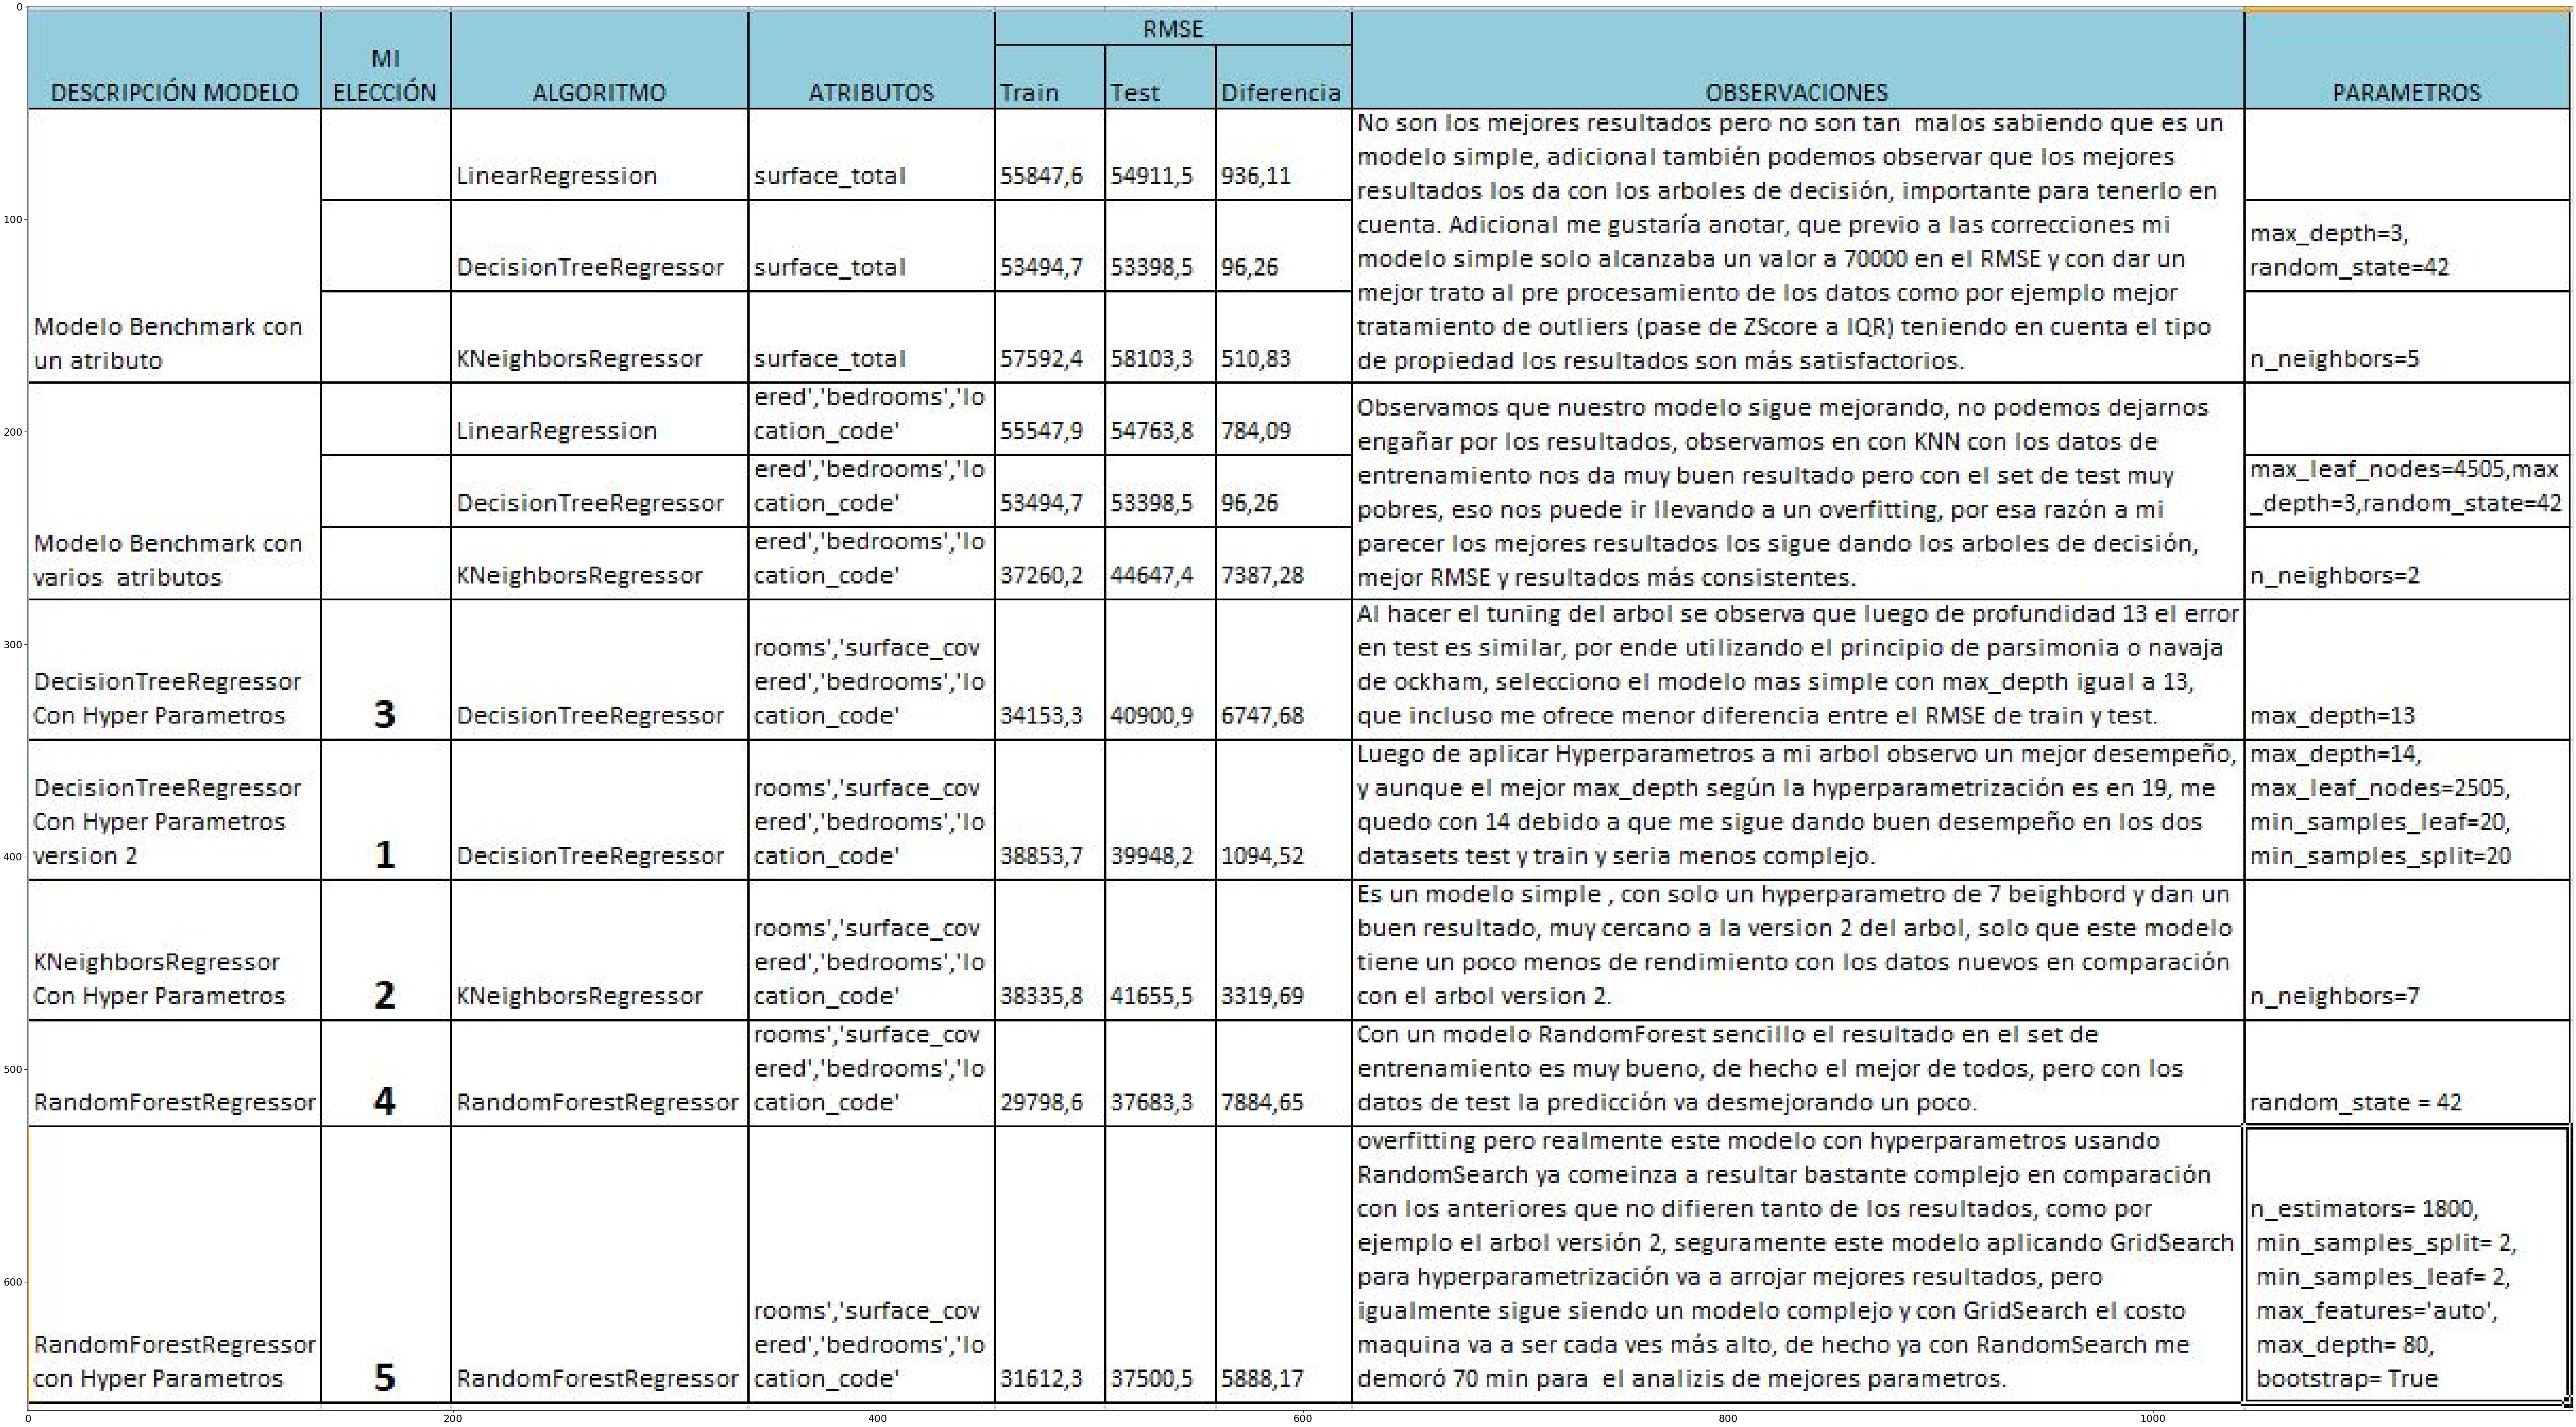

In [127]:
import base64
import matplotlib.image as mpimg
from PIL import Image
import io

plt.figure(figsize=(100,70))

image = base64.b64decode(str(stringImage))       
img = Image.open(io.BytesIO(image))

plt.imshow(img)